
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, adjust lgbm params; 'lambda_l2':3,
# Version = "v59" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v60" # inference used v53, adjust lgbm params; 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, adjust lgbm params; 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)
# Version = "v68" # inference used v67, np.clip
# Version = "v69" # inference used v67, if _score > 0.02: np.clip
# Version = "v70" # inference used v67, adjust prediction
# Version = "v71" # inference used v67, (Threshold+0.03) >= 0.96
# Version = "v72" # inference used v67, remove "if (p_label_rate*1.5) < target_rate" from the Adj_threshold func
# Version = "v73" # inference used v67, exclusive_cols→Under_Sampling func
# Version = "v74" # inference used v67, feature engining for unpredictable_cols(create_features func 30)
# Version = "v75" # inference used v67, avoid overfit for unpredictable_cols
# Version = "v76" # inference used v67, adjust lgm params; 'feature_fraction':0.1, 'lambda_l2': 200,
# Version = "v77" # inference used v67, Add pca to create_features func 
# Version = "v78" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.05,'subsample': 0.7,'reg_lambda': 100,
# Version = "v79" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.04,　'subsample': 0.7,'reg_lambda': 200,
# Version = "v80" # inference used v67, lgm params used v78, N_FOLD = 5
# Version = "v81" # inference used v67, lgm params used v78, N_FOLD = 5&Early_stopping_rounds=29, unpredictable_cols→ N_FOLD = 3 & Early_stopping_rounds=39
# Version = "v82" # Select, DEBUG = True, 'feature_fraction':0.007, select_importance_cols(num=300),
# Version = "v83" # inference used v67, lgm params used　v79, odds_gene_df["Log"] < 1.0→0.0
# Version = "v84" # Select, based on v83, DEBUG = False, 'feature_fraction':0.007, select_importance_cols(num=300),
# Version = "v85" # inference used v82, based on v83,
# Version = "v86" # inference used v82, based on v85, unpredictable_cols=()
# Version = "v88" # inference used v82, based on v85,unpredictable_cols based on v87
# Version = "v89" # inference used v67&v82, based on v85, unpredictable_cols=()
# Version = "v90" # inference used v67&v82, based on v85, unpredictable_cols=(), if _score > 0.02:unpredictable.append(target_col)
# Version = "v91" # inference used v67&v82, based on v85, unpredictable_cols based on v89, 'colsample_bytree': 0.05,

Version = "v92" # inference used v67&v82, based on v85, unpredictable_cols based on v90, 'colsample_bytree': 0.04,

In [2]:
#DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3rd November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v67_v82.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor acat_inhibitor  \
0                       d_g-493                 d_g-21    cut_d_g-508   
1                         g-648                d_g-401       df_g-420   
2                         g-643          d_g_max_min_p    cut_d_g-152   
3                         g-498                d_g-639        df_g-22   
4                    cut_d_c-31                  g-497       df_g-564   
..                          ...                    ...            ...   
495                         NaN                    NaN            NaN   
496                         NaN                    NaN            NaN   
497                         NaN                    NaN            NaN   
498                         NaN                    NaN            NaN   
499                         NaN                    NaN            NaN   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                     cut_df_g-122                       cut_d_g-369   
1                      cut_d_g-297                       cut_d_g-247   
2                            g-144                      cut_df_g-310   
3                          df_g-27                          df_c_min   
4                      cut_d_g-525                          df_g-387   
..                             ...                               ...   
495                       df_g-733                       cut_d_g-715   
496                   cut_df_g-724                       cut_d_g-366   
497                          g-576                             g-412   
498                          g-575                           d_g-746   
499                     cut_d_c-58                       cut_d_g-332   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                 cut_d_g-23   
1                      cut_d_g-208                cut_d_g-142   
2                          df_g-91                 cut_d_g-69   
3                      cut_d_g-132                     d_c-84   
4                      cut_d_g-348                   df_g-386   
..                             ...                        ...   
495                            NaN                        NaN   
496                            NaN                        NaN   
497                            NaN                        NaN   
498                            NaN                        NaN   
499                            NaN                        NaN   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-163                    d_g-639   
2                         d_g-310                      g-344   
3                     cut_d_g-430                      g-138   
4                      cut_d_g-85                      g-705   
..                            ...                        ...   
495                           NaN                        NaN   
496                           NaN                        NaN   
497                           NaN                        NaN   
498                           NaN                        NaN   
499                           NaN                        NaN   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                      df_c_min  ...                                 g-226   
1                   cut_d_g-614  ...                               d_g-283   
2                        df_g-7  ...                           cut_d_g-225   
3                  cut_df_g-186  ...                                 g-689   
4                      df_g-387  ...                           cut_d_g-602   
..                          ...  ...                                   ...   
495                 cut_d_g-747  ...                                   NaN   
496                cut_df_g-732  ...                                   NaN   
497       

In [13]:
# cooccurring & mutually exclusive targets
log_odds = pd.read_csv("../input/moa-annot-data/20201121_train_targets_scored.matrix_odds_results.csv")
log_odds

Gene1                                  Gene2  \
0      X5-alpha_reductase_inhibitor           X5-alpha_reductase_inhibitor   
1      X5-alpha_reductase_inhibitor                X11-beta-hsd1_inhibitor   
2      X5-alpha_reductase_inhibitor                         acat_inhibitor   
3      X5-alpha_reductase_inhibitor         acetylcholine_receptor_agonist   
4      X5-alpha_reductase_inhibitor      acetylcholine_receptor_antagonist   
...                             ...                                    ...   
42431                 wnt_inhibitor  ubiquitin_specific_protease_inhibitor   
42432                 wnt_inhibitor                        vegfr_inhibitor   
42433                 wnt_inhibitor                              vitamin_b   
42434                 wnt_inhibitor             vitamin_d_receptor_agonist   
42435                 wnt_inhibitor                          wnt_inhibitor   

            odds       Log        SD  Lower95CL    Upper95CL   p.value  \
0       1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   
1      33.843243  3.521739  1.453012   1.961852   583.818219  0.015361   
2      25.548105  3.240563  1.448449   1.494296   436.798171  0.025269   
3       3.260817  1.181978  1.436119   0.195389    54.419345  0.410487   
4       2.049799  0.717742  1.435446   0.122986    34.163726  0.617066   
...          ...       ...       ...        ...          ...       ...   
42431  55.264817  4.012136  1.478742   3.046078  1002.666332  0.006664   
42432   2.091101  0.737691  1.427830   0.127352    34.335710  0.605399   
42433  13.543149  2.605881  1.438947   0.807023   227.275980  0.070146   
42434   9.080515  2.206131  1.434625   0.545702   151.100368  0.124104   
42435   1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   

        q.value  
0      0.522100  
1      0.057533  
2      0.073394  
3      0.311654  
4      0.396877  
...         ...  
42431  0.040493  
42432  0.392840  
42433  0.116678  
42434  0.159335  
42435  0.522100  

[42436 rows x 9 columns]

In [14]:
exclusive_cols = (
    "acetylcholine_receptor_agonist", 
    "acetylcholine_receptor_antagonist", 
    "adrenergic_receptor_agonist",
    "adrenergic_receptor_antagonist",
    "bacterial_cell_wall_synthesis_inhibitor",
    "bacterial_dna_inhibitor",
    "calcium_channel_blocker",
    "cdk_inhibitor",
    "dna_inhibitor",
    "dopamine_receptor_agonist",
    "dopamine_receptor_antagonist",
    "egfr_inhibitor",
    "estrogen_receptor_agonist",
    "flt3_inhibitor",
    "gaba_receptor_antagonist",
    "glucocorticoid_receptor_agonist",
    "glutamate_receptor_antagonist",
    "histamine_receptor_antagonist",
    "hmgcr_inhibitor",
    "kit_inhibitor",
    "mtor_inhibitor",
    "nfkb_inhibitor",
    "pdgfr_inhibitor",
    "phosphodiesterase_inhibitor",
    "pi3k_inhibitor",
    "proteasome_inhibitor",
    "serotonin_receptor_agonist",
    "serotonin_receptor_antagonist",
    "sodium_channel_inhibitor",
    "tubulin_inhibitor",
    "vegfr_inhibitor"
)
       

In [15]:
odds_gene2_df = pd.DataFrame()

for col in exclusive_cols:
    odds_gene_df = log_odds[log_odds["Gene1"]==col]
    if col == "nfkb_inhibitor":
        p_val = 0.1
    else:
        p_val = 0.3
    odds_gene2 = odds_gene_df[(odds_gene_df["p.value"] <= p_val) & (odds_gene_df["Log"] < 0.0)]["Gene2"]

    odds_gene2 = pd.DataFrame(odds_gene2)
    odds_gene2 = odds_gene2.rename(columns={"Gene2": col}).reset_index(drop=True)
    odds_gene2_df = pd.concat([odds_gene2_df, odds_gene2], axis=1)


odds_gene2_df

acetylcholine_receptor_agonist  \
0   acetylcholine_receptor_antagonist   
1         adrenergic_receptor_agonist   
2      adrenergic_receptor_antagonist   
3             calcium_channel_blocker   
4                       cdk_inhibitor   
..                                ...   
62                                NaN   
63                                NaN   
64                                NaN   
65                                NaN   
66                                NaN   

          acetylcholine_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1               adrenergic_receptor_agonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
62                                      NaN   
63                                      NaN   
64                                      NaN   
65                                      NaN   
66                                      NaN   

                adrenergic_receptor_agonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
62                                      NaN   
63                                      NaN   
64                                      NaN   
65                                      NaN   
66                                      NaN   

             adrenergic_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
62                                      NaN   
63                                      NaN   
64                                      NaN   
65                                      NaN   
66                                      NaN   

   bacterial_cell_wall_synthesis_inhibitor        bacterial_dna_inhibitor  \
0        acetylcholine_receptor_antagonist       cyclooxygenase_inhibitor   
1              adrenergic_receptor_agonist   dopamine_receptor_antagonist   
2           adrenergic_receptor_antagonist                 nfkb_inhibitor   
3                  calcium_channel_blocker           proteasome_inhibitor   
4                            cdk_inhibitor  serotonin_receptor_antagonist   
..                                     ...                            ...   
62                                     NaN                            NaN   
63                                     NaN                            NaN   
64                                     NaN                            NaN   
65                                     NaN                            NaN   
66                                     NaN                            NaN   

                    calcium_channel_blocker  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   
62                                      NaN   
63                                      NaN   
64                                      NaN   
65                                      NaN   
66                                      NaN   

                              cdk_inhibitor  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   


In [16]:
unpredictable_cols = (
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'acetylcholinesterase_inhibitor',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'androgen_receptor_antagonist',
 'anesthetic_-_local',
 'anti-inflammatory',
 'antioxidant',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_50s_ribosomal_subunit_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'bromodomain_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hcv_inhibitor',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hiv_inhibitor',
 'hmgcr_inhibitor',
 'hsp_inhibitor',
 'immunosuppressant',
 'jak_inhibitor',
 'kit_inhibitor',
 'membrane_integrity_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'opioid_receptor_agonist',
 'opioid_receptor_antagonist',
 'pdgfr_inhibitor',
 'phosphodiesterase_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_antagonist',
 'ppar_receptor_agonist',
 'progesterone_receptor_agonist',
 'prostanoid_receptor_antagonist',
 'proteasome_inhibitor',
 'protein_synthesis_inhibitor',
 'raf_inhibitor',
 'serotonin_receptor_agonist',
 'serotonin_receptor_antagonist',
 'sodium_channel_inhibitor',
 'tachykinin_antagonist',
 'topoisomerase_inhibitor',
 'tubulin_inhibitor',
 'tyrosine_kinase_inhibitor',
 'vegfr_inhibitor'
)

# Training Utils

In [17]:
#===========================================================
# training & inference model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Under_Sampling(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
        
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds_, train_y_, oof_train_ = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds_) / len(y_preds_), train_y_, oof_train_

In [18]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [19]:
# Under sampling func 

def Under_Sampling(input_df, target_col, target):
    
    _df = input_df.copy()
    
    # under sampling with mutually exclusive columns
    if target_col in exclusive_cols:
        print(f"mutually exclusive columns: {target_col}")
        target_exclusive = odds_gene2_df[target_col].dropna()
        target_ex = train_targets_scored[list(target_exclusive)]
        
        # 1 or more, replace it with 1.
        target_ex = target_ex.sum(axis=1)
        target_ex = target_ex.where(target_ex < 1, 1)
        
        _df = _df[target_ex == 1].copy().reset_index(drop=True)
        _df = _df.drop("sig_id", axis=1)
    
    # under sampling with drug anotation(New data file)
    else:
        sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
        # Remove sig_id wih target 
        del_idx = train[target >= 1].sig_id.unique()
        select_idx = [i for i in sig_id_lst if i not in del_idx]
        
        # Select negative target wiht multi_Stratification
        _df = _df.set_index('sig_id')
        _df = _df.loc[select_idx, :]
        _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    print(f"selected negative label: {len(_df)}")
    
    return _df

In [20]:
# lgbm with training & inference model


def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        if target_col in unpredictable_cols:
            
            params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.01, 
                'lambda_l1': 0.1,
                'lambda_l2': 300,
                'bagging_fraction': 0.7,
                'bagging_freq': 1,
            }
            
        else:
             params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.4, 
                'lambda_l1': 0.1,
                'lambda_l2': 3,
                'bagging_fraction': 0.8,
                'bagging_freq': 1,
            }
            
            
            
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
     
    return y_preds, _train_y, oof_train 

In [21]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df, target_col)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        pr_score = average_precision_score(y_preds[:, 0], y_preds[:, 1])
         
        logger.info(f"{iter_} / {max_iter}, AUC score:{auc_score:.3f}, PR-AUC:{pr_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.79), min(Threshold*upper, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {(len(y_prob)*target_rate):.1f}, Threshold: {Threshold:.7f}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # set the threshold based on train labels distribution (target_rate)
        if p_label_rate > target_rate:
            p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, target_rate, y_prob, lower, upper)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [22]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_, target_col):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
        
        if target_col in unpredictable_cols:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.1,
                'objective': "binary",
                'colsample_bytree': 0.01,
                'subsample': 0.7,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 200,
                'random_state': SEED,
                'n_jobs': 4
            }
            
        else:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.03,
                'objective': "binary",
                'colsample_bytree': 0.4,
                'subsample': 0.8,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 0.1,
                'random_state': SEED,
                'n_jobs': 4
            }
            
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=1000,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    return _y_preds, _y_prob, feature_importance_df_
    

In [23]:
# select important features with pseudo_labeling

def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col].dropna()
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    X_, X_test_ = create_features(_X, _X_test)
    
    logger.info(f'N_features:{len(X_.columns)}')

    return X_, _y, X_test_

In [24]:
# create features with pseudo_labeling

def create_features(df_trt, df_tst):
    
    from sklearn.decomposition import PCA
    
    df_trt['WHERE'], df_tst['WHERE'] = 'trt', 'tst'
    _df = df_trt.append(df_tst)
    _df = _df.reset_index(drop=True)
    _Splitdata = _df["WHERE"]
    _df = _df.drop('WHERE', axis=1)
    
    pca_transformer = PCA(n_components=0.9, whiten=True, random_state=SEED)
    _pca = pca_transformer.fit_transform(_df)
    _pca_df = pd.DataFrame(_pca)
    pca_cols = [f"pca_{i+1}" for i in range(_pca_df.shape[1])]
    _pca_df.columns = pca_cols
    
    _df = pd.concat([_df, _pca_df], axis=1)
    
    _df['WHERE'] = _Splitdata
    trt_ = _df[_df['WHERE']=="trt"].drop('WHERE', axis=1).reset_index(drop=True)
    tst_ = _df[_df['WHERE']=="tst"].drop('WHERE', axis=1).reset_index(drop=True)
    
    return trt_, tst_

In [25]:
# convert labels with pseudo_labeling

def convert_label(input_df, conf_0, conf_1, threshold=0.5):
    
    _df = input_df.copy()
    Probability = _df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = _df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [26]:
# adj threshold with pseudo_labeling

def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold_, target_rate, y_prob, lower_, upper_):
    
    check = len(y_prob)*target_rate
        
    for i in range(10):
        if (sum(p_label) <= check*(3.5-len(str(int(check))))) or (Threshold_ >= 0.96): break
            
        Threshold_ += 0.03
        high_conf_0, high_conf_1 = min(Threshold_*lower_, 0.79), min(Threshold_*upper_, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold_)
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold_:.7f}")
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold_

In [27]:
# check importance features with pseudo_labeling

def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [28]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [29]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [30]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [31]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [32]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [33]:
# clipping for control data

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [34]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [35]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [36]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [37]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [38]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [39]:
#std_df = data.iloc[:, 4:].copy()

In [40]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [41]:
std_df = data.iloc[:, 4:].copy()

In [42]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [43]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [44]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [45]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [46]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [47]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [48]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [49]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [50]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [51]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

In [52]:
categorical_cols = []

def RUN():
    
    scores = []
    unpredictable = []
    
    for target_col in tqdm(train_targets_scored.columns[1:]):
    #for target_col in ('acetylcholine_receptor_agonist','acetylcholine_receptor_antagonist',):
        
        _score = 0.0
        
        _preds, _train_y, _oof_train = run_lgbm(target_col)
        sub[target_col] = _preds
        
        _score = log_loss(_train_y, _oof_train)
        scores.append(_score)
        
        logger.info(f"=========================================================================================")
        logger.info(f"{target_col} logloss: {_score}")
        
        if _score > 0.02:
            unpredictable.append(target_col)
            logger.info(f"{target_col} is unpredictable(><)!")
        
        
        logger.info(f"=========================================================================================")
        logger.info(f"=========================================================================================")
        
    logger.info(f"=========================================================================================")
    
    sub.to_csv('submission.csv', index=False)
    logger.info(f"CV:{np.mean(scores)}")
        
    return unpredictable
    

5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000293623	valid_1's binary_logloss: 0.000970191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000292667	valid_1's binary_logloss: 0.00203699
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000295845	valid_1's binary_logloss: 0.000753107
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000292069	valid_1's binary_logloss: 0.00513589


y_Threshold: 0.0015064, Threshold: 0.0055061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, Expected: 2.8, Threshold: 0.0055061, conf_0:0.00385, conf_1:0.00716
Num_p_label: 5.0, Expected: 2.8, Adj_threshold_1: 0.0355061
threshold: 0.0355061, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000280041	valid_1's binary_logloss: 0.0013645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000289957	valid_1's binary_logloss: 0.00137352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000295187	valid_1's binary_logloss: 0.000768011
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268294, Threshold: 0.0355061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00071
Num_p_label: 17.0, Expected: 2.8, Threshold: 0.0355061, conf_0:0.02840, conf_1:0.04261
Num_p_label: 9.0, Expected: 2.8, Adj_threshold_1: 0.0655061
Num_p_label: 6.0, Expected: 2.8, Adj_threshold_2: 0.0955061


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000290698	valid_1's binary_logloss: 0.00443832


threshold: 0.0955061, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000280041	valid_1's binary_logloss: 0.0013645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000289957	valid_1's binary_logloss: 0.00137352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000295187	valid_1's binary_logloss: 0.000768011
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268294, Threshold: 0.0955061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00071
Num_p_label: 6.0, Expected: 2.8, Threshold: 0.0955061, conf_0:0.08596, conf_1:0.10506
threshold: 0.0955061, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000290698	valid_1's binary_logloss: 0.00443832


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


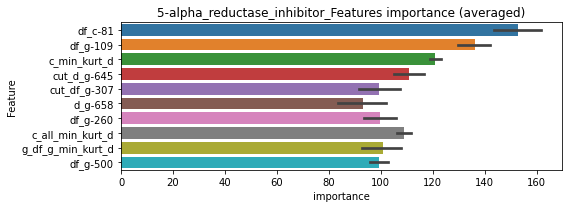

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000293487	valid_1's binary_logloss: 0.001093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000285339	valid_1's binary_logloss: 0.000858941


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000289784	valid_1's binary_logloss: 0.00102207
Training until validation scores don't improve for 30 rounds


5-alpha_reductase_inhibitor logloss: 0.0013725818817934006


Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000293545	valid_1's binary_logloss: 0.00251509


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000295372	valid_1's binary_logloss: 0.000831571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000289712	valid_1's binary_logloss: 0.00103864
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000304841	valid_1's binary_logloss: 0.00218194
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013890, Threshold: 0.0040182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0040182, conf_0:0.00281, conf_1:0.00522
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0340182


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000302041	valid_1's binary_logloss: 0.000830726


threshold: 0.0340182, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287835	valid_1's binary_logloss: 0.000885126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00028748	valid_1's binary_logloss: 0.00124907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000290913	valid_1's binary_logloss: 0.00234496
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0331658, Threshold: 0.0340182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0340182, conf_0:0.02721, conf_1:0.04082


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000289206	valid_1's binary_logloss: 0.000860384


threshold: 0.0340182, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287835	valid_1's binary_logloss: 0.000885126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00028748	valid_1's binary_logloss: 0.00124907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000290913	valid_1's binary_logloss: 0.00234496
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0331658, Threshold: 0.0340182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0340182, conf_0:0.03062, conf_1:0.03742


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000289206	valid_1's binary_logloss: 0.000860384


threshold: 0.0340182, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


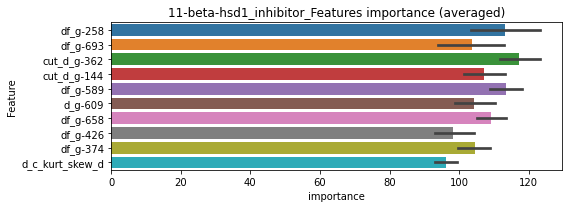

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284511	valid_1's binary_logloss: 0.000810789
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000284522	valid_1's binary_logloss: 0.00081077


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000290508	valid_1's binary_logloss: 0.000924504


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000298043	valid_1's binary_logloss: 0.00124361


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000291321	valid_1's binary_logloss: 0.000776675


11-beta-hsd1_inhibitor logloss: 0.0009389364299642631
acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000336517	valid_1's binary_logloss: 0.00491599
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000343889	valid_1's binary_logloss: 0.0039385
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357722	valid_1's binary_logloss: 0.00231797
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000348473	valid_1's binary_logloss: 0.00688178


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018501, Threshold: 0.0046275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0046275, conf_0:0.00324, conf_1:0.00602
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_1: 0.0346275
threshold: 0.0346275, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000331762	valid_1's binary_logloss: 0.00544989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000338596	valid_1's binary_logloss: 0.0036296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000381795	valid_1's binary_logloss: 0.00289043
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158005, Threshold: 0.0346275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000336819	valid_1's binary_logloss: 0.00643042


p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0346275, conf_0:0.02770, conf_1:0.04155
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0646275
threshold: 0.0646275, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000331762	valid_1's binary_logloss: 0.00544989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000338596	valid_1's binary_logloss: 0.0036296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000381795	valid_1's binary_logloss: 0.00289043
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158005, Threshold: 0.0646275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0646275, conf_0:0.05816, conf_1:0.07109


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000336819	valid_1's binary_logloss: 0.00643042


threshold: 0.0646275, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


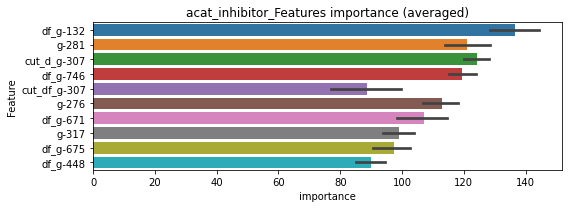

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000329791	valid_1's binary_logloss: 0.00349467


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951


Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000360797	valid_1's binary_logloss: 0.00270942


================================= fold 3/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000354877	valid_1's binary_logloss: 0.00270428


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000340395	valid_1's binary_logloss: 0.00452011


acat_inhibitor logloss: 0.0033571775050696235


mutually exclusive columns: acetylcholine_receptor_agonist


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 6396
target_rate: 0.0079785 → Adj_target_rate: 0.0072634


selected negative label: 6396


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0636611	valid_1's binary_logloss: 0.121852
Early stopping, best iteration is:
[1342]	training's binary_logloss: 0.0514089	valid_1's binary_logloss: 0.119869
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0673245	valid_1's binary_logloss: 0.104287
Early stopping, best iteration is:
[1844]	training's binary_logloss: 0.0415571	valid_1's binary_logloss: 0.0975899
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0708412	valid_1's binary_logloss: 0.0881036
[2000]	training's binary_logloss: 0.040595	valid_1's binary_logloss: 0.0801222
Early stopping, best iteration is:
[2129]	training's binary_logloss: 0.0381548	valid_1's binary_logloss: 0.0796615
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0636621	valid_1's binary_logloss: 0.12437
Early stopping, b

1 / 3, AUC score:0.969, PR-AUC:0.942
y_Threshold: 0.0534183, Threshold: 0.0787052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 508 → Positive_corect_labels: 1153/7167
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, Expected: 31.8, Threshold: 0.0787052, conf_0:0.05509, conf_1:0.10232
threshold: 0.0787052, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1153.0/7167, y_label_rate: 0.1608762
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0336688	valid_1's binary_logloss: 0.0448707
[2000]	training's binary_logloss: 0.0184502	valid_1's binary_logloss: 0.0374146
[3000]	training's binary_logloss: 0.0121579	valid_1's binary_logloss: 0.0347227
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.00995315	valid_1's binary_logloss: 0.0338983
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0326134	valid_1's binary_logloss: 0.0532724
[2000]	training's binary_logloss: 0.0178629	valid_1's binary_logloss: 0.0469951
Early stopping, best iteration is:
[2033]	training's binary_logloss: 0.0175673	valid_1's binary_logloss: 0.0468112
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0343644	valid_1's binary_logloss: 0.0460634
[2000]	training's binary_logloss: 0.018926	valid_1's binary_logloss: 0.0383356
[3000]	training's binary_lo

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0436181, Threshold: 0.0787052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 1108.0/7077
p_label_rate: 0.0042692 Vs.target_rate: 0.00798
Num_p_label: 17.0, Expected: 31.8, Threshold: 0.0787052, conf_0:0.06296, conf_1:0.09445
threshold: 0.0787052, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 1108.0/7077, y_label_rate: 0.1565635
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0192239	valid_1's binary_logloss: 0.0243498
[2000]	training's binary_logloss: 0.0102551	valid_1's binary_logloss: 0.0167146
[3000]	training's binary_logloss: 0.0069496	valid_1's binary_logloss: 0.0143473
[4000]	training's binary_logloss: 0.00520029	valid_1's binary_logloss: 0.0131145
[5000]	training's binary_logloss: 0.00414734	valid_1's binary_logloss: 0.0123315
[6000]	training's binary_logloss: 0.00342453	valid_1's binary_logloss: 0.0118488
Early stopping, best iteration is:
[6038]	training's binary_logloss: 0.00340292	valid_1's binary_logloss: 0.0118393
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0188466	valid_1's binary_logloss: 0.0249473
[2000]	training's binary_logloss: 0.0100533	valid_1's binary_logloss: 0.0176809
[3000]	training's binary_logloss: 0.00686707	valid_1's binary_logloss: 0.0154019
[4000]	training's binary_logloss: 0.00

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0456856, Threshold: 0.0787052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 1095.0/7051
p_label_rate: 0.0070316 Vs.target_rate: 0.00798
Num_p_label: 28.0, Expected: 31.8, Threshold: 0.0787052, conf_0:0.07083, conf_1:0.08658
threshold: 0.0787052, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 1095.0/7051, y_label_rate: 0.1552971


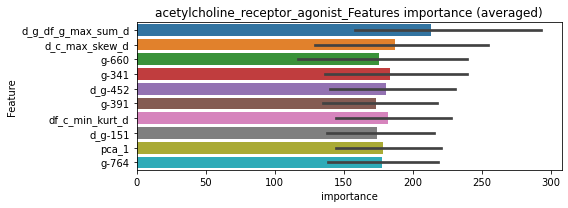

len(train_index) : 5288
len(valid_index) : 1763
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0209005	valid_1's binary_logloss: 0.0263639
[2000]	training's binary_logloss: 0.0102791	valid_1's binary_logloss: 0.0150622
[3000]	training's binary_logloss: 0.00689699	valid_1's binary_logloss: 0.0114154
[4000]	training's binary_logloss: 0.00522066	valid_1's binary_logloss: 0.00965551
[5000]	training's binary_logloss: 0.00423241	valid_1's binary_logloss: 0.00861454
[6000]	training's binary_logloss: 0.00355966	valid_1's binary_logloss: 0.00787479
[7000]	training's binary_logloss: 0.00306678	valid_1's binary_logloss: 0.00737102
[8000]	training's binary_logloss: 0.00270889	valid_1's binary_logloss: 0.00696307
[9000]	training's binary_logloss: 0.00242295	valid_1's binary_logloss: 0.00665442
[10000]	training's binary_logloss: 0.00220044	valid_1's binary_logloss: 0.00643695
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00220044	valid_1's binary_logloss: 0.0

len(train_index) : 5288
len(valid_index) : 1763
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0205606	valid_1's binary_logloss: 0.0257799
[2000]	training's binary_logloss: 0.0101326	valid_1's binary_logloss: 0.0147869
[3000]	training's binary_logloss: 0.00683586	valid_1's binary_logloss: 0.0112419
[4000]	training's binary_logloss: 0.0051741	valid_1's binary_logloss: 0.00948256
[5000]	training's binary_logloss: 0.00419319	valid_1's binary_logloss: 0.00847849
[6000]	training's binary_logloss: 0.00352808	valid_1's binary_logloss: 0.00777887
[7000]	training's binary_logloss: 0.00304027	valid_1's binary_logloss: 0.0072929
[8000]	training's binary_logloss: 0.00268416	valid_1's binary_logloss: 0.00688871
[9000]	training's binary_logloss: 0.0024041	valid_1's binary_logloss: 0.00657713
[10000]	training's binary_logloss: 0.00218202	valid_1's binary_logloss: 0.00636522
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00218202	valid_1's binary_logloss: 0.0063

len(train_index) : 5288
len(valid_index) : 1763
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.021108	valid_1's binary_logloss: 0.0260182
[2000]	training's binary_logloss: 0.0104819	valid_1's binary_logloss: 0.0147559
[3000]	training's binary_logloss: 0.00703706	valid_1's binary_logloss: 0.0111197
[4000]	training's binary_logloss: 0.00532719	valid_1's binary_logloss: 0.00931923
[5000]	training's binary_logloss: 0.00432463	valid_1's binary_logloss: 0.00828709
[6000]	training's binary_logloss: 0.00364176	valid_1's binary_logloss: 0.00756241
[7000]	training's binary_logloss: 0.00314472	valid_1's binary_logloss: 0.00707523
[8000]	training's binary_logloss: 0.00277523	valid_1's binary_logloss: 0.00666772
[9000]	training's binary_logloss: 0.00248969	valid_1's binary_logloss: 0.00637269
[10000]	training's binary_logloss: 0.00226012	valid_1's binary_logloss: 0.00614819
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00226012	valid_1's binary_logloss: 0.00

len(train_index) : 5289
len(valid_index) : 1762
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0205358	valid_1's binary_logloss: 0.0252208
[2000]	training's binary_logloss: 0.0101842	valid_1's binary_logloss: 0.0140385
[3000]	training's binary_logloss: 0.00685777	valid_1's binary_logloss: 0.0103481
[4000]	training's binary_logloss: 0.00518362	valid_1's binary_logloss: 0.00853452
[5000]	training's binary_logloss: 0.00421075	valid_1's binary_logloss: 0.00751322
[6000]	training's binary_logloss: 0.00354393	valid_1's binary_logloss: 0.00675528
[7000]	training's binary_logloss: 0.00306316	valid_1's binary_logloss: 0.00626688
[8000]	training's binary_logloss: 0.00270453	valid_1's binary_logloss: 0.00587178
[9000]	training's binary_logloss: 0.00242112	valid_1's binary_logloss: 0.00556485
[10000]	training's binary_logloss: 0.0021972	valid_1's binary_logloss: 0.00536371
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0021972	valid_1's binary_logloss: 0.005

acetylcholine_receptor_agonist logloss: 0.006078619802325056


mutually exclusive columns: acetylcholine_receptor_antagonist


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 7534
target_rate: 0.0126396 → Adj_target_rate: 0.0107394


selected negative label: 7534


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0809694	valid_1's binary_logloss: 0.14089
Early stopping, best iteration is:
[1304]	training's binary_logloss: 0.0671024	valid_1's binary_logloss: 0.139185
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.082184	valid_1's binary_logloss: 0.137433
Early stopping, best iteration is:
[1323]	training's binary_logloss: 0.0672532	valid_1's binary_logloss: 0.135395
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.081168	valid_1's binary_logloss: 0.147139
Early stopping, best iteration is:
[1435]	training's binary_logloss: 0.0621669	valid_1's binary_logloss: 0.144226
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0815606	valid_1's binary_logloss: 0.13896
Early stopping, best iteration is:
[1305]	training's binary_logloss: 0.0671539	valid_1's binary_loglos

1 / 3, AUC score:0.939, PR-AUC:0.901
y_Threshold: 0.0664436, Threshold: 0.0917206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 748 → Positive_corect_labels: 1283/8292
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, Expected: 50.3, Threshold: 0.0917206, conf_0:0.06420, conf_1:0.11924
threshold: 0.0917206, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1283.0/8292, y_label_rate: 0.1547274
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0321329	valid_1's binary_logloss: 0.0637753
Early stopping, best iteration is:
[1724]	training's binary_logloss: 0.0203026	valid_1's binary_logloss: 0.0592471
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0338993	valid_1's binary_logloss: 0.0539537
[2000]	training's binary_logloss: 0.0184755	valid_1's binary_logloss: 0.0475398
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0156347	valid_1's binary_logloss: 0.0465963
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0356982	valid_1's binary_logloss: 0.0455294
[2000]	training's binary_logloss: 0.0194321	valid_1's binary_logloss: 0.0373244
Early stopping, best iteration is:
[2812]	training's binary_logloss: 0.013583	valid_1's binary_logloss: 0.0347757
Training until validation scores don't improve for 30 rounds
[1000]	train

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0356915, Threshold: 0.0917206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 1231.0/8188
p_label_rate: 0.0000000 Vs.target_rate: 0.01264
Num_p_label: 0.0, Expected: 50.3, Threshold: 0.0917206, conf_0:0.07338, conf_1:0.11006
threshold: 0.0917206, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 1231.0/8188, y_label_rate: 0.1503420
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0199126	valid_1's binary_logloss: 0.0292091
[2000]	training's binary_logloss: 0.0108114	valid_1's binary_logloss: 0.0225081
[3000]	training's binary_logloss: 0.00722254	valid_1's binary_logloss: 0.0202902
Early stopping, best iteration is:
[3567]	training's binary_logloss: 0.00602031	valid_1's binary_logloss: 0.0195841
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0191555	valid_1's binary_logloss: 0.0296742
[2000]	training's binary_logloss: 0.0104033	valid_1's binary_logloss: 0.0232819
[3000]	training's binary_logloss: 0.00691603	valid_1's binary_logloss: 0.0212745
Early stopping, best iteration is:
[3619]	training's binary_logloss: 0.00564739	valid_1's binary_logloss: 0.0206772
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0206695	valid_1's binary_logloss: 0.0262359
[2000]	training's binar

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0185409, Threshold: 0.0917206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 1218.0/8162
p_label_rate: 0.0000000 Vs.target_rate: 0.01264
Num_p_label: 0.0, Expected: 50.3, Threshold: 0.0917206, conf_0:0.08255, conf_1:0.10089
threshold: 0.0917206, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 1218.0/8162, y_label_rate: 0.1492281


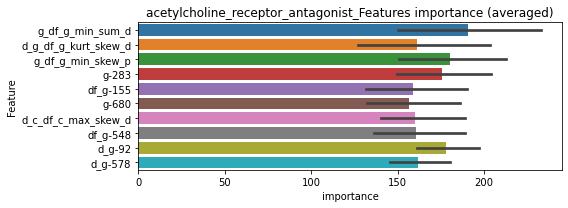

len(train_index) : 6121
len(valid_index) : 2041
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0217937	valid_1's binary_logloss: 0.0281678
[2000]	training's binary_logloss: 0.0114109	valid_1's binary_logloss: 0.0176676
[3000]	training's binary_logloss: 0.00787596	valid_1's binary_logloss: 0.0145326
[4000]	training's binary_logloss: 0.00601243	valid_1's binary_logloss: 0.0129646
[5000]	training's binary_logloss: 0.00486516	valid_1's binary_logloss: 0.012092
[6000]	training's binary_logloss: 0.0040577	valid_1's binary_logloss: 0.0114333
[7000]	training's binary_logloss: 0.00347821	valid_1's binary_logloss: 0.0110327
[8000]	training's binary_logloss: 0.00305044	valid_1's binary_logloss: 0.0107449
[9000]	training's binary_logloss: 0.00271535	valid_1's binary_logloss: 0.0105142
Early stopping, best iteration is:
[9555]	training's binary_logloss: 0.00255781	valid_1's binary_logloss: 0.0104141


len(train_index) : 6121
len(valid_index) : 2041
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0212171	valid_1's binary_logloss: 0.0307088
[2000]	training's binary_logloss: 0.0110559	valid_1's binary_logloss: 0.0204901
[3000]	training's binary_logloss: 0.00767625	valid_1's binary_logloss: 0.0173473
[4000]	training's binary_logloss: 0.00581848	valid_1's binary_logloss: 0.0159294
[5000]	training's binary_logloss: 0.00471902	valid_1's binary_logloss: 0.0151314
[6000]	training's binary_logloss: 0.00392462	valid_1's binary_logloss: 0.0145576
[7000]	training's binary_logloss: 0.00336319	valid_1's binary_logloss: 0.0142268
[8000]	training's binary_logloss: 0.00295422	valid_1's binary_logloss: 0.0139354
Early stopping, best iteration is:
[8073]	training's binary_logloss: 0.00292792	valid_1's binary_logloss: 0.0139157


len(train_index) : 6122
len(valid_index) : 2040
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0226201	valid_1's binary_logloss: 0.0253674
[2000]	training's binary_logloss: 0.0120173	valid_1's binary_logloss: 0.014977
[3000]	training's binary_logloss: 0.00835257	valid_1's binary_logloss: 0.0117943
[4000]	training's binary_logloss: 0.00637809	valid_1's binary_logloss: 0.0102274
[5000]	training's binary_logloss: 0.00515147	valid_1's binary_logloss: 0.00927834
[6000]	training's binary_logloss: 0.00428905	valid_1's binary_logloss: 0.00860054
[7000]	training's binary_logloss: 0.00366917	valid_1's binary_logloss: 0.00811549
[8000]	training's binary_logloss: 0.00321974	valid_1's binary_logloss: 0.00775625
[9000]	training's binary_logloss: 0.00286237	valid_1's binary_logloss: 0.00750209
[10000]	training's binary_logloss: 0.00257635	valid_1's binary_logloss: 0.00727405
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00257635	valid_1's binary_logloss: 0.007

len(train_index) : 6122
len(valid_index) : 2040
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0219445	valid_1's binary_logloss: 0.0291529
[2000]	training's binary_logloss: 0.0116131	valid_1's binary_logloss: 0.0190934
[3000]	training's binary_logloss: 0.00807759	valid_1's binary_logloss: 0.0159042
[4000]	training's binary_logloss: 0.00617127	valid_1's binary_logloss: 0.0143989
[5000]	training's binary_logloss: 0.00498371	valid_1's binary_logloss: 0.0135786
[6000]	training's binary_logloss: 0.00414664	valid_1's binary_logloss: 0.0129405
[7000]	training's binary_logloss: 0.00355455	valid_1's binary_logloss: 0.0125581
Early stopping, best iteration is:
[7176]	training's binary_logloss: 0.00346851	valid_1's binary_logloss: 0.012504


acetylcholine_receptor_antagonist logloss: 0.011027246815747828
acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0895843	valid_1's binary_logloss: 0.135452
[2000]	training's binary_logloss: 0.0483961	valid_1's binary_logloss: 0.096346
[3000]	training's binary_logloss: 0.0327742	valid_1's binary_logloss: 0.081234
[4000]	training's binary_logloss: 0.0246517	valid_1's binary_logloss: 0.0734136
[5000]	training's binary_logloss: 0.019683	valid_1's binary_logloss: 0.068334
[6000]	training's binary_logloss: 0.0163247	valid_1's binary_logloss: 0.0647327
Early stopping, best iteration is:
[6209]	training's binary_logloss: 0.0157589	valid_1's binary_logloss: 0.0641919
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0906789	valid_1's binary_logloss: 0.132554
[2000]	training's binary_logloss: 0.0489193	valid_1's binary_logloss: 0.0917015
[3000]	training's binary_logloss: 0.0329501	valid_1's binary_logloss: 0.075615
[4000]	training's binary_logloss: 0.0247224	valid_

1 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0636131, Threshold: 0.1131083, pos_neg_ratio: 0.8000000
Remove_noisy_data: 141 → Positive_corect_labels: 650/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.1131083, conf_0:0.07918, conf_1:0.14704
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_1: 0.1431083
threshold: 0.1431083, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3789, y_label_rate: 0.1715492
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0866481	valid_1's binary_logloss: 0.122999
[2000]	training's binary_logloss: 0.0462108	valid_1's binary_logloss: 0.0817968
[3000]	training's binary_logloss: 0.031083	valid_1's binary_logloss: 0.0655741
[4000]	training's binary_logloss: 0.0232075	valid_1's binary_logloss: 0.0575827
[5000]	training's binary_logloss: 0.0185267	valid_1's binary_logloss: 0.0519945
[6000]	training's binary_logloss: 0.0153273	valid_1's binary_logloss: 0.0482243
[7000]	training's binary_logloss: 0.0130856	valid_1's binary_logloss: 0.0454621
Early stopping, best iteration is:
[7720]	training's binary_logloss: 0.0118445	valid_1's binary_logloss: 0.0438302
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0851	valid_1's binary_logloss: 0.134746
[2000]	training's binary_logloss: 0.0454876	valid_1's binary_logloss: 0.0915069
[3000]	training's binary_logloss: 0.0305279	valid

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0989686, Threshold: 0.1431083, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 640.0/3769
p_label_rate: 0.0135610 Vs.target_rate: 0.00307
Num_p_label: 54.0, Expected: 12.2, Threshold: 0.1431083, conf_0:0.11449, conf_1:0.17173
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_1: 0.1731083
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_2: 0.2031083
threshold: 0.2031083, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 640.0/3769, y_label_rate: 0.1698063
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0812785	valid_1's binary_logloss: 0.124602
[2000]	training's binary_logloss: 0.0426887	valid_1's binary_logloss: 0.083193
[3000]	training's binary_logloss: 0.0285456	valid_1's binary_logloss: 0.0667895
[4000]	training's binary_logloss: 0.021441	valid_1's binary_logloss: 0.0583944
[5000]	training's binary_logloss: 0.0171753	valid_1's binary_logloss: 0.0528475
[6000]	training's binary_logloss: 0.0142314	valid_1's binary_logloss: 0.0487756
[7000]	training's binary_logloss: 0.0121891	valid_1's binary_logloss: 0.0460373
[8000]	training's binary_logloss: 0.0106387	valid_1's binary_logloss: 0.0435069
Early stopping, best iteration is:
[8171]	training's binary_logloss: 0.0104227	valid_1's binary_logloss: 0.043131
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0827649	valid_1's binary_logloss: 0.116487
[2000]	training's binary_logloss: 0.0432248	vali

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0995179, Threshold: 0.2031083, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 633.0/3755
p_label_rate: 0.0040181 Vs.target_rate: 0.00307
Num_p_label: 16.0, Expected: 12.2, Threshold: 0.2031083, conf_0:0.18280, conf_1:0.22342
threshold: 0.2031083, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 633.0/3755, y_label_rate: 0.1685752


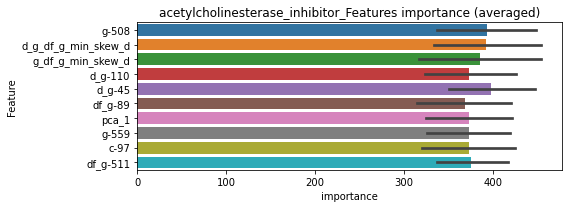

len(train_index) : 2816
len(valid_index) : 939
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.108582	valid_1's binary_logloss: 0.155958
[2000]	training's binary_logloss: 0.0588798	valid_1's binary_logloss: 0.10616
[3000]	training's binary_logloss: 0.039638	valid_1's binary_logloss: 0.0856854
[4000]	training's binary_logloss: 0.0298561	valid_1's binary_logloss: 0.0753225
[5000]	training's binary_logloss: 0.0238093	valid_1's binary_logloss: 0.0686788
Early stopping, best iteration is:
[5378]	training's binary_logloss: 0.0221215	valid_1's binary_logloss: 0.0666421


len(train_index) : 2816
len(valid_index) : 939
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.110773	valid_1's binary_logloss: 0.142582
[2000]	training's binary_logloss: 0.0603736	valid_1's binary_logloss: 0.0926474
[3000]	training's binary_logloss: 0.0405594	valid_1's binary_logloss: 0.0718133
[4000]	training's binary_logloss: 0.0305956	valid_1's binary_logloss: 0.0613824
[5000]	training's binary_logloss: 0.024498	valid_1's binary_logloss: 0.054848
[6000]	training's binary_logloss: 0.0204396	valid_1's binary_logloss: 0.0505798
[7000]	training's binary_logloss: 0.0175078	valid_1's binary_logloss: 0.0473642
[8000]	training's binary_logloss: 0.0153227	valid_1's binary_logloss: 0.0447833
[9000]	training's binary_logloss: 0.0136357	valid_1's binary_logloss: 0.042803
Early stopping, best iteration is:
[9291]	training's binary_logloss: 0.0132163	valid_1's binary_logloss: 0.0422389


len(train_index) : 2816
len(valid_index) : 939
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.109872	valid_1's binary_logloss: 0.146159
[2000]	training's binary_logloss: 0.0598001	valid_1's binary_logloss: 0.0963165
[3000]	training's binary_logloss: 0.0402087	valid_1's binary_logloss: 0.0761244
[4000]	training's binary_logloss: 0.0303634	valid_1's binary_logloss: 0.0654788
[5000]	training's binary_logloss: 0.024274	valid_1's binary_logloss: 0.0590443
[6000]	training's binary_logloss: 0.0202362	valid_1's binary_logloss: 0.0545263
[7000]	training's binary_logloss: 0.0173407	valid_1's binary_logloss: 0.0512598
[8000]	training's binary_logloss: 0.0151741	valid_1's binary_logloss: 0.0488551
[9000]	training's binary_logloss: 0.0134999	valid_1's binary_logloss: 0.0469631
Early stopping, best iteration is:
[9367]	training's binary_logloss: 0.0129752	valid_1's binary_logloss: 0.046414


len(train_index) : 2817
len(valid_index) : 938
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.112076	valid_1's binary_logloss: 0.13618
[2000]	training's binary_logloss: 0.061447	valid_1's binary_logloss: 0.0846095
[3000]	training's binary_logloss: 0.0415855	valid_1's binary_logloss: 0.0629826
[4000]	training's binary_logloss: 0.0314284	valid_1's binary_logloss: 0.0518777
[5000]	training's binary_logloss: 0.0251797	valid_1's binary_logloss: 0.044975
[6000]	training's binary_logloss: 0.0209989	valid_1's binary_logloss: 0.0400513
[7000]	training's binary_logloss: 0.0179847	valid_1's binary_logloss: 0.0365353
[8000]	training's binary_logloss: 0.015711	valid_1's binary_logloss: 0.0337958
[9000]	training's binary_logloss: 0.0139546	valid_1's binary_logloss: 0.0317534
[10000]	training's binary_logloss: 0.0125749	valid_1's binary_logloss: 0.0301709
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0125749	valid_1's binary_logloss: 0.0301709


acetylcholinesterase_inhibitor logloss: 0.04637078349059252
acetylcholinesterase_inhibitor is unpredictable(><)!
adenosine_receptor_agonist, len(trt): 54, len(othr): 3285
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00054574	valid_1's binary_logloss: 0.0138032
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000531352	valid_1's binary_logloss: 0.0177357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000560756	valid_1's binary_logloss: 0.00634743
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00050505	valid_1's binary_logloss: 0.0095383


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040146, Threshold: 0.0164993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0164993, conf_0:0.01155, conf_1:0.02145
Num_p_label: 4.0, Expected: 9.0, Adj_threshold_1: 0.0464993
threshold: 0.0464993, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000495114	valid_1's binary_logloss: 0.0105113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000590936	valid_1's binary_logloss: 0.0161332
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000486152	valid_1's binary_logloss: 0.00529079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000512817	valid_1's binary_logloss: 0.00744289


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267706, Threshold: 0.0464993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0464993, conf_0:0.03720, conf_1:0.05580
threshold: 0.0464993, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000495114	valid_1's binary_logloss: 0.0105113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000590936	valid_1's binary_logloss: 0.0161332
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000486152	valid_1's binary_logloss: 0.00529079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000512817	valid_1's binary_logloss: 0.00744289


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267706, Threshold: 0.0464993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0464993, conf_0:0.04185, conf_1:0.05115
threshold: 0.0464993, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


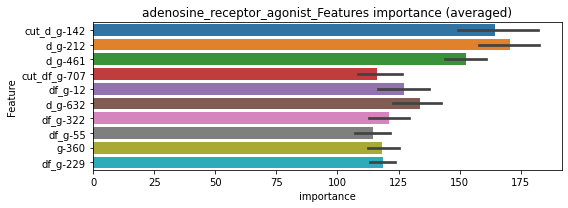

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000483506	valid_1's binary_logloss: 0.0105763
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000481734	valid_1's binary_logloss: 0.0105428


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000564746	valid_1's binary_logloss: 0.0156275


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000504328	valid_1's binary_logloss: 0.00441863


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000534045	valid_1's binary_logloss: 0.00923922


adenosine_receptor_agonist logloss: 0.009966680772964826
adenosine_receptor_antagonist, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3271


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0987489	valid_1's binary_logloss: 0.154011
[2000]	training's binary_logloss: 0.0549634	valid_1's binary_logloss: 0.117563
[3000]	training's binary_logloss: 0.0374999	valid_1's binary_logloss: 0.103882
Early stopping, best iteration is:
[3476]	training's binary_logloss: 0.032403	valid_1's binary_logloss: 0.100799
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.102467	valid_1's binary_logloss: 0.145878
[2000]	training's binary_logloss: 0.0573761	valid_1's binary_logloss: 0.103787
[3000]	training's binary_logloss: 0.0391925	valid_1's binary_logloss: 0.0868235
[4000]	training's binary_logloss: 0.0292699	valid_1's binary_logloss: 0.0778623
[5000]	training's binary_logloss: 0.0233253	valid_1's binary_logloss: 0.0723406
[6000]	training's binary_logloss: 0.0192646	valid_1's binary_logloss: 0.0685899
Early stopping, best iteration is:
[6930]	training'

1 / 3, AUC score:0.991, PR-AUC:0.979
y_Threshold: 0.0727799, Threshold: 0.1544365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 183 → Positive_corect_labels: 628/3742
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1544365, conf_0:0.10811, conf_1:0.20077
Num_p_label: 18.0, Expected: 16.1, Adj_threshold_1: 0.1844365
threshold: 0.1844365, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 628.0/3742, y_label_rate: 0.1678247
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.089684	valid_1's binary_logloss: 0.128469
[2000]	training's binary_logloss: 0.0475365	valid_1's binary_logloss: 0.0865833
[3000]	training's binary_logloss: 0.032005	valid_1's binary_logloss: 0.0710706
[4000]	training's binary_logloss: 0.0239573	valid_1's binary_logloss: 0.06332
[5000]	training's binary_logloss: 0.0191062	valid_1's binary_logloss: 0.0585704
[6000]	training's binary_logloss: 0.0158477	valid_1's binary_logloss: 0.0551986
Early stopping, best iteration is:
[6593]	training's binary_logloss: 0.0144019	valid_1's binary_logloss: 0.0536857
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0893265	valid_1's binary_logloss: 0.142098
[2000]	training's binary_logloss: 0.047859	valid_1's binary_logloss: 0.0989364
[3000]	training's binary_logloss: 0.0322412	valid_1's binary_logloss: 0.0817098
[4000]	training's binary_logloss: 0.0240987	valid_

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0992835, Threshold: 0.1844365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 613.0/3712
p_label_rate: 0.0143144 Vs.target_rate: 0.00403
Num_p_label: 57.0, Expected: 16.1, Threshold: 0.1844365, conf_0:0.14755, conf_1:0.22132
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.2144365
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_2: 0.2444365
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_3: 0.2744365
threshold: 0.2744365, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 613.0/3712, y_label_rate: 0.1651401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0862563	valid_1's binary_logloss: 0.122732
[2000]	training's binary_logloss: 0.0448349	valid_1's binary_logloss: 0.0803762
[3000]	training's binary_logloss: 0.0298474	valid_1's binary_logloss: 0.0647088
[4000]	training's binary_logloss: 0.0223012	valid_1's binary_logloss: 0.0567098
[5000]	training's binary_logloss: 0.0177427	valid_1's binary_logloss: 0.0518105
[6000]	training's binary_logloss: 0.0147251	valid_1's binary_logloss: 0.0483322
Early stopping, best iteration is:
[6896]	training's binary_logloss: 0.0128158	valid_1's binary_logloss: 0.0461278
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0840739	valid_1's binary_logloss: 0.126059
[2000]	training's binary_logloss: 0.0438874	valid_1's binary_logloss: 0.0854953
[3000]	training's binary_logloss: 0.029364	valid_1's binary_logloss: 0.0710846
[4000]	training's binary_logloss: 0.0219829	va

3 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0972104, Threshold: 0.2744365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 610.0/3706
p_label_rate: 0.0123054 Vs.target_rate: 0.00403
Num_p_label: 49.0, Expected: 16.1, Threshold: 0.2744365, conf_0:0.24699, conf_1:0.30188
Num_p_label: 43.0, Expected: 16.1, Adj_threshold_1: 0.3044365
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_2: 0.3344365
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_3: 0.3644365
Num_p_label: 26.0, Expected: 16.1, Adj_threshold_4: 0.3944365
Num_p_label: 18.0, Expected: 16.1, Adj_threshold_5: 0.4244365
threshold: 0.4244365, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 610.0/3706, y_label_rate: 0.1645979


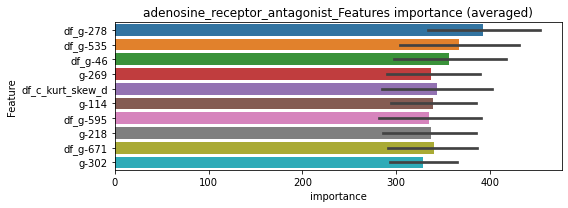

len(train_index) : 2779
len(valid_index) : 927
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.109763	valid_1's binary_logloss: 0.143349
[2000]	training's binary_logloss: 0.0603202	valid_1's binary_logloss: 0.0953812
[3000]	training's binary_logloss: 0.0414329	valid_1's binary_logloss: 0.0773042
[4000]	training's binary_logloss: 0.031461	valid_1's binary_logloss: 0.0674652
[5000]	training's binary_logloss: 0.0253671	valid_1's binary_logloss: 0.0613033
[6000]	training's binary_logloss: 0.0211517	valid_1's binary_logloss: 0.0574211
Early stopping, best iteration is:
[6290]	training's binary_logloss: 0.0201498	valid_1's binary_logloss: 0.0563268


len(train_index) : 2779
len(valid_index) : 927
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.106534	valid_1's binary_logloss: 0.156761
[2000]	training's binary_logloss: 0.0577337	valid_1's binary_logloss: 0.110488
[3000]	training's binary_logloss: 0.0392756	valid_1's binary_logloss: 0.0918075
[4000]	training's binary_logloss: 0.0297443	valid_1's binary_logloss: 0.0824395
[5000]	training's binary_logloss: 0.0239905	valid_1's binary_logloss: 0.0769066
[6000]	training's binary_logloss: 0.0200217	valid_1's binary_logloss: 0.0726677
[7000]	training's binary_logloss: 0.0171295	valid_1's binary_logloss: 0.0695845
Early stopping, best iteration is:
[7965]	training's binary_logloss: 0.0150887	valid_1's binary_logloss: 0.0671488


len(train_index) : 2780
len(valid_index) : 926
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.109104	valid_1's binary_logloss: 0.14703
[2000]	training's binary_logloss: 0.0604178	valid_1's binary_logloss: 0.0989428
[3000]	training's binary_logloss: 0.0411895	valid_1's binary_logloss: 0.0792245
[4000]	training's binary_logloss: 0.0312383	valid_1's binary_logloss: 0.0686839
[5000]	training's binary_logloss: 0.0252408	valid_1's binary_logloss: 0.0621983
[6000]	training's binary_logloss: 0.021121	valid_1's binary_logloss: 0.057754
[7000]	training's binary_logloss: 0.0181093	valid_1's binary_logloss: 0.0544118
[8000]	training's binary_logloss: 0.0159022	valid_1's binary_logloss: 0.0520744
Early stopping, best iteration is:
[8854]	training's binary_logloss: 0.0143684	valid_1's binary_logloss: 0.0502847


len(train_index) : 2780
len(valid_index) : 926
================================= fold 4/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.112852	valid_1's binary_logloss: 0.135315
[2000]	training's binary_logloss: 0.0626491	valid_1's binary_logloss: 0.0830642
[3000]	training's binary_logloss: 0.0430464	valid_1's binary_logloss: 0.0618432
[4000]	training's binary_logloss: 0.0326599	valid_1's binary_logloss: 0.0510396
[5000]	training's binary_logloss: 0.0263636	valid_1's binary_logloss: 0.0443672
[6000]	training's binary_logloss: 0.022017	valid_1's binary_logloss: 0.0397546
[7000]	training's binary_logloss: 0.0188897	valid_1's binary_logloss: 0.0362985
[8000]	training's binary_logloss: 0.0165607	valid_1's binary_logloss: 0.033708
[9000]	training's binary_logloss: 0.0147214	valid_1's binary_logloss: 0.0316385
[10000]	training's binary_logloss: 0.013254	valid_1's binary_logloss: 0.0299755
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.013254	valid_1's binary_logloss: 0.0299755


adenosine_receptor_antagonist logloss: 0.05093977858369553
adenosine_receptor_antagonist is unpredictable(><)!
adenylyl_cyclase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000301577	valid_1's binary_logloss: 0.000690301
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000309077	valid_1's binary_logloss: 0.00177447
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000303345	valid_1's binary_logloss: 0.000805331
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014777, Threshold: 0.0079393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0079393, conf_0:0.00556, conf_1:0.01032
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_1: 0.0379393
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0679393


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000301737	valid_1's binary_logloss: 0.00218482


threshold: 0.0679393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000284864	valid_1's binary_logloss: 0.000528782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000283604	valid_1's binary_logloss: 0.00111982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287534	valid_1's binary_logloss: 0.000630651
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0980317, Threshold: 0.0679393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0125565 Vs.target_rate: 0.00076
Num_p_label: 50.0, Expected: 3.0, Threshold: 0.0679393, conf_0:0.05435, conf_1:0.08153
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_1: 0.0979393
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_2: 0.1279393
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_3: 0.1579393
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_4: 0.1879393
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_5: 0.2179393


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000290539	valid_1's binary_logloss: 0.00151058


Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.2479393
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.2779393
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3079393
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_9: 0.3379393
threshold: 0.3379393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000284864	valid_1's binary_logloss: 0.000528782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000283604	valid_1's binary_logloss: 0.00111982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287534	valid_1's binary_logloss: 0.000630651
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0980317, Threshold: 0.3379393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.3379393, conf_0:0.30415, conf_1:0.37173


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000290539	valid_1's binary_logloss: 0.00151058


threshold: 0.3379393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


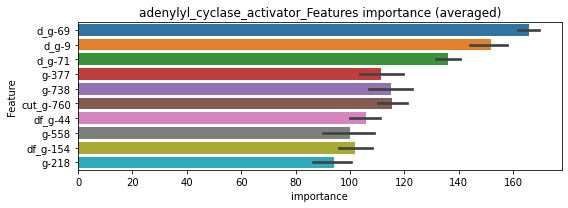

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000281889	valid_1's binary_logloss: 0.000562985
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000281889	valid_1's binary_logloss: 0.000562985


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282459	valid_1's binary_logloss: 0.000992297
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000282336	valid_1's binary_logloss: 0.000992255


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284722	valid_1's binary_logloss: 0.000606711
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000284722	valid_1's binary_logloss: 0.000606711


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000289422	valid_1's binary_logloss: 0.00178937


adenylyl_cyclase_activator logloss: 0.0009877870478885564


mutually exclusive columns: adrenergic_receptor_agonist


adrenergic_receptor_agonist, len(trt): 270, len(othr): 6953
target_rate: 0.0113379 → Adj_target_rate: 0.0097917


selected negative label: 6953


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0820732	valid_1's binary_logloss: 0.134317
Early stopping, best iteration is:
[1801]	training's binary_logloss: 0.0519133	valid_1's binary_logloss: 0.12813
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0811906	valid_1's binary_logloss: 0.135966
Early stopping, best iteration is:
[1464]	training's binary_logloss: 0.0614855	valid_1's binary_logloss: 0.132618
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0789807	valid_1's binary_logloss: 0.14423
Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.0695015	valid_1's binary_logloss: 0.142326
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0798269	valid_1's binary_logloss: 0.140075
Early stopping, best iteration is:
[1580]	training's binary_logloss: 0.0565987	valid_1's binary_logl

1 / 3, AUC score:0.946, PR-AUC:0.909
y_Threshold: 0.0650869, Threshold: 0.0885400, pos_neg_ratio: 0.8000000
Remove_noisy_data: 659 → Positive_corect_labels: 1200/7684
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, Expected: 45.1, Threshold: 0.0885400, conf_0:0.06198, conf_1:0.11510
threshold: 0.0885400, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1200.0/7684, y_label_rate: 0.1561687
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0358293	valid_1's binary_logloss: 0.0661999
Early stopping, best iteration is:
[1913]	training's binary_logloss: 0.0209608	valid_1's binary_logloss: 0.0593106
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0352702	valid_1's binary_logloss: 0.0691469
Early stopping, best iteration is:
[1920]	training's binary_logloss: 0.0206356	valid_1's binary_logloss: 0.0624072
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0392221	valid_1's binary_logloss: 0.0484197
[2000]	training's binary_logloss: 0.0217173	valid_1's binary_logloss: 0.0402444
[3000]	training's binary_logloss: 0.0143355	valid_1's binary_logloss: 0.0370931
Early stopping, best iteration is:
[3778]	training's binary_logloss: 0.0111926	valid_1's binary_logloss: 0.0358067
Training until validation scores don't improve for 30 rounds
[1000]	trai

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0597311, Threshold: 0.0885400, pos_neg_ratio: 0.8000000
Remove_noisy_data: 114 → Positive_corect_labels: 1143.0/7570
p_label_rate: 0.0110497 Vs.target_rate: 0.01134
Num_p_label: 44.0, Expected: 45.1, Threshold: 0.0885400, conf_0:0.07083, conf_1:0.10625
threshold: 0.0885400, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 1143.0/7570, y_label_rate: 0.1509908
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0205428	valid_1's binary_logloss: 0.0257128
[2000]	training's binary_logloss: 0.0111408	valid_1's binary_logloss: 0.0171869
[3000]	training's binary_logloss: 0.00766338	valid_1's binary_logloss: 0.0144694
[4000]	training's binary_logloss: 0.00578298	valid_1's binary_logloss: 0.0130226
[5000]	training's binary_logloss: 0.0046521	valid_1's binary_logloss: 0.0121264
[6000]	training's binary_logloss: 0.00388782	valid_1's binary_logloss: 0.0114725
[7000]	training's binary_logloss: 0.00334505	valid_1's binary_logloss: 0.0110355
[8000]	training's binary_logloss: 0.00293601	valid_1's binary_logloss: 0.0106674
[9000]	training's binary_logloss: 0.00261734	valid_1's binary_logloss: 0.010411
Early stopping, best iteration is:
[8993]	training's binary_logloss: 0.00261946	valid_1's binary_logloss: 0.0104075
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0854444, Threshold: 0.0885400, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 1130.0/7544
p_label_rate: 0.0158212 Vs.target_rate: 0.01134
Num_p_label: 63.0, Expected: 45.1, Threshold: 0.0885400, conf_0:0.07969, conf_1:0.09739
threshold: 0.0885400, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 1130.0/7544, y_label_rate: 0.1497879


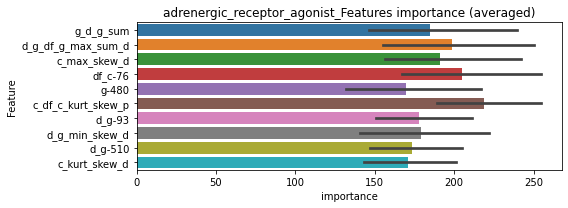

len(train_index) : 5658
len(valid_index) : 1886
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0241542	valid_1's binary_logloss: 0.0279833
[2000]	training's binary_logloss: 0.0119142	valid_1's binary_logloss: 0.0150748
[3000]	training's binary_logloss: 0.008055	valid_1's binary_logloss: 0.0111157
[4000]	training's binary_logloss: 0.00610997	valid_1's binary_logloss: 0.00906674
[5000]	training's binary_logloss: 0.00496472	valid_1's binary_logloss: 0.00787769
[6000]	training's binary_logloss: 0.00417344	valid_1's binary_logloss: 0.00704386
[7000]	training's binary_logloss: 0.00360659	valid_1's binary_logloss: 0.00644123
[8000]	training's binary_logloss: 0.00317719	valid_1's binary_logloss: 0.00596558
[9000]	training's binary_logloss: 0.00284258	valid_1's binary_logloss: 0.00560893
[10000]	training's binary_logloss: 0.00258351	valid_1's binary_logloss: 0.0053294
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00258351	valid_1's binary_logloss: 0.0053

len(train_index) : 5658
len(valid_index) : 1886
================================= fold 2/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0236259	valid_1's binary_logloss: 0.0326672
[2000]	training's binary_logloss: 0.0116807	valid_1's binary_logloss: 0.0197343
[3000]	training's binary_logloss: 0.0078959	valid_1's binary_logloss: 0.0156288
[4000]	training's binary_logloss: 0.0059688	valid_1's binary_logloss: 0.0136219
[5000]	training's binary_logloss: 0.00483237	valid_1's binary_logloss: 0.0124771
[6000]	training's binary_logloss: 0.00406517	valid_1's binary_logloss: 0.0117235
[7000]	training's binary_logloss: 0.0035092	valid_1's binary_logloss: 0.0111898
[8000]	training's binary_logloss: 0.00309272	valid_1's binary_logloss: 0.0107676
[9000]	training's binary_logloss: 0.00277063	valid_1's binary_logloss: 0.0104575
[10000]	training's binary_logloss: 0.0025184	valid_1's binary_logloss: 0.0102469
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0025184	valid_1's binary_logloss: 0.0102469


len(train_index) : 5658
len(valid_index) : 1886
================================= fold 3/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0240539	valid_1's binary_logloss: 0.0297595
[2000]	training's binary_logloss: 0.0118951	valid_1's binary_logloss: 0.0164326
[3000]	training's binary_logloss: 0.00807893	valid_1's binary_logloss: 0.0122586
[4000]	training's binary_logloss: 0.00610408	valid_1's binary_logloss: 0.010056
[5000]	training's binary_logloss: 0.00496164	valid_1's binary_logloss: 0.00882515
[6000]	training's binary_logloss: 0.00417358	valid_1's binary_logloss: 0.00789249
[7000]	training's binary_logloss: 0.00361544	valid_1's binary_logloss: 0.00728374
[8000]	training's binary_logloss: 0.00319127	valid_1's binary_logloss: 0.00680324
[9000]	training's binary_logloss: 0.00285362	valid_1's binary_logloss: 0.00640054
[10000]	training's binary_logloss: 0.00259387	valid_1's binary_logloss: 0.00614076
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00259387	valid_1's binary_logloss: 0.006

len(train_index) : 5658
len(valid_index) : 1886
================================= fold 4/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0238655	valid_1's binary_logloss: 0.0306753
[2000]	training's binary_logloss: 0.0118097	valid_1's binary_logloss: 0.0177385
[3000]	training's binary_logloss: 0.00801483	valid_1's binary_logloss: 0.0137462
[4000]	training's binary_logloss: 0.00605032	valid_1's binary_logloss: 0.0117003
[5000]	training's binary_logloss: 0.00489486	valid_1's binary_logloss: 0.0106119
[6000]	training's binary_logloss: 0.00411459	valid_1's binary_logloss: 0.00978496
[7000]	training's binary_logloss: 0.00355692	valid_1's binary_logloss: 0.00925806
[8000]	training's binary_logloss: 0.00313032	valid_1's binary_logloss: 0.00885814
[9000]	training's binary_logloss: 0.00279884	valid_1's binary_logloss: 0.0085477
[10000]	training's binary_logloss: 0.0025423	valid_1's binary_logloss: 0.00833737
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0025423	valid_1's binary_logloss: 0.008337

adrenergic_receptor_agonist logloss: 0.007513614748028022


mutually exclusive columns: adrenergic_receptor_antagonist


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 6628
target_rate: 0.0151172 → Adj_target_rate: 0.0125042


selected negative label: 6628


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.027659	valid_1's binary_logloss: 0.153976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.0431136	valid_1's binary_logloss: 0.188592
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0276567	valid_1's binary_logloss: 0.159042
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.939, PR-AUC:0.895
y_Threshold: 0.0531932, Threshold: 0.0937789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 660 → Positive_corect_labels: 1128/7293
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.06565, conf_1:0.12191


Early stopping, best iteration is:
[259]	training's binary_logloss: 0.0369145	valid_1's binary_logloss: 0.165856


threshold: 0.0937789, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1128.0/7293, y_label_rate: 0.1546689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.00792264	valid_1's binary_logloss: 0.0761351
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.0113764	valid_1's binary_logloss: 0.0995736
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00817211	valid_1's binary_logloss: 0.077493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00882429	valid_1's binary_logloss: 0.0792224


2 / 3, AUC score:0.991, PR-AUC:0.974
y_Threshold: 0.0481532, Threshold: 0.0937789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 182 → Positive_corect_labels: 1037.0/7111
p_label_rate: 0.0215972 Vs.target_rate: 0.01512
Num_p_label: 86.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.07502, conf_1:0.11253
threshold: 0.0937789, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 1037.0/7111, y_label_rate: 0.1458304
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00347138	valid_1's binary_logloss: 0.0374791
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00224914	valid_1's binary_logloss: 0.0271869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.002524	valid_1's binary_logloss: 0.0468697
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00131374	valid_1's binary_logloss: 0.0207719


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0481822, Threshold: 0.0937789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 1003.0/7043
p_label_rate: 0.0298845 Vs.target_rate: 0.01512
Num_p_label: 119.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.08440, conf_1:0.10316
Num_p_label: 103.0, Expected: 60.2, Adj_threshold_1: 0.1237789
Num_p_label: 91.0, Expected: 60.2, Adj_threshold_2: 0.1537789
Num_p_label: 86.0, Expected: 60.2, Adj_threshold_3: 0.1837789
threshold: 0.1837789, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 1003.0/7043, y_label_rate: 0.1424109


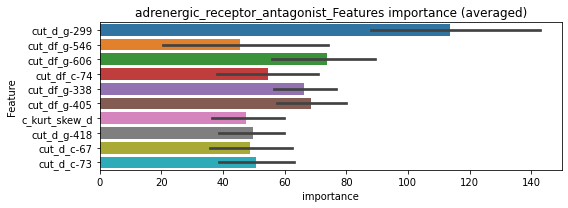

len(train_index) : 5282
len(valid_index) : 1761
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5282
len(valid_index) : 1761
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000735263	valid_1's binary_logloss: 0.0130259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000425806	valid_1's binary_logloss: 0.00587168


len(train_index) : 5282
len(valid_index) : 1761
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5283
len(valid_index) : 1760
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00111721	valid_1's binary_logloss: 0.0204171
Training until validation scores don't improve for 30 rounds


adrenergic_receptor_antagonist logloss: 0.013393182908759196


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00122649	valid_1's binary_logloss: 0.0142586


akt_inhibitor, len(trt): 66, len(othr): 3276
target_rate: 0.0027715 → Adj_target_rate: 0.0029567


selected negative label: 3276


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000573662	valid_1's binary_logloss: 0.0158949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000581931	valid_1's binary_logloss: 0.0188952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000712187	valid_1's binary_logloss: 0.0178871
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000612878	valid_1's binary_logloss: 0.0234772


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0056892, Threshold: 0.0225907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, Expected: 11.0, Threshold: 0.0225907, conf_0:0.01581, conf_1:0.02937
Num_p_label: 21.0, Expected: 11.0, Adj_threshold_1: 0.0525907
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_2: 0.0825907
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_3: 0.1125907
threshold: 0.1125907, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3797, y_label_rate: 0.1722412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000558216	valid_1's binary_logloss: 0.0121476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000741333	valid_1's binary_logloss: 0.0186045
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000742394	valid_1's binary_logloss: 0.0148287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000615205	valid_1's binary_logloss: 0.0181063


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0341104, Threshold: 0.1125907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3793
p_label_rate: 0.0067805 Vs.target_rate: 0.00277
Num_p_label: 27.0, Expected: 11.0, Threshold: 0.1125907, conf_0:0.09007, conf_1:0.13511
Num_p_label: 23.0, Expected: 11.0, Adj_threshold_1: 0.1425907
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.1725907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_3: 0.2025907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_4: 0.2325907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_5: 0.2625907
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_6: 0.2925907
Num_p_label: 16.0, Expected: 11.0, Adj_threshold_7: 0.3225907
threshold: 0.3225907, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000548047	valid_1's binary_logloss: 0.00930094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000556899	valid_1's binary_logloss: 0.0144058
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000583943	valid_1's binary_logloss: 0.00757063
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000558079	valid_1's binary_logloss: 0.0264481


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0290341, Threshold: 0.3225907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3791
p_label_rate: 0.0037670 Vs.target_rate: 0.00277
Num_p_label: 15.0, Expected: 11.0, Threshold: 0.3225907, conf_0:0.29033, conf_1:0.35485
threshold: 0.3225907, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3791, y_label_rate: 0.1717225


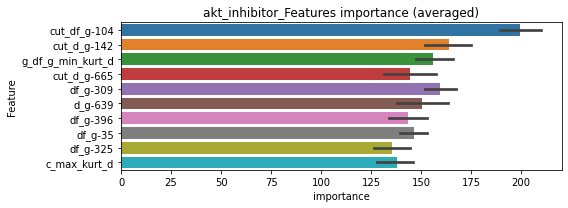

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000563168	valid_1's binary_logloss: 0.00868576
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000559702	valid_1's binary_logloss: 0.00864827


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000578276	valid_1's binary_logloss: 0.0232931


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000605048	valid_1's binary_logloss: 0.00735303


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000843825	valid_1's binary_logloss: 0.0204211


akt_inhibitor logloss: 0.014938555613857256
aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3289
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00030128	valid_1's binary_logloss: 0.00110657
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000297411	valid_1's binary_logloss: 0.00198953
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000300869	valid_1's binary_logloss: 0.000669514
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000300546	valid_1's binary_logloss: 0.000849411


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015422, Threshold: 0.0064593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0064593, conf_0:0.00452, conf_1:0.00840
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_1: 0.0364593
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_2: 0.0664593
threshold: 0.0664593, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000291935	valid_1's binary_logloss: 0.00113523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000292047	valid_1's binary_logloss: 0.00291201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000297713	valid_1's binary_logloss: 0.000716836
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0923505, Threshold: 0.0664593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00080
Num_p_label: 13.0, Expected: 3.2, Threshold: 0.0664593, conf_0:0.05317, conf_1:0.07975
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0964593


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000288584	valid_1's binary_logloss: 0.000685506


threshold: 0.0964593, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000291935	valid_1's binary_logloss: 0.00113523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000292047	valid_1's binary_logloss: 0.00291201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000297713	valid_1's binary_logloss: 0.000716836
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0923505, Threshold: 0.0964593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00080
Num_p_label: 6.0, Expected: 3.2, Threshold: 0.0964593, conf_0:0.08681, conf_1:0.10611


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000288584	valid_1's binary_logloss: 0.000685506


threshold: 0.0964593, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


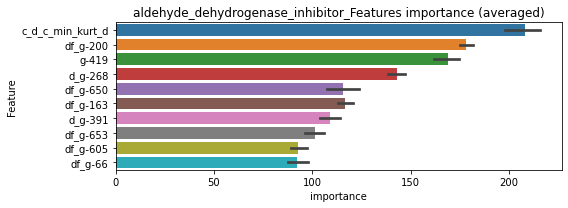

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000296478	valid_1's binary_logloss: 0.00109497


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000286763	valid_1's binary_logloss: 0.00172282
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.000284037	valid_1's binary_logloss: 0.00171502


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00029101	valid_1's binary_logloss: 0.000592592
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000291001	valid_1's binary_logloss: 0.000592579


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000288496	valid_1's binary_logloss: 0.000665398
Early stopping, best iteration is:
[1015]	training's binary_logloss: 0.000288132	valid_1's binary_logloss: 0.000664694


aldehyde_dehydrogenase_inhibitor logloss: 0.001016955644742755
alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000486189	valid_1's binary_logloss: 0.0120713
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000457894	valid_1's binary_logloss: 0.0117198
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000489002	valid_1's binary_logloss: 0.00368998
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000505768	valid_1's binary_logloss: 0.00754023


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036046, Threshold: 0.0156094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0156094, conf_0:0.01093, conf_1:0.02029
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_1: 0.0456094
threshold: 0.0456094, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000484016	valid_1's binary_logloss: 0.0112284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000464298	valid_1's binary_logloss: 0.0112455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000486353	valid_1's binary_logloss: 0.00284733
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000459446	valid_1's binary_logloss: 0.005876


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242813, Threshold: 0.0456094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0077850 Vs.target_rate: 0.00176
Num_p_label: 31.0, Expected: 7.0, Threshold: 0.0456094, conf_0:0.03649, conf_1:0.05473
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_1: 0.0756094
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_2: 0.1056094
threshold: 0.1056094, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00046215	valid_1's binary_logloss: 0.0117586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000566243	valid_1's binary_logloss: 0.0175228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000478164	valid_1's binary_logloss: 0.00446852
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000468824	valid_1's binary_logloss: 0.00965026


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0130050, Threshold: 0.1056094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0037670 Vs.target_rate: 0.00176
Num_p_label: 15.0, Expected: 7.0, Threshold: 0.1056094, conf_0:0.09505, conf_1:0.11617
threshold: 0.1056094, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


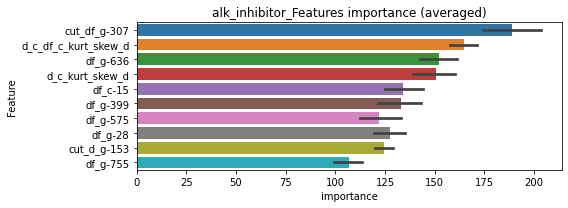

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000712142	valid_1's binary_logloss: 0.0134692


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.00046105	valid_1's binary_logloss: 0.00438537


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455714	valid_1's binary_logloss: 0.00475769
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000457472	valid_1's binary_logloss: 0.00475497


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000515079	valid_1's binary_logloss: 0.00640811


alk_inhibitor logloss: 0.007255466180909576
ampk_activator, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000237565	valid_1's binary_logloss: 0.00179472
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000238117	valid_1's binary_logloss: 0.00194385
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000238308	valid_1's binary_logloss: 0.000402555
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008890, Threshold: 0.0038962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0038962, conf_0:0.00273, conf_1:0.00507
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_1: 0.0338962
threshold: 0.0338962, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000238302	valid_1's binary_logloss: 0.000929652


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000220557	valid_1's binary_logloss: 0.00168382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000221782	valid_1's binary_logloss: 0.00228922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000224483	valid_1's binary_logloss: 0.000301403
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452177, Threshold: 0.0338962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00050
Num_p_label: 20.0, Expected: 2.0, Threshold: 0.0338962, conf_0:0.02712, conf_1:0.04068
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.0638962
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_2: 0.0938962
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1238962


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000221229	valid_1's binary_logloss: 0.00147984


threshold: 0.1238962, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000220557	valid_1's binary_logloss: 0.00168382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000221782	valid_1's binary_logloss: 0.00228922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000224483	valid_1's binary_logloss: 0.000301403
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452177, Threshold: 0.1238962, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000221229	valid_1's binary_logloss: 0.00147984


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.1238962, conf_0:0.11151, conf_1:0.13629
threshold: 0.1238962, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


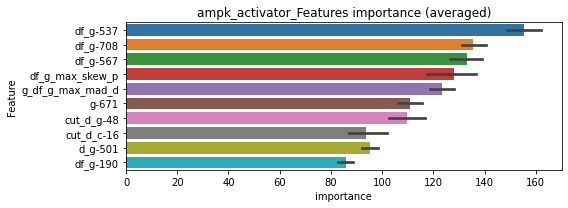

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000225311	valid_1's binary_logloss: 0.000847639
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000227512	valid_1's binary_logloss: 0.00236184
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000224783	valid_1's binary_logloss: 0.000305102
Training until validation scores don't improve for 30 rounds


ampk_activator logloss: 0.0010467053423657555


Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000224029	valid_1's binary_logloss: 0.000672236


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000250037	valid_1's binary_logloss: 0.000811305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000246072	valid_1's binary_logloss: 0.000523355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000256743	valid_1's binary_logloss: 0.00033698
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011113, Threshold: 0.0170543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0170543, conf_0:0.01194, conf_1:0.02217
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_1: 0.0470543
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_2: 0.0770543
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_3: 0.1070543
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.1370543
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_5: 0.1670543
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_6: 0.1970543
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_7: 0.2270543


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00025024	valid_1's binary_logloss: 0.000509345


Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.2570543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.2870543
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.3170543
threshold: 0.3170543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.000372644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000240927	valid_1's binary_logloss: 0.000712023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00024276	valid_1's binary_logloss: 0.000315518
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1267599, Threshold: 0.3170543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00050
Num_p_label: 9.0, Expected: 2.0, Threshold: 0.3170543, conf_0:0.25364, conf_1:0.38047
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.3470543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.3770543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.4070543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.4370543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.4670543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.4970543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.5270543
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.5570543


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000235299	valid_1's binary_logloss: 0.000391198


threshold: 0.5570543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.000372644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000240927	valid_1's binary_logloss: 0.000712023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00024276	valid_1's binary_logloss: 0.000315518
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1267599, Threshold: 0.5570543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.5570543, conf_0:0.50135, conf_1:0.61276
threshold: 0.5570543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000235299	valid_1's binary_logloss: 0.000391198


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


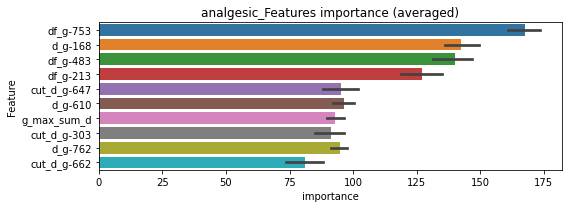

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000239206	valid_1's binary_logloss: 0.000343283
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000241573	valid_1's binary_logloss: 0.0003742
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000240838	valid_1's binary_logloss: 0.000361965
Training until validation scores don't improve for 30 rounds


analgesic logloss: 0.0003605182145955004


Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000242793	valid_1's binary_logloss: 0.000362643


androgen_receptor_agonist, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000500579	valid_1's binary_logloss: 0.0157394
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000526369	valid_1's binary_logloss: 0.0136869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000517144	valid_1's binary_logloss: 0.00170681
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000685124	valid_1's binary_logloss: 0.0181441


y_Threshold: 0.0040677, Threshold: 0.0092444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0092444, conf_0:0.00647, conf_1:0.01202
Num_p_label: 5.0, Expected: 8.0, Adj_threshold_1: 0.0392444
threshold: 0.0392444, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000551834	valid_1's binary_logloss: 0.013085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000496987	valid_1's binary_logloss: 0.00786898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000499157	valid_1's binary_logloss: 0.00911708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000567541	valid_1's binary_logloss: 0.0190986


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215354, Threshold: 0.0392444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0020090 Vs.target_rate: 0.00202
Num_p_label: 8.0, Expected: 8.0, Threshold: 0.0392444, conf_0:0.03140, conf_1:0.04709
threshold: 0.0392444, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000551834	valid_1's binary_logloss: 0.013085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000496987	valid_1's binary_logloss: 0.00786898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000499157	valid_1's binary_logloss: 0.00911708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000567541	valid_1's binary_logloss: 0.0190986


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215354, Threshold: 0.0392444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0020090 Vs.target_rate: 0.00202
Num_p_label: 8.0, Expected: 8.0, Threshold: 0.0392444, conf_0:0.03532, conf_1:0.04317
threshold: 0.0392444, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


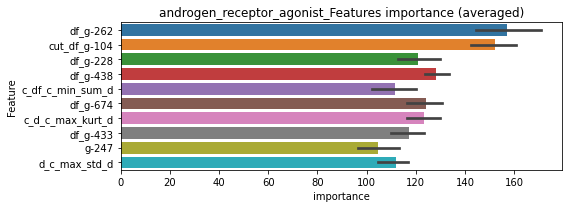

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000538829	valid_1's binary_logloss: 0.0142838


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000524873	valid_1's binary_logloss: 0.00744778


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000526643	valid_1's binary_logloss: 0.00844429


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


androgen_receptor_agonist logloss: 0.012789518273662119


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000837047	valid_1's binary_logloss: 0.0209899


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0998002	valid_1's binary_logloss: 0.155153
[2000]	training's binary_logloss: 0.0537472	valid_1's binary_logloss: 0.116298
[3000]	training's binary_logloss: 0.0360201	valid_1's binary_logloss: 0.102141
[4000]	training's binary_logloss: 0.0269662	valid_1's binary_logloss: 0.0950094
Early stopping, best iteration is:
[4228]	training's binary_logloss: 0.0254773	valid_1's binary_logloss: 0.0939141
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.10238	valid_1's binary_logloss: 0.148568
[2000]	training's binary_logloss: 0.0554805	valid_1's binary_logloss: 0.105829
[3000]	training's binary_logloss: 0.0374615	valid_1's binary_logloss: 0.0886936
[4000]	training's binary_logloss: 0.0279207	valid_1's binary_logloss: 0.0803409
[5000]	training's binary_logloss: 0.0221958	valid_1's binary_logloss: 0.074904
Early stopping, best iteration is:
[5390]	training'

1 / 3, AUC score:0.993, PR-AUC:0.983
y_Threshold: 0.0647521, Threshold: 0.1340217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 634/3756
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.1340217, conf_0:0.09382, conf_1:0.17423
Num_p_label: 27.0, Expected: 14.9, Adj_threshold_1: 0.1640217
Num_p_label: 20.0, Expected: 14.9, Adj_threshold_2: 0.1940217
threshold: 0.1940217, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 634.0/3756, y_label_rate: 0.1687966
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0927944	valid_1's binary_logloss: 0.130831
[2000]	training's binary_logloss: 0.0485991	valid_1's binary_logloss: 0.0855999
[3000]	training's binary_logloss: 0.0326911	valid_1's binary_logloss: 0.0691049
Early stopping, best iteration is:
[3622]	training's binary_logloss: 0.0269682	valid_1's binary_logloss: 0.0630022
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0927188	valid_1's binary_logloss: 0.132469
[2000]	training's binary_logloss: 0.0482392	valid_1's binary_logloss: 0.0876301
[3000]	training's binary_logloss: 0.0322776	valid_1's binary_logloss: 0.0711219
[4000]	training's binary_logloss: 0.0241337	valid_1's binary_logloss: 0.0625669
[5000]	training's binary_logloss: 0.0192798	valid_1's binary_logloss: 0.0571513
[6000]	training's binary_logloss: 0.0160308	valid_1's binary_logloss: 0.0533253
[7000]	training's binary_logloss: 0.0137034	v

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.1129969, Threshold: 0.1940217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 623.0/3734
p_label_rate: 0.0087896 Vs.target_rate: 0.00374
Num_p_label: 35.0, Expected: 14.9, Threshold: 0.1940217, conf_0:0.15522, conf_1:0.23283
Num_p_label: 26.0, Expected: 14.9, Adj_threshold_1: 0.2240217
Num_p_label: 18.0, Expected: 14.9, Adj_threshold_2: 0.2540217
threshold: 0.2540217, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 623.0/3734, y_label_rate: 0.1668452
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0876262	valid_1's binary_logloss: 0.136935
[2000]	training's binary_logloss: 0.0452171	valid_1's binary_logloss: 0.0927259
[3000]	training's binary_logloss: 0.0301604	valid_1's binary_logloss: 0.0761513
[4000]	training's binary_logloss: 0.0224679	valid_1's binary_logloss: 0.0675462
[5000]	training's binary_logloss: 0.0178908	valid_1's binary_logloss: 0.0614727
[6000]	training's binary_logloss: 0.0148687	valid_1's binary_logloss: 0.0575318
Early stopping, best iteration is:
[6795]	training's binary_logloss: 0.0131116	valid_1's binary_logloss: 0.0552157
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0881626	valid_1's binary_logloss: 0.130902
[2000]	training's binary_logloss: 0.045225	valid_1's binary_logloss: 0.0895355
[3000]	training's binary_logloss: 0.0301823	valid_1's binary_logloss: 0.0738019
[4000]	training's binary_logloss: 0.0225393	va

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0882069, Threshold: 0.2540217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 617.0/3722
p_label_rate: 0.0045203 Vs.target_rate: 0.00374
Num_p_label: 18.0, Expected: 14.9, Threshold: 0.2540217, conf_0:0.22862, conf_1:0.27942
threshold: 0.2540217, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 617.0/3722, y_label_rate: 0.1657711


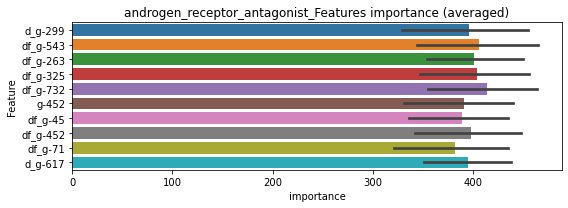

len(train_index) : 2791
len(valid_index) : 931
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.114159	valid_1's binary_logloss: 0.155206
[2000]	training's binary_logloss: 0.0628952	valid_1's binary_logloss: 0.103854
[3000]	training's binary_logloss: 0.0426389	valid_1's binary_logloss: 0.0831439
[4000]	training's binary_logloss: 0.0321708	valid_1's binary_logloss: 0.0713524
[5000]	training's binary_logloss: 0.0257818	valid_1's binary_logloss: 0.0643369
[6000]	training's binary_logloss: 0.0214464	valid_1's binary_logloss: 0.0591555
[7000]	training's binary_logloss: 0.0183856	valid_1's binary_logloss: 0.0555531
[8000]	training's binary_logloss: 0.0160587	valid_1's binary_logloss: 0.0526587
[9000]	training's binary_logloss: 0.0143062	valid_1's binary_logloss: 0.0504343
Early stopping, best iteration is:
[9044]	training's binary_logloss: 0.0142288	valid_1's binary_logloss: 0.0502743


len(train_index) : 2791
len(valid_index) : 931
================================= fold 2/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.114416	valid_1's binary_logloss: 0.153662
[2000]	training's binary_logloss: 0.0633923	valid_1's binary_logloss: 0.102422
[3000]	training's binary_logloss: 0.0431331	valid_1's binary_logloss: 0.0800514
[4000]	training's binary_logloss: 0.0325419	valid_1's binary_logloss: 0.0679181
[5000]	training's binary_logloss: 0.0261084	valid_1's binary_logloss: 0.0607774
[6000]	training's binary_logloss: 0.0217728	valid_1's binary_logloss: 0.0554302
[7000]	training's binary_logloss: 0.0186698	valid_1's binary_logloss: 0.051745
Early stopping, best iteration is:
[7878]	training's binary_logloss: 0.0165702	valid_1's binary_logloss: 0.0489438


len(train_index) : 2792
len(valid_index) : 930
================================= fold 3/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.114667	valid_1's binary_logloss: 0.152367
[2000]	training's binary_logloss: 0.0635446	valid_1's binary_logloss: 0.103051
[3000]	training's binary_logloss: 0.0433299	valid_1's binary_logloss: 0.0817344
[4000]	training's binary_logloss: 0.032682	valid_1's binary_logloss: 0.0700202
[5000]	training's binary_logloss: 0.0262087	valid_1's binary_logloss: 0.0629198
[6000]	training's binary_logloss: 0.0218047	valid_1's binary_logloss: 0.0577613
[7000]	training's binary_logloss: 0.0186994	valid_1's binary_logloss: 0.0542022
[8000]	training's binary_logloss: 0.0163228	valid_1's binary_logloss: 0.0510481
[9000]	training's binary_logloss: 0.014529	valid_1's binary_logloss: 0.0488854
[10000]	training's binary_logloss: 0.0130585	valid_1's binary_logloss: 0.0468758
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0130585	valid_1's binary_logloss: 0.0468758


len(train_index) : 2792
len(valid_index) : 930
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.115068	valid_1's binary_logloss: 0.148243
[2000]	training's binary_logloss: 0.0634738	valid_1's binary_logloss: 0.0970452
[3000]	training's binary_logloss: 0.042964	valid_1's binary_logloss: 0.0766285
[4000]	training's binary_logloss: 0.0323537	valid_1's binary_logloss: 0.065562
[5000]	training's binary_logloss: 0.0260026	valid_1's binary_logloss: 0.0587357
[6000]	training's binary_logloss: 0.0216699	valid_1's binary_logloss: 0.054158
[7000]	training's binary_logloss: 0.0186062	valid_1's binary_logloss: 0.0509837
Early stopping, best iteration is:
[7947]	training's binary_logloss: 0.0163672	valid_1's binary_logloss: 0.0483596


androgen_receptor_antagonist logloss: 0.04861827330598104
androgen_receptor_antagonist is unpredictable(><)!
anesthetic_-_local, len(trt): 80, len(othr): 3272
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3272


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.085136	valid_1's binary_logloss: 0.132412
[2000]	training's binary_logloss: 0.0461956	valid_1's binary_logloss: 0.0966681
[3000]	training's binary_logloss: 0.0313028	valid_1's binary_logloss: 0.0837627
[4000]	training's binary_logloss: 0.0232779	valid_1's binary_logloss: 0.077097
[5000]	training's binary_logloss: 0.0185935	valid_1's binary_logloss: 0.0730013
Early stopping, best iteration is:
[5393]	training's binary_logloss: 0.0171911	valid_1's binary_logloss: 0.0717328
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0860934	valid_1's binary_logloss: 0.124196
[2000]	training's binary_logloss: 0.0471848	valid_1's binary_logloss: 0.0879687
[3000]	training's binary_logloss: 0.0320745	valid_1's binary_logloss: 0.0747332
[4000]	training's binary_logloss: 0.0238107	valid_1's binary_logloss: 0.0681127
Early stopping, best iteration is:
[4338]	train

1 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0575728, Threshold: 0.0906026, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 643/3772
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0906026, conf_0:0.06342, conf_1:0.11778
Num_p_label: 15.0, Expected: 13.4, Adj_threshold_1: 0.1206026
threshold: 0.1206026, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 643.0/3772, y_label_rate: 0.1704666
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0798122	valid_1's binary_logloss: 0.122256
[2000]	training's binary_logloss: 0.0422331	valid_1's binary_logloss: 0.083198
[3000]	training's binary_logloss: 0.0284002	valid_1's binary_logloss: 0.069164
[4000]	training's binary_logloss: 0.0211166	valid_1's binary_logloss: 0.0613107
[5000]	training's binary_logloss: 0.0168754	valid_1's binary_logloss: 0.0567052
[6000]	training's binary_logloss: 0.0140425	valid_1's binary_logloss: 0.0537297
[7000]	training's binary_logloss: 0.0120785	valid_1's binary_logloss: 0.0516245
Early stopping, best iteration is:
[7826]	training's binary_logloss: 0.0107912	valid_1's binary_logloss: 0.0500571
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0795605	valid_1's binary_logloss: 0.119722
[2000]	training's binary_logloss: 0.042253	valid_1's binary_logloss: 0.08175
[3000]	training's binary_logloss: 0.0283781	valid_

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0860736, Threshold: 0.1206026, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 634.0/3754
p_label_rate: 0.0085384 Vs.target_rate: 0.00336
Num_p_label: 34.0, Expected: 13.4, Threshold: 0.1206026, conf_0:0.09648, conf_1:0.14472
Num_p_label: 13.0, Expected: 13.4, Adj_threshold_1: 0.1506026
threshold: 0.1506026, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 634.0/3754, y_label_rate: 0.1688865
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0781086	valid_1's binary_logloss: 0.107804
[2000]	training's binary_logloss: 0.0410289	valid_1's binary_logloss: 0.0702635
[3000]	training's binary_logloss: 0.0276551	valid_1's binary_logloss: 0.0565048
[4000]	training's binary_logloss: 0.020612	valid_1's binary_logloss: 0.0489946
[5000]	training's binary_logloss: 0.016482	valid_1's binary_logloss: 0.0444227
[6000]	training's binary_logloss: 0.0137281	valid_1's binary_logloss: 0.0411231
[7000]	training's binary_logloss: 0.0117863	valid_1's binary_logloss: 0.0386212
[8000]	training's binary_logloss: 0.0103095	valid_1's binary_logloss: 0.0366718
Early stopping, best iteration is:
[8269]	training's binary_logloss: 0.00997623	valid_1's binary_logloss: 0.0362618
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0774896	valid_1's binary_logloss: 0.111645
[2000]	training's binary_logloss: 0.0405144	va

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0800462, Threshold: 0.1506026, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 627.0/3740
p_label_rate: 0.0022602 Vs.target_rate: 0.00336
Num_p_label: 9.0, Expected: 13.4, Threshold: 0.1506026, conf_0:0.13554, conf_1:0.16566
threshold: 0.1506026, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 627.0/3740, y_label_rate: 0.1676471


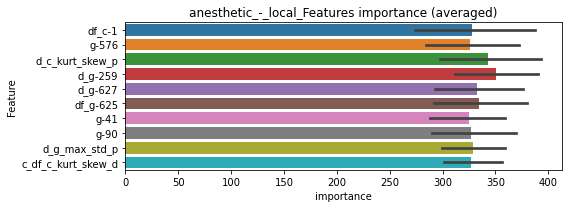

len(train_index) : 2805
len(valid_index) : 935
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.103883	valid_1's binary_logloss: 0.136064
[2000]	training's binary_logloss: 0.0556947	valid_1's binary_logloss: 0.0891042
[3000]	training's binary_logloss: 0.037941	valid_1's binary_logloss: 0.0715924
[4000]	training's binary_logloss: 0.0285908	valid_1's binary_logloss: 0.0621373
[5000]	training's binary_logloss: 0.0230214	valid_1's binary_logloss: 0.0564859
[6000]	training's binary_logloss: 0.0192264	valid_1's binary_logloss: 0.052734
[7000]	training's binary_logloss: 0.0164536	valid_1's binary_logloss: 0.0498308
[8000]	training's binary_logloss: 0.0143644	valid_1's binary_logloss: 0.04766
[9000]	training's binary_logloss: 0.0127725	valid_1's binary_logloss: 0.0459362
Early stopping, best iteration is:
[9305]	training's binary_logloss: 0.0123548	valid_1's binary_logloss: 0.0454479


len(train_index) : 2805
len(valid_index) : 935
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.103095	valid_1's binary_logloss: 0.142739
[2000]	training's binary_logloss: 0.0555382	valid_1's binary_logloss: 0.0936297
[3000]	training's binary_logloss: 0.037954	valid_1's binary_logloss: 0.0746571
[4000]	training's binary_logloss: 0.0286893	valid_1's binary_logloss: 0.0643196
[5000]	training's binary_logloss: 0.0230591	valid_1's binary_logloss: 0.0577647
[6000]	training's binary_logloss: 0.0192482	valid_1's binary_logloss: 0.0533236
[7000]	training's binary_logloss: 0.0164873	valid_1's binary_logloss: 0.0499294
Early stopping, best iteration is:
[7878]	training's binary_logloss: 0.0146142	valid_1's binary_logloss: 0.0474422


len(train_index) : 2805
len(valid_index) : 935
================================= fold 3/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.106032	valid_1's binary_logloss: 0.128128
[2000]	training's binary_logloss: 0.0572866	valid_1's binary_logloss: 0.0791861
[3000]	training's binary_logloss: 0.0392361	valid_1's binary_logloss: 0.0611482
[4000]	training's binary_logloss: 0.0296555	valid_1's binary_logloss: 0.0514236
[5000]	training's binary_logloss: 0.0238267	valid_1's binary_logloss: 0.0452261
[6000]	training's binary_logloss: 0.0199081	valid_1's binary_logloss: 0.0410592
[7000]	training's binary_logloss: 0.0170598	valid_1's binary_logloss: 0.0379823
[8000]	training's binary_logloss: 0.0148895	valid_1's binary_logloss: 0.0354927
[9000]	training's binary_logloss: 0.0132392	valid_1's binary_logloss: 0.0336463
[10000]	training's binary_logloss: 0.0119127	valid_1's binary_logloss: 0.0321333
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0119127	valid_1's binary_logloss: 0.0321333


len(train_index) : 2805
len(valid_index) : 935
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.104441	valid_1's binary_logloss: 0.138706
[2000]	training's binary_logloss: 0.0564706	valid_1's binary_logloss: 0.0896612
[3000]	training's binary_logloss: 0.0385128	valid_1's binary_logloss: 0.0709434
[4000]	training's binary_logloss: 0.0291739	valid_1's binary_logloss: 0.0611575
[5000]	training's binary_logloss: 0.0234933	valid_1's binary_logloss: 0.0553879
[6000]	training's binary_logloss: 0.0195926	valid_1's binary_logloss: 0.0514395
[7000]	training's binary_logloss: 0.0167742	valid_1's binary_logloss: 0.0485066
Early stopping, best iteration is:
[7796]	training's binary_logloss: 0.0150103	valid_1's binary_logloss: 0.0463377


anesthetic_-_local logloss: 0.04284076245824053
anesthetic_-_local is unpredictable(><)!
angiogenesis_inhibitor, len(trt): 36, len(othr): 3280
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3280


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000405947	valid_1's binary_logloss: 0.00786467
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000454054	valid_1's binary_logloss: 0.00968031
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000625617	valid_1's binary_logloss: 0.00629112
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000411896	valid_1's binary_logloss: 0.00405881


y_Threshold: 0.0031296, Threshold: 0.0145072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0145072, conf_0:0.01016, conf_1:0.01886
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_1: 0.0445072
threshold: 0.0445072, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000413649	valid_1's binary_logloss: 0.00761375
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000418859	valid_1's binary_logloss: 0.00890248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000432727	valid_1's binary_logloss: 0.00517285
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000402393	valid_1's binary_logloss: 0.00390791


y_Threshold: 0.0318533, Threshold: 0.0445072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0120542 Vs.target_rate: 0.00151
Num_p_label: 48.0, Expected: 6.0, Threshold: 0.0445072, conf_0:0.03561, conf_1:0.05341
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_1: 0.0745072
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.1045072
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.1345072
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_4: 0.1645072
threshold: 0.1645072, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000413649	valid_1's binary_logloss: 0.00761375
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000418859	valid_1's binary_logloss: 0.00890248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000432727	valid_1's binary_logloss: 0.00517285
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000402393	valid_1's binary_logloss: 0.00390791


y_Threshold: 0.0318533, Threshold: 0.1645072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.1645072, conf_0:0.14806, conf_1:0.18096
threshold: 0.1645072, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3804, y_label_rate: 0.1724501


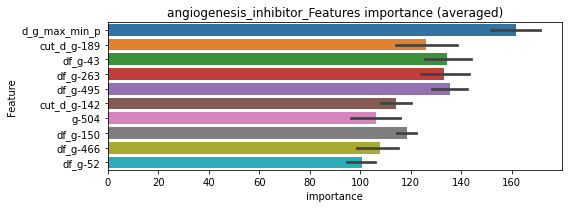

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000424997	valid_1's binary_logloss: 0.00773501


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000432076	valid_1's binary_logloss: 0.00575225


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000555378	valid_1's binary_logloss: 0.00474427
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.00041548	valid_1's binary_logloss: 0.00386348


angiogenesis_inhibitor logloss: 0.005523752747670818
angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000418584	valid_1's binary_logloss: 0.00556509
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000399961	valid_1's binary_logloss: 0.00405465
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000416045	valid_1's binary_logloss: 0.00248361
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029452, Threshold: 0.0104258, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000469646	valid_1's binary_logloss: 0.00737596


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0104258, conf_0:0.00730, conf_1:0.01355
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0404258
threshold: 0.0404258, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000399668	valid_1's binary_logloss: 0.00454059
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000397713	valid_1's binary_logloss: 0.00382142
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000395653	valid_1's binary_logloss: 0.00279267
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000411119	valid_1's binary_logloss: 0.00784232


y_Threshold: 0.0176026, Threshold: 0.0404258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0060271 Vs.target_rate: 0.00155
Num_p_label: 24.0, Expected: 6.2, Threshold: 0.0404258, conf_0:0.03234, conf_1:0.04851
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0704258
threshold: 0.0704258, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00039683	valid_1's binary_logloss: 0.00795515
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000392811	valid_1's binary_logloss: 0.00263301
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000397313	valid_1's binary_logloss: 0.00177336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000398883	valid_1's binary_logloss: 0.00415359


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381382, Threshold: 0.0704258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00155
Num_p_label: 17.0, Expected: 6.2, Threshold: 0.0704258, conf_0:0.06338, conf_1:0.07747
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.1004258
threshold: 0.1004258, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


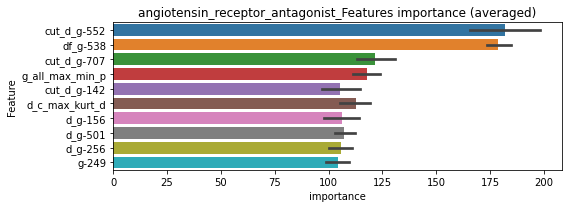

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000404189	valid_1's binary_logloss: 0.00580119


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00039981	valid_1's binary_logloss: 0.0021783
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.000396203	valid_1's binary_logloss: 0.00217045


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000399323	valid_1's binary_logloss: 0.00189092
Early stopping, best iteration is:
[1056]	training's binary_logloss: 0.000394263	valid_1's binary_logloss: 0.00188063


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000431407	valid_1's binary_logloss: 0.00483277


angiotensin_receptor_antagonist logloss: 0.003671636925705246
anti-inflammatory, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0886394	valid_1's binary_logloss: 0.132138
[2000]	training's binary_logloss: 0.0468537	valid_1's binary_logloss: 0.0924069
[3000]	training's binary_logloss: 0.0313032	valid_1's binary_logloss: 0.0779131
[4000]	training's binary_logloss: 0.0232205	valid_1's binary_logloss: 0.0703216
Early stopping, best iteration is:
[4327]	training's binary_logloss: 0.0214068	valid_1's binary_logloss: 0.0686322
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0913763	valid_1's binary_logloss: 0.124543
[2000]	training's binary_logloss: 0.0486384	valid_1's binary_logloss: 0.0815399
[3000]	training's binary_logloss: 0.0325099	valid_1's binary_logloss: 0.0646021
[4000]	training's binary_logloss: 0.0241847	valid_1's binary_logloss: 0.0557802
[5000]	training's binary_logloss: 0.0192425	valid_1's binary_logloss: 0.0500156
[6000]	training's binary_logloss: 0.015934	va

1 / 3, AUC score:0.995, PR-AUC:0.990
y_Threshold: 0.0613997, Threshold: 0.2537124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 151 → Positive_corect_labels: 645/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.2537124, conf_0:0.17760, conf_1:0.32983
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_1: 0.2837124
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_2: 0.3137124
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_3: 0.3437124
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_4: 0.3737124
threshold: 0.3737124, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 645.0/3779, y_label_rate: 0.1706801
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0814007	valid_1's binary_logloss: 0.131823
[2000]	training's binary_logloss: 0.0421949	valid_1's binary_logloss: 0.0895532
[3000]	training's binary_logloss: 0.0279717	valid_1's binary_logloss: 0.0734532
[4000]	training's binary_logloss: 0.0208045	valid_1's binary_logloss: 0.0653957
Early stopping, best iteration is:
[4727]	training's binary_logloss: 0.0175318	valid_1's binary_logloss: 0.06162
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0830001	valid_1's binary_logloss: 0.123038
[2000]	training's binary_logloss: 0.0428926	valid_1's binary_logloss: 0.0832487
[3000]	training's binary_logloss: 0.0284222	valid_1's binary_logloss: 0.0679762
[4000]	training's binary_logloss: 0.0210472	valid_1's binary_logloss: 0.0594415
[5000]	training's binary_logloss: 0.016706	valid_1's binary_logloss: 0.0543314
[6000]	training's binary_logloss: 0.0138117	vali

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.1023313, Threshold: 0.3737124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 632.0/3753
p_label_rate: 0.0163235 Vs.target_rate: 0.00307
Num_p_label: 65.0, Expected: 12.2, Threshold: 0.3737124, conf_0:0.29897, conf_1:0.44845
Num_p_label: 55.0, Expected: 12.2, Adj_threshold_1: 0.4037124
Num_p_label: 48.0, Expected: 12.2, Adj_threshold_2: 0.4337124
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_3: 0.4637124
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_4: 0.4937124
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_5: 0.5237124
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_6: 0.5537124
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_7: 0.5837124
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_8: 0.6137124
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_9: 0.6437124
threshold: 0.6437124, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 632.0/3753, y_label_rate: 0.1683986
==========

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0785382	valid_1's binary_logloss: 0.118183
[2000]	training's binary_logloss: 0.0400344	valid_1's binary_logloss: 0.0776914
[3000]	training's binary_logloss: 0.0264017	valid_1's binary_logloss: 0.0620709
[4000]	training's binary_logloss: 0.0195407	valid_1's binary_logloss: 0.053769
Early stopping, best iteration is:
[4726]	training's binary_logloss: 0.0164639	valid_1's binary_logloss: 0.0500307
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0789553	valid_1's binary_logloss: 0.114733
[2000]	training's binary_logloss: 0.0402621	valid_1's binary_logloss: 0.0732302
[3000]	training's binary_logloss: 0.0265613	valid_1's binary_logloss: 0.0576128
[4000]	training's binary_logloss: 0.0197328	valid_1's binary_logloss: 0.0494399
[5000]	training's binary_logloss: 0.0157025	valid_1's binary_logloss: 0.0442192
[6000]	training's binary_logloss: 0.0130044	va

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.1115235, Threshold: 0.6437124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 626.0/3741
p_label_rate: 0.0062783 Vs.target_rate: 0.00307
Num_p_label: 25.0, Expected: 12.2, Threshold: 0.6437124, conf_0:0.57934, conf_1:0.70808
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_1: 0.6737124
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_2: 0.7037124
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_3: 0.7337124
threshold: 0.7337124, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 626.0/3741, y_label_rate: 0.1673349


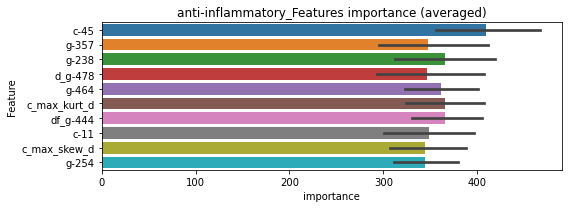

len(train_index) : 2805
len(valid_index) : 936
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.103315	valid_1's binary_logloss: 0.144442
[2000]	training's binary_logloss: 0.0550379	valid_1's binary_logloss: 0.0933362
[3000]	training's binary_logloss: 0.0370362	valid_1's binary_logloss: 0.0732646
[4000]	training's binary_logloss: 0.0277924	valid_1's binary_logloss: 0.0628165
[5000]	training's binary_logloss: 0.0221559	valid_1's binary_logloss: 0.0557798
[6000]	training's binary_logloss: 0.0184376	valid_1's binary_logloss: 0.0513267
[7000]	training's binary_logloss: 0.0157444	valid_1's binary_logloss: 0.0475103
[8000]	training's binary_logloss: 0.0137723	valid_1's binary_logloss: 0.0448506
[9000]	training's binary_logloss: 0.0122286	valid_1's binary_logloss: 0.0427882
Early stopping, best iteration is:
[9473]	training's binary_logloss: 0.0116217	valid_1's binary_logloss: 0.0419371


len(train_index) : 2806
len(valid_index) : 935
================================= fold 2/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.105213	valid_1's binary_logloss: 0.131729
[2000]	training's binary_logloss: 0.0566896	valid_1's binary_logloss: 0.0822211
[3000]	training's binary_logloss: 0.0381121	valid_1's binary_logloss: 0.0619881
[4000]	training's binary_logloss: 0.0285885	valid_1's binary_logloss: 0.0511756
[5000]	training's binary_logloss: 0.0227668	valid_1's binary_logloss: 0.0444714
[6000]	training's binary_logloss: 0.0189258	valid_1's binary_logloss: 0.0399879
[7000]	training's binary_logloss: 0.0161367	valid_1's binary_logloss: 0.0364901
[8000]	training's binary_logloss: 0.0141168	valid_1's binary_logloss: 0.0339223
[9000]	training's binary_logloss: 0.0125384	valid_1's binary_logloss: 0.0319648
[10000]	training's binary_logloss: 0.0113007	valid_1's binary_logloss: 0.0303159
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0113007	valid_1's binary_logloss: 0.0303159


len(train_index) : 2806
len(valid_index) : 935
================================= fold 3/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.105867	valid_1's binary_logloss: 0.135868
[2000]	training's binary_logloss: 0.0568551	valid_1's binary_logloss: 0.0845182
[3000]	training's binary_logloss: 0.0383178	valid_1's binary_logloss: 0.0635486
[4000]	training's binary_logloss: 0.0286942	valid_1's binary_logloss: 0.0525717
[5000]	training's binary_logloss: 0.022887	valid_1's binary_logloss: 0.0452245
[6000]	training's binary_logloss: 0.0190203	valid_1's binary_logloss: 0.0403703
[7000]	training's binary_logloss: 0.0162044	valid_1's binary_logloss: 0.0367539
[8000]	training's binary_logloss: 0.0141808	valid_1's binary_logloss: 0.0340176
[9000]	training's binary_logloss: 0.0126011	valid_1's binary_logloss: 0.031941
[10000]	training's binary_logloss: 0.0113416	valid_1's binary_logloss: 0.0302247
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0113416	valid_1's binary_logloss: 0.0302247


len(train_index) : 2806
len(valid_index) : 935
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.103051	valid_1's binary_logloss: 0.143444
[2000]	training's binary_logloss: 0.0547034	valid_1's binary_logloss: 0.0951799
[3000]	training's binary_logloss: 0.0366751	valid_1's binary_logloss: 0.0761872
[4000]	training's binary_logloss: 0.0274267	valid_1's binary_logloss: 0.0660335
[5000]	training's binary_logloss: 0.0218746	valid_1's binary_logloss: 0.0595931
[6000]	training's binary_logloss: 0.0182078	valid_1's binary_logloss: 0.0552248
[7000]	training's binary_logloss: 0.0155152	valid_1's binary_logloss: 0.0520909
Early stopping, best iteration is:
[7600]	training's binary_logloss: 0.0142884	valid_1's binary_logloss: 0.0505168


anti-inflammatory logloss: 0.038249592413096424
anti-inflammatory is unpredictable(><)!
antiarrhythmic, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00036358	valid_1's binary_logloss: 0.00206632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000363848	valid_1's binary_logloss: 0.00297933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000364568	valid_1's binary_logloss: 0.00335179
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018350, Threshold: 0.0057782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0057782, conf_0:0.00404, conf_1:0.00751
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_1: 0.0357782


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000387255	valid_1's binary_logloss: 0.00313934


threshold: 0.0357782, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000361939	valid_1's binary_logloss: 0.00177708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000357884	valid_1's binary_logloss: 0.00283667
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000357279	valid_1's binary_logloss: 0.00286458
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323776, Threshold: 0.0357782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0357782, conf_0:0.02862, conf_1:0.04293
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0657782


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000363845	valid_1's binary_logloss: 0.00313742


threshold: 0.0657782, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000361939	valid_1's binary_logloss: 0.00177708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000357884	valid_1's binary_logloss: 0.00283667
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000357279	valid_1's binary_logloss: 0.00286458
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323776, Threshold: 0.0657782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0657782, conf_0:0.05920, conf_1:0.07236


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000363845	valid_1's binary_logloss: 0.00313742


threshold: 0.0657782, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


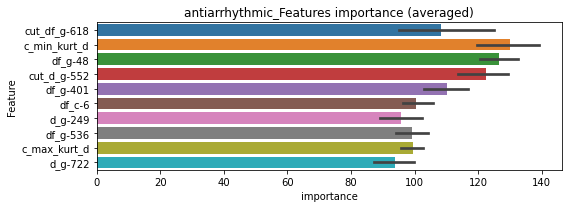

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000359867	valid_1's binary_logloss: 0.00203144


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000362432	valid_1's binary_logloss: 0.00176967


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000368825	valid_1's binary_logloss: 0.00241148


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000363277	valid_1's binary_logloss: 0.00279776


antiarrhythmic logloss: 0.0022530806415645794
antibiotic, len(trt): 43, len(othr): 3284
target_rate: 0.0018057 → Adj_target_rate: 0.0020542


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00050063	valid_1's binary_logloss: 0.0134287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000491328	valid_1's binary_logloss: 0.00595274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000476723	valid_1's binary_logloss: 0.00179719
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00052383	valid_1's binary_logloss: 0.0115173


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039545, Threshold: 0.0274921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, Expected: 7.2, Threshold: 0.0274921, conf_0:0.01924, conf_1:0.03574
Num_p_label: 20.0, Expected: 7.2, Adj_threshold_1: 0.0574921
Num_p_label: 12.0, Expected: 7.2, Adj_threshold_2: 0.0874921
threshold: 0.0874921, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000452281	valid_1's binary_logloss: 0.00941195
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000480755	valid_1's binary_logloss: 0.00503528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00046262	valid_1's binary_logloss: 0.00213598
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000782229	valid_1's binary_logloss: 0.00999257


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354070, Threshold: 0.0874921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0092918 Vs.target_rate: 0.00181
Num_p_label: 37.0, Expected: 7.2, Threshold: 0.0874921, conf_0:0.06999, conf_1:0.10499
Num_p_label: 26.0, Expected: 7.2, Adj_threshold_1: 0.1174921
Num_p_label: 19.0, Expected: 7.2, Adj_threshold_2: 0.1474921
Num_p_label: 17.0, Expected: 7.2, Adj_threshold_3: 0.1774921
threshold: 0.1774921, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000452281	valid_1's binary_logloss: 0.00941195
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000480755	valid_1's binary_logloss: 0.00503528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00046262	valid_1's binary_logloss: 0.00213598
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354070, Threshold: 0.1774921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00181
Num_p_label: 17.0, Expected: 7.2, Threshold: 0.1774921, conf_0:0.15974, conf_1:0.19524


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000782229	valid_1's binary_logloss: 0.00999257


threshold: 0.1774921, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


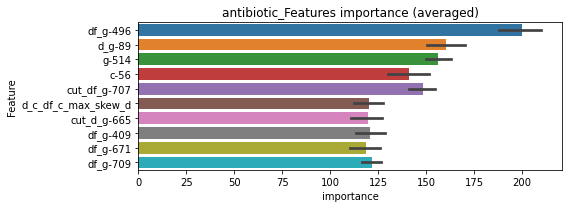

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antibiotic=================================


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000581128	valid_1's binary_logloss: 0.0119327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000528768	valid_1's binary_logloss: 0.00605958


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000477379	valid_1's binary_logloss: 0.00203686


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000574555	valid_1's binary_logloss: 0.0113264


antibiotic logloss: 0.007838872136956311
anticonvulsant, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000270193	valid_1's binary_logloss: 0.00107908
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000269012	valid_1's binary_logloss: 0.00215964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000281806	valid_1's binary_logloss: 0.0039961
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011744, Threshold: 0.0042642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0042642, conf_0:0.00298, conf_1:0.00554
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0342642


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000281271	valid_1's binary_logloss: 0.00150459


threshold: 0.0342642, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000268307	valid_1's binary_logloss: 0.00143831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000273388	valid_1's binary_logloss: 0.0028921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000276316	valid_1's binary_logloss: 0.00356943
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0136231, Threshold: 0.0342642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0342642, conf_0:0.02741, conf_1:0.04112


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000265147	valid_1's binary_logloss: 0.00150335


threshold: 0.0342642, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000268307	valid_1's binary_logloss: 0.00143831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000273388	valid_1's binary_logloss: 0.0028921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000276316	valid_1's binary_logloss: 0.00356943
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0136231, Threshold: 0.0342642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0342642, conf_0:0.03084, conf_1:0.03769


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000265147	valid_1's binary_logloss: 0.00150335


threshold: 0.0342642, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


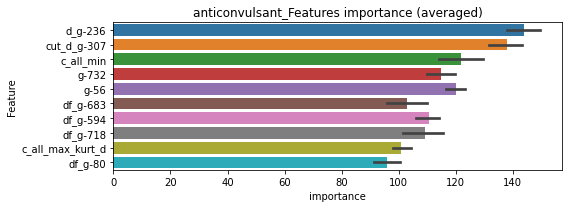

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.00027396	valid_1's binary_logloss: 0.0010614


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000276389	valid_1's binary_logloss: 0.0032059


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 anticonvulsant=================================


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312775	valid_1's binary_logloss: 0.00362207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000267022	valid_1's binary_logloss: 0.00153325


anticonvulsant logloss: 0.0023553166443561822
antifungal, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000333521	valid_1's binary_logloss: 0.00244571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000349696	valid_1's binary_logloss: 0.00219507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000340671	valid_1's binary_logloss: 0.0023464
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016560, Threshold: 0.0047737, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000335681	valid_1's binary_logloss: 0.00366964


Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0047737, conf_0:0.00334, conf_1:0.00621
Num_p_label: 2.0, Expected: 4.3, Adj_threshold_1: 0.0347737
threshold: 0.0347737, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000327595	valid_1's binary_logloss: 0.00255322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000332815	valid_1's binary_logloss: 0.00195022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000331419	valid_1's binary_logloss: 0.00238964
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431267, Threshold: 0.0347737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000326457	valid_1's binary_logloss: 0.00247976


p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0347737, conf_0:0.02782, conf_1:0.04173
threshold: 0.0347737, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000327595	valid_1's binary_logloss: 0.00255322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000332815	valid_1's binary_logloss: 0.00195022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000331419	valid_1's binary_logloss: 0.00238964
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431267, Threshold: 0.0347737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0347737, conf_0:0.03130, conf_1:0.03825


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000326457	valid_1's binary_logloss: 0.00247976


threshold: 0.0347737, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


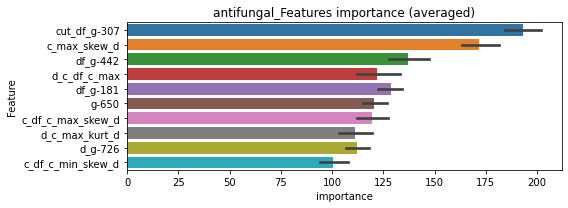

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000327758	valid_1's binary_logloss: 0.00205214
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000327707	valid_1's binary_logloss: 0.00205189


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00032701	valid_1's binary_logloss: 0.0018122
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000327143	valid_1's binary_logloss: 0.001812


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000337285	valid_1's binary_logloss: 0.00203393


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000324193	valid_1's binary_logloss: 0.00203547
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000325702	valid_1's binary_logloss: 0.00203513


antifungal logloss: 0.0019836332980694617
antihistamine, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000300837	valid_1's binary_logloss: 0.00160641
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000301618	valid_1's binary_logloss: 0.00254366
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000307666	valid_1's binary_logloss: 0.00128128
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015286, Threshold: 0.1284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.1284315, conf_0:0.08990, conf_1:0.16696
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_1: 0.1584315
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_2: 0.1884315
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_3: 0.2184315


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000307681	valid_1's binary_logloss: 0.00365955


Num_p_label: 27.0, Expected: 3.0, Adj_threshold_4: 0.2484315
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_5: 0.2784315
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_6: 0.3084315
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_7: 0.3384315
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_8: 0.3684315
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_9: 0.3984315
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_10: 0.4284315
threshold: 0.4284315, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000282014	valid_1's binary_logloss: 0.00158584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000288541	valid_1's binary_logloss: 0.00291234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000295502	valid_1's binary_logloss: 0.000456913
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0705611, Threshold: 0.4284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0123054 Vs.target_rate: 0.00076
Num_p_label: 49.0, Expected: 3.0, Threshold: 0.4284315, conf_0:0.34275, conf_1:0.51412
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_1: 0.4584315
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_2: 0.4884315
Num_p_label: 48.0, Expected: 3.0, Adj_threshold_3: 0.5184315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_4: 0.5484315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_5: 0.5784315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_6: 0.6084315


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000284539	valid_1's binary_logloss: 0.00242352


Num_p_label: 45.0, Expected: 3.0, Adj_threshold_7: 0.6384315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_8: 0.6684315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_9: 0.6984315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_10: 0.7284315
threshold: 0.7284315, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000282014	valid_1's binary_logloss: 0.00158584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000288541	valid_1's binary_logloss: 0.00291234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000295502	valid_1's binary_logloss: 0.000456913
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0705611, Threshold: 0.7284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0113009 Vs.target_rate: 0.00076
Num_p_label: 45.0, Expected: 3.0, Threshold: 0.7284315, conf_0:0.65559, conf_1:0.80127
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_1: 0.7584315
Num_p_label: 42.0, Expected: 3.0, Adj_threshold_2: 0.7884315
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_3: 0.8184315
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_4: 0.8484315
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_5: 0.8784315
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_6: 0.9084315


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000284539	valid_1's binary_logloss: 0.00242352


Num_p_label: 22.0, Expected: 3.0, Adj_threshold_7: 0.9384315
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_8: 0.9684315
threshold: 0.9684315, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


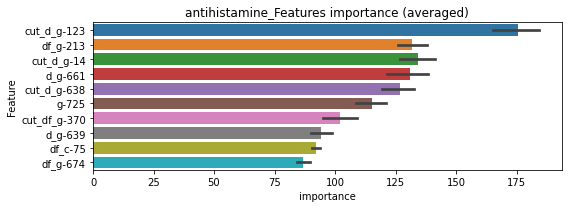

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000290493	valid_1's binary_logloss: 0.00111577
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000292502	valid_1's binary_logloss: 0.00173783
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 antihistamine=================================


Early stopping, best iteration is:
[733]	training's binary_logloss: 0.00030276	valid_1's binary_logloss: 0.000493506
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000288492	valid_1's binary_logloss: 0.00167713


antihistamine logloss: 0.0012561654570602114
antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000319582	valid_1's binary_logloss: 0.000836848
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000321904	valid_1's binary_logloss: 0.00221019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000315665	valid_1's binary_logloss: 0.00285749
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018172, Threshold: 0.0085367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0085367, conf_0:0.00598, conf_1:0.01110
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.0385367
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0685367


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000323833	valid_1's binary_logloss: 0.00269842


threshold: 0.0685367, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000302383	valid_1's binary_logloss: 0.000998629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000317013	valid_1's binary_logloss: 0.00307404
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000305467	valid_1's binary_logloss: 0.000610664
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0937998, Threshold: 0.0685367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0057760 Vs.target_rate: 0.00076
Num_p_label: 23.0, Expected: 3.0, Threshold: 0.0685367, conf_0:0.05483, conf_1:0.08224
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0985367
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.1285367
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.1585367
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.1885367


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000308683	valid_1's binary_logloss: 0.00307889


Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.2185367
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.2485367
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.2785367
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3085367
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.3385367
threshold: 0.3385367, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000302383	valid_1's binary_logloss: 0.000998629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000317013	valid_1's binary_logloss: 0.00307404
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000305467	valid_1's binary_logloss: 0.000610664
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0937998, Threshold: 0.3385367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3385367, conf_0:0.30468, conf_1:0.37239


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000308683	valid_1's binary_logloss: 0.00307889


threshold: 0.3385367, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


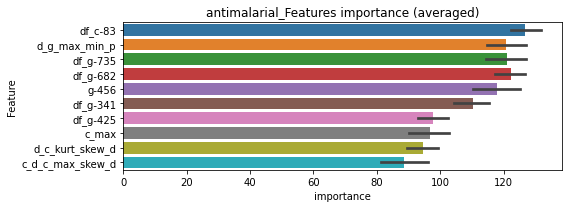

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000301865	valid_1's binary_logloss: 0.000667865


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 antimalarial=================================


Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000325919	valid_1's binary_logloss: 0.00196183
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 antimalarial=================================


Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000307368	valid_1's binary_logloss: 0.000740162
Training until validation scores don't improve for 30 rounds


antimalarial logloss: 0.001401744136139545


Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000310083	valid_1's binary_logloss: 0.00223711


antioxidant, len(trt): 73, len(othr): 3282
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0783827	valid_1's binary_logloss: 0.132203
[2000]	training's binary_logloss: 0.0420248	valid_1's binary_logloss: 0.0955814
[3000]	training's binary_logloss: 0.0283718	valid_1's binary_logloss: 0.0810989
[4000]	training's binary_logloss: 0.0212148	valid_1's binary_logloss: 0.0737394
[5000]	training's binary_logloss: 0.0169363	valid_1's binary_logloss: 0.0689309
Early stopping, best iteration is:
[5376]	training's binary_logloss: 0.0157096	valid_1's binary_logloss: 0.0673714
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0812405	valid_1's binary_logloss: 0.119137
[2000]	training's binary_logloss: 0.0436158	valid_1's binary_logloss: 0.0820905
[3000]	training's binary_logloss: 0.0294678	valid_1's binary_logloss: 0.0684904
[4000]	training's binary_logloss: 0.0220294	valid_1's binary_logloss: 0.0612175
[5000]	training's binary_logloss: 0.0175269	v

1 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0509418, Threshold: 0.1197812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 648/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.1197812, conf_0:0.08385, conf_1:0.15572
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_1: 0.1497812
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_2: 0.1797812
threshold: 0.1797812, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3790, y_label_rate: 0.1709763
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0779117	valid_1's binary_logloss: 0.109705
[2000]	training's binary_logloss: 0.0410905	valid_1's binary_logloss: 0.072374
[3000]	training's binary_logloss: 0.0274727	valid_1's binary_logloss: 0.0593111
[4000]	training's binary_logloss: 0.0205015	valid_1's binary_logloss: 0.0519631
[5000]	training's binary_logloss: 0.0163113	valid_1's binary_logloss: 0.0474832
[6000]	training's binary_logloss: 0.0135385	valid_1's binary_logloss: 0.044612
[7000]	training's binary_logloss: 0.0115547	valid_1's binary_logloss: 0.0424437
Early stopping, best iteration is:
[7885]	training's binary_logloss: 0.0102579	valid_1's binary_logloss: 0.0409154
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0754459	valid_1's binary_logloss: 0.117298
[2000]	training's binary_logloss: 0.0400642	valid_1's binary_logloss: 0.0799828
[3000]	training's binary_logloss: 0.0268831	val

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0782598, Threshold: 0.1797812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 638.0/3770
p_label_rate: 0.0067805 Vs.target_rate: 0.00307
Num_p_label: 27.0, Expected: 12.2, Threshold: 0.1797812, conf_0:0.14382, conf_1:0.21574
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_1: 0.2097812
threshold: 0.2097812, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 638.0/3770, y_label_rate: 0.1692308
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.074887	valid_1's binary_logloss: 0.099427
[2000]	training's binary_logloss: 0.0392698	valid_1's binary_logloss: 0.0622863
[3000]	training's binary_logloss: 0.0262303	valid_1's binary_logloss: 0.0484682
[4000]	training's binary_logloss: 0.0195795	valid_1's binary_logloss: 0.0415108
[5000]	training's binary_logloss: 0.0156454	valid_1's binary_logloss: 0.0371724
[6000]	training's binary_logloss: 0.0130139	valid_1's binary_logloss: 0.0342087
[7000]	training's binary_logloss: 0.0111404	valid_1's binary_logloss: 0.0321073
[8000]	training's binary_logloss: 0.00973699	valid_1's binary_logloss: 0.0304567
[9000]	training's binary_logloss: 0.00866101	valid_1's binary_logloss: 0.0291971
[10000]	training's binary_logloss: 0.00781476	valid_1's binary_logloss: 0.0281877
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00781476	valid_1's binary_logloss: 0.0281877
Trainin

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0775494, Threshold: 0.2097812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 627.0/3748
p_label_rate: 0.0052737 Vs.target_rate: 0.00307
Num_p_label: 21.0, Expected: 12.2, Threshold: 0.2097812, conf_0:0.18880, conf_1:0.23076
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_1: 0.2397812
threshold: 0.2397812, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 627.0/3748, y_label_rate: 0.1672892


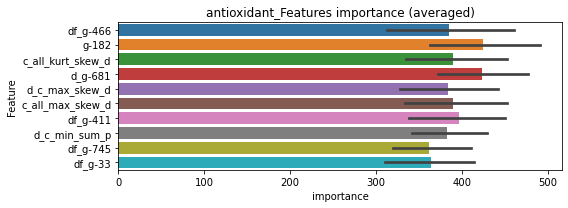

len(train_index) : 2811
len(valid_index) : 937
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0938203	valid_1's binary_logloss: 0.127153
[2000]	training's binary_logloss: 0.0510343	valid_1's binary_logloss: 0.0851339
[3000]	training's binary_logloss: 0.0348929	valid_1's binary_logloss: 0.0692833
[4000]	training's binary_logloss: 0.026333	valid_1's binary_logloss: 0.0605691
[5000]	training's binary_logloss: 0.0211344	valid_1's binary_logloss: 0.0551856
[6000]	training's binary_logloss: 0.017583	valid_1's binary_logloss: 0.0515344
[7000]	training's binary_logloss: 0.0150703	valid_1's binary_logloss: 0.0487894
Early stopping, best iteration is:
[7628]	training's binary_logloss: 0.0138193	valid_1's binary_logloss: 0.0472473


len(train_index) : 2811
len(valid_index) : 937
================================= fold 2/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.093053	valid_1's binary_logloss: 0.12966
[2000]	training's binary_logloss: 0.0504406	valid_1's binary_logloss: 0.0879754
[3000]	training's binary_logloss: 0.034387	valid_1's binary_logloss: 0.0721786
[4000]	training's binary_logloss: 0.0258762	valid_1's binary_logloss: 0.06359
[5000]	training's binary_logloss: 0.020722	valid_1's binary_logloss: 0.05804
[6000]	training's binary_logloss: 0.0172538	valid_1's binary_logloss: 0.054316
[7000]	training's binary_logloss: 0.014804	valid_1's binary_logloss: 0.0517765
Early stopping, best iteration is:
[7968]	training's binary_logloss: 0.0130266	valid_1's binary_logloss: 0.0496781


len(train_index) : 2811
len(valid_index) : 937
================================= fold 3/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0959965	valid_1's binary_logloss: 0.124791
[2000]	training's binary_logloss: 0.0523657	valid_1's binary_logloss: 0.0804282
[3000]	training's binary_logloss: 0.0358156	valid_1's binary_logloss: 0.0621384
[4000]	training's binary_logloss: 0.0270525	valid_1's binary_logloss: 0.0527879
[5000]	training's binary_logloss: 0.0216979	valid_1's binary_logloss: 0.0469315
[6000]	training's binary_logloss: 0.0180831	valid_1's binary_logloss: 0.0426128
[7000]	training's binary_logloss: 0.0154843	valid_1's binary_logloss: 0.0397315
[8000]	training's binary_logloss: 0.0135617	valid_1's binary_logloss: 0.0374173
[9000]	training's binary_logloss: 0.0120589	valid_1's binary_logloss: 0.0356408
[10000]	training's binary_logloss: 0.0108765	valid_1's binary_logloss: 0.0342542
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0108765	valid_1's binary_logloss: 0.0342542


len(train_index) : 2811
len(valid_index) : 937
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0951244	valid_1's binary_logloss: 0.124613
[2000]	training's binary_logloss: 0.0518685	valid_1's binary_logloss: 0.0824152
[3000]	training's binary_logloss: 0.0354452	valid_1's binary_logloss: 0.0664743
[4000]	training's binary_logloss: 0.0267416	valid_1's binary_logloss: 0.0578463
[5000]	training's binary_logloss: 0.021438	valid_1's binary_logloss: 0.0521085
[6000]	training's binary_logloss: 0.01784	valid_1's binary_logloss: 0.0483557
[7000]	training's binary_logloss: 0.015291	valid_1's binary_logloss: 0.0454704
[8000]	training's binary_logloss: 0.0134078	valid_1's binary_logloss: 0.0434146
Early stopping, best iteration is:
[8234]	training's binary_logloss: 0.013036	valid_1's binary_logloss: 0.0429893


antioxidant logloss: 0.04354451465992553
antioxidant is unpredictable(><)!
antiprotozoal, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000417815	valid_1's binary_logloss: 0.00357081
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000418203	valid_1's binary_logloss: 0.0053905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000428433	valid_1's binary_logloss: 0.00158723
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000438563	valid_1's binary_logloss: 0.00620361


y_Threshold: 0.0031520, Threshold: 0.0113705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0113705, conf_0:0.00796, conf_1:0.01478
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_1: 0.0413705
threshold: 0.0413705, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000403012	valid_1's binary_logloss: 0.00280738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000409263	valid_1's binary_logloss: 0.00424101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000405533	valid_1's binary_logloss: 0.00146298
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000417418	valid_1's binary_logloss: 0.00519325


y_Threshold: 0.0328840, Threshold: 0.0413705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0413705, conf_0:0.03310, conf_1:0.04964
threshold: 0.0413705, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000403012	valid_1's binary_logloss: 0.00280738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000409263	valid_1's binary_logloss: 0.00424101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000405533	valid_1's binary_logloss: 0.00146298
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000417418	valid_1's binary_logloss: 0.00519325


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0328840, Threshold: 0.0413705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0413705, conf_0:0.03723, conf_1:0.04551
threshold: 0.0413705, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


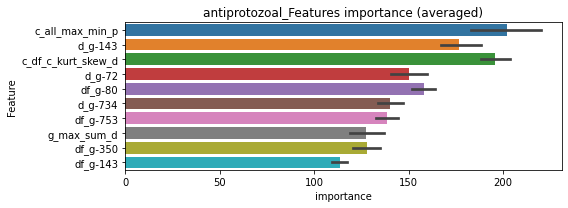

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000402757	valid_1's binary_logloss: 0.00245182
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000400839	valid_1's binary_logloss: 0.00244519


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000421122	valid_1's binary_logloss: 0.00355489


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000413358	valid_1's binary_logloss: 0.00128561
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000413358	valid_1's binary_logloss: 0.00128561


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000418582	valid_1's binary_logloss: 0.00541574


antiprotozoal logloss: 0.003176738743043914
antiviral, len(trt): 23, len(othr): 3284
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000306219	valid_1's binary_logloss: 0.00233665
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000315179	valid_1's binary_logloss: 0.000983663
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000311016	valid_1's binary_logloss: 0.001009
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016440, Threshold: 0.0047377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0047377, conf_0:0.00332, conf_1:0.00616
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_1: 0.0347377


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000310787	valid_1's binary_logloss: 0.00219868


threshold: 0.0347377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000303484	valid_1's binary_logloss: 0.00226264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000301279	valid_1's binary_logloss: 0.00086133
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000304953	valid_1's binary_logloss: 0.00225575
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0400822, Threshold: 0.0347377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00097
Num_p_label: 10.0, Expected: 3.8, Threshold: 0.0347377, conf_0:0.02779, conf_1:0.04169
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_1: 0.0647377


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000301935	valid_1's binary_logloss: 0.00209366


threshold: 0.0647377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000303484	valid_1's binary_logloss: 0.00226264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000301279	valid_1's binary_logloss: 0.00086133
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000304953	valid_1's binary_logloss: 0.00225575
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0400822, Threshold: 0.0647377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0005023 Vs.target_rate: 0.00097
Num_p_label: 2.0, Expected: 3.8, Threshold: 0.0647377, conf_0:0.05826, conf_1:0.07121


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000301935	valid_1's binary_logloss: 0.00209366


threshold: 0.0647377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


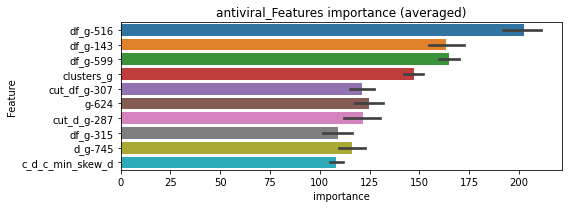

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000300544	valid_1's binary_logloss: 0.00126585


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000300634	valid_1's binary_logloss: 0.000643378
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000300634	valid_1's binary_logloss: 0.000643378


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000301442	valid_1's binary_logloss: 0.000938978
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000301442	valid_1's binary_logloss: 0.000938978


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000298658	valid_1's binary_logloss: 0.00117079


antiviral logloss: 0.0010047491188444168
apoptosis_stimulant, len(trt): 49, len(othr): 3284
target_rate: 0.0020576 → Adj_target_rate: 0.0022954


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000862621	valid_1's binary_logloss: 0.0246164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000525137	valid_1's binary_logloss: 0.0199264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000504499	valid_1's binary_logloss: 0.00189393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000559861	valid_1's binary_logloss: 0.0128709


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0038700, Threshold: 0.0516404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, Expected: 8.2, Threshold: 0.0516404, conf_0:0.03615, conf_1:0.06713
Num_p_label: 31.0, Expected: 8.2, Adj_threshold_1: 0.0816404
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_2: 0.1116404
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_3: 0.1416404
threshold: 0.1416404, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000592317	valid_1's binary_logloss: 0.0231096
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000561713	valid_1's binary_logloss: 0.0187264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000505169	valid_1's binary_logloss: 0.00210109
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000557375	valid_1's binary_logloss: 0.013101


y_Threshold: 0.0166178, Threshold: 0.1416404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0118031 Vs.target_rate: 0.00206
Num_p_label: 47.0, Expected: 8.2, Threshold: 0.1416404, conf_0:0.11331, conf_1:0.16997
Num_p_label: 36.0, Expected: 8.2, Adj_threshold_1: 0.1716404
Num_p_label: 32.0, Expected: 8.2, Adj_threshold_2: 0.2016404
Num_p_label: 28.0, Expected: 8.2, Adj_threshold_3: 0.2316404
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_4: 0.2616404
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_5: 0.2916404
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_6: 0.3216404
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_7: 0.3516404
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_8: 0.3816404
threshold: 0.3816404, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000491576	valid_1's binary_logloss: 0.0134185
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000543148	valid_1's binary_logloss: 0.0200518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000510232	valid_1's binary_logloss: 0.0123087
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000475569	valid_1's binary_logloss: 0.0167723


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0155267, Threshold: 0.3816404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0052737 Vs.target_rate: 0.00206
Num_p_label: 21.0, Expected: 8.2, Threshold: 0.3816404, conf_0:0.34348, conf_1:0.41980
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_1: 0.4116404
threshold: 0.4116404, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


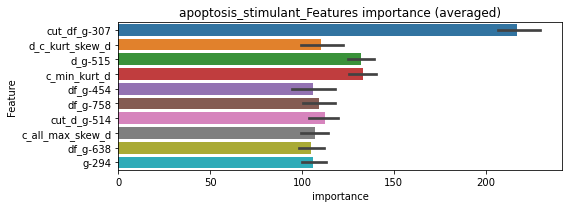

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000498591	valid_1's binary_logloss: 0.00678984


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0010481	valid_1's binary_logloss: 0.0174796
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000513389	valid_1's binary_logloss: 0.0141462


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000516041	valid_1's binary_logloss: 0.00658277


apoptosis_stimulant logloss: 0.011253217118314533
aromatase_inhibitor, len(trt): 47, len(othr): 3285
target_rate: 0.0019736 → Adj_target_rate: 0.0022155


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00051386	valid_1's binary_logloss: 0.015369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000516106	valid_1's binary_logloss: 0.0167593
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000605075	valid_1's binary_logloss: 0.00865664
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000493121	valid_1's binary_logloss: 0.00545652


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037195, Threshold: 0.0118336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, Expected: 7.9, Threshold: 0.0118336, conf_0:0.00828, conf_1:0.01538
Num_p_label: 10.0, Expected: 7.9, Adj_threshold_1: 0.0418336
threshold: 0.0418336, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000565906	valid_1's binary_logloss: 0.0161302
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000590074	valid_1's binary_logloss: 0.0198864
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000518769	valid_1's binary_logloss: 0.0092998
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000482737	valid_1's binary_logloss: 0.00413297


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0126361, Threshold: 0.0418336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0042692 Vs.target_rate: 0.00197
Num_p_label: 17.0, Expected: 7.9, Threshold: 0.0418336, conf_0:0.03347, conf_1:0.05020
threshold: 0.0418336, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000509244	valid_1's binary_logloss: 0.0156106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000495514	valid_1's binary_logloss: 0.00753214
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000486122	valid_1's binary_logloss: 0.00649245
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000485669	valid_1's binary_logloss: 0.00536855


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0188935, Threshold: 0.0418336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0040181 Vs.target_rate: 0.00197
Num_p_label: 16.0, Expected: 7.9, Threshold: 0.0418336, conf_0:0.03765, conf_1:0.04602
threshold: 0.0418336, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


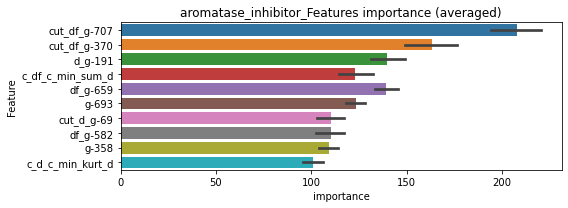

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000550348	valid_1's binary_logloss: 0.0121682


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000549443	valid_1's binary_logloss: 0.00730582


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000507589	valid_1's binary_logloss: 0.00589788


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000496542	valid_1's binary_logloss: 0.00568374


aromatase_inhibitor logloss: 0.007763920409071238
atm_kinase_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000154	valid_1's binary_logloss: 0.000260536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000157972	valid_1's binary_logloss: 0.000565774
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000153118	valid_1's binary_logloss: 0.000182664
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003764, Threshold: 0.0013820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0013820, conf_0:0.00097, conf_1:0.00180
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.0313820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0613820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0913820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1213820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1513820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.1813820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.2113820
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.2413820


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000154379	valid_1's binary_logloss: 0.000494978


threshold: 0.2413820, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000146004	valid_1's binary_logloss: 0.000328943
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000143719	valid_1's binary_logloss: 0.00072875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000145706	valid_1's binary_logloss: 0.000149571
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0588521, Threshold: 0.2413820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.2413820, conf_0:0.19311, conf_1:0.28966
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.2713820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.3013820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.3313820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.3613820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_5: 0.3913820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.4213820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.4513820
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.4813820
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.5113820


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000145588	valid_1's binary_logloss: 0.00132842


Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.5413820
threshold: 0.5413820, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000146004	valid_1's binary_logloss: 0.000328943
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000143719	valid_1's binary_logloss: 0.00072875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000145706	valid_1's binary_logloss: 0.000149571
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0588521, Threshold: 0.5413820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.5413820, conf_0:0.48724, conf_1:0.59552
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.5713820
threshold: 0.5713820, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000145588	valid_1's binary_logloss: 0.00132842


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


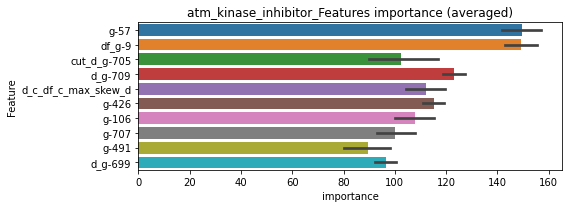

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148808	valid_1's binary_logloss: 0.000223608


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1122]	training's binary_logloss: 0.000146717	valid_1's binary_logloss: 0.000220939
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148109	valid_1's binary_logloss: 0.000330409


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.000145259	valid_1's binary_logloss: 0.000326484
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014846	valid_1's binary_logloss: 0.000157546
Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.000146148	valid_1's binary_logloss: 0.000155059


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148832	valid_1's binary_logloss: 0.00046763


atm_kinase_inhibitor logloss: 0.00029069853290414994


Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000145799	valid_1's binary_logloss: 0.000460308


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000177889	valid_1's binary_logloss: 0.000733222
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000180515	valid_1's binary_logloss: 0.00132257
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000182947	valid_1's binary_logloss: 0.000193594
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005303, Threshold: 0.0016380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0016380, conf_0:0.00115, conf_1:0.00213
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_1: 0.0316380


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000178526	valid_1's binary_logloss: 0.00022075


threshold: 0.0316380, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000172479	valid_1's binary_logloss: 0.000221565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00017687	valid_1's binary_logloss: 0.00160816
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000171815	valid_1's binary_logloss: 0.00018163
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0630623, Threshold: 0.0316380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.0316380, conf_0:0.02531, conf_1:0.03797
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.0616380
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0916380
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_3: 0.1216380
threshold: 0.1216380, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000170451	valid_1's binary_logloss: 0.000189606


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000172479	valid_1's binary_logloss: 0.000221565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00017687	valid_1's binary_logloss: 0.00160816
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000171815	valid_1's binary_logloss: 0.00018163
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0630623, Threshold: 0.1216380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.1216380, conf_0:0.10947, conf_1:0.13380
threshold: 0.1216380, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000170451	valid_1's binary_logloss: 0.000189606


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


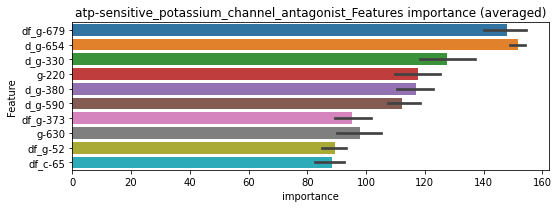

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000171841	valid_1's binary_logloss: 0.000216849
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000171654	valid_1's binary_logloss: 0.000216621


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000172911	valid_1's binary_logloss: 0.000694657
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00017212	valid_1's binary_logloss: 0.000192521
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000171082	valid_1's binary_logloss: 0.000191447


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


atp-sensitive_potassium_channel_antagonist logloss: 0.0003249717578657185


Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000173493	valid_1's binary_logloss: 0.000197274


atp_synthase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000275399	valid_1's binary_logloss: 0.00106002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000267059	valid_1's binary_logloss: 0.000537844
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000267358	valid_1's binary_logloss: 0.000534944
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013214, Threshold: 0.0103970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0103970, conf_0:0.00728, conf_1:0.01352
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0403970
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0703970
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.1003970


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000267942	valid_1's binary_logloss: 0.000761697


Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.1303970
threshold: 0.1303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000256929	valid_1's binary_logloss: 0.000911263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000254574	valid_1's binary_logloss: 0.000496534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000255671	valid_1's binary_logloss: 0.000366
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1495911, Threshold: 0.1303970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0055249 Vs.target_rate: 0.00050
Num_p_label: 22.0, Expected: 2.0, Threshold: 0.1303970, conf_0:0.10432, conf_1:0.15648
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_1: 0.1603970
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_2: 0.1903970
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.2203970
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_4: 0.2503970
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_5: 0.2803970
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_6: 0.3103970


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000252233	valid_1's binary_logloss: 0.000597943


Num_p_label: 9.0, Expected: 2.0, Adj_threshold_7: 0.3403970
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_8: 0.3703970
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.4003970
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.4303970
threshold: 0.4303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000256929	valid_1's binary_logloss: 0.000911263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000254574	valid_1's binary_logloss: 0.000496534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000255671	valid_1's binary_logloss: 0.000366
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1495911, Threshold: 0.4303970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.4303970, conf_0:0.38736, conf_1:0.47344
threshold: 0.4303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000252233	valid_1's binary_logloss: 0.000597943


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


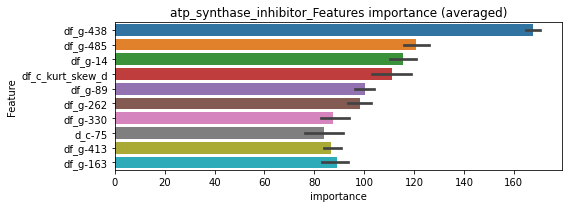

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000257261	valid_1's binary_logloss: 0.00070062
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000264424	valid_1's binary_logloss: 0.000509029
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000263915	valid_1's binary_logloss: 0.000392043


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


atp_synthase_inhibitor logloss: 0.0005668666758058954


Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000259424	valid_1's binary_logloss: 0.000665774


atpase_inhibitor, len(trt): 97, len(othr): 3274
target_rate: 0.0040732 → Adj_target_rate: 0.0041016


selected negative label: 3274


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0636217	valid_1's binary_logloss: 0.126123
Early stopping, best iteration is:
[1290]	training's binary_logloss: 0.0525327	valid_1's binary_logloss: 0.122191
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0661911	valid_1's binary_logloss: 0.111413
Early stopping, best iteration is:
[1836]	training's binary_logloss: 0.0405669	valid_1's binary_logloss: 0.102311
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0702379	valid_1's binary_logloss: 0.0909186
[2000]	training's binary_logloss: 0.0396689	valid_1's binary_logloss: 0.0774491
[3000]	training's binary_logloss: 0.0265492	valid_1's binary_logloss: 0.0728643
[4000]	training's binary_logloss: 0.0196259	valid_1's binary_logloss: 0.0706113
Early stopping, best iteration is:
[3978]	training's binary_logloss: 0.0197303	valid_1's binary_logloss: 0.0705

1 / 3, AUC score:0.985, PR-AUC:0.967
y_Threshold: 0.0486723, Threshold: 0.0789698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 208 → Positive_corect_labels: 616/3720
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, Expected: 16.2, Threshold: 0.0789698, conf_0:0.05528, conf_1:0.10266
Num_p_label: 6.0, Expected: 16.2, Adj_threshold_1: 0.1089698
threshold: 0.1089698, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 616.0/3720, y_label_rate: 0.1655914
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0485989	valid_1's binary_logloss: 0.0843465
[2000]	training's binary_logloss: 0.0270643	valid_1's binary_logloss: 0.0722509
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0238723	valid_1's binary_logloss: 0.0707163
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0497179	valid_1's binary_logloss: 0.0811238
[2000]	training's binary_logloss: 0.0277437	valid_1's binary_logloss: 0.0690203
Early stopping, best iteration is:
[2109]	training's binary_logloss: 0.0263829	valid_1's binary_logloss: 0.0684473
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0513405	valid_1's binary_logloss: 0.0708258
[2000]	training's binary_logloss: 0.0284368	valid_1's binary_logloss: 0.0578941
[3000]	training's binary_logloss: 0.0189831	valid_1's binary_logloss: 0.0528098
Early stopping, best iterat

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0469817, Threshold: 0.1089698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 598.0/3684
p_label_rate: 0.0012557 Vs.target_rate: 0.00407
Num_p_label: 5.0, Expected: 16.2, Threshold: 0.1089698, conf_0:0.08718, conf_1:0.13076
threshold: 0.1089698, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 598.0/3684, y_label_rate: 0.1623236
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0392335	valid_1's binary_logloss: 0.0730133
[2000]	training's binary_logloss: 0.0214314	valid_1's binary_logloss: 0.0620299
Early stopping, best iteration is:
[2854]	training's binary_logloss: 0.0151315	valid_1's binary_logloss: 0.058745
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0417022	valid_1's binary_logloss: 0.0607516
[2000]	training's binary_logloss: 0.0227626	valid_1's binary_logloss: 0.0481121
[3000]	training's binary_logloss: 0.015206	valid_1's binary_logloss: 0.0438913
[4000]	training's binary_logloss: 0.0113	valid_1's binary_logloss: 0.041999
Early stopping, best iteration is:
[4165]	training's binary_logloss: 0.010844	valid_1's binary_logloss: 0.0417934
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0431187	valid_1's binary_logloss: 0.0548571
[2000]	training's binary_logloss: 

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0360111, Threshold: 0.1089698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 591.0/3670
p_label_rate: 0.0005023 Vs.target_rate: 0.00407
Num_p_label: 2.0, Expected: 16.2, Threshold: 0.1089698, conf_0:0.09807, conf_1:0.11987
threshold: 0.1089698, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 591.0/3670, y_label_rate: 0.1610354


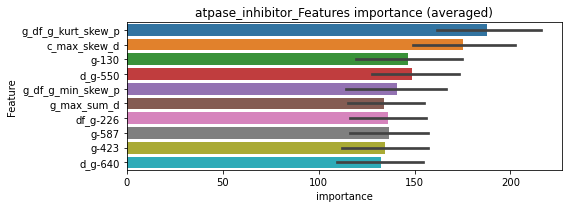

len(train_index) : 2752
len(valid_index) : 918
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0508788	valid_1's binary_logloss: 0.0699237
[2000]	training's binary_logloss: 0.0294873	valid_1's binary_logloss: 0.0533511
[3000]	training's binary_logloss: 0.0204022	valid_1's binary_logloss: 0.0475723
[4000]	training's binary_logloss: 0.0154311	valid_1's binary_logloss: 0.0448902
Early stopping, best iteration is:
[4359]	training's binary_logloss: 0.0141568	valid_1's binary_logloss: 0.044214


len(train_index) : 2752
len(valid_index) : 918
================================= fold 2/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0516699	valid_1's binary_logloss: 0.0661399
[2000]	training's binary_logloss: 0.0298625	valid_1's binary_logloss: 0.0490079
[3000]	training's binary_logloss: 0.0208006	valid_1's binary_logloss: 0.0430289
[4000]	training's binary_logloss: 0.0157474	valid_1's binary_logloss: 0.0403234
Early stopping, best iteration is:
[4447]	training's binary_logloss: 0.0141777	valid_1's binary_logloss: 0.039526


len(train_index) : 2753
len(valid_index) : 917
================================= fold 3/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0522584	valid_1's binary_logloss: 0.0677053
[2000]	training's binary_logloss: 0.0301026	valid_1's binary_logloss: 0.0498751
[3000]	training's binary_logloss: 0.020879	valid_1's binary_logloss: 0.0435468
[4000]	training's binary_logloss: 0.0157834	valid_1's binary_logloss: 0.0405258
[5000]	training's binary_logloss: 0.0126077	valid_1's binary_logloss: 0.0387713
[6000]	training's binary_logloss: 0.0104688	valid_1's binary_logloss: 0.0375315
Early stopping, best iteration is:
[6205]	training's binary_logloss: 0.0101098	valid_1's binary_logloss: 0.0372951


len(train_index) : 2753
len(valid_index) : 917
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0507052	valid_1's binary_logloss: 0.0690434
[2000]	training's binary_logloss: 0.0293256	valid_1's binary_logloss: 0.0522528
[3000]	training's binary_logloss: 0.0204456	valid_1's binary_logloss: 0.0460697
[4000]	training's binary_logloss: 0.0154608	valid_1's binary_logloss: 0.0427683
Early stopping, best iteration is:
[4274]	training's binary_logloss: 0.0144503	valid_1's binary_logloss: 0.0420192


atpase_inhibitor logloss: 0.040764187750331464
atpase_inhibitor is unpredictable(><)!
atr_kinase_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034189	valid_1's binary_logloss: 0.000993679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00033331	valid_1's binary_logloss: 0.00224811
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000340941	valid_1's binary_logloss: 0.000811743
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018670, Threshold: 0.0077848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0077848, conf_0:0.00545, conf_1:0.01012
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_1: 0.0377848
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0677848


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000337912	valid_1's binary_logloss: 0.00300145


threshold: 0.0677848, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000328706	valid_1's binary_logloss: 0.000709372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000316595	valid_1's binary_logloss: 0.00240219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000329457	valid_1's binary_logloss: 0.000596903
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0695553, Threshold: 0.0677848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00080
Num_p_label: 17.0, Expected: 3.2, Threshold: 0.0677848, conf_0:0.05423, conf_1:0.08134
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_1: 0.0977848
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_2: 0.1277848
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_3: 0.1577848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_4: 0.1877848


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000323186	valid_1's binary_logloss: 0.0026407


Num_p_label: 10.0, Expected: 3.2, Adj_threshold_5: 0.2177848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_6: 0.2477848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_7: 0.2777848
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_8: 0.3077848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_9: 0.3377848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_10: 0.3677848
threshold: 0.3677848, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000328706	valid_1's binary_logloss: 0.000709372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000316595	valid_1's binary_logloss: 0.00240219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000329457	valid_1's binary_logloss: 0.000596903
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0695553, Threshold: 0.3677848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00080
Num_p_label: 8.0, Expected: 3.2, Threshold: 0.3677848, conf_0:0.33101, conf_1:0.40456
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_1: 0.3977848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_2: 0.4277848
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_3: 0.4577848


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000323186	valid_1's binary_logloss: 0.0026407


threshold: 0.4577848, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


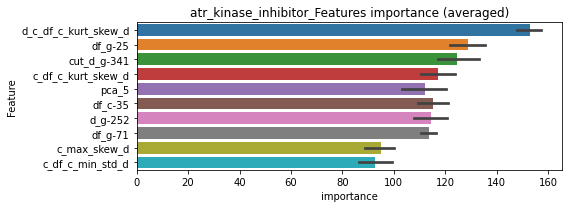

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000320299	valid_1's binary_logloss: 0.000749814


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000322478	valid_1's binary_logloss: 0.00225709


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000333935	valid_1's binary_logloss: 0.000611316


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000325236	valid_1's binary_logloss: 0.00240642


atr_kinase_inhibitor logloss: 0.0015059267250632988
aurora_kinase_inhibitor, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3276


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.103505	valid_1's binary_logloss: 0.16876
[2000]	training's binary_logloss: 0.0569524	valid_1's binary_logloss: 0.127895
[3000]	training's binary_logloss: 0.0385713	valid_1's binary_logloss: 0.111458
Early stopping, best iteration is:
[3241]	training's binary_logloss: 0.0356988	valid_1's binary_logloss: 0.109127
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.105937	valid_1's binary_logloss: 0.154449
[2000]	training's binary_logloss: 0.0585517	valid_1's binary_logloss: 0.108283
[3000]	training's binary_logloss: 0.0394932	valid_1's binary_logloss: 0.0893214
[4000]	training's binary_logloss: 0.0295183	valid_1's binary_logloss: 0.0791915
[5000]	training's binary_logloss: 0.0234552	valid_1's binary_logloss: 0.0723766
[6000]	training's binary_logloss: 0.0194014	valid_1's binary_logloss: 0.0679539
Early stopping, best iteration is:
[6752]	training's

1 / 3, AUC score:0.989, PR-AUC:0.978
y_Threshold: 0.0760229, Threshold: 0.2615644, pos_neg_ratio: 0.8000000
Remove_noisy_data: 178 → Positive_corect_labels: 632/3753
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.2615644, conf_0:0.18310, conf_1:0.34003
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_1: 0.2915644
Num_p_label: 18.0, Expected: 16.1, Adj_threshold_2: 0.3215644
threshold: 0.3215644, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 632.0/3753, y_label_rate: 0.1683986
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0937357	valid_1's binary_logloss: 0.146028
[2000]	training's binary_logloss: 0.0498597	valid_1's binary_logloss: 0.101432
[3000]	training's binary_logloss: 0.0330977	valid_1's binary_logloss: 0.0847243
[4000]	training's binary_logloss: 0.0246351	valid_1's binary_logloss: 0.0750011
[5000]	training's binary_logloss: 0.019565	valid_1's binary_logloss: 0.0690397
[6000]	training's binary_logloss: 0.0162433	valid_1's binary_logloss: 0.0647916
Early stopping, best iteration is:
[6215]	training's binary_logloss: 0.0156792	valid_1's binary_logloss: 0.0641497
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0928601	valid_1's binary_logloss: 0.152146
[2000]	training's binary_logloss: 0.0490127	valid_1's binary_logloss: 0.107164
[3000]	training's binary_logloss: 0.0326265	valid_1's binary_logloss: 0.0883482
Early stopping, best iteration is:
[3449]	traini

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.1149400, Threshold: 0.3215644, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 620.0/3729
p_label_rate: 0.0130588 Vs.target_rate: 0.00403
Num_p_label: 52.0, Expected: 16.1, Threshold: 0.3215644, conf_0:0.25725, conf_1:0.38588
Num_p_label: 42.0, Expected: 16.1, Adj_threshold_1: 0.3515644
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_2: 0.3815644
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_3: 0.4115644
threshold: 0.4115644, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 620.0/3729, y_label_rate: 0.1662644
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0906926	valid_1's binary_logloss: 0.139849
[2000]	training's binary_logloss: 0.0472768	valid_1's binary_logloss: 0.0964433
[3000]	training's binary_logloss: 0.0312905	valid_1's binary_logloss: 0.0788308
[4000]	training's binary_logloss: 0.023302	valid_1's binary_logloss: 0.0693188
[5000]	training's binary_logloss: 0.0185944	valid_1's binary_logloss: 0.0639284
[6000]	training's binary_logloss: 0.0153915	valid_1's binary_logloss: 0.059765
Early stopping, best iteration is:
[6013]	training's binary_logloss: 0.0153486	valid_1's binary_logloss: 0.0596758
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0929091	valid_1's binary_logloss: 0.126397
[2000]	training's binary_logloss: 0.048938	valid_1's binary_logloss: 0.0813751
[3000]	training's binary_logloss: 0.0324436	valid_1's binary_logloss: 0.0640013
[4000]	training's binary_logloss: 0.0241003	vali

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.1087469, Threshold: 0.4115644, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 615.0/3719
p_label_rate: 0.0082873 Vs.target_rate: 0.00403
Num_p_label: 33.0, Expected: 16.1, Threshold: 0.4115644, conf_0:0.37041, conf_1:0.45272
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_1: 0.4415644
threshold: 0.4415644, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 615.0/3719, y_label_rate: 0.1653670


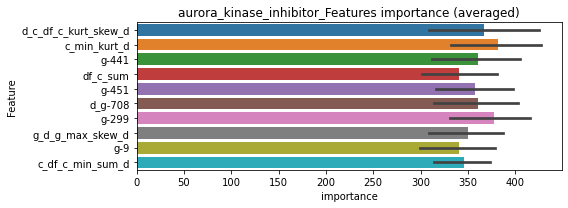

len(train_index) : 2789
len(valid_index) : 930
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.124311	valid_1's binary_logloss: 0.168068
[2000]	training's binary_logloss: 0.0676022	valid_1's binary_logloss: 0.113207
[3000]	training's binary_logloss: 0.0455643	valid_1's binary_logloss: 0.0909484
[4000]	training's binary_logloss: 0.0342879	valid_1's binary_logloss: 0.0789858
[5000]	training's binary_logloss: 0.0274675	valid_1's binary_logloss: 0.0719999
[6000]	training's binary_logloss: 0.0228293	valid_1's binary_logloss: 0.0668295
[7000]	training's binary_logloss: 0.019546	valid_1's binary_logloss: 0.0630657
Early stopping, best iteration is:
[7072]	training's binary_logloss: 0.0193236	valid_1's binary_logloss: 0.062698


len(train_index) : 2789
len(valid_index) : 930
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.122143	valid_1's binary_logloss: 0.183741
[2000]	training's binary_logloss: 0.0661564	valid_1's binary_logloss: 0.127054
[3000]	training's binary_logloss: 0.0447	valid_1's binary_logloss: 0.10205
[4000]	training's binary_logloss: 0.0335944	valid_1's binary_logloss: 0.0891547
[5000]	training's binary_logloss: 0.0268426	valid_1's binary_logloss: 0.0810527
[6000]	training's binary_logloss: 0.022295	valid_1's binary_logloss: 0.0753038
Early stopping, best iteration is:
[6666]	training's binary_logloss: 0.0200342	valid_1's binary_logloss: 0.072326


len(train_index) : 2789
len(valid_index) : 930
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.125351	valid_1's binary_logloss: 0.167228
[2000]	training's binary_logloss: 0.0677364	valid_1's binary_logloss: 0.107656
[3000]	training's binary_logloss: 0.045745	valid_1's binary_logloss: 0.0831009
[4000]	training's binary_logloss: 0.0342984	valid_1's binary_logloss: 0.0699934
[5000]	training's binary_logloss: 0.027382	valid_1's binary_logloss: 0.0616958
[6000]	training's binary_logloss: 0.0227901	valid_1's binary_logloss: 0.0559485
[7000]	training's binary_logloss: 0.0195165	valid_1's binary_logloss: 0.0517401
[8000]	training's binary_logloss: 0.0170143	valid_1's binary_logloss: 0.0484105
[9000]	training's binary_logloss: 0.0151121	valid_1's binary_logloss: 0.0458791
[10000]	training's binary_logloss: 0.013591	valid_1's binary_logloss: 0.0438334
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.013591	valid_1's binary_logloss: 0.0438334


len(train_index) : 2790
len(valid_index) : 929
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.125967	valid_1's binary_logloss: 0.161272
[2000]	training's binary_logloss: 0.0686061	valid_1's binary_logloss: 0.104949
[3000]	training's binary_logloss: 0.0461563	valid_1's binary_logloss: 0.0815659
[4000]	training's binary_logloss: 0.0345237	valid_1's binary_logloss: 0.0687059
[5000]	training's binary_logloss: 0.0275282	valid_1's binary_logloss: 0.0612424
[6000]	training's binary_logloss: 0.0228345	valid_1's binary_logloss: 0.0560064
[7000]	training's binary_logloss: 0.0194855	valid_1's binary_logloss: 0.0522772
[8000]	training's binary_logloss: 0.0169929	valid_1's binary_logloss: 0.0492838
[9000]	training's binary_logloss: 0.0150791	valid_1's binary_logloss: 0.0470196
[10000]	training's binary_logloss: 0.0135661	valid_1's binary_logloss: 0.0452607
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0135661	valid_1's binary_logloss: 0.0452607


aurora_kinase_inhibitor logloss: 0.056032453241807424
aurora_kinase_inhibitor is unpredictable(><)!
autotaxin_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00016207	valid_1's binary_logloss: 0.000240223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000165465	valid_1's binary_logloss: 0.0015519
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000166417	valid_1's binary_logloss: 0.000202617
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005543, Threshold: 0.0042101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0042101, conf_0:0.00295, conf_1:0.00547
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0342101
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0642101
threshold: 0.0642101, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000162438	valid_1's binary_logloss: 0.000263095


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000146026	valid_1's binary_logloss: 0.000933698
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000148291	valid_1's binary_logloss: 0.000176878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000150417	valid_1's binary_logloss: 0.000158003
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1261025, Threshold: 0.0642101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0107986 Vs.target_rate: 0.00025
Num_p_label: 43.0, Expected: 1.0, Threshold: 0.0642101, conf_0:0.05137, conf_1:0.07705
Num_p_label: 37.0, Expected: 1.0, Adj_threshold_1: 0.0942101
Num_p_label: 32.0, Expected: 1.0, Adj_threshold_2: 0.1242101
Num_p_label: 29.0, Expected: 1.0, Adj_threshold_3: 0.1542101
Num_p_label: 28.0, Expected: 1.0, Adj_threshold_4: 0.1842101
Num_p_label: 22.0, Expected: 1.0, Adj_threshold_5: 0.2142101
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_6: 0.2442101
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_7: 0.2742101
Num_p_label: 16.0, Expected: 1.0, Adj_threshold_8: 0.3042101
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_9: 0.3342101
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_10: 0.3642101


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000148245	valid_1's binary_logloss: 0.000166002


threshold: 0.3642101, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000146026	valid_1's binary_logloss: 0.000933698
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000148291	valid_1's binary_logloss: 0.000176878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000150417	valid_1's binary_logloss: 0.000158003
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1261025, Threshold: 0.3642101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00025
Num_p_label: 14.0, Expected: 1.0, Threshold: 0.3642101, conf_0:0.32779, conf_1:0.40063
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_1: 0.3942101
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_2: 0.4242101
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_3: 0.4542101
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_4: 0.4842101
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_5: 0.5142101
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_6: 0.5442101
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.5742101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.6042101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.6342101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_10: 0.6642101


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000148245	valid_1's binary_logloss: 0.000166002


threshold: 0.6642101, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


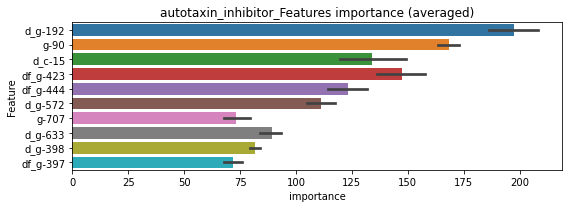

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150529	valid_1's binary_logloss: 0.000517176


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1152]	training's binary_logloss: 0.000147894	valid_1's binary_logloss: 0.000512354
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152642	valid_1's binary_logloss: 0.000183569
Early stopping, best iteration is:
[1125]	training's binary_logloss: 0.000150789	valid_1's binary_logloss: 0.000181367


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152753	valid_1's binary_logloss: 0.000158622


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1154]	training's binary_logloss: 0.000149927	valid_1's binary_logloss: 0.00015576
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152892	valid_1's binary_logloss: 0.000171262
Early stopping, best iteration is:
[1039]	training's binary_logloss: 0.000152224	valid_1's binary_logloss: 0.000170515


autotaxin_inhibitor logloss: 0.0002550672374270517
bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3282
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000724653	valid_1's binary_logloss: 0.0326461
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00117698	valid_1's binary_logloss: 0.0300991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000550522	valid_1's binary_logloss: 0.00380268
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000628515	valid_1's binary_logloss: 0.0185971


1 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0072684, Threshold: 0.0240325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0240325, conf_0:0.01682, conf_1:0.03124
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_1: 0.0540325
threshold: 0.0540325, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3798, y_label_rate: 0.1716693
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000632017	valid_1's binary_logloss: 0.017125
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000534291	valid_1's binary_logloss: 0.0222518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000559558	valid_1's binary_logloss: 0.0170414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000695483	valid_1's binary_logloss: 0.0250899


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0313949, Threshold: 0.0540325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3788
p_label_rate: 0.0110497 Vs.target_rate: 0.00252
Num_p_label: 44.0, Expected: 10.0, Threshold: 0.0540325, conf_0:0.04323, conf_1:0.06484
Num_p_label: 25.0, Expected: 10.0, Adj_threshold_1: 0.0840325
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_2: 0.1140325
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_3: 0.1440325
threshold: 0.1440325, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3788, y_label_rate: 0.1708025
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000607169	valid_1's binary_logloss: 0.0180508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000914418	valid_1's binary_logloss: 0.028274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000607512	valid_1's binary_logloss: 0.0145562
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000516503	valid_1's binary_logloss: 0.00861982


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0315935, Threshold: 0.1440325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.1440325, conf_0:0.12963, conf_1:0.15844
threshold: 0.1440325, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3784, y_label_rate: 0.1704545


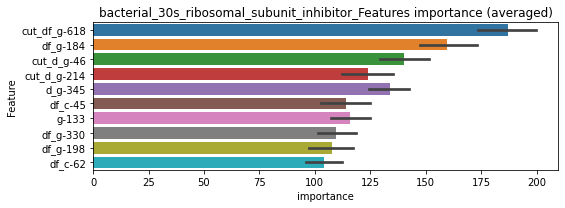

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000643323	valid_1's binary_logloss: 0.0145314


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000801422	valid_1's binary_logloss: 0.0187439
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000540764	valid_1's binary_logloss: 0.0116312


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.0007108	valid_1's binary_logloss: 0.0187678


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.015918574051845633
bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3282
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0862218	valid_1's binary_logloss: 0.138937
[2000]	training's binary_logloss: 0.0466952	valid_1's binary_logloss: 0.103117
[3000]	training's binary_logloss: 0.0313255	valid_1's binary_logloss: 0.0884078
[4000]	training's binary_logloss: 0.0234735	valid_1's binary_logloss: 0.080556
[5000]	training's binary_logloss: 0.0187461	valid_1's binary_logloss: 0.0759351
[6000]	training's binary_logloss: 0.0155886	valid_1's binary_logloss: 0.0724869
Early stopping, best iteration is:
[6747]	training's binary_logloss: 0.0138216	valid_1's binary_logloss: 0.0704892
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0900154	valid_1's binary_logloss: 0.124212
[2000]	training's binary_logloss: 0.0490541	valid_1's binary_logloss: 0.0857598
[3000]	training's binary_logloss: 0.0330028	valid_1's binary_logloss: 0.0703062
[4000]	training's binary_logloss: 0.0245932	val

1 / 3, AUC score:0.994, PR-AUC:0.986
y_Threshold: 0.0634759, Threshold: 0.1274149, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 640/3774
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.1274149, conf_0:0.08919, conf_1:0.16564
Num_p_label: 19.0, Expected: 13.4, Adj_threshold_1: 0.1574149
threshold: 0.1574149, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 640.0/3774, y_label_rate: 0.1695813
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0820939	valid_1's binary_logloss: 0.119789
[2000]	training's binary_logloss: 0.0432266	valid_1's binary_logloss: 0.0789015
[3000]	training's binary_logloss: 0.0287218	valid_1's binary_logloss: 0.0632327
[4000]	training's binary_logloss: 0.0214749	valid_1's binary_logloss: 0.0554136
[5000]	training's binary_logloss: 0.0171478	valid_1's binary_logloss: 0.0500848
[6000]	training's binary_logloss: 0.0142963	valid_1's binary_logloss: 0.0466198
Early stopping, best iteration is:
[6751]	training's binary_logloss: 0.012701	valid_1's binary_logloss: 0.0446591
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0818531	valid_1's binary_logloss: 0.122175
[2000]	training's binary_logloss: 0.0434794	valid_1's binary_logloss: 0.0818697
[3000]	training's binary_logloss: 0.0290866	valid_1's binary_logloss: 0.0658585
[4000]	training's binary_logloss: 0.0217527	va

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0956415, Threshold: 0.1574149, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 634.0/3762
p_label_rate: 0.0095429 Vs.target_rate: 0.00336
Num_p_label: 38.0, Expected: 13.4, Threshold: 0.1574149, conf_0:0.12593, conf_1:0.18890
Num_p_label: 24.0, Expected: 13.4, Adj_threshold_1: 0.1874149
Num_p_label: 12.0, Expected: 13.4, Adj_threshold_2: 0.2174149
threshold: 0.2174149, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 634.0/3762, y_label_rate: 0.1685274
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.081423	valid_1's binary_logloss: 0.10825
[2000]	training's binary_logloss: 0.0427202	valid_1's binary_logloss: 0.0701481
[3000]	training's binary_logloss: 0.02832	valid_1's binary_logloss: 0.0553733
[4000]	training's binary_logloss: 0.0212433	valid_1's binary_logloss: 0.0483475
[5000]	training's binary_logloss: 0.0169764	valid_1's binary_logloss: 0.0437716
[6000]	training's binary_logloss: 0.0141191	valid_1's binary_logloss: 0.0405581
[7000]	training's binary_logloss: 0.0120917	valid_1's binary_logloss: 0.0383193
[8000]	training's binary_logloss: 0.0105683	valid_1's binary_logloss: 0.0365044
Early stopping, best iteration is:
[8444]	training's binary_logloss: 0.0100111	valid_1's binary_logloss: 0.035757
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0793968	valid_1's binary_logloss: 0.117304
[2000]	training's binary_logloss: 0.0413449	valid_

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0902835, Threshold: 0.2174149, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 629.0/3752
p_label_rate: 0.0035158 Vs.target_rate: 0.00336
Num_p_label: 14.0, Expected: 13.4, Threshold: 0.2174149, conf_0:0.19567, conf_1:0.23916
threshold: 0.2174149, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 629.0/3752, y_label_rate: 0.1676439


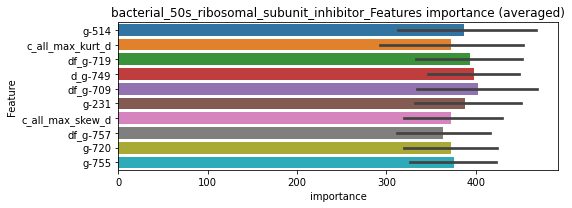

len(train_index) : 2814
len(valid_index) : 938
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.108811	valid_1's binary_logloss: 0.140096
[2000]	training's binary_logloss: 0.0590643	valid_1's binary_logloss: 0.090132
[3000]	training's binary_logloss: 0.0400952	valid_1's binary_logloss: 0.0707119
[4000]	training's binary_logloss: 0.0302177	valid_1's binary_logloss: 0.0604587
[5000]	training's binary_logloss: 0.0241757	valid_1's binary_logloss: 0.0540318
[6000]	training's binary_logloss: 0.0201305	valid_1's binary_logloss: 0.0496931
[7000]	training's binary_logloss: 0.0172591	valid_1's binary_logloss: 0.0464807
[8000]	training's binary_logloss: 0.015062	valid_1's binary_logloss: 0.0440903
[9000]	training's binary_logloss: 0.0133646	valid_1's binary_logloss: 0.0421072
Early stopping, best iteration is:
[9218]	training's binary_logloss: 0.0130538	valid_1's binary_logloss: 0.0417121


len(train_index) : 2814
len(valid_index) : 938
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.109106	valid_1's binary_logloss: 0.143499
[2000]	training's binary_logloss: 0.0593314	valid_1's binary_logloss: 0.09069
[3000]	training's binary_logloss: 0.040319	valid_1's binary_logloss: 0.0687532
[4000]	training's binary_logloss: 0.0304978	valid_1's binary_logloss: 0.0575635
[5000]	training's binary_logloss: 0.0244839	valid_1's binary_logloss: 0.0502027
[6000]	training's binary_logloss: 0.0203937	valid_1's binary_logloss: 0.0451098
[7000]	training's binary_logloss: 0.0174872	valid_1's binary_logloss: 0.0413955
[8000]	training's binary_logloss: 0.0153068	valid_1's binary_logloss: 0.0385397
[9000]	training's binary_logloss: 0.0136186	valid_1's binary_logloss: 0.036158
[10000]	training's binary_logloss: 0.012266	valid_1's binary_logloss: 0.0342295
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.012266	valid_1's binary_logloss: 0.0342295


len(train_index) : 2814
len(valid_index) : 938
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.106298	valid_1's binary_logloss: 0.159608
[2000]	training's binary_logloss: 0.0575094	valid_1's binary_logloss: 0.11065
[3000]	training's binary_logloss: 0.0390333	valid_1's binary_logloss: 0.0902534
[4000]	training's binary_logloss: 0.0295166	valid_1's binary_logloss: 0.0801699
[5000]	training's binary_logloss: 0.0236578	valid_1's binary_logloss: 0.0735364
Early stopping, best iteration is:
[5649]	training's binary_logloss: 0.0208902	valid_1's binary_logloss: 0.0702291


len(train_index) : 2814
len(valid_index) : 938
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.110687	valid_1's binary_logloss: 0.135353
[2000]	training's binary_logloss: 0.060414	valid_1's binary_logloss: 0.0847818
[3000]	training's binary_logloss: 0.0411011	valid_1's binary_logloss: 0.0647834
[4000]	training's binary_logloss: 0.0309523	valid_1's binary_logloss: 0.0538087
[5000]	training's binary_logloss: 0.0248144	valid_1's binary_logloss: 0.0472315
[6000]	training's binary_logloss: 0.0206773	valid_1's binary_logloss: 0.0424832
[7000]	training's binary_logloss: 0.017703	valid_1's binary_logloss: 0.0391748
[8000]	training's binary_logloss: 0.0154715	valid_1's binary_logloss: 0.0364387
[9000]	training's binary_logloss: 0.0137251	valid_1's binary_logloss: 0.0343572
[10000]	training's binary_logloss: 0.0123525	valid_1's binary_logloss: 0.0326911
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0123525	valid_1's binary_logloss: 0.0326911


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.04471547020827479
bacterial_50s_ribosomal_subunit_inhibitor is unpredictable(><)!
bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000438836	valid_1's binary_logloss: 0.00525582
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000430252	valid_1's binary_logloss: 0.009092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000439064	valid_1's binary_logloss: 0.00331118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000427781	valid_1's binary_logloss: 0.00447511


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029435, Threshold: 0.0174206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0174206, conf_0:0.01219, conf_1:0.02265
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0474206
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_2: 0.0774206
threshold: 0.0774206, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000422651	valid_1's binary_logloss: 0.00479431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00041947	valid_1's binary_logloss: 0.00976591
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000437364	valid_1's binary_logloss: 0.00349774
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00043043	valid_1's binary_logloss: 0.0039809


y_Threshold: 0.0449207, Threshold: 0.0774206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0115520 Vs.target_rate: 0.00151
Num_p_label: 46.0, Expected: 6.0, Threshold: 0.0774206, conf_0:0.06194, conf_1:0.09290
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_1: 0.1074206
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_2: 0.1374206
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_3: 0.1674206
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_4: 0.1974206
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_5: 0.2274206
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_6: 0.2574206
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_7: 0.2874206
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_8: 0.3174206
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_9: 0.3474206
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_10: 0.3774206
threshold: 0.3774206, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3811, y_label_rate: 0.1723

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000422651	valid_1's binary_logloss: 0.00479431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00041947	valid_1's binary_logloss: 0.00976591
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000437364	valid_1's binary_logloss: 0.00349774
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00043043	valid_1's binary_logloss: 0.0039809


y_Threshold: 0.0449207, Threshold: 0.3774206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, Expected: 6.0, Threshold: 0.3774206, conf_0:0.33968, conf_1:0.41516
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.4074206
threshold: 0.4074206, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


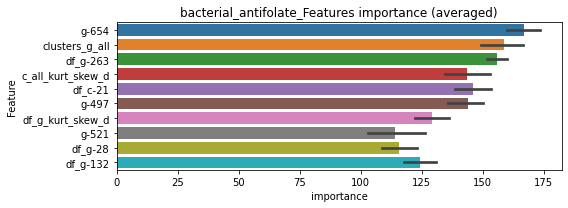

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000426956	valid_1's binary_logloss: 0.00369414


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000409614	valid_1's binary_logloss: 0.00774034
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000410216	valid_1's binary_logloss: 0.00773832


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000444319	valid_1's binary_logloss: 0.00287601


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000432676	valid_1's binary_logloss: 0.00349782


bacterial_antifolate logloss: 0.004455827387015866


mutually exclusive columns: bacterial_cell_wall_synthesis_inhibitor


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 5973
target_rate: 0.0080625 → Adj_target_rate: 0.0073283


selected negative label: 5973


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0695543	valid_1's binary_logloss: 0.115081
Early stopping, best iteration is:
[1911]	training's binary_logloss: 0.0412842	valid_1's binary_logloss: 0.109569
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0670992	valid_1's binary_logloss: 0.127063
Early stopping, best iteration is:
[1462]	training's binary_logloss: 0.0507831	valid_1's binary_logloss: 0.124334
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0701682	valid_1's binary_logloss: 0.112705
Early stopping, best iteration is:
[1717]	training's binary_logloss: 0.046167	valid_1's binary_logloss: 0.107202
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0711606	valid_1's binary_logloss: 0.109283
[2000]	training's binary_logloss: 0.0402351	valid_1's binary_logloss: 0.102547
Early stopping, best

1 / 3, AUC score:0.965, PR-AUC:0.935
y_Threshold: 0.0552838, Threshold: 0.0867271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 494 → Positive_corect_labels: 1067/6673
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, Expected: 32.1, Threshold: 0.0867271, conf_0:0.06071, conf_1:0.11275
threshold: 0.0867271, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1067.0/6673, y_label_rate: 0.1598981
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0340596	valid_1's binary_logloss: 0.0493526
[2000]	training's binary_logloss: 0.0188018	valid_1's binary_logloss: 0.0421862
[3000]	training's binary_logloss: 0.0124655	valid_1's binary_logloss: 0.0398631
Early stopping, best iteration is:
[3063]	training's binary_logloss: 0.0122037	valid_1's binary_logloss: 0.039783
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0346944	valid_1's binary_logloss: 0.0479944
[2000]	training's binary_logloss: 0.0192009	valid_1's binary_logloss: 0.0402789
[3000]	training's binary_logloss: 0.0127353	valid_1's binary_logloss: 0.038015
Early stopping, best iteration is:
[3009]	training's binary_logloss: 0.0126922	valid_1's binary_logloss: 0.0379892
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0310517	valid_1's binary_logloss: 0.070737
Early stopping, best iteration

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0432553, Threshold: 0.0867271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 1031.0/6601
p_label_rate: 0.0072828 Vs.target_rate: 0.00806
Num_p_label: 29.0, Expected: 32.1, Threshold: 0.0867271, conf_0:0.06938, conf_1:0.10407
threshold: 0.0867271, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 1031.0/6601, y_label_rate: 0.1561885
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0224321	valid_1's binary_logloss: 0.0311779
[2000]	training's binary_logloss: 0.0123502	valid_1's binary_logloss: 0.0236101
[3000]	training's binary_logloss: 0.00829912	valid_1's binary_logloss: 0.020948
[4000]	training's binary_logloss: 0.0061894	valid_1's binary_logloss: 0.0197776
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.00593389	valid_1's binary_logloss: 0.0195929
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0218547	valid_1's binary_logloss: 0.033166
[2000]	training's binary_logloss: 0.0119924	valid_1's binary_logloss: 0.0257414
[3000]	training's binary_logloss: 0.00808027	valid_1's binary_logloss: 0.0232362
Early stopping, best iteration is:
[3403]	training's binary_logloss: 0.00707948	valid_1's binary_logloss: 0.0225816
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0417170, Threshold: 0.0867271, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 1013.0/6565
p_label_rate: 0.0075339 Vs.target_rate: 0.00806
Num_p_label: 30.0, Expected: 32.1, Threshold: 0.0867271, conf_0:0.07805, conf_1:0.09540
threshold: 0.0867271, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 1013.0/6565, y_label_rate: 0.1543031


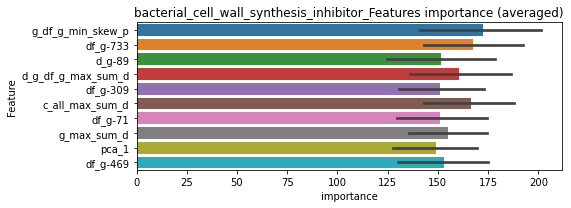

len(train_index) : 4923
len(valid_index) : 1642
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0235512	valid_1's binary_logloss: 0.0257603
[2000]	training's binary_logloss: 0.0122351	valid_1's binary_logloss: 0.0137846
[3000]	training's binary_logloss: 0.00835482	valid_1's binary_logloss: 0.00971342
[4000]	training's binary_logloss: 0.00636307	valid_1's binary_logloss: 0.00767337
[5000]	training's binary_logloss: 0.00514313	valid_1's binary_logloss: 0.00639979
[6000]	training's binary_logloss: 0.00431483	valid_1's binary_logloss: 0.00554406
[7000]	training's binary_logloss: 0.00373152	valid_1's binary_logloss: 0.00494621
[8000]	training's binary_logloss: 0.00329006	valid_1's binary_logloss: 0.00447169
[9000]	training's binary_logloss: 0.00293348	valid_1's binary_logloss: 0.00409434
[10000]	training's binary_logloss: 0.00266076	valid_1's binary_logloss: 0.00379537
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00266076	valid_1's binary_logloss: 0.

len(train_index) : 4924
len(valid_index) : 1641
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0233914	valid_1's binary_logloss: 0.0260843
[2000]	training's binary_logloss: 0.0119707	valid_1's binary_logloss: 0.0148154
[3000]	training's binary_logloss: 0.00815171	valid_1's binary_logloss: 0.0111391
[4000]	training's binary_logloss: 0.00618548	valid_1's binary_logloss: 0.00934428
[5000]	training's binary_logloss: 0.0049857	valid_1's binary_logloss: 0.0082508
[6000]	training's binary_logloss: 0.00417455	valid_1's binary_logloss: 0.00750241
[7000]	training's binary_logloss: 0.00360537	valid_1's binary_logloss: 0.00699982
[8000]	training's binary_logloss: 0.00317706	valid_1's binary_logloss: 0.00662796
[9000]	training's binary_logloss: 0.00283304	valid_1's binary_logloss: 0.00630785
[10000]	training's binary_logloss: 0.00256983	valid_1's binary_logloss: 0.00609985
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00256983	valid_1's binary_logloss: 0.006

len(train_index) : 4924
len(valid_index) : 1641
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0223895	valid_1's binary_logloss: 0.0334527
[2000]	training's binary_logloss: 0.0113479	valid_1's binary_logloss: 0.0211775
[3000]	training's binary_logloss: 0.00770819	valid_1's binary_logloss: 0.0170303
[4000]	training's binary_logloss: 0.00587703	valid_1's binary_logloss: 0.0149616
[5000]	training's binary_logloss: 0.00475014	valid_1's binary_logloss: 0.0137638
[6000]	training's binary_logloss: 0.0039964	valid_1's binary_logloss: 0.0128855
[7000]	training's binary_logloss: 0.00345545	valid_1's binary_logloss: 0.0123048
[8000]	training's binary_logloss: 0.00304697	valid_1's binary_logloss: 0.0118754
[9000]	training's binary_logloss: 0.00272011	valid_1's binary_logloss: 0.0115037
Early stopping, best iteration is:
[9366]	training's binary_logloss: 0.00261883	valid_1's binary_logloss: 0.0113996


len(train_index) : 4924
len(valid_index) : 1641
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0228317	valid_1's binary_logloss: 0.0284912
[2000]	training's binary_logloss: 0.0116441	valid_1's binary_logloss: 0.0168859
[3000]	training's binary_logloss: 0.00788514	valid_1's binary_logloss: 0.0129719
[4000]	training's binary_logloss: 0.00598624	valid_1's binary_logloss: 0.0110558
[5000]	training's binary_logloss: 0.00482821	valid_1's binary_logloss: 0.00991345
[6000]	training's binary_logloss: 0.00404574	valid_1's binary_logloss: 0.00911334
[7000]	training's binary_logloss: 0.00350538	valid_1's binary_logloss: 0.00859167
[8000]	training's binary_logloss: 0.0030961	valid_1's binary_logloss: 0.00816385
[9000]	training's binary_logloss: 0.00276369	valid_1's binary_logloss: 0.00783006
[10000]	training's binary_logloss: 0.00250587	valid_1's binary_logloss: 0.00761093
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00250587	valid_1's binary_logloss: 0.007

bacterial_cell_wall_synthesis_inhibitor logloss: 0.007225907576160903
bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3275
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3275


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0610623	valid_1's binary_logloss: 0.107775
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0410616	valid_1's binary_logloss: 0.0992384
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0606483	valid_1's binary_logloss: 0.110644
[2000]	training's binary_logloss: 0.0344225	valid_1's binary_logloss: 0.100237
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0329704	valid_1's binary_logloss: 0.0998677
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0650297	valid_1's binary_logloss: 0.088014
[2000]	training's binary_logloss: 0.0369699	valid_1's binary_logloss: 0.0745938
[3000]	training's binary_logloss: 0.0246668	valid_1's binary_logloss: 0.0704605
Early stopping, best iteration is:
[2985]	training's binary_logloss: 0.0248063	valid_1's binary_logloss: 0.0704

1 / 3, AUC score:0.985, PR-AUC:0.971
y_Threshold: 0.0441851, Threshold: 0.0815391, pos_neg_ratio: 0.8000000
Remove_noisy_data: 189 → Positive_corect_labels: 626/3741
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0815391, conf_0:0.05708, conf_1:0.10600
Num_p_label: 12.0, Expected: 14.9, Adj_threshold_1: 0.1115391
threshold: 0.1115391, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 626.0/3741, y_label_rate: 0.1673349
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0470594	valid_1's binary_logloss: 0.0902054
[2000]	training's binary_logloss: 0.0257885	valid_1's binary_logloss: 0.0793097
Early stopping, best iteration is:
[2008]	training's binary_logloss: 0.025695	valid_1's binary_logloss: 0.0792495
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0482813	valid_1's binary_logloss: 0.0764488
[2000]	training's binary_logloss: 0.0266129	valid_1's binary_logloss: 0.0639804
Early stopping, best iteration is:
[2700]	training's binary_logloss: 0.0197721	valid_1's binary_logloss: 0.0608443
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0504672	valid_1's binary_logloss: 0.069888
[2000]	training's binary_logloss: 0.0278764	valid_1's binary_logloss: 0.055102
[3000]	training's binary_logloss: 0.0186692	valid_1's binary_logloss: 0.0499178
Early stopping, best iteration

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0483239, Threshold: 0.1115391, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 607.0/3703
p_label_rate: 0.0107986 Vs.target_rate: 0.00374
Num_p_label: 43.0, Expected: 14.9, Threshold: 0.1115391, conf_0:0.08923, conf_1:0.13385
Num_p_label: 23.0, Expected: 14.9, Adj_threshold_1: 0.1415391
Num_p_label: 7.0, Expected: 14.9, Adj_threshold_2: 0.1715391
threshold: 0.1715391, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 607.0/3703, y_label_rate: 0.1639211
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0399316	valid_1's binary_logloss: 0.0652942
[2000]	training's binary_logloss: 0.0218093	valid_1's binary_logloss: 0.0523121
[3000]	training's binary_logloss: 0.0145309	valid_1's binary_logloss: 0.0478079
Early stopping, best iteration is:
[3254]	training's binary_logloss: 0.013392	valid_1's binary_logloss: 0.0471119
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0402451	valid_1's binary_logloss: 0.0653067
[2000]	training's binary_logloss: 0.0219287	valid_1's binary_logloss: 0.0535047
Early stopping, best iteration is:
[2368]	training's binary_logloss: 0.0186103	valid_1's binary_logloss: 0.051889
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0420719	valid_1's binary_logloss: 0.0542517
[2000]	training's binary_logloss: 0.0229198	valid_1's binary_logloss: 0.040825
[3000]	training's binary_loglo

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0416708, Threshold: 0.1715391, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 598.0/3685
p_label_rate: 0.0060271 Vs.target_rate: 0.00374
Num_p_label: 24.0, Expected: 14.9, Threshold: 0.1715391, conf_0:0.15439, conf_1:0.18869
Num_p_label: 10.0, Expected: 14.9, Adj_threshold_1: 0.2015391
threshold: 0.2015391, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 598.0/3685, y_label_rate: 0.1622795


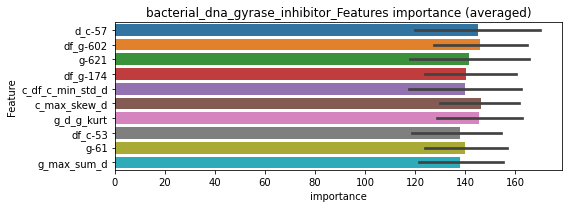

len(train_index) : 2763
len(valid_index) : 922
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0452012	valid_1's binary_logloss: 0.0758991
[2000]	training's binary_logloss: 0.0254897	valid_1's binary_logloss: 0.0622565
[3000]	training's binary_logloss: 0.017683	valid_1's binary_logloss: 0.0579985
Early stopping, best iteration is:
[3105]	training's binary_logloss: 0.0171054	valid_1's binary_logloss: 0.0576669


len(train_index) : 2764
len(valid_index) : 921
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.049539	valid_1's binary_logloss: 0.0629281
[2000]	training's binary_logloss: 0.0284386	valid_1's binary_logloss: 0.0446745
[3000]	training's binary_logloss: 0.0196439	valid_1's binary_logloss: 0.0382242
[4000]	training's binary_logloss: 0.0148359	valid_1's binary_logloss: 0.0348281
[5000]	training's binary_logloss: 0.011882	valid_1's binary_logloss: 0.0327337
[6000]	training's binary_logloss: 0.00986361	valid_1's binary_logloss: 0.0312061
[7000]	training's binary_logloss: 0.00843155	valid_1's binary_logloss: 0.0301307
Early stopping, best iteration is:
[7051]	training's binary_logloss: 0.00836489	valid_1's binary_logloss: 0.0300831


len(train_index) : 2764
len(valid_index) : 921
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0505837	valid_1's binary_logloss: 0.0619241
[2000]	training's binary_logloss: 0.0292702	valid_1's binary_logloss: 0.0437394
[3000]	training's binary_logloss: 0.0202951	valid_1's binary_logloss: 0.0374325
[4000]	training's binary_logloss: 0.015358	valid_1's binary_logloss: 0.034371
[5000]	training's binary_logloss: 0.0123166	valid_1's binary_logloss: 0.0323998
[6000]	training's binary_logloss: 0.0102275	valid_1's binary_logloss: 0.0309682
Early stopping, best iteration is:
[6479]	training's binary_logloss: 0.00945963	valid_1's binary_logloss: 0.0305173


len(train_index) : 2764
len(valid_index) : 921
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0486063	valid_1's binary_logloss: 0.0648217
[2000]	training's binary_logloss: 0.0280186	valid_1's binary_logloss: 0.0482561
[3000]	training's binary_logloss: 0.0194534	valid_1's binary_logloss: 0.0419772
[4000]	training's binary_logloss: 0.014739	valid_1's binary_logloss: 0.0391043
[5000]	training's binary_logloss: 0.0118142	valid_1's binary_logloss: 0.0374067
Early stopping, best iteration is:
[5697]	training's binary_logloss: 0.0103301	valid_1's binary_logloss: 0.0365125


bacterial_dna_gyrase_inhibitor logloss: 0.038700120845409074
bacterial_dna_gyrase_inhibitor is unpredictable(><)!


mutually exclusive columns: bacterial_dna_inhibitor


bacterial_dna_inhibitor, len(trt): 115, len(othr): 2020
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 2020


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.152063	valid_1's binary_logloss: 0.254108
[2000]	training's binary_logloss: 0.0885197	valid_1's binary_logloss: 0.215048
[3000]	training's binary_logloss: 0.0606133	valid_1's binary_logloss: 0.198496
Early stopping, best iteration is:
[3353]	training's binary_logloss: 0.0542091	valid_1's binary_logloss: 0.194938
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.160147	valid_1's binary_logloss: 0.228226
[2000]	training's binary_logloss: 0.094302	valid_1's binary_logloss: 0.177436
[3000]	training's binary_logloss: 0.0648234	valid_1's binary_logloss: 0.154467
[4000]	training's binary_logloss: 0.0487538	valid_1's binary_logloss: 0.142021
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.0468613	valid_1's binary_logloss: 0.140195
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.160

1 / 3, AUC score:0.960, PR-AUC:0.923
y_Threshold: 0.1225634, Threshold: 0.1846529, pos_neg_ratio: 0.8000000
Remove_noisy_data: 173 → Positive_corect_labels: 358/2251
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1846529, conf_0:0.12926, conf_1:0.24005
Num_p_label: 14.0, Expected: 19.2, Adj_threshold_1: 0.2146529
threshold: 0.2146529, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 358.0/2251, y_label_rate: 0.1590404
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.128884	valid_1's binary_logloss: 0.202975
[2000]	training's binary_logloss: 0.0716566	valid_1's binary_logloss: 0.153515
[3000]	training's binary_logloss: 0.0485389	valid_1's binary_logloss: 0.131667
[4000]	training's binary_logloss: 0.0364397	valid_1's binary_logloss: 0.119594
Early stopping, best iteration is:
[4232]	training's binary_logloss: 0.0343787	valid_1's binary_logloss: 0.117527
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.131746	valid_1's binary_logloss: 0.206204
[2000]	training's binary_logloss: 0.0726459	valid_1's binary_logloss: 0.156748
[3000]	training's binary_logloss: 0.0490812	valid_1's binary_logloss: 0.136354
[4000]	training's binary_logloss: 0.0367532	valid_1's binary_logloss: 0.126086
Early stopping, best iteration is:
[4146]	training's binary_logloss: 0.0353952	valid_1's binary_logloss: 0.124832
Training until valid

2 / 3, AUC score:0.990, PR-AUC:0.980
y_Threshold: 0.1210493, Threshold: 0.2146529, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 338.0/2211
p_label_rate: 0.0042692 Vs.target_rate: 0.00483
Num_p_label: 17.0, Expected: 19.2, Threshold: 0.2146529, conf_0:0.17172, conf_1:0.25758
threshold: 0.2146529, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 338.0/2211, y_label_rate: 0.1528720
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.121541	valid_1's binary_logloss: 0.189488
[2000]	training's binary_logloss: 0.0656887	valid_1's binary_logloss: 0.144154
Early stopping, best iteration is:
[2363]	training's binary_logloss: 0.0558114	valid_1's binary_logloss: 0.135529
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.121121	valid_1's binary_logloss: 0.200716
[2000]	training's binary_logloss: 0.066273	valid_1's binary_logloss: 0.150118
[3000]	training's binary_logloss: 0.0444196	valid_1's binary_logloss: 0.129265
[4000]	training's binary_logloss: 0.033109	valid_1's binary_logloss: 0.1173
Early stopping, best iteration is:
[4219]	training's binary_logloss: 0.0314064	valid_1's binary_logloss: 0.115269
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.125565	valid_1's binary_logloss: 0.17197
[2000]	training's binary_logloss: 0.0685241	

3 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.1275394, Threshold: 0.2146529, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 327.0/2189
p_label_rate: 0.0042692 Vs.target_rate: 0.00483
Num_p_label: 17.0, Expected: 19.2, Threshold: 0.2146529, conf_0:0.19319, conf_1:0.23612
threshold: 0.2146529, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 327.0/2189, y_label_rate: 0.1493833


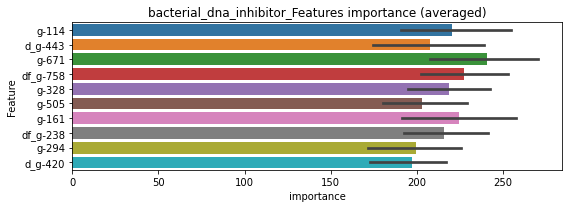

len(train_index) : 1641
len(valid_index) : 548
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.156619	valid_1's binary_logloss: 0.205991
[2000]	training's binary_logloss: 0.091103	valid_1's binary_logloss: 0.146876
[3000]	training's binary_logloss: 0.0621255	valid_1's binary_logloss: 0.118304
[4000]	training's binary_logloss: 0.0471548	valid_1's binary_logloss: 0.103982
[5000]	training's binary_logloss: 0.0379158	valid_1's binary_logloss: 0.0947212
[6000]	training's binary_logloss: 0.0315577	valid_1's binary_logloss: 0.0883247
[7000]	training's binary_logloss: 0.0269724	valid_1's binary_logloss: 0.0836794
Early stopping, best iteration is:
[7054]	training's binary_logloss: 0.0267564	valid_1's binary_logloss: 0.0835042


len(train_index) : 1642
len(valid_index) : 547
================================= fold 2/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.152488	valid_1's binary_logloss: 0.220785
[2000]	training's binary_logloss: 0.0882238	valid_1's binary_logloss: 0.165183
[3000]	training's binary_logloss: 0.0605572	valid_1's binary_logloss: 0.138838
[4000]	training's binary_logloss: 0.04581	valid_1's binary_logloss: 0.125047
[5000]	training's binary_logloss: 0.0368491	valid_1's binary_logloss: 0.116259
Early stopping, best iteration is:
[5370]	training's binary_logloss: 0.0343256	valid_1's binary_logloss: 0.113369


len(train_index) : 1642
len(valid_index) : 547
================================= fold 3/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.153399	valid_1's binary_logloss: 0.214793
[2000]	training's binary_logloss: 0.0894019	valid_1's binary_logloss: 0.157446
[3000]	training's binary_logloss: 0.0616179	valid_1's binary_logloss: 0.129512
[4000]	training's binary_logloss: 0.0467271	valid_1's binary_logloss: 0.114213
[5000]	training's binary_logloss: 0.037687	valid_1's binary_logloss: 0.104813
[6000]	training's binary_logloss: 0.0313951	valid_1's binary_logloss: 0.0980874
Early stopping, best iteration is:
[6826]	training's binary_logloss: 0.0275547	valid_1's binary_logloss: 0.0938847


len(train_index) : 1642
len(valid_index) : 547
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.153387	valid_1's binary_logloss: 0.213516
[2000]	training's binary_logloss: 0.0885551	valid_1's binary_logloss: 0.154631
[3000]	training's binary_logloss: 0.0606797	valid_1's binary_logloss: 0.12814
[4000]	training's binary_logloss: 0.0460937	valid_1's binary_logloss: 0.113649
[5000]	training's binary_logloss: 0.0370765	valid_1's binary_logloss: 0.10432
[6000]	training's binary_logloss: 0.0308443	valid_1's binary_logloss: 0.0975678
[7000]	training's binary_logloss: 0.0264541	valid_1's binary_logloss: 0.092665
[8000]	training's binary_logloss: 0.0231566	valid_1's binary_logloss: 0.0889666
[9000]	training's binary_logloss: 0.020585	valid_1's binary_logloss: 0.0861863
Early stopping, best iteration is:
[9752]	training's binary_logloss: 0.0190221	valid_1's binary_logloss: 0.0844929


bacterial_dna_inhibitor logloss: 0.09380805454610221
bacterial_dna_inhibitor is unpredictable(><)!
bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000289556	valid_1's binary_logloss: 0.00112774
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000284769	valid_1's binary_logloss: 0.00291237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000296577	valid_1's binary_logloss: 0.000529757
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014733, Threshold: 0.0037130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0037130, conf_0:0.00260, conf_1:0.00483
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0337130


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000299556	valid_1's binary_logloss: 0.00234247


threshold: 0.0337130, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00027875	valid_1's binary_logloss: 0.000927874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000280927	valid_1's binary_logloss: 0.00325448
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000282263	valid_1's binary_logloss: 0.00054641
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0725609, Threshold: 0.0337130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0337130, conf_0:0.02697, conf_1:0.04046


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000284229	valid_1's binary_logloss: 0.00282289


threshold: 0.0337130, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00027875	valid_1's binary_logloss: 0.000927874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000280927	valid_1's binary_logloss: 0.00325448
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000282263	valid_1's binary_logloss: 0.00054641
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0725609, Threshold: 0.0337130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0337130, conf_0:0.03034, conf_1:0.03708


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000284229	valid_1's binary_logloss: 0.00282289


threshold: 0.0337130, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


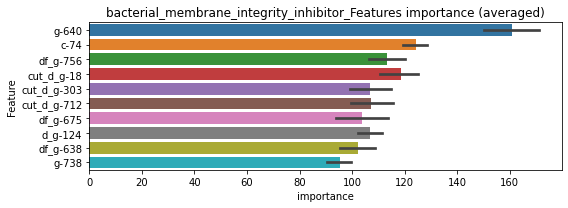

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000284277	valid_1's binary_logloss: 0.000791884


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000293563	valid_1's binary_logloss: 0.00283528


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000286032	valid_1's binary_logloss: 0.000558193


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000278579	valid_1's binary_logloss: 0.00227406


bacterial_membrane_integrity_inhibitor logloss: 0.00161494308152057
bcl_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000408752	valid_1's binary_logloss: 0.00683347
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000397346	valid_1's binary_logloss: 0.0103882
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000403368	valid_1's binary_logloss: 0.00116731
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402611	valid_1's binary_logloss: 0.00399045


y_Threshold: 0.0026365, Threshold: 0.0122576, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0122576, conf_0:0.00858, conf_1:0.01593
Num_p_label: 8.0, Expected: 5.2, Adj_threshold_1: 0.0422576
threshold: 0.0422576, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000385978	valid_1's binary_logloss: 0.00679559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000422315	valid_1's binary_logloss: 0.00956877
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000386704	valid_1's binary_logloss: 0.000901964
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000374152	valid_1's binary_logloss: 0.00509628


y_Threshold: 0.0199874, Threshold: 0.0422576, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0080362 Vs.target_rate: 0.00130
Num_p_label: 32.0, Expected: 5.2, Threshold: 0.0422576, conf_0:0.03381, conf_1:0.05071
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0722576
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_2: 0.1022576
threshold: 0.1022576, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000389009	valid_1's binary_logloss: 0.0077523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000383834	valid_1's binary_logloss: 0.00234204
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384846	valid_1's binary_logloss: 0.00187084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000375328	valid_1's binary_logloss: 0.00146123


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0371260, Threshold: 0.1022576, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, Expected: 5.2, Threshold: 0.1022576, conf_0:0.09203, conf_1:0.11248
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_1: 0.1322576
threshold: 0.1322576, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


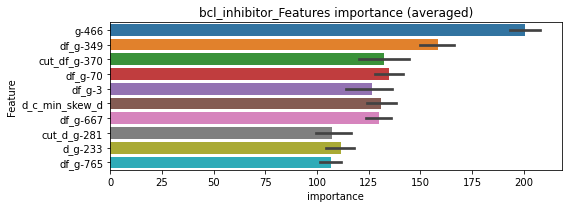

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000374556	valid_1's binary_logloss: 0.00468929


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000386648	valid_1's binary_logloss: 0.00307346


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000379521	valid_1's binary_logloss: 0.00244199


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000387431	valid_1's binary_logloss: 0.00159192


bcl_inhibitor logloss: 0.002949521838362011
bcr-abl_inhibitor, len(trt): 38, len(othr): 3281
target_rate: 0.0015957 → Adj_target_rate: 0.0018493


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000443812	valid_1's binary_logloss: 0.010414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000444016	valid_1's binary_logloss: 0.00490266
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000452303	valid_1's binary_logloss: 0.00119795
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000461322	valid_1's binary_logloss: 0.00714455


y_Threshold: 0.0029941, Threshold: 0.0555999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, Expected: 6.4, Threshold: 0.0555999, conf_0:0.03892, conf_1:0.07228
Num_p_label: 33.0, Expected: 6.4, Adj_threshold_1: 0.0855999
Num_p_label: 23.0, Expected: 6.4, Adj_threshold_2: 0.1155999
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_3: 0.1455999
Num_p_label: 14.0, Expected: 6.4, Adj_threshold_4: 0.1755999
threshold: 0.1755999, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000427973	valid_1's binary_logloss: 0.0105043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000436183	valid_1's binary_logloss: 0.00448414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000438151	valid_1's binary_logloss: 0.00113687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000427603	valid_1's binary_logloss: 0.00742258


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0291257, Threshold: 0.1755999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0140633 Vs.target_rate: 0.00160
Num_p_label: 56.0, Expected: 6.4, Threshold: 0.1755999, conf_0:0.14048, conf_1:0.21072
Num_p_label: 52.0, Expected: 6.4, Adj_threshold_1: 0.2055999
Num_p_label: 51.0, Expected: 6.4, Adj_threshold_2: 0.2355999
Num_p_label: 48.0, Expected: 6.4, Adj_threshold_3: 0.2655999
Num_p_label: 44.0, Expected: 6.4, Adj_threshold_4: 0.2955999
Num_p_label: 41.0, Expected: 6.4, Adj_threshold_5: 0.3255999
Num_p_label: 39.0, Expected: 6.4, Adj_threshold_6: 0.3555999
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_7: 0.3855999
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_8: 0.4155999
Num_p_label: 30.0, Expected: 6.4, Adj_threshold_9: 0.4455999
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_10: 0.4755999
threshold: 0.4755999, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000424348	valid_1's binary_logloss: 0.00365446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000575075	valid_1's binary_logloss: 0.00919752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430526	valid_1's binary_logloss: 0.008626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000445661	valid_1's binary_logloss: 0.00336214


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0583727, Threshold: 0.4755999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0065294 Vs.target_rate: 0.00160
Num_p_label: 26.0, Expected: 6.4, Threshold: 0.4755999, conf_0:0.42804, conf_1:0.52316
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_1: 0.5055999
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_2: 0.5355999
Num_p_label: 21.0, Expected: 6.4, Adj_threshold_3: 0.5655999
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_4: 0.5955999
Num_p_label: 13.0, Expected: 6.4, Adj_threshold_5: 0.6255999
threshold: 0.6255999, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


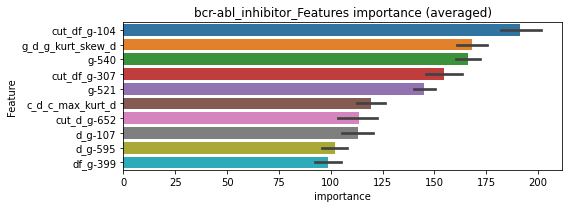

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000429162	valid_1's binary_logloss: 0.00383215


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000423943	valid_1's binary_logloss: 0.00288738


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000434974	valid_1's binary_logloss: 0.00554471


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.00043083	valid_1's binary_logloss: 0.00175324


bcr-abl_inhibitor logloss: 0.003506193971089375
benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3278


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00115052	valid_1's binary_logloss: 0.0293143
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00079441	valid_1's binary_logloss: 0.0323256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000570989	valid_1's binary_logloss: 0.010798
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00063498	valid_1's binary_logloss: 0.0244338


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0072282, Threshold: 0.0170890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.0170890, conf_0:0.01196, conf_1:0.02222
Num_p_label: 10.0, Expected: 11.2, Adj_threshold_1: 0.0470890
threshold: 0.0470890, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000553914	valid_1's binary_logloss: 0.0275817
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000548845	valid_1's binary_logloss: 0.024284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000562238	valid_1's binary_logloss: 0.00865633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.00054903	valid_1's binary_logloss: 0.0121587


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0303102, Threshold: 0.0470890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0045203 Vs.target_rate: 0.00281
Num_p_label: 18.0, Expected: 11.2, Threshold: 0.0470890, conf_0:0.03767, conf_1:0.05651
Num_p_label: 13.0, Expected: 11.2, Adj_threshold_1: 0.0770890
threshold: 0.0770890, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000720332	valid_1's binary_logloss: 0.0244905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000573312	valid_1's binary_logloss: 0.0193041
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.0006189	valid_1's binary_logloss: 0.023512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.00058112	valid_1's binary_logloss: 0.0101057


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238261, Threshold: 0.0770890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3793
p_label_rate: 0.0027624 Vs.target_rate: 0.00281
Num_p_label: 11.0, Expected: 11.2, Threshold: 0.0770890, conf_0:0.06938, conf_1:0.08480
threshold: 0.0770890, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 651.0/3793, y_label_rate: 0.1716320


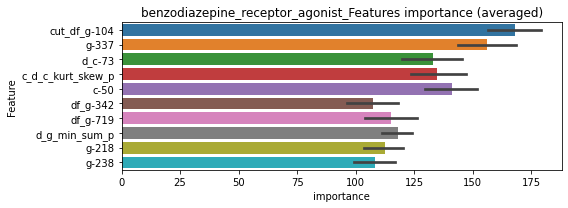

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000585705	valid_1's binary_logloss: 0.023626


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000858072	valid_1's binary_logloss: 0.0173899
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00062456	valid_1's binary_logloss: 0.0135065


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000630817	valid_1's binary_logloss: 0.0140841


benzodiazepine_receptor_agonist logloss: 0.017153323198337934
beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000356796	valid_1's binary_logloss: 0.00141694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000357528	valid_1's binary_logloss: 0.00417412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000360692	valid_1's binary_logloss: 0.0010827
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017754, Threshold: 0.0087557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000357027	valid_1's binary_logloss: 0.00524421


Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0087557, conf_0:0.00613, conf_1:0.01138
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0387557
threshold: 0.0387557, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000357438	valid_1's binary_logloss: 0.00165074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000349582	valid_1's binary_logloss: 0.00444065
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000362398	valid_1's binary_logloss: 0.000979664
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158098, Threshold: 0.0387557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00101
Num_p_label: 20.0, Expected: 4.0, Threshold: 0.0387557, conf_0:0.03100, conf_1:0.04651
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.0687557
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_2: 0.0987557


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00036312	valid_1's binary_logloss: 0.00621808


threshold: 0.0987557, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000357438	valid_1's binary_logloss: 0.00165074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000349582	valid_1's binary_logloss: 0.00444065
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000362398	valid_1's binary_logloss: 0.000979664
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158098, Threshold: 0.0987557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, Expected: 4.0, Threshold: 0.0987557, conf_0:0.08888, conf_1:0.10863


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00036312	valid_1's binary_logloss: 0.00621808


threshold: 0.0987557, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


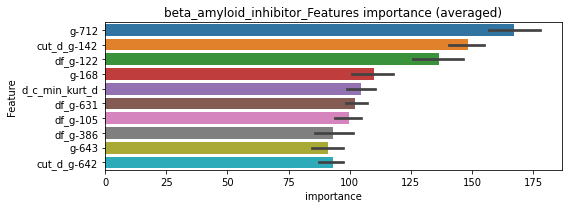

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000366461	valid_1's binary_logloss: 0.00153428


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000366449	valid_1's binary_logloss: 0.00383463


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000368453	valid_1's binary_logloss: 0.00120497


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds


beta_amyloid_inhibitor logloss: 0.002885302555081801


Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000397391	valid_1's binary_logloss: 0.00496733


bromodomain_inhibitor, len(trt): 68, len(othr): 3280
target_rate: 0.0028555 → Adj_target_rate: 0.0030327


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0768153	valid_1's binary_logloss: 0.135237
[2000]	training's binary_logloss: 0.0406637	valid_1's binary_logloss: 0.0972837
[3000]	training's binary_logloss: 0.0272223	valid_1's binary_logloss: 0.0827587
[4000]	training's binary_logloss: 0.0203077	valid_1's binary_logloss: 0.0753788
[5000]	training's binary_logloss: 0.0161631	valid_1's binary_logloss: 0.0702737
[6000]	training's binary_logloss: 0.0134408	valid_1's binary_logloss: 0.0671476
Early stopping, best iteration is:
[6343]	training's binary_logloss: 0.0127253	valid_1's binary_logloss: 0.0662809
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0784592	valid_1's binary_logloss: 0.120148
[2000]	training's binary_logloss: 0.0415919	valid_1's binary_logloss: 0.0841667
[3000]	training's binary_logloss: 0.0279004	valid_1's binary_logloss: 0.0705881
[4000]	training's binary_logloss: 0.0208427	v

1 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0456535, Threshold: 0.0847563, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 648/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, Expected: 11.4, Threshold: 0.0847563, conf_0:0.05933, conf_1:0.11018
Num_p_label: 16.0, Expected: 11.4, Adj_threshold_1: 0.1147563
threshold: 0.1147563, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0742052	valid_1's binary_logloss: 0.117327
[2000]	training's binary_logloss: 0.0384875	valid_1's binary_logloss: 0.0807648
[3000]	training's binary_logloss: 0.025687	valid_1's binary_logloss: 0.0666845
[4000]	training's binary_logloss: 0.019234	valid_1's binary_logloss: 0.0593227
[5000]	training's binary_logloss: 0.0153058	valid_1's binary_logloss: 0.0546862
[6000]	training's binary_logloss: 0.0127379	valid_1's binary_logloss: 0.0516753
Early stopping, best iteration is:
[6292]	training's binary_logloss: 0.0121382	valid_1's binary_logloss: 0.0508652
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0755872	valid_1's binary_logloss: 0.109996
[2000]	training's binary_logloss: 0.0391082	valid_1's binary_logloss: 0.0720631
[3000]	training's binary_logloss: 0.026062	valid_1's binary_logloss: 0.0583299
[4000]	training's binary_logloss: 0.0194788	vali

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0814488, Threshold: 0.1147563, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 641.0/3774
p_label_rate: 0.0120542 Vs.target_rate: 0.00286
Num_p_label: 48.0, Expected: 11.4, Threshold: 0.1147563, conf_0:0.09181, conf_1:0.13771
Num_p_label: 25.0, Expected: 11.4, Adj_threshold_1: 0.1447563
Num_p_label: 17.0, Expected: 11.4, Adj_threshold_2: 0.1747563
threshold: 0.1747563, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 641.0/3774, y_label_rate: 0.1698463
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0722871	valid_1's binary_logloss: 0.110377
[2000]	training's binary_logloss: 0.037096	valid_1's binary_logloss: 0.0734809
[3000]	training's binary_logloss: 0.0247162	valid_1's binary_logloss: 0.0596213
[4000]	training's binary_logloss: 0.0184874	valid_1's binary_logloss: 0.0522809
[5000]	training's binary_logloss: 0.0147038	valid_1's binary_logloss: 0.047571
[6000]	training's binary_logloss: 0.0122697	valid_1's binary_logloss: 0.0446114
Early stopping, best iteration is:
[6571]	training's binary_logloss: 0.0111919	valid_1's binary_logloss: 0.0429853
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0727115	valid_1's binary_logloss: 0.122471
[2000]	training's binary_logloss: 0.0370738	valid_1's binary_logloss: 0.0867653
[3000]	training's binary_logloss: 0.0246529	valid_1's binary_logloss: 0.0740477
Early stopping, best iteration is:
[3969]	train

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0987954, Threshold: 0.1747563, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 637.0/3766
p_label_rate: 0.0037670 Vs.target_rate: 0.00286
Num_p_label: 15.0, Expected: 11.4, Threshold: 0.1747563, conf_0:0.15728, conf_1:0.19223
threshold: 0.1747563, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 637.0/3766, y_label_rate: 0.1691450


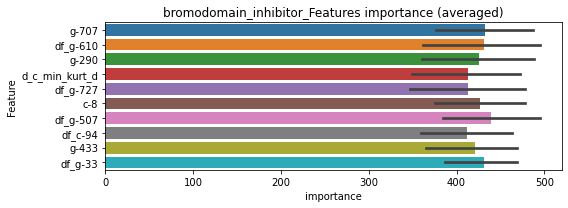

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0980272	valid_1's binary_logloss: 0.132945
[2000]	training's binary_logloss: 0.0529647	valid_1's binary_logloss: 0.0852836
[3000]	training's binary_logloss: 0.0362992	valid_1's binary_logloss: 0.066559
[4000]	training's binary_logloss: 0.0274017	valid_1's binary_logloss: 0.0562434
[5000]	training's binary_logloss: 0.0219211	valid_1's binary_logloss: 0.0493234
[6000]	training's binary_logloss: 0.0182851	valid_1's binary_logloss: 0.0449528
[7000]	training's binary_logloss: 0.0156506	valid_1's binary_logloss: 0.0417189
[8000]	training's binary_logloss: 0.0136893	valid_1's binary_logloss: 0.0392774
[9000]	training's binary_logloss: 0.0121346	valid_1's binary_logloss: 0.0372557
[10000]	training's binary_logloss: 0.01093	valid_1's binary_logloss: 0.0356963
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.01093	valid_1's binary_logloss: 0.0356963


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0986846	valid_1's binary_logloss: 0.13651
[2000]	training's binary_logloss: 0.0528039	valid_1's binary_logloss: 0.0877952
[3000]	training's binary_logloss: 0.0359416	valid_1's binary_logloss: 0.0691057
[4000]	training's binary_logloss: 0.0270352	valid_1's binary_logloss: 0.0588288
[5000]	training's binary_logloss: 0.0216418	valid_1's binary_logloss: 0.0521838
[6000]	training's binary_logloss: 0.0180618	valid_1's binary_logloss: 0.0476104
[7000]	training's binary_logloss: 0.0154891	valid_1's binary_logloss: 0.0443456
[8000]	training's binary_logloss: 0.01355	valid_1's binary_logloss: 0.0415782
[9000]	training's binary_logloss: 0.0120314	valid_1's binary_logloss: 0.0395206
[10000]	training's binary_logloss: 0.0108409	valid_1's binary_logloss: 0.0379285
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0108409	valid_1's binary_logloss: 0.0379285


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0996624	valid_1's binary_logloss: 0.120319
[2000]	training's binary_logloss: 0.0534046	valid_1's binary_logloss: 0.0738515
[3000]	training's binary_logloss: 0.0363639	valid_1's binary_logloss: 0.0561433
[4000]	training's binary_logloss: 0.0274387	valid_1's binary_logloss: 0.0464421
[5000]	training's binary_logloss: 0.0218802	valid_1's binary_logloss: 0.0401665
[6000]	training's binary_logloss: 0.0182569	valid_1's binary_logloss: 0.0360554
[7000]	training's binary_logloss: 0.0156634	valid_1's binary_logloss: 0.0330487
[8000]	training's binary_logloss: 0.0137333	valid_1's binary_logloss: 0.0305861
[9000]	training's binary_logloss: 0.0121951	valid_1's binary_logloss: 0.0286549
[10000]	training's binary_logloss: 0.0109913	valid_1's binary_logloss: 0.0270856
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0109913	valid_1's binary_logloss: 0.0270856


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0960362	valid_1's binary_logloss: 0.145325
[2000]	training's binary_logloss: 0.0508318	valid_1's binary_logloss: 0.101703
[3000]	training's binary_logloss: 0.0346072	valid_1's binary_logloss: 0.0854553
[4000]	training's binary_logloss: 0.0260959	valid_1's binary_logloss: 0.0768258
[5000]	training's binary_logloss: 0.0208197	valid_1's binary_logloss: 0.0712004
Early stopping, best iteration is:
[5364]	training's binary_logloss: 0.019438	valid_1's binary_logloss: 0.0697098


bromodomain_inhibitor logloss: 0.04260198031268718
bromodomain_inhibitor is unpredictable(><)!
btk_inhibitor, len(trt): 29, len(othr): 3284
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3284


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000399742	valid_1's binary_logloss: 0.00770931
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000399078	valid_1's binary_logloss: 0.00376342
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000392236	valid_1's binary_logloss: 0.00190306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000383595	valid_1's binary_logloss: 0.0019679


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029157, Threshold: 0.0223795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0223795, conf_0:0.01567, conf_1:0.02909
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_1: 0.0523795
Num_p_label: 8.0, Expected: 4.8, Adj_threshold_2: 0.0823795
threshold: 0.0823795, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000391009	valid_1's binary_logloss: 0.00742085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399998	valid_1's binary_logloss: 0.00320929
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000374739	valid_1's binary_logloss: 0.001154
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000382639	valid_1's binary_logloss: 0.00242642


y_Threshold: 0.0178647, Threshold: 0.0823795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0050226 Vs.target_rate: 0.00122
Num_p_label: 20.0, Expected: 4.8, Threshold: 0.0823795, conf_0:0.06590, conf_1:0.09886
Num_p_label: 15.0, Expected: 4.8, Adj_threshold_1: 0.1123795
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_2: 0.1423795
threshold: 0.1423795, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000391009	valid_1's binary_logloss: 0.00742085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399998	valid_1's binary_logloss: 0.00320929
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000374739	valid_1's binary_logloss: 0.001154
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0178647, Threshold: 0.1423795, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000382639	valid_1's binary_logloss: 0.00242642


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00122
Num_p_label: 11.0, Expected: 4.8, Threshold: 0.1423795, conf_0:0.12814, conf_1:0.15662
threshold: 0.1423795, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


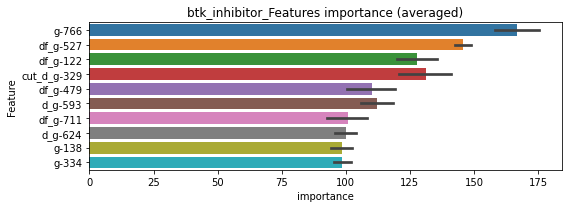

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000402805	valid_1's binary_logloss: 0.00624488


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000405982	valid_1's binary_logloss: 0.00323057


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00038112	valid_1's binary_logloss: 0.00122481
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000381153	valid_1's binary_logloss: 0.00122473


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000376638	valid_1's binary_logloss: 0.00189733
Early stopping, best iteration is:
[1092]	training's binary_logloss: 0.000371568	valid_1's binary_logloss: 0.0018825


btk_inhibitor logloss: 0.0031457551216858655
calcineurin_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000247461	valid_1's binary_logloss: 0.000948648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000253546	valid_1's binary_logloss: 0.00125534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000252139	valid_1's binary_logloss: 0.000373391
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011931, Threshold: 0.0145597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0145597, conf_0:0.01019, conf_1:0.01893
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0445597
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0745597
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.1045597


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000247754	valid_1's binary_logloss: 0.000913194


threshold: 0.1045597, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000233125	valid_1's binary_logloss: 0.00051305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000232705	valid_1's binary_logloss: 0.00118522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00023197	valid_1's binary_logloss: 0.000317755
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1172744, Threshold: 0.1045597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0113009 Vs.target_rate: 0.00050
Num_p_label: 45.0, Expected: 2.0, Threshold: 0.1045597, conf_0:0.08365, conf_1:0.12547
Num_p_label: 41.0, Expected: 2.0, Adj_threshold_1: 0.1345597
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_2: 0.1645597
Num_p_label: 39.0, Expected: 2.0, Adj_threshold_3: 0.1945597
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_4: 0.2245597
Num_p_label: 33.0, Expected: 2.0, Adj_threshold_5: 0.2545597
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_6: 0.2845597
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_7: 0.3145597
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_8: 0.3445597
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_9: 0.3745597


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000232411	valid_1's binary_logloss: 0.000707291


Num_p_label: 25.0, Expected: 2.0, Adj_threshold_10: 0.4045597
threshold: 0.4045597, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000233125	valid_1's binary_logloss: 0.00051305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000232705	valid_1's binary_logloss: 0.00118522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00023197	valid_1's binary_logloss: 0.000317755
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1172744, Threshold: 0.4045597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00050
Num_p_label: 25.0, Expected: 2.0, Threshold: 0.4045597, conf_0:0.36410, conf_1:0.44502
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_1: 0.4345597
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_2: 0.4645597
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_3: 0.4945597
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_4: 0.5245597
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_5: 0.5545597
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_6: 0.5845597
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_7: 0.6145597


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000232411	valid_1's binary_logloss: 0.000707291


Num_p_label: 11.0, Expected: 2.0, Adj_threshold_8: 0.6445597
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_9: 0.6745597
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.7045597
threshold: 0.7045597, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


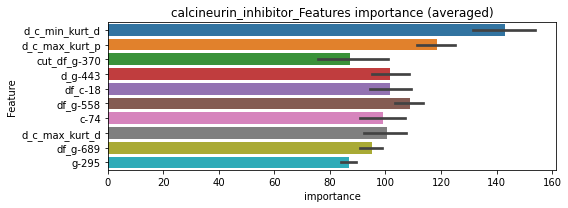

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000234553	valid_1's binary_logloss: 0.000427552
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000235955	valid_1's binary_logloss: 0.000970477
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000239188	valid_1's binary_logloss: 0.000367106
Training until validation scores don't improve for 30 rounds


calcineurin_inhibitor logloss: 0.0005818330846156365


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000238854	valid_1's binary_logloss: 0.000562197
mutually exclusive columns: calcium_channel_blocker


calcium_channel_blocker, len(trt): 281, len(othr): 6395
target_rate: 0.0117998 → Adj_target_rate: 0.0101297


selected negative label: 6395


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0869204	valid_1's binary_logloss: 0.153736
Early stopping, best iteration is:
[1165]	training's binary_logloss: 0.0784678	valid_1's binary_logloss: 0.152235
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0865305	valid_1's binary_logloss: 0.159911
Early stopping, best iteration is:
[1235]	training's binary_logloss: 0.0746011	valid_1's binary_logloss: 0.157746
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0899071	valid_1's binary_logloss: 0.137541
Early stopping, best iteration is:
[1421]	training's binary_logloss: 0.0696426	valid_1's binary_logloss: 0.13371
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0865798	valid_1's binary_logloss: 0.153332
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.0862723	valid_1's binary_log

1 / 3, AUC score:0.939, PR-AUC:0.896
y_Threshold: 0.0759099, Threshold: 0.1039786, pos_neg_ratio: 0.8000000
Remove_noisy_data: 652 → Positive_corect_labels: 1081/7022
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, Expected: 47.0, Threshold: 0.1039786, conf_0:0.07279, conf_1:0.13517
threshold: 0.1039786, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1081.0/7022, y_label_rate: 0.1539447
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0421325	valid_1's binary_logloss: 0.0536676
[2000]	training's binary_logloss: 0.023056	valid_1's binary_logloss: 0.0448012
[3000]	training's binary_logloss: 0.0151908	valid_1's binary_logloss: 0.0414664
Early stopping, best iteration is:
[3099]	training's binary_logloss: 0.0146885	valid_1's binary_logloss: 0.0412589
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0403922	valid_1's binary_logloss: 0.0634914
[2000]	training's binary_logloss: 0.0223285	valid_1's binary_logloss: 0.0550673
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0212648	valid_1's binary_logloss: 0.0547268
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.039844	valid_1's binary_logloss: 0.0699165
[2000]	training's binary_logloss: 0.0216679	valid_1's binary_logloss: 0.0623796
Early stopping, best iteratio

2 / 3, AUC score:0.994, PR-AUC:0.983
y_Threshold: 0.0514582, Threshold: 0.1039786, pos_neg_ratio: 0.8000000
Remove_noisy_data: 114 → Positive_corect_labels: 1024.0/6908
p_label_rate: 0.0012557 Vs.target_rate: 0.01180
Num_p_label: 5.0, Expected: 47.0, Threshold: 0.1039786, conf_0:0.08318, conf_1:0.12477
threshold: 0.1039786, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1024.0/6908, y_label_rate: 0.1482339
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0233792	valid_1's binary_logloss: 0.0305665
[2000]	training's binary_logloss: 0.0128993	valid_1's binary_logloss: 0.0224849
[3000]	training's binary_logloss: 0.00868831	valid_1's binary_logloss: 0.0197699
[4000]	training's binary_logloss: 0.00645643	valid_1's binary_logloss: 0.0183936
Early stopping, best iteration is:
[4555]	training's binary_logloss: 0.00563718	valid_1's binary_logloss: 0.0178442
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0219056	valid_1's binary_logloss: 0.0400968
[2000]	training's binary_logloss: 0.0119812	valid_1's binary_logloss: 0.0331466
Early stopping, best iteration is:
[2289]	training's binary_logloss: 0.0105564	valid_1's binary_logloss: 0.0323898
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214698	valid_1's binary_logloss: 0.0400391
[2000]	training's binary

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0336998, Threshold: 0.1039786, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 1008.0/6876
p_label_rate: 0.0000000 Vs.target_rate: 0.01180
Num_p_label: 0.0, Expected: 47.0, Threshold: 0.1039786, conf_0:0.09358, conf_1:0.11438
threshold: 0.1039786, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 1008.0/6876, y_label_rate: 0.1465969


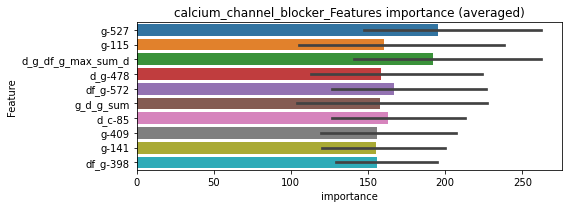

len(train_index) : 5157
len(valid_index) : 1719
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0268428	valid_1's binary_logloss: 0.0290693
[2000]	training's binary_logloss: 0.0136559	valid_1's binary_logloss: 0.0154442
[3000]	training's binary_logloss: 0.00924577	valid_1's binary_logloss: 0.011058
[4000]	training's binary_logloss: 0.00700182	valid_1's binary_logloss: 0.0089151
[5000]	training's binary_logloss: 0.00565886	valid_1's binary_logloss: 0.00758881
[6000]	training's binary_logloss: 0.00474266	valid_1's binary_logloss: 0.00670939
[7000]	training's binary_logloss: 0.00408565	valid_1's binary_logloss: 0.00607349
[8000]	training's binary_logloss: 0.0035961	valid_1's binary_logloss: 0.0055715
[9000]	training's binary_logloss: 0.00320935	valid_1's binary_logloss: 0.00518505
[10000]	training's binary_logloss: 0.00290641	valid_1's binary_logloss: 0.00488373
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00290641	valid_1's binary_logloss: 0.00488

len(train_index) : 5157
len(valid_index) : 1719
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0266977	valid_1's binary_logloss: 0.0312128
[2000]	training's binary_logloss: 0.0134336	valid_1's binary_logloss: 0.0173773
[3000]	training's binary_logloss: 0.00904757	valid_1's binary_logloss: 0.0129012
[4000]	training's binary_logloss: 0.00686931	valid_1's binary_logloss: 0.0107946
[5000]	training's binary_logloss: 0.00554244	valid_1's binary_logloss: 0.00954361
[6000]	training's binary_logloss: 0.00464092	valid_1's binary_logloss: 0.00865134
[7000]	training's binary_logloss: 0.00400001	valid_1's binary_logloss: 0.00804456
[8000]	training's binary_logloss: 0.00351568	valid_1's binary_logloss: 0.00757827
[9000]	training's binary_logloss: 0.00313539	valid_1's binary_logloss: 0.00720625
[10000]	training's binary_logloss: 0.00283631	valid_1's binary_logloss: 0.00693621
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00283631	valid_1's binary_logloss: 0.00

len(train_index) : 5157
len(valid_index) : 1719
================================= fold 3/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.024825	valid_1's binary_logloss: 0.0396449
[2000]	training's binary_logloss: 0.0121227	valid_1's binary_logloss: 0.0265053
[3000]	training's binary_logloss: 0.00810156	valid_1's binary_logloss: 0.022258
[4000]	training's binary_logloss: 0.00611377	valid_1's binary_logloss: 0.0202945
[5000]	training's binary_logloss: 0.0049364	valid_1's binary_logloss: 0.0193273
[6000]	training's binary_logloss: 0.00413721	valid_1's binary_logloss: 0.0185051
Early stopping, best iteration is:
[6837]	training's binary_logloss: 0.0036519	valid_1's binary_logloss: 0.0180822


len(train_index) : 5157
len(valid_index) : 1719
================================= fold 4/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0265093	valid_1's binary_logloss: 0.0350747
[2000]	training's binary_logloss: 0.0132965	valid_1's binary_logloss: 0.0211152
[3000]	training's binary_logloss: 0.0089683	valid_1's binary_logloss: 0.0166542
[4000]	training's binary_logloss: 0.00678739	valid_1's binary_logloss: 0.0144674
[5000]	training's binary_logloss: 0.00548363	valid_1's binary_logloss: 0.0131517
[6000]	training's binary_logloss: 0.00459984	valid_1's binary_logloss: 0.012268
[7000]	training's binary_logloss: 0.00396828	valid_1's binary_logloss: 0.0116714
[8000]	training's binary_logloss: 0.00349277	valid_1's binary_logloss: 0.0111853
[9000]	training's binary_logloss: 0.00311907	valid_1's binary_logloss: 0.0108703
[10000]	training's binary_logloss: 0.00282451	valid_1's binary_logloss: 0.0106113
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00282451	valid_1's binary_logloss: 0.0106113


calcium_channel_blocker logloss: 0.01012836245315079
cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00048955	valid_1's binary_logloss: 0.0146271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000481406	valid_1's binary_logloss: 0.00577685
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000481259	valid_1's binary_logloss: 0.00243359
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000506884	valid_1's binary_logloss: 0.00998499


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037238, Threshold: 0.0145616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0145616, conf_0:0.01019, conf_1:0.01893
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_1: 0.0445616
threshold: 0.0445616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000486918	valid_1's binary_logloss: 0.0153922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00049045	valid_1's binary_logloss: 0.00566459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000486123	valid_1's binary_logloss: 0.0018991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000468305	valid_1's binary_logloss: 0.00990076


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0329614, Threshold: 0.0445616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00176
Num_p_label: 29.0, Expected: 7.0, Threshold: 0.0445616, conf_0:0.03565, conf_1:0.05347
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_1: 0.0745616
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_2: 0.1045616
threshold: 0.1045616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000486918	valid_1's binary_logloss: 0.0153922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00049045	valid_1's binary_logloss: 0.00566459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000486123	valid_1's binary_logloss: 0.0018991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000468305	valid_1's binary_logloss: 0.00990076


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0329614, Threshold: 0.1045616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00176
Num_p_label: 11.0, Expected: 7.0, Threshold: 0.1045616, conf_0:0.09411, conf_1:0.11502
threshold: 0.1045616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


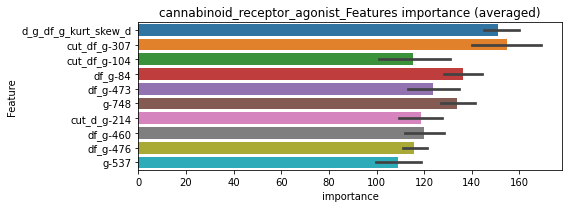

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.0005181	valid_1's binary_logloss: 0.013246


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000500904	valid_1's binary_logloss: 0.0061164


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.00049152	valid_1's binary_logloss: 0.00228775


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000500946	valid_1's binary_logloss: 0.0092212


cannabinoid_receptor_agonist logloss: 0.0077181344495816295
cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3284
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00162379	valid_1's binary_logloss: 0.0285605
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000549732	valid_1's binary_logloss: 0.0192662
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000541675	valid_1's binary_logloss: 0.00961959
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000612026	valid_1's binary_logloss: 0.0255456


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0057189, Threshold: 0.0206289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0206289, conf_0:0.01444, conf_1:0.02682
Num_p_label: 15.0, Expected: 9.2, Adj_threshold_1: 0.0506289
threshold: 0.0506289, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00101858	valid_1's binary_logloss: 0.0271532
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000576581	valid_1's binary_logloss: 0.0109615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000522432	valid_1's binary_logloss: 0.00927225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000528634	valid_1's binary_logloss: 0.0162774


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0188368, Threshold: 0.0506289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0060271 Vs.target_rate: 0.00231
Num_p_label: 24.0, Expected: 9.2, Threshold: 0.0506289, conf_0:0.04050, conf_1:0.06075
Num_p_label: 14.0, Expected: 9.2, Adj_threshold_1: 0.0806289
threshold: 0.0806289, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000567135	valid_1's binary_logloss: 0.0160821
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000646142	valid_1's binary_logloss: 0.0109647
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000526838	valid_1's binary_logloss: 0.00679273
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00056509	valid_1's binary_logloss: 0.0160983


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0130921, Threshold: 0.0806289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0042692 Vs.target_rate: 0.00231
Num_p_label: 17.0, Expected: 9.2, Threshold: 0.0806289, conf_0:0.07257, conf_1:0.08869
threshold: 0.0806289, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


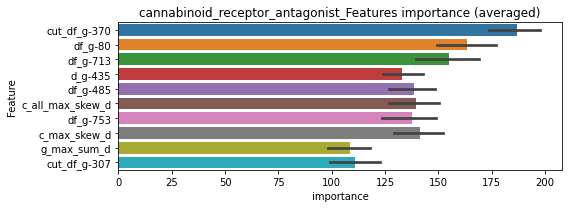

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00100097	valid_1's binary_logloss: 0.0155674
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000995757	valid_1's binary_logloss: 0.0237939
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000536672	valid_1's binary_logloss: 0.00387358


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000526031	valid_1's binary_logloss: 0.0107842


cannabinoid_receptor_antagonist logloss: 0.013505008165384495
carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467783	valid_1's binary_logloss: 0.00697155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000485256	valid_1's binary_logloss: 0.00394066
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000457815	valid_1's binary_logloss: 0.00172856
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0032689, Threshold: 0.0261061, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000488864	valid_1's binary_logloss: 0.0133226


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0261061, conf_0:0.01827, conf_1:0.03394
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0561061
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0861061
threshold: 0.0861061, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00045589	valid_1's binary_logloss: 0.00714578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000453843	valid_1's binary_logloss: 0.00340357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467754	valid_1's binary_logloss: 0.00136645
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388622, Threshold: 0.0861061, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000474151	valid_1's binary_logloss: 0.0142334


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0107986 Vs.target_rate: 0.00151
Num_p_label: 43.0, Expected: 6.0, Threshold: 0.0861061, conf_0:0.06888, conf_1:0.10333
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_1: 0.1161061
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_2: 0.1461061
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_3: 0.1761061
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_4: 0.2061061
threshold: 0.2061061, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00045589	valid_1's binary_logloss: 0.00714578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000453843	valid_1's binary_logloss: 0.00340357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467754	valid_1's binary_logloss: 0.00136645
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388622, Threshold: 0.2061061, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000474151	valid_1's binary_logloss: 0.0142334


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.2061061, conf_0:0.18550, conf_1:0.22672
threshold: 0.2061061, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


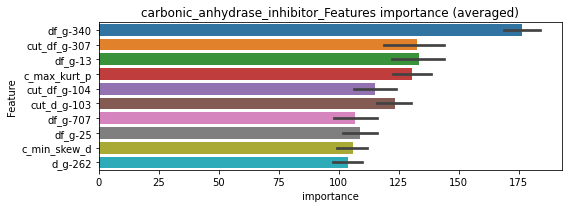

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000472391	valid_1's binary_logloss: 0.00548239


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000473958	valid_1's binary_logloss: 0.00313895


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000468807	valid_1's binary_logloss: 0.00143556


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


carbonic_anhydrase_inhibitor logloss: 0.005612293026683688


Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000535124	valid_1's binary_logloss: 0.0123923


casein_kinase_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039819	valid_1's binary_logloss: 0.00840014
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000390586	valid_1's binary_logloss: 0.00311233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000409055	valid_1's binary_logloss: 0.00124985
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000398678	valid_1's binary_logloss: 0.0124354


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022210, Threshold: 0.0057150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0057150, conf_0:0.00400, conf_1:0.00743
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0357150
threshold: 0.0357150, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000386282	valid_1's binary_logloss: 0.00666229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000388311	valid_1's binary_logloss: 0.00253676
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000399339	valid_1's binary_logloss: 0.00138528
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0152855, Threshold: 0.0357150, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000426721	valid_1's binary_logloss: 0.012255


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0357150, conf_0:0.02857, conf_1:0.04286
threshold: 0.0357150, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000386282	valid_1's binary_logloss: 0.00666229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000388311	valid_1's binary_logloss: 0.00253676
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000399339	valid_1's binary_logloss: 0.00138528
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0152855, Threshold: 0.0357150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000426721	valid_1's binary_logloss: 0.012255


p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0357150, conf_0:0.03214, conf_1:0.03929
threshold: 0.0357150, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


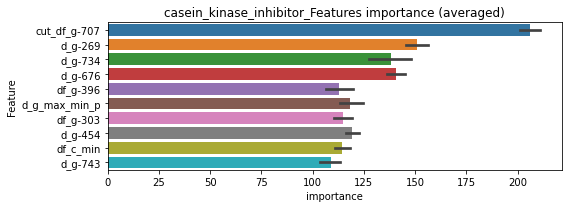

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000394669	valid_1's binary_logloss: 0.00751247


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000389845	valid_1's binary_logloss: 0.00259203
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000389845	valid_1's binary_logloss: 0.00259203


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000396704	valid_1's binary_logloss: 0.00112877
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000396704	valid_1's binary_logloss: 0.00112877


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000438165	valid_1's binary_logloss: 0.00941339


casein_kinase_inhibitor logloss: 0.005161607291896477
caspase_activator, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000291714	valid_1's binary_logloss: 0.001666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000293028	valid_1's binary_logloss: 0.00124441
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.0002972	valid_1's binary_logloss: 0.00183409
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013201, Threshold: 0.0154419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0154419, conf_0:0.01081, conf_1:0.02007
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0454419
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0754419
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.1054419


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000292045	valid_1's binary_logloss: 0.000711778


Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.1354419
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.1654419
threshold: 0.1654419, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000283673	valid_1's binary_logloss: 0.000702891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000277548	valid_1's binary_logloss: 0.000860264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285226	valid_1's binary_logloss: 0.00256863
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0477184, Threshold: 0.1654419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00076
Num_p_label: 19.0, Expected: 3.0, Threshold: 0.1654419, conf_0:0.13235, conf_1:0.19853
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.1954419
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.2254419
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.2554419
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.2854419
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.3154419
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.3454419
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.3754419


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000283609	valid_1's binary_logloss: 0.000561023


Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.4054419
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_9: 0.4354419
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_10: 0.4654419
threshold: 0.4654419, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000283673	valid_1's binary_logloss: 0.000702891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000277548	valid_1's binary_logloss: 0.000860264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285226	valid_1's binary_logloss: 0.00256863
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0477184, Threshold: 0.4654419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00076
Num_p_label: 10.0, Expected: 3.0, Threshold: 0.4654419, conf_0:0.41890, conf_1:0.51199
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.4954419
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.5254419


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000283609	valid_1's binary_logloss: 0.000561023


threshold: 0.5254419, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


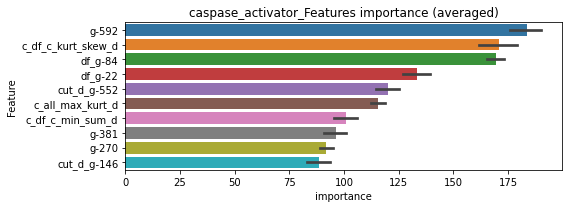

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000283102	valid_1's binary_logloss: 0.000680909


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000281167	valid_1's binary_logloss: 0.000765126


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 caspase_activator=================================


Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000289934	valid_1's binary_logloss: 0.00220307
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000287112	valid_1's binary_logloss: 0.000648465


caspase_activator logloss: 0.0010742087221100325
catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000300892	valid_1's binary_logloss: 0.00235806
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00030148	valid_1's binary_logloss: 0.00129317
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000301082	valid_1's binary_logloss: 0.000533716
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016696, Threshold: 0.0090984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0090984, conf_0:0.00637, conf_1:0.01183
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0390984


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00030142	valid_1's binary_logloss: 0.00746218


threshold: 0.0390984, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000287721	valid_1's binary_logloss: 0.00157306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000293634	valid_1's binary_logloss: 0.00137633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000296568	valid_1's binary_logloss: 0.00043101
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0420298, Threshold: 0.0390984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00076
Num_p_label: 29.0, Expected: 3.0, Threshold: 0.0390984, conf_0:0.03128, conf_1:0.04692
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_1: 0.0690984
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0990984
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1290984


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000292695	valid_1's binary_logloss: 0.0081306


threshold: 0.1290984, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000287721	valid_1's binary_logloss: 0.00157306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000293634	valid_1's binary_logloss: 0.00137633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000296568	valid_1's binary_logloss: 0.00043101
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0420298, Threshold: 0.1290984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.1290984, conf_0:0.11619, conf_1:0.14201


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000292695	valid_1's binary_logloss: 0.0081306


threshold: 0.1290984, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


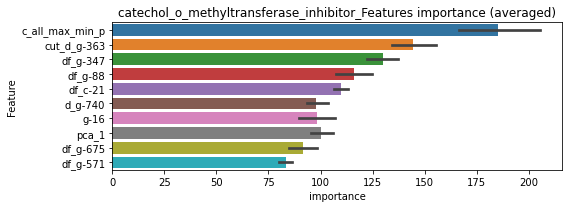

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.00029354	valid_1's binary_logloss: 0.00112373


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000294396	valid_1's binary_logloss: 0.00100272


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000296076	valid_1's binary_logloss: 0.000434837


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000294353	valid_1's binary_logloss: 0.00486197


catechol_o_methyltransferase_inhibitor logloss: 0.0018559392774225385
cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3277
target_rate: 0.0042832 → Adj_target_rate: 0.0042806


selected negative label: 3277


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.063953	valid_1's binary_logloss: 0.134965
Early stopping, best iteration is:
[1207]	training's binary_logloss: 0.0557617	valid_1's binary_logloss: 0.132534
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0676769	valid_1's binary_logloss: 0.118062
[2000]	training's binary_logloss: 0.038928	valid_1's binary_logloss: 0.106608
Early stopping, best iteration is:
[2347]	training's binary_logloss: 0.0332011	valid_1's binary_logloss: 0.10499
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0713919	valid_1's binary_logloss: 0.0946517
[2000]	training's binary_logloss: 0.0406448	valid_1's binary_logloss: 0.0814301
Early stopping, best iteration is:
[2542]	training's binary_logloss: 0.0321582	valid_1's binary_logloss: 0.0789195
Training until validation scores don't improve for 30 rounds
[1000]	training's b

1 / 3, AUC score:0.981, PR-AUC:0.960
y_Threshold: 0.0531612, Threshold: 0.1036027, pos_neg_ratio: 0.8000000
Remove_noisy_data: 222 → Positive_corect_labels: 610/3710
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, Expected: 17.1, Threshold: 0.1036027, conf_0:0.07252, conf_1:0.13468
Num_p_label: 14.0, Expected: 17.1, Adj_threshold_1: 0.1336027
threshold: 0.1336027, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 610.0/3710, y_label_rate: 0.1644205
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0487466	valid_1's binary_logloss: 0.0697694
[2000]	training's binary_logloss: 0.0268272	valid_1's binary_logloss: 0.0571521
[3000]	training's binary_logloss: 0.0179024	valid_1's binary_logloss: 0.0530003
Early stopping, best iteration is:
[2997]	training's binary_logloss: 0.0179209	valid_1's binary_logloss: 0.0529966
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0443343	valid_1's binary_logloss: 0.0916257
Early stopping, best iteration is:
[1728]	training's binary_logloss: 0.0280804	valid_1's binary_logloss: 0.0828509
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0489874	valid_1's binary_logloss: 0.0668028
[2000]	training's binary_logloss: 0.0271446	valid_1's binary_logloss: 0.0542977
[3000]	training's binary_logloss: 0.0180245	valid_1's binary_logloss: 0.0498423
Early stopping, best iterat

2 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0555341, Threshold: 0.1336027, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 588.0/3666
p_label_rate: 0.0075339 Vs.target_rate: 0.00428
Num_p_label: 30.0, Expected: 17.1, Threshold: 0.1336027, conf_0:0.10688, conf_1:0.16032
Num_p_label: 16.0, Expected: 17.1, Adj_threshold_1: 0.1636027
threshold: 0.1636027, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 588.0/3666, y_label_rate: 0.1603928
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0378565	valid_1's binary_logloss: 0.0540489
[2000]	training's binary_logloss: 0.0205978	valid_1's binary_logloss: 0.0422361
[3000]	training's binary_logloss: 0.0138637	valid_1's binary_logloss: 0.0383029
Early stopping, best iteration is:
[3776]	training's binary_logloss: 0.0110218	valid_1's binary_logloss: 0.0366411
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0348281	valid_1's binary_logloss: 0.0664799
[2000]	training's binary_logloss: 0.018969	valid_1's binary_logloss: 0.0549589
Early stopping, best iteration is:
[2288]	training's binary_logloss: 0.0166974	valid_1's binary_logloss: 0.0533951
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0389494	valid_1's binary_logloss: 0.0472676
[2000]	training's binary_logloss: 0.0212919	valid_1's binary_logloss: 0.0338195
[3000]	training's binary_log

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0482336, Threshold: 0.1636027, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 579.0/3648
p_label_rate: 0.0075339 Vs.target_rate: 0.00428
Num_p_label: 30.0, Expected: 17.1, Threshold: 0.1636027, conf_0:0.14724, conf_1:0.17996
Num_p_label: 15.0, Expected: 17.1, Adj_threshold_1: 0.1936027
threshold: 0.1936027, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 579.0/3648, y_label_rate: 0.1587171


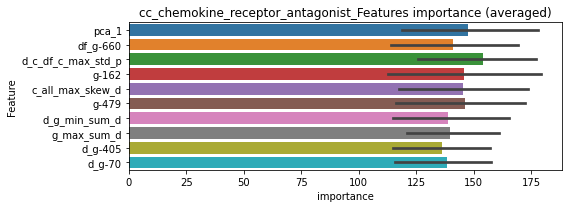

len(train_index) : 2736
len(valid_index) : 912
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0470811	valid_1's binary_logloss: 0.0497262
[2000]	training's binary_logloss: 0.0265723	valid_1's binary_logloss: 0.0309531
[3000]	training's binary_logloss: 0.0185258	valid_1's binary_logloss: 0.024299
[4000]	training's binary_logloss: 0.0141704	valid_1's binary_logloss: 0.0209073
[5000]	training's binary_logloss: 0.0114208	valid_1's binary_logloss: 0.0186765
[6000]	training's binary_logloss: 0.00953762	valid_1's binary_logloss: 0.0171578
[7000]	training's binary_logloss: 0.00819643	valid_1's binary_logloss: 0.0160777
[8000]	training's binary_logloss: 0.00718964	valid_1's binary_logloss: 0.0152352
[9000]	training's binary_logloss: 0.00640226	valid_1's binary_logloss: 0.0145559
[10000]	training's binary_logloss: 0.0057785	valid_1's binary_logloss: 0.0140291
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0057785	valid_1's binary_logloss: 0.0140291


len(train_index) : 2736
len(valid_index) : 912
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0433804	valid_1's binary_logloss: 0.0656095
[2000]	training's binary_logloss: 0.0238175	valid_1's binary_logloss: 0.048452
[3000]	training's binary_logloss: 0.0165233	valid_1's binary_logloss: 0.0427234
Early stopping, best iteration is:
[3332]	training's binary_logloss: 0.0149526	valid_1's binary_logloss: 0.0415942


len(train_index) : 2736
len(valid_index) : 912
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0456802	valid_1's binary_logloss: 0.0544267
[2000]	training's binary_logloss: 0.0256161	valid_1's binary_logloss: 0.0368722
[3000]	training's binary_logloss: 0.017787	valid_1's binary_logloss: 0.0310281
[4000]	training's binary_logloss: 0.0135418	valid_1's binary_logloss: 0.0280647
[5000]	training's binary_logloss: 0.0109093	valid_1's binary_logloss: 0.0263057
[6000]	training's binary_logloss: 0.00908986	valid_1's binary_logloss: 0.024945
Early stopping, best iteration is:
[6860]	training's binary_logloss: 0.00796239	valid_1's binary_logloss: 0.0241844


len(train_index) : 2736
len(valid_index) : 912
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.043375	valid_1's binary_logloss: 0.0642481
[2000]	training's binary_logloss: 0.0240737	valid_1's binary_logloss: 0.0467785
[3000]	training's binary_logloss: 0.0167327	valid_1's binary_logloss: 0.0406987
[4000]	training's binary_logloss: 0.0127131	valid_1's binary_logloss: 0.0377796
Early stopping, best iteration is:
[4939]	training's binary_logloss: 0.0103467	valid_1's binary_logloss: 0.0361688


cc_chemokine_receptor_antagonist logloss: 0.02899414047558776
cc_chemokine_receptor_antagonist is unpredictable(><)!
cck_receptor_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000309292	valid_1's binary_logloss: 0.00163279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000312886	valid_1's binary_logloss: 0.00216559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000306231	valid_1's binary_logloss: 0.000886177
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013995, Threshold: 0.0032761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0032761, conf_0:0.00229, conf_1:0.00426
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0332761


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000311249	valid_1's binary_logloss: 0.000914939


threshold: 0.0332761, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000300678	valid_1's binary_logloss: 0.00130626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000295506	valid_1's binary_logloss: 0.00235857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000297752	valid_1's binary_logloss: 0.000803491
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0898555, Threshold: 0.0332761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332761, conf_0:0.02662, conf_1:0.03993


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000296934	valid_1's binary_logloss: 0.000653008


threshold: 0.0332761, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000300678	valid_1's binary_logloss: 0.00130626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000295506	valid_1's binary_logloss: 0.00235857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000297752	valid_1's binary_logloss: 0.000803491
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0898817, Threshold: 0.0332761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332761, conf_0:0.02995, conf_1:0.03660


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000296934	valid_1's binary_logloss: 0.000653008


threshold: 0.0332761, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


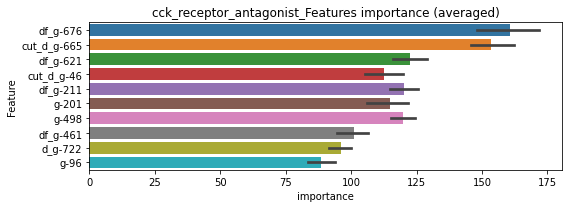

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000310132	valid_1's binary_logloss: 0.00137618


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000299431	valid_1's binary_logloss: 0.00125679


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000304456	valid_1's binary_logloss: 0.000689321


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000302092	valid_1's binary_logloss: 0.000810496


cck_receptor_antagonist logloss: 0.001033347047277023


mutually exclusive columns: cdk_inhibitor


cdk_inhibitor, len(trt): 352, len(othr): 7583
target_rate: 0.0147812 → Adj_target_rate: 0.0122676


selected negative label: 7583


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0909446	valid_1's binary_logloss: 0.158743
[2000]	training's binary_logloss: 0.0505784	valid_1's binary_logloss: 0.148539
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0483429	valid_1's binary_logloss: 0.147692
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0909662	valid_1's binary_logloss: 0.153255
Early stopping, best iteration is:
[1908]	training's binary_logloss: 0.0534019	valid_1's binary_logloss: 0.140761
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0906863	valid_1's binary_logloss: 0.159359
Early stopping, best iteration is:
[1719]	training's binary_logloss: 0.0584845	valid_1's binary_logloss: 0.150912
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0896829	valid_1's binary_logloss: 0.164952
Early stopping, bes

1 / 3, AUC score:0.950, PR-AUC:0.911
y_Threshold: 0.0756419, Threshold: 0.1210427, pos_neg_ratio: 0.8000000
Remove_noisy_data: 714 → Positive_corect_labels: 1311/8385
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, Expected: 58.9, Threshold: 0.1210427, conf_0:0.08473, conf_1:0.15736
threshold: 0.1210427, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1311.0/8385, y_label_rate: 0.1563506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0528583	valid_1's binary_logloss: 0.0909017
[2000]	training's binary_logloss: 0.0283115	valid_1's binary_logloss: 0.076907
Early stopping, best iteration is:
[2345]	training's binary_logloss: 0.0241532	valid_1's binary_logloss: 0.0749235
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0532817	valid_1's binary_logloss: 0.0845311
[2000]	training's binary_logloss: 0.0285456	valid_1's binary_logloss: 0.0710325
Early stopping, best iteration is:
[2193]	training's binary_logloss: 0.0260113	valid_1's binary_logloss: 0.0698494
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0535731	valid_1's binary_logloss: 0.0874052
[2000]	training's binary_logloss: 0.0286748	valid_1's binary_logloss: 0.0732534
[3000]	training's binary_logloss: 0.0189331	valid_1's binary_logloss: 0.0689851
Early stopping, best iterati

2 / 3, AUC score:0.995, PR-AUC:0.985
y_Threshold: 0.0671853, Threshold: 0.1210427, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 1237.0/8237
p_label_rate: 0.0060271 Vs.target_rate: 0.01478
Num_p_label: 24.0, Expected: 58.9, Threshold: 0.1210427, conf_0:0.09683, conf_1:0.14525
threshold: 0.1210427, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 1237.0/8237, y_label_rate: 0.1501760
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0389879	valid_1's binary_logloss: 0.0623957
[2000]	training's binary_logloss: 0.0200901	valid_1's binary_logloss: 0.0478184
[3000]	training's binary_logloss: 0.0132485	valid_1's binary_logloss: 0.0432706
Early stopping, best iteration is:
[3521]	training's binary_logloss: 0.0112219	valid_1's binary_logloss: 0.0419717
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0395545	valid_1's binary_logloss: 0.0626227
[2000]	training's binary_logloss: 0.0204722	valid_1's binary_logloss: 0.0473872
[3000]	training's binary_logloss: 0.0135503	valid_1's binary_logloss: 0.0423766
Early stopping, best iteration is:
[3014]	training's binary_logloss: 0.0134798	valid_1's binary_logloss: 0.0422809
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0398435	valid_1's binary_logloss: 0.0587845
[2000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0516357, Threshold: 0.1210427, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 1209.0/8181
p_label_rate: 0.0045203 Vs.target_rate: 0.01478
Num_p_label: 18.0, Expected: 58.9, Threshold: 0.1210427, conf_0:0.10894, conf_1:0.13315
threshold: 0.1210427, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 1209.0/8181, y_label_rate: 0.1477814


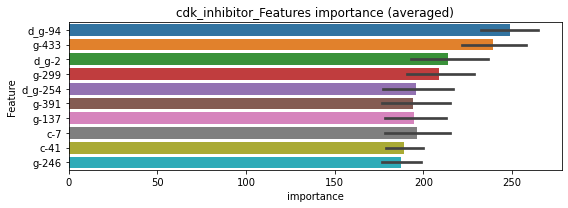

len(train_index) : 6135
len(valid_index) : 2046
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0440202	valid_1's binary_logloss: 0.0623998
[2000]	training's binary_logloss: 0.0238958	valid_1's binary_logloss: 0.0439539
[3000]	training's binary_logloss: 0.0162847	valid_1's binary_logloss: 0.0374637
[4000]	training's binary_logloss: 0.0122369	valid_1's binary_logloss: 0.0340973
[5000]	training's binary_logloss: 0.00975976	valid_1's binary_logloss: 0.0321253
Early stopping, best iteration is:
[5448]	training's binary_logloss: 0.00893163	valid_1's binary_logloss: 0.0314613


len(train_index) : 6136
len(valid_index) : 2045
================================= fold 2/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0438617	valid_1's binary_logloss: 0.063603
[2000]	training's binary_logloss: 0.0240694	valid_1's binary_logloss: 0.0440072
[3000]	training's binary_logloss: 0.0164621	valid_1's binary_logloss: 0.0370942
[4000]	training's binary_logloss: 0.0123761	valid_1's binary_logloss: 0.0333797
[5000]	training's binary_logloss: 0.00987048	valid_1's binary_logloss: 0.0311909
Early stopping, best iteration is:
[5199]	training's binary_logloss: 0.00949216	valid_1's binary_logloss: 0.0308412


len(train_index) : 6136
len(valid_index) : 2045
================================= fold 3/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0439318	valid_1's binary_logloss: 0.0627047
[2000]	training's binary_logloss: 0.0238865	valid_1's binary_logloss: 0.0437636
[3000]	training's binary_logloss: 0.0162542	valid_1's binary_logloss: 0.0371983
[4000]	training's binary_logloss: 0.0122246	valid_1's binary_logloss: 0.0338191
[5000]	training's binary_logloss: 0.00978154	valid_1's binary_logloss: 0.0318667
Early stopping, best iteration is:
[5382]	training's binary_logloss: 0.00906822	valid_1's binary_logloss: 0.0312071


len(train_index) : 6136
len(valid_index) : 2045
================================= fold 4/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0446801	valid_1's binary_logloss: 0.0566622
[2000]	training's binary_logloss: 0.0243704	valid_1's binary_logloss: 0.0382584
[3000]	training's binary_logloss: 0.0166247	valid_1's binary_logloss: 0.0316726
[4000]	training's binary_logloss: 0.0124843	valid_1's binary_logloss: 0.0283267
[5000]	training's binary_logloss: 0.00995938	valid_1's binary_logloss: 0.0263281
[6000]	training's binary_logloss: 0.00828006	valid_1's binary_logloss: 0.0249759
[7000]	training's binary_logloss: 0.00711081	valid_1's binary_logloss: 0.0241552
Early stopping, best iteration is:
[7786]	training's binary_logloss: 0.0063845	valid_1's binary_logloss: 0.0234997


cdk_inhibitor logloss: 0.029252581655589232
cdk_inhibitor is unpredictable(><)!
chelating_agent, len(trt): 54, len(othr): 3280
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3280


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000634091	valid_1's binary_logloss: 0.0241802
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000551893	valid_1's binary_logloss: 0.0164156
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000527497	valid_1's binary_logloss: 0.00492219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000660421	valid_1's binary_logloss: 0.0241797


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0048108, Threshold: 0.0163525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0163525, conf_0:0.01145, conf_1:0.02126
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.0463525
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_2: 0.0763525
threshold: 0.0763525, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000569702	valid_1's binary_logloss: 0.0221034
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000531259	valid_1's binary_logloss: 0.0135341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.00052534	valid_1's binary_logloss: 0.00460284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000520227	valid_1's binary_logloss: 0.023399


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0224471, Threshold: 0.0763525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0065294 Vs.target_rate: 0.00227
Num_p_label: 26.0, Expected: 9.0, Threshold: 0.0763525, conf_0:0.06108, conf_1:0.09162
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.1063525
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_2: 0.1363525
threshold: 0.1363525, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000520362	valid_1's binary_logloss: 0.00868488
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000520119	valid_1's binary_logloss: 0.0154487
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000522669	valid_1's binary_logloss: 0.0178838
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000730166	valid_1's binary_logloss: 0.0243716


y_Threshold: 0.0230638, Threshold: 0.1363525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0057760 Vs.target_rate: 0.00227
Num_p_label: 23.0, Expected: 9.0, Threshold: 0.1363525, conf_0:0.12272, conf_1:0.14999
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_1: 0.1663525
threshold: 0.1663525, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


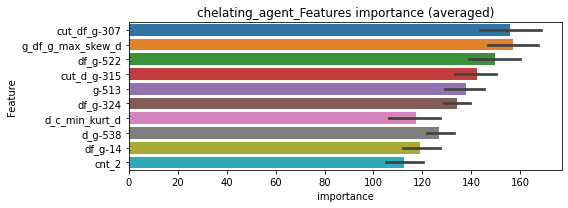

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000498951	valid_1's binary_logloss: 0.0089516
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000497332	valid_1's binary_logloss: 0.0089359


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000662953	valid_1's binary_logloss: 0.0199669


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000520252	valid_1's binary_logloss: 0.00742096


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


chelating_agent logloss: 0.013099907184820745


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00090725	valid_1's binary_logloss: 0.0160601


chk_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000345422	valid_1's binary_logloss: 0.00113867
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000349739	valid_1's binary_logloss: 0.00191171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000363195	valid_1's binary_logloss: 0.000866409
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027590, Threshold: 0.0524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0524497, conf_0:0.03671, conf_1:0.06818


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000359771	valid_1's binary_logloss: 0.00107256


Num_p_label: 28.0, Expected: 4.0, Adj_threshold_1: 0.0824497
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_2: 0.1124497
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_3: 0.1424497
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_4: 0.1724497
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_5: 0.2024497
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_6: 0.2324497
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_7: 0.2624497
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_8: 0.2924497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.3224497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_10: 0.3524497
threshold: 0.3524497, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335283	valid_1's binary_logloss: 0.000972783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000340312	valid_1's binary_logloss: 0.00143889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000337091	valid_1's binary_logloss: 0.000714623
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1611848, Threshold: 0.3524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0090407 Vs.target_rate: 0.00101
Num_p_label: 36.0, Expected: 4.0, Threshold: 0.3524497, conf_0:0.28196, conf_1:0.42294
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_1: 0.3824497
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_2: 0.4124497
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_3: 0.4424497


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000342619	valid_1's binary_logloss: 0.0010953


Num_p_label: 28.0, Expected: 4.0, Adj_threshold_4: 0.4724497
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_5: 0.5024497
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_6: 0.5324497
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_7: 0.5624497
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_8: 0.5924497
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_9: 0.6224497
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_10: 0.6524497
threshold: 0.6524497, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335283	valid_1's binary_logloss: 0.000972783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000340312	valid_1's binary_logloss: 0.00143889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000337091	valid_1's binary_logloss: 0.000714623
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1611848, Threshold: 0.6524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, Expected: 4.0, Threshold: 0.6524497, conf_0:0.58720, conf_1:0.71769
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_1: 0.6824497
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.7124497
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_3: 0.7424497
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_4: 0.7724497


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000342619	valid_1's binary_logloss: 0.0010953


Num_p_label: 12.0, Expected: 4.0, Adj_threshold_5: 0.8024497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_6: 0.8324497
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_7: 0.8624497
threshold: 0.8624497, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


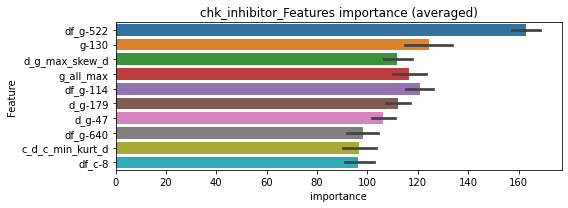

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000349335	valid_1's binary_logloss: 0.000868088


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000340507	valid_1's binary_logloss: 0.001225


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000343309	valid_1's binary_logloss: 0.000803924


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000344501	valid_1's binary_logloss: 0.00106844


chk_inhibitor logloss: 0.0009913453242998485
chloride_channel_blocker, len(trt): 42, len(othr): 3279
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000470364	valid_1's binary_logloss: 0.00593944
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000466538	valid_1's binary_logloss: 0.0121803
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000472255	valid_1's binary_logloss: 0.00520967
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000469761	valid_1's binary_logloss: 0.00879355


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036083, Threshold: 0.0307272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0307272, conf_0:0.02151, conf_1:0.03995
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_1: 0.0607272
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_2: 0.0907272
threshold: 0.0907272, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000452107	valid_1's binary_logloss: 0.00551996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000475851	valid_1's binary_logloss: 0.00858911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000506688	valid_1's binary_logloss: 0.00532721
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000472879	valid_1's binary_logloss: 0.0082991


y_Threshold: 0.0394437, Threshold: 0.0907272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0155701 Vs.target_rate: 0.00176
Num_p_label: 62.0, Expected: 7.0, Threshold: 0.0907272, conf_0:0.07258, conf_1:0.10887
Num_p_label: 55.0, Expected: 7.0, Adj_threshold_1: 0.1207272
Num_p_label: 48.0, Expected: 7.0, Adj_threshold_2: 0.1507272
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_3: 0.1807272
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_4: 0.2107272
Num_p_label: 31.0, Expected: 7.0, Adj_threshold_5: 0.2407272
Num_p_label: 26.0, Expected: 7.0, Adj_threshold_6: 0.2707272
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_7: 0.3007272
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_8: 0.3307272
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_9: 0.3607272
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_10: 0.3907272
threshold: 0.3907272, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3802, y_label_rate: 0.1722

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000452107	valid_1's binary_logloss: 0.00551996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000475851	valid_1's binary_logloss: 0.00858911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000506688	valid_1's binary_logloss: 0.00532721
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000472879	valid_1's binary_logloss: 0.0082991


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0394437, Threshold: 0.3907272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0045203 Vs.target_rate: 0.00176
Num_p_label: 18.0, Expected: 7.0, Threshold: 0.3907272, conf_0:0.35165, conf_1:0.42980
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.4207272
threshold: 0.4207272, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


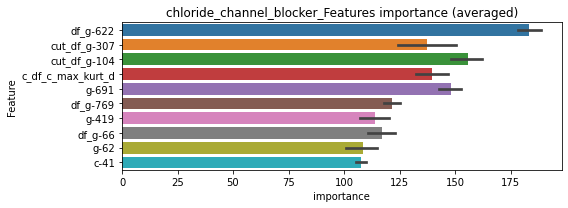

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000462711	valid_1's binary_logloss: 0.00469207


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000474733	valid_1's binary_logloss: 0.0067265


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000462247	valid_1's binary_logloss: 0.00456178


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000485099	valid_1's binary_logloss: 0.00809451


chloride_channel_blocker logloss: 0.0060210218971286315
cholesterol_inhibitor, len(trt): 48, len(othr): 3286
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000490532	valid_1's binary_logloss: 0.0106264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000510735	valid_1's binary_logloss: 0.0127336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000490598	valid_1's binary_logloss: 0.00252564
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000477508	valid_1's binary_logloss: 0.00833974


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041254, Threshold: 0.0132104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0132104, conf_0:0.00925, conf_1:0.01717
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_1: 0.0432104
threshold: 0.0432104, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000508617	valid_1's binary_logloss: 0.0092629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000571143	valid_1's binary_logloss: 0.0131223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000477159	valid_1's binary_logloss: 0.00241287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000477098	valid_1's binary_logloss: 0.00770112


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354554, Threshold: 0.0432104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00202
Num_p_label: 17.0, Expected: 8.0, Threshold: 0.0432104, conf_0:0.03457, conf_1:0.05185
threshold: 0.0432104, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000508617	valid_1's binary_logloss: 0.0092629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000571143	valid_1's binary_logloss: 0.0131223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000477159	valid_1's binary_logloss: 0.00241287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000477098	valid_1's binary_logloss: 0.00770112


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354554, Threshold: 0.0432104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00202
Num_p_label: 17.0, Expected: 8.0, Threshold: 0.0432104, conf_0:0.03889, conf_1:0.04753
threshold: 0.0432104, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


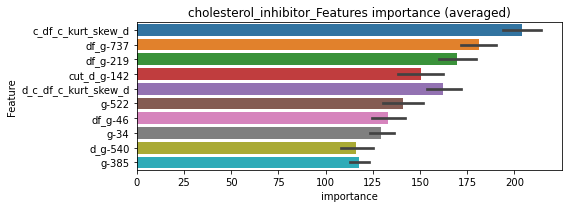

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000475724	valid_1's binary_logloss: 0.00843338


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000481094	valid_1's binary_logloss: 0.0115145


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000482923	valid_1's binary_logloss: 0.00264433
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000483156	valid_1's binary_logloss: 0.00264374


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000491891	valid_1's binary_logloss: 0.00935063


cholesterol_inhibitor logloss: 0.007991061991790928
cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3286
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000523312	valid_1's binary_logloss: 0.0145485
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00055695	valid_1's binary_logloss: 0.0142857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000580293	valid_1's binary_logloss: 0.0101624
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000758515	valid_1's binary_logloss: 0.0145313


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044919, Threshold: 0.0097991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0097991, conf_0:0.00686, conf_1:0.01274
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_1: 0.0397991
threshold: 0.0397991, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00053355	valid_1's binary_logloss: 0.0146893
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000525474	valid_1's binary_logloss: 0.0144009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000509151	valid_1's binary_logloss: 0.00973826
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000602406	valid_1's binary_logloss: 0.0138061


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0271513, Threshold: 0.0397991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0020090 Vs.target_rate: 0.00227
Num_p_label: 8.0, Expected: 9.0, Threshold: 0.0397991, conf_0:0.03184, conf_1:0.04776
threshold: 0.0397991, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000566546	valid_1's binary_logloss: 0.0208555
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000504642	valid_1's binary_logloss: 0.00676098
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000568739	valid_1's binary_logloss: 0.0063707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000563409	valid_1's binary_logloss: 0.022914


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0311180, Threshold: 0.0397991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, Expected: 9.0, Threshold: 0.0397991, conf_0:0.03582, conf_1:0.04378
threshold: 0.0397991, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3805, y_label_rate: 0.1718791


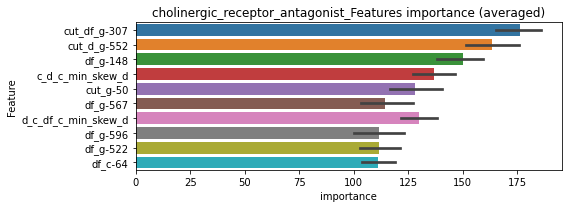

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000631144	valid_1's binary_logloss: 0.00739663


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000680623	valid_1's binary_logloss: 0.0130907


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000521743	valid_1's binary_logloss: 0.00945977


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000666652	valid_1's binary_logloss: 0.0119205


cholinergic_receptor_antagonist logloss: 0.010467240324984263
coagulation_factor_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000339175	valid_1's binary_logloss: 0.00147322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000331164	valid_1's binary_logloss: 0.00231605
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000340977	valid_1's binary_logloss: 0.00175983
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020091, Threshold: 0.0104905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0104905, conf_0:0.00734, conf_1:0.01364


Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000356108	valid_1's binary_logloss: 0.00653134


Num_p_label: 12.0, Expected: 4.0, Adj_threshold_1: 0.0404905
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0704905
threshold: 0.0704905, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000334255	valid_1's binary_logloss: 0.00127968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000323447	valid_1's binary_logloss: 0.00183887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000332912	valid_1's binary_logloss: 0.00164977
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276819, Threshold: 0.0704905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000335519	valid_1's binary_logloss: 0.00518322


p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0704905, conf_0:0.05639, conf_1:0.08459
threshold: 0.0704905, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000334255	valid_1's binary_logloss: 0.00127968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000323447	valid_1's binary_logloss: 0.00183887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000332912	valid_1's binary_logloss: 0.00164977
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276819, Threshold: 0.0704905, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000335519	valid_1's binary_logloss: 0.00518322


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0704905, conf_0:0.06344, conf_1:0.07754
threshold: 0.0704905, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


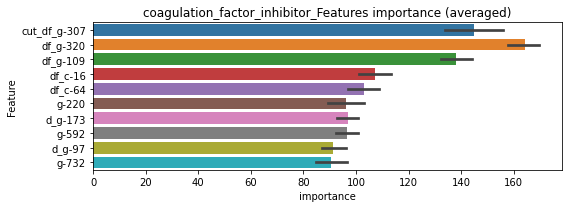

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000336907	valid_1's binary_logloss: 0.00128482
Early stopping, best iteration is:
[1046]	training's binary_logloss: 0.000333786	valid_1's binary_logloss: 0.00127921


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000335394	valid_1's binary_logloss: 0.00201584


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000335773	valid_1's binary_logloss: 0.00144264
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000335495	valid_1's binary_logloss: 0.00144118


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000343868	valid_1's binary_logloss: 0.00356907


coagulation_factor_inhibitor logloss: 0.002076148221522129
corticosteroid_agonist, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000437964	valid_1's binary_logloss: 0.00369693
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000417539	valid_1's binary_logloss: 0.00978523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000432317	valid_1's binary_logloss: 0.00349006
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000443437	valid_1's binary_logloss: 0.0066927


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039663, Threshold: 0.0112135, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0112135, conf_0:0.00785, conf_1:0.01458
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0412135
threshold: 0.0412135, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000417958	valid_1's binary_logloss: 0.00288171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00042539	valid_1's binary_logloss: 0.00864866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000419309	valid_1's binary_logloss: 0.00356476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000443368	valid_1's binary_logloss: 0.00693857


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0353321, Threshold: 0.0412135, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0412135, conf_0:0.03297, conf_1:0.04946
threshold: 0.0412135, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000417958	valid_1's binary_logloss: 0.00288171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00042539	valid_1's binary_logloss: 0.00864866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000419309	valid_1's binary_logloss: 0.00356476
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000443368	valid_1's binary_logloss: 0.00693857


y_Threshold: 0.0353321, Threshold: 0.0412135, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0412135, conf_0:0.03709, conf_1:0.04533
threshold: 0.0412135, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


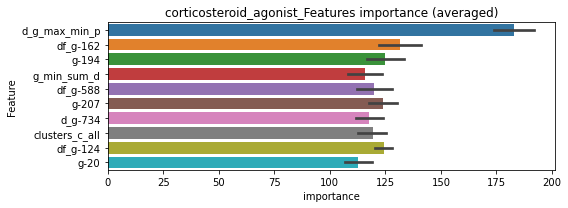

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000424361	valid_1's binary_logloss: 0.0036221


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000480247	valid_1's binary_logloss: 0.00745574


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000488757	valid_1's binary_logloss: 0.00436461


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000433455	valid_1's binary_logloss: 0.00479776


corticosteroid_agonist logloss: 0.005060120860538934
cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3230
target_rate: 0.0182666 → Adj_target_rate: 0.0146863


selected negative label: 3230


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.25278	valid_1's binary_logloss: 0.399223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.194228	valid_1's binary_logloss: 0.379902
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.192537	valid_1's binary_logloss: 0.365094
Early stopping, best iteration is:
[1076]	training's binary_logloss: 0.183394	valid_1's binary_logloss: 0.362897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.215938	valid_1's binary_logloss: 0.373472


1 / 3, AUC score:0.735, PR-AUC:0.567
y_Threshold: 0.1769543, Threshold: 0.3878324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 752 → Positive_corect_labels: 335/3124
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, Expected: 72.7, Threshold: 0.3878324, conf_0:0.27148, conf_1:0.50418
threshold: 0.3878324, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 335.0/3124, y_label_rate: 0.1072343
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0977815	valid_1's binary_logloss: 0.187718
Early stopping, best iteration is:
[1806]	training's binary_logloss: 0.057568	valid_1's binary_logloss: 0.164817
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.101112	valid_1's binary_logloss: 0.180935
[2000]	training's binary_logloss: 0.0545918	valid_1's binary_logloss: 0.150793
Early stopping, best iteration is:
[2702]	training's binary_logloss: 0.0403308	valid_1's binary_logloss: 0.141558
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0988054	valid_1's binary_logloss: 0.191239
[2000]	training's binary_logloss: 0.0530487	valid_1's binary_logloss: 0.165253
Early stopping, best iteration is:
[2749]	training's binary_logloss: 0.0383763	valid_1's binary_logloss: 0.157386
Training until validation scores don't improve for 30 rounds
[1000]	training's bin

2 / 3, AUC score:0.974, PR-AUC:0.912
y_Threshold: 0.0929003, Threshold: 0.3878324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 108 → Positive_corect_labels: 281.0/3016
p_label_rate: 0.0346560 Vs.target_rate: 0.01827
Num_p_label: 138.0, Expected: 72.7, Threshold: 0.3878324, conf_0:0.31027, conf_1:0.46540
Num_p_label: 131.0, Expected: 72.7, Adj_threshold_1: 0.4178324
Num_p_label: 127.0, Expected: 72.7, Adj_threshold_2: 0.4478324
Num_p_label: 124.0, Expected: 72.7, Adj_threshold_3: 0.4778324
Num_p_label: 118.0, Expected: 72.7, Adj_threshold_4: 0.5078324
Num_p_label: 115.0, Expected: 72.7, Adj_threshold_5: 0.5378324
Num_p_label: 104.0, Expected: 72.7, Adj_threshold_6: 0.5678324
threshold: 0.5678324, positive_p_label: 104.0/3982, p_label_rate: 0.0261175
positive_y_label: 281.0/3016, y_label_rate: 0.0931698
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0777907	valid_1's binary_logloss: 0.143045
[2000]	training's binary_logloss: 0.040176	valid_1's binary_logloss: 0.115481
Early stopping, best iteration is:
[2847]	training's binary_logloss: 0.0277883	valid_1's binary_logloss: 0.107557
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0767209	valid_1's binary_logloss: 0.155624
[2000]	training's binary_logloss: 0.0392894	valid_1's binary_logloss: 0.12966
Early stopping, best iteration is:
[2748]	training's binary_logloss: 0.0282827	valid_1's binary_logloss: 0.122592
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0796387	valid_1's binary_logloss: 0.143766
[2000]	training's binary_logloss: 0.0412163	valid_1's binary_logloss: 0.114672
[3000]	training's binary_logloss: 0.026859	valid_1's binary_logloss: 0.102813
Early stopping, best iteration is:
[332

3 / 3, AUC score:0.989, PR-AUC:0.960
y_Threshold: 0.0700703, Threshold: 0.5678324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 257.0/2968
p_label_rate: 0.0336514 Vs.target_rate: 0.01827
Num_p_label: 134.0, Expected: 72.7, Threshold: 0.5678324, conf_0:0.51105, conf_1:0.62462
Num_p_label: 126.0, Expected: 72.7, Adj_threshold_1: 0.5978324
Num_p_label: 120.0, Expected: 72.7, Adj_threshold_2: 0.6278324
Num_p_label: 114.0, Expected: 72.7, Adj_threshold_3: 0.6578324
Num_p_label: 108.0, Expected: 72.7, Adj_threshold_4: 0.6878324
threshold: 0.6878324, positive_p_label: 108.0/3982, p_label_rate: 0.0271220
positive_y_label: 257.0/2968, y_label_rate: 0.0865903


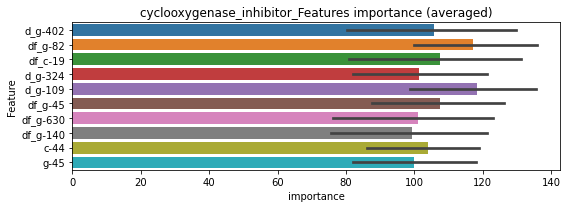

len(train_index) : 2226
len(valid_index) : 742
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0916228	valid_1's binary_logloss: 0.145624
[2000]	training's binary_logloss: 0.0481146	valid_1's binary_logloss: 0.109492
[3000]	training's binary_logloss: 0.0321051	valid_1's binary_logloss: 0.0963723
[4000]	training's binary_logloss: 0.0238023	valid_1's binary_logloss: 0.0893922
Early stopping, best iteration is:
[4222]	training's binary_logloss: 0.022543	valid_1's binary_logloss: 0.0885465


len(train_index) : 2226
len(valid_index) : 742
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0929598	valid_1's binary_logloss: 0.14765
[2000]	training's binary_logloss: 0.0487376	valid_1's binary_logloss: 0.109305
[3000]	training's binary_logloss: 0.0324177	valid_1's binary_logloss: 0.0953383
[4000]	training's binary_logloss: 0.0240655	valid_1's binary_logloss: 0.0885351
Early stopping, best iteration is:
[4269]	training's binary_logloss: 0.0225239	valid_1's binary_logloss: 0.0872952


len(train_index) : 2226
len(valid_index) : 742
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0948695	valid_1's binary_logloss: 0.142754
[2000]	training's binary_logloss: 0.0496403	valid_1's binary_logloss: 0.104736
[3000]	training's binary_logloss: 0.0332363	valid_1's binary_logloss: 0.0913546
[4000]	training's binary_logloss: 0.0246912	valid_1's binary_logloss: 0.0842243
Early stopping, best iteration is:
[4032]	training's binary_logloss: 0.024497	valid_1's binary_logloss: 0.0840628


len(train_index) : 2226
len(valid_index) : 742
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0958255	valid_1's binary_logloss: 0.143896
[2000]	training's binary_logloss: 0.0502183	valid_1's binary_logloss: 0.102689
[3000]	training's binary_logloss: 0.0336891	valid_1's binary_logloss: 0.0881586
[4000]	training's binary_logloss: 0.0250297	valid_1's binary_logloss: 0.0811754
Early stopping, best iteration is:
[4300]	training's binary_logloss: 0.0232821	valid_1's binary_logloss: 0.0797156


cyclooxygenase_inhibitor logloss: 0.08490503934099759
cyclooxygenase_inhibitor is unpredictable(><)!
cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3271
target_rate: 0.0043672 → Adj_target_rate: 0.0043519


selected negative label: 3271


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0668048	valid_1's binary_logloss: 0.132437
Early stopping, best iteration is:
[1713]	training's binary_logloss: 0.0436261	valid_1's binary_logloss: 0.124258
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0683008	valid_1's binary_logloss: 0.12414
Early stopping, best iteration is:
[1841]	training's binary_logloss: 0.0419439	valid_1's binary_logloss: 0.114261
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0747363	valid_1's binary_logloss: 0.0960879
[2000]	training's binary_logloss: 0.0420764	valid_1's binary_logloss: 0.0807642
Early stopping, best iteration is:
[2885]	training's binary_logloss: 0.0290636	valid_1's binary_logloss: 0.0755238
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0730921	valid_1's binary_logloss: 0.104361
[2000]	training's

1 / 3, AUC score:0.983, PR-AUC:0.963
y_Threshold: 0.0519764, Threshold: 0.1036294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 211 → Positive_corect_labels: 614/3714
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, Expected: 17.4, Threshold: 0.1036294, conf_0:0.07254, conf_1:0.13472
Num_p_label: 13.0, Expected: 17.4, Adj_threshold_1: 0.1336294
threshold: 0.1336294, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 614.0/3714, y_label_rate: 0.1653204
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0519824	valid_1's binary_logloss: 0.0888867
[2000]	training's binary_logloss: 0.0289209	valid_1's binary_logloss: 0.0758188
Early stopping, best iteration is:
[2059]	training's binary_logloss: 0.0281025	valid_1's binary_logloss: 0.0752489
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0535221	valid_1's binary_logloss: 0.0791298
[2000]	training's binary_logloss: 0.0294982	valid_1's binary_logloss: 0.0655392
[3000]	training's binary_logloss: 0.019592	valid_1's binary_logloss: 0.0609869
Early stopping, best iteration is:
[3617]	training's binary_logloss: 0.0161234	valid_1's binary_logloss: 0.0594968
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0534852	valid_1's binary_logloss: 0.0793254
[2000]	training's binary_logloss: 0.0296506	valid_1's binary_logloss: 0.0657289
[3000]	training's binary_log

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0556957, Threshold: 0.1336294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 586.0/3658
p_label_rate: 0.0102963 Vs.target_rate: 0.00437
Num_p_label: 41.0, Expected: 17.4, Threshold: 0.1336294, conf_0:0.10690, conf_1:0.16036
Num_p_label: 22.0, Expected: 17.4, Adj_threshold_1: 0.1636294
threshold: 0.1636294, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 586.0/3658, y_label_rate: 0.1601968
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0414361	valid_1's binary_logloss: 0.0544054
[2000]	training's binary_logloss: 0.0228162	valid_1's binary_logloss: 0.0404277
[3000]	training's binary_logloss: 0.0153475	valid_1's binary_logloss: 0.0353096
[4000]	training's binary_logloss: 0.0114676	valid_1's binary_logloss: 0.0327147
Early stopping, best iteration is:
[4170]	training's binary_logloss: 0.0109736	valid_1's binary_logloss: 0.0323905
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0371129	valid_1's binary_logloss: 0.0715243
[2000]	training's binary_logloss: 0.0202503	valid_1's binary_logloss: 0.0608286
Early stopping, best iteration is:
[2109]	training's binary_logloss: 0.019214	valid_1's binary_logloss: 0.0602425
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0420586	valid_1's binary_logloss: 0.0506827
[2000]	training's binary_log

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0472459, Threshold: 0.1636294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 571.0/3628
p_label_rate: 0.0092918 Vs.target_rate: 0.00437
Num_p_label: 37.0, Expected: 17.4, Threshold: 0.1636294, conf_0:0.14727, conf_1:0.17999
Num_p_label: 23.0, Expected: 17.4, Adj_threshold_1: 0.1936294
threshold: 0.1936294, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 571.0/3628, y_label_rate: 0.1573870


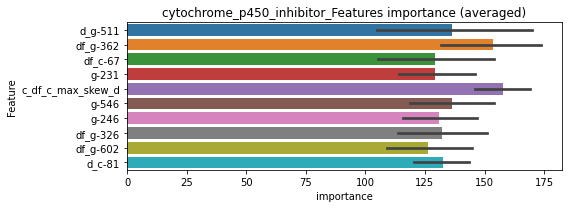

len(train_index) : 2721
len(valid_index) : 907
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0427146	valid_1's binary_logloss: 0.0624699
[2000]	training's binary_logloss: 0.0234261	valid_1's binary_logloss: 0.0449681
[3000]	training's binary_logloss: 0.0162418	valid_1's binary_logloss: 0.0389979
[4000]	training's binary_logloss: 0.0123315	valid_1's binary_logloss: 0.0359884
Early stopping, best iteration is:
[4296]	training's binary_logloss: 0.0114867	valid_1's binary_logloss: 0.035447


len(train_index) : 2721
len(valid_index) : 907
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0441875	valid_1's binary_logloss: 0.0534075
[2000]	training's binary_logloss: 0.0247745	valid_1's binary_logloss: 0.0349477
[3000]	training's binary_logloss: 0.0172112	valid_1's binary_logloss: 0.0281285
[4000]	training's binary_logloss: 0.0130927	valid_1's binary_logloss: 0.0247708
[5000]	training's binary_logloss: 0.0105335	valid_1's binary_logloss: 0.022683
[6000]	training's binary_logloss: 0.00880989	valid_1's binary_logloss: 0.0212895
[7000]	training's binary_logloss: 0.00755284	valid_1's binary_logloss: 0.0202756
[8000]	training's binary_logloss: 0.00661361	valid_1's binary_logloss: 0.0193592
[9000]	training's binary_logloss: 0.00589294	valid_1's binary_logloss: 0.0186954
Early stopping, best iteration is:
[9305]	training's binary_logloss: 0.00570358	valid_1's binary_logloss: 0.0185379


len(train_index) : 2721
len(valid_index) : 907
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0447882	valid_1's binary_logloss: 0.0547941
[2000]	training's binary_logloss: 0.0248505	valid_1's binary_logloss: 0.0369459
[3000]	training's binary_logloss: 0.0171766	valid_1's binary_logloss: 0.0306186
[4000]	training's binary_logloss: 0.0130776	valid_1's binary_logloss: 0.0276766
[5000]	training's binary_logloss: 0.0105349	valid_1's binary_logloss: 0.0257266
[6000]	training's binary_logloss: 0.00880644	valid_1's binary_logloss: 0.0244777
[7000]	training's binary_logloss: 0.00755688	valid_1's binary_logloss: 0.0235576
Early stopping, best iteration is:
[7303]	training's binary_logloss: 0.00724508	valid_1's binary_logloss: 0.0233376


len(train_index) : 2721
len(valid_index) : 907
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.042333	valid_1's binary_logloss: 0.0621091
[2000]	training's binary_logloss: 0.0232755	valid_1's binary_logloss: 0.04465
[3000]	training's binary_logloss: 0.0161843	valid_1's binary_logloss: 0.038888
[4000]	training's binary_logloss: 0.0122763	valid_1's binary_logloss: 0.0363339
[5000]	training's binary_logloss: 0.00991175	valid_1's binary_logloss: 0.0348264
Early stopping, best iteration is:
[5700]	training's binary_logloss: 0.00869114	valid_1's binary_logloss: 0.0339512


cytochrome_p450_inhibitor logloss: 0.027818416549543163
cytochrome_p450_inhibitor is unpredictable(><)!
dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00040523	valid_1's binary_logloss: 0.00666886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000427196	valid_1's binary_logloss: 0.00562887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00041925	valid_1's binary_logloss: 0.00102386
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000415082	valid_1's binary_logloss: 0.00195199


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029265, Threshold: 0.0115218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0115218, conf_0:0.00807, conf_1:0.01498
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_1: 0.0415218
threshold: 0.0415218, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000400419	valid_1's binary_logloss: 0.00620745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408121	valid_1's binary_logloss: 0.00408019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000403835	valid_1's binary_logloss: 0.000880099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403177	valid_1's binary_logloss: 0.0020776


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0213018, Threshold: 0.0415218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0055249 Vs.target_rate: 0.00151
Num_p_label: 22.0, Expected: 6.0, Threshold: 0.0415218, conf_0:0.03322, conf_1:0.04983
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.0715218
threshold: 0.0715218, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000400419	valid_1's binary_logloss: 0.00620745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408121	valid_1's binary_logloss: 0.00408019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000403835	valid_1's binary_logloss: 0.000880099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403177	valid_1's binary_logloss: 0.0020776


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0213018, Threshold: 0.0715218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.0715218, conf_0:0.06437, conf_1:0.07867
threshold: 0.0715218, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


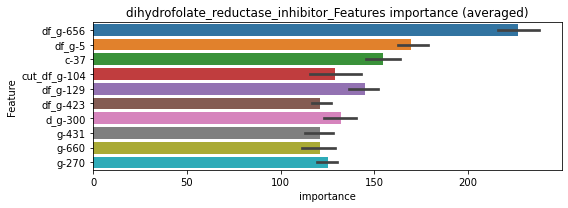

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000410696	valid_1's binary_logloss: 0.006103


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000426632	valid_1's binary_logloss: 0.00482623


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000405367	valid_1's binary_logloss: 0.000979461
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000405367	valid_1's binary_logloss: 0.000979461


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00040663	valid_1's binary_logloss: 0.0014055
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000403481	valid_1's binary_logloss: 0.00140072


dihydrofolate_reductase_inhibitor logloss: 0.00333004271964584
dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000357403	valid_1's binary_logloss: 0.00254559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000356851	valid_1's binary_logloss: 0.00198374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000359962	valid_1's binary_logloss: 0.000809725
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00037487	valid_1's binary_logloss: 0.00508198


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023813, Threshold: 0.0099776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0099776, conf_0:0.00698, conf_1:0.01297
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0399776
threshold: 0.0399776, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000343756	valid_1's binary_logloss: 0.00198769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000354557	valid_1's binary_logloss: 0.00135106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000346586	valid_1's binary_logloss: 0.000844243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000356085	valid_1's binary_logloss: 0.00377326


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0776905, Threshold: 0.0399776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0070316 Vs.target_rate: 0.00105
Num_p_label: 28.0, Expected: 4.2, Threshold: 0.0399776, conf_0:0.03198, conf_1:0.04797
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_1: 0.0699776
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_2: 0.0999776
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_3: 0.1299776
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_4: 0.1599776
threshold: 0.1599776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000343756	valid_1's binary_logloss: 0.00198769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000354557	valid_1's binary_logloss: 0.00135106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000346586	valid_1's binary_logloss: 0.000844243
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0776905, Threshold: 0.1599776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, Expected: 4.2, Threshold: 0.1599776, conf_0:0.14398, conf_1:0.17598


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000356085	valid_1's binary_logloss: 0.00377326


threshold: 0.1599776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


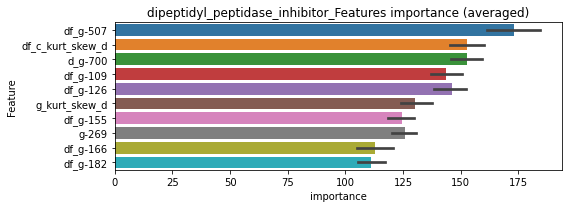

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.00034223	valid_1's binary_logloss: 0.0018921


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000346128	valid_1's binary_logloss: 0.00153593


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000359327	valid_1's binary_logloss: 0.000874061


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000355234	valid_1's binary_logloss: 0.00374129


dipeptidyl_peptidase_inhibitor logloss: 0.0020110506386375147
diuretic, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000176586	valid_1's binary_logloss: 0.0039209
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00017455	valid_1's binary_logloss: 0.00180481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000174989	valid_1's binary_logloss: 0.000211316
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004962, Threshold: 0.0018108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0018108, conf_0:0.00127, conf_1:0.00235
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0318108


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000174616	valid_1's binary_logloss: 0.000231277


threshold: 0.0318108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000159569	valid_1's binary_logloss: 0.000572149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000161226	valid_1's binary_logloss: 0.0049452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000161364	valid_1's binary_logloss: 0.000172873
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0101109, Threshold: 0.0318108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00025
Num_p_label: 8.0, Expected: 1.0, Threshold: 0.0318108, conf_0:0.02545, conf_1:0.03817
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.0618108
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0918108
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.1218108
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1518108
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_5: 0.1818108
threshold: 0.1818108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000160219	valid_1's binary_logloss: 0.000184657


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000159569	valid_1's binary_logloss: 0.000572149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000161226	valid_1's binary_logloss: 0.0049452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000161364	valid_1's binary_logloss: 0.000172873
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0101109, Threshold: 0.1818108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1818108, conf_0:0.16363, conf_1:0.19999
threshold: 0.1818108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000160219	valid_1's binary_logloss: 0.000184657


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


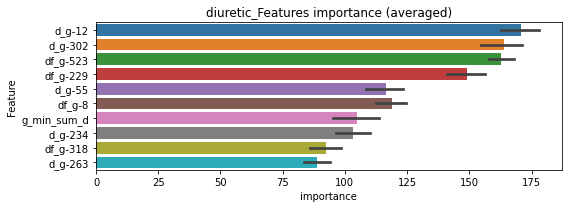

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000164069	valid_1's binary_logloss: 0.000319883


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Early stopping, best iteration is:
[1152]	training's binary_logloss: 0.000162183	valid_1's binary_logloss: 0.000318075
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000165054	valid_1's binary_logloss: 0.00235939
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000164636	valid_1's binary_logloss: 0.00235822


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000166179	valid_1's binary_logloss: 0.000188481


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Early stopping, best iteration is:
[1105]	training's binary_logloss: 0.000164493	valid_1's binary_logloss: 0.000186657
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000165567	valid_1's binary_logloss: 0.000197641


diuretic logloss: 0.0007645727538288503


Early stopping, best iteration is:
[1130]	training's binary_logloss: 0.000163923	valid_1's binary_logloss: 0.000195655


dna_alkylating_agent, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000487165	valid_1's binary_logloss: 0.012756
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000494882	valid_1's binary_logloss: 0.0167968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000502488	valid_1's binary_logloss: 0.0030484
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00048914	valid_1's binary_logloss: 0.0142329


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037524, Threshold: 0.0855297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0855297, conf_0:0.05987, conf_1:0.11119
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_1: 0.1155297
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_2: 0.1455297
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_3: 0.1755297
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_4: 0.2055297
threshold: 0.2055297, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000497674	valid_1's binary_logloss: 0.0125171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000485036	valid_1's binary_logloss: 0.0131483
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000482282	valid_1's binary_logloss: 0.00338707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000494534	valid_1's binary_logloss: 0.0131269


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0745539, Threshold: 0.2055297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0183325 Vs.target_rate: 0.00202
Num_p_label: 73.0, Expected: 8.0, Threshold: 0.2055297, conf_0:0.16442, conf_1:0.24664
Num_p_label: 68.0, Expected: 8.0, Adj_threshold_1: 0.2355297
Num_p_label: 65.0, Expected: 8.0, Adj_threshold_2: 0.2655297
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_3: 0.2955297
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_4: 0.3255297
Num_p_label: 58.0, Expected: 8.0, Adj_threshold_5: 0.3555297
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_6: 0.3855297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_7: 0.4155297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_8: 0.4455297
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_9: 0.4755297
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_10: 0.5055297
threshold: 0.5055297, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000474829	valid_1's binary_logloss: 0.0162652
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000495703	valid_1's binary_logloss: 0.00641886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000486554	valid_1's binary_logloss: 0.00614384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000485481	valid_1's binary_logloss: 0.0060295


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0748767, Threshold: 0.5055297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0153189 Vs.target_rate: 0.00202
Num_p_label: 61.0, Expected: 8.0, Threshold: 0.5055297, conf_0:0.45498, conf_1:0.55608
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_1: 0.5355297
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_2: 0.5655297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_3: 0.5955297
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_4: 0.6255297
Num_p_label: 47.0, Expected: 8.0, Adj_threshold_5: 0.6555297
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_6: 0.6855297
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_7: 0.7155297
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_8: 0.7455297
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_9: 0.7755297
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_10: 0.8055297
threshold: 0.8055297, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_la

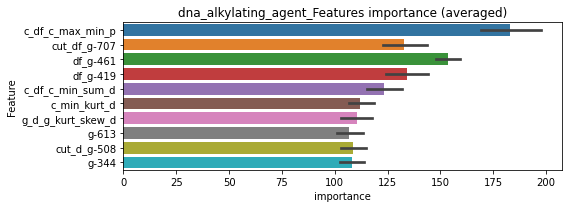

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000475025	valid_1's binary_logloss: 0.00780346


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.00049257	valid_1's binary_logloss: 0.00683704


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000480411	valid_1's binary_logloss: 0.00671822


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00046014	valid_1's binary_logloss: 0.00411668
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.000454717	valid_1's binary_logloss: 0.00410006


dna_alkylating_agent logloss: 0.006365895865226023


mutually exclusive columns: dna_inhibitor


dna_inhibitor, len(trt): 402, len(othr): 7073
target_rate: 0.0168808 → Adj_target_rate: 0.0137338


selected negative label: 7073


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.104705	valid_1's binary_logloss: 0.181124
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.0843446	valid_1's binary_logloss: 0.175877
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.101829	valid_1's binary_logloss: 0.195191
Early stopping, best iteration is:
[1288]	training's binary_logloss: 0.0849162	valid_1's binary_logloss: 0.191023
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.105304	valid_1's binary_logloss: 0.180095
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0709475	valid_1's binary_logloss: 0.172729
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.103728	valid_1's binary_logloss: 0.179122
Early stopping, best iteration is:
[1268]	training's binary_logloss: 0.0875296	valid_1's binary_loglos

1 / 3, AUC score:0.923, PR-AUC:0.870
y_Threshold: 0.0922365, Threshold: 0.1418936, pos_neg_ratio: 0.8000000
Remove_noisy_data: 824 → Positive_corect_labels: 1144/7663
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, Expected: 67.2, Threshold: 0.1418936, conf_0:0.09933, conf_1:0.18446
threshold: 0.1418936, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1144.0/7663, y_label_rate: 0.1492888
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0514583	valid_1's binary_logloss: 0.0781347
Early stopping, best iteration is:
[1913]	training's binary_logloss: 0.028827	valid_1's binary_logloss: 0.0657414
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0489852	valid_1's binary_logloss: 0.0904681
[2000]	training's binary_logloss: 0.026381	valid_1's binary_logloss: 0.0794054
Early stopping, best iteration is:
[2288]	training's binary_logloss: 0.0230548	valid_1's binary_logloss: 0.0779959
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0507619	valid_1's binary_logloss: 0.0832496
[2000]	training's binary_logloss: 0.0273577	valid_1's binary_logloss: 0.0718977
Early stopping, best iteration is:
[2492]	training's binary_logloss: 0.0218703	valid_1's binary_logloss: 0.0693658
Training until validation scores don't improve for 30 rounds
[1000]	traini

2 / 3, AUC score:0.994, PR-AUC:0.982
y_Threshold: 0.0621646, Threshold: 0.1418936, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 1069.0/7513
p_label_rate: 0.0072828 Vs.target_rate: 0.01688
Num_p_label: 29.0, Expected: 67.2, Threshold: 0.1418936, conf_0:0.11351, conf_1:0.17027
threshold: 0.1418936, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 1069.0/7513, y_label_rate: 0.1422867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.032325	valid_1's binary_logloss: 0.0538581
[2000]	training's binary_logloss: 0.0170882	valid_1's binary_logloss: 0.0421857
[3000]	training's binary_logloss: 0.0113058	valid_1's binary_logloss: 0.0382103
Early stopping, best iteration is:
[3610]	training's binary_logloss: 0.00935902	valid_1's binary_logloss: 0.0371022
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0330662	valid_1's binary_logloss: 0.0519776
[2000]	training's binary_logloss: 0.0174948	valid_1's binary_logloss: 0.0406086
[3000]	training's binary_logloss: 0.011586	valid_1's binary_logloss: 0.0368719
Early stopping, best iteration is:
[3169]	training's binary_logloss: 0.0109345	valid_1's binary_logloss: 0.0364958
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0333211	valid_1's binary_logloss: 0.0504283
[2000]	training's binary_log

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0503675, Threshold: 0.1418936, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 1038.0/7451
p_label_rate: 0.0092918 Vs.target_rate: 0.01688
Num_p_label: 37.0, Expected: 67.2, Threshold: 0.1418936, conf_0:0.12770, conf_1:0.15608
threshold: 0.1418936, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 1038.0/7451, y_label_rate: 0.1393102


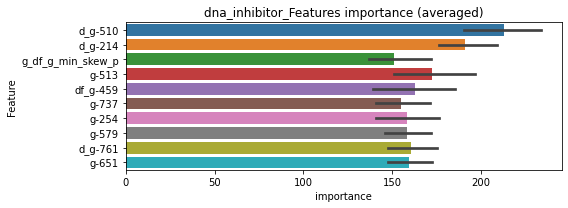

len(train_index) : 5588
len(valid_index) : 1863
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0337343	valid_1's binary_logloss: 0.0503876
[2000]	training's binary_logloss: 0.0174421	valid_1's binary_logloss: 0.0338164
[3000]	training's binary_logloss: 0.0118869	valid_1's binary_logloss: 0.0283181
[4000]	training's binary_logloss: 0.0089633	valid_1's binary_logloss: 0.0255156
Early stopping, best iteration is:
[4806]	training's binary_logloss: 0.00745321	valid_1's binary_logloss: 0.0241232


len(train_index) : 5588
len(valid_index) : 1863
================================= fold 2/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0352965	valid_1's binary_logloss: 0.0430707
[2000]	training's binary_logloss: 0.0188037	valid_1's binary_logloss: 0.0258165
[3000]	training's binary_logloss: 0.0129409	valid_1's binary_logloss: 0.019901
[4000]	training's binary_logloss: 0.0097701	valid_1's binary_logloss: 0.0167814
[5000]	training's binary_logloss: 0.00778013	valid_1's binary_logloss: 0.0146842
[6000]	training's binary_logloss: 0.00646392	valid_1's binary_logloss: 0.013331
[7000]	training's binary_logloss: 0.00552786	valid_1's binary_logloss: 0.012364
[8000]	training's binary_logloss: 0.00484516	valid_1's binary_logloss: 0.0115733
[9000]	training's binary_logloss: 0.00431485	valid_1's binary_logloss: 0.0109884
[10000]	training's binary_logloss: 0.00388502	valid_1's binary_logloss: 0.0105114
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00388502	valid_1's binary_logloss: 0.0105114


len(train_index) : 5588
len(valid_index) : 1863
================================= fold 3/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0341893	valid_1's binary_logloss: 0.0497365
[2000]	training's binary_logloss: 0.0177995	valid_1's binary_logloss: 0.0331075
[3000]	training's binary_logloss: 0.0121975	valid_1's binary_logloss: 0.0274307
[4000]	training's binary_logloss: 0.0091969	valid_1's binary_logloss: 0.0245532
Early stopping, best iteration is:
[4287]	training's binary_logloss: 0.00857151	valid_1's binary_logloss: 0.0239442


len(train_index) : 5589
len(valid_index) : 1862
================================= fold 4/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0359696	valid_1's binary_logloss: 0.0430945
[2000]	training's binary_logloss: 0.0191161	valid_1's binary_logloss: 0.0255387
[3000]	training's binary_logloss: 0.0132325	valid_1's binary_logloss: 0.0193828
[4000]	training's binary_logloss: 0.00999723	valid_1's binary_logloss: 0.0160848
[5000]	training's binary_logloss: 0.00800694	valid_1's binary_logloss: 0.0139881
[6000]	training's binary_logloss: 0.00666977	valid_1's binary_logloss: 0.0125634
[7000]	training's binary_logloss: 0.00570027	valid_1's binary_logloss: 0.0115109
[8000]	training's binary_logloss: 0.00499488	valid_1's binary_logloss: 0.0106858
[9000]	training's binary_logloss: 0.00445542	valid_1's binary_logloss: 0.0100859
[10000]	training's binary_logloss: 0.00401917	valid_1's binary_logloss: 0.00958481
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00401917	valid_1's binary_logloss: 0.00958481

dna_inhibitor logloss: 0.01704190959827786


mutually exclusive columns: dopamine_receptor_agonist


dopamine_receptor_agonist, len(trt): 121, len(othr): 2089
target_rate: 0.0050810 → Adj_target_rate: 0.0049495


selected negative label: 2089


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.105749	valid_1's binary_logloss: 0.233623
Early stopping, best iteration is:
[1542]	training's binary_logloss: 0.0763907	valid_1's binary_logloss: 0.223854
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.121453	valid_1's binary_logloss: 0.154963
[2000]	training's binary_logloss: 0.0709517	valid_1's binary_logloss: 0.130896
[3000]	training's binary_logloss: 0.0482045	valid_1's binary_logloss: 0.121816
Early stopping, best iteration is:
[3090]	training's binary_logloss: 0.0468232	valid_1's binary_logloss: 0.121264
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.117686	valid_1's binary_logloss: 0.175789
[2000]	training's binary_logloss: 0.0693137	valid_1's binary_logloss: 0.150832
[3000]	training's binary_logloss: 0.0472803	valid_1's binary_logloss: 0.141712
Early stopping, best iteration is:
[306

1 / 3, AUC score:0.949, PR-AUC:0.902
y_Threshold: 0.0850380, Threshold: 0.1210551, pos_neg_ratio: 0.8000000
Remove_noisy_data: 205 → Positive_corect_labels: 357/2301
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, Expected: 20.2, Threshold: 0.1210551, conf_0:0.08474, conf_1:0.15737
Num_p_label: 15.0, Expected: 20.2, Adj_threshold_1: 0.1510551
threshold: 0.1510551, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 357.0/2301, y_label_rate: 0.1551499
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0769042	valid_1's binary_logloss: 0.144598
[2000]	training's binary_logloss: 0.0427539	valid_1's binary_logloss: 0.127004
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0408194	valid_1's binary_logloss: 0.126308
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0807287	valid_1's binary_logloss: 0.114378
[2000]	training's binary_logloss: 0.0454793	valid_1's binary_logloss: 0.0898186
[3000]	training's binary_logloss: 0.030872	valid_1's binary_logloss: 0.081005
[4000]	training's binary_logloss: 0.023159	valid_1's binary_logloss: 0.0760042
Early stopping, best iteration is:
[4067]	training's binary_logloss: 0.0227577	valid_1's binary_logloss: 0.0756279
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0799944	valid_1's binary_logloss: 0.117267
[2000]	training's binary_logloss: 0

2 / 3, AUC score:0.991, PR-AUC:0.975
y_Threshold: 0.0714556, Threshold: 0.1510551, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 332.0/2251
p_label_rate: 0.0032647 Vs.target_rate: 0.00508
Num_p_label: 13.0, Expected: 20.2, Threshold: 0.1510551, conf_0:0.12084, conf_1:0.18127
threshold: 0.1510551, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 332.0/2251, y_label_rate: 0.1474900
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0621876	valid_1's binary_logloss: 0.0952936
[2000]	training's binary_logloss: 0.0340427	valid_1's binary_logloss: 0.0741674
[3000]	training's binary_logloss: 0.0231042	valid_1's binary_logloss: 0.067431
Early stopping, best iteration is:
[3453]	training's binary_logloss: 0.0200953	valid_1's binary_logloss: 0.0659171
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0612843	valid_1's binary_logloss: 0.100672
[2000]	training's binary_logloss: 0.0337127	valid_1's binary_logloss: 0.0814521
[3000]	training's binary_logloss: 0.022758	valid_1's binary_logloss: 0.0747713
Early stopping, best iteration is:
[3453]	training's binary_logloss: 0.0198011	valid_1's binary_logloss: 0.0733415
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0622293	valid_1's binary_logloss: 0.0959741
[2000]	training's binary_loglo

3 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0560080, Threshold: 0.1510551, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 320.0/2227
p_label_rate: 0.0030136 Vs.target_rate: 0.00508
Num_p_label: 12.0, Expected: 20.2, Threshold: 0.1510551, conf_0:0.13595, conf_1:0.16616
threshold: 0.1510551, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 320.0/2227, y_label_rate: 0.1436911


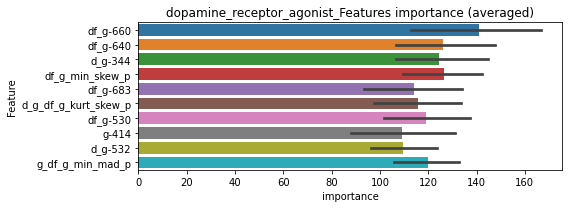

len(train_index) : 1670
len(valid_index) : 557
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0723595	valid_1's binary_logloss: 0.109555
[2000]	training's binary_logloss: 0.039678	valid_1's binary_logloss: 0.0826441
[3000]	training's binary_logloss: 0.0277447	valid_1's binary_logloss: 0.0734492
[4000]	training's binary_logloss: 0.0211072	valid_1's binary_logloss: 0.0689634
Early stopping, best iteration is:
[4350]	training's binary_logloss: 0.019477	valid_1's binary_logloss: 0.0681228


len(train_index) : 1670
len(valid_index) : 557
================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0733992	valid_1's binary_logloss: 0.111203
[2000]	training's binary_logloss: 0.0409188	valid_1's binary_logloss: 0.0787051
[3000]	training's binary_logloss: 0.0285763	valid_1's binary_logloss: 0.0673519
[4000]	training's binary_logloss: 0.0217056	valid_1's binary_logloss: 0.0614529
[5000]	training's binary_logloss: 0.0174576	valid_1's binary_logloss: 0.0576897
[6000]	training's binary_logloss: 0.0145643	valid_1's binary_logloss: 0.0553783
[7000]	training's binary_logloss: 0.0124978	valid_1's binary_logloss: 0.0535516
[8000]	training's binary_logloss: 0.0109612	valid_1's binary_logloss: 0.0519999
Early stopping, best iteration is:
[8349]	training's binary_logloss: 0.0104959	valid_1's binary_logloss: 0.0514873


len(train_index) : 1670
len(valid_index) : 557
================================= fold 3/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.073413	valid_1's binary_logloss: 0.106771
[2000]	training's binary_logloss: 0.0402009	valid_1's binary_logloss: 0.0762701
[3000]	training's binary_logloss: 0.0281132	valid_1's binary_logloss: 0.0662341
[4000]	training's binary_logloss: 0.0213573	valid_1's binary_logloss: 0.061278
Early stopping, best iteration is:
[4293]	training's binary_logloss: 0.0199486	valid_1's binary_logloss: 0.0603098


len(train_index) : 1671
len(valid_index) : 556
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0788514	valid_1's binary_logloss: 0.0891493
[2000]	training's binary_logloss: 0.0437144	valid_1's binary_logloss: 0.0558007
[3000]	training's binary_logloss: 0.0304238	valid_1's binary_logloss: 0.0443837
[4000]	training's binary_logloss: 0.0231848	valid_1's binary_logloss: 0.0382585
[5000]	training's binary_logloss: 0.018705	valid_1's binary_logloss: 0.0345493
[6000]	training's binary_logloss: 0.0156503	valid_1's binary_logloss: 0.0319269
[7000]	training's binary_logloss: 0.0134311	valid_1's binary_logloss: 0.030003
[8000]	training's binary_logloss: 0.0117877	valid_1's binary_logloss: 0.0284885
[9000]	training's binary_logloss: 0.0104893	valid_1's binary_logloss: 0.0273142
Early stopping, best iteration is:
[9319]	training's binary_logloss: 0.0101408	valid_1's binary_logloss: 0.027041


dopamine_receptor_agonist logloss: 0.051751333827240294
dopamine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: dopamine_receptor_antagonist


dopamine_receptor_antagonist, len(trt): 424, len(othr): 7314
target_rate: 0.0178047 → Adj_target_rate: 0.0143701


selected negative label: 7314


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.106011	valid_1's binary_logloss: 0.192126
Early stopping, best iteration is:
[1302]	training's binary_logloss: 0.087925	valid_1's binary_logloss: 0.189052
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.105361	valid_1's binary_logloss: 0.190411
Early stopping, best iteration is:
[1344]	training's binary_logloss: 0.0851331	valid_1's binary_logloss: 0.18665
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.10681	valid_1's binary_logloss: 0.188693
Early stopping, best iteration is:
[1731]	training's binary_logloss: 0.0700638	valid_1's binary_logloss: 0.181177
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.106334	valid_1's binary_logloss: 0.1894
Early stopping, best iteration is:
[1049]	training's binary_logloss: 0.102949	valid_1's binary_logloss: 0.1

1 / 3, AUC score:0.910, PR-AUC:0.856
y_Threshold: 0.0923204, Threshold: 0.1282379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 880 → Positive_corect_labels: 1169/7896
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, Expected: 70.9, Threshold: 0.1282379, conf_0:0.08977, conf_1:0.16671
threshold: 0.1282379, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1169.0/7896, y_label_rate: 0.1480496
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0505441	valid_1's binary_logloss: 0.0800023
[2000]	training's binary_logloss: 0.0273085	valid_1's binary_logloss: 0.0689729
Early stopping, best iteration is:
[2553]	training's binary_logloss: 0.0214324	valid_1's binary_logloss: 0.0665282
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0477872	valid_1's binary_logloss: 0.0977286
Early stopping, best iteration is:
[1907]	training's binary_logloss: 0.0270877	valid_1's binary_logloss: 0.0891013
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.052274	valid_1's binary_logloss: 0.0722576
[2000]	training's binary_logloss: 0.028296	valid_1's binary_logloss: 0.059537
[3000]	training's binary_logloss: 0.0186671	valid_1's binary_logloss: 0.0552951
Early stopping, best iteration is:
[3803]	training's binary_logloss: 0.014516	valid_1's binary_logloss: 0.0534

2 / 3, AUC score:0.993, PR-AUC:0.977
y_Threshold: 0.0669842, Threshold: 0.1282379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 1083.0/7724
p_label_rate: 0.0120542 Vs.target_rate: 0.01780
Num_p_label: 48.0, Expected: 70.9, Threshold: 0.1282379, conf_0:0.10259, conf_1:0.15389
threshold: 0.1282379, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 1083.0/7724, y_label_rate: 0.1402123
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0296334	valid_1's binary_logloss: 0.0404223
[2000]	training's binary_logloss: 0.0156896	valid_1's binary_logloss: 0.0285293
[3000]	training's binary_logloss: 0.0105622	valid_1's binary_logloss: 0.024654
Early stopping, best iteration is:
[3249]	training's binary_logloss: 0.00973526	valid_1's binary_logloss: 0.0240352
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0276896	valid_1's binary_logloss: 0.0479128
[2000]	training's binary_logloss: 0.0144434	valid_1's binary_logloss: 0.0362394
[3000]	training's binary_logloss: 0.00972093	valid_1's binary_logloss: 0.0324087
Early stopping, best iteration is:
[3840]	training's binary_logloss: 0.0075598	valid_1's binary_logloss: 0.0309629
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0284599	valid_1's binary_logloss: 0.0458592
[2000]	training's binary_l

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0730802, Threshold: 0.1282379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 1059.0/7676
p_label_rate: 0.0198393 Vs.target_rate: 0.01780
Num_p_label: 79.0, Expected: 70.9, Threshold: 0.1282379, conf_0:0.11541, conf_1:0.14106
threshold: 0.1282379, positive_p_label: 79.0/3982, p_label_rate: 0.0198393
positive_y_label: 1059.0/7676, y_label_rate: 0.1379625


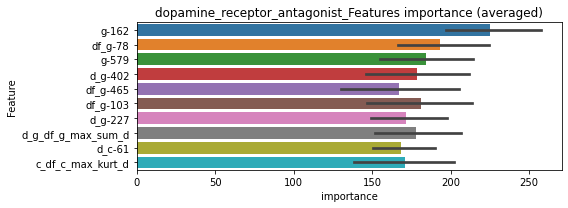

len(train_index) : 5757
len(valid_index) : 1919
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0311033	valid_1's binary_logloss: 0.0464319
[2000]	training's binary_logloss: 0.0152224	valid_1's binary_logloss: 0.0293593
[3000]	training's binary_logloss: 0.0101851	valid_1's binary_logloss: 0.0240476
[4000]	training's binary_logloss: 0.00771896	valid_1's binary_logloss: 0.0214687
[5000]	training's binary_logloss: 0.0062286	valid_1's binary_logloss: 0.0199922
[6000]	training's binary_logloss: 0.00520876	valid_1's binary_logloss: 0.0188513
[7000]	training's binary_logloss: 0.00448824	valid_1's binary_logloss: 0.0181198
Early stopping, best iteration is:
[7425]	training's binary_logloss: 0.00424003	valid_1's binary_logloss: 0.0178603


len(train_index) : 5757
len(valid_index) : 1919
================================= fold 2/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0323961	valid_1's binary_logloss: 0.0401698
[2000]	training's binary_logloss: 0.015991	valid_1's binary_logloss: 0.0221968
[3000]	training's binary_logloss: 0.0107646	valid_1's binary_logloss: 0.0164532
[4000]	training's binary_logloss: 0.00817808	valid_1's binary_logloss: 0.0136058
[5000]	training's binary_logloss: 0.00660586	valid_1's binary_logloss: 0.0118094
[6000]	training's binary_logloss: 0.00550851	valid_1's binary_logloss: 0.0105455
[7000]	training's binary_logloss: 0.00474406	valid_1's binary_logloss: 0.00964431
[8000]	training's binary_logloss: 0.00417597	valid_1's binary_logloss: 0.00892687
[9000]	training's binary_logloss: 0.00372686	valid_1's binary_logloss: 0.008369
[10000]	training's binary_logloss: 0.00337546	valid_1's binary_logloss: 0.00793887
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00337546	valid_1's binary_logloss: 0.00793887

len(train_index) : 5757
len(valid_index) : 1919
================================= fold 3/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315971	valid_1's binary_logloss: 0.0431996
[2000]	training's binary_logloss: 0.0154514	valid_1's binary_logloss: 0.0259497
[3000]	training's binary_logloss: 0.010385	valid_1's binary_logloss: 0.0203986
[4000]	training's binary_logloss: 0.0078755	valid_1's binary_logloss: 0.0177072
[5000]	training's binary_logloss: 0.00635217	valid_1's binary_logloss: 0.0160662
[6000]	training's binary_logloss: 0.00529948	valid_1's binary_logloss: 0.0148722
[7000]	training's binary_logloss: 0.00457192	valid_1's binary_logloss: 0.0140461
[8000]	training's binary_logloss: 0.00401772	valid_1's binary_logloss: 0.0133697
[9000]	training's binary_logloss: 0.00358621	valid_1's binary_logloss: 0.0128434
Early stopping, best iteration is:
[9280]	training's binary_logloss: 0.00347966	valid_1's binary_logloss: 0.0127107


len(train_index) : 5757
len(valid_index) : 1919
================================= fold 4/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319642	valid_1's binary_logloss: 0.0414112
[2000]	training's binary_logloss: 0.0158321	valid_1's binary_logloss: 0.023661
[3000]	training's binary_logloss: 0.0106265	valid_1's binary_logloss: 0.0177393
[4000]	training's binary_logloss: 0.00805175	valid_1's binary_logloss: 0.0148832
[5000]	training's binary_logloss: 0.00650218	valid_1's binary_logloss: 0.0132038
[6000]	training's binary_logloss: 0.00542514	valid_1's binary_logloss: 0.011955
[7000]	training's binary_logloss: 0.00468706	valid_1's binary_logloss: 0.0111362
[8000]	training's binary_logloss: 0.00412109	valid_1's binary_logloss: 0.0104586
[9000]	training's binary_logloss: 0.0036759	valid_1's binary_logloss: 0.00991801
[10000]	training's binary_logloss: 0.00333395	valid_1's binary_logloss: 0.0095501
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00333395	valid_1's binary_logloss: 0.0095501


dopamine_receptor_antagonist logloss: 0.012014983885434526


mutually exclusive columns: egfr_inhibitor


egfr_inhibitor, len(trt): 336, len(othr): 7554
target_rate: 0.0141093 → Adj_target_rate: 0.0117920


selected negative label: 7554


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0925665	valid_1's binary_logloss: 0.148691
[2000]	training's binary_logloss: 0.0522279	valid_1's binary_logloss: 0.135564
Early stopping, best iteration is:
[2161]	training's binary_logloss: 0.0484238	valid_1's binary_logloss: 0.134554
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0905124	valid_1's binary_logloss: 0.154263
[2000]	training's binary_logloss: 0.0510792	valid_1's binary_logloss: 0.143534
Early stopping, best iteration is:
[2051]	training's binary_logloss: 0.0498228	valid_1's binary_logloss: 0.143041
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0898424	valid_1's binary_logloss: 0.157354
Early stopping, best iteration is:
[1664]	training's binary_logloss: 0.0599258	valid_1's binary_logloss: 0.149298
Training until validation scores don't improve for 30 rounds
[1000]	training's b

1 / 3, AUC score:0.948, PR-AUC:0.911
y_Threshold: 0.0775935, Threshold: 0.1407428, pos_neg_ratio: 0.8000000
Remove_noisy_data: 717 → Positive_corect_labels: 1303/8347
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, Expected: 56.2, Threshold: 0.1407428, conf_0:0.09852, conf_1:0.18297
threshold: 0.1407428, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1303.0/8347, y_label_rate: 0.1561040
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.049543	valid_1's binary_logloss: 0.0793655
[2000]	training's binary_logloss: 0.0264948	valid_1's binary_logloss: 0.065531
[3000]	training's binary_logloss: 0.0173607	valid_1's binary_logloss: 0.0608782
Early stopping, best iteration is:
[3193]	training's binary_logloss: 0.0163073	valid_1's binary_logloss: 0.0603586
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0496366	valid_1's binary_logloss: 0.0763154
[2000]	training's binary_logloss: 0.026797	valid_1's binary_logloss: 0.0619978
Early stopping, best iteration is:
[2633]	training's binary_logloss: 0.0201946	valid_1's binary_logloss: 0.0583695
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.04936	valid_1's binary_logloss: 0.0800119
[2000]	training's binary_logloss: 0.0267426	valid_1's binary_logloss: 0.0672
Early stopping, best iteration is:


2 / 3, AUC score:0.996, PR-AUC:0.986
y_Threshold: 0.0724497, Threshold: 0.1407428, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 1236.0/8213
p_label_rate: 0.0150678 Vs.target_rate: 0.01411
Num_p_label: 60.0, Expected: 56.2, Threshold: 0.1407428, conf_0:0.11259, conf_1:0.16889
threshold: 0.1407428, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 1236.0/8213, y_label_rate: 0.1504931
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0344193	valid_1's binary_logloss: 0.0498672
[2000]	training's binary_logloss: 0.0177969	valid_1's binary_logloss: 0.0357174
[3000]	training's binary_logloss: 0.011802	valid_1's binary_logloss: 0.0313877
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.00974796	valid_1's binary_logloss: 0.0299071
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0347294	valid_1's binary_logloss: 0.0524328
[2000]	training's binary_logloss: 0.0178713	valid_1's binary_logloss: 0.0381332
[3000]	training's binary_logloss: 0.0117249	valid_1's binary_logloss: 0.033255
Early stopping, best iteration is:
[3011]	training's binary_logloss: 0.0116857	valid_1's binary_logloss: 0.0332387
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0337806	valid_1's binary_logloss: 0.0543009
[2000]	training's binary_log

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0674741, Threshold: 0.1407428, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 1207.0/8155
p_label_rate: 0.0178302 Vs.target_rate: 0.01411
Num_p_label: 71.0, Expected: 56.2, Threshold: 0.1407428, conf_0:0.12667, conf_1:0.15482
threshold: 0.1407428, positive_p_label: 71.0/3982, p_label_rate: 0.0178302
positive_y_label: 1207.0/8155, y_label_rate: 0.1480074


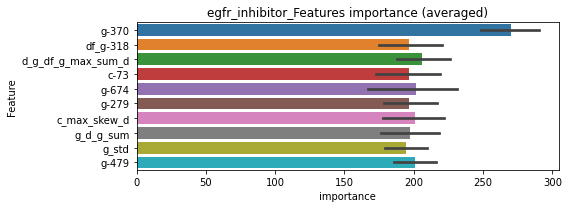

len(train_index) : 6116
len(valid_index) : 2039
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0388054	valid_1's binary_logloss: 0.0540066
[2000]	training's binary_logloss: 0.0193538	valid_1's binary_logloss: 0.0332455
[3000]	training's binary_logloss: 0.0129776	valid_1's binary_logloss: 0.0266015
[4000]	training's binary_logloss: 0.00977574	valid_1's binary_logloss: 0.0231846
[5000]	training's binary_logloss: 0.00782352	valid_1's binary_logloss: 0.0211202
[6000]	training's binary_logloss: 0.00653255	valid_1's binary_logloss: 0.0197354
[7000]	training's binary_logloss: 0.00559158	valid_1's binary_logloss: 0.0187271
[8000]	training's binary_logloss: 0.00488085	valid_1's binary_logloss: 0.017958
Early stopping, best iteration is:
[8532]	training's binary_logloss: 0.00457379	valid_1's binary_logloss: 0.017588


len(train_index) : 6116
len(valid_index) : 2039
================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0399948	valid_1's binary_logloss: 0.046142
[2000]	training's binary_logloss: 0.0201523	valid_1's binary_logloss: 0.0254282
[3000]	training's binary_logloss: 0.0135532	valid_1's binary_logloss: 0.0187028
[4000]	training's binary_logloss: 0.0102036	valid_1's binary_logloss: 0.0153477
[5000]	training's binary_logloss: 0.00815981	valid_1's binary_logloss: 0.0132039
[6000]	training's binary_logloss: 0.00681476	valid_1's binary_logloss: 0.0118382
[7000]	training's binary_logloss: 0.00585133	valid_1's binary_logloss: 0.0108247
[8000]	training's binary_logloss: 0.00509911	valid_1's binary_logloss: 0.00994414
[9000]	training's binary_logloss: 0.00452335	valid_1's binary_logloss: 0.00927296
[10000]	training's binary_logloss: 0.00407632	valid_1's binary_logloss: 0.0087445
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00407632	valid_1's binary_logloss: 0.0087445


len(train_index) : 6116
len(valid_index) : 2039
================================= fold 3/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0393272	valid_1's binary_logloss: 0.0529585
[2000]	training's binary_logloss: 0.0197377	valid_1's binary_logloss: 0.031069
[3000]	training's binary_logloss: 0.0132822	valid_1's binary_logloss: 0.0239911
[4000]	training's binary_logloss: 0.0100223	valid_1's binary_logloss: 0.0204132
[5000]	training's binary_logloss: 0.00801889	valid_1's binary_logloss: 0.0181191
[6000]	training's binary_logloss: 0.00669623	valid_1's binary_logloss: 0.016584
[7000]	training's binary_logloss: 0.00573998	valid_1's binary_logloss: 0.015481
[8000]	training's binary_logloss: 0.00500715	valid_1's binary_logloss: 0.0145256
[9000]	training's binary_logloss: 0.00443632	valid_1's binary_logloss: 0.0137868
Early stopping, best iteration is:
[9306]	training's binary_logloss: 0.00428275	valid_1's binary_logloss: 0.0136084


len(train_index) : 6117
len(valid_index) : 2038
================================= fold 4/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0382588	valid_1's binary_logloss: 0.0572119
[2000]	training's binary_logloss: 0.018884	valid_1's binary_logloss: 0.0362412
[3000]	training's binary_logloss: 0.0127074	valid_1's binary_logloss: 0.0297224
[4000]	training's binary_logloss: 0.00958637	valid_1's binary_logloss: 0.0264629
[5000]	training's binary_logloss: 0.00766842	valid_1's binary_logloss: 0.0245905
[6000]	training's binary_logloss: 0.00639528	valid_1's binary_logloss: 0.0232266
Early stopping, best iteration is:
[6315]	training's binary_logloss: 0.00606443	valid_1's binary_logloss: 0.0228956


egfr_inhibitor logloss: 0.01570823228604129
elastase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000232452	valid_1's binary_logloss: 0.000859439
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000230216	valid_1's binary_logloss: 0.000734649
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00023171	valid_1's binary_logloss: 0.000380352
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008658, Threshold: 0.0027007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0027007, conf_0:0.00189, conf_1:0.00351
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0327007


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000228512	valid_1's binary_logloss: 0.00134341


threshold: 0.0327007, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000220194	valid_1's binary_logloss: 0.00163004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000244861	valid_1's binary_logloss: 0.00111289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000222787	valid_1's binary_logloss: 0.000296913
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000218347	valid_1's binary_logloss: 0.00109631


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0676233, Threshold: 0.0327007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0327007, conf_0:0.02616, conf_1:0.03924
threshold: 0.0327007, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000220194	valid_1's binary_logloss: 0.00163004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000244861	valid_1's binary_logloss: 0.00111289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000222787	valid_1's binary_logloss: 0.000296913
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000218347	valid_1's binary_logloss: 0.00109631


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0676233, Threshold: 0.0327007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0327007, conf_0:0.02943, conf_1:0.03597
threshold: 0.0327007, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


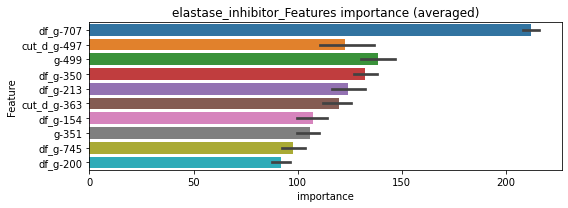

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000230819	valid_1's binary_logloss: 0.000877822
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000230752	valid_1's binary_logloss: 0.000808727
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000231395	valid_1's binary_logloss: 0.000304327
Training until validation scores don't improve for 30 rounds


elastase_inhibitor logloss: 0.0006665683270342578


Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000225171	valid_1's binary_logloss: 0.00067398


erbb2_inhibitor, len(trt): 20, len(othr): 3286
target_rate: 0.0008398 → Adj_target_rate: 0.0010717


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000362937	valid_1's binary_logloss: 0.00277857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000322508	valid_1's binary_logloss: 0.0025593
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000324188	valid_1's binary_logloss: 0.000841975
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020080, Threshold: 0.0065932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, Expected: 3.3, Threshold: 0.0065932, conf_0:0.00462, conf_1:0.00857
Num_p_label: 4.0, Expected: 3.3, Adj_threshold_1: 0.0365932


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000328764	valid_1's binary_logloss: 0.000908318


threshold: 0.0365932, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000352071	valid_1's binary_logloss: 0.00246753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000314666	valid_1's binary_logloss: 0.00141527
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000312086	valid_1's binary_logloss: 0.000604999
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0483456, Threshold: 0.0365932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00084
Num_p_label: 18.0, Expected: 3.3, Threshold: 0.0365932, conf_0:0.02927, conf_1:0.04391
Num_p_label: 8.0, Expected: 3.3, Adj_threshold_1: 0.0665932


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000317872	valid_1's binary_logloss: 0.000829814


threshold: 0.0665932, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000352071	valid_1's binary_logloss: 0.00246753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000314666	valid_1's binary_logloss: 0.00141527
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000312086	valid_1's binary_logloss: 0.000604999
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0483456, Threshold: 0.0665932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00084
Num_p_label: 8.0, Expected: 3.3, Threshold: 0.0665932, conf_0:0.05993, conf_1:0.07325


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000317872	valid_1's binary_logloss: 0.000829814


threshold: 0.0665932, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


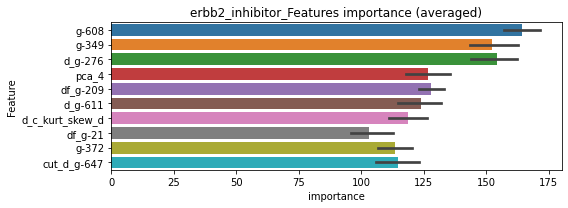

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953


Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000344559	valid_1's binary_logloss: 0.00308952


================================= fold 2/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000312024	valid_1's binary_logloss: 0.00105078
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000312024	valid_1's binary_logloss: 0.00105078


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0003129	valid_1's binary_logloss: 0.00062523
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.0003129	valid_1's binary_logloss: 0.00062523


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00031564	valid_1's binary_logloss: 0.000836686
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000315133	valid_1's binary_logloss: 0.000835913


erbb2_inhibitor logloss: 0.0014005093208885964


mutually exclusive columns: estrogen_receptor_agonist


estrogen_receptor_agonist, len(trt): 158, len(othr): 3996
target_rate: 0.0066348 → Adj_target_rate: 0.0062095


selected negative label: 3996


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.083948	valid_1's binary_logloss: 0.134299
[2000]	training's binary_logloss: 0.0484151	valid_1's binary_logloss: 0.123058
Early stopping, best iteration is:
[1995]	training's binary_logloss: 0.0485235	valid_1's binary_logloss: 0.122949
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0817118	valid_1's binary_logloss: 0.144339
Early stopping, best iteration is:
[1679]	training's binary_logloss: 0.0545563	valid_1's binary_logloss: 0.138333
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0845	valid_1's binary_logloss: 0.128058
[2000]	training's binary_logloss: 0.048807	valid_1's binary_logloss: 0.116707
Early stopping, best iteration is:
[2160]	training's binary_logloss: 0.0453441	valid_1's binary_logloss: 0.115717
Training until validation scores don't improve for 30 rounds
[1000]	training's binary

1 / 3, AUC score:0.959, PR-AUC:0.925
y_Threshold: 0.0668288, Threshold: 0.0985860, pos_neg_ratio: 0.8000000
Remove_noisy_data: 356 → Positive_corect_labels: 701/4439
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, Expected: 26.4, Threshold: 0.0985860, conf_0:0.06901, conf_1:0.12816
Num_p_label: 13.0, Expected: 26.4, Adj_threshold_1: 0.1285860
threshold: 0.1285860, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 701.0/4439, y_label_rate: 0.1579185
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0470539	valid_1's binary_logloss: 0.0704771
[2000]	training's binary_logloss: 0.0259846	valid_1's binary_logloss: 0.059212
[3000]	training's binary_logloss: 0.0174433	valid_1's binary_logloss: 0.055594
Early stopping, best iteration is:
[3066]	training's binary_logloss: 0.0170653	valid_1's binary_logloss: 0.0554594
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0478103	valid_1's binary_logloss: 0.0638114
[2000]	training's binary_logloss: 0.0266058	valid_1's binary_logloss: 0.0519632
[3000]	training's binary_logloss: 0.0178382	valid_1's binary_logloss: 0.0476667
Early stopping, best iteration is:
[3232]	training's binary_logloss: 0.0165611	valid_1's binary_logloss: 0.0470967
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0449622	valid_1's binary_logloss: 0.0800301
[2000]	training's binary_logl

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0527203, Threshold: 0.1285860, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 671.0/4379
p_label_rate: 0.0047715 Vs.target_rate: 0.00663
Num_p_label: 19.0, Expected: 26.4, Threshold: 0.1285860, conf_0:0.10287, conf_1:0.15430
threshold: 0.1285860, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 671.0/4379, y_label_rate: 0.1532313
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0343618	valid_1's binary_logloss: 0.0473334
[2000]	training's binary_logloss: 0.0187258	valid_1's binary_logloss: 0.0353882
[3000]	training's binary_logloss: 0.0125934	valid_1's binary_logloss: 0.0312588
Early stopping, best iteration is:
[3771]	training's binary_logloss: 0.0100127	valid_1's binary_logloss: 0.0297643
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0327981	valid_1's binary_logloss: 0.0529011
[2000]	training's binary_logloss: 0.0179417	valid_1's binary_logloss: 0.040778
[3000]	training's binary_logloss: 0.0120638	valid_1's binary_logloss: 0.0364819
Early stopping, best iteration is:
[3847]	training's binary_logloss: 0.00942458	valid_1's binary_logloss: 0.0348267
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0339657	valid_1's binary_logloss: 0.0498923
[2000]	training's binary_lo

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0405116, Threshold: 0.1285860, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 659.0/4355
p_label_rate: 0.0090407 Vs.target_rate: 0.00663
Num_p_label: 36.0, Expected: 26.4, Threshold: 0.1285860, conf_0:0.11573, conf_1:0.14144
threshold: 0.1285860, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 659.0/4355, y_label_rate: 0.1513203


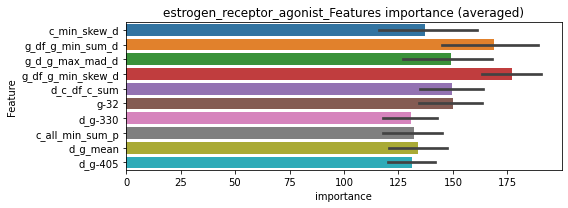

len(train_index) : 3266
len(valid_index) : 1089
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.037898	valid_1's binary_logloss: 0.0538159
[2000]	training's binary_logloss: 0.020413	valid_1's binary_logloss: 0.0373185
[3000]	training's binary_logloss: 0.0140731	valid_1's binary_logloss: 0.031913
[4000]	training's binary_logloss: 0.0107576	valid_1's binary_logloss: 0.029421
[5000]	training's binary_logloss: 0.0086923	valid_1's binary_logloss: 0.0278973
Early stopping, best iteration is:
[5772]	training's binary_logloss: 0.0075396	valid_1's binary_logloss: 0.0270486


len(train_index) : 3266
len(valid_index) : 1089
================================= fold 2/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0381674	valid_1's binary_logloss: 0.0488081
[2000]	training's binary_logloss: 0.0208484	valid_1's binary_logloss: 0.0318119
[3000]	training's binary_logloss: 0.0144658	valid_1's binary_logloss: 0.0261492
[4000]	training's binary_logloss: 0.0110702	valid_1's binary_logloss: 0.023386
[5000]	training's binary_logloss: 0.00893371	valid_1's binary_logloss: 0.0216858
[6000]	training's binary_logloss: 0.00747403	valid_1's binary_logloss: 0.0204954
[7000]	training's binary_logloss: 0.00642004	valid_1's binary_logloss: 0.0196434
[8000]	training's binary_logloss: 0.0056349	valid_1's binary_logloss: 0.0189987
[9000]	training's binary_logloss: 0.00502439	valid_1's binary_logloss: 0.0184683
Early stopping, best iteration is:
[9285]	training's binary_logloss: 0.0048708	valid_1's binary_logloss: 0.0183427


len(train_index) : 3266
len(valid_index) : 1089
================================= fold 3/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0387145	valid_1's binary_logloss: 0.0462927
[2000]	training's binary_logloss: 0.0212496	valid_1's binary_logloss: 0.0290323
[3000]	training's binary_logloss: 0.0146852	valid_1's binary_logloss: 0.0231347
[4000]	training's binary_logloss: 0.0112269	valid_1's binary_logloss: 0.0201986
[5000]	training's binary_logloss: 0.00906385	valid_1's binary_logloss: 0.0185525
[6000]	training's binary_logloss: 0.00755412	valid_1's binary_logloss: 0.0172892
[7000]	training's binary_logloss: 0.00648859	valid_1's binary_logloss: 0.0164045
[8000]	training's binary_logloss: 0.00570522	valid_1's binary_logloss: 0.0157483
[9000]	training's binary_logloss: 0.0050846	valid_1's binary_logloss: 0.0151776
[10000]	training's binary_logloss: 0.00459254	valid_1's binary_logloss: 0.0148358
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00459254	valid_1's binary_logloss: 0.0148358


len(train_index) : 3267
len(valid_index) : 1088
================================= fold 4/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0379899	valid_1's binary_logloss: 0.0492456
[2000]	training's binary_logloss: 0.0208196	valid_1's binary_logloss: 0.0321852
[3000]	training's binary_logloss: 0.0144887	valid_1's binary_logloss: 0.0263082
[4000]	training's binary_logloss: 0.0111008	valid_1's binary_logloss: 0.0232484
[5000]	training's binary_logloss: 0.00896411	valid_1's binary_logloss: 0.0214067
[6000]	training's binary_logloss: 0.00751174	valid_1's binary_logloss: 0.0201012
Early stopping, best iteration is:
[6860]	training's binary_logloss: 0.00658447	valid_1's binary_logloss: 0.0192792


estrogen_receptor_agonist logloss: 0.019876684528390906
estrogen_receptor_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00052112	valid_1's binary_logloss: 0.00952746
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000576397	valid_1's binary_logloss: 0.0139528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000538499	valid_1's binary_logloss: 0.00393803
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0049400, Threshold: 0.1903560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.1903560, conf_0:0.13325, conf_1:0.24746
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_1: 0.2203560


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00121031	valid_1's binary_logloss: 0.0265691


Num_p_label: 34.0, Expected: 8.0, Adj_threshold_2: 0.2503560
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_3: 0.2803560
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.3103560
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_5: 0.3403560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_6: 0.3703560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.4003560
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_8: 0.4303560
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_9: 0.4603560
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_10: 0.4903560
threshold: 0.4903560, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000512582	valid_1's binary_logloss: 0.00748627
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00052509	valid_1's binary_logloss: 0.0132082
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000499526	valid_1's binary_logloss: 0.00431506
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0376580, Threshold: 0.4903560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0085384 Vs.target_rate: 0.00202
Num_p_label: 34.0, Expected: 8.0, Threshold: 0.4903560, conf_0:0.39228, conf_1:0.58843


Early stopping, best iteration is:
[422]	training's binary_logloss: 0.00102477	valid_1's binary_logloss: 0.0278137


Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.5203560
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_2: 0.5503560
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_3: 0.5803560
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.6103560
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_5: 0.6403560
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_6: 0.6703560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.7003560
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_8: 0.7303560
threshold: 0.7303560, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000468066	valid_1's binary_logloss: 0.00451032
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000506699	valid_1's binary_logloss: 0.00878163
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000514102	valid_1's binary_logloss: 0.00741139
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000521993	valid_1's binary_logloss: 0.0177837


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0451250, Threshold: 0.7303560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0050226 Vs.target_rate: 0.00202
Num_p_label: 20.0, Expected: 8.0, Threshold: 0.7303560, conf_0:0.65732, conf_1:0.80339
threshold: 0.7303560, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 649.0/3794, y_label_rate: 0.1710596


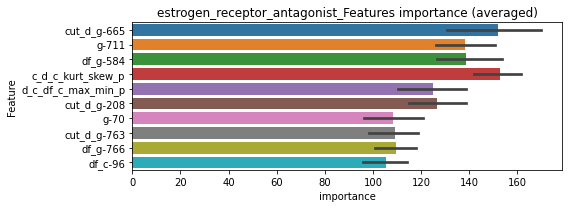

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000487493	valid_1's binary_logloss: 0.0050781


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000715432	valid_1's binary_logloss: 0.0188331
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000532634	valid_1's binary_logloss: 0.0101475


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000508133	valid_1's binary_logloss: 0.00388802


estrogen_receptor_antagonist logloss: 0.00948798619679034
faah_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000453312	valid_1's binary_logloss: 0.00551267
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000424357	valid_1's binary_logloss: 0.00484501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000422203	valid_1's binary_logloss: 0.00240841
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00042021	valid_1's binary_logloss: 0.0042654


y_Threshold: 0.0028585, Threshold: 0.0094032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0094032, conf_0:0.00658, conf_1:0.01222
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_1: 0.0394032
threshold: 0.0394032, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000393316	valid_1's binary_logloss: 0.00555616
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000446526	valid_1's binary_logloss: 0.00433073
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000399904	valid_1's binary_logloss: 0.00225576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039482	valid_1's binary_logloss: 0.0032132


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0482573, Threshold: 0.0394032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0394032, conf_0:0.03152, conf_1:0.04728
threshold: 0.0394032, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000393316	valid_1's binary_logloss: 0.00555616
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000446526	valid_1's binary_logloss: 0.00433073
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000399904	valid_1's binary_logloss: 0.00225576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039482	valid_1's binary_logloss: 0.0032132


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0482573, Threshold: 0.0394032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0394032, conf_0:0.03546, conf_1:0.04334
threshold: 0.0394032, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


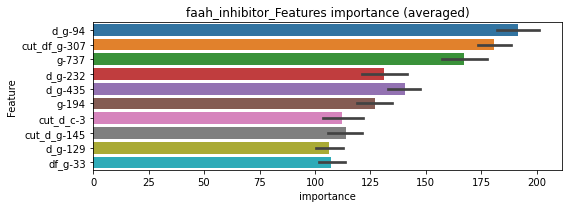

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000450229	valid_1's binary_logloss: 0.0049723


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000404724	valid_1's binary_logloss: 0.00450861


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000415868	valid_1's binary_logloss: 0.00201621


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000418598	valid_1's binary_logloss: 0.00350257


faah_inhibitor logloss: 0.003750441817598832
farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000294267	valid_1's binary_logloss: 0.00138727
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000287027	valid_1's binary_logloss: 0.000989525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000294857	valid_1's binary_logloss: 0.000523521
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014914, Threshold: 0.0039949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0039949, conf_0:0.00280, conf_1:0.00519
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0339949


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000294923	valid_1's binary_logloss: 0.00342668


threshold: 0.0339949, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.00187909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000280426	valid_1's binary_logloss: 0.000816643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000284185	valid_1's binary_logloss: 0.000460109
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270107, Threshold: 0.0339949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, Expected: 3.0, Threshold: 0.0339949, conf_0:0.02720, conf_1:0.04079
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0639949
threshold: 0.0639949, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000280065	valid_1's binary_logloss: 0.0043133


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.00187909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000280426	valid_1's binary_logloss: 0.000816643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000284185	valid_1's binary_logloss: 0.000460109
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270107, Threshold: 0.0639949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0639949, conf_0:0.05760, conf_1:0.07039
threshold: 0.0639949, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000280065	valid_1's binary_logloss: 0.0043133


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


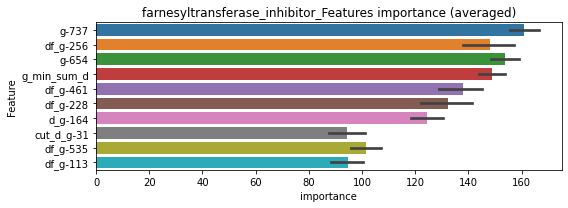

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000284711	valid_1's binary_logloss: 0.00161121


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000279529	valid_1's binary_logloss: 0.000645443
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000278168	valid_1's binary_logloss: 0.000643608


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000283951	valid_1's binary_logloss: 0.00050037
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000283951	valid_1's binary_logloss: 0.00050037


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000295906	valid_1's binary_logloss: 0.00364927


farnesyltransferase_inhibitor logloss: 0.0016015099193632464
fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3287
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000339498	valid_1's binary_logloss: 0.00115366
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000337202	valid_1's binary_logloss: 0.00721403
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000347535	valid_1's binary_logloss: 0.00164577
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018693, Threshold: 0.0087358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000342156	valid_1's binary_logloss: 0.0055406


p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0087358, conf_0:0.00612, conf_1:0.01136
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0387358
threshold: 0.0387358, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000334547	valid_1's binary_logloss: 0.000893833
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000337633	valid_1's binary_logloss: 0.00592948
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00034043	valid_1's binary_logloss: 0.00146318
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0307888, Threshold: 0.0387358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00105
Num_p_label: 20.0, Expected: 4.2, Threshold: 0.0387358, conf_0:0.03099, conf_1:0.04648
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0687358


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000438208	valid_1's binary_logloss: 0.00672482


threshold: 0.0687358, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000334547	valid_1's binary_logloss: 0.000893833
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000337633	valid_1's binary_logloss: 0.00592948
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00034043	valid_1's binary_logloss: 0.00146318
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0307888, Threshold: 0.0687358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0687358, conf_0:0.06186, conf_1:0.07561


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000438208	valid_1's binary_logloss: 0.00672482


threshold: 0.0687358, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


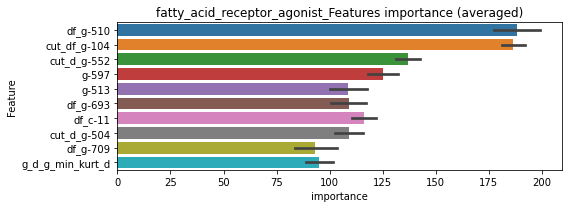

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000332227	valid_1's binary_logloss: 0.000856827
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000332797	valid_1's binary_logloss: 0.000856818


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000335215	valid_1's binary_logloss: 0.00498961


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000342468	valid_1's binary_logloss: 0.00120331


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000337058	valid_1's binary_logloss: 0.00532658


fatty_acid_receptor_agonist logloss: 0.003094419307955251
fgfr_inhibitor, len(trt): 50, len(othr): 3287
target_rate: 0.0020996 → Adj_target_rate: 0.0023352


selected negative label: 3287


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000514423	valid_1's binary_logloss: 0.0175326
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000512766	valid_1's binary_logloss: 0.0073775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.00052688	valid_1's binary_logloss: 0.00446889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000511176	valid_1's binary_logloss: 0.0109288


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0043282, Threshold: 0.0176913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, Expected: 8.4, Threshold: 0.0176913, conf_0:0.01238, conf_1:0.02300
Num_p_label: 20.0, Expected: 8.4, Adj_threshold_1: 0.0476913
threshold: 0.0476913, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000677432	valid_1's binary_logloss: 0.0177828
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000498116	valid_1's binary_logloss: 0.00624964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.00051051	valid_1's binary_logloss: 0.00377615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000498538	valid_1's binary_logloss: 0.0110419


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246261, Threshold: 0.0476913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0075339 Vs.target_rate: 0.00210
Num_p_label: 30.0, Expected: 8.4, Threshold: 0.0476913, conf_0:0.03815, conf_1:0.05723
Num_p_label: 18.0, Expected: 8.4, Adj_threshold_1: 0.0776913
threshold: 0.0776913, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000489695	valid_1's binary_logloss: 0.00513002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000526	valid_1's binary_logloss: 0.0151451
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00050432	valid_1's binary_logloss: 0.00162243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000492852	valid_1's binary_logloss: 0.0155387


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0190430, Threshold: 0.0776913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00210
Num_p_label: 18.0, Expected: 8.4, Threshold: 0.0776913, conf_0:0.06992, conf_1:0.08546
threshold: 0.0776913, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


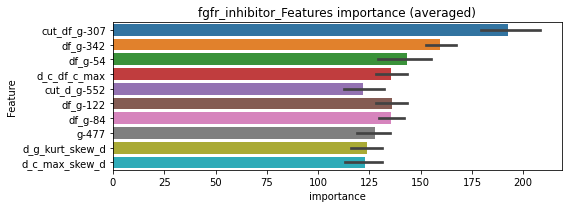

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000585523	valid_1's binary_logloss: 0.00817335


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00050369	valid_1's binary_logloss: 0.0070327
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000502897	valid_1's binary_logloss: 0.00702785


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000520453	valid_1's binary_logloss: 0.00301455


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000516495	valid_1's binary_logloss: 0.0124944


fgfr_inhibitor logloss: 0.007677825067803415


mutually exclusive columns: flt3_inhibitor


flt3_inhibitor, len(trt): 279, len(othr): 6506
target_rate: 0.0117158 → Adj_target_rate: 0.0100684


selected negative label: 6506


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0849988	valid_1's binary_logloss: 0.150814
Early stopping, best iteration is:
[1731]	training's binary_logloss: 0.0537174	valid_1's binary_logloss: 0.140521
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0848567	valid_1's binary_logloss: 0.156611
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0557485	valid_1's binary_logloss: 0.146261
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.087029	valid_1's binary_logloss: 0.136361
[2000]	training's binary_logloss: 0.0482401	valid_1's binary_logloss: 0.120233
[3000]	training's binary_logloss: 0.0317312	valid_1's binary_logloss: 0.114184
Early stopping, best iteration is:
[3074]	training's binary_logloss: 0.0309163	valid_1's binary_logloss: 0.113757
Training until validation scores don't improve for 30 rounds
[1000]	training's bi

1 / 3, AUC score:0.962, PR-AUC:0.929
y_Threshold: 0.0735057, Threshold: 0.1088019, pos_neg_ratio: 0.8000000
Remove_noisy_data: 549 → Positive_corect_labels: 1157/7258
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, Expected: 46.7, Threshold: 0.1088019, conf_0:0.07616, conf_1:0.14144
threshold: 0.1088019, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1157.0/7258, y_label_rate: 0.1594103
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0562539	valid_1's binary_logloss: 0.0900052
[2000]	training's binary_logloss: 0.030099	valid_1's binary_logloss: 0.072499
[3000]	training's binary_logloss: 0.0199858	valid_1's binary_logloss: 0.0664031
Early stopping, best iteration is:
[3356]	training's binary_logloss: 0.0178003	valid_1's binary_logloss: 0.0652303
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0536204	valid_1's binary_logloss: 0.103977
[2000]	training's binary_logloss: 0.0288174	valid_1's binary_logloss: 0.0892368
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0243977	valid_1's binary_logloss: 0.0867461
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0569548	valid_1's binary_logloss: 0.0858862
[2000]	training's binary_logloss: 0.0305659	valid_1's binary_logloss: 0.0677585
Early stopping, best iteration

2 / 3, AUC score:0.998, PR-AUC:0.991
y_Threshold: 0.0648337, Threshold: 0.1088019, pos_neg_ratio: 0.8000000
Remove_noisy_data: 96 → Positive_corect_labels: 1109.0/7162
p_label_rate: 0.0128076 Vs.target_rate: 0.01172
Num_p_label: 51.0, Expected: 46.7, Threshold: 0.1088019, conf_0:0.08704, conf_1:0.13056
threshold: 0.1088019, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 1109.0/7162, y_label_rate: 0.1548450
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0457085	valid_1's binary_logloss: 0.0691522
[2000]	training's binary_logloss: 0.0240132	valid_1's binary_logloss: 0.051738
[3000]	training's binary_logloss: 0.0160704	valid_1's binary_logloss: 0.0456737
[4000]	training's binary_logloss: 0.0119312	valid_1's binary_logloss: 0.0427029
Early stopping, best iteration is:
[4165]	training's binary_logloss: 0.0114355	valid_1's binary_logloss: 0.0423235
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0433357	valid_1's binary_logloss: 0.0811075
[2000]	training's binary_logloss: 0.022482	valid_1's binary_logloss: 0.0646143
[3000]	training's binary_logloss: 0.0149965	valid_1's binary_logloss: 0.059529
Early stopping, best iteration is:
[3039]	training's binary_logloss: 0.0147804	valid_1's binary_logloss: 0.0592695
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_loglo

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0606681, Threshold: 0.1088019, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 1081.0/7106
p_label_rate: 0.0130588 Vs.target_rate: 0.01172
Num_p_label: 52.0, Expected: 46.7, Threshold: 0.1088019, conf_0:0.09792, conf_1:0.11968
threshold: 0.1088019, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 1081.0/7106, y_label_rate: 0.1521250


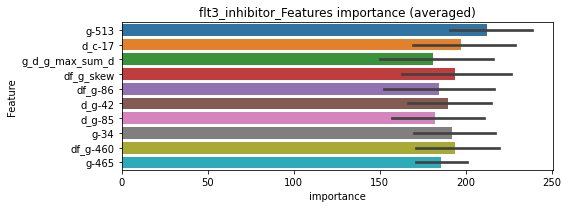

len(train_index) : 5329
len(valid_index) : 1777
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0538702	valid_1's binary_logloss: 0.0664477
[2000]	training's binary_logloss: 0.0300849	valid_1's binary_logloss: 0.0460859
[3000]	training's binary_logloss: 0.0204393	valid_1's binary_logloss: 0.0378008
[4000]	training's binary_logloss: 0.0153379	valid_1's binary_logloss: 0.0334763
[5000]	training's binary_logloss: 0.0122769	valid_1's binary_logloss: 0.0309959
[6000]	training's binary_logloss: 0.0102048	valid_1's binary_logloss: 0.0292028
[7000]	training's binary_logloss: 0.00872294	valid_1's binary_logloss: 0.0279258
Early stopping, best iteration is:
[7586]	training's binary_logloss: 0.00802744	valid_1's binary_logloss: 0.0272903


len(train_index) : 5329
len(valid_index) : 1777
================================= fold 2/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0527018	valid_1's binary_logloss: 0.0746101
[2000]	training's binary_logloss: 0.0293414	valid_1's binary_logloss: 0.053207
[3000]	training's binary_logloss: 0.0199094	valid_1's binary_logloss: 0.045094
[4000]	training's binary_logloss: 0.0149874	valid_1's binary_logloss: 0.040969
[5000]	training's binary_logloss: 0.0119558	valid_1's binary_logloss: 0.0385646
Early stopping, best iteration is:
[5546]	training's binary_logloss: 0.0107412	valid_1's binary_logloss: 0.0375775


len(train_index) : 5330
len(valid_index) : 1776
================================= fold 3/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0518576	valid_1's binary_logloss: 0.080514
[2000]	training's binary_logloss: 0.0285506	valid_1's binary_logloss: 0.0591251
[3000]	training's binary_logloss: 0.0193337	valid_1's binary_logloss: 0.0515157
[4000]	training's binary_logloss: 0.0145188	valid_1's binary_logloss: 0.0472638
Early stopping, best iteration is:
[4563]	training's binary_logloss: 0.0126964	valid_1's binary_logloss: 0.045733


len(train_index) : 5330
len(valid_index) : 1776
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0523937	valid_1's binary_logloss: 0.0757856
[2000]	training's binary_logloss: 0.0291129	valid_1's binary_logloss: 0.0550717
[3000]	training's binary_logloss: 0.0197768	valid_1's binary_logloss: 0.0477923
[4000]	training's binary_logloss: 0.0147884	valid_1's binary_logloss: 0.0443552
Early stopping, best iteration is:
[4222]	training's binary_logloss: 0.0139723	valid_1's binary_logloss: 0.0437303


flt3_inhibitor logloss: 0.03858103961344421
flt3_inhibitor is unpredictable(><)!
focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000292416	valid_1's binary_logloss: 0.00118516
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000297237	valid_1's binary_logloss: 0.00197324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000288964	valid_1's binary_logloss: 0.00115505
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014519, Threshold: 0.0051613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0051613, conf_0:0.00361, conf_1:0.00671
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0351613


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000288802	valid_1's binary_logloss: 0.00104823


threshold: 0.0351613, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000292336	valid_1's binary_logloss: 0.00125989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000278999	valid_1's binary_logloss: 0.00154754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000282115	valid_1's binary_logloss: 0.00057384
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1070860, Threshold: 0.0351613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0351613, conf_0:0.02813, conf_1:0.04219
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0651613


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000278644	valid_1's binary_logloss: 0.000706638


threshold: 0.0651613, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000292336	valid_1's binary_logloss: 0.00125989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000278999	valid_1's binary_logloss: 0.00154754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000282115	valid_1's binary_logloss: 0.00057384
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1070860, Threshold: 0.0651613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0651613, conf_0:0.05865, conf_1:0.07168


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000278644	valid_1's binary_logloss: 0.000706638


threshold: 0.0651613, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


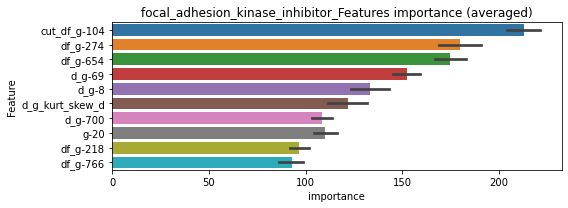

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280591	valid_1's binary_logloss: 0.00089329
Early stopping, best iteration is:
[1151]	training's binary_logloss: 0.000273566	valid_1's binary_logloss: 0.000881165


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280563	valid_1's binary_logloss: 0.00126729
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000281428	valid_1's binary_logloss: 0.00126664


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282341	valid_1's binary_logloss: 0.000665434
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000280526	valid_1's binary_logloss: 0.000662528


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00028428	valid_1's binary_logloss: 0.000705032
Early stopping, best iteration is:
[1166]	training's binary_logloss: 0.000277426	valid_1's binary_logloss: 0.000694812


focal_adhesion_kinase_inhibitor logloss: 0.0008762924980626207
free_radical_scavenger, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000295281	valid_1's binary_logloss: 0.000980463
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000296919	valid_1's binary_logloss: 0.00130742
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000295748	valid_1's binary_logloss: 0.000676627
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014677, Threshold: 0.0061014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0061014, conf_0:0.00427, conf_1:0.00793
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0361014


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000301416	valid_1's binary_logloss: 0.0022544


threshold: 0.0361014, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287944	valid_1's binary_logloss: 0.000829575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000286091	valid_1's binary_logloss: 0.00133822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000289478	valid_1's binary_logloss: 0.000510136
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354022, Threshold: 0.0361014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, Expected: 3.0, Threshold: 0.0361014, conf_0:0.02888, conf_1:0.04332
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0661014
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0961014


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000356631	valid_1's binary_logloss: 0.00238191


threshold: 0.0961014, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000287944	valid_1's binary_logloss: 0.000829575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000286091	valid_1's binary_logloss: 0.00133822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000289478	valid_1's binary_logloss: 0.000510136
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354022, Threshold: 0.0961014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0961014, conf_0:0.08649, conf_1:0.10571
threshold: 0.0961014, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000356631	valid_1's binary_logloss: 0.00238191


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


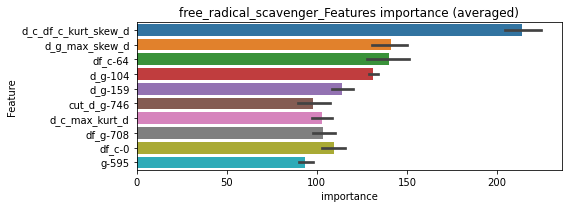

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284998	valid_1's binary_logloss: 0.000730602
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000284998	valid_1's binary_logloss: 0.000730602


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000285232	valid_1's binary_logloss: 0.000986432


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.0002874	valid_1's binary_logloss: 0.000531578


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000301137	valid_1's binary_logloss: 0.00175801


free_radical_scavenger logloss: 0.001001659412196387
fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3286
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000353994	valid_1's binary_logloss: 0.0014373
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000358147	valid_1's binary_logloss: 0.00699769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000357463	valid_1's binary_logloss: 0.000822493
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019264, Threshold: 0.0069234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.0003528	valid_1's binary_logloss: 0.00224403


p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0069234, conf_0:0.00485, conf_1:0.00900
Num_p_label: 5.0, Expected: 3.8, Adj_threshold_1: 0.0369234
threshold: 0.0369234, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000347815	valid_1's binary_logloss: 0.00137528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000353038	valid_1's binary_logloss: 0.00688917
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00034591	valid_1's binary_logloss: 0.000707213
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0224746, Threshold: 0.0369234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00097
Num_p_label: 18.0, Expected: 3.8, Threshold: 0.0369234, conf_0:0.02954, conf_1:0.04431
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_1: 0.0669234


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353535	valid_1's binary_logloss: 0.00330661


threshold: 0.0669234, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000347815	valid_1's binary_logloss: 0.00137528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000353038	valid_1's binary_logloss: 0.00688917
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00034591	valid_1's binary_logloss: 0.000707213
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0224746, Threshold: 0.0669234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00097
Num_p_label: 9.0, Expected: 3.8, Threshold: 0.0669234, conf_0:0.06023, conf_1:0.07362


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353535	valid_1's binary_logloss: 0.00330661


threshold: 0.0669234, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


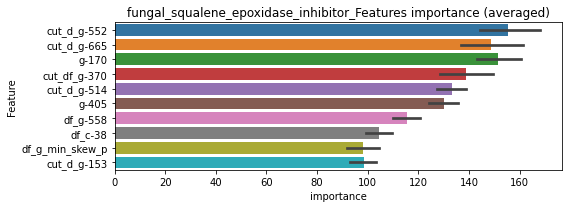

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000359656	valid_1's binary_logloss: 0.00173772


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000356868	valid_1's binary_logloss: 0.0075601


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000377671	valid_1's binary_logloss: 0.000917772


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000358294	valid_1's binary_logloss: 0.00180499


fungal_squalene_epoxidase_inhibitor logloss: 0.0030054600045569336
gaba_receptor_agonist, len(trt): 106, len(othr): 3267
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3267


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0676847	valid_1's binary_logloss: 0.130355
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0456322	valid_1's binary_logloss: 0.122286
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0699236	valid_1's binary_logloss: 0.116565
[2000]	training's binary_logloss: 0.0396974	valid_1's binary_logloss: 0.104029
Early stopping, best iteration is:
[2252]	training's binary_logloss: 0.0355814	valid_1's binary_logloss: 0.102616
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0709513	valid_1's binary_logloss: 0.109857
[2000]	training's binary_logloss: 0.0402714	valid_1's binary_logloss: 0.0977107
Early stopping, best iteration is:
[2603]	training's binary_logloss: 0.0312105	valid_1's binary_logloss: 0.0956596
Training until validation scores don't improve for 30 rounds
[1000]	training's

1 / 3, AUC score:0.982, PR-AUC:0.960
y_Threshold: 0.0533799, Threshold: 0.1516109, pos_neg_ratio: 0.8000000
Remove_noisy_data: 217 → Positive_corect_labels: 610/3703
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1516109, conf_0:0.10613, conf_1:0.19709
Num_p_label: 20.0, Expected: 17.7, Adj_threshold_1: 0.1816109
threshold: 0.1816109, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 610.0/3703, y_label_rate: 0.1647313
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0519832	valid_1's binary_logloss: 0.0732383
[2000]	training's binary_logloss: 0.0287886	valid_1's binary_logloss: 0.0582667
[3000]	training's binary_logloss: 0.0192814	valid_1's binary_logloss: 0.0531326
[4000]	training's binary_logloss: 0.0143367	valid_1's binary_logloss: 0.050508
Early stopping, best iteration is:
[4660]	training's binary_logloss: 0.0122715	valid_1's binary_logloss: 0.0492233
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0466195	valid_1's binary_logloss: 0.0985366
Early stopping, best iteration is:
[1733]	training's binary_logloss: 0.029365	valid_1's binary_logloss: 0.0898007
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0519346	valid_1's binary_logloss: 0.0678218
[2000]	training's binary_logloss: 0.0287173	valid_1's binary_logloss: 0.0543722
[3000]	training's binary_logl

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0613026, Threshold: 0.1816109, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 585.0/3653
p_label_rate: 0.0228528 Vs.target_rate: 0.00445
Num_p_label: 91.0, Expected: 17.7, Threshold: 0.1816109, conf_0:0.14529, conf_1:0.21793
Num_p_label: 76.0, Expected: 17.7, Adj_threshold_1: 0.2116109
Num_p_label: 65.0, Expected: 17.7, Adj_threshold_2: 0.2416109
Num_p_label: 51.0, Expected: 17.7, Adj_threshold_3: 0.2716109
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_4: 0.3016109
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_5: 0.3316109
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_6: 0.3616109
threshold: 0.3616109, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 585.0/3653, y_label_rate: 0.1601423
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0376624	valid_1's binary_logloss: 0.0601124
[2000]	training's binary_logloss: 0.0204794	valid_1's binary_logloss: 0.0472454
[3000]	training's binary_logloss: 0.0137698	valid_1's binary_logloss: 0.0427527
Early stopping, best iteration is:
[3410]	training's binary_logloss: 0.0120964	valid_1's binary_logloss: 0.0416137
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0376091	valid_1's binary_logloss: 0.0621521
[2000]	training's binary_logloss: 0.0205664	valid_1's binary_logloss: 0.0490298
Early stopping, best iteration is:
[2794]	training's binary_logloss: 0.014932	valid_1's binary_logloss: 0.0451679
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0387476	valid_1's binary_logloss: 0.0531877
[2000]	training's binary_logloss: 0.0213066	valid_1's binary_logloss: 0.0402279
[3000]	training's binary_log

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0609982, Threshold: 0.3616109, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 570.0/3623
p_label_rate: 0.0163235 Vs.target_rate: 0.00445
Num_p_label: 65.0, Expected: 17.7, Threshold: 0.3616109, conf_0:0.32545, conf_1:0.39777
Num_p_label: 56.0, Expected: 17.7, Adj_threshold_1: 0.3916109
Num_p_label: 42.0, Expected: 17.7, Adj_threshold_2: 0.4216109
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_3: 0.4516109
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_4: 0.4816109
Num_p_label: 28.0, Expected: 17.7, Adj_threshold_5: 0.5116109
Num_p_label: 23.0, Expected: 17.7, Adj_threshold_6: 0.5416109
threshold: 0.5416109, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 570.0/3623, y_label_rate: 0.1573282


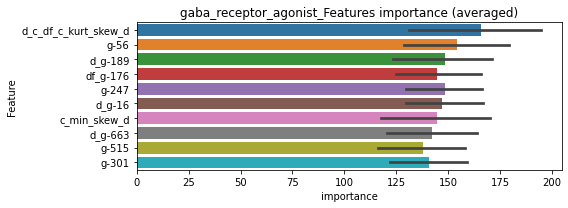

len(train_index) : 2717
len(valid_index) : 906
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0424494	valid_1's binary_logloss: 0.0573444
[2000]	training's binary_logloss: 0.0226945	valid_1's binary_logloss: 0.0374381
[3000]	training's binary_logloss: 0.0157046	valid_1's binary_logloss: 0.0309138
[4000]	training's binary_logloss: 0.0119676	valid_1's binary_logloss: 0.0277521
[5000]	training's binary_logloss: 0.00962069	valid_1's binary_logloss: 0.0256728
[6000]	training's binary_logloss: 0.00801872	valid_1's binary_logloss: 0.0243466
[7000]	training's binary_logloss: 0.00689327	valid_1's binary_logloss: 0.0234267
[8000]	training's binary_logloss: 0.00604641	valid_1's binary_logloss: 0.022684
[9000]	training's binary_logloss: 0.00539456	valid_1's binary_logloss: 0.0221575
Early stopping, best iteration is:
[9298]	training's binary_logloss: 0.00522509	valid_1's binary_logloss: 0.021997


len(train_index) : 2717
len(valid_index) : 906
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0416665	valid_1's binary_logloss: 0.0576119
[2000]	training's binary_logloss: 0.0222748	valid_1's binary_logloss: 0.038939
[3000]	training's binary_logloss: 0.0154362	valid_1's binary_logloss: 0.0325464
[4000]	training's binary_logloss: 0.011809	valid_1's binary_logloss: 0.0292518
[5000]	training's binary_logloss: 0.00953145	valid_1's binary_logloss: 0.0273487
[6000]	training's binary_logloss: 0.00798891	valid_1's binary_logloss: 0.0258837
Early stopping, best iteration is:
[6920]	training's binary_logloss: 0.00695204	valid_1's binary_logloss: 0.0249961


len(train_index) : 2717
len(valid_index) : 906
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.044837	valid_1's binary_logloss: 0.0502694
[2000]	training's binary_logloss: 0.0244132	valid_1's binary_logloss: 0.0298848
[3000]	training's binary_logloss: 0.016879	valid_1's binary_logloss: 0.0228644
[4000]	training's binary_logloss: 0.0128421	valid_1's binary_logloss: 0.0192904
[5000]	training's binary_logloss: 0.0103362	valid_1's binary_logloss: 0.0169988
[6000]	training's binary_logloss: 0.00861946	valid_1's binary_logloss: 0.0153923
[7000]	training's binary_logloss: 0.00739849	valid_1's binary_logloss: 0.0142323
[8000]	training's binary_logloss: 0.00649469	valid_1's binary_logloss: 0.0133272
[9000]	training's binary_logloss: 0.00578904	valid_1's binary_logloss: 0.0126491
[10000]	training's binary_logloss: 0.00522283	valid_1's binary_logloss: 0.0120887
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00522283	valid_1's binary_logloss: 0.0120887


len(train_index) : 2718
len(valid_index) : 905
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0423252	valid_1's binary_logloss: 0.0551812
[2000]	training's binary_logloss: 0.0228727	valid_1's binary_logloss: 0.0363814
[3000]	training's binary_logloss: 0.0158095	valid_1's binary_logloss: 0.0302237
[4000]	training's binary_logloss: 0.0120647	valid_1's binary_logloss: 0.0270032
[5000]	training's binary_logloss: 0.00970593	valid_1's binary_logloss: 0.0251284
[6000]	training's binary_logloss: 0.00809691	valid_1's binary_logloss: 0.0238159
[7000]	training's binary_logloss: 0.00694749	valid_1's binary_logloss: 0.022903
[8000]	training's binary_logloss: 0.00609374	valid_1's binary_logloss: 0.022239
[9000]	training's binary_logloss: 0.00543655	valid_1's binary_logloss: 0.0217294
Early stopping, best iteration is:
[9285]	training's binary_logloss: 0.00527068	valid_1's binary_logloss: 0.0215782


gaba_receptor_agonist logloss: 0.02016461336976091
gaba_receptor_agonist is unpredictable(><)!


mutually exclusive columns: gaba_receptor_antagonist


gaba_receptor_antagonist, len(trt): 165, len(othr): 4671
target_rate: 0.0069287 → Adj_target_rate: 0.0064426


selected negative label: 4671


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.077147	valid_1's binary_logloss: 0.114597
Early stopping, best iteration is:
[1801]	training's binary_logloss: 0.0485056	valid_1's binary_logloss: 0.106358
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0733999	valid_1's binary_logloss: 0.13521
Early stopping, best iteration is:
[1545]	training's binary_logloss: 0.0525856	valid_1's binary_logloss: 0.131276
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0749626	valid_1's binary_logloss: 0.124157
Early stopping, best iteration is:
[1732]	training's binary_logloss: 0.0487422	valid_1's binary_logloss: 0.117778
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0742464	valid_1's binary_logloss: 0.130413
Early stopping, best iteration is:
[1755]	training's binary_logloss: 0.0472553	valid_1's binary_logl

1 / 3, AUC score:0.962, PR-AUC:0.932
y_Threshold: 0.0615791, Threshold: 0.0825877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 389 → Positive_corect_labels: 833/5216
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, Expected: 27.6, Threshold: 0.0825877, conf_0:0.05781, conf_1:0.10736
threshold: 0.0825877, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 833.0/5216, y_label_rate: 0.1597009
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0435079	valid_1's binary_logloss: 0.0604621
[2000]	training's binary_logloss: 0.0240548	valid_1's binary_logloss: 0.050323
Early stopping, best iteration is:
[2818]	training's binary_logloss: 0.0171079	valid_1's binary_logloss: 0.0473311
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0434122	valid_1's binary_logloss: 0.0608768
[2000]	training's binary_logloss: 0.0239637	valid_1's binary_logloss: 0.0496172
Early stopping, best iteration is:
[2814]	training's binary_logloss: 0.0170163	valid_1's binary_logloss: 0.0464249
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0401733	valid_1's binary_logloss: 0.0750154
Early stopping, best iteration is:
[1661]	training's binary_logloss: 0.0264261	valid_1's binary_logloss: 0.0680378
Training until validation scores don't improve for 30 rounds
[1000]	train

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0465152, Threshold: 0.0825877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 799.0/5148
p_label_rate: 0.0042692 Vs.target_rate: 0.00693
Num_p_label: 17.0, Expected: 27.6, Threshold: 0.0825877, conf_0:0.06607, conf_1:0.09911
threshold: 0.0825877, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 799.0/5148, y_label_rate: 0.1552059
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0309218	valid_1's binary_logloss: 0.0346648
[2000]	training's binary_logloss: 0.0170512	valid_1's binary_logloss: 0.0241776
[3000]	training's binary_logloss: 0.01145	valid_1's binary_logloss: 0.0204718
[4000]	training's binary_logloss: 0.00850595	valid_1's binary_logloss: 0.0185203
[5000]	training's binary_logloss: 0.00674695	valid_1's binary_logloss: 0.0173569
[6000]	training's binary_logloss: 0.00559874	valid_1's binary_logloss: 0.0165866
Early stopping, best iteration is:
[6885]	training's binary_logloss: 0.00485526	valid_1's binary_logloss: 0.0160902
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0293742	valid_1's binary_logloss: 0.0414525
[2000]	training's binary_logloss: 0.0160064	valid_1's binary_logloss: 0.0319506
[3000]	training's binary_logloss: 0.0106421	valid_1's binary_logloss: 0.0287721
[4000]	training's binary_logloss: 0.00791

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0311907, Threshold: 0.0825877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 787.0/5124
p_label_rate: 0.0055249 Vs.target_rate: 0.00693
Num_p_label: 22.0, Expected: 27.6, Threshold: 0.0825877, conf_0:0.07433, conf_1:0.09085
threshold: 0.0825877, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 787.0/5124, y_label_rate: 0.1535909


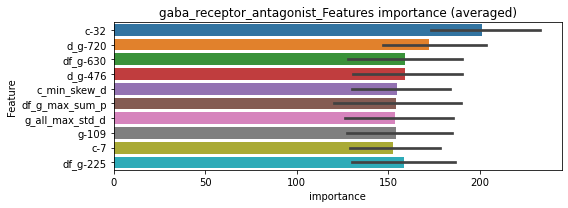

len(train_index) : 3843
len(valid_index) : 1281
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0328787	valid_1's binary_logloss: 0.0441699
[2000]	training's binary_logloss: 0.017711	valid_1's binary_logloss: 0.029432
[3000]	training's binary_logloss: 0.0123475	valid_1's binary_logloss: 0.0248849
[4000]	training's binary_logloss: 0.00936666	valid_1's binary_logloss: 0.0225613
[5000]	training's binary_logloss: 0.00752575	valid_1's binary_logloss: 0.0213023
Early stopping, best iteration is:
[5737]	training's binary_logloss: 0.00655264	valid_1's binary_logloss: 0.0205868


len(train_index) : 3843
len(valid_index) : 1281
================================= fold 2/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0314004	valid_1's binary_logloss: 0.0524174
[2000]	training's binary_logloss: 0.0165038	valid_1's binary_logloss: 0.039078
[3000]	training's binary_logloss: 0.0114485	valid_1's binary_logloss: 0.0349631
[4000]	training's binary_logloss: 0.00869842	valid_1's binary_logloss: 0.033118
Early stopping, best iteration is:
[4290]	training's binary_logloss: 0.00810283	valid_1's binary_logloss: 0.0327059


len(train_index) : 3843
len(valid_index) : 1281
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0339614	valid_1's binary_logloss: 0.0433143
[2000]	training's binary_logloss: 0.0182545	valid_1's binary_logloss: 0.0279505
[3000]	training's binary_logloss: 0.0126847	valid_1's binary_logloss: 0.0230378
[4000]	training's binary_logloss: 0.00963055	valid_1's binary_logloss: 0.0206374
[5000]	training's binary_logloss: 0.00774322	valid_1's binary_logloss: 0.0192918
[6000]	training's binary_logloss: 0.00645365	valid_1's binary_logloss: 0.0182351
Early stopping, best iteration is:
[6863]	training's binary_logloss: 0.00563408	valid_1's binary_logloss: 0.0176994


len(train_index) : 3843
len(valid_index) : 1281
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.035889	valid_1's binary_logloss: 0.0333204
[2000]	training's binary_logloss: 0.0198713	valid_1's binary_logloss: 0.0178994
[3000]	training's binary_logloss: 0.0138395	valid_1's binary_logloss: 0.0129829
[4000]	training's binary_logloss: 0.0104659	valid_1's binary_logloss: 0.0104187
[5000]	training's binary_logloss: 0.00839419	valid_1's binary_logloss: 0.00868972
[6000]	training's binary_logloss: 0.00698309	valid_1's binary_logloss: 0.00754087
[7000]	training's binary_logloss: 0.00597887	valid_1's binary_logloss: 0.00664685
[8000]	training's binary_logloss: 0.00522567	valid_1's binary_logloss: 0.00595595
[9000]	training's binary_logloss: 0.00463354	valid_1's binary_logloss: 0.00541783
[10000]	training's binary_logloss: 0.00417688	valid_1's binary_logloss: 0.0049822
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00417688	valid_1's binary_logloss: 0.004982

gaba_receptor_antagonist logloss: 0.01899360113138831
gamma_secretase_inhibitor, len(trt): 56, len(othr): 3280
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00061414	valid_1's binary_logloss: 0.028672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00059292	valid_1's binary_logloss: 0.0138343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00053579	valid_1's binary_logloss: 0.00532702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000562109	valid_1's binary_logloss: 0.020655


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040846, Threshold: 0.0148952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0148952, conf_0:0.01043, conf_1:0.01936
Num_p_label: 5.0, Expected: 9.4, Adj_threshold_1: 0.0448952
threshold: 0.0448952, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000515198	valid_1's binary_logloss: 0.0268571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000513255	valid_1's binary_logloss: 0.0104279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000534547	valid_1's binary_logloss: 0.0056577
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000658203	valid_1's binary_logloss: 0.0193247


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234573, Threshold: 0.0448952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0070316 Vs.target_rate: 0.00235
Num_p_label: 28.0, Expected: 9.4, Threshold: 0.0448952, conf_0:0.03592, conf_1:0.05387
Num_p_label: 16.0, Expected: 9.4, Adj_threshold_1: 0.0748952
threshold: 0.0748952, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000513834	valid_1's binary_logloss: 0.0151799
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000529141	valid_1's binary_logloss: 0.00726634
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000537653	valid_1's binary_logloss: 0.00794365
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000624862	valid_1's binary_logloss: 0.0228448


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0177893, Threshold: 0.0748952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0042692 Vs.target_rate: 0.00235
Num_p_label: 17.0, Expected: 9.4, Threshold: 0.0748952, conf_0:0.06741, conf_1:0.08238
threshold: 0.0748952, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


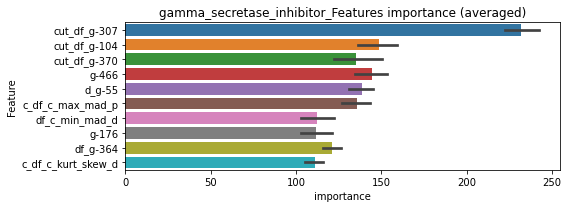

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00054733	valid_1's binary_logloss: 0.0184323


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000517823	valid_1's binary_logloss: 0.0159327


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000519814	valid_1's binary_logloss: 0.00958038


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


gamma_secretase_inhibitor logloss: 0.014643601578602835


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000769155	valid_1's binary_logloss: 0.0146237
mutually exclusive columns: glucocorticoid_receptor_agonist


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 7168
target_rate: 0.0111699 → Adj_target_rate: 0.0096682


selected negative label: 7168


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0761937	valid_1's binary_logloss: 0.133407
Early stopping, best iteration is:
[1362]	training's binary_logloss: 0.060027	valid_1's binary_logloss: 0.129762
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0758535	valid_1's binary_logloss: 0.13327
Early stopping, best iteration is:
[1531]	training's binary_logloss: 0.054513	valid_1's binary_logloss: 0.126293
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0776094	valid_1's binary_logloss: 0.127
Early stopping, best iteration is:
[1731]	training's binary_logloss: 0.0497921	valid_1's binary_logloss: 0.119468
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0764517	valid_1's binary_logloss: 0.128455
Early stopping, best iteration is:
[1755]	training's binary_logloss: 0.0484935	valid_1's binary_logloss:

1 / 3, AUC score:0.962, PR-AUC:0.933
y_Threshold: 0.0688383, Threshold: 0.1039928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 588 → Positive_corect_labels: 1283/8013
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, Expected: 44.5, Threshold: 0.1039928, conf_0:0.07279, conf_1:0.13519
threshold: 0.1039928, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1283.0/8013, y_label_rate: 0.1601148
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0433482	valid_1's binary_logloss: 0.0819677
[2000]	training's binary_logloss: 0.0232942	valid_1's binary_logloss: 0.0721336
Early stopping, best iteration is:
[2400]	training's binary_logloss: 0.0194228	valid_1's binary_logloss: 0.0703762
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0442467	valid_1's binary_logloss: 0.0725169
[2000]	training's binary_logloss: 0.0238331	valid_1's binary_logloss: 0.0612416
Early stopping, best iteration is:
[2762]	training's binary_logloss: 0.0171762	valid_1's binary_logloss: 0.058518
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461957	valid_1's binary_logloss: 0.0650981
[2000]	training's binary_logloss: 0.0248343	valid_1's binary_logloss: 0.0529424
[3000]	training's binary_logloss: 0.0164204	valid_1's binary_logloss: 0.0483315
Early stopping, best iterati

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0516604, Threshold: 0.1039928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 1241.0/7929
p_label_rate: 0.0020090 Vs.target_rate: 0.01117
Num_p_label: 8.0, Expected: 44.5, Threshold: 0.1039928, conf_0:0.08319, conf_1:0.12479
threshold: 0.1039928, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 1241.0/7929, y_label_rate: 0.1565141
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0369744	valid_1's binary_logloss: 0.0564091
[2000]	training's binary_logloss: 0.0196739	valid_1's binary_logloss: 0.045577
Early stopping, best iteration is:
[2920]	training's binary_logloss: 0.0133565	valid_1's binary_logloss: 0.0419896
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0353527	valid_1's binary_logloss: 0.0605032
[2000]	training's binary_logloss: 0.0186547	valid_1's binary_logloss: 0.0501653
Early stopping, best iteration is:
[2810]	training's binary_logloss: 0.013277	valid_1's binary_logloss: 0.0474658
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0365232	valid_1's binary_logloss: 0.0525104
[2000]	training's binary_logloss: 0.0194291	valid_1's binary_logloss: 0.0416133
[3000]	training's binary_logloss: 0.0129207	valid_1's binary_logloss: 0.0375636
Early stopping, best iteratio

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0428752, Threshold: 0.1039928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 1222.0/7891
p_label_rate: 0.0005023 Vs.target_rate: 0.01117
Num_p_label: 2.0, Expected: 44.5, Threshold: 0.1039928, conf_0:0.09359, conf_1:0.11439
threshold: 0.1039928, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 1222.0/7891, y_label_rate: 0.1548600


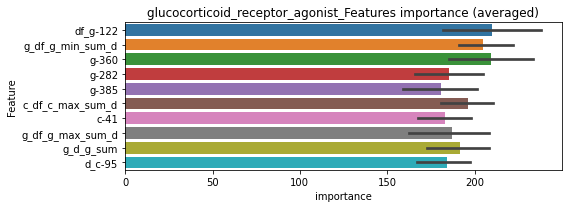

len(train_index) : 5918
len(valid_index) : 1973
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0441108	valid_1's binary_logloss: 0.0573392
[2000]	training's binary_logloss: 0.024409	valid_1's binary_logloss: 0.0413853
[3000]	training's binary_logloss: 0.0165854	valid_1's binary_logloss: 0.0362645
[4000]	training's binary_logloss: 0.0124344	valid_1's binary_logloss: 0.0336464
[5000]	training's binary_logloss: 0.00987626	valid_1's binary_logloss: 0.032258
Early stopping, best iteration is:
[5819]	training's binary_logloss: 0.00845195	valid_1's binary_logloss: 0.0314575


len(train_index) : 5918
len(valid_index) : 1973
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0430121	valid_1's binary_logloss: 0.0624364
[2000]	training's binary_logloss: 0.0237322	valid_1's binary_logloss: 0.0468535
[3000]	training's binary_logloss: 0.0162187	valid_1's binary_logloss: 0.0418608
[4000]	training's binary_logloss: 0.0122277	valid_1's binary_logloss: 0.0394665
Early stopping, best iteration is:
[4106]	training's binary_logloss: 0.0118858	valid_1's binary_logloss: 0.0393023


len(train_index) : 5918
len(valid_index) : 1973
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.043763	valid_1's binary_logloss: 0.0580328
[2000]	training's binary_logloss: 0.024193	valid_1's binary_logloss: 0.0419893
[3000]	training's binary_logloss: 0.0165765	valid_1's binary_logloss: 0.0371226
[4000]	training's binary_logloss: 0.0124648	valid_1's binary_logloss: 0.0347288
Early stopping, best iteration is:
[4829]	training's binary_logloss: 0.0102849	valid_1's binary_logloss: 0.0336246


len(train_index) : 5919
len(valid_index) : 1972
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0445191	valid_1's binary_logloss: 0.0588831
[2000]	training's binary_logloss: 0.0245858	valid_1's binary_logloss: 0.0419345
[3000]	training's binary_logloss: 0.0167931	valid_1's binary_logloss: 0.0364645
[4000]	training's binary_logloss: 0.0125903	valid_1's binary_logloss: 0.033684
[5000]	training's binary_logloss: 0.00999765	valid_1's binary_logloss: 0.031996
[6000]	training's binary_logloss: 0.0082994	valid_1's binary_logloss: 0.0307807
Early stopping, best iteration is:
[6675]	training's binary_logloss: 0.00744764	valid_1's binary_logloss: 0.0301631


glucocorticoid_receptor_agonist logloss: 0.0336373076089408
glucocorticoid_receptor_agonist is unpredictable(><)!
glutamate_inhibitor, len(trt): 13, len(othr): 3289
target_rate: 0.0005459 → Adj_target_rate: 0.0007431


selected negative label: 3289


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000248389	valid_1's binary_logloss: 0.00142496
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000249975	valid_1's binary_logloss: 0.000680271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000248947	valid_1's binary_logloss: 0.000434563
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010229, Threshold: 0.0030542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, Expected: 2.2, Threshold: 0.0030542, conf_0:0.00214, conf_1:0.00397
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_1: 0.0330542


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000250396	valid_1's binary_logloss: 0.000817639


threshold: 0.0330542, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000247064	valid_1's binary_logloss: 0.00134691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000242808	valid_1's binary_logloss: 0.00100334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000250915	valid_1's binary_logloss: 0.000314465
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804666, Threshold: 0.0330542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00055
Num_p_label: 8.0, Expected: 2.2, Threshold: 0.0330542, conf_0:0.02644, conf_1:0.03967
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_1: 0.0630542


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000243885	valid_1's binary_logloss: 0.000509267


threshold: 0.0630542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000247064	valid_1's binary_logloss: 0.00134691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000242808	valid_1's binary_logloss: 0.00100334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000250915	valid_1's binary_logloss: 0.000314465
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804666, Threshold: 0.0630542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00055
Num_p_label: 5.0, Expected: 2.2, Threshold: 0.0630542, conf_0:0.05675, conf_1:0.06936


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000243885	valid_1's binary_logloss: 0.000509267


threshold: 0.0630542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


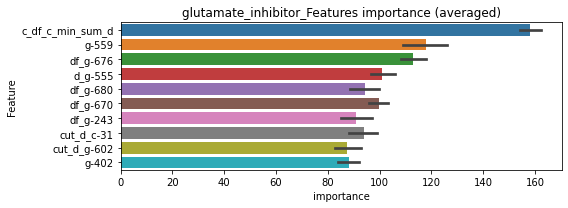

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000247728	valid_1's binary_logloss: 0.000806273
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000246516	valid_1's binary_logloss: 0.000622541
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000250912	valid_1's binary_logloss: 0.000328572
Training until validation scores don't improve for 30 rounds


glutamate_inhibitor logloss: 0.000582065615965791


Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000246872	valid_1's binary_logloss: 0.000570575


glutamate_receptor_agonist, len(trt): 74, len(othr): 3274
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3274


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0817331	valid_1's binary_logloss: 0.12853
[2000]	training's binary_logloss: 0.0433226	valid_1's binary_logloss: 0.0911746
[3000]	training's binary_logloss: 0.0290667	valid_1's binary_logloss: 0.0776148
[4000]	training's binary_logloss: 0.0216894	valid_1's binary_logloss: 0.0704997
[5000]	training's binary_logloss: 0.0173142	valid_1's binary_logloss: 0.0664222
Early stopping, best iteration is:
[5062]	training's binary_logloss: 0.0171017	valid_1's binary_logloss: 0.0661367
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0836967	valid_1's binary_logloss: 0.119449
[2000]	training's binary_logloss: 0.0442686	valid_1's binary_logloss: 0.0826976
[3000]	training's binary_logloss: 0.029797	valid_1's binary_logloss: 0.0693444
[4000]	training's binary_logloss: 0.0222666	valid_1's binary_logloss: 0.0627032
[5000]	training's binary_logloss: 0.0178076	val

1 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0465614, Threshold: 0.3226916, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 641/3770
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.3226916, conf_0:0.22588, conf_1:0.41950
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_1: 0.3526916
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_2: 0.3826916
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_3: 0.4126916
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_4: 0.4426916
Num_p_label: 18.0, Expected: 12.4, Adj_threshold_5: 0.4726916
threshold: 0.4726916, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 641.0/3770, y_label_rate: 0.1700265
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0756546	valid_1's binary_logloss: 0.109859
[2000]	training's binary_logloss: 0.0392406	valid_1's binary_logloss: 0.0711332
[3000]	training's binary_logloss: 0.0261487	valid_1's binary_logloss: 0.0563199
[4000]	training's binary_logloss: 0.0194642	valid_1's binary_logloss: 0.0489323
[5000]	training's binary_logloss: 0.0155179	valid_1's binary_logloss: 0.044042
[6000]	training's binary_logloss: 0.0129194	valid_1's binary_logloss: 0.040723
Early stopping, best iteration is:
[6932]	training's binary_logloss: 0.0111807	valid_1's binary_logloss: 0.0387092
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0764816	valid_1's binary_logloss: 0.106698
[2000]	training's binary_logloss: 0.0394403	valid_1's binary_logloss: 0.0686745
[3000]	training's binary_logloss: 0.0263788	valid_1's binary_logloss: 0.0547512
[4000]	training's binary_logloss: 0.0196246	val

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.1126423, Threshold: 0.4726916, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 630.0/3748
p_label_rate: 0.0180814 Vs.target_rate: 0.00311
Num_p_label: 72.0, Expected: 12.4, Threshold: 0.4726916, conf_0:0.37815, conf_1:0.56723
Num_p_label: 65.0, Expected: 12.4, Adj_threshold_1: 0.5026916
Num_p_label: 58.0, Expected: 12.4, Adj_threshold_2: 0.5326916
Num_p_label: 53.0, Expected: 12.4, Adj_threshold_3: 0.5626916
Num_p_label: 49.0, Expected: 12.4, Adj_threshold_4: 0.5926916
Num_p_label: 44.0, Expected: 12.4, Adj_threshold_5: 0.6226916
Num_p_label: 39.0, Expected: 12.4, Adj_threshold_6: 0.6526916
Num_p_label: 33.0, Expected: 12.4, Adj_threshold_7: 0.6826916
Num_p_label: 29.0, Expected: 12.4, Adj_threshold_8: 0.7126916
Num_p_label: 19.0, Expected: 12.4, Adj_threshold_9: 0.7426916
Num_p_label: 13.0, Expected: 12.4, Adj_threshold_10: 0.7726916
threshold: 0.7726916, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
p

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0731335	valid_1's binary_logloss: 0.102952
[2000]	training's binary_logloss: 0.0374932	valid_1's binary_logloss: 0.0669821
[3000]	training's binary_logloss: 0.0249682	valid_1's binary_logloss: 0.0534333
[4000]	training's binary_logloss: 0.018586	valid_1's binary_logloss: 0.0468046
[5000]	training's binary_logloss: 0.0148774	valid_1's binary_logloss: 0.0427149
[6000]	training's binary_logloss: 0.0123834	valid_1's binary_logloss: 0.0398727
[7000]	training's binary_logloss: 0.0106239	valid_1's binary_logloss: 0.0379017
Early stopping, best iteration is:
[7358]	training's binary_logloss: 0.0101203	valid_1's binary_logloss: 0.0372569
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0731111	valid_1's binary_logloss: 0.102918
[2000]	training's binary_logloss: 0.0372824	valid_1's binary_logloss: 0.065338
[3000]	training's binary_logloss: 0.0247331	val

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.1181478, Threshold: 0.7726916, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 625.0/3738
p_label_rate: 0.0062783 Vs.target_rate: 0.00311
Num_p_label: 25.0, Expected: 12.4, Threshold: 0.7726916, conf_0:0.69542, conf_1:0.84996
Num_p_label: 16.0, Expected: 12.4, Adj_threshold_1: 0.8026916
threshold: 0.8026916, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 625.0/3738, y_label_rate: 0.1672017


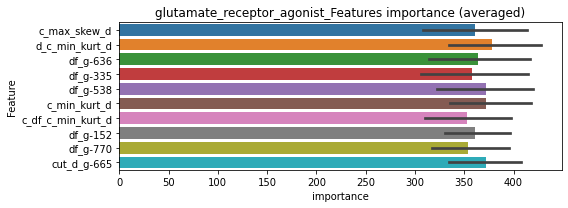

len(train_index) : 2803
len(valid_index) : 935
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0987682	valid_1's binary_logloss: 0.134386
[2000]	training's binary_logloss: 0.0533475	valid_1's binary_logloss: 0.0851749
[3000]	training's binary_logloss: 0.0357269	valid_1's binary_logloss: 0.0647496
[4000]	training's binary_logloss: 0.0267056	valid_1's binary_logloss: 0.0541442
[5000]	training's binary_logloss: 0.0213212	valid_1's binary_logloss: 0.0476063
[6000]	training's binary_logloss: 0.0176954	valid_1's binary_logloss: 0.0431724
[7000]	training's binary_logloss: 0.0151809	valid_1's binary_logloss: 0.0400332
[8000]	training's binary_logloss: 0.0132602	valid_1's binary_logloss: 0.0375303
[9000]	training's binary_logloss: 0.0117884	valid_1's binary_logloss: 0.0356076
[10000]	training's binary_logloss: 0.0106272	valid_1's binary_logloss: 0.0341091
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0106272	valid_1's binary_logloss: 0.0341091


len(train_index) : 2803
len(valid_index) : 935
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0989079	valid_1's binary_logloss: 0.127274
[2000]	training's binary_logloss: 0.0525155	valid_1's binary_logloss: 0.0817382
[3000]	training's binary_logloss: 0.0353082	valid_1's binary_logloss: 0.0637624
[4000]	training's binary_logloss: 0.0264123	valid_1's binary_logloss: 0.0541318
[5000]	training's binary_logloss: 0.0211504	valid_1's binary_logloss: 0.048152
[6000]	training's binary_logloss: 0.0175392	valid_1's binary_logloss: 0.0437575
[7000]	training's binary_logloss: 0.0150477	valid_1's binary_logloss: 0.0407419
[8000]	training's binary_logloss: 0.013149	valid_1's binary_logloss: 0.0383077
[9000]	training's binary_logloss: 0.0116833	valid_1's binary_logloss: 0.0363839
Early stopping, best iteration is:
[9480]	training's binary_logloss: 0.0111063	valid_1's binary_logloss: 0.0356565


len(train_index) : 2804
len(valid_index) : 934
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0994828	valid_1's binary_logloss: 0.133426
[2000]	training's binary_logloss: 0.0531831	valid_1's binary_logloss: 0.0847757
[3000]	training's binary_logloss: 0.03576	valid_1's binary_logloss: 0.0654493
[4000]	training's binary_logloss: 0.0267359	valid_1's binary_logloss: 0.0548883
[5000]	training's binary_logloss: 0.0214584	valid_1's binary_logloss: 0.0486693
[6000]	training's binary_logloss: 0.0178372	valid_1's binary_logloss: 0.0440035
[7000]	training's binary_logloss: 0.0153094	valid_1's binary_logloss: 0.0409206
Early stopping, best iteration is:
[7879]	training's binary_logloss: 0.0135689	valid_1's binary_logloss: 0.0385866


len(train_index) : 2804
len(valid_index) : 934
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0988941	valid_1's binary_logloss: 0.130692
[2000]	training's binary_logloss: 0.0526098	valid_1's binary_logloss: 0.0852436
[3000]	training's binary_logloss: 0.0353256	valid_1's binary_logloss: 0.0669556
[4000]	training's binary_logloss: 0.0264048	valid_1's binary_logloss: 0.0572871
[5000]	training's binary_logloss: 0.0211514	valid_1's binary_logloss: 0.0514506
[6000]	training's binary_logloss: 0.0175474	valid_1's binary_logloss: 0.0471875
Early stopping, best iteration is:
[6254]	training's binary_logloss: 0.0168312	valid_1's binary_logloss: 0.0463966


glutamate_receptor_agonist logloss: 0.038685163279321436
glutamate_receptor_agonist is unpredictable(><)!


mutually exclusive columns: glutamate_receptor_antagonist


glutamate_receptor_antagonist, len(trt): 367, len(othr): 7212
target_rate: 0.0154111 → Adj_target_rate: 0.0127105


selected negative label: 7212


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0989302	valid_1's binary_logloss: 0.162423
Early stopping, best iteration is:
[1305]	training's binary_logloss: 0.0819084	valid_1's binary_logloss: 0.159241
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0964879	valid_1's binary_logloss: 0.176633
Early stopping, best iteration is:
[1491]	training's binary_logloss: 0.0721383	valid_1's binary_logloss: 0.173039
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0971902	valid_1's binary_logloss: 0.174433
Early stopping, best iteration is:
[1302]	training's binary_logloss: 0.0807013	valid_1's binary_logloss: 0.172134
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0973974	valid_1's binary_logloss: 0.167711
Early stopping, best iteration is:
[1499]	training's binary_logloss: 0.0721608	valid_1's binary_lo

1 / 3, AUC score:0.919, PR-AUC:0.871
y_Threshold: 0.0820989, Threshold: 0.1142929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 819 → Positive_corect_labels: 1177/7835
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, Expected: 61.4, Threshold: 0.1142929, conf_0:0.08001, conf_1:0.14858
threshold: 0.1142929, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1177.0/7835, y_label_rate: 0.1502234
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0426216	valid_1's binary_logloss: 0.0630222
[2000]	training's binary_logloss: 0.0232248	valid_1's binary_logloss: 0.0542144
Early stopping, best iteration is:
[2494]	training's binary_logloss: 0.018571	valid_1's binary_logloss: 0.0523454
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0411491	valid_1's binary_logloss: 0.074274
[2000]	training's binary_logloss: 0.022407	valid_1's binary_logloss: 0.0660661
Early stopping, best iteration is:
[2279]	training's binary_logloss: 0.0195883	valid_1's binary_logloss: 0.0649427
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0423217	valid_1's binary_logloss: 0.0652224
[2000]	training's binary_logloss: 0.0229703	valid_1's binary_logloss: 0.0565572
Early stopping, best iteration is:
[2494]	training's binary_logloss: 0.0183784	valid_1's binary_logloss: 0.054

2 / 3, AUC score:0.995, PR-AUC:0.984
y_Threshold: 0.0504125, Threshold: 0.1142929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 1105.0/7691
p_label_rate: 0.0052737 Vs.target_rate: 0.01541
Num_p_label: 21.0, Expected: 61.4, Threshold: 0.1142929, conf_0:0.09143, conf_1:0.13715
threshold: 0.1142929, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 1105.0/7691, y_label_rate: 0.1436744
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0230422	valid_1's binary_logloss: 0.0252135
[2000]	training's binary_logloss: 0.0121833	valid_1's binary_logloss: 0.0156144
[3000]	training's binary_logloss: 0.00822924	valid_1's binary_logloss: 0.0123784
[4000]	training's binary_logloss: 0.00617983	valid_1's binary_logloss: 0.0106529
[5000]	training's binary_logloss: 0.00492746	valid_1's binary_logloss: 0.00950262
[6000]	training's binary_logloss: 0.00410699	valid_1's binary_logloss: 0.00870066
[7000]	training's binary_logloss: 0.00352331	valid_1's binary_logloss: 0.00813896
[8000]	training's binary_logloss: 0.00308293	valid_1's binary_logloss: 0.00766613
[9000]	training's binary_logloss: 0.0027457	valid_1's binary_logloss: 0.00729392
[10000]	training's binary_logloss: 0.00247562	valid_1's binary_logloss: 0.00701731
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00247562	valid_1's binary_logloss: 0.007

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0549504, Threshold: 0.1142929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 1088.0/7657
p_label_rate: 0.0095429 Vs.target_rate: 0.01541
Num_p_label: 38.0, Expected: 61.4, Threshold: 0.1142929, conf_0:0.10286, conf_1:0.12572
threshold: 0.1142929, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1088.0/7657, y_label_rate: 0.1420922


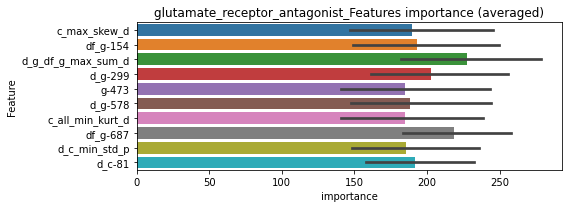

len(train_index) : 5742
len(valid_index) : 1915
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0253585	valid_1's binary_logloss: 0.0337059
[2000]	training's binary_logloss: 0.0127412	valid_1's binary_logloss: 0.0198694
[3000]	training's binary_logloss: 0.00852797	valid_1's binary_logloss: 0.0151422
[4000]	training's binary_logloss: 0.00642085	valid_1's binary_logloss: 0.0128484
[5000]	training's binary_logloss: 0.00518006	valid_1's binary_logloss: 0.0114999
[6000]	training's binary_logloss: 0.00435335	valid_1's binary_logloss: 0.0105211
[7000]	training's binary_logloss: 0.0037599	valid_1's binary_logloss: 0.00980332
[8000]	training's binary_logloss: 0.00330954	valid_1's binary_logloss: 0.00930445
[9000]	training's binary_logloss: 0.00295058	valid_1's binary_logloss: 0.00886059
[10000]	training's binary_logloss: 0.0026726	valid_1's binary_logloss: 0.00852565
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0026726	valid_1's binary_logloss: 0.0085256

len(train_index) : 5743
len(valid_index) : 1914
================================= fold 2/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0255914	valid_1's binary_logloss: 0.0301654
[2000]	training's binary_logloss: 0.012891	valid_1's binary_logloss: 0.016891
[3000]	training's binary_logloss: 0.00865271	valid_1's binary_logloss: 0.0124354
[4000]	training's binary_logloss: 0.00652226	valid_1's binary_logloss: 0.0101671
[5000]	training's binary_logloss: 0.00527241	valid_1's binary_logloss: 0.00886784
[6000]	training's binary_logloss: 0.00442028	valid_1's binary_logloss: 0.0079568
[7000]	training's binary_logloss: 0.00381417	valid_1's binary_logloss: 0.00730552
[8000]	training's binary_logloss: 0.00335252	valid_1's binary_logloss: 0.00681201
[9000]	training's binary_logloss: 0.00298888	valid_1's binary_logloss: 0.00641534
[10000]	training's binary_logloss: 0.00270897	valid_1's binary_logloss: 0.00613706
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00270897	valid_1's binary_logloss: 0.00613

len(train_index) : 5743
len(valid_index) : 1914
================================= fold 3/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0252754	valid_1's binary_logloss: 0.0318368
[2000]	training's binary_logloss: 0.0127081	valid_1's binary_logloss: 0.0182905
[3000]	training's binary_logloss: 0.00851082	valid_1's binary_logloss: 0.0136645
[4000]	training's binary_logloss: 0.00639298	valid_1's binary_logloss: 0.0112763
[5000]	training's binary_logloss: 0.00515349	valid_1's binary_logloss: 0.00988959
[6000]	training's binary_logloss: 0.00432358	valid_1's binary_logloss: 0.00892215
[7000]	training's binary_logloss: 0.00372995	valid_1's binary_logloss: 0.00825084
[8000]	training's binary_logloss: 0.00327843	valid_1's binary_logloss: 0.00770989
[9000]	training's binary_logloss: 0.00292071	valid_1's binary_logloss: 0.00727027
[10000]	training's binary_logloss: 0.00264363	valid_1's binary_logloss: 0.00695691
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00264363	valid_1's binary_logloss: 0.00

len(train_index) : 5743
len(valid_index) : 1914
================================= fold 4/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0250736	valid_1's binary_logloss: 0.0323036
[2000]	training's binary_logloss: 0.0124799	valid_1's binary_logloss: 0.0193242
[3000]	training's binary_logloss: 0.00831212	valid_1's binary_logloss: 0.0150251
[4000]	training's binary_logloss: 0.00625976	valid_1's binary_logloss: 0.0128801
[5000]	training's binary_logloss: 0.00505103	valid_1's binary_logloss: 0.0116644
[6000]	training's binary_logloss: 0.00424231	valid_1's binary_logloss: 0.0108347
[7000]	training's binary_logloss: 0.00365975	valid_1's binary_logloss: 0.0102364
[8000]	training's binary_logloss: 0.00322045	valid_1's binary_logloss: 0.00978742
[9000]	training's binary_logloss: 0.00287477	valid_1's binary_logloss: 0.00944611
[10000]	training's binary_logloss: 0.00260632	valid_1's binary_logloss: 0.00918009
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00260632	valid_1's binary_logloss: 0.00918

glutamate_receptor_antagonist logloss: 0.007700034284991312
gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000327946	valid_1's binary_logloss: 0.00417093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000333201	valid_1's binary_logloss: 0.0022164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000327027	valid_1's binary_logloss: 0.00150829
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016159, Threshold: 0.0067539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0067539, conf_0:0.00473, conf_1:0.00878
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0367539


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000327101	valid_1's binary_logloss: 0.00230603


threshold: 0.0367539, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00032402	valid_1's binary_logloss: 0.00534353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000317345	valid_1's binary_logloss: 0.00252017
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000319924	valid_1's binary_logloss: 0.00146367
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184599, Threshold: 0.0367539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00076
Num_p_label: 25.0, Expected: 3.0, Threshold: 0.0367539, conf_0:0.02940, conf_1:0.04410
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.0667539
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0967539
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1267539


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000313418	valid_1's binary_logloss: 0.00292358


threshold: 0.1267539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00032402	valid_1's binary_logloss: 0.00534353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000317345	valid_1's binary_logloss: 0.00252017
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000319924	valid_1's binary_logloss: 0.00146367
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184599, Threshold: 0.1267539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.1267539, conf_0:0.11408, conf_1:0.13943


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000313418	valid_1's binary_logloss: 0.00292358


threshold: 0.1267539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


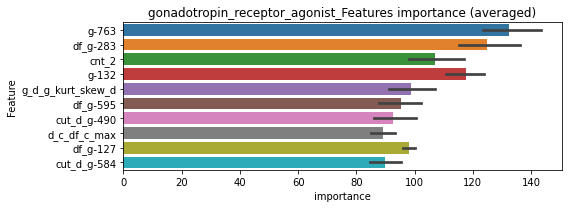

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000337365	valid_1's binary_logloss: 0.00298288
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000332218	valid_1's binary_logloss: 0.00212317


================================= fold 3/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000322995	valid_1's binary_logloss: 0.00076979


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000313382	valid_1's binary_logloss: 0.00182863


gonadotropin_receptor_agonist logloss: 0.0019261565525640566
gsk_inhibitor, len(trt): 60, len(othr): 3284
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3284


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000555089	valid_1's binary_logloss: 0.0219872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000539349	valid_1's binary_logloss: 0.011397
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000571239	valid_1's binary_logloss: 0.0040697
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000571971	valid_1's binary_logloss: 0.0123742


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0063958, Threshold: 0.0278116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0278116, conf_0:0.01947, conf_1:0.03616
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_1: 0.0578116
threshold: 0.0578116, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000561291	valid_1's binary_logloss: 0.0227617
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000541903	valid_1's binary_logloss: 0.0118092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000538336	valid_1's binary_logloss: 0.00257977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000518816	valid_1's binary_logloss: 0.0107191


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0455323, Threshold: 0.0578116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0118031 Vs.target_rate: 0.00252
Num_p_label: 47.0, Expected: 10.0, Threshold: 0.0578116, conf_0:0.04625, conf_1:0.06937
Num_p_label: 31.0, Expected: 10.0, Adj_threshold_1: 0.0878116
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_2: 0.1178116
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_3: 0.1478116
threshold: 0.1478116, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000570492	valid_1's binary_logloss: 0.0204135
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000544746	valid_1's binary_logloss: 0.0138702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.0011227	valid_1's binary_logloss: 0.0295565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000535343	valid_1's binary_logloss: 0.00896161


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0313879, Threshold: 0.1478116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.1478116, conf_0:0.13303, conf_1:0.16259
threshold: 0.1478116, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


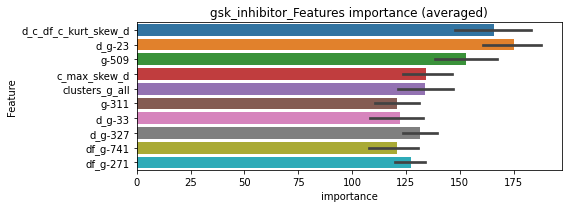

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000614298	valid_1's binary_logloss: 0.0122118


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000659535	valid_1's binary_logloss: 0.0153046


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000565856	valid_1's binary_logloss: 0.0057899


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000641893	valid_1's binary_logloss: 0.0124911


gsk_inhibitor logloss: 0.011449356799714268
hcv_inhibitor, len(trt): 72, len(othr): 3284
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0811965	valid_1's binary_logloss: 0.12417
[2000]	training's binary_logloss: 0.0429929	valid_1's binary_logloss: 0.0853666
[3000]	training's binary_logloss: 0.0287227	valid_1's binary_logloss: 0.0709897
[4000]	training's binary_logloss: 0.0214903	valid_1's binary_logloss: 0.0637424
Early stopping, best iteration is:
[4610]	training's binary_logloss: 0.0185833	valid_1's binary_logloss: 0.0606337
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0838969	valid_1's binary_logloss: 0.118515
[2000]	training's binary_logloss: 0.0445533	valid_1's binary_logloss: 0.0777942
[3000]	training's binary_logloss: 0.0298542	valid_1's binary_logloss: 0.0627748
[4000]	training's binary_logloss: 0.0223367	valid_1's binary_logloss: 0.0548577
[5000]	training's binary_logloss: 0.017785	valid_1's binary_logloss: 0.0495193
[6000]	training's binary_logloss: 0.0147368	val

1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0481335, Threshold: 0.0919392, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0919392, conf_0:0.06436, conf_1:0.11952
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_1: 0.1219392
Num_p_label: 10.0, Expected: 12.0, Adj_threshold_2: 0.1519392
threshold: 0.1519392, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0806249	valid_1's binary_logloss: 0.107701
[2000]	training's binary_logloss: 0.0417282	valid_1's binary_logloss: 0.0661938
[3000]	training's binary_logloss: 0.0278375	valid_1's binary_logloss: 0.0507798
[4000]	training's binary_logloss: 0.0208914	valid_1's binary_logloss: 0.0428478
[5000]	training's binary_logloss: 0.0166659	valid_1's binary_logloss: 0.0379745
[6000]	training's binary_logloss: 0.0138136	valid_1's binary_logloss: 0.0344418
[7000]	training's binary_logloss: 0.0118444	valid_1's binary_logloss: 0.0317777
[8000]	training's binary_logloss: 0.0103407	valid_1's binary_logloss: 0.0297857
[9000]	training's binary_logloss: 0.00918821	valid_1's binary_logloss: 0.0282589
[10000]	training's binary_logloss: 0.00827302	valid_1's binary_logloss: 0.0270236
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00827302	valid_1's binary_logloss: 0.0270236
Trainin

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0819362, Threshold: 0.1519392, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 645.0/3786
p_label_rate: 0.0070316 Vs.target_rate: 0.00302
Num_p_label: 28.0, Expected: 12.0, Threshold: 0.1519392, conf_0:0.12155, conf_1:0.18233
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_1: 0.1819392
threshold: 0.1819392, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 645.0/3786, y_label_rate: 0.1703645
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0762633	valid_1's binary_logloss: 0.111488
[2000]	training's binary_logloss: 0.0391216	valid_1's binary_logloss: 0.0735776
[3000]	training's binary_logloss: 0.0259429	valid_1's binary_logloss: 0.0599943
[4000]	training's binary_logloss: 0.019375	valid_1's binary_logloss: 0.0527797
Early stopping, best iteration is:
[4338]	training's binary_logloss: 0.0178576	valid_1's binary_logloss: 0.0512106
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0769234	valid_1's binary_logloss: 0.112452
[2000]	training's binary_logloss: 0.0396694	valid_1's binary_logloss: 0.0725478
[3000]	training's binary_logloss: 0.0263391	valid_1's binary_logloss: 0.0579184
[4000]	training's binary_logloss: 0.0196902	valid_1's binary_logloss: 0.0505304
[5000]	training's binary_logloss: 0.0156521	valid_1's binary_logloss: 0.0459195
[6000]	training's binary_logloss: 0.0129835	va

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.1074339, Threshold: 0.1819392, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 637.0/3770
p_label_rate: 0.0052737 Vs.target_rate: 0.00302
Num_p_label: 21.0, Expected: 12.0, Threshold: 0.1819392, conf_0:0.16375, conf_1:0.20013
Num_p_label: 12.0, Expected: 12.0, Adj_threshold_1: 0.2119392
threshold: 0.2119392, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 637.0/3770, y_label_rate: 0.1689655


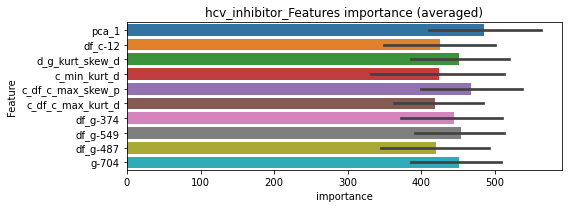

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.101622	valid_1's binary_logloss: 0.136673
[2000]	training's binary_logloss: 0.0540077	valid_1's binary_logloss: 0.0879441
[3000]	training's binary_logloss: 0.0365879	valid_1's binary_logloss: 0.0688235
[4000]	training's binary_logloss: 0.0277608	valid_1's binary_logloss: 0.0591797
[5000]	training's binary_logloss: 0.0222167	valid_1's binary_logloss: 0.0528497
[6000]	training's binary_logloss: 0.0184729	valid_1's binary_logloss: 0.0485044
[7000]	training's binary_logloss: 0.0158233	valid_1's binary_logloss: 0.0452481
[8000]	training's binary_logloss: 0.0138678	valid_1's binary_logloss: 0.042897
[9000]	training's binary_logloss: 0.0123434	valid_1's binary_logloss: 0.0408779
Early stopping, best iteration is:
[9299]	training's binary_logloss: 0.0119451	valid_1's binary_logloss: 0.0404127


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.102188	valid_1's binary_logloss: 0.12864
[2000]	training's binary_logloss: 0.054395	valid_1's binary_logloss: 0.0796568
[3000]	training's binary_logloss: 0.0368138	valid_1's binary_logloss: 0.0612425
[4000]	training's binary_logloss: 0.0278294	valid_1's binary_logloss: 0.0515091
[5000]	training's binary_logloss: 0.022298	valid_1's binary_logloss: 0.0455534
[6000]	training's binary_logloss: 0.0186106	valid_1's binary_logloss: 0.041426
[7000]	training's binary_logloss: 0.015931	valid_1's binary_logloss: 0.0385048
[8000]	training's binary_logloss: 0.0139544	valid_1's binary_logloss: 0.036219
[9000]	training's binary_logloss: 0.0124041	valid_1's binary_logloss: 0.0343142
Early stopping, best iteration is:
[9304]	training's binary_logloss: 0.0119971	valid_1's binary_logloss: 0.0338418


len(train_index) : 2828
len(valid_index) : 942
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.102247	valid_1's binary_logloss: 0.128429
[2000]	training's binary_logloss: 0.0544868	valid_1's binary_logloss: 0.0790338
[3000]	training's binary_logloss: 0.0368693	valid_1's binary_logloss: 0.0602163
[4000]	training's binary_logloss: 0.0278716	valid_1's binary_logloss: 0.0504114
[5000]	training's binary_logloss: 0.022367	valid_1's binary_logloss: 0.0445262
[6000]	training's binary_logloss: 0.0186224	valid_1's binary_logloss: 0.0403588
[7000]	training's binary_logloss: 0.015948	valid_1's binary_logloss: 0.037412
[8000]	training's binary_logloss: 0.0139772	valid_1's binary_logloss: 0.035166
[9000]	training's binary_logloss: 0.0124196	valid_1's binary_logloss: 0.0333809
[10000]	training's binary_logloss: 0.0111848	valid_1's binary_logloss: 0.0318787
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0111848	valid_1's binary_logloss: 0.0318787


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.101299	valid_1's binary_logloss: 0.141518
[2000]	training's binary_logloss: 0.0537232	valid_1's binary_logloss: 0.0907728
[3000]	training's binary_logloss: 0.0362838	valid_1's binary_logloss: 0.0713858
[4000]	training's binary_logloss: 0.0273142	valid_1's binary_logloss: 0.0613306
[5000]	training's binary_logloss: 0.0218993	valid_1's binary_logloss: 0.0547736
[6000]	training's binary_logloss: 0.0182736	valid_1's binary_logloss: 0.0502721
[7000]	training's binary_logloss: 0.0156482	valid_1's binary_logloss: 0.0469165
[8000]	training's binary_logloss: 0.0137366	valid_1's binary_logloss: 0.0443913
Early stopping, best iteration is:
[8935]	training's binary_logloss: 0.0122951	valid_1's binary_logloss: 0.0425192


hcv_inhibitor logloss: 0.037163102259409685
hcv_inhibitor is unpredictable(><)!
hdac_inhibitor, len(trt): 106, len(othr): 3274
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.111302	valid_1's binary_logloss: 0.185752
[2000]	training's binary_logloss: 0.0596092	valid_1's binary_logloss: 0.136697
[3000]	training's binary_logloss: 0.0397322	valid_1's binary_logloss: 0.117215
[4000]	training's binary_logloss: 0.0296649	valid_1's binary_logloss: 0.107201
Early stopping, best iteration is:
[4084]	training's binary_logloss: 0.029018	valid_1's binary_logloss: 0.106306
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.110165	valid_1's binary_logloss: 0.178674
[2000]	training's binary_logloss: 0.0594338	valid_1's binary_logloss: 0.130278
[3000]	training's binary_logloss: 0.0399674	valid_1's binary_logloss: 0.110359
[4000]	training's binary_logloss: 0.0298841	valid_1's binary_logloss: 0.101155
Early stopping, best iteration is:
[4164]	training's binary_logloss: 0.028643	valid_1's binary_logloss: 0.0997253
Training until valida

1 / 3, AUC score:0.991, PR-AUC:0.981
y_Threshold: 0.0792218, Threshold: 0.1925787, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 634/3756
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1925787, conf_0:0.13481, conf_1:0.25035
Num_p_label: 28.0, Expected: 17.7, Adj_threshold_1: 0.2225787
Num_p_label: 15.0, Expected: 17.7, Adj_threshold_2: 0.2525787
threshold: 0.2525787, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 634.0/3756, y_label_rate: 0.1687966
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.10218	valid_1's binary_logloss: 0.165873
[2000]	training's binary_logloss: 0.0527245	valid_1's binary_logloss: 0.115726
[3000]	training's binary_logloss: 0.0347847	valid_1's binary_logloss: 0.0958731
Early stopping, best iteration is:
[3264]	training's binary_logloss: 0.0318613	valid_1's binary_logloss: 0.0922285
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.103783	valid_1's binary_logloss: 0.153134
[2000]	training's binary_logloss: 0.0535958	valid_1's binary_logloss: 0.10299
[3000]	training's binary_logloss: 0.0352911	valid_1's binary_logloss: 0.083052
[4000]	training's binary_logloss: 0.0262302	valid_1's binary_logloss: 0.0732701
[5000]	training's binary_logloss: 0.02076	valid_1's binary_logloss: 0.0671184
[6000]	training's binary_logloss: 0.017191	valid_1's binary_logloss: 0.0630882
Early stopping, best iteration is:
[6706]	training's bi

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.1274937, Threshold: 0.2525787, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 620.0/3728
p_label_rate: 0.0077850 Vs.target_rate: 0.00445
Num_p_label: 31.0, Expected: 17.7, Threshold: 0.2525787, conf_0:0.20206, conf_1:0.30309
Num_p_label: 21.0, Expected: 17.7, Adj_threshold_1: 0.2825787
threshold: 0.2825787, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 620.0/3728, y_label_rate: 0.1663090
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0977582	valid_1's binary_logloss: 0.157312
[2000]	training's binary_logloss: 0.0494901	valid_1's binary_logloss: 0.108418
[3000]	training's binary_logloss: 0.0324621	valid_1's binary_logloss: 0.089094
[4000]	training's binary_logloss: 0.0241261	valid_1's binary_logloss: 0.079734
[5000]	training's binary_logloss: 0.0190671	valid_1's binary_logloss: 0.0735788
Early stopping, best iteration is:
[5238]	training's binary_logloss: 0.0181576	valid_1's binary_logloss: 0.0724905
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.100067	valid_1's binary_logloss: 0.141939
[2000]	training's binary_logloss: 0.0514022	valid_1's binary_logloss: 0.0897397
[3000]	training's binary_logloss: 0.0336899	valid_1's binary_logloss: 0.0695762
[4000]	training's binary_logloss: 0.0250225	valid_1's binary_logloss: 0.059171
[5000]	training's binary_logloss: 0.0197719	valid_

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.1295076, Threshold: 0.2825787, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 611.0/3710
p_label_rate: 0.0050226 Vs.target_rate: 0.00445
Num_p_label: 20.0, Expected: 17.7, Threshold: 0.2825787, conf_0:0.25432, conf_1:0.31084
threshold: 0.2825787, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 611.0/3710, y_label_rate: 0.1646900


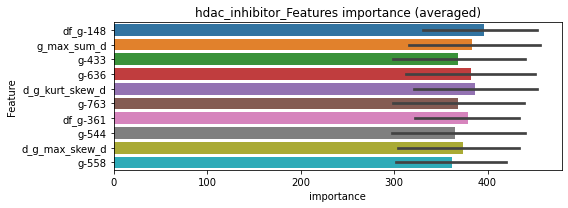

len(train_index) : 2782
len(valid_index) : 928
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.124149	valid_1's binary_logloss: 0.177552
[2000]	training's binary_logloss: 0.0683276	valid_1's binary_logloss: 0.121405
[3000]	training's binary_logloss: 0.0463717	valid_1's binary_logloss: 0.0971987
[4000]	training's binary_logloss: 0.0348622	valid_1's binary_logloss: 0.0842937
[5000]	training's binary_logloss: 0.0279333	valid_1's binary_logloss: 0.0759939
[6000]	training's binary_logloss: 0.0232093	valid_1's binary_logloss: 0.0705502
Early stopping, best iteration is:
[6855]	training's binary_logloss: 0.0202856	valid_1's binary_logloss: 0.067014


len(train_index) : 2782
len(valid_index) : 928
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.123472	valid_1's binary_logloss: 0.177185
[2000]	training's binary_logloss: 0.0674341	valid_1's binary_logloss: 0.122567
[3000]	training's binary_logloss: 0.0454361	valid_1's binary_logloss: 0.0989599
[4000]	training's binary_logloss: 0.0340655	valid_1's binary_logloss: 0.087024
[5000]	training's binary_logloss: 0.0272403	valid_1's binary_logloss: 0.0795391
[6000]	training's binary_logloss: 0.022663	valid_1's binary_logloss: 0.0739513
Early stopping, best iteration is:
[6780]	training's binary_logloss: 0.0200292	valid_1's binary_logloss: 0.0705981


len(train_index) : 2783
len(valid_index) : 927
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.126449	valid_1's binary_logloss: 0.163192
[2000]	training's binary_logloss: 0.0700138	valid_1's binary_logloss: 0.106709
[3000]	training's binary_logloss: 0.0474681	valid_1's binary_logloss: 0.0828783
[4000]	training's binary_logloss: 0.0357213	valid_1's binary_logloss: 0.0693789
[5000]	training's binary_logloss: 0.0285972	valid_1's binary_logloss: 0.0611292
[6000]	training's binary_logloss: 0.0238012	valid_1's binary_logloss: 0.0554187
[7000]	training's binary_logloss: 0.020428	valid_1's binary_logloss: 0.051387
[8000]	training's binary_logloss: 0.0178561	valid_1's binary_logloss: 0.0480918
[9000]	training's binary_logloss: 0.0158232	valid_1's binary_logloss: 0.045181
[10000]	training's binary_logloss: 0.0142426	valid_1's binary_logloss: 0.0431642
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0142426	valid_1's binary_logloss: 0.0431642


len(train_index) : 2783
len(valid_index) : 927
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.124571	valid_1's binary_logloss: 0.174602
[2000]	training's binary_logloss: 0.0683642	valid_1's binary_logloss: 0.118309
[3000]	training's binary_logloss: 0.046462	valid_1's binary_logloss: 0.0939263
[4000]	training's binary_logloss: 0.0349204	valid_1's binary_logloss: 0.0806921
[5000]	training's binary_logloss: 0.0278836	valid_1's binary_logloss: 0.0721596
[6000]	training's binary_logloss: 0.0232511	valid_1's binary_logloss: 0.0665346
[7000]	training's binary_logloss: 0.0199112	valid_1's binary_logloss: 0.0621649
[8000]	training's binary_logloss: 0.0173811	valid_1's binary_logloss: 0.0588615
[9000]	training's binary_logloss: 0.0154103	valid_1's binary_logloss: 0.0562284
Early stopping, best iteration is:
[9301]	training's binary_logloss: 0.0149147	valid_1's binary_logloss: 0.0554493


hdac_inhibitor logloss: 0.05906165677379874
hdac_inhibitor is unpredictable(><)!
histamine_receptor_agonist, len(trt): 59, len(othr): 3282
target_rate: 0.0024775 → Adj_target_rate: 0.0026880


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000604738	valid_1's binary_logloss: 0.0308654
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000633297	valid_1's binary_logloss: 0.0264239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000599084	valid_1's binary_logloss: 0.00835136
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000619545	valid_1's binary_logloss: 0.0160083


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044916, Threshold: 0.0113097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, Expected: 9.9, Threshold: 0.0113097, conf_0:0.00792, conf_1:0.01470
Num_p_label: 6.0, Expected: 9.9, Adj_threshold_1: 0.0413097
threshold: 0.0413097, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000532573	valid_1's binary_logloss: 0.0282637
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000671245	valid_1's binary_logloss: 0.0281672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000706465	valid_1's binary_logloss: 0.00830879
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297420, Threshold: 0.0413097, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000772995	valid_1's binary_logloss: 0.0177459


Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0037670 Vs.target_rate: 0.00248
Num_p_label: 15.0, Expected: 9.9, Threshold: 0.0413097, conf_0:0.03305, conf_1:0.04957
threshold: 0.0413097, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000648265	valid_1's binary_logloss: 0.021099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000596982	valid_1's binary_logloss: 0.0143308
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000771285	valid_1's binary_logloss: 0.0199072
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000571399	valid_1's binary_logloss: 0.0243474


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0282593, Threshold: 0.0413097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0032647 Vs.target_rate: 0.00248
Num_p_label: 13.0, Expected: 9.9, Threshold: 0.0413097, conf_0:0.03718, conf_1:0.04544
threshold: 0.0413097, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


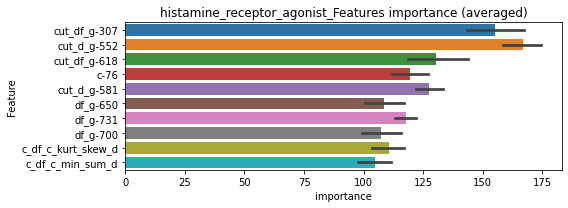

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000604003	valid_1's binary_logloss: 0.0181342


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000756127	valid_1's binary_logloss: 0.0189122
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000709301	valid_1's binary_logloss: 0.015535


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00062248	valid_1's binary_logloss: 0.0121307


histamine_receptor_agonist logloss: 0.016178026919016063


mutually exclusive columns: histamine_receptor_antagonist


histamine_receptor_antagonist, len(trt): 241, len(othr): 6554
target_rate: 0.0101201 → Adj_target_rate: 0.0088902


selected negative label: 6554


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0765825	valid_1's binary_logloss: 0.130647
Early stopping, best iteration is:
[1513]	training's binary_logloss: 0.055973	valid_1's binary_logloss: 0.126124
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0769067	valid_1's binary_logloss: 0.134892
Early stopping, best iteration is:
[1329]	training's binary_logloss: 0.0621876	valid_1's binary_logloss: 0.131497
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0790058	valid_1's binary_logloss: 0.11955
Early stopping, best iteration is:
[1797]	training's binary_logloss: 0.0495633	valid_1's binary_logloss: 0.112413
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.074776	valid_1's binary_logloss: 0.139109
Early stopping, best iteration is:
[1346]	training's binary_logloss: 0.0600013	valid_1's binary_loglo

1 / 3, AUC score:0.955, PR-AUC:0.921
y_Threshold: 0.0617114, Threshold: 0.0809691, pos_neg_ratio: 0.8000000
Remove_noisy_data: 583 → Positive_corect_labels: 1150/7281
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, Expected: 40.3, Threshold: 0.0809691, conf_0:0.05668, conf_1:0.10526
threshold: 0.0809691, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1150.0/7281, y_label_rate: 0.1579453
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.039058	valid_1's binary_logloss: 0.0573057
[2000]	training's binary_logloss: 0.0211202	valid_1's binary_logloss: 0.0489932
Early stopping, best iteration is:
[2865]	training's binary_logloss: 0.0146249	valid_1's binary_logloss: 0.0466136
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0370054	valid_1's binary_logloss: 0.0660786
[2000]	training's binary_logloss: 0.0203054	valid_1's binary_logloss: 0.0588483
Early stopping, best iteration is:
[2054]	training's binary_logloss: 0.0197976	valid_1's binary_logloss: 0.0586438
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0383912	valid_1's binary_logloss: 0.0603201
[2000]	training's binary_logloss: 0.0208202	valid_1's binary_logloss: 0.0525786
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0183058	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0409338, Threshold: 0.0809691, pos_neg_ratio: 0.8000000
Remove_noisy_data: 94 → Positive_corect_labels: 1103.0/7187
p_label_rate: 0.0022602 Vs.target_rate: 0.01012
Num_p_label: 9.0, Expected: 40.3, Threshold: 0.0809691, conf_0:0.06478, conf_1:0.09716
threshold: 0.0809691, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 1103.0/7187, y_label_rate: 0.1534715
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0256356	valid_1's binary_logloss: 0.0285434
[2000]	training's binary_logloss: 0.0138113	valid_1's binary_logloss: 0.0202881
[3000]	training's binary_logloss: 0.00919227	valid_1's binary_logloss: 0.0172895
[4000]	training's binary_logloss: 0.00683873	valid_1's binary_logloss: 0.0157453
[5000]	training's binary_logloss: 0.00543903	valid_1's binary_logloss: 0.0147664
[6000]	training's binary_logloss: 0.00451505	valid_1's binary_logloss: 0.0141381
[7000]	training's binary_logloss: 0.00385949	valid_1's binary_logloss: 0.0137248
[8000]	training's binary_logloss: 0.00337162	valid_1's binary_logloss: 0.0134198
Early stopping, best iteration is:
[8609]	training's binary_logloss: 0.00313068	valid_1's binary_logloss: 0.013268
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0208684	valid_1's binary_logloss: 0.0525421
Early stopping, best iteration is:
[1

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0337512, Threshold: 0.0809691, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 1080.0/7141
p_label_rate: 0.0027624 Vs.target_rate: 0.01012
Num_p_label: 11.0, Expected: 40.3, Threshold: 0.0809691, conf_0:0.07287, conf_1:0.08907
threshold: 0.0809691, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 1080.0/7141, y_label_rate: 0.1512393


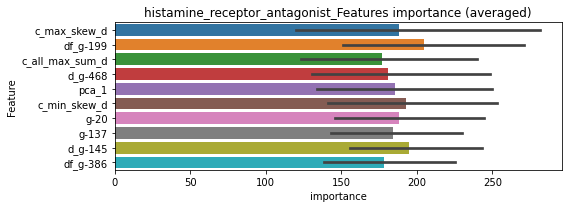

len(train_index) : 5355
len(valid_index) : 1786
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261211	valid_1's binary_logloss: 0.0261153
[2000]	training's binary_logloss: 0.014024	valid_1's binary_logloss: 0.0138548
[3000]	training's binary_logloss: 0.00976829	valid_1's binary_logloss: 0.00983927
[4000]	training's binary_logloss: 0.00743455	valid_1's binary_logloss: 0.00787686
[5000]	training's binary_logloss: 0.00601326	valid_1's binary_logloss: 0.00662542
[6000]	training's binary_logloss: 0.00500365	valid_1's binary_logloss: 0.00576085
[7000]	training's binary_logloss: 0.00429217	valid_1's binary_logloss: 0.00514448
[8000]	training's binary_logloss: 0.00376131	valid_1's binary_logloss: 0.00464593
[9000]	training's binary_logloss: 0.0033371	valid_1's binary_logloss: 0.00425622
[10000]	training's binary_logloss: 0.00301031	valid_1's binary_logloss: 0.00393664
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00301031	valid_1's binary_logloss: 0.00

len(train_index) : 5356
len(valid_index) : 1785
================================= fold 2/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0250211	valid_1's binary_logloss: 0.0300192
[2000]	training's binary_logloss: 0.0133067	valid_1's binary_logloss: 0.0177823
[3000]	training's binary_logloss: 0.00934662	valid_1's binary_logloss: 0.0139232
[4000]	training's binary_logloss: 0.00712047	valid_1's binary_logloss: 0.0118586
[5000]	training's binary_logloss: 0.00574989	valid_1's binary_logloss: 0.010604
[6000]	training's binary_logloss: 0.00480132	valid_1's binary_logloss: 0.00967413
[7000]	training's binary_logloss: 0.00412877	valid_1's binary_logloss: 0.00908708
[8000]	training's binary_logloss: 0.00362189	valid_1's binary_logloss: 0.00857217
[9000]	training's binary_logloss: 0.00321022	valid_1's binary_logloss: 0.00814369
[10000]	training's binary_logloss: 0.00289808	valid_1's binary_logloss: 0.00786941
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00289808	valid_1's binary_logloss: 0.0078

len(train_index) : 5356
len(valid_index) : 1785
================================= fold 3/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0236619	valid_1's binary_logloss: 0.0335531
[2000]	training's binary_logloss: 0.0121067	valid_1's binary_logloss: 0.0220817
[3000]	training's binary_logloss: 0.00833602	valid_1's binary_logloss: 0.01853
[4000]	training's binary_logloss: 0.00635762	valid_1's binary_logloss: 0.0168697
[5000]	training's binary_logloss: 0.00515754	valid_1's binary_logloss: 0.0159842
[6000]	training's binary_logloss: 0.00432007	valid_1's binary_logloss: 0.0152448
Early stopping, best iteration is:
[6795]	training's binary_logloss: 0.00382713	valid_1's binary_logloss: 0.014916


len(train_index) : 5356
len(valid_index) : 1785
================================= fold 4/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0241318	valid_1's binary_logloss: 0.0340779
[2000]	training's binary_logloss: 0.0125572	valid_1's binary_logloss: 0.0219018
[3000]	training's binary_logloss: 0.00868476	valid_1's binary_logloss: 0.0178589
[4000]	training's binary_logloss: 0.00661198	valid_1's binary_logloss: 0.0159897
[5000]	training's binary_logloss: 0.00534427	valid_1's binary_logloss: 0.0148153
[6000]	training's binary_logloss: 0.00445098	valid_1's binary_logloss: 0.0140018
[7000]	training's binary_logloss: 0.00382576	valid_1's binary_logloss: 0.013455
[8000]	training's binary_logloss: 0.00335719	valid_1's binary_logloss: 0.0130033
[9000]	training's binary_logloss: 0.00297382	valid_1's binary_logloss: 0.0126679
Early stopping, best iteration is:
[9337]	training's binary_logloss: 0.00286746	valid_1's binary_logloss: 0.0125888


histamine_receptor_antagonist logloss: 0.009826888022994154
histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000369455	valid_1's binary_logloss: 0.00114519
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000377085	valid_1's binary_logloss: 0.00292148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000375244	valid_1's binary_logloss: 0.000933239
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021060, Threshold: 0.0192562, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000366755	valid_1's binary_logloss: 0.00326198


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0192562, conf_0:0.01348, conf_1:0.02503
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_1: 0.0492562
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_2: 0.0792562
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_3: 0.1092562
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_4: 0.1392562
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_5: 0.1692562
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_6: 0.1992562
threshold: 0.1992562, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000361811	valid_1's binary_logloss: 0.00101115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00035995	valid_1's binary_logloss: 0.00230201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000362215	valid_1's binary_logloss: 0.000904991
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1091735, Threshold: 0.1992562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000367631	valid_1's binary_logloss: 0.00196054


p_label_rate: 0.0060271 Vs.target_rate: 0.00101
Num_p_label: 24.0, Expected: 4.0, Threshold: 0.1992562, conf_0:0.15940, conf_1:0.23911
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_1: 0.2292562
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_2: 0.2592562
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_3: 0.2892562
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.3192562
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_5: 0.3492562
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_6: 0.3792562
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_7: 0.4092562
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_8: 0.4392562
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.4692562
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_10: 0.4992562
threshold: 0.4992562, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000361811	valid_1's binary_logloss: 0.00101115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00035995	valid_1's binary_logloss: 0.00230201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000362215	valid_1's binary_logloss: 0.000904991
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1091735, Threshold: 0.4992562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000367631	valid_1's binary_logloss: 0.00196054


p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, Expected: 4.0, Threshold: 0.4992562, conf_0:0.44933, conf_1:0.54918
threshold: 0.4992562, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


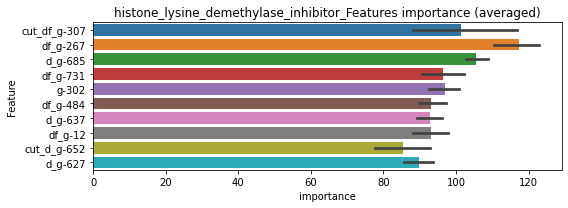

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000364737	valid_1's binary_logloss: 0.00118363


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000371686	valid_1's binary_logloss: 0.0026746


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000375721	valid_1's binary_logloss: 0.000804619


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000368782	valid_1's binary_logloss: 0.0018564


histone_lysine_demethylase_inhibitor logloss: 0.0016297543029701632
histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000423709	valid_1's binary_logloss: 0.00730819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000429247	valid_1's binary_logloss: 0.00519131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000405989	valid_1's binary_logloss: 0.00108827
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0027884, Threshold: 0.0072024, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000449703	valid_1's binary_logloss: 0.0151647


Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0072024, conf_0:0.00504, conf_1:0.00936
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0372024
threshold: 0.0372024, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000383789	valid_1's binary_logloss: 0.00159495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402049	valid_1's binary_logloss: 0.00633584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000399196	valid_1's binary_logloss: 0.00462132
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156337, Threshold: 0.0372024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000420781	valid_1's binary_logloss: 0.00948249


p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, Expected: 5.4, Threshold: 0.0372024, conf_0:0.02976, conf_1:0.04464
threshold: 0.0372024, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000383789	valid_1's binary_logloss: 0.00159495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402049	valid_1's binary_logloss: 0.00633584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000399196	valid_1's binary_logloss: 0.00462132
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156337, Threshold: 0.0372024, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000420781	valid_1's binary_logloss: 0.00948249


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, Expected: 5.4, Threshold: 0.0372024, conf_0:0.03348, conf_1:0.04092
threshold: 0.0372024, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


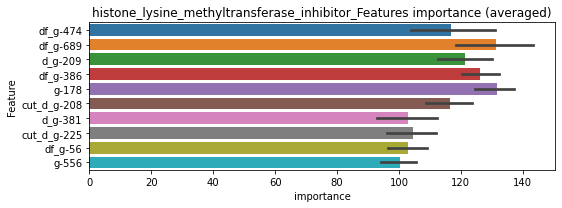

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000387513	valid_1's binary_logloss: 0.00172774
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.000386079	valid_1's binary_logloss: 0.00172408


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000516587	valid_1's binary_logloss: 0.00575498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000400275	valid_1's binary_logloss: 0.00395225


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000418503	valid_1's binary_logloss: 0.00983046


histone_lysine_methyltransferase_inhibitor logloss: 0.005315461979958494
hiv_inhibitor, len(trt): 72, len(othr): 3281
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0807447	valid_1's binary_logloss: 0.133259
[2000]	training's binary_logloss: 0.0416238	valid_1's binary_logloss: 0.0971596
[3000]	training's binary_logloss: 0.0277232	valid_1's binary_logloss: 0.0842169
[4000]	training's binary_logloss: 0.0206435	valid_1's binary_logloss: 0.0777795
[5000]	training's binary_logloss: 0.0165514	valid_1's binary_logloss: 0.0738836
Early stopping, best iteration is:
[5835]	training's binary_logloss: 0.0141467	valid_1's binary_logloss: 0.0714408
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.084326	valid_1's binary_logloss: 0.115725
[2000]	training's binary_logloss: 0.0440648	valid_1's binary_logloss: 0.0728064
[3000]	training's binary_logloss: 0.0295168	valid_1's binary_logloss: 0.0571248
[4000]	training's binary_logloss: 0.0221107	valid_1's binary_logloss: 0.0487602
[5000]	training's binary_logloss: 0.0176915	va

1 / 3, AUC score:0.997, PR-AUC:0.995
y_Threshold: 0.0414041, Threshold: 0.2111249, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.2111249, conf_0:0.14779, conf_1:0.27446
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_1: 0.2411249
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_2: 0.2711249
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_3: 0.3011249
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_4: 0.3311249
threshold: 0.3311249, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0801074	valid_1's binary_logloss: 0.112197
[2000]	training's binary_logloss: 0.04044	valid_1's binary_logloss: 0.0718893
[3000]	training's binary_logloss: 0.0267928	valid_1's binary_logloss: 0.0575796
[4000]	training's binary_logloss: 0.019962	valid_1's binary_logloss: 0.0497379
[5000]	training's binary_logloss: 0.0159428	valid_1's binary_logloss: 0.044718
[6000]	training's binary_logloss: 0.0132283	valid_1's binary_logloss: 0.0413541
[7000]	training's binary_logloss: 0.011347	valid_1's binary_logloss: 0.0390444
[8000]	training's binary_logloss: 0.00993881	valid_1's binary_logloss: 0.0368892
Early stopping, best iteration is:
[8085]	training's binary_logloss: 0.00983765	valid_1's binary_logloss: 0.036817
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0790019	valid_1's binary_logloss: 0.12072
[2000]	training's binary_logloss: 0.0401118	valid_

2 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.1032768, Threshold: 0.3311249, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 641.0/3775
p_label_rate: 0.0153189 Vs.target_rate: 0.00302
Num_p_label: 61.0, Expected: 12.0, Threshold: 0.3311249, conf_0:0.26490, conf_1:0.39735
Num_p_label: 55.0, Expected: 12.0, Adj_threshold_1: 0.3611249
Num_p_label: 48.0, Expected: 12.0, Adj_threshold_2: 0.3911249
Num_p_label: 46.0, Expected: 12.0, Adj_threshold_3: 0.4211249
Num_p_label: 42.0, Expected: 12.0, Adj_threshold_4: 0.4511249
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_5: 0.4811249
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_6: 0.5111249
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_7: 0.5411249
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_8: 0.5711249
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_9: 0.6011249
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_10: 0.6311249
threshold: 0.6311249, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
p

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0761825	valid_1's binary_logloss: 0.112891
[2000]	training's binary_logloss: 0.0384203	valid_1's binary_logloss: 0.070486
[3000]	training's binary_logloss: 0.0254539	valid_1's binary_logloss: 0.0551623
[4000]	training's binary_logloss: 0.0189578	valid_1's binary_logloss: 0.0472564
[5000]	training's binary_logloss: 0.015175	valid_1's binary_logloss: 0.0422115
[6000]	training's binary_logloss: 0.0125966	valid_1's binary_logloss: 0.0386432
[7000]	training's binary_logloss: 0.0107792	valid_1's binary_logloss: 0.0359937
Early stopping, best iteration is:
[7365]	training's binary_logloss: 0.0102263	valid_1's binary_logloss: 0.0350328
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0769987	valid_1's binary_logloss: 0.11028
[2000]	training's binary_logloss: 0.0388338	valid_1's binary_logloss: 0.0694547
[3000]	training's binary_logloss: 0.0255917	vali

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1059109, Threshold: 0.6311249, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 637.0/3767
p_label_rate: 0.0092918 Vs.target_rate: 0.00302
Num_p_label: 37.0, Expected: 12.0, Threshold: 0.6311249, conf_0:0.56801, conf_1:0.69424
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_1: 0.6611249
Num_p_label: 31.0, Expected: 12.0, Adj_threshold_2: 0.6911249
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_3: 0.7211249
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_4: 0.7511249
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_5: 0.7811249
threshold: 0.7811249, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 637.0/3767, y_label_rate: 0.1691001


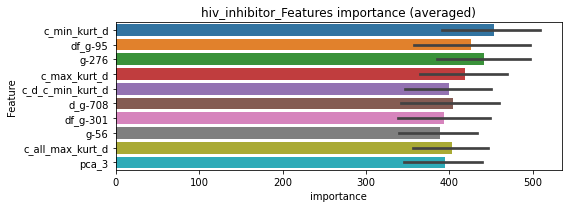

len(train_index) : 2825
len(valid_index) : 942
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.103709	valid_1's binary_logloss: 0.142885
[2000]	training's binary_logloss: 0.0537794	valid_1's binary_logloss: 0.092449
[3000]	training's binary_logloss: 0.0362292	valid_1's binary_logloss: 0.0740852
[4000]	training's binary_logloss: 0.0271517	valid_1's binary_logloss: 0.0640087
[5000]	training's binary_logloss: 0.0217472	valid_1's binary_logloss: 0.0581311
[6000]	training's binary_logloss: 0.018045	valid_1's binary_logloss: 0.0538302
[7000]	training's binary_logloss: 0.0154504	valid_1's binary_logloss: 0.0508658
[8000]	training's binary_logloss: 0.0135498	valid_1's binary_logloss: 0.0485997
Early stopping, best iteration is:
[8524]	training's binary_logloss: 0.0127075	valid_1's binary_logloss: 0.0474532


len(train_index) : 2825
len(valid_index) : 942
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.106571	valid_1's binary_logloss: 0.130747
[2000]	training's binary_logloss: 0.0550989	valid_1's binary_logloss: 0.0759586
[3000]	training's binary_logloss: 0.0370947	valid_1's binary_logloss: 0.0563535
[4000]	training's binary_logloss: 0.0278903	valid_1's binary_logloss: 0.0460883
[5000]	training's binary_logloss: 0.0223235	valid_1's binary_logloss: 0.0399241
[6000]	training's binary_logloss: 0.018484	valid_1's binary_logloss: 0.0354125
[7000]	training's binary_logloss: 0.0158415	valid_1's binary_logloss: 0.032229
[8000]	training's binary_logloss: 0.0138689	valid_1's binary_logloss: 0.0298711
[9000]	training's binary_logloss: 0.0123322	valid_1's binary_logloss: 0.0280259
[10000]	training's binary_logloss: 0.0111017	valid_1's binary_logloss: 0.0264584
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0111017	valid_1's binary_logloss: 0.0264584


len(train_index) : 2825
len(valid_index) : 942
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.105633	valid_1's binary_logloss: 0.141351
[2000]	training's binary_logloss: 0.0546652	valid_1's binary_logloss: 0.0879979
[3000]	training's binary_logloss: 0.0368535	valid_1's binary_logloss: 0.0681566
[4000]	training's binary_logloss: 0.0276575	valid_1's binary_logloss: 0.0576381
[5000]	training's binary_logloss: 0.0220806	valid_1's binary_logloss: 0.0513098
[6000]	training's binary_logloss: 0.0183205	valid_1's binary_logloss: 0.0467334
[7000]	training's binary_logloss: 0.0157014	valid_1's binary_logloss: 0.0433707
[8000]	training's binary_logloss: 0.0137392	valid_1's binary_logloss: 0.0408755
[9000]	training's binary_logloss: 0.0122039	valid_1's binary_logloss: 0.0388875
Early stopping, best iteration is:
[9870]	training's binary_logloss: 0.0111211	valid_1's binary_logloss: 0.0374872


len(train_index) : 2826
len(valid_index) : 941
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.10503	valid_1's binary_logloss: 0.142779
[2000]	training's binary_logloss: 0.0544469	valid_1's binary_logloss: 0.0893782
[3000]	training's binary_logloss: 0.0365555	valid_1's binary_logloss: 0.0701621
[4000]	training's binary_logloss: 0.0273052	valid_1's binary_logloss: 0.0596531
[5000]	training's binary_logloss: 0.0218539	valid_1's binary_logloss: 0.0533618
[6000]	training's binary_logloss: 0.0181052	valid_1's binary_logloss: 0.0490288
[7000]	training's binary_logloss: 0.0154916	valid_1's binary_logloss: 0.0459286
[8000]	training's binary_logloss: 0.0135684	valid_1's binary_logloss: 0.0435627
[9000]	training's binary_logloss: 0.0120821	valid_1's binary_logloss: 0.0416296
Early stopping, best iteration is:
[9671]	training's binary_logloss: 0.0112567	valid_1's binary_logloss: 0.0405258


hiv_inhibitor logloss: 0.03798045187010243
hiv_inhibitor is unpredictable(><)!


mutually exclusive columns: hmgcr_inhibitor


hmgcr_inhibitor, len(trt): 283, len(othr): 7400
target_rate: 0.0118838 → Adj_target_rate: 0.0101910


selected negative label: 7400


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0793357	valid_1's binary_logloss: 0.130821
[2000]	training's binary_logloss: 0.0440171	valid_1's binary_logloss: 0.117025
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0373031	valid_1's binary_logloss: 0.114797
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0800997	valid_1's binary_logloss: 0.124718
[2000]	training's binary_logloss: 0.0443604	valid_1's binary_logloss: 0.113516
Early stopping, best iteration is:
[2195]	training's binary_logloss: 0.0403714	valid_1's binary_logloss: 0.112096
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0766641	valid_1's binary_logloss: 0.145112
Early stopping, best iteration is:
[1731]	training's binary_logloss: 0.0488325	valid_1's binary_logloss: 0.137377
Training until validation scores don't improve for 30 rounds
[1000]	training's b

1 / 3, AUC score:0.970, PR-AUC:0.940
y_Threshold: 0.0628783, Threshold: 0.0928021, pos_neg_ratio: 0.8000000
Remove_noisy_data: 594 → Positive_corect_labels: 1331/8286
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, Expected: 47.3, Threshold: 0.0928021, conf_0:0.06496, conf_1:0.12064
threshold: 0.0928021, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1331.0/8286, y_label_rate: 0.1606324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0505542	valid_1's binary_logloss: 0.0763484
[2000]	training's binary_logloss: 0.0272391	valid_1's binary_logloss: 0.0618298
[3000]	training's binary_logloss: 0.018	valid_1's binary_logloss: 0.0567236
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.0147385	valid_1's binary_logloss: 0.0551669
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.049778	valid_1's binary_logloss: 0.0786025
[2000]	training's binary_logloss: 0.0267961	valid_1's binary_logloss: 0.0651772
[3000]	training's binary_logloss: 0.0177581	valid_1's binary_logloss: 0.0605632
Early stopping, best iteration is:
[3223]	training's binary_logloss: 0.0164354	valid_1's binary_logloss: 0.0599891
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0489353	valid_1's binary_logloss: 0.0865885
[2000]	training's binary_logloss

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0575652, Threshold: 0.0928021, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 1275.0/8174
p_label_rate: 0.0040181 Vs.target_rate: 0.01188
Num_p_label: 16.0, Expected: 47.3, Threshold: 0.0928021, conf_0:0.07424, conf_1:0.11136
threshold: 0.0928021, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 1275.0/8174, y_label_rate: 0.1559824
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0365089	valid_1's binary_logloss: 0.0692697
[2000]	training's binary_logloss: 0.0192925	valid_1's binary_logloss: 0.0575487
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0169134	valid_1's binary_logloss: 0.0560892
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.039556	valid_1's binary_logloss: 0.0549916
[2000]	training's binary_logloss: 0.0208702	valid_1's binary_logloss: 0.0406566
[3000]	training's binary_logloss: 0.0139029	valid_1's binary_logloss: 0.035784
[4000]	training's binary_logloss: 0.010277	valid_1's binary_logloss: 0.0334098
Early stopping, best iteration is:
[4136]	training's binary_logloss: 0.00993022	valid_1's binary_logloss: 0.0330872
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0389465	valid_1's binary_logloss: 0.058176
[2000]	training's binary_loglo

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0475743, Threshold: 0.0928021, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 1245.0/8114
p_label_rate: 0.0027624 Vs.target_rate: 0.01188
Num_p_label: 11.0, Expected: 47.3, Threshold: 0.0928021, conf_0:0.08352, conf_1:0.10208
threshold: 0.0928021, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 1245.0/8114, y_label_rate: 0.1534385


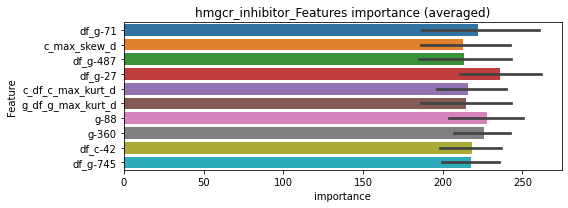

len(train_index) : 6085
len(valid_index) : 2029
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0436816	valid_1's binary_logloss: 0.0602577
[2000]	training's binary_logloss: 0.0233706	valid_1's binary_logloss: 0.0407718
[3000]	training's binary_logloss: 0.0158618	valid_1's binary_logloss: 0.0343551
[4000]	training's binary_logloss: 0.0119616	valid_1's binary_logloss: 0.0313071
[5000]	training's binary_logloss: 0.0095392	valid_1's binary_logloss: 0.0294833
[6000]	training's binary_logloss: 0.00792966	valid_1's binary_logloss: 0.0282023
Early stopping, best iteration is:
[6666]	training's binary_logloss: 0.00712944	valid_1's binary_logloss: 0.0275857


len(train_index) : 6085
len(valid_index) : 2029
================================= fold 2/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0421489	valid_1's binary_logloss: 0.0654112
[2000]	training's binary_logloss: 0.0223578	valid_1's binary_logloss: 0.0461404
[3000]	training's binary_logloss: 0.0151735	valid_1's binary_logloss: 0.0396831
[4000]	training's binary_logloss: 0.0114926	valid_1's binary_logloss: 0.0367028
Early stopping, best iteration is:
[4223]	training's binary_logloss: 0.0108895	valid_1's binary_logloss: 0.0361456


len(train_index) : 6086
len(valid_index) : 2028
================================= fold 3/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0458134	valid_1's binary_logloss: 0.0520174
[2000]	training's binary_logloss: 0.0246925	valid_1's binary_logloss: 0.0314928
[3000]	training's binary_logloss: 0.0168024	valid_1's binary_logloss: 0.0245192
[4000]	training's binary_logloss: 0.0127271	valid_1's binary_logloss: 0.0210282
[5000]	training's binary_logloss: 0.0101411	valid_1's binary_logloss: 0.0186532
[6000]	training's binary_logloss: 0.00843795	valid_1's binary_logloss: 0.0170944
[7000]	training's binary_logloss: 0.0072431	valid_1's binary_logloss: 0.0160388
[8000]	training's binary_logloss: 0.00634319	valid_1's binary_logloss: 0.0151515
[9000]	training's binary_logloss: 0.00563272	valid_1's binary_logloss: 0.0144144
[10000]	training's binary_logloss: 0.00507052	valid_1's binary_logloss: 0.0138725
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00507052	valid_1's binary_logloss: 0.0138725


len(train_index) : 6086
len(valid_index) : 2028
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0431415	valid_1's binary_logloss: 0.0619561
[2000]	training's binary_logloss: 0.0227946	valid_1's binary_logloss: 0.0438883
[3000]	training's binary_logloss: 0.015344	valid_1's binary_logloss: 0.0380174
[4000]	training's binary_logloss: 0.0116086	valid_1's binary_logloss: 0.0351836
Early stopping, best iteration is:
[4387]	training's binary_logloss: 0.0105986	valid_1's binary_logloss: 0.0346332


hmgcr_inhibitor logloss: 0.028060175926849385
hmgcr_inhibitor is unpredictable(><)!
hsp_inhibitor, len(trt): 93, len(othr): 3273
target_rate: 0.0039053 → Adj_target_rate: 0.0039574


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.103649	valid_1's binary_logloss: 0.167585
[2000]	training's binary_logloss: 0.0555635	valid_1's binary_logloss: 0.1203
[3000]	training's binary_logloss: 0.0373263	valid_1's binary_logloss: 0.102653
Early stopping, best iteration is:
[3266]	training's binary_logloss: 0.0342648	valid_1's binary_logloss: 0.0995033
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.105219	valid_1's binary_logloss: 0.158658
[2000]	training's binary_logloss: 0.0566692	valid_1's binary_logloss: 0.108493
[3000]	training's binary_logloss: 0.038059	valid_1's binary_logloss: 0.0885909
[4000]	training's binary_logloss: 0.0284515	valid_1's binary_logloss: 0.0779495
[5000]	training's binary_logloss: 0.0225862	valid_1's binary_logloss: 0.0711012
[6000]	training's binary_logloss: 0.0188082	valid_1's binary_logloss: 0.0666876
Early stopping, best iteration is:
[6402]	training's 

1 / 3, AUC score:0.995, PR-AUC:0.986
y_Threshold: 0.0873269, Threshold: 0.2610082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 635/3757
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, Expected: 15.6, Threshold: 0.2610082, conf_0:0.18271, conf_1:0.33931
Num_p_label: 32.0, Expected: 15.6, Adj_threshold_1: 0.2910082
Num_p_label: 24.0, Expected: 15.6, Adj_threshold_2: 0.3210082
Num_p_label: 18.0, Expected: 15.6, Adj_threshold_3: 0.3510082
threshold: 0.3510082, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 635.0/3757, y_label_rate: 0.1690178
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0963255	valid_1's binary_logloss: 0.14541
[2000]	training's binary_logloss: 0.0496247	valid_1's binary_logloss: 0.0971626
[3000]	training's binary_logloss: 0.0329521	valid_1's binary_logloss: 0.0788315
[4000]	training's binary_logloss: 0.0246642	valid_1's binary_logloss: 0.0685783
[5000]	training's binary_logloss: 0.0195713	valid_1's binary_logloss: 0.0621524
[6000]	training's binary_logloss: 0.0163163	valid_1's binary_logloss: 0.0578695
Early stopping, best iteration is:
[6211]	training's binary_logloss: 0.0157574	valid_1's binary_logloss: 0.0571555
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0967447	valid_1's binary_logloss: 0.141584
[2000]	training's binary_logloss: 0.0497681	valid_1's binary_logloss: 0.0895242
[3000]	training's binary_logloss: 0.0330012	valid_1's binary_logloss: 0.0691538
[4000]	training's binary_logloss: 0.0246569	va

2 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.1636988, Threshold: 0.3510082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 622.0/3731
p_label_rate: 0.0238574 Vs.target_rate: 0.00391
Num_p_label: 95.0, Expected: 15.6, Threshold: 0.3510082, conf_0:0.28081, conf_1:0.42121
Num_p_label: 88.0, Expected: 15.6, Adj_threshold_1: 0.3810082
Num_p_label: 75.0, Expected: 15.6, Adj_threshold_2: 0.4110082
Num_p_label: 61.0, Expected: 15.6, Adj_threshold_3: 0.4410082
Num_p_label: 52.0, Expected: 15.6, Adj_threshold_4: 0.4710082
Num_p_label: 47.0, Expected: 15.6, Adj_threshold_5: 0.5010082
Num_p_label: 39.0, Expected: 15.6, Adj_threshold_6: 0.5310082
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_7: 0.5610082
Num_p_label: 19.0, Expected: 15.6, Adj_threshold_8: 0.5910082
threshold: 0.5910082, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 622.0/3731, y_label_rate: 0.1667113
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0942463	valid_1's binary_logloss: 0.130978
[2000]	training's binary_logloss: 0.0480046	valid_1's binary_logloss: 0.0834175
[3000]	training's binary_logloss: 0.0316855	valid_1's binary_logloss: 0.0653332
[4000]	training's binary_logloss: 0.0236279	valid_1's binary_logloss: 0.0556383
[5000]	training's binary_logloss: 0.0187356	valid_1's binary_logloss: 0.0496841
[6000]	training's binary_logloss: 0.0155795	valid_1's binary_logloss: 0.0454279
[7000]	training's binary_logloss: 0.0133561	valid_1's binary_logloss: 0.0426929
[8000]	training's binary_logloss: 0.0116798	valid_1's binary_logloss: 0.0402447
[9000]	training's binary_logloss: 0.0103882	valid_1's binary_logloss: 0.0383992
Early stopping, best iteration is:
[9208]	training's binary_logloss: 0.0101516	valid_1's binary_logloss: 0.0380248
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0917053	

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.1466198, Threshold: 0.5910082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 611.0/3709
p_label_rate: 0.0133099 Vs.target_rate: 0.00391
Num_p_label: 53.0, Expected: 15.6, Threshold: 0.5910082, conf_0:0.53191, conf_1:0.65011
Num_p_label: 43.0, Expected: 15.6, Adj_threshold_1: 0.6210082
Num_p_label: 34.0, Expected: 15.6, Adj_threshold_2: 0.6510082
Num_p_label: 31.0, Expected: 15.6, Adj_threshold_3: 0.6810082
Num_p_label: 20.0, Expected: 15.6, Adj_threshold_4: 0.7110082
threshold: 0.7110082, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 611.0/3709, y_label_rate: 0.1647344


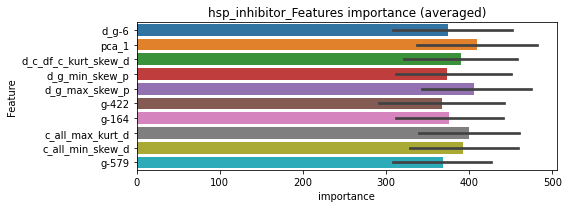

len(train_index) : 2781
len(valid_index) : 928
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.120179	valid_1's binary_logloss: 0.166812
[2000]	training's binary_logloss: 0.0655682	valid_1's binary_logloss: 0.11115
[3000]	training's binary_logloss: 0.0443584	valid_1's binary_logloss: 0.0888805
[4000]	training's binary_logloss: 0.0333292	valid_1's binary_logloss: 0.0757658
[5000]	training's binary_logloss: 0.0266706	valid_1's binary_logloss: 0.0675989
[6000]	training's binary_logloss: 0.0221025	valid_1's binary_logloss: 0.0617528
[7000]	training's binary_logloss: 0.018918	valid_1's binary_logloss: 0.0580002
[8000]	training's binary_logloss: 0.016505	valid_1's binary_logloss: 0.0546233
[9000]	training's binary_logloss: 0.0146929	valid_1's binary_logloss: 0.0523952
[10000]	training's binary_logloss: 0.0132263	valid_1's binary_logloss: 0.0503227
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0132263	valid_1's binary_logloss: 0.0503227


len(train_index) : 2782
len(valid_index) : 927
================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.117808	valid_1's binary_logloss: 0.165256
[2000]	training's binary_logloss: 0.0645048	valid_1's binary_logloss: 0.110151
[3000]	training's binary_logloss: 0.0437628	valid_1's binary_logloss: 0.0858235
[4000]	training's binary_logloss: 0.0327253	valid_1's binary_logloss: 0.0723915
[5000]	training's binary_logloss: 0.0262039	valid_1's binary_logloss: 0.0642268
[6000]	training's binary_logloss: 0.0217046	valid_1's binary_logloss: 0.0580992
[7000]	training's binary_logloss: 0.0186172	valid_1's binary_logloss: 0.0539238
[8000]	training's binary_logloss: 0.0162337	valid_1's binary_logloss: 0.050384
[9000]	training's binary_logloss: 0.014447	valid_1's binary_logloss: 0.0479036
Early stopping, best iteration is:
[9304]	training's binary_logloss: 0.0139563	valid_1's binary_logloss: 0.0471368


len(train_index) : 2782
len(valid_index) : 927
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.119202	valid_1's binary_logloss: 0.167187
[2000]	training's binary_logloss: 0.0655668	valid_1's binary_logloss: 0.112051
[3000]	training's binary_logloss: 0.0444855	valid_1's binary_logloss: 0.0884087
[4000]	training's binary_logloss: 0.0333768	valid_1's binary_logloss: 0.0749425
[5000]	training's binary_logloss: 0.0266946	valid_1's binary_logloss: 0.0663391
[6000]	training's binary_logloss: 0.0220986	valid_1's binary_logloss: 0.060242
[7000]	training's binary_logloss: 0.018895	valid_1's binary_logloss: 0.0560207
[8000]	training's binary_logloss: 0.0164874	valid_1's binary_logloss: 0.0524886
Early stopping, best iteration is:
[8920]	training's binary_logloss: 0.0148128	valid_1's binary_logloss: 0.0500177


len(train_index) : 2782
len(valid_index) : 927
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.11924	valid_1's binary_logloss: 0.161594
[2000]	training's binary_logloss: 0.0650822	valid_1's binary_logloss: 0.109632
[3000]	training's binary_logloss: 0.0440456	valid_1's binary_logloss: 0.0873704
[4000]	training's binary_logloss: 0.033075	valid_1's binary_logloss: 0.0746471
[5000]	training's binary_logloss: 0.0264383	valid_1's binary_logloss: 0.0668334
[6000]	training's binary_logloss: 0.0218758	valid_1's binary_logloss: 0.0609507
[7000]	training's binary_logloss: 0.0187307	valid_1's binary_logloss: 0.0567742
[8000]	training's binary_logloss: 0.0163409	valid_1's binary_logloss: 0.0534019
[9000]	training's binary_logloss: 0.0145569	valid_1's binary_logloss: 0.0508535
[10000]	training's binary_logloss: 0.013115	valid_1's binary_logloss: 0.0487713
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.013115	valid_1's binary_logloss: 0.0487713


hsp_inhibitor logloss: 0.049062438515109455
hsp_inhibitor is unpredictable(><)!
igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000461464	valid_1's binary_logloss: 0.022259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000443908	valid_1's binary_logloss: 0.00797923
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000462339	valid_1's binary_logloss: 0.00192685
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.0004724	valid_1's binary_logloss: 0.0131745


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030040, Threshold: 0.0204141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0204141, conf_0:0.01429, conf_1:0.02654
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0504141
threshold: 0.0504141, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000454279	valid_1's binary_logloss: 0.0200194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000460455	valid_1's binary_logloss: 0.00723977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000444238	valid_1's binary_logloss: 0.00171765
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000458993	valid_1's binary_logloss: 0.0122354


y_Threshold: 0.0291609, Threshold: 0.0504141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0145655 Vs.target_rate: 0.00155
Num_p_label: 58.0, Expected: 6.2, Threshold: 0.0504141, conf_0:0.04033, conf_1:0.06050
Num_p_label: 42.0, Expected: 6.2, Adj_threshold_1: 0.0804141
Num_p_label: 26.0, Expected: 6.2, Adj_threshold_2: 0.1104141
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_3: 0.1404141
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_4: 0.1704141
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_5: 0.2004141
threshold: 0.2004141, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000499746	valid_1's binary_logloss: 0.00745819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000435578	valid_1's binary_logloss: 0.00777534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000456223	valid_1's binary_logloss: 0.0113402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000436998	valid_1's binary_logloss: 0.0112084


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381314, Threshold: 0.2004141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0037670 Vs.target_rate: 0.00155
Num_p_label: 15.0, Expected: 6.2, Threshold: 0.2004141, conf_0:0.18037, conf_1:0.22046
threshold: 0.2004141, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


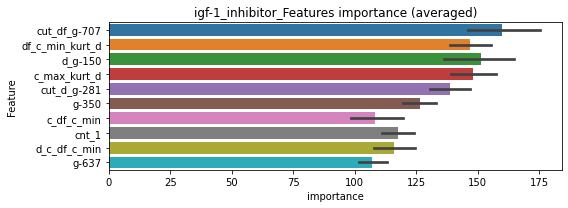

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000473992	valid_1's binary_logloss: 0.00778153


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000463244	valid_1's binary_logloss: 0.00547558


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000484754	valid_1's binary_logloss: 0.0106639


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000513901	valid_1's binary_logloss: 0.0108399


igf-1_inhibitor logloss: 0.008691635123920556
ikk_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000356808	valid_1's binary_logloss: 0.00853836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000364624	valid_1's binary_logloss: 0.00178726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000357049	valid_1's binary_logloss: 0.000996381
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00036891	valid_1's binary_logloss: 0.00152641


y_Threshold: 0.0028853, Threshold: 0.0127299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0127299, conf_0:0.00891, conf_1:0.01655
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0427299
threshold: 0.0427299, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000371111	valid_1's binary_logloss: 0.00787894
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000343539	valid_1's binary_logloss: 0.00139244
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00034955	valid_1's binary_logloss: 0.00093368
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0286056, Threshold: 0.0427299, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000346936	valid_1's binary_logloss: 0.00116194


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0087896 Vs.target_rate: 0.00126
Num_p_label: 35.0, Expected: 5.0, Threshold: 0.0427299, conf_0:0.03418, conf_1:0.05128
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_1: 0.0727299
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_2: 0.1027299
threshold: 0.1027299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000371111	valid_1's binary_logloss: 0.00787894
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000343539	valid_1's binary_logloss: 0.00139244
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00034955	valid_1's binary_logloss: 0.00093368
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0286056, Threshold: 0.1027299, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000346936	valid_1's binary_logloss: 0.00116194


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.1027299, conf_0:0.09246, conf_1:0.11300
threshold: 0.1027299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


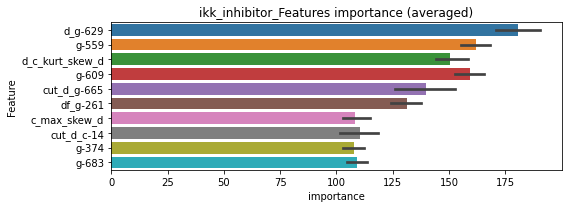

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000376147	valid_1's binary_logloss: 0.00700553


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000347923	valid_1's binary_logloss: 0.00139046
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000346887	valid_1's binary_logloss: 0.00138725


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000352297	valid_1's binary_logloss: 0.000907076


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000352782	valid_1's binary_logloss: 0.00118517


ikk_inhibitor logloss: 0.002621365771451567
imidazoline_receptor_agonist, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000371479	valid_1's binary_logloss: 0.00385573
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000352784	valid_1's binary_logloss: 0.00743804
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000368427	valid_1's binary_logloss: 0.00126785
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024106, Threshold: 0.0107866, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000378856	valid_1's binary_logloss: 0.00331557


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0107866, conf_0:0.00755, conf_1:0.01402
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_1: 0.0407866
threshold: 0.0407866, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000357832	valid_1's binary_logloss: 0.00339234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000351601	valid_1's binary_logloss: 0.00854784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000356105	valid_1's binary_logloss: 0.000884964
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398864, Threshold: 0.0407866, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000365077	valid_1's binary_logloss: 0.00246141


p_label_rate: 0.0082873 Vs.target_rate: 0.00130
Num_p_label: 33.0, Expected: 5.2, Threshold: 0.0407866, conf_0:0.03263, conf_1:0.04894
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0707866
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_2: 0.1007866
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_3: 0.1307866
threshold: 0.1307866, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000357832	valid_1's binary_logloss: 0.00339234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000351601	valid_1's binary_logloss: 0.00854784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000356105	valid_1's binary_logloss: 0.000884964
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398864, Threshold: 0.1307866, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000365077	valid_1's binary_logloss: 0.00246141


p_label_rate: 0.0025113 Vs.target_rate: 0.00130
Num_p_label: 10.0, Expected: 5.2, Threshold: 0.1307866, conf_0:0.11771, conf_1:0.14387
threshold: 0.1307866, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


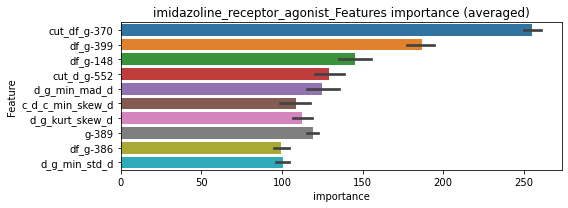

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000363451	valid_1's binary_logloss: 0.00261703


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000361536	valid_1's binary_logloss: 0.00956244


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000359407	valid_1's binary_logloss: 0.0010195


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000360354	valid_1's binary_logloss: 0.00182164


imidazoline_receptor_agonist logloss: 0.0037552057287787025
immunosuppressant, len(trt): 73, len(othr): 3274
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3274


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0825622	valid_1's binary_logloss: 0.127179
[2000]	training's binary_logloss: 0.044029	valid_1's binary_logloss: 0.0901488
[3000]	training's binary_logloss: 0.0296976	valid_1's binary_logloss: 0.0761721
[4000]	training's binary_logloss: 0.0222316	valid_1's binary_logloss: 0.0684424
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.0213568	valid_1's binary_logloss: 0.0675276
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0835259	valid_1's binary_logloss: 0.122548
[2000]	training's binary_logloss: 0.0446044	valid_1's binary_logloss: 0.0856912
[3000]	training's binary_logloss: 0.0298131	valid_1's binary_logloss: 0.0712489
[4000]	training's binary_logloss: 0.0223586	valid_1's binary_logloss: 0.0638505
[5000]	training's binary_logloss: 0.0178286	valid_1's binary_logloss: 0.0592552
Early stopping, best iteration is:
[5385]	trai

1 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0568128, Threshold: 0.1154666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 643/3774
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.1154666, conf_0:0.08083, conf_1:0.15011
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_1: 0.1454666
Num_p_label: 11.0, Expected: 12.2, Adj_threshold_2: 0.1754666
threshold: 0.1754666, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 643.0/3774, y_label_rate: 0.1703763
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0760857	valid_1's binary_logloss: 0.123952
[2000]	training's binary_logloss: 0.0398432	valid_1's binary_logloss: 0.0849341
[3000]	training's binary_logloss: 0.0267204	valid_1's binary_logloss: 0.0697228
[4000]	training's binary_logloss: 0.019874	valid_1's binary_logloss: 0.0617259
[5000]	training's binary_logloss: 0.0158511	valid_1's binary_logloss: 0.0568522
[6000]	training's binary_logloss: 0.0131863	valid_1's binary_logloss: 0.0535338
Early stopping, best iteration is:
[6343]	training's binary_logloss: 0.0124483	valid_1's binary_logloss: 0.0525183
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0775324	valid_1's binary_logloss: 0.116981
[2000]	training's binary_logloss: 0.0400715	valid_1's binary_logloss: 0.0786099
[3000]	training's binary_logloss: 0.0267907	valid_1's binary_logloss: 0.0647412
[4000]	training's binary_logloss: 0.0199596	va

2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0897169, Threshold: 0.1754666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 640.0/3768
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, Expected: 12.2, Threshold: 0.1754666, conf_0:0.14037, conf_1:0.21056
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_1: 0.2054666
threshold: 0.2054666, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 640.0/3768, y_label_rate: 0.1698514
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0762133	valid_1's binary_logloss: 0.115563
[2000]	training's binary_logloss: 0.0393719	valid_1's binary_logloss: 0.0792353
[3000]	training's binary_logloss: 0.0263083	valid_1's binary_logloss: 0.0663399
[4000]	training's binary_logloss: 0.019659	valid_1's binary_logloss: 0.0595668
Early stopping, best iteration is:
[4563]	training's binary_logloss: 0.017194	valid_1's binary_logloss: 0.0571046
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0767588	valid_1's binary_logloss: 0.11817
[2000]	training's binary_logloss: 0.0394978	valid_1's binary_logloss: 0.0797774
[3000]	training's binary_logloss: 0.0262433	valid_1's binary_logloss: 0.0651607
[4000]	training's binary_logloss: 0.019642	valid_1's binary_logloss: 0.057458
[5000]	training's binary_logloss: 0.0156327	valid_1's binary_logloss: 0.0527748
[6000]	training's binary_logloss: 0.0130059	valid_

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0769258, Threshold: 0.2054666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 633.0/3754
p_label_rate: 0.0040181 Vs.target_rate: 0.00307
Num_p_label: 16.0, Expected: 12.2, Threshold: 0.2054666, conf_0:0.18492, conf_1:0.22601
threshold: 0.2054666, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 633.0/3754, y_label_rate: 0.1686201


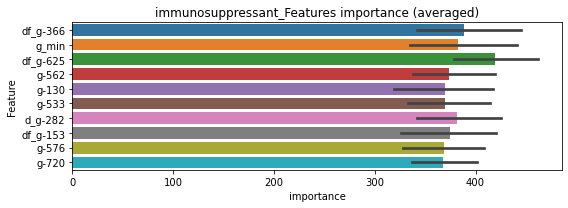

len(train_index) : 2815
len(valid_index) : 939
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.105587	valid_1's binary_logloss: 0.146252
[2000]	training's binary_logloss: 0.0567733	valid_1's binary_logloss: 0.09376
[3000]	training's binary_logloss: 0.0380267	valid_1's binary_logloss: 0.0716125
[4000]	training's binary_logloss: 0.0285236	valid_1's binary_logloss: 0.0602106
[5000]	training's binary_logloss: 0.0228535	valid_1's binary_logloss: 0.0535248
[6000]	training's binary_logloss: 0.0189965	valid_1's binary_logloss: 0.0487659
[7000]	training's binary_logloss: 0.0162792	valid_1's binary_logloss: 0.0455884
[8000]	training's binary_logloss: 0.0141986	valid_1's binary_logloss: 0.0428301
[9000]	training's binary_logloss: 0.0126047	valid_1's binary_logloss: 0.0407975
Early stopping, best iteration is:
[9308]	training's binary_logloss: 0.0121674	valid_1's binary_logloss: 0.04025


len(train_index) : 2815
len(valid_index) : 939
================================= fold 2/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.10529	valid_1's binary_logloss: 0.138925
[2000]	training's binary_logloss: 0.0568057	valid_1's binary_logloss: 0.0896922
[3000]	training's binary_logloss: 0.037555	valid_1's binary_logloss: 0.0690874
[4000]	training's binary_logloss: 0.0280648	valid_1's binary_logloss: 0.0586728
[5000]	training's binary_logloss: 0.0224624	valid_1's binary_logloss: 0.0525452
[6000]	training's binary_logloss: 0.018726	valid_1's binary_logloss: 0.0481441
[7000]	training's binary_logloss: 0.0160178	valid_1's binary_logloss: 0.0450149
[8000]	training's binary_logloss: 0.0139801	valid_1's binary_logloss: 0.0423894
[9000]	training's binary_logloss: 0.0124356	valid_1's binary_logloss: 0.0403494
Early stopping, best iteration is:
[9036]	training's binary_logloss: 0.0123827	valid_1's binary_logloss: 0.0402578


len(train_index) : 2816
len(valid_index) : 938
================================= fold 3/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.10518	valid_1's binary_logloss: 0.142269
[2000]	training's binary_logloss: 0.0566905	valid_1's binary_logloss: 0.0931201
[3000]	training's binary_logloss: 0.0376735	valid_1's binary_logloss: 0.0727035
[4000]	training's binary_logloss: 0.0282036	valid_1's binary_logloss: 0.0621337
[5000]	training's binary_logloss: 0.0225817	valid_1's binary_logloss: 0.0553301
[6000]	training's binary_logloss: 0.0188177	valid_1's binary_logloss: 0.0508606
[7000]	training's binary_logloss: 0.0161463	valid_1's binary_logloss: 0.0478931
[8000]	training's binary_logloss: 0.0141082	valid_1's binary_logloss: 0.0452252
[9000]	training's binary_logloss: 0.0125496	valid_1's binary_logloss: 0.0432237
Early stopping, best iteration is:
[9300]	training's binary_logloss: 0.0121331	valid_1's binary_logloss: 0.042636


len(train_index) : 2816
len(valid_index) : 938
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.106619	valid_1's binary_logloss: 0.137717
[2000]	training's binary_logloss: 0.0573322	valid_1's binary_logloss: 0.0888481
[3000]	training's binary_logloss: 0.0382441	valid_1's binary_logloss: 0.0680123
[4000]	training's binary_logloss: 0.0287227	valid_1's binary_logloss: 0.0579985
[5000]	training's binary_logloss: 0.0230132	valid_1's binary_logloss: 0.0519952
[6000]	training's binary_logloss: 0.0191329	valid_1's binary_logloss: 0.0478792
[7000]	training's binary_logloss: 0.0163836	valid_1's binary_logloss: 0.045078
[8000]	training's binary_logloss: 0.014311	valid_1's binary_logloss: 0.0426222
[9000]	training's binary_logloss: 0.0127384	valid_1's binary_logloss: 0.0408825
Early stopping, best iteration is:
[9299]	training's binary_logloss: 0.0123163	valid_1's binary_logloss: 0.040383


immunosuppressant logloss: 0.040881339006336836
immunosuppressant is unpredictable(><)!
insulin_secretagogue, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000479429	valid_1's binary_logloss: 0.00954221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000413927	valid_1's binary_logloss: 0.00428657
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000418688	valid_1's binary_logloss: 0.00139069
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025381, Threshold: 0.0105076, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000404523	valid_1's binary_logloss: 0.00630081


Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0105076, conf_0:0.00736, conf_1:0.01366
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0405076
threshold: 0.0405076, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000420126	valid_1's binary_logloss: 0.00980984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000432715	valid_1's binary_logloss: 0.003686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000401416	valid_1's binary_logloss: 0.00103849
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381122, Threshold: 0.0405076, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00041442	valid_1's binary_logloss: 0.00629626


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0070316 Vs.target_rate: 0.00126
Num_p_label: 28.0, Expected: 5.0, Threshold: 0.0405076, conf_0:0.03241, conf_1:0.04861
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_1: 0.0705076
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_2: 0.1005076
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_3: 0.1305076
threshold: 0.1305076, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000420126	valid_1's binary_logloss: 0.00980984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000432715	valid_1's binary_logloss: 0.003686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000401416	valid_1's binary_logloss: 0.00103849
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381122, Threshold: 0.1305076, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00041442	valid_1's binary_logloss: 0.00629626


p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, Expected: 5.0, Threshold: 0.1305076, conf_0:0.11746, conf_1:0.14356
threshold: 0.1305076, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


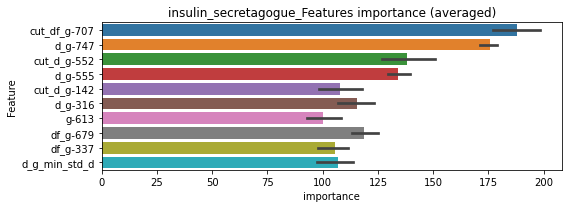

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 insulin_secretagogue=================================


Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000466652	valid_1's binary_logloss: 0.00789134
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000414485	valid_1's binary_logloss: 0.00353216


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000425263	valid_1's binary_logloss: 0.0010307


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds


insulin_secretagogue logloss: 0.004469100249643898


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.0004775	valid_1's binary_logloss: 0.00541843


insulin_sensitizer, len(trt): 51, len(othr): 3279
target_rate: 0.0021416 → Adj_target_rate: 0.0023748


selected negative label: 3279


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000494077	valid_1's binary_logloss: 0.0120158
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00049087	valid_1's binary_logloss: 0.00510336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000524045	valid_1's binary_logloss: 0.0166681
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000600014	valid_1's binary_logloss: 0.0268047


y_Threshold: 0.0038190, Threshold: 0.0091664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, Expected: 8.5, Threshold: 0.0091664, conf_0:0.00642, conf_1:0.01192
Num_p_label: 1.0, Expected: 8.5, Adj_threshold_1: 0.0391664
threshold: 0.0391664, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000529765	valid_1's binary_logloss: 0.0129686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.00048324	valid_1's binary_logloss: 0.0049315
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000506197	valid_1's binary_logloss: 0.0146937
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0217402, Threshold: 0.0391664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0030136 Vs.target_rate: 0.00214
Num_p_label: 12.0, Expected: 8.5, Threshold: 0.0391664, conf_0:0.03133, conf_1:0.04700


Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000872561	valid_1's binary_logloss: 0.0261283


threshold: 0.0391664, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000478184	valid_1's binary_logloss: 0.0102039
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000487196	valid_1's binary_logloss: 0.0114558
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000504616	valid_1's binary_logloss: 0.0138751
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000536933	valid_1's binary_logloss: 0.0073301


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0298497, Threshold: 0.0391664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0035158 Vs.target_rate: 0.00214
Num_p_label: 14.0, Expected: 8.5, Threshold: 0.0391664, conf_0:0.03525, conf_1:0.04308
threshold: 0.0391664, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


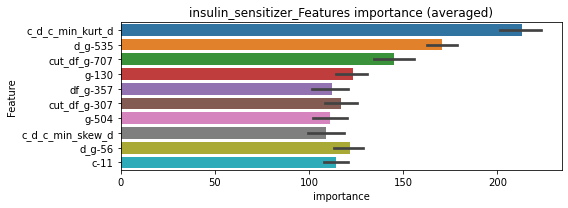

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00055515	valid_1's binary_logloss: 0.0111912


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000516446	valid_1's binary_logloss: 0.0120363


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000554067	valid_1's binary_logloss: 0.0154178


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.00048992	valid_1's binary_logloss: 0.00827415


insulin_sensitizer logloss: 0.011731076002542425
integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000495583	valid_1's binary_logloss: 0.0106609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000448253	valid_1's binary_logloss: 0.00641679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000463825	valid_1's binary_logloss: 0.0038384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000451215	valid_1's binary_logloss: 0.00760444


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044229, Threshold: 0.0148987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0148987, conf_0:0.01043, conf_1:0.01937
Num_p_label: 6.0, Expected: 7.0, Adj_threshold_1: 0.0448987
threshold: 0.0448987, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000456261	valid_1's binary_logloss: 0.0108265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000441259	valid_1's binary_logloss: 0.00467586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000450989	valid_1's binary_logloss: 0.00274643
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252438, Threshold: 0.0448987, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000508539	valid_1's binary_logloss: 0.00770409


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0075339 Vs.target_rate: 0.00176
Num_p_label: 30.0, Expected: 7.0, Threshold: 0.0448987, conf_0:0.03592, conf_1:0.05388
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_1: 0.0748987
threshold: 0.0748987, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000456261	valid_1's binary_logloss: 0.0108265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000441259	valid_1's binary_logloss: 0.00467586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000450989	valid_1's binary_logloss: 0.00274643
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000508539	valid_1's binary_logloss: 0.00770409


y_Threshold: 0.0252438, Threshold: 0.0748987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0030136 Vs.target_rate: 0.00176
Num_p_label: 12.0, Expected: 7.0, Threshold: 0.0748987, conf_0:0.06741, conf_1:0.08239
threshold: 0.0748987, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


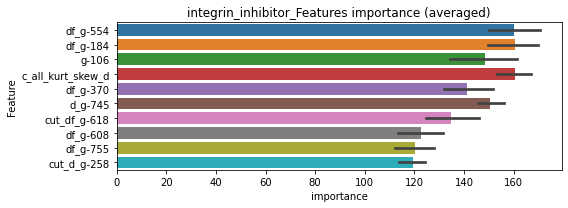

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00050383	valid_1's binary_logloss: 0.00905334


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000450453	valid_1's binary_logloss: 0.00505007


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000455696	valid_1's binary_logloss: 0.00310913


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000443664	valid_1's binary_logloss: 0.00719472


integrin_inhibitor logloss: 0.006102590634322107
jak_inhibitor, len(trt): 92, len(othr): 3277
target_rate: 0.0038633 → Adj_target_rate: 0.0039212


selected negative label: 3277


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0960588	valid_1's binary_logloss: 0.163764
[2000]	training's binary_logloss: 0.0520305	valid_1's binary_logloss: 0.123247
[3000]	training's binary_logloss: 0.0348602	valid_1's binary_logloss: 0.107568
[4000]	training's binary_logloss: 0.025939	valid_1's binary_logloss: 0.0996924
[5000]	training's binary_logloss: 0.0207212	valid_1's binary_logloss: 0.0950193
Early stopping, best iteration is:
[5318]	training's binary_logloss: 0.0193944	valid_1's binary_logloss: 0.0936476
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0979005	valid_1's binary_logloss: 0.153734
[2000]	training's binary_logloss: 0.0531908	valid_1's binary_logloss: 0.111812
[3000]	training's binary_logloss: 0.035581	valid_1's binary_logloss: 0.095877
[4000]	training's binary_logloss: 0.0266099	valid_1's binary_logloss: 0.0878935
Early stopping, best iteration is:
[4680]	training'

1 / 3, AUC score:0.993, PR-AUC:0.985
y_Threshold: 0.0664598, Threshold: 0.1943139, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 638/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, Expected: 15.4, Threshold: 0.1943139, conf_0:0.13602, conf_1:0.25261
Num_p_label: 30.0, Expected: 15.4, Adj_threshold_1: 0.2243139
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_2: 0.2543139
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_3: 0.2843139
threshold: 0.2843139, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 638.0/3766, y_label_rate: 0.1694105
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0904251	valid_1's binary_logloss: 0.13496
[2000]	training's binary_logloss: 0.0473184	valid_1's binary_logloss: 0.0909348
[3000]	training's binary_logloss: 0.0313459	valid_1's binary_logloss: 0.0739562
[4000]	training's binary_logloss: 0.023289	valid_1's binary_logloss: 0.0653182
[5000]	training's binary_logloss: 0.0186608	valid_1's binary_logloss: 0.059927
[6000]	training's binary_logloss: 0.0154554	valid_1's binary_logloss: 0.0559304
Early stopping, best iteration is:
[6593]	training's binary_logloss: 0.0140198	valid_1's binary_logloss: 0.0542797
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0916317	valid_1's binary_logloss: 0.138984
[2000]	training's binary_logloss: 0.0484634	valid_1's binary_logloss: 0.0934236
[3000]	training's binary_logloss: 0.0324063	valid_1's binary_logloss: 0.0752368
Early stopping, best iteration is:
[3954]	traini

2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0974784, Threshold: 0.2843139, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 625.0/3740
p_label_rate: 0.0120542 Vs.target_rate: 0.00386
Num_p_label: 48.0, Expected: 15.4, Threshold: 0.2843139, conf_0:0.22745, conf_1:0.34118
Num_p_label: 40.0, Expected: 15.4, Adj_threshold_1: 0.3143139
Num_p_label: 36.0, Expected: 15.4, Adj_threshold_2: 0.3443139
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_3: 0.3743139
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_4: 0.4043139
Num_p_label: 23.0, Expected: 15.4, Adj_threshold_5: 0.4343139
threshold: 0.4343139, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 625.0/3740, y_label_rate: 0.1671123
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0863132	valid_1's binary_logloss: 0.140974
[2000]	training's binary_logloss: 0.0449087	valid_1's binary_logloss: 0.0987525
[3000]	training's binary_logloss: 0.029594	valid_1's binary_logloss: 0.0810977
[4000]	training's binary_logloss: 0.0219759	valid_1's binary_logloss: 0.0723907
Early stopping, best iteration is:
[3974]	training's binary_logloss: 0.022108	valid_1's binary_logloss: 0.0723279
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0872199	valid_1's binary_logloss: 0.13095
[2000]	training's binary_logloss: 0.0456437	valid_1's binary_logloss: 0.0871519
[3000]	training's binary_logloss: 0.0301217	valid_1's binary_logloss: 0.0695551
[4000]	training's binary_logloss: 0.0223351	valid_1's binary_logloss: 0.060441
[5000]	training's binary_logloss: 0.017881	valid_1's binary_logloss: 0.0548265
[6000]	training's binary_logloss: 0.0148306	valid_

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.1003264, Threshold: 0.4343139, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 619.0/3728
p_label_rate: 0.0072828 Vs.target_rate: 0.00386
Num_p_label: 29.0, Expected: 15.4, Threshold: 0.4343139, conf_0:0.39088, conf_1:0.47775
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_1: 0.4643139
Num_p_label: 20.0, Expected: 15.4, Adj_threshold_2: 0.4943139
threshold: 0.4943139, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 619.0/3728, y_label_rate: 0.1660408


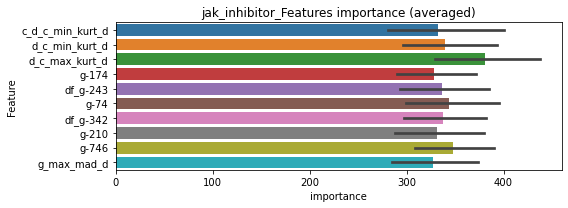

len(train_index) : 2796
len(valid_index) : 932
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.115815	valid_1's binary_logloss: 0.159608
[2000]	training's binary_logloss: 0.0624592	valid_1's binary_logloss: 0.104902
[3000]	training's binary_logloss: 0.0421067	valid_1's binary_logloss: 0.0825774
[4000]	training's binary_logloss: 0.031699	valid_1's binary_logloss: 0.0706209
[5000]	training's binary_logloss: 0.0254111	valid_1's binary_logloss: 0.0630453
[6000]	training's binary_logloss: 0.0211278	valid_1's binary_logloss: 0.057695
[7000]	training's binary_logloss: 0.0180704	valid_1's binary_logloss: 0.0537956
[8000]	training's binary_logloss: 0.0157726	valid_1's binary_logloss: 0.0507471
Early stopping, best iteration is:
[8485]	training's binary_logloss: 0.0149093	valid_1's binary_logloss: 0.0497135


len(train_index) : 2796
len(valid_index) : 932
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.118969	valid_1's binary_logloss: 0.148074
[2000]	training's binary_logloss: 0.0638579	valid_1's binary_logloss: 0.0926575
[3000]	training's binary_logloss: 0.043512	valid_1's binary_logloss: 0.0711441
[4000]	training's binary_logloss: 0.0326152	valid_1's binary_logloss: 0.0593411
[5000]	training's binary_logloss: 0.0261314	valid_1's binary_logloss: 0.0520521
[6000]	training's binary_logloss: 0.0217585	valid_1's binary_logloss: 0.0472826
[7000]	training's binary_logloss: 0.0186883	valid_1's binary_logloss: 0.0437505
[8000]	training's binary_logloss: 0.0163201	valid_1's binary_logloss: 0.04086
[9000]	training's binary_logloss: 0.0145489	valid_1's binary_logloss: 0.0387552
[10000]	training's binary_logloss: 0.0131021	valid_1's binary_logloss: 0.0370805
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0131021	valid_1's binary_logloss: 0.0370805


len(train_index) : 2796
len(valid_index) : 932
================================= fold 3/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.115588	valid_1's binary_logloss: 0.161354
[2000]	training's binary_logloss: 0.0619802	valid_1's binary_logloss: 0.10868
[3000]	training's binary_logloss: 0.0420706	valid_1's binary_logloss: 0.0867749
[4000]	training's binary_logloss: 0.0315295	valid_1's binary_logloss: 0.0747289
[5000]	training's binary_logloss: 0.0251929	valid_1's binary_logloss: 0.067367
[6000]	training's binary_logloss: 0.0209583	valid_1's binary_logloss: 0.0622297
[7000]	training's binary_logloss: 0.0179151	valid_1's binary_logloss: 0.0584634
[8000]	training's binary_logloss: 0.0156476	valid_1's binary_logloss: 0.0554813
[9000]	training's binary_logloss: 0.0139527	valid_1's binary_logloss: 0.0533041
[10000]	training's binary_logloss: 0.0125673	valid_1's binary_logloss: 0.0514434
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0125673	valid_1's binary_logloss: 0.0514434


len(train_index) : 2796
len(valid_index) : 932
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.116596	valid_1's binary_logloss: 0.156237
[2000]	training's binary_logloss: 0.0628739	valid_1's binary_logloss: 0.101043
[3000]	training's binary_logloss: 0.042508	valid_1's binary_logloss: 0.0785128
[4000]	training's binary_logloss: 0.0318891	valid_1's binary_logloss: 0.0662733
[5000]	training's binary_logloss: 0.0255377	valid_1's binary_logloss: 0.0588195
[6000]	training's binary_logloss: 0.0212086	valid_1's binary_logloss: 0.0535628
[7000]	training's binary_logloss: 0.0181375	valid_1's binary_logloss: 0.0496017
[8000]	training's binary_logloss: 0.0158225	valid_1's binary_logloss: 0.0465737
[9000]	training's binary_logloss: 0.0141049	valid_1's binary_logloss: 0.0442623
Early stopping, best iteration is:
[9304]	training's binary_logloss: 0.0136438	valid_1's binary_logloss: 0.0435806


jak_inhibitor logloss: 0.045454483316601506
jak_inhibitor is unpredictable(><)!


mutually exclusive columns: kit_inhibitor


kit_inhibitor, len(trt): 273, len(othr): 6846
target_rate: 0.0114638 → Adj_target_rate: 0.0098841


selected negative label: 6846


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0820795	valid_1's binary_logloss: 0.136486
[2000]	training's binary_logloss: 0.0456339	valid_1's binary_logloss: 0.125946
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.0417213	valid_1's binary_logloss: 0.12517
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0802041	valid_1's binary_logloss: 0.149684
Early stopping, best iteration is:
[1466]	training's binary_logloss: 0.0594202	valid_1's binary_logloss: 0.143661
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0821835	valid_1's binary_logloss: 0.137103
[2000]	training's binary_logloss: 0.0458455	valid_1's binary_logloss: 0.124713
Early stopping, best iteration is:
[2075]	training's binary_logloss: 0.0442228	valid_1's binary_logloss: 0.124216
Training until validation scores don't improve for 30 rounds
[1000]	training's bi

1 / 3, AUC score:0.961, PR-AUC:0.930
y_Threshold: 0.0673922, Threshold: 0.1007901, pos_neg_ratio: 0.8000000
Remove_noisy_data: 578 → Positive_corect_labels: 1217/7637
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, Expected: 45.6, Threshold: 0.1007901, conf_0:0.07055, conf_1:0.13103
threshold: 0.1007901, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1217.0/7637, y_label_rate: 0.1593558
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0498153	valid_1's binary_logloss: 0.0837061
[2000]	training's binary_logloss: 0.0266523	valid_1's binary_logloss: 0.0706021
Early stopping, best iteration is:
[2387]	training's binary_logloss: 0.0222937	valid_1's binary_logloss: 0.0683294
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0491882	valid_1's binary_logloss: 0.0806748
[2000]	training's binary_logloss: 0.0266207	valid_1's binary_logloss: 0.0688253
Early stopping, best iteration is:
[2830]	training's binary_logloss: 0.018805	valid_1's binary_logloss: 0.0653562
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.050068	valid_1's binary_logloss: 0.0782497
[2000]	training's binary_logloss: 0.0271078	valid_1's binary_logloss: 0.0644912
[3000]	training's binary_logloss: 0.0180028	valid_1's binary_logloss: 0.0598395
Early stopping, best iteratio

2 / 3, AUC score:0.997, PR-AUC:0.989
y_Threshold: 0.0604711, Threshold: 0.1007901, pos_neg_ratio: 0.8000000
Remove_noisy_data: 108 → Positive_corect_labels: 1163.0/7529
p_label_rate: 0.0052737 Vs.target_rate: 0.01146
Num_p_label: 21.0, Expected: 45.6, Threshold: 0.1007901, conf_0:0.08063, conf_1:0.12095
threshold: 0.1007901, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 1163.0/7529, y_label_rate: 0.1544694
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0384725	valid_1's binary_logloss: 0.0577449
[2000]	training's binary_logloss: 0.020585	valid_1's binary_logloss: 0.043492
[3000]	training's binary_logloss: 0.0137438	valid_1's binary_logloss: 0.038568
Early stopping, best iteration is:
[3259]	training's binary_logloss: 0.0126074	valid_1's binary_logloss: 0.0378852
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.036704	valid_1's binary_logloss: 0.066774
[2000]	training's binary_logloss: 0.0194534	valid_1's binary_logloss: 0.0534955
[3000]	training's binary_logloss: 0.0129891	valid_1's binary_logloss: 0.0488964
Early stopping, best iteration is:
[3781]	training's binary_logloss: 0.0102285	valid_1's binary_logloss: 0.0470852
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0380444	valid_1's binary_logloss: 0.0612258
[2000]	training's binary_logloss

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0515498, Threshold: 0.1007901, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 1143.0/7489
p_label_rate: 0.0050226 Vs.target_rate: 0.01146
Num_p_label: 20.0, Expected: 45.6, Threshold: 0.1007901, conf_0:0.09071, conf_1:0.11087
threshold: 0.1007901, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 1143.0/7489, y_label_rate: 0.1526238


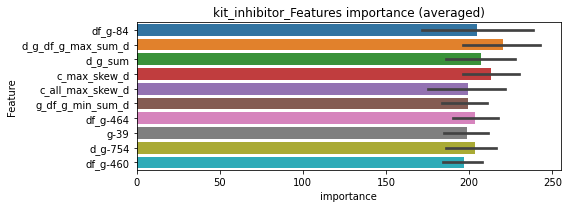

len(train_index) : 5616
len(valid_index) : 1873
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0485813	valid_1's binary_logloss: 0.0632648
[2000]	training's binary_logloss: 0.0261499	valid_1's binary_logloss: 0.0417899
[3000]	training's binary_logloss: 0.0176348	valid_1's binary_logloss: 0.0342191
[4000]	training's binary_logloss: 0.0131851	valid_1's binary_logloss: 0.0305475
Early stopping, best iteration is:
[4810]	training's binary_logloss: 0.0108834	valid_1's binary_logloss: 0.0286022


len(train_index) : 5617
len(valid_index) : 1872
================================= fold 2/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0455309	valid_1's binary_logloss: 0.0744611
[2000]	training's binary_logloss: 0.0242563	valid_1's binary_logloss: 0.053886
[3000]	training's binary_logloss: 0.0163608	valid_1's binary_logloss: 0.0466531
[4000]	training's binary_logloss: 0.0122894	valid_1's binary_logloss: 0.0432013
Early stopping, best iteration is:
[4300]	training's binary_logloss: 0.0114043	valid_1's binary_logloss: 0.0424329


len(train_index) : 5617
len(valid_index) : 1872
================================= fold 3/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0472707	valid_1's binary_logloss: 0.0673653
[2000]	training's binary_logloss: 0.0252486	valid_1's binary_logloss: 0.0466097
[3000]	training's binary_logloss: 0.0170429	valid_1's binary_logloss: 0.0391617
[4000]	training's binary_logloss: 0.0127479	valid_1's binary_logloss: 0.0354853
[5000]	training's binary_logloss: 0.0101341	valid_1's binary_logloss: 0.0330644
Early stopping, best iteration is:
[5199]	training's binary_logloss: 0.00971697	valid_1's binary_logloss: 0.0326217


len(train_index) : 5617
len(valid_index) : 1872
================================= fold 4/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0486715	valid_1's binary_logloss: 0.0595721
[2000]	training's binary_logloss: 0.0262314	valid_1's binary_logloss: 0.0388909
[3000]	training's binary_logloss: 0.017768	valid_1's binary_logloss: 0.0317288
[4000]	training's binary_logloss: 0.01328	valid_1's binary_logloss: 0.0279271
Early stopping, best iteration is:
[4816]	training's binary_logloss: 0.0109429	valid_1's binary_logloss: 0.0260718


kit_inhibitor logloss: 0.03243164760097757
kit_inhibitor is unpredictable(><)!
laxative, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000153357	valid_1's binary_logloss: 0.000194661
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000151233	valid_1's binary_logloss: 0.00126174
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000151549	valid_1's binary_logloss: 0.000181455
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004303, Threshold: 0.0012664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012664, conf_0:0.00089, conf_1:0.00165
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0312664


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000153112	valid_1's binary_logloss: 0.000202879


threshold: 0.0312664, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000143915	valid_1's binary_logloss: 0.000177879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000143109	valid_1's binary_logloss: 0.00147655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000145595	valid_1's binary_logloss: 0.000154601
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0721841, Threshold: 0.0312664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.0312664, conf_0:0.02501, conf_1:0.03752
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0612664
threshold: 0.0612664, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000143818	valid_1's binary_logloss: 0.000184857


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000143915	valid_1's binary_logloss: 0.000177879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000143109	valid_1's binary_logloss: 0.00147655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000145595	valid_1's binary_logloss: 0.000154601
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0721841, Threshold: 0.0612664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0612664, conf_0:0.05514, conf_1:0.06739
threshold: 0.0612664, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000143818	valid_1's binary_logloss: 0.000184857


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


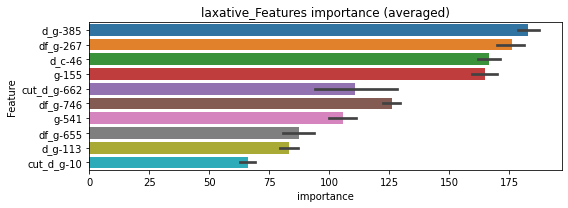

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148445	valid_1's binary_logloss: 0.000177605


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Early stopping, best iteration is:
[1200]	training's binary_logloss: 0.000145238	valid_1's binary_logloss: 0.000173727
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000147615	valid_1's binary_logloss: 0.000842546
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.000145993	valid_1's binary_logloss: 0.000838703


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149318	valid_1's binary_logloss: 0.000159575


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000146644	valid_1's binary_logloss: 0.000156671
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149582	valid_1's binary_logloss: 0.000190016


laxative logloss: 0.00033825907911229185


Early stopping, best iteration is:
[1389]	training's binary_logloss: 0.000144409	valid_1's binary_logloss: 0.000184108


leukotriene_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000160577	valid_1's binary_logloss: 0.000536264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000159342	valid_1's binary_logloss: 0.00552908
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000161386	valid_1's binary_logloss: 0.000233207
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005549, Threshold: 0.0012812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012812, conf_0:0.00090, conf_1:0.00167
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0312812
threshold: 0.0312812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000158883	valid_1's binary_logloss: 0.00019661


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000152174	valid_1's binary_logloss: 0.00045438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000150198	valid_1's binary_logloss: 0.00445229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151953	valid_1's binary_logloss: 0.000172789
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0143296, Threshold: 0.0312812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.0312812, conf_0:0.02502, conf_1:0.03754
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.0612812
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0912812
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.1212812
threshold: 0.1212812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000151561	valid_1's binary_logloss: 0.000168004


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000152174	valid_1's binary_logloss: 0.00045438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000150198	valid_1's binary_logloss: 0.00445229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151953	valid_1's binary_logloss: 0.000172789
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0143296, Threshold: 0.1212812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.1212812, conf_0:0.10915, conf_1:0.13341
threshold: 0.1212812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000151561	valid_1's binary_logloss: 0.000168004


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


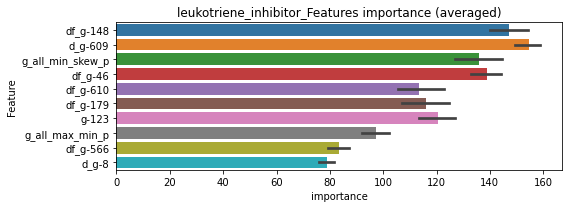

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152861	valid_1's binary_logloss: 0.000360305
Early stopping, best iteration is:
[1082]	training's binary_logloss: 0.000151331	valid_1's binary_logloss: 0.00035844


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151976	valid_1's binary_logloss: 0.00171336


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.000149559	valid_1's binary_logloss: 0.00170423
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150914	valid_1's binary_logloss: 0.000181501
Early stopping, best iteration is:
[1069]	training's binary_logloss: 0.000149664	valid_1's binary_logloss: 0.000180049


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152621	valid_1's binary_logloss: 0.000167041


leukotriene_inhibitor logloss: 0.000602110364610367


Early stopping, best iteration is:
[1113]	training's binary_logloss: 0.000150658	valid_1's binary_logloss: 0.000164887


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000799006	valid_1's binary_logloss: 0.0407184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.0014096	valid_1's binary_logloss: 0.0395104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000653404	valid_1's binary_logloss: 0.00590019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000641074	valid_1's binary_logloss: 0.0186809


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0051143, Threshold: 0.0112192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0112192, conf_0:0.00785, conf_1:0.01458
Num_p_label: 3.0, Expected: 10.4, Adj_threshold_1: 0.0412192
threshold: 0.0412192, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00116604	valid_1's binary_logloss: 0.0331577
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.00134352	valid_1's binary_logloss: 0.0265792
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000562298	valid_1's binary_logloss: 0.0121777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000645801	valid_1's binary_logloss: 0.0269961


2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0233006, Threshold: 0.0412192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0020090 Vs.target_rate: 0.00260
Num_p_label: 8.0, Expected: 10.4, Threshold: 0.0412192, conf_0:0.03298, conf_1:0.04946
threshold: 0.0412192, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000531969	valid_1's binary_logloss: 0.0159546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000648451	valid_1's binary_logloss: 0.0246976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000863604	valid_1's binary_logloss: 0.0218708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00056696	valid_1's binary_logloss: 0.0140177


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0266769, Threshold: 0.0412192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0022602 Vs.target_rate: 0.00260
Num_p_label: 9.0, Expected: 10.4, Threshold: 0.0412192, conf_0:0.03710, conf_1:0.04534
threshold: 0.0412192, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 648.0/3789, y_label_rate: 0.1710214


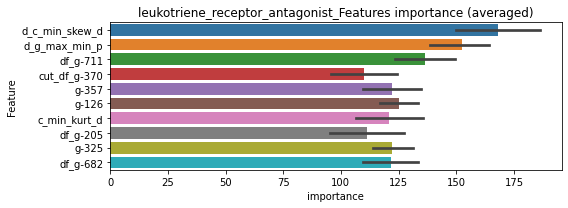

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000699695	valid_1's binary_logloss: 0.0196106


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000815267	valid_1's binary_logloss: 0.0135213


================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000562482	valid_1's binary_logloss: 0.0132712


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


leukotriene_receptor_antagonist logloss: 0.01576193653390289


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000800155	valid_1's binary_logloss: 0.0166386


lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000218448	valid_1's binary_logloss: 0.00507746
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000218282	valid_1's binary_logloss: 0.00085662
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000228785	valid_1's binary_logloss: 0.000283942
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008451, Threshold: 0.0019468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0019468, conf_0:0.00136, conf_1:0.00253


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000223586	valid_1's binary_logloss: 0.00133144


Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0319468
threshold: 0.0319468, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000227024	valid_1's binary_logloss: 0.00376673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000214015	valid_1's binary_logloss: 0.000800388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000212159	valid_1's binary_logloss: 0.000261869
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316934, Threshold: 0.0319468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, Expected: 2.0, Threshold: 0.0319468, conf_0:0.02556, conf_1:0.03834
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0619468


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000212851	valid_1's binary_logloss: 0.00157237


threshold: 0.0619468, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000227024	valid_1's binary_logloss: 0.00376673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000214015	valid_1's binary_logloss: 0.000800388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000212159	valid_1's binary_logloss: 0.000261869
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316934, Threshold: 0.0619468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0619468, conf_0:0.05575, conf_1:0.06814
threshold: 0.0619468, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000212851	valid_1's binary_logloss: 0.00157237


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


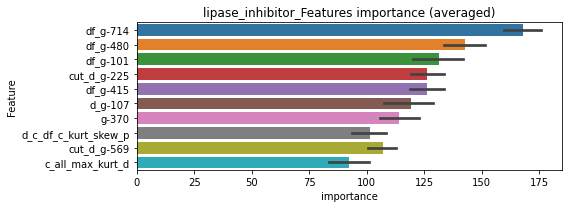

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[897]	training's binary_logloss: 0.00021461	valid_1's binary_logloss: 0.00192868
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000212906	valid_1's binary_logloss: 0.00044202
Early stopping, best iteration is:
[1032]	training's binary_logloss: 0.00021222	valid_1's binary_logloss: 0.000441343


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000215976	valid_1's binary_logloss: 0.000269047


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000208278	valid_1's binary_logloss: 0.000690095
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000208232	valid_1's binary_logloss: 0.000690031


lipase_inhibitor logloss: 0.0008325616958590264
lipoxygenase_inhibitor, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:313
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000642394	valid_1's binary_logloss: 0.019137
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000534407	valid_1's binary_logloss: 0.00968382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000558863	valid_1's binary_logloss: 0.0138084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000565183	valid_1's binary_logloss: 0.0233765


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054360, Threshold: 0.0847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0847418, conf_0:0.05932, conf_1:0.11016
Num_p_label: 39.0, Expected: 10.2, Adj_threshold_1: 0.1147418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_2: 0.1447418
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_3: 0.1747418
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_4: 0.2047418
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_5: 0.2347418
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_6: 0.2647418
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_7: 0.2947418
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_8: 0.3247418
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_9: 0.3547418
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_10: 0.3847418
threshold: 0.3847418, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000760533	valid_1's binary_logloss: 0.0206911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000538312	valid_1's binary_logloss: 0.0167079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000533622	valid_1's binary_logloss: 0.00934085
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0257960, Threshold: 0.3847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00110275	valid_1's binary_logloss: 0.0351071


p_label_rate: 0.0092918 Vs.target_rate: 0.00256
Num_p_label: 37.0, Expected: 10.2, Threshold: 0.3847418, conf_0:0.30779, conf_1:0.46169
Num_p_label: 36.0, Expected: 10.2, Adj_threshold_1: 0.4147418
Num_p_label: 36.0, Expected: 10.2, Adj_threshold_2: 0.4447418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_3: 0.4747418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_4: 0.5047418
Num_p_label: 33.0, Expected: 10.2, Adj_threshold_5: 0.5347418
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_6: 0.5647418
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_7: 0.5947418
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_8: 0.6247418
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_9: 0.6547418
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_10: 0.6847418
threshold: 0.6847418, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000928793	valid_1's binary_logloss: 0.0250806
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000578	valid_1's binary_logloss: 0.0143207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000576415	valid_1's binary_logloss: 0.0147836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000538133	valid_1's binary_logloss: 0.0118693


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0309536, Threshold: 0.6847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0050226 Vs.target_rate: 0.00256
Num_p_label: 20.0, Expected: 10.2, Threshold: 0.6847418, conf_0:0.61627, conf_1:0.75322
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_1: 0.7147418
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_2: 0.7447418
threshold: 0.7447418, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 649.0/3790, y_label_rate: 0.1712401


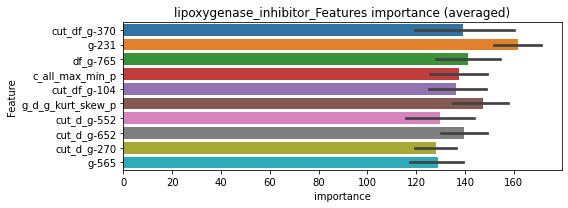

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000556743	valid_1's binary_logloss: 0.00969121


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000616224	valid_1's binary_logloss: 0.0135232


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000572651	valid_1's binary_logloss: 0.0216626


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000673048	valid_1's binary_logloss: 0.0196195


lipoxygenase_inhibitor logloss: 0.01612174006380028
lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000168462	valid_1's binary_logloss: 0.000944164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000169353	valid_1's binary_logloss: 0.00142441
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000173981	valid_1's binary_logloss: 0.000203808
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004834, Threshold: 0.0023534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0023534, conf_0:0.00165, conf_1:0.00306
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0323534
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0623534
threshold: 0.0623534, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000166301	valid_1's binary_logloss: 0.000551345


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000159505	valid_1's binary_logloss: 0.000655107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000148964	valid_1's binary_logloss: 0.00134575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000149213	valid_1's binary_logloss: 0.000161072
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0649559, Threshold: 0.0623534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00025
Num_p_label: 13.0, Expected: 1.0, Threshold: 0.0623534, conf_0:0.04988, conf_1:0.07482
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0923534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.1223534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_3: 0.1523534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_4: 0.1823534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_5: 0.2123534
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_6: 0.2423534
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_7: 0.2723534
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_8: 0.3023534
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_9: 0.3323534
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_10: 0.3623534


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000150671	valid_1's binary_logloss: 0.000222065


threshold: 0.3623534, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000159505	valid_1's binary_logloss: 0.000655107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000148964	valid_1's binary_logloss: 0.00134575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000149213	valid_1's binary_logloss: 0.000161072
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0649559, Threshold: 0.3623534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.3623534, conf_0:0.32612, conf_1:0.39859
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.3923534
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.4223534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.4523534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.4823534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.5123534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.5423534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.5723534
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.6023534
threshold: 0.6023534, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000150671	valid_1's binary_logloss: 0.000222065


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


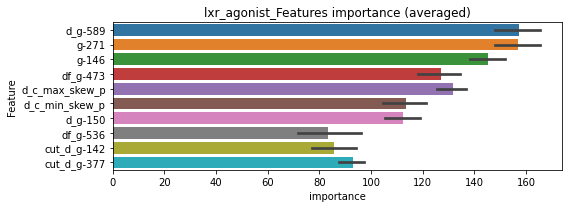

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000153915	valid_1's binary_logloss: 0.000353597
Early stopping, best iteration is:
[1062]	training's binary_logloss: 0.000152871	valid_1's binary_logloss: 0.000352011


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152555	valid_1's binary_logloss: 0.000442833


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000150314	valid_1's binary_logloss: 0.000438478
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000154182	valid_1's binary_logloss: 0.000166956


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Early stopping, best iteration is:
[1188]	training's binary_logloss: 0.000151478	valid_1's binary_logloss: 0.000163935
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152844	valid_1's binary_logloss: 0.000197413
Early stopping, best iteration is:
[1106]	training's binary_logloss: 0.000151452	valid_1's binary_logloss: 0.000195634


lxr_agonist logloss: 0.0002875145743924578
mdm_inhibitor, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000403088	valid_1's binary_logloss: 0.00696813
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000430864	valid_1's binary_logloss: 0.00401303
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000411653	valid_1's binary_logloss: 0.00253557
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000409915	valid_1's binary_logloss: 0.00449951


y_Threshold: 0.0027126, Threshold: 0.0361704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0361704, conf_0:0.02532, conf_1:0.04702
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_1: 0.0661704
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_2: 0.0961704
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_3: 0.1261704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_4: 0.1561704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_5: 0.1861704
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_6: 0.2161704
threshold: 0.2161704, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000393089	valid_1's binary_logloss: 0.00623249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000380754	valid_1's binary_logloss: 0.00320197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000393229	valid_1's binary_logloss: 0.00118288
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323944, Threshold: 0.2161704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000414117	valid_1's binary_logloss: 0.00286147


p_label_rate: 0.0087896 Vs.target_rate: 0.00130
Num_p_label: 35.0, Expected: 5.2, Threshold: 0.2161704, conf_0:0.17294, conf_1:0.25940
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_1: 0.2461704
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_2: 0.2761704
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_3: 0.3061704
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_4: 0.3361704
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_5: 0.3661704
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_6: 0.3961704
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_7: 0.4261704
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_8: 0.4561704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_9: 0.4861704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_10: 0.5161704
threshold: 0.5161704, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000393089	valid_1's binary_logloss: 0.00623249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000380754	valid_1's binary_logloss: 0.00320197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000393229	valid_1's binary_logloss: 0.00118288
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323944, Threshold: 0.5161704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000414117	valid_1's binary_logloss: 0.00286147


p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, Expected: 5.2, Threshold: 0.5161704, conf_0:0.46455, conf_1:0.56779
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.5461704
threshold: 0.5461704, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


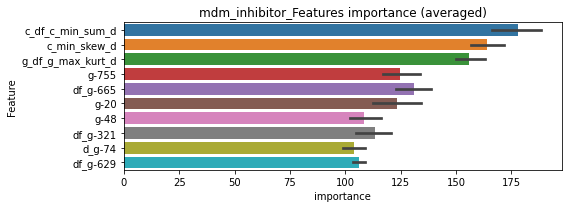

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000395529	valid_1's binary_logloss: 0.00379976


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000405835	valid_1's binary_logloss: 0.00332775


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000400397	valid_1's binary_logloss: 0.00118144


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000409005	valid_1's binary_logloss: 0.00290718


mdm_inhibitor logloss: 0.0028041296121338803
mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000614321	valid_1's binary_logloss: 0.0256426
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000600395	valid_1's binary_logloss: 0.0239754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000590767	valid_1's binary_logloss: 0.00569473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000669241	valid_1's binary_logloss: 0.0296798


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0057713, Threshold: 0.0209722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 654/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0209722, conf_0:0.01468, conf_1:0.02726
Num_p_label: 3.0, Expected: 12.0, Adj_threshold_1: 0.0509722
threshold: 0.0509722, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3795, y_label_rate: 0.1723320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.00062487	valid_1's binary_logloss: 0.0262689
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000585085	valid_1's binary_logloss: 0.0237277
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000591348	valid_1's binary_logloss: 0.0047423
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000611814	valid_1's binary_logloss: 0.0247701


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0201435, Threshold: 0.0509722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3787
p_label_rate: 0.0057760 Vs.target_rate: 0.00302
Num_p_label: 23.0, Expected: 12.0, Threshold: 0.0509722, conf_0:0.04078, conf_1:0.06117
Num_p_label: 10.0, Expected: 12.0, Adj_threshold_1: 0.0809722
threshold: 0.0809722, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.00071069	valid_1's binary_logloss: 0.0181859
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000597334	valid_1's binary_logloss: 0.0134643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000590545	valid_1's binary_logloss: 0.0165468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00067439	valid_1's binary_logloss: 0.0141217


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246051, Threshold: 0.0809722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 649.0/3785
p_label_rate: 0.0030136 Vs.target_rate: 0.00302
Num_p_label: 12.0, Expected: 12.0, Threshold: 0.0809722, conf_0:0.07287, conf_1:0.08907
threshold: 0.0809722, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3785, y_label_rate: 0.1714663


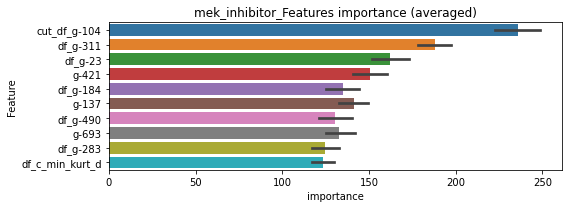

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000804354	valid_1's binary_logloss: 0.0227298


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000616491	valid_1's binary_logloss: 0.0194175


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000715119	valid_1's binary_logloss: 0.0166142


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000931487	valid_1's binary_logloss: 0.0158646


mek_inhibitor logloss: 0.018657593802092986
membrane_integrity_inhibitor, len(trt): 74, len(othr): 3279
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0811048	valid_1's binary_logloss: 0.117332
[2000]	training's binary_logloss: 0.043697	valid_1's binary_logloss: 0.0806792
[3000]	training's binary_logloss: 0.0295379	valid_1's binary_logloss: 0.0665084
[4000]	training's binary_logloss: 0.0222236	valid_1's binary_logloss: 0.0591069
[5000]	training's binary_logloss: 0.0176912	valid_1's binary_logloss: 0.0542907
[6000]	training's binary_logloss: 0.0146659	valid_1's binary_logloss: 0.0509619
Early stopping, best iteration is:
[6216]	training's binary_logloss: 0.0141412	valid_1's binary_logloss: 0.0502746
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0816571	valid_1's binary_logloss: 0.116725
[2000]	training's binary_logloss: 0.0440941	valid_1's binary_logloss: 0.0789867
[3000]	training's binary_logloss: 0.029973	valid_1's binary_logloss: 0.0645936
[4000]	training's binary_logloss: 0.0223891	val

1 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0477909, Threshold: 0.0939976, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.0939976, conf_0:0.06580, conf_1:0.12220
Num_p_label: 20.0, Expected: 12.4, Adj_threshold_1: 0.1239976
Num_p_label: 9.0, Expected: 12.4, Adj_threshold_2: 0.1539976
threshold: 0.1539976, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.078568	valid_1's binary_logloss: 0.110616
[2000]	training's binary_logloss: 0.0411403	valid_1's binary_logloss: 0.0732784
[3000]	training's binary_logloss: 0.0277438	valid_1's binary_logloss: 0.0592326
[4000]	training's binary_logloss: 0.0208013	valid_1's binary_logloss: 0.0517765
[5000]	training's binary_logloss: 0.0165974	valid_1's binary_logloss: 0.0470599
[6000]	training's binary_logloss: 0.0137695	valid_1's binary_logloss: 0.0437259
[7000]	training's binary_logloss: 0.0117791	valid_1's binary_logloss: 0.0413639
[8000]	training's binary_logloss: 0.0103204	valid_1's binary_logloss: 0.0396588
Early stopping, best iteration is:
[8265]	training's binary_logloss: 0.0100067	valid_1's binary_logloss: 0.0392613
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0754887	valid_1's binary_logloss: 0.121932
[2000]	training's binary_logloss: 0.0395486	va

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0922614, Threshold: 0.1539976, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0050226 Vs.target_rate: 0.00311
Num_p_label: 20.0, Expected: 12.4, Threshold: 0.1539976, conf_0:0.12320, conf_1:0.18480
Num_p_label: 14.0, Expected: 12.4, Adj_threshold_1: 0.1839976
threshold: 0.1839976, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 644.0/3780, y_label_rate: 0.1703704
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0749098	valid_1's binary_logloss: 0.118721
[2000]	training's binary_logloss: 0.039213	valid_1's binary_logloss: 0.0802821
[3000]	training's binary_logloss: 0.0262318	valid_1's binary_logloss: 0.0660602
[4000]	training's binary_logloss: 0.0196394	valid_1's binary_logloss: 0.0583619
[5000]	training's binary_logloss: 0.0156848	valid_1's binary_logloss: 0.053616
Early stopping, best iteration is:
[5722]	training's binary_logloss: 0.0136646	valid_1's binary_logloss: 0.0512315
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0757371	valid_1's binary_logloss: 0.11022
[2000]	training's binary_logloss: 0.039521	valid_1's binary_logloss: 0.0737208
[3000]	training's binary_logloss: 0.0264919	valid_1's binary_logloss: 0.0596348
[4000]	training's binary_logloss: 0.019798	valid_1's binary_logloss: 0.0520701
Early stopping, best iteration is:
[4523]	training

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0901796, Threshold: 0.1839976, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 635.0/3762
p_label_rate: 0.0027624 Vs.target_rate: 0.00311
Num_p_label: 11.0, Expected: 12.4, Threshold: 0.1839976, conf_0:0.16560, conf_1:0.20240
threshold: 0.1839976, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 635.0/3762, y_label_rate: 0.1687932


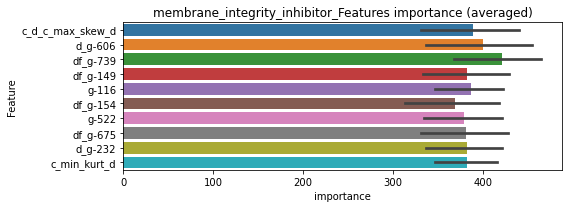

len(train_index) : 2821
len(valid_index) : 941
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.103333	valid_1's binary_logloss: 0.133745
[2000]	training's binary_logloss: 0.0551775	valid_1's binary_logloss: 0.0817665
[3000]	training's binary_logloss: 0.0371643	valid_1's binary_logloss: 0.0612198
[4000]	training's binary_logloss: 0.0281394	valid_1's binary_logloss: 0.0511471
[5000]	training's binary_logloss: 0.0225956	valid_1's binary_logloss: 0.0450027
[6000]	training's binary_logloss: 0.0187375	valid_1's binary_logloss: 0.0403698
[7000]	training's binary_logloss: 0.016058	valid_1's binary_logloss: 0.0372486
[8000]	training's binary_logloss: 0.0140351	valid_1's binary_logloss: 0.03462
[9000]	training's binary_logloss: 0.012517	valid_1's binary_logloss: 0.0328207
Early stopping, best iteration is:
[9488]	training's binary_logloss: 0.0118921	valid_1's binary_logloss: 0.0320885


len(train_index) : 2821
len(valid_index) : 941
================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.102656	valid_1's binary_logloss: 0.141589
[2000]	training's binary_logloss: 0.0541664	valid_1's binary_logloss: 0.0937011
[3000]	training's binary_logloss: 0.0365531	valid_1's binary_logloss: 0.0749518
[4000]	training's binary_logloss: 0.0275677	valid_1's binary_logloss: 0.0654825
[5000]	training's binary_logloss: 0.0220993	valid_1's binary_logloss: 0.0597064
[6000]	training's binary_logloss: 0.0183236	valid_1's binary_logloss: 0.0551796
Early stopping, best iteration is:
[6856]	training's binary_logloss: 0.0160278	valid_1's binary_logloss: 0.0526237


len(train_index) : 2822
len(valid_index) : 940
================================= fold 3/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.103744	valid_1's binary_logloss: 0.138193
[2000]	training's binary_logloss: 0.0552706	valid_1's binary_logloss: 0.0875219
[3000]	training's binary_logloss: 0.0372218	valid_1's binary_logloss: 0.0669887
[4000]	training's binary_logloss: 0.0281415	valid_1's binary_logloss: 0.0571194
[5000]	training's binary_logloss: 0.022559	valid_1's binary_logloss: 0.0506702
[6000]	training's binary_logloss: 0.0187461	valid_1's binary_logloss: 0.0461698
[7000]	training's binary_logloss: 0.0160698	valid_1's binary_logloss: 0.0430948
[8000]	training's binary_logloss: 0.0140594	valid_1's binary_logloss: 0.0405507
[9000]	training's binary_logloss: 0.0125261	valid_1's binary_logloss: 0.0386353
[10000]	training's binary_logloss: 0.0112833	valid_1's binary_logloss: 0.0371868
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0112833	valid_1's binary_logloss: 0.0371868


len(train_index) : 2822
len(valid_index) : 940
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.102157	valid_1's binary_logloss: 0.137334
[2000]	training's binary_logloss: 0.0541116	valid_1's binary_logloss: 0.0865956
[3000]	training's binary_logloss: 0.0364706	valid_1's binary_logloss: 0.0666077
[4000]	training's binary_logloss: 0.0275308	valid_1's binary_logloss: 0.0564572
[5000]	training's binary_logloss: 0.0220558	valid_1's binary_logloss: 0.050091
[6000]	training's binary_logloss: 0.0182821	valid_1's binary_logloss: 0.0455738
[7000]	training's binary_logloss: 0.0156911	valid_1's binary_logloss: 0.0425296
[8000]	training's binary_logloss: 0.0137268	valid_1's binary_logloss: 0.0399988
[9000]	training's binary_logloss: 0.0122362	valid_1's binary_logloss: 0.0380705
[10000]	training's binary_logloss: 0.0110213	valid_1's binary_logloss: 0.0365029
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0110213	valid_1's binary_logloss: 0.0365029


membrane_integrity_inhibitor logloss: 0.03960324624373922
membrane_integrity_inhibitor is unpredictable(><)!
mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000347145	valid_1's binary_logloss: 0.00208707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000351549	valid_1's binary_logloss: 0.00254108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000353168	valid_1's binary_logloss: 0.00140059
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018504, Threshold: 0.0051409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000360299	valid_1's binary_logloss: 0.00822544


Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0051409, conf_0:0.00360, conf_1:0.00668
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_1: 0.0351409
threshold: 0.0351409, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000344073	valid_1's binary_logloss: 0.00171995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034871	valid_1's binary_logloss: 0.00214892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000351906	valid_1's binary_logloss: 0.00139028
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113079, Threshold: 0.0351409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0351409, conf_0:0.02811, conf_1:0.04217
threshold: 0.0351409, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000381316	valid_1's binary_logloss: 0.00889272


positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000344073	valid_1's binary_logloss: 0.00171995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034871	valid_1's binary_logloss: 0.00214892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000351906	valid_1's binary_logloss: 0.00139028
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113079, Threshold: 0.0351409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0351409, conf_0:0.03163, conf_1:0.03865


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000381316	valid_1's binary_logloss: 0.00889272


threshold: 0.0351409, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


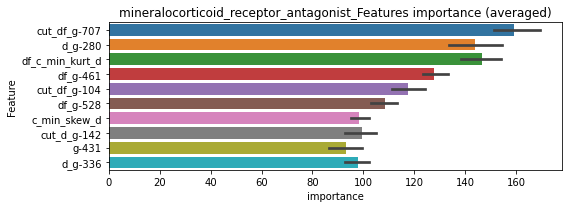

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000335245	valid_1's binary_logloss: 0.00190701


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000347407	valid_1's binary_logloss: 0.0021514


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00034661	valid_1's binary_logloss: 0.00134472


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00035973	valid_1's binary_logloss: 0.00762624


mineralocorticoid_receptor_antagonist logloss: 0.0032577012845831383
monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00022456	valid_1's binary_logloss: 0.00213293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000228446	valid_1's binary_logloss: 0.00369653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000229948	valid_1's binary_logloss: 0.000417409
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008240, Threshold: 0.0018187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0018187, conf_0:0.00127, conf_1:0.00236
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_1: 0.0318187


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000229791	valid_1's binary_logloss: 0.000356436


threshold: 0.0318187, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00021874	valid_1's binary_logloss: 0.00274854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000216367	valid_1's binary_logloss: 0.00381744
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222424	valid_1's binary_logloss: 0.000270421
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171529, Threshold: 0.0318187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000214829	valid_1's binary_logloss: 0.000477777


p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0318187, conf_0:0.02545, conf_1:0.03818
threshold: 0.0318187, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00021874	valid_1's binary_logloss: 0.00274854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000216367	valid_1's binary_logloss: 0.00381744
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222424	valid_1's binary_logloss: 0.000270421
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171529, Threshold: 0.0318187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0318187, conf_0:0.02864, conf_1:0.03500
threshold: 0.0318187, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000214829	valid_1's binary_logloss: 0.000477777


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


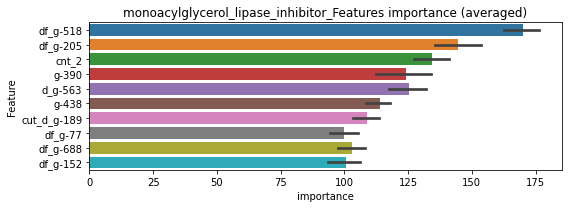

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000229288	valid_1's binary_logloss: 0.00279274
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000217587	valid_1's binary_logloss: 0.00289986
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000218228	valid_1's binary_logloss: 0.000281663
Training until validation scores don't improve for 30 rounds


monoacylglycerol_lipase_inhibitor logloss: 0.0015859713130587367


Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000218262	valid_1's binary_logloss: 0.000368703


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3272
target_rate: 0.0035693 → Adj_target_rate: 0.0036661


selected negative label: 3272


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0578035	valid_1's binary_logloss: 0.10754
[2000]	training's binary_logloss: 0.0328691	valid_1's binary_logloss: 0.0973333
Early stopping, best iteration is:
[2313]	training's binary_logloss: 0.0286873	valid_1's binary_logloss: 0.0956973
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0603172	valid_1's binary_logloss: 0.0957025
Early stopping, best iteration is:
[1916]	training's binary_logloss: 0.0357196	valid_1's binary_logloss: 0.0853268
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0623131	valid_1's binary_logloss: 0.0840425
[2000]	training's binary_logloss: 0.0352931	valid_1's binary_logloss: 0.0732193
Early stopping, best iteration is:
[2100]	training's binary_logloss: 0.033629	valid_1's binary_logloss: 0.0725716
Training until validation scores don't improve for 30 rounds
[1000]	trainin

1 / 3, AUC score:0.989, PR-AUC:0.974
y_Threshold: 0.0435698, Threshold: 0.0709203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 194 → Positive_corect_labels: 623/3732
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, Expected: 14.2, Threshold: 0.0709203, conf_0:0.04964, conf_1:0.09220
Num_p_label: 6.0, Expected: 14.2, Adj_threshold_1: 0.1009203
threshold: 0.1009203, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 623.0/3732, y_label_rate: 0.1669346
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0458113	valid_1's binary_logloss: 0.0713553
[2000]	training's binary_logloss: 0.0254378	valid_1's binary_logloss: 0.0591646
Early stopping, best iteration is:
[2801]	training's binary_logloss: 0.0183709	valid_1's binary_logloss: 0.0556845
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0434424	valid_1's binary_logloss: 0.0809185
[2000]	training's binary_logloss: 0.0239799	valid_1's binary_logloss: 0.070246
Early stopping, best iteration is:
[2105]	training's binary_logloss: 0.0228568	valid_1's binary_logloss: 0.0696495
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0478297	valid_1's binary_logloss: 0.061057
[2000]	training's binary_logloss: 0.0263263	valid_1's binary_logloss: 0.0484546
[3000]	training's binary_logloss: 0.0176443	valid_1's binary_logloss: 0.0445334
Early stopping, best iteratio

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0459238, Threshold: 0.1009203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 606.0/3698
p_label_rate: 0.0025113 Vs.target_rate: 0.00357
Num_p_label: 10.0, Expected: 14.2, Threshold: 0.1009203, conf_0:0.08074, conf_1:0.12110
threshold: 0.1009203, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 606.0/3698, y_label_rate: 0.1638724
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0364035	valid_1's binary_logloss: 0.0682854
[2000]	training's binary_logloss: 0.0199604	valid_1's binary_logloss: 0.0565704
Early stopping, best iteration is:
[2491]	training's binary_logloss: 0.0161702	valid_1's binary_logloss: 0.0541421
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0376725	valid_1's binary_logloss: 0.0588358
[2000]	training's binary_logloss: 0.0206982	valid_1's binary_logloss: 0.0469703
Early stopping, best iteration is:
[2812]	training's binary_logloss: 0.0149234	valid_1's binary_logloss: 0.043416
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0393093	valid_1's binary_logloss: 0.0477337
[2000]	training's binary_logloss: 0.0217699	valid_1's binary_logloss: 0.0362471
[3000]	training's binary_logloss: 0.0146881	valid_1's binary_logloss: 0.0322211
Early stopping, best iterati

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0419363, Threshold: 0.1009203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 596.0/3678
p_label_rate: 0.0015068 Vs.target_rate: 0.00357
Num_p_label: 6.0, Expected: 14.2, Threshold: 0.1009203, conf_0:0.09083, conf_1:0.11101
threshold: 0.1009203, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 596.0/3678, y_label_rate: 0.1620446


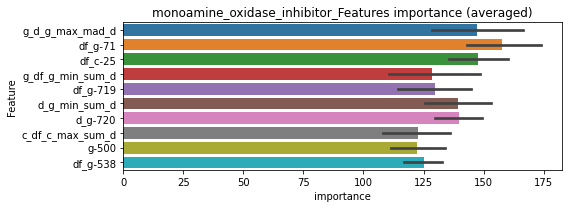

len(train_index) : 2758
len(valid_index) : 920
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0432289	valid_1's binary_logloss: 0.0677882
[2000]	training's binary_logloss: 0.0243543	valid_1's binary_logloss: 0.0525481
[3000]	training's binary_logloss: 0.016917	valid_1's binary_logloss: 0.0476985
Early stopping, best iteration is:
[3332]	training's binary_logloss: 0.0152642	valid_1's binary_logloss: 0.0468776


len(train_index) : 2758
len(valid_index) : 920
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0449053	valid_1's binary_logloss: 0.0596054
[2000]	training's binary_logloss: 0.025563	valid_1's binary_logloss: 0.0428405
[3000]	training's binary_logloss: 0.017696	valid_1's binary_logloss: 0.0366867
[4000]	training's binary_logloss: 0.0134099	valid_1's binary_logloss: 0.0335618
Early stopping, best iteration is:
[4815]	training's binary_logloss: 0.0111864	valid_1's binary_logloss: 0.0321255


len(train_index) : 2759
len(valid_index) : 919
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0465843	valid_1's binary_logloss: 0.0540768
[2000]	training's binary_logloss: 0.0266238	valid_1's binary_logloss: 0.0377896
[3000]	training's binary_logloss: 0.0185232	valid_1's binary_logloss: 0.0320696
[4000]	training's binary_logloss: 0.0140836	valid_1's binary_logloss: 0.0293181
[5000]	training's binary_logloss: 0.0113172	valid_1's binary_logloss: 0.0276879
[6000]	training's binary_logloss: 0.00944215	valid_1's binary_logloss: 0.0265415
Early stopping, best iteration is:
[6317]	training's binary_logloss: 0.00895662	valid_1's binary_logloss: 0.0262755


len(train_index) : 2759
len(valid_index) : 919
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0466313	valid_1's binary_logloss: 0.0581648
[2000]	training's binary_logloss: 0.0268153	valid_1's binary_logloss: 0.040775
[3000]	training's binary_logloss: 0.018635	valid_1's binary_logloss: 0.0345829
[4000]	training's binary_logloss: 0.0141871	valid_1's binary_logloss: 0.0314401
Early stopping, best iteration is:
[4829]	training's binary_logloss: 0.0117987	valid_1's binary_logloss: 0.0297803


monoamine_oxidase_inhibitor logloss: 0.03376784689767527
monoamine_oxidase_inhibitor is unpredictable(><)!
monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00030715	valid_1's binary_logloss: 0.000888263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000311369	valid_1's binary_logloss: 0.00179395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00030891	valid_1's binary_logloss: 0.00218472
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000307446	valid_1's binary_logloss: 0.00275058


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016201, Threshold: 0.0166980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0166980, conf_0:0.01169, conf_1:0.02171
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_1: 0.0466980
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0766980
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1066980
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.1366980
threshold: 0.1366980, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000297245	valid_1's binary_logloss: 0.000575728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000294709	valid_1's binary_logloss: 0.00159832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000299691	valid_1's binary_logloss: 0.00210876
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509281, Threshold: 0.1366980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0072828 Vs.target_rate: 0.00076
Num_p_label: 29.0, Expected: 3.0, Threshold: 0.1366980, conf_0:0.10936, conf_1:0.16404
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.1666980
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.1966980
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_3: 0.2266980


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290313	valid_1's binary_logloss: 0.00201988


Num_p_label: 19.0, Expected: 3.0, Adj_threshold_4: 0.2566980
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_5: 0.2866980
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.3166980
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.3466980
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.3766980
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_9: 0.4066980
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.4366980
threshold: 0.4366980, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000297245	valid_1's binary_logloss: 0.000575728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000294709	valid_1's binary_logloss: 0.00159832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000299691	valid_1's binary_logloss: 0.00210876
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509281, Threshold: 0.4366980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00076
Num_p_label: 8.0, Expected: 3.0, Threshold: 0.4366980, conf_0:0.39303, conf_1:0.48037
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.4666980


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290313	valid_1's binary_logloss: 0.00201988


threshold: 0.4666980, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


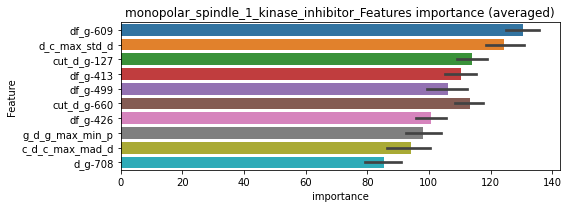

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000298611	valid_1's binary_logloss: 0.000550395


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000298749	valid_1's binary_logloss: 0.00153476


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000301315	valid_1's binary_logloss: 0.00105052


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000296596	valid_1's binary_logloss: 0.00124356


monopolar_spindle_1_kinase_inhibitor logloss: 0.0010947231612758394


mutually exclusive columns: mtor_inhibitor


mtor_inhibitor, len(trt): 130, len(othr): 2722
target_rate: 0.0054590 → Adj_target_rate: 0.0052608


selected negative label: 2722


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0972468	valid_1's binary_logloss: 0.169237
[2000]	training's binary_logloss: 0.0551516	valid_1's binary_logloss: 0.150604
Early stopping, best iteration is:
[2515]	training's binary_logloss: 0.0444723	valid_1's binary_logloss: 0.146529
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0998306	valid_1's binary_logloss: 0.151699
[2000]	training's binary_logloss: 0.0568437	valid_1's binary_logloss: 0.131496
Early stopping, best iteration is:
[2899]	training's binary_logloss: 0.0399637	valid_1's binary_logloss: 0.123798
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0961079	valid_1's binary_logloss: 0.182778
[2000]	training's binary_logloss: 0.054648	valid_1's binary_logloss: 0.163924
Early stopping, best iteration is:
[2497]	training's binary_logloss: 0.0442405	valid_1's binary_logloss: 0.160074
Tr

1 / 3, AUC score:0.968, PR-AUC:0.940
y_Threshold: 0.0723554, Threshold: 0.1160973, pos_neg_ratio: 0.8000000
Remove_noisy_data: 210 → Positive_corect_labels: 494/3056
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, Expected: 21.7, Threshold: 0.1160973, conf_0:0.08127, conf_1:0.15093
Num_p_label: 10.0, Expected: 21.7, Adj_threshold_1: 0.1460973
threshold: 0.1460973, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 494.0/3056, y_label_rate: 0.1616492
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0728487	valid_1's binary_logloss: 0.139109
[2000]	training's binary_logloss: 0.0405055	valid_1's binary_logloss: 0.120266
Early stopping, best iteration is:
[2459]	training's binary_logloss: 0.033296	valid_1's binary_logloss: 0.116494
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.076447	valid_1's binary_logloss: 0.122882
[2000]	training's binary_logloss: 0.0422845	valid_1's binary_logloss: 0.0997908
[3000]	training's binary_logloss: 0.0286579	valid_1's binary_logloss: 0.0919223
Early stopping, best iteration is:
[3254]	training's binary_logloss: 0.0264136	valid_1's binary_logloss: 0.0906656
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0794373	valid_1's binary_logloss: 0.111879
[2000]	training's binary_logloss: 0.0439146	valid_1's binary_logloss: 0.0873285
[3000]	training's binary_logloss: 

2 / 3, AUC score:0.993, PR-AUC:0.983
y_Threshold: 0.0730360, Threshold: 0.1460973, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 464.0/2996
p_label_rate: 0.0072828 Vs.target_rate: 0.00546
Num_p_label: 29.0, Expected: 21.7, Threshold: 0.1460973, conf_0:0.11688, conf_1:0.17532
threshold: 0.1460973, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 464.0/2996, y_label_rate: 0.1548732
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0603611	valid_1's binary_logloss: 0.107133
[2000]	training's binary_logloss: 0.0326663	valid_1's binary_logloss: 0.0856146
[3000]	training's binary_logloss: 0.022168	valid_1's binary_logloss: 0.0783921
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.0183934	valid_1's binary_logloss: 0.0760313
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0628928	valid_1's binary_logloss: 0.0972729
[2000]	training's binary_logloss: 0.0341765	valid_1's binary_logloss: 0.0742636
[3000]	training's binary_logloss: 0.0231102	valid_1's binary_logloss: 0.0667242
[4000]	training's binary_logloss: 0.0173708	valid_1's binary_logloss: 0.0630687
Early stopping, best iteration is:
[3971]	training's binary_logloss: 0.0174925	valid_1's binary_logloss: 0.063004
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_loglo

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0716523, Threshold: 0.1460973, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 451.0/2970
p_label_rate: 0.0075339 Vs.target_rate: 0.00546
Num_p_label: 30.0, Expected: 21.7, Threshold: 0.1460973, conf_0:0.13149, conf_1:0.16071
threshold: 0.1460973, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 451.0/2970, y_label_rate: 0.1518519


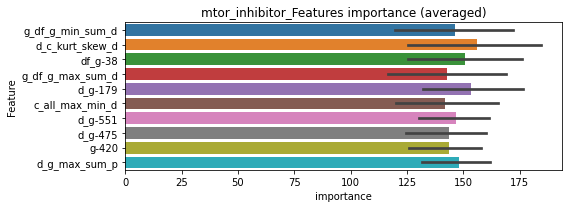

len(train_index) : 2227
len(valid_index) : 743
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0771358	valid_1's binary_logloss: 0.110118
[2000]	training's binary_logloss: 0.0434987	valid_1's binary_logloss: 0.0777201
[3000]	training's binary_logloss: 0.0300545	valid_1's binary_logloss: 0.0656449
[4000]	training's binary_logloss: 0.0228239	valid_1's binary_logloss: 0.0591732
[5000]	training's binary_logloss: 0.0183039	valid_1's binary_logloss: 0.0553111
Early stopping, best iteration is:
[5825]	training's binary_logloss: 0.0157193	valid_1's binary_logloss: 0.0528105


len(train_index) : 2227
len(valid_index) : 743
================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0757025	valid_1's binary_logloss: 0.107854
[2000]	training's binary_logloss: 0.0420935	valid_1's binary_logloss: 0.0786888
[3000]	training's binary_logloss: 0.0290468	valid_1's binary_logloss: 0.0679883
[4000]	training's binary_logloss: 0.0221015	valid_1's binary_logloss: 0.0630582
Early stopping, best iteration is:
[4496]	training's binary_logloss: 0.0197237	valid_1's binary_logloss: 0.0611817


len(train_index) : 2228
len(valid_index) : 742
================================= fold 3/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0781361	valid_1's binary_logloss: 0.100431
[2000]	training's binary_logloss: 0.0437425	valid_1's binary_logloss: 0.0691281
[3000]	training's binary_logloss: 0.0301638	valid_1's binary_logloss: 0.0577974
[4000]	training's binary_logloss: 0.0228679	valid_1's binary_logloss: 0.0519515
[5000]	training's binary_logloss: 0.0183356	valid_1's binary_logloss: 0.0484268
[6000]	training's binary_logloss: 0.0153099	valid_1's binary_logloss: 0.0457178
Early stopping, best iteration is:
[6262]	training's binary_logloss: 0.0146639	valid_1's binary_logloss: 0.045141


len(train_index) : 2228
len(valid_index) : 742
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0759033	valid_1's binary_logloss: 0.105939
[2000]	training's binary_logloss: 0.0423775	valid_1's binary_logloss: 0.0760806
[3000]	training's binary_logloss: 0.029501	valid_1's binary_logloss: 0.0657497
[4000]	training's binary_logloss: 0.022483	valid_1's binary_logloss: 0.0607538
Early stopping, best iteration is:
[4828]	training's binary_logloss: 0.0187336	valid_1's binary_logloss: 0.0580894


mtor_inhibitor logloss: 0.05430745599935693
mtor_inhibitor is unpredictable(><)!
mucolytic_agent, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000476707	valid_1's binary_logloss: 0.0121389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000476726	valid_1's binary_logloss: 0.00956389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000493206	valid_1's binary_logloss: 0.00312973
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000594824	valid_1's binary_logloss: 0.0192982


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0037370, Threshold: 0.0989376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0989376, conf_0:0.06926, conf_1:0.12862
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.1289376
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_2: 0.1589376
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_3: 0.1889376
threshold: 0.1889376, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000473679	valid_1's binary_logloss: 0.00505381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000465914	valid_1's binary_logloss: 0.00466512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000465649	valid_1's binary_logloss: 0.00539976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000469593	valid_1's binary_logloss: 0.0122536


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1002446, Threshold: 0.1889376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0188348 Vs.target_rate: 0.00202
Num_p_label: 75.0, Expected: 8.0, Threshold: 0.1889376, conf_0:0.15115, conf_1:0.22673
Num_p_label: 70.0, Expected: 8.0, Adj_threshold_1: 0.2189376
Num_p_label: 68.0, Expected: 8.0, Adj_threshold_2: 0.2489376
Num_p_label: 67.0, Expected: 8.0, Adj_threshold_3: 0.2789376
Num_p_label: 64.0, Expected: 8.0, Adj_threshold_4: 0.3089376
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_5: 0.3389376
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_6: 0.3689376
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_7: 0.3989376
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_8: 0.4289376
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_9: 0.4589376
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_10: 0.4889376
threshold: 0.4889376, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000468772	valid_1's binary_logloss: 0.00565936
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000470265	valid_1's binary_logloss: 0.00519889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000471949	valid_1's binary_logloss: 0.0058831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000461626	valid_1's binary_logloss: 0.00353389


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1380826, Threshold: 0.4889376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0123054 Vs.target_rate: 0.00202
Num_p_label: 49.0, Expected: 8.0, Threshold: 0.4889376, conf_0:0.44004, conf_1:0.53783
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_1: 0.5189376
Num_p_label: 41.0, Expected: 8.0, Adj_threshold_2: 0.5489376
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_3: 0.5789376
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_4: 0.6089376
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_5: 0.6389376
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_6: 0.6689376
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_7: 0.6989376
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_8: 0.7289376
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_9: 0.7589376
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_10: 0.7889376
threshold: 0.7889376, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_la

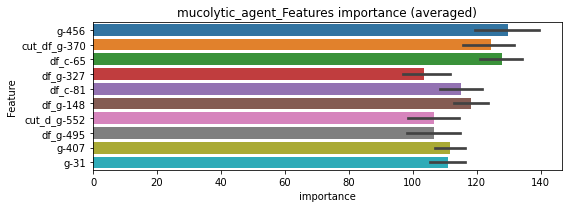

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000472467	valid_1's binary_logloss: 0.00782402


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000471795	valid_1's binary_logloss: 0.00619742


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000516676	valid_1's binary_logloss: 0.00709031


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000467108	valid_1's binary_logloss: 0.00394115
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000466964	valid_1's binary_logloss: 0.00393885


mucolytic_agent logloss: 0.006263752984779257
neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000514495	valid_1's binary_logloss: 0.0107466
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000437088	valid_1's binary_logloss: 0.00359975
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000452749	valid_1's binary_logloss: 0.00716617
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028542, Threshold: 0.0132299, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000445505	valid_1's binary_logloss: 0.00750395


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0132299, conf_0:0.00926, conf_1:0.01720
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_1: 0.0432299
threshold: 0.0432299, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000441249	valid_1's binary_logloss: 0.0088247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000413139	valid_1's binary_logloss: 0.0025629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00047772	valid_1's binary_logloss: 0.0062145
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000501026	valid_1's binary_logloss: 0.00699905


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0262727, Threshold: 0.0432299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0052737 Vs.target_rate: 0.00155
Num_p_label: 21.0, Expected: 6.2, Threshold: 0.0432299, conf_0:0.03458, conf_1:0.05188
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.0732299
threshold: 0.0732299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000441249	valid_1's binary_logloss: 0.0088247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000413139	valid_1's binary_logloss: 0.0025629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00047772	valid_1's binary_logloss: 0.0062145
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0262727, Threshold: 0.0732299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00155


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000501026	valid_1's binary_logloss: 0.00699905


Num_p_label: 12.0, Expected: 6.2, Threshold: 0.0732299, conf_0:0.06591, conf_1:0.08055
threshold: 0.0732299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


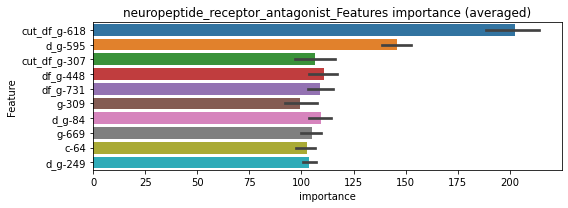

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000448635	valid_1's binary_logloss: 0.00914544


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000432493	valid_1's binary_logloss: 0.00270924


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000686478	valid_1's binary_logloss: 0.00642997
Training until validation scores don't improve for 30 rounds


neuropeptide_receptor_antagonist logloss: 0.006208404452654936


Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000511358	valid_1's binary_logloss: 0.00654896
mutually exclusive columns: nfkb_inhibitor


nfkb_inhibitor, len(trt): 832, len(othr): 6799
target_rate: 0.0349374 → Adj_target_rate: 0.0254860


selected negative label: 6799


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.231061	valid_1's binary_logloss: 0.372349
Early stopping, best iteration is:
[1739]	training's binary_logloss: 0.164964	valid_1's binary_logloss: 0.358538
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.227717	valid_1's binary_logloss: 0.378224
Early stopping, best iteration is:
[1399]	training's binary_logloss: 0.188483	valid_1's binary_logloss: 0.370364
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.233162	valid_1's binary_logloss: 0.36838
Early stopping, best iteration is:
[1467]	training's binary_logloss: 0.186853	valid_1's binary_logloss: 0.356859
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.228284	valid_1's binary_logloss: 0.385473
Early stopping, best iteration is:
[1423]	training's binary_logloss: 0.186637	valid_1's binary_logloss: 0.

1 / 3, AUC score:0.751, PR-AUC:0.586
y_Threshold: 0.1867170, Threshold: 0.3065267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1539 → Positive_corect_labels: 726/6619
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, Expected: 139.1, Threshold: 0.3065267, conf_0:0.21457, conf_1:0.39848
threshold: 0.3065267, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 726.0/6619, y_label_rate: 0.1096842
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.123159	valid_1's binary_logloss: 0.209429
[2000]	training's binary_logloss: 0.06942	valid_1's binary_logloss: 0.176355
Early stopping, best iteration is:
[2940]	training's binary_logloss: 0.0478788	valid_1's binary_logloss: 0.162697
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.121213	valid_1's binary_logloss: 0.217418
[2000]	training's binary_logloss: 0.0683834	valid_1's binary_logloss: 0.18783
Early stopping, best iteration is:
[2445]	training's binary_logloss: 0.0568219	valid_1's binary_logloss: 0.182106
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.124333	valid_1's binary_logloss: 0.204264
[2000]	training's binary_logloss: 0.0700991	valid_1's binary_logloss: 0.171488
Early stopping, best iteration is:
[2614]	training's binary_logloss: 0.0544768	valid_1's binary_logloss: 0.16202
Training

2 / 3, AUC score:0.957, PR-AUC:0.879
y_Threshold: 0.1318024, Threshold: 0.3065267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 300 → Positive_corect_labels: 576.0/6319
p_label_rate: 0.0065294 Vs.target_rate: 0.03494
Num_p_label: 26.0, Expected: 139.1, Threshold: 0.3065267, conf_0:0.24522, conf_1:0.36783
threshold: 0.3065267, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 576.0/6319, y_label_rate: 0.0911537
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0950189	valid_1's binary_logloss: 0.158811
[2000]	training's binary_logloss: 0.0509725	valid_1's binary_logloss: 0.12505
Early stopping, best iteration is:
[2920]	training's binary_logloss: 0.0347605	valid_1's binary_logloss: 0.111674
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0933482	valid_1's binary_logloss: 0.169539
[2000]	training's binary_logloss: 0.0501339	valid_1's binary_logloss: 0.138281
Early stopping, best iteration is:
[2467]	training's binary_logloss: 0.040451	valid_1's binary_logloss: 0.130499
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0960788	valid_1's binary_logloss: 0.165278
[2000]	training's binary_logloss: 0.0512613	valid_1's binary_logloss: 0.131778
[3000]	training's binary_logloss: 0.0340736	valid_1's binary_logloss: 0.118045
Early stopping, best iteration is:
[38

3 / 3, AUC score:0.990, PR-AUC:0.961
y_Threshold: 0.1132441, Threshold: 0.3065267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 523.0/6213
p_label_rate: 0.0032647 Vs.target_rate: 0.03494
Num_p_label: 13.0, Expected: 139.1, Threshold: 0.3065267, conf_0:0.27587, conf_1:0.33718
threshold: 0.3065267, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 523.0/6213, y_label_rate: 0.0841783


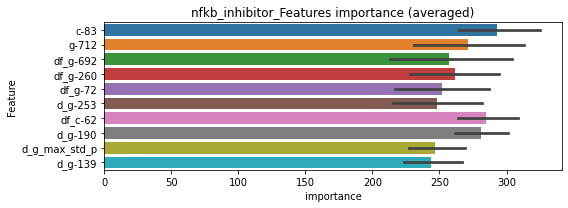

len(train_index) : 4659
len(valid_index) : 1554
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.11168	valid_1's binary_logloss: 0.17387
[2000]	training's binary_logloss: 0.0633395	valid_1's binary_logloss: 0.139038
[3000]	training's binary_logloss: 0.042535	valid_1's binary_logloss: 0.122306
Early stopping, best iteration is:
[3879]	training's binary_logloss: 0.0327062	valid_1's binary_logloss: 0.114452


len(train_index) : 4660
len(valid_index) : 1553
================================= fold 2/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.114035	valid_1's binary_logloss: 0.164445
[2000]	training's binary_logloss: 0.065445	valid_1's binary_logloss: 0.125513
[3000]	training's binary_logloss: 0.0442066	valid_1's binary_logloss: 0.107919
[4000]	training's binary_logloss: 0.0331362	valid_1's binary_logloss: 0.0982483
[5000]	training's binary_logloss: 0.0263208	valid_1's binary_logloss: 0.0920817
Early stopping, best iteration is:
[5196]	training's binary_logloss: 0.0252999	valid_1's binary_logloss: 0.0909676


len(train_index) : 4660
len(valid_index) : 1553
================================= fold 3/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.11553	valid_1's binary_logloss: 0.159032
[2000]	training's binary_logloss: 0.0659991	valid_1's binary_logloss: 0.117441
[3000]	training's binary_logloss: 0.0446013	valid_1's binary_logloss: 0.0983851
[4000]	training's binary_logloss: 0.0332888	valid_1's binary_logloss: 0.088175
Early stopping, best iteration is:
[4348]	training's binary_logloss: 0.0305736	valid_1's binary_logloss: 0.0856635


len(train_index) : 4660
len(valid_index) : 1553
================================= fold 4/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.11425	valid_1's binary_logloss: 0.169873
[2000]	training's binary_logloss: 0.0648154	valid_1's binary_logloss: 0.132757
[3000]	training's binary_logloss: 0.0436929	valid_1's binary_logloss: 0.115161
[4000]	training's binary_logloss: 0.0327217	valid_1's binary_logloss: 0.105122
Early stopping, best iteration is:
[4348]	training's binary_logloss: 0.0300331	valid_1's binary_logloss: 0.102598


nfkb_inhibitor logloss: 0.09844233644962816
nfkb_inhibitor is unpredictable(><)!
nicotinic_receptor_agonist, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000238678	valid_1's binary_logloss: 0.00175164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000236937	valid_1's binary_logloss: 0.00121174
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000246325	valid_1's binary_logloss: 0.000460892
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009120, Threshold: 0.0051276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0051276, conf_0:0.00359, conf_1:0.00667
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0351276


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000239429	valid_1's binary_logloss: 0.000773861


threshold: 0.0351276, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000236448	valid_1's binary_logloss: 0.000743048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000236305	valid_1's binary_logloss: 0.000845777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000234591	valid_1's binary_logloss: 0.000350759
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0994385, Threshold: 0.0351276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00050
Num_p_label: 15.0, Expected: 2.0, Threshold: 0.0351276, conf_0:0.02810, conf_1:0.04215
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.0651276
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0951276


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000232739	valid_1's binary_logloss: 0.00103413


threshold: 0.0951276, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000236448	valid_1's binary_logloss: 0.000743048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000236305	valid_1's binary_logloss: 0.000845777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000234591	valid_1's binary_logloss: 0.000350759
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0994385, Threshold: 0.0951276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0951276, conf_0:0.08561, conf_1:0.10464


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000232739	valid_1's binary_logloss: 0.00103413


threshold: 0.0951276, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


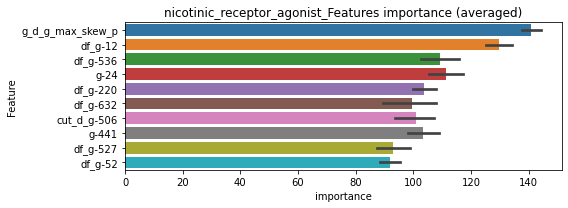

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000238732	valid_1's binary_logloss: 0.000530254


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000239745	valid_1's binary_logloss: 0.000784282
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000236901	valid_1's binary_logloss: 0.000379372
Training until validation scores don't improve for 30 rounds


nicotinic_receptor_agonist logloss: 0.0005400170704230048


Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000239059	valid_1's binary_logloss: 0.000466163


nitric_oxide_donor, len(trt): 26, len(othr): 3287
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000377243	valid_1's binary_logloss: 0.00619259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000361423	valid_1's binary_logloss: 0.00241037
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000378031	valid_1's binary_logloss: 0.00141091
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027561, Threshold: 0.0365256, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000365105	valid_1's binary_logloss: 0.00183201


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0365256, conf_0:0.02557, conf_1:0.04748
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_1: 0.0665256
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_2: 0.0965256
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_3: 0.1265256
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_4: 0.1565256
threshold: 0.1565256, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000345191	valid_1's binary_logloss: 0.00557271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000347161	valid_1's binary_logloss: 0.00166624
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000356854	valid_1's binary_logloss: 0.00137623
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0411869, Threshold: 0.1565256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00034829	valid_1's binary_logloss: 0.0015321


p_label_rate: 0.0113009 Vs.target_rate: 0.00109
Num_p_label: 45.0, Expected: 4.3, Threshold: 0.1565256, conf_0:0.12522, conf_1:0.18783
Num_p_label: 37.0, Expected: 4.3, Adj_threshold_1: 0.1865256
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_2: 0.2165256
Num_p_label: 25.0, Expected: 4.3, Adj_threshold_3: 0.2465256
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_4: 0.2765256
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_5: 0.3065256
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_6: 0.3365256
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_7: 0.3665256
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_8: 0.3965256
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_9: 0.4265256
threshold: 0.4265256, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000345191	valid_1's binary_logloss: 0.00557271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000347161	valid_1's binary_logloss: 0.00166624
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000356854	valid_1's binary_logloss: 0.00137623
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0411869, Threshold: 0.4265256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00034829	valid_1's binary_logloss: 0.0015321


p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.4265256, conf_0:0.38387, conf_1:0.46918
threshold: 0.4265256, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


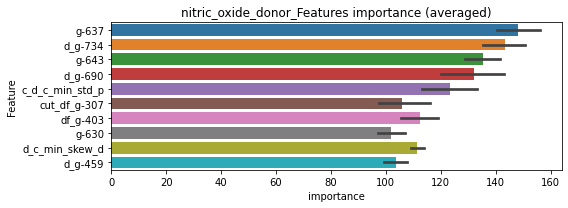

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000386821	valid_1's binary_logloss: 0.00442807


================================= fold 2/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.00035711	valid_1's binary_logloss: 0.00149286


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000357309	valid_1's binary_logloss: 0.00121214


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.00035553	valid_1's binary_logloss: 0.00173496


nitric_oxide_donor logloss: 0.0022170174454153634
nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000375672	valid_1's binary_logloss: 0.00447262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000353039	valid_1's binary_logloss: 0.00524729
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000357332	valid_1's binary_logloss: 0.00109795
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000349832	valid_1's binary_logloss: 0.00223764


y_Threshold: 0.0023205, Threshold: 0.0075482, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0075482, conf_0:0.00528, conf_1:0.00981
Num_p_label: 3.0, Expected: 4.8, Adj_threshold_1: 0.0375482
threshold: 0.0375482, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000473158	valid_1's binary_logloss: 0.00494738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000345079	valid_1's binary_logloss: 0.00490412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035924	valid_1's binary_logloss: 0.000987274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000350658	valid_1's binary_logloss: 0.00292393


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0281787, Threshold: 0.0375482, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0035158 Vs.target_rate: 0.00122
Num_p_label: 14.0, Expected: 4.8, Threshold: 0.0375482, conf_0:0.03004, conf_1:0.04506
Num_p_label: 5.0, Expected: 4.8, Adj_threshold_1: 0.0675482
threshold: 0.0675482, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000473158	valid_1's binary_logloss: 0.00494738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000345079	valid_1's binary_logloss: 0.00490412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035924	valid_1's binary_logloss: 0.000987274
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0281787, Threshold: 0.0675482, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000350658	valid_1's binary_logloss: 0.00292393


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00122
Num_p_label: 5.0, Expected: 4.8, Threshold: 0.0675482, conf_0:0.06079, conf_1:0.07430
threshold: 0.0675482, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


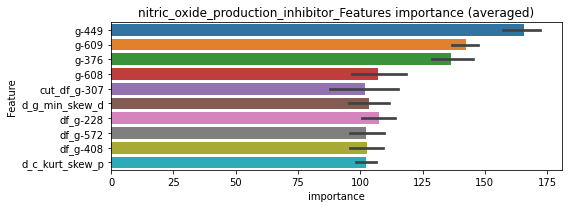

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000454966	valid_1's binary_logloss: 0.00578126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.00036625	valid_1's binary_logloss: 0.00407091


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000347937	valid_1's binary_logloss: 0.000928122


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000350573	valid_1's binary_logloss: 0.00264128


nitric_oxide_production_inhibitor logloss: 0.0033562180576652964
nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000382956	valid_1's binary_logloss: 0.00400104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000389693	valid_1's binary_logloss: 0.00145589
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000383193	valid_1's binary_logloss: 0.00100479
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027906, Threshold: 0.0240505, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000377714	valid_1's binary_logloss: 0.00287639


Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0240505, conf_0:0.01684, conf_1:0.03127
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_1: 0.0540505
Num_p_label: 6.0, Expected: 4.3, Adj_threshold_2: 0.0840505
threshold: 0.0840505, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000375368	valid_1's binary_logloss: 0.00496097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000375592	valid_1's binary_logloss: 0.00123216
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000374109	valid_1's binary_logloss: 0.000896929
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000369303	valid_1's binary_logloss: 0.00271207


y_Threshold: 0.0478986, Threshold: 0.0840505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0110497 Vs.target_rate: 0.00109
Num_p_label: 44.0, Expected: 4.3, Threshold: 0.0840505, conf_0:0.06724, conf_1:0.10086
Num_p_label: 35.0, Expected: 4.3, Adj_threshold_1: 0.1140505
Num_p_label: 32.0, Expected: 4.3, Adj_threshold_2: 0.1440505
Num_p_label: 27.0, Expected: 4.3, Adj_threshold_3: 0.1740505
Num_p_label: 23.0, Expected: 4.3, Adj_threshold_4: 0.2040505
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_5: 0.2340505
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_6: 0.2640505
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_7: 0.2940505
threshold: 0.2940505, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000375368	valid_1's binary_logloss: 0.00496097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000375592	valid_1's binary_logloss: 0.00123216
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000374109	valid_1's binary_logloss: 0.000896929
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0478986, Threshold: 0.2940505, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000369303	valid_1's binary_logloss: 0.00271207


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00109
Num_p_label: 9.0, Expected: 4.3, Threshold: 0.2940505, conf_0:0.26465, conf_1:0.32346
threshold: 0.2940505, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


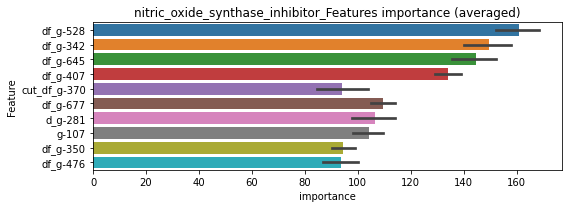

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000365245	valid_1's binary_logloss: 0.00383831


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000375888	valid_1's binary_logloss: 0.001245


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000377762	valid_1's binary_logloss: 0.000873342


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000378558	valid_1's binary_logloss: 0.00165473


nitric_oxide_synthase_inhibitor logloss: 0.0019031356332312045
norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3287
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000183581	valid_1's binary_logloss: 0.00165967
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000189225	valid_1's binary_logloss: 0.0027749
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000183492	valid_1's binary_logloss: 0.000233643
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0006083, Threshold: 0.0028739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0028739, conf_0:0.00201, conf_1:0.00374
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0328739
threshold: 0.0328739, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000185383	valid_1's binary_logloss: 0.000247557


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000178023	valid_1's binary_logloss: 0.00184632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000173817	valid_1's binary_logloss: 0.00221922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000174916	valid_1's binary_logloss: 0.00018795
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404424, Threshold: 0.0328739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0065294 Vs.target_rate: 0.00029
Num_p_label: 26.0, Expected: 1.2, Threshold: 0.0328739, conf_0:0.02630, conf_1:0.03945
Num_p_label: 14.0, Expected: 1.2, Adj_threshold_1: 0.0628739
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_2: 0.0928739
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_3: 0.1228739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_4: 0.1528739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_5: 0.1828739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_6: 0.2128739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_7: 0.2428739
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_8: 0.2728739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_9: 0.3028739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_10: 0.3328739


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000173793	valid_1's binary_logloss: 0.000192546


threshold: 0.3328739, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000178023	valid_1's binary_logloss: 0.00184632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000173817	valid_1's binary_logloss: 0.00221922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000174916	valid_1's binary_logloss: 0.00018795
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404424, Threshold: 0.3328739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.3328739, conf_0:0.29959, conf_1:0.36616
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.3628739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.3928739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.4228739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_4: 0.4528739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.4828739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_6: 0.5128739
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_7: 0.5428739


Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000173793	valid_1's binary_logloss: 0.000192546


threshold: 0.5428739, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


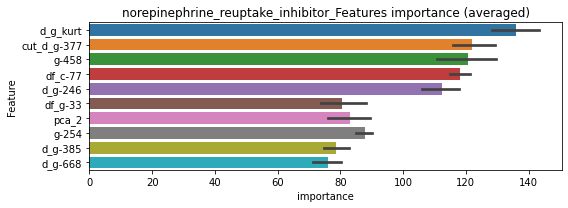

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000175389	valid_1's binary_logloss: 0.00112995
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000173705	valid_1's binary_logloss: 0.000907615
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000176274	valid_1's binary_logloss: 0.00019176
Training until validation scores don't improve for 30 rounds


norepinephrine_reuptake_inhibitor logloss: 0.0006102428983813548


Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000175781	valid_1's binary_logloss: 0.000210898


nrf2_activator, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000273712	valid_1's binary_logloss: 0.00280958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000268375	valid_1's binary_logloss: 0.00343378
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000271747	valid_1's binary_logloss: 0.00042958
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013650, Threshold: 0.0046269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0046269, conf_0:0.00324, conf_1:0.00602
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0346269


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000269443	valid_1's binary_logloss: 0.000814483


threshold: 0.0346269, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000259538	valid_1's binary_logloss: 0.00180927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000263679	valid_1's binary_logloss: 0.00446534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000260748	valid_1's binary_logloss: 0.000322734
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169746, Threshold: 0.0346269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0346269, conf_0:0.02770, conf_1:0.04155
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0646269


Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000256749	valid_1's binary_logloss: 0.000793731


threshold: 0.0646269, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000259538	valid_1's binary_logloss: 0.00180927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000263679	valid_1's binary_logloss: 0.00446534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000260748	valid_1's binary_logloss: 0.000322734
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169746, Threshold: 0.0646269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0646269, conf_0:0.05816, conf_1:0.07109


Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000256749	valid_1's binary_logloss: 0.000793731


threshold: 0.0646269, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


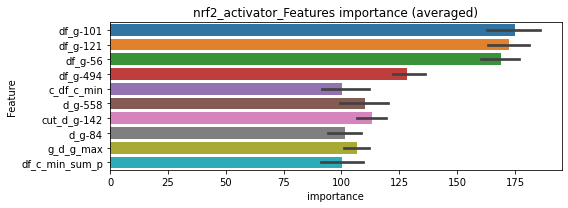

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000264543	valid_1's binary_logloss: 0.00195156


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000263253	valid_1's binary_logloss: 0.00322893


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000262513	valid_1's binary_logloss: 0.000350771
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000261284	valid_1's binary_logloss: 0.0003492


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000260312	valid_1's binary_logloss: 0.000646148
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.00025874	valid_1's binary_logloss: 0.000644097


nrf2_activator logloss: 0.0015434483675017675
opioid_receptor_agonist, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0724897	valid_1's binary_logloss: 0.10904
[2000]	training's binary_logloss: 0.0382179	valid_1's binary_logloss: 0.075743
[3000]	training's binary_logloss: 0.0255231	valid_1's binary_logloss: 0.0625664
[4000]	training's binary_logloss: 0.019046	valid_1's binary_logloss: 0.0558428
[5000]	training's binary_logloss: 0.0151451	valid_1's binary_logloss: 0.0516411
[6000]	training's binary_logloss: 0.0125292	valid_1's binary_logloss: 0.0484326
Early stopping, best iteration is:
[6283]	training's binary_logloss: 0.0119691	valid_1's binary_logloss: 0.0477653
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0737114	valid_1's binary_logloss: 0.104663
[2000]	training's binary_logloss: 0.0390305	valid_1's binary_logloss: 0.0700429
[3000]	training's binary_logloss: 0.0259672	valid_1's binary_logloss: 0.0571661
[4000]	training's binary_logloss: 0.0193646	vali

1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0386747, Threshold: 0.0777015, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0777015, conf_0:0.05439, conf_1:0.10101
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_1: 0.1077015
threshold: 0.1077015, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0721515	valid_1's binary_logloss: 0.103477
[2000]	training's binary_logloss: 0.037375	valid_1's binary_logloss: 0.0683851
[3000]	training's binary_logloss: 0.02484	valid_1's binary_logloss: 0.0551878
[4000]	training's binary_logloss: 0.0184864	valid_1's binary_logloss: 0.0486003
[5000]	training's binary_logloss: 0.0146915	valid_1's binary_logloss: 0.0442276
[6000]	training's binary_logloss: 0.0121772	valid_1's binary_logloss: 0.0413174
[7000]	training's binary_logloss: 0.0104394	valid_1's binary_logloss: 0.0394657
Early stopping, best iteration is:
[7060]	training's binary_logloss: 0.010346	valid_1's binary_logloss: 0.0392893
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0697667	valid_1's binary_logloss: 0.116519
[2000]	training's binary_logloss: 0.0361285	valid_1's binary_logloss: 0.0841178
[3000]	training's binary_logloss: 0.0239381	valid

2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0802365, Threshold: 0.1077015, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 640.0/3772
p_label_rate: 0.0193370 Vs.target_rate: 0.00256
Num_p_label: 77.0, Expected: 10.2, Threshold: 0.1077015, conf_0:0.08616, conf_1:0.12924
Num_p_label: 50.0, Expected: 10.2, Adj_threshold_1: 0.1377015
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_2: 0.1677015
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_3: 0.1977015
threshold: 0.1977015, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 640.0/3772, y_label_rate: 0.1696713
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0664437	valid_1's binary_logloss: 0.0979157
[2000]	training's binary_logloss: 0.0341464	valid_1's binary_logloss: 0.0637592
[3000]	training's binary_logloss: 0.0226657	valid_1's binary_logloss: 0.0510534
[4000]	training's binary_logloss: 0.0168946	valid_1's binary_logloss: 0.0445307
[5000]	training's binary_logloss: 0.0134206	valid_1's binary_logloss: 0.0402963
[6000]	training's binary_logloss: 0.0111584	valid_1's binary_logloss: 0.0374821
Early stopping, best iteration is:
[6653]	training's binary_logloss: 0.0100598	valid_1's binary_logloss: 0.036063
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0672337	valid_1's binary_logloss: 0.0994073
[2000]	training's binary_logloss: 0.0344203	valid_1's binary_logloss: 0.0669589
[3000]	training's binary_logloss: 0.0228207	valid_1's binary_logloss: 0.0545134
[4000]	training's binary_logloss: 0.0170854	

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0831743, Threshold: 0.1977015, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 633.0/3758
p_label_rate: 0.0102963 Vs.target_rate: 0.00256
Num_p_label: 41.0, Expected: 10.2, Threshold: 0.1977015, conf_0:0.17793, conf_1:0.21747
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_1: 0.2277015
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_2: 0.2577015
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_3: 0.2877015
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_4: 0.3177015
threshold: 0.3177015, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 633.0/3758, y_label_rate: 0.1684407


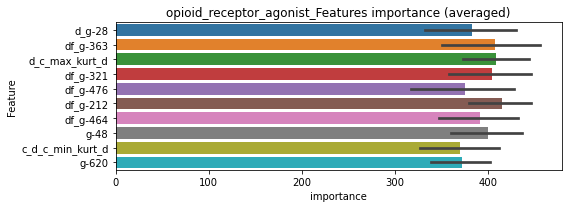

len(train_index) : 2818
len(valid_index) : 940
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0925705	valid_1's binary_logloss: 0.121557
[2000]	training's binary_logloss: 0.0483692	valid_1's binary_logloss: 0.0757519
[3000]	training's binary_logloss: 0.0322491	valid_1's binary_logloss: 0.0587862
[4000]	training's binary_logloss: 0.0240357	valid_1's binary_logloss: 0.0497338
[5000]	training's binary_logloss: 0.0191831	valid_1's binary_logloss: 0.0440238
[6000]	training's binary_logloss: 0.0159633	valid_1's binary_logloss: 0.0402268
[7000]	training's binary_logloss: 0.0137305	valid_1's binary_logloss: 0.037538
[8000]	training's binary_logloss: 0.0120296	valid_1's binary_logloss: 0.0353596
[9000]	training's binary_logloss: 0.0107027	valid_1's binary_logloss: 0.0336908
[10000]	training's binary_logloss: 0.00967344	valid_1's binary_logloss: 0.0324708
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00967344	valid_1's binary_logloss: 0.0324708


len(train_index) : 2818
len(valid_index) : 940
================================= fold 2/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0941385	valid_1's binary_logloss: 0.125948
[2000]	training's binary_logloss: 0.0495823	valid_1's binary_logloss: 0.0783479
[3000]	training's binary_logloss: 0.0332712	valid_1's binary_logloss: 0.0592259
[4000]	training's binary_logloss: 0.0248441	valid_1's binary_logloss: 0.0493227
[5000]	training's binary_logloss: 0.0197996	valid_1's binary_logloss: 0.0432034
[6000]	training's binary_logloss: 0.0164934	valid_1's binary_logloss: 0.0390524
[7000]	training's binary_logloss: 0.0141498	valid_1's binary_logloss: 0.0362579
[8000]	training's binary_logloss: 0.012367	valid_1's binary_logloss: 0.03395
[9000]	training's binary_logloss: 0.0109983	valid_1's binary_logloss: 0.0321527
[10000]	training's binary_logloss: 0.00993944	valid_1's binary_logloss: 0.0307623
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00993944	valid_1's binary_logloss: 0.0307623


len(train_index) : 2819
len(valid_index) : 939
================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0926805	valid_1's binary_logloss: 0.126134
[2000]	training's binary_logloss: 0.048733	valid_1's binary_logloss: 0.0775172
[3000]	training's binary_logloss: 0.0326283	valid_1's binary_logloss: 0.0582839
[4000]	training's binary_logloss: 0.0244393	valid_1's binary_logloss: 0.0480072
[5000]	training's binary_logloss: 0.0194384	valid_1's binary_logloss: 0.0417009
[6000]	training's binary_logloss: 0.0162054	valid_1's binary_logloss: 0.0374994
[7000]	training's binary_logloss: 0.0139169	valid_1's binary_logloss: 0.0345452
[8000]	training's binary_logloss: 0.0121588	valid_1's binary_logloss: 0.0321423
[9000]	training's binary_logloss: 0.0108197	valid_1's binary_logloss: 0.0303265
[10000]	training's binary_logloss: 0.00975491	valid_1's binary_logloss: 0.0287844
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00975491	valid_1's binary_logloss: 0.0287844


len(train_index) : 2819
len(valid_index) : 939
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0937246	valid_1's binary_logloss: 0.11638
[2000]	training's binary_logloss: 0.0489455	valid_1's binary_logloss: 0.0724428
[3000]	training's binary_logloss: 0.0329749	valid_1's binary_logloss: 0.0557404
[4000]	training's binary_logloss: 0.0246397	valid_1's binary_logloss: 0.0467016
[5000]	training's binary_logloss: 0.019648	valid_1's binary_logloss: 0.0414003
[6000]	training's binary_logloss: 0.0163615	valid_1's binary_logloss: 0.0377709
[7000]	training's binary_logloss: 0.0140075	valid_1's binary_logloss: 0.0352349
[8000]	training's binary_logloss: 0.0122667	valid_1's binary_logloss: 0.0331946
Early stopping, best iteration is:
[8777]	training's binary_logloss: 0.0111912	valid_1's binary_logloss: 0.031914


opioid_receptor_agonist logloss: 0.030983211820448994
opioid_receptor_agonist is unpredictable(><)!
opioid_receptor_antagonist, len(trt): 96, len(othr): 3278
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3278


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0649419	valid_1's binary_logloss: 0.122263
Early stopping, best iteration is:
[1501]	training's binary_logloss: 0.0478413	valid_1's binary_logloss: 0.11497
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0678972	valid_1's binary_logloss: 0.112429
[2000]	training's binary_logloss: 0.0390364	valid_1's binary_logloss: 0.100669
Early stopping, best iteration is:
[1999]	training's binary_logloss: 0.0390581	valid_1's binary_logloss: 0.100649
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0700665	valid_1's binary_logloss: 0.0931223
[2000]	training's binary_logloss: 0.0400047	valid_1's binary_logloss: 0.0801954
[3000]	training's binary_logloss: 0.0267258	valid_1's binary_logloss: 0.075593
Early stopping, best iteration is:
[3622]	training's binary_logloss: 0.0219044	valid_1's binary_logloss: 0.0740761

1 / 3, AUC score:0.979, PR-AUC:0.959
y_Threshold: 0.0529443, Threshold: 0.1195739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 218 → Positive_corect_labels: 612/3715
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1195739, conf_0:0.08370, conf_1:0.15545
Num_p_label: 26.0, Expected: 16.1, Adj_threshold_1: 0.1495739
Num_p_label: 10.0, Expected: 16.1, Adj_threshold_2: 0.1795739
threshold: 0.1795739, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 612.0/3715, y_label_rate: 0.1647376
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0478984	valid_1's binary_logloss: 0.0689484
[2000]	training's binary_logloss: 0.0268256	valid_1's binary_logloss: 0.0543841
[3000]	training's binary_logloss: 0.0181114	valid_1's binary_logloss: 0.0495299
Early stopping, best iteration is:
[3953]	training's binary_logloss: 0.0136975	valid_1's binary_logloss: 0.0470306
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0429319	valid_1's binary_logloss: 0.0920128
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.0248844	valid_1's binary_logloss: 0.0832299
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0471964	valid_1's binary_logloss: 0.0652872
[2000]	training's binary_logloss: 0.0263324	valid_1's binary_logloss: 0.051816
[3000]	training's binary_logloss: 0.017749	valid_1's binary_logloss: 0.0465334
Early stopping, best iteratio

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0655804, Threshold: 0.1795739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 580.0/3651
p_label_rate: 0.0226017 Vs.target_rate: 0.00403
Num_p_label: 90.0, Expected: 16.1, Threshold: 0.1795739, conf_0:0.14366, conf_1:0.21549
Num_p_label: 86.0, Expected: 16.1, Adj_threshold_1: 0.2095739
Num_p_label: 74.0, Expected: 16.1, Adj_threshold_2: 0.2395739
Num_p_label: 57.0, Expected: 16.1, Adj_threshold_3: 0.2695739
Num_p_label: 48.0, Expected: 16.1, Adj_threshold_4: 0.2995739
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_5: 0.3295739
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_6: 0.3595739
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_7: 0.3895739
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_8: 0.4195739
threshold: 0.4195739, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 580.0/3651, y_label_rate: 0.1588606
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0312119	valid_1's binary_logloss: 0.0448028
[2000]	training's binary_logloss: 0.0166359	valid_1's binary_logloss: 0.0317742
[3000]	training's binary_logloss: 0.0113813	valid_1's binary_logloss: 0.0276437
[4000]	training's binary_logloss: 0.008586	valid_1's binary_logloss: 0.0257202
[5000]	training's binary_logloss: 0.00690902	valid_1's binary_logloss: 0.024613
Early stopping, best iteration is:
[5382]	training's binary_logloss: 0.00643024	valid_1's binary_logloss: 0.0242986
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0282828	valid_1's binary_logloss: 0.0532217
[2000]	training's binary_logloss: 0.014846	valid_1's binary_logloss: 0.0415862
[3000]	training's binary_logloss: 0.0101975	valid_1's binary_logloss: 0.0383811
Early stopping, best iteration is:
[3454]	training's binary_logloss: 0.00892159	valid_1's binary_logloss: 0.0375602
Training

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0652273, Threshold: 0.4195739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 568.0/3627
p_label_rate: 0.0133099 Vs.target_rate: 0.00403
Num_p_label: 53.0, Expected: 16.1, Threshold: 0.4195739, conf_0:0.37762, conf_1:0.46153
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_1: 0.4495739
Num_p_label: 41.0, Expected: 16.1, Adj_threshold_2: 0.4795739
Num_p_label: 38.0, Expected: 16.1, Adj_threshold_3: 0.5095739
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_4: 0.5395739
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_5: 0.5695739
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_6: 0.5995739
threshold: 0.5995739, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 568.0/3627, y_label_rate: 0.1566033


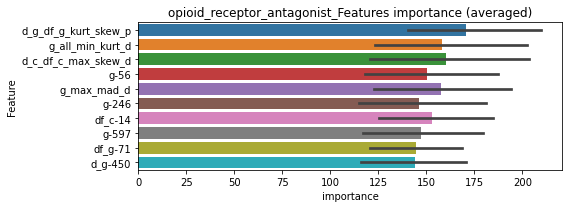

len(train_index) : 2720
len(valid_index) : 907
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0349551	valid_1's binary_logloss: 0.0443342
[2000]	training's binary_logloss: 0.0173466	valid_1's binary_logloss: 0.025923
[3000]	training's binary_logloss: 0.0116732	valid_1's binary_logloss: 0.0199577
[4000]	training's binary_logloss: 0.00886446	valid_1's binary_logloss: 0.0170966
[5000]	training's binary_logloss: 0.00715166	valid_1's binary_logloss: 0.0153891
[6000]	training's binary_logloss: 0.00603012	valid_1's binary_logloss: 0.0142594
[7000]	training's binary_logloss: 0.00521348	valid_1's binary_logloss: 0.0135004
[8000]	training's binary_logloss: 0.00461033	valid_1's binary_logloss: 0.0129388
[9000]	training's binary_logloss: 0.00413701	valid_1's binary_logloss: 0.0125007
[10000]	training's binary_logloss: 0.0037429	valid_1's binary_logloss: 0.0121734
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0037429	valid_1's binary_logloss: 0.0121734


len(train_index) : 2720
len(valid_index) : 907
================================= fold 2/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0349059	valid_1's binary_logloss: 0.0484962
[2000]	training's binary_logloss: 0.0173321	valid_1's binary_logloss: 0.0292218
[3000]	training's binary_logloss: 0.0116759	valid_1's binary_logloss: 0.0227783
[4000]	training's binary_logloss: 0.00887145	valid_1's binary_logloss: 0.0196552
[5000]	training's binary_logloss: 0.00716636	valid_1's binary_logloss: 0.017814
[6000]	training's binary_logloss: 0.00603599	valid_1's binary_logloss: 0.0164742
[7000]	training's binary_logloss: 0.00521563	valid_1's binary_logloss: 0.0156235
[8000]	training's binary_logloss: 0.00461712	valid_1's binary_logloss: 0.0149144
[9000]	training's binary_logloss: 0.00413766	valid_1's binary_logloss: 0.0143781
[10000]	training's binary_logloss: 0.00375259	valid_1's binary_logloss: 0.0140274
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00375259	valid_1's binary_logloss: 0.0140274


len(train_index) : 2720
len(valid_index) : 907
================================= fold 3/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0359107	valid_1's binary_logloss: 0.0421424
[2000]	training's binary_logloss: 0.0181444	valid_1's binary_logloss: 0.0230377
[3000]	training's binary_logloss: 0.0122667	valid_1's binary_logloss: 0.016794
[4000]	training's binary_logloss: 0.00936508	valid_1's binary_logloss: 0.013738
[5000]	training's binary_logloss: 0.00755909	valid_1's binary_logloss: 0.0118131
[6000]	training's binary_logloss: 0.00637894	valid_1's binary_logloss: 0.0105774
[7000]	training's binary_logloss: 0.0055223	valid_1's binary_logloss: 0.00968488
[8000]	training's binary_logloss: 0.00488296	valid_1's binary_logloss: 0.00900317
[9000]	training's binary_logloss: 0.0043763	valid_1's binary_logloss: 0.00848558
[10000]	training's binary_logloss: 0.00396036	valid_1's binary_logloss: 0.00806035
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00396036	valid_1's binary_logloss: 0.00806035


len(train_index) : 2721
len(valid_index) : 906
================================= fold 4/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0353224	valid_1's binary_logloss: 0.048592
[2000]	training's binary_logloss: 0.0176072	valid_1's binary_logloss: 0.0292965
[3000]	training's binary_logloss: 0.0118967	valid_1's binary_logloss: 0.0231563
[4000]	training's binary_logloss: 0.0090514	valid_1's binary_logloss: 0.0201493
[5000]	training's binary_logloss: 0.00728723	valid_1's binary_logloss: 0.0183356
[6000]	training's binary_logloss: 0.00614744	valid_1's binary_logloss: 0.0171217
[7000]	training's binary_logloss: 0.00531734	valid_1's binary_logloss: 0.0162847
[8000]	training's binary_logloss: 0.00470112	valid_1's binary_logloss: 0.0156575
[9000]	training's binary_logloss: 0.00421415	valid_1's binary_logloss: 0.0151068
[10000]	training's binary_logloss: 0.00381425	valid_1's binary_logloss: 0.0147454
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00381425	valid_1's binary_logloss: 0.0147454


opioid_receptor_antagonist logloss: 0.012250959115016993
orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000408515	valid_1's binary_logloss: 0.00948051
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000441188	valid_1's binary_logloss: 0.0078803
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000433062	valid_1's binary_logloss: 0.00288825
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000419533	valid_1's binary_logloss: 0.00227722


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027897, Threshold: 0.0066891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0066891, conf_0:0.00468, conf_1:0.00870
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_1: 0.0366891
threshold: 0.0366891, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000494881	valid_1's binary_logloss: 0.00874233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000402403	valid_1's binary_logloss: 0.00824055
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000409785	valid_1's binary_logloss: 0.00246935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000413105	valid_1's binary_logloss: 0.00246909


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0305795, Threshold: 0.0366891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.0366891, conf_0:0.02935, conf_1:0.04403
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_1: 0.0666891
threshold: 0.0666891, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000494881	valid_1's binary_logloss: 0.00874233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000402403	valid_1's binary_logloss: 0.00824055
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000409785	valid_1's binary_logloss: 0.00246935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000413105	valid_1's binary_logloss: 0.00246909


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0305795, Threshold: 0.0666891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00155
Num_p_label: 7.0, Expected: 6.2, Threshold: 0.0666891, conf_0:0.06002, conf_1:0.07336
threshold: 0.0666891, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


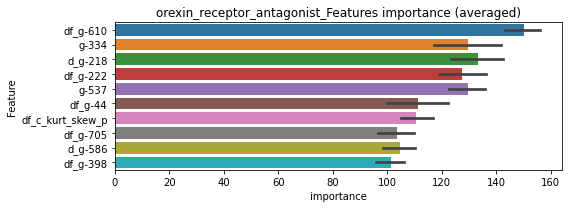

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000412459	valid_1's binary_logloss: 0.00922194


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000460688	valid_1's binary_logloss: 0.00932318


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000411706	valid_1's binary_logloss: 0.00191076
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000412087	valid_1's binary_logloss: 0.00191051


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000418161	valid_1's binary_logloss: 0.00222634


orexin_receptor_antagonist logloss: 0.00567151561983485
p38_mapk_inhibitor, len(trt): 62, len(othr): 3286
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000661168	valid_1's binary_logloss: 0.0172723
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000660016	valid_1's binary_logloss: 0.0173125
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000757567	valid_1's binary_logloss: 0.0125423
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000558277	valid_1's binary_logloss: 0.018688


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0062367, Threshold: 0.0339920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 655/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0339920, conf_0:0.02379, conf_1:0.04419
Num_p_label: 22.0, Expected: 10.4, Adj_threshold_1: 0.0639920
Num_p_label: 14.0, Expected: 10.4, Adj_threshold_2: 0.0939920
threshold: 0.0939920, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000545868	valid_1's binary_logloss: 0.0130716
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000592322	valid_1's binary_logloss: 0.0127144
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000557617	valid_1's binary_logloss: 0.0121288
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000588611	valid_1's binary_logloss: 0.0125816


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297218, Threshold: 0.0939920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3803
p_label_rate: 0.0052737 Vs.target_rate: 0.00260
Num_p_label: 21.0, Expected: 10.4, Threshold: 0.0939920, conf_0:0.07519, conf_1:0.11279
Num_p_label: 16.0, Expected: 10.4, Adj_threshold_1: 0.1239920
Num_p_label: 10.0, Expected: 10.4, Adj_threshold_2: 0.1539920
threshold: 0.1539920, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3803, y_label_rate: 0.1717065
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000538424	valid_1's binary_logloss: 0.0105619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000562716	valid_1's binary_logloss: 0.010794
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000544013	valid_1's binary_logloss: 0.010336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000514079	valid_1's binary_logloss: 0.0188376


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268616, Threshold: 0.1539920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00260
Num_p_label: 12.0, Expected: 10.4, Threshold: 0.1539920, conf_0:0.13859, conf_1:0.16939
threshold: 0.1539920, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3801, y_label_rate: 0.1715338


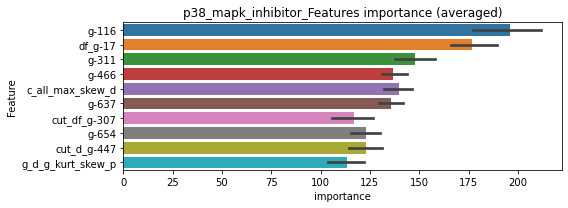

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000562907	valid_1's binary_logloss: 0.0125553


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000554614	valid_1's binary_logloss: 0.00869059


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000552854	valid_1's binary_logloss: 0.00892016


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


p38_mapk_inhibitor logloss: 0.013393753904444979


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.0010987	valid_1's binary_logloss: 0.0234099


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000324215	valid_1's binary_logloss: 0.00118327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000329664	valid_1's binary_logloss: 0.00702921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00033583	valid_1's binary_logloss: 0.000762062
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019519, Threshold: 0.0123772, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000329045	valid_1's binary_logloss: 0.00102209


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0123772, conf_0:0.00866, conf_1:0.01609
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.0423772
threshold: 0.0423772, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000320169	valid_1's binary_logloss: 0.0011892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000317473	valid_1's binary_logloss: 0.00837781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000317551	valid_1's binary_logloss: 0.000713356
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0092413, Threshold: 0.0423772, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000320051	valid_1's binary_logloss: 0.0011166


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, Expected: 4.0, Threshold: 0.0423772, conf_0:0.03390, conf_1:0.05085
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_1: 0.0723772
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.1023772
threshold: 0.1023772, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000320169	valid_1's binary_logloss: 0.0011892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000317473	valid_1's binary_logloss: 0.00837781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000317551	valid_1's binary_logloss: 0.000713356
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0092413, Threshold: 0.1023772, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000320051	valid_1's binary_logloss: 0.0011166


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.1023772, conf_0:0.09214, conf_1:0.11261
threshold: 0.1023772, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


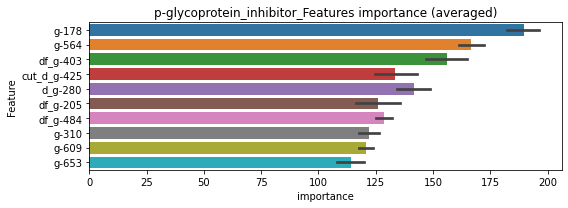

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000317229	valid_1's binary_logloss: 0.000876293
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.00031723	valid_1's binary_logloss: 0.000876292


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000323705	valid_1's binary_logloss: 0.00420855


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000315198	valid_1's binary_logloss: 0.000781709
Early stopping, best iteration is:
[1063]	training's binary_logloss: 0.000312716	valid_1's binary_logloss: 0.000776804


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000314982	valid_1's binary_logloss: 0.00122335
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000314562	valid_1's binary_logloss: 0.00122157


p-glycoprotein_inhibitor logloss: 0.0017711761987129846
parp_inhibitor, len(trt): 61, len(othr): 3283
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000715869	valid_1's binary_logloss: 0.0350298
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000577873	valid_1's binary_logloss: 0.011486
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00078412	valid_1's binary_logloss: 0.0106256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000576922	valid_1's binary_logloss: 0.0116081


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054800, Threshold: 0.0164058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0164058, conf_0:0.01148, conf_1:0.02133
Num_p_label: 8.0, Expected: 10.2, Adj_threshold_1: 0.0464058
threshold: 0.0464058, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000585599	valid_1's binary_logloss: 0.0108777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000536579	valid_1's binary_logloss: 0.0132389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000586444	valid_1's binary_logloss: 0.00652355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000563155	valid_1's binary_logloss: 0.0156146


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0523554, Threshold: 0.0464058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0105475 Vs.target_rate: 0.00256
Num_p_label: 42.0, Expected: 10.2, Threshold: 0.0464058, conf_0:0.03712, conf_1:0.05569
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_1: 0.0764058
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_2: 0.1064058
threshold: 0.1064058, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.00053446	valid_1's binary_logloss: 0.0185102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000678772	valid_1's binary_logloss: 0.0210196
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000541237	valid_1's binary_logloss: 0.00700009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000540321	valid_1's binary_logloss: 0.013672


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0334663, Threshold: 0.1064058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0040181 Vs.target_rate: 0.00256
Num_p_label: 16.0, Expected: 10.2, Threshold: 0.1064058, conf_0:0.09577, conf_1:0.11705
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_1: 0.1364058
threshold: 0.1364058, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


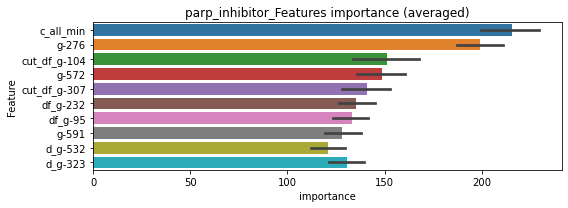

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000648383	valid_1's binary_logloss: 0.0111786


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000585885	valid_1's binary_logloss: 0.0137581


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000579447	valid_1's binary_logloss: 0.00622018


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000687076	valid_1's binary_logloss: 0.0163359


parp_inhibitor logloss: 0.011872014672635873


mutually exclusive columns: pdgfr_inhibitor


pdgfr_inhibitor, len(trt): 297, len(othr): 7157
target_rate: 0.0124717 → Adj_target_rate: 0.0106179


selected negative label: 7157


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0829214	valid_1's binary_logloss: 0.142322
[2000]	training's binary_logloss: 0.0458984	valid_1's binary_logloss: 0.129811
Early stopping, best iteration is:
[2320]	training's binary_logloss: 0.0395737	valid_1's binary_logloss: 0.127199
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0830144	valid_1's binary_logloss: 0.142289
[2000]	training's binary_logloss: 0.0458588	valid_1's binary_logloss: 0.129841
Early stopping, best iteration is:
[1999]	training's binary_logloss: 0.0458753	valid_1's binary_logloss: 0.129812
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0819396	valid_1's binary_logloss: 0.148345
[2000]	training's binary_logloss: 0.0452971	valid_1's binary_logloss: 0.136402
Early stopping, best iteration is:
[2311]	training's binary_logloss: 0.039074	valid_1's binary_logloss: 0.134672
Tr

1 / 3, AUC score:0.965, PR-AUC:0.937
y_Threshold: 0.0673199, Threshold: 0.1042957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 559 → Positive_corect_labels: 1295/8029
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, Expected: 49.7, Threshold: 0.1042957, conf_0:0.07301, conf_1:0.13558
threshold: 0.1042957, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1295.0/8029, y_label_rate: 0.1612903
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0567727	valid_1's binary_logloss: 0.0993118
[2000]	training's binary_logloss: 0.030351	valid_1's binary_logloss: 0.084565
Early stopping, best iteration is:
[2744]	training's binary_logloss: 0.0219901	valid_1's binary_logloss: 0.0802825
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0570901	valid_1's binary_logloss: 0.0941544
[2000]	training's binary_logloss: 0.0305004	valid_1's binary_logloss: 0.0767501
Early stopping, best iteration is:
[2550]	training's binary_logloss: 0.0237966	valid_1's binary_logloss: 0.0727901
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0573999	valid_1's binary_logloss: 0.0955608
[2000]	training's binary_logloss: 0.030881	valid_1's binary_logloss: 0.0800104
Early stopping, best iteration is:
[2873]	training's binary_logloss: 0.0212615	valid_1's binary_logloss: 0.074

2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0657075, Threshold: 0.1042957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 118 → Positive_corect_labels: 1236.0/7911
p_label_rate: 0.0042692 Vs.target_rate: 0.01247
Num_p_label: 17.0, Expected: 49.7, Threshold: 0.1042957, conf_0:0.08344, conf_1:0.12515
threshold: 0.1042957, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 1236.0/7911, y_label_rate: 0.1562381
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0451889	valid_1's binary_logloss: 0.0820505
[2000]	training's binary_logloss: 0.0238695	valid_1's binary_logloss: 0.0675375
Early stopping, best iteration is:
[2810]	training's binary_logloss: 0.016875	valid_1's binary_logloss: 0.0633783
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0460425	valid_1's binary_logloss: 0.0745185
[2000]	training's binary_logloss: 0.0244123	valid_1's binary_logloss: 0.0591671
[3000]	training's binary_logloss: 0.0160351	valid_1's binary_logloss: 0.0537959
Early stopping, best iteration is:
[3325]	training's binary_logloss: 0.0143847	valid_1's binary_logloss: 0.0526727
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0467941	valid_1's binary_logloss: 0.0715235
[2000]	training's binary_logloss: 0.0248293	valid_1's binary_logloss: 0.0547695
[3000]	training's binary_log

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0539056, Threshold: 0.1042957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 1202.0/7843
p_label_rate: 0.0077850 Vs.target_rate: 0.01247
Num_p_label: 31.0, Expected: 49.7, Threshold: 0.1042957, conf_0:0.09387, conf_1:0.11473
threshold: 0.1042957, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 1202.0/7843, y_label_rate: 0.1532577


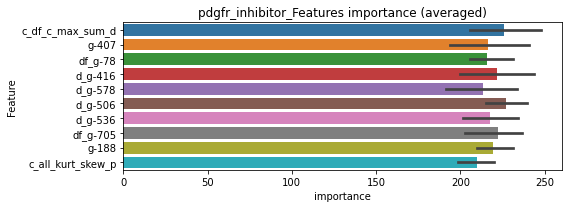

len(train_index) : 5882
len(valid_index) : 1961
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.053178	valid_1's binary_logloss: 0.0823534
[2000]	training's binary_logloss: 0.0284737	valid_1's binary_logloss: 0.059181
[3000]	training's binary_logloss: 0.0193057	valid_1's binary_logloss: 0.0516585
[4000]	training's binary_logloss: 0.0144203	valid_1's binary_logloss: 0.0478426
Early stopping, best iteration is:
[4806]	training's binary_logloss: 0.0119744	valid_1's binary_logloss: 0.0459292


len(train_index) : 5882
len(valid_index) : 1961
================================= fold 2/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0546533	valid_1's binary_logloss: 0.0771485
[2000]	training's binary_logloss: 0.0292866	valid_1's binary_logloss: 0.0536538
[3000]	training's binary_logloss: 0.0198891	valid_1's binary_logloss: 0.0460573
[4000]	training's binary_logloss: 0.0149214	valid_1's binary_logloss: 0.0423768
Early stopping, best iteration is:
[4297]	training's binary_logloss: 0.013894	valid_1's binary_logloss: 0.041612


len(train_index) : 5882
len(valid_index) : 1961
================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.054239	valid_1's binary_logloss: 0.0760199
[2000]	training's binary_logloss: 0.0290967	valid_1's binary_logloss: 0.052797
[3000]	training's binary_logloss: 0.019748	valid_1's binary_logloss: 0.0453791
[4000]	training's binary_logloss: 0.0148482	valid_1's binary_logloss: 0.0415651
Early stopping, best iteration is:
[4302]	training's binary_logloss: 0.0137929	valid_1's binary_logloss: 0.0408708


len(train_index) : 5883
len(valid_index) : 1960
================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0557975	valid_1's binary_logloss: 0.0725488
[2000]	training's binary_logloss: 0.0298495	valid_1's binary_logloss: 0.0492169
[3000]	training's binary_logloss: 0.0203214	valid_1's binary_logloss: 0.0416992
[4000]	training's binary_logloss: 0.0152546	valid_1's binary_logloss: 0.0377908
[5000]	training's binary_logloss: 0.0121759	valid_1's binary_logloss: 0.0354844
[6000]	training's binary_logloss: 0.0101395	valid_1's binary_logloss: 0.0340491
Early stopping, best iteration is:
[6864]	training's binary_logloss: 0.00882501	valid_1's binary_logloss: 0.0330513


pdgfr_inhibitor logloss: 0.040366730677466905
pdgfr_inhibitor is unpredictable(><)!
pdk_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000303859	valid_1's binary_logloss: 0.000878954
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000376626	valid_1's binary_logloss: 0.00416869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00030715	valid_1's binary_logloss: 0.00250519
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017407, Threshold: 0.0088878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0088878, conf_0:0.00622, conf_1:0.01155
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0388878


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000306272	valid_1's binary_logloss: 0.00117478


threshold: 0.0388878, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000295921	valid_1's binary_logloss: 0.000648199
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000295253	valid_1's binary_logloss: 0.00470603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000300263	valid_1's binary_logloss: 0.00280845
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233922, Threshold: 0.0388878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0070316 Vs.target_rate: 0.00076
Num_p_label: 28.0, Expected: 3.0, Threshold: 0.0388878, conf_0:0.03111, conf_1:0.04667
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0688878
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0988878
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1288878
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_4: 0.1588878


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000300998	valid_1's binary_logloss: 0.000791415


threshold: 0.1588878, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000295921	valid_1's binary_logloss: 0.000648199
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000295253	valid_1's binary_logloss: 0.00470603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000300263	valid_1's binary_logloss: 0.00280845
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233922, Threshold: 0.1588878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.1588878, conf_0:0.14300, conf_1:0.17478


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000300998	valid_1's binary_logloss: 0.000791415


threshold: 0.1588878, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


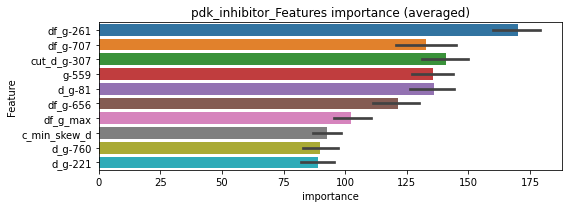

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000296469	valid_1's binary_logloss: 0.000619433


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[710]	training's binary_logloss: 0.00030566	valid_1's binary_logloss: 0.0035206
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000312411	valid_1's binary_logloss: 0.00214109
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00029581	valid_1's binary_logloss: 0.000770914


pdk_inhibitor logloss: 0.001762708310924686


mutually exclusive columns: phosphodiesterase_inhibitor


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 6907
target_rate: 0.0110859 → Adj_target_rate: 0.0096064


selected negative label: 6907


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0783215	valid_1's binary_logloss: 0.132882
Early stopping, best iteration is:
[1347]	training's binary_logloss: 0.0632853	valid_1's binary_logloss: 0.130008
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0763649	valid_1's binary_logloss: 0.142368
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.0617394	valid_1's binary_logloss: 0.140133
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.078389	valid_1's binary_logloss: 0.133018
Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.071176	valid_1's binary_logloss: 0.13159
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0800418	valid_1's binary_logloss: 0.13019
Early stopping, best iteration is:
[1537]	training's binary_logloss: 0.0577312	valid_1's binary_loglos

1 / 3, AUC score:0.948, PR-AUC:0.912
y_Threshold: 0.0671740, Threshold: 0.0946568, pos_neg_ratio: 0.8000000
Remove_noisy_data: 651 → Positive_corect_labels: 1194/7637
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, Expected: 44.1, Threshold: 0.0946568, conf_0:0.06626, conf_1:0.12305
threshold: 0.0946568, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1194.0/7637, y_label_rate: 0.1563441
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0342035	valid_1's binary_logloss: 0.0598608
[2000]	training's binary_logloss: 0.0188026	valid_1's binary_logloss: 0.0538409
Early stopping, best iteration is:
[2267]	training's binary_logloss: 0.0165809	valid_1's binary_logloss: 0.0531363
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0356749	valid_1's binary_logloss: 0.0551987
[2000]	training's binary_logloss: 0.0194873	valid_1's binary_logloss: 0.0479992
Early stopping, best iteration is:
[2817]	training's binary_logloss: 0.013652	valid_1's binary_logloss: 0.0462246
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0348655	valid_1's binary_logloss: 0.0574948
[2000]	training's binary_logloss: 0.0193101	valid_1's binary_logloss: 0.0508885
[3000]	training's binary_logloss: 0.0126464	valid_1's binary_logloss: 0.0486422
Early stopping, best iterati

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0380391, Threshold: 0.0946568, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 1150.0/7549
p_label_rate: 0.0000000 Vs.target_rate: 0.01109
Num_p_label: 0.0, Expected: 44.1, Threshold: 0.0946568, conf_0:0.07573, conf_1:0.11359
threshold: 0.0946568, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 1150.0/7549, y_label_rate: 0.1523381
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0234999	valid_1's binary_logloss: 0.0299941
[2000]	training's binary_logloss: 0.0130208	valid_1's binary_logloss: 0.0228687
[3000]	training's binary_logloss: 0.00869621	valid_1's binary_logloss: 0.0202258
[4000]	training's binary_logloss: 0.00641445	valid_1's binary_logloss: 0.0189115
Early stopping, best iteration is:
[4161]	training's binary_logloss: 0.00615164	valid_1's binary_logloss: 0.0187283
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0229377	valid_1's binary_logloss: 0.0326734
[2000]	training's binary_logloss: 0.0126675	valid_1's binary_logloss: 0.0260843
[3000]	training's binary_logloss: 0.00835713	valid_1's binary_logloss: 0.0236212
Early stopping, best iteration is:
[3573]	training's binary_logloss: 0.00696811	valid_1's binary_logloss: 0.022856
Training until validation scores don't improve for 30 rounds
[1000]	training's binar

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0286839, Threshold: 0.0946568, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 1133.0/7515
p_label_rate: 0.0000000 Vs.target_rate: 0.01109
Num_p_label: 0.0, Expected: 44.1, Threshold: 0.0946568, conf_0:0.08519, conf_1:0.10412
threshold: 0.0946568, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 1133.0/7515, y_label_rate: 0.1507651


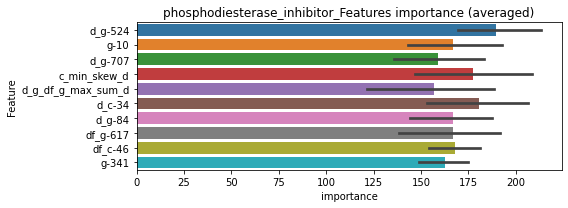

len(train_index) : 5636
len(valid_index) : 1879
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0251335	valid_1's binary_logloss: 0.0291819
[2000]	training's binary_logloss: 0.0137664	valid_1's binary_logloss: 0.0190623
[3000]	training's binary_logloss: 0.00958449	valid_1's binary_logloss: 0.0157053
[4000]	training's binary_logloss: 0.00734989	valid_1's binary_logloss: 0.0141583
[5000]	training's binary_logloss: 0.00591397	valid_1's binary_logloss: 0.013202
[6000]	training's binary_logloss: 0.00494428	valid_1's binary_logloss: 0.0125575
[7000]	training's binary_logloss: 0.00424012	valid_1's binary_logloss: 0.0121022
[8000]	training's binary_logloss: 0.00371498	valid_1's binary_logloss: 0.0117509
[9000]	training's binary_logloss: 0.00330562	valid_1's binary_logloss: 0.0115228
Early stopping, best iteration is:
[9284]	training's binary_logloss: 0.00320181	valid_1's binary_logloss: 0.0114559


len(train_index) : 5636
len(valid_index) : 1879
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0247788	valid_1's binary_logloss: 0.0314124
[2000]	training's binary_logloss: 0.0136232	valid_1's binary_logloss: 0.0205616
[3000]	training's binary_logloss: 0.00954766	valid_1's binary_logloss: 0.0169962
[4000]	training's binary_logloss: 0.00733117	valid_1's binary_logloss: 0.0153659
[5000]	training's binary_logloss: 0.00590157	valid_1's binary_logloss: 0.0143351
[6000]	training's binary_logloss: 0.00492705	valid_1's binary_logloss: 0.0136093
Early stopping, best iteration is:
[6799]	training's binary_logloss: 0.00434037	valid_1's binary_logloss: 0.0131892


len(train_index) : 5636
len(valid_index) : 1879
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239987	valid_1's binary_logloss: 0.0342397
[2000]	training's binary_logloss: 0.0129953	valid_1's binary_logloss: 0.0236624
[3000]	training's binary_logloss: 0.00910603	valid_1's binary_logloss: 0.0201416
[4000]	training's binary_logloss: 0.00701832	valid_1's binary_logloss: 0.0185325
[5000]	training's binary_logloss: 0.00566562	valid_1's binary_logloss: 0.0176183
[6000]	training's binary_logloss: 0.00475715	valid_1's binary_logloss: 0.0169547
[7000]	training's binary_logloss: 0.00407933	valid_1's binary_logloss: 0.0165329
[8000]	training's binary_logloss: 0.00357491	valid_1's binary_logloss: 0.0161615
Early stopping, best iteration is:
[8842]	training's binary_logloss: 0.00323937	valid_1's binary_logloss: 0.0159302


len(train_index) : 5637
len(valid_index) : 1878
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0252235	valid_1's binary_logloss: 0.0301658
[2000]	training's binary_logloss: 0.0139591	valid_1's binary_logloss: 0.0197684
[3000]	training's binary_logloss: 0.00972514	valid_1's binary_logloss: 0.0164614
[4000]	training's binary_logloss: 0.00744516	valid_1's binary_logloss: 0.0149073
[5000]	training's binary_logloss: 0.00597298	valid_1's binary_logloss: 0.0139954
[6000]	training's binary_logloss: 0.00498083	valid_1's binary_logloss: 0.013346
[7000]	training's binary_logloss: 0.00426292	valid_1's binary_logloss: 0.0128937
Early stopping, best iteration is:
[7242]	training's binary_logloss: 0.00411991	valid_1's binary_logloss: 0.0128134


phosphodiesterase_inhibitor logloss: 0.013347248786662415
phospholipase_inhibitor, len(trt): 25, len(othr): 3288
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000341788	valid_1's binary_logloss: 0.00455987
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000344932	valid_1's binary_logloss: 0.00613354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00036199	valid_1's binary_logloss: 0.00194627
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020529, Threshold: 0.0072677, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000349001	valid_1's binary_logloss: 0.00262725


Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0072677, conf_0:0.00509, conf_1:0.00945
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_1: 0.0372677
threshold: 0.0372677, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000356471	valid_1's binary_logloss: 0.00377306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335323	valid_1's binary_logloss: 0.00633129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353185	valid_1's binary_logloss: 0.00201513
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0332263, Threshold: 0.0372677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000337189	valid_1's binary_logloss: 0.00240913


p_label_rate: 0.0027624 Vs.target_rate: 0.00105
Num_p_label: 11.0, Expected: 4.2, Threshold: 0.0372677, conf_0:0.02981, conf_1:0.04472
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0672677
threshold: 0.0672677, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000356471	valid_1's binary_logloss: 0.00377306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335323	valid_1's binary_logloss: 0.00633129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353185	valid_1's binary_logloss: 0.00201513
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000337189	valid_1's binary_logloss: 0.00240913


y_Threshold: 0.0332263, Threshold: 0.0672677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, Expected: 4.2, Threshold: 0.0672677, conf_0:0.06054, conf_1:0.07399
threshold: 0.0672677, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


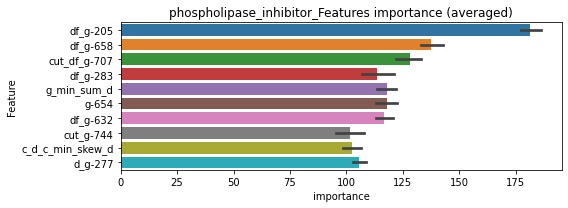

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000347908	valid_1's binary_logloss: 0.00275648


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000363413	valid_1's binary_logloss: 0.00455734


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000348799	valid_1's binary_logloss: 0.00159494


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000336658	valid_1's binary_logloss: 0.00218571


phospholipase_inhibitor logloss: 0.0027744707856874077


mutually exclusive columns: pi3k_inhibitor


pi3k_inhibitor, len(trt): 151, len(othr): 3714
target_rate: 0.0063408 → Adj_target_rate: 0.0059749


selected negative label: 3714


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0836276	valid_1's binary_logloss: 0.145062
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.0492186	valid_1's binary_logloss: 0.134183
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0803132	valid_1's binary_logloss: 0.162546
Early stopping, best iteration is:
[1557]	training's binary_logloss: 0.05662	valid_1's binary_logloss: 0.155954
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0847367	valid_1's binary_logloss: 0.135424
[2000]	training's binary_logloss: 0.0477079	valid_1's binary_logloss: 0.122586
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0407415	valid_1's binary_logloss: 0.120427
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0859982	valid_1's binary_logloss: 0.129987
Early stopping, best 

1 / 3, AUC score:0.965, PR-AUC:0.932
y_Threshold: 0.0695726, Threshold: 0.1007963, pos_neg_ratio: 0.8000000
Remove_noisy_data: 320 → Positive_corect_labels: 657/4136
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, Expected: 25.2, Threshold: 0.1007963, conf_0:0.07056, conf_1:0.13104
Num_p_label: 7.0, Expected: 25.2, Adj_threshold_1: 0.1307963
threshold: 0.1307963, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/4136, y_label_rate: 0.1588491
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0509266	valid_1's binary_logloss: 0.0866171
[2000]	training's binary_logloss: 0.0278093	valid_1's binary_logloss: 0.0715236
Early stopping, best iteration is:
[2905]	training's binary_logloss: 0.0192537	valid_1's binary_logloss: 0.066863
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0499253	valid_1's binary_logloss: 0.0927901
[2000]	training's binary_logloss: 0.0273697	valid_1's binary_logloss: 0.0810302
Early stopping, best iteration is:
[2279]	training's binary_logloss: 0.0241858	valid_1's binary_logloss: 0.0798099
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0545435	valid_1's binary_logloss: 0.0672819
[2000]	training's binary_logloss: 0.0296975	valid_1's binary_logloss: 0.051526
[3000]	training's binary_logloss: 0.0198322	valid_1's binary_logloss: 0.0460262
[4000]	training's binary_logl

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0569221, Threshold: 0.1307963, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 631.0/4084
p_label_rate: 0.0002511 Vs.target_rate: 0.00634
Num_p_label: 1.0, Expected: 25.2, Threshold: 0.1307963, conf_0:0.10464, conf_1:0.15696
threshold: 0.1307963, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 631.0/4084, y_label_rate: 0.1545054
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0397222	valid_1's binary_logloss: 0.0722151
[2000]	training's binary_logloss: 0.0212115	valid_1's binary_logloss: 0.0570047
Early stopping, best iteration is:
[2103]	training's binary_logloss: 0.0202395	valid_1's binary_logloss: 0.0562845
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0417294	valid_1's binary_logloss: 0.0586906
[2000]	training's binary_logloss: 0.02243	valid_1's binary_logloss: 0.0430803
[3000]	training's binary_logloss: 0.0150678	valid_1's binary_logloss: 0.037835
Early stopping, best iteration is:
[3960]	training's binary_logloss: 0.0113903	valid_1's binary_logloss: 0.0352612
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0423665	valid_1's binary_logloss: 0.0575834
[2000]	training's binary_logloss: 0.0228736	valid_1's binary_logloss: 0.0434892
[3000]	training's binary_loglo

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0449565, Threshold: 0.1307963, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 622.0/4066
p_label_rate: 0.0002511 Vs.target_rate: 0.00634
Num_p_label: 1.0, Expected: 25.2, Threshold: 0.1307963, conf_0:0.11772, conf_1:0.14388
threshold: 0.1307963, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 622.0/4066, y_label_rate: 0.1529759


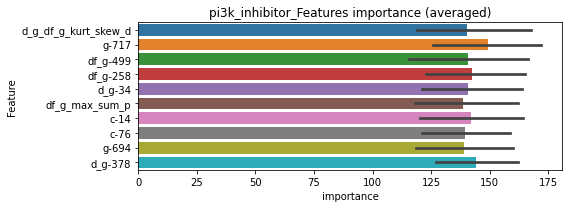

len(train_index) : 3049
len(valid_index) : 1017
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.053286	valid_1's binary_logloss: 0.070632
[2000]	training's binary_logloss: 0.0291372	valid_1's binary_logloss: 0.0488411
[3000]	training's binary_logloss: 0.0199298	valid_1's binary_logloss: 0.041522
[4000]	training's binary_logloss: 0.0151056	valid_1's binary_logloss: 0.0379917
[5000]	training's binary_logloss: 0.0121308	valid_1's binary_logloss: 0.0360869
[6000]	training's binary_logloss: 0.0101204	valid_1's binary_logloss: 0.034728
Early stopping, best iteration is:
[6862]	training's binary_logloss: 0.00881887	valid_1's binary_logloss: 0.0338478


len(train_index) : 3049
len(valid_index) : 1017
================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0490553	valid_1's binary_logloss: 0.0864154
[2000]	training's binary_logloss: 0.0259937	valid_1's binary_logloss: 0.0655087
[3000]	training's binary_logloss: 0.0178362	valid_1's binary_logloss: 0.0592756
Early stopping, best iteration is:
[3335]	training's binary_logloss: 0.0160893	valid_1's binary_logloss: 0.0580495


len(train_index) : 3050
len(valid_index) : 1016
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0541641	valid_1's binary_logloss: 0.0665935
[2000]	training's binary_logloss: 0.029525	valid_1's binary_logloss: 0.0435673
[3000]	training's binary_logloss: 0.0202839	valid_1's binary_logloss: 0.0356654
[4000]	training's binary_logloss: 0.0153882	valid_1's binary_logloss: 0.0316186
[5000]	training's binary_logloss: 0.0123337	valid_1's binary_logloss: 0.0291664
[6000]	training's binary_logloss: 0.0103101	valid_1's binary_logloss: 0.0274242
[7000]	training's binary_logloss: 0.00883501	valid_1's binary_logloss: 0.0262034
[8000]	training's binary_logloss: 0.00773284	valid_1's binary_logloss: 0.0252551
[9000]	training's binary_logloss: 0.00689133	valid_1's binary_logloss: 0.0245019
Early stopping, best iteration is:
[9093]	training's binary_logloss: 0.00682179	valid_1's binary_logloss: 0.0244465


len(train_index) : 3050
len(valid_index) : 1016
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0535503	valid_1's binary_logloss: 0.0677317
[2000]	training's binary_logloss: 0.0291915	valid_1's binary_logloss: 0.0444998
[3000]	training's binary_logloss: 0.0200452	valid_1's binary_logloss: 0.0370693
[4000]	training's binary_logloss: 0.0152216	valid_1's binary_logloss: 0.0334773
[5000]	training's binary_logloss: 0.0122183	valid_1's binary_logloss: 0.0312256
[6000]	training's binary_logloss: 0.0101989	valid_1's binary_logloss: 0.0296136
[7000]	training's binary_logloss: 0.00874466	valid_1's binary_logloss: 0.0284727
[8000]	training's binary_logloss: 0.00767282	valid_1's binary_logloss: 0.0275786
Early stopping, best iteration is:
[8151]	training's binary_logloss: 0.00753317	valid_1's binary_logloss: 0.0274224


pi3k_inhibitor logloss: 0.035946473135032415
pi3k_inhibitor is unpredictable(><)!
pkc_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000416481	valid_1's binary_logloss: 0.00431885
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000423025	valid_1's binary_logloss: 0.0048987
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000416862	valid_1's binary_logloss: 0.00126668
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000406063	valid_1's binary_logloss: 0.00688213


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023141, Threshold: 0.0076017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0076017, conf_0:0.00532, conf_1:0.00988
Num_p_label: 4.0, Expected: 5.2, Adj_threshold_1: 0.0376017
threshold: 0.0376017, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00040065	valid_1's binary_logloss: 0.00422108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00041316	valid_1's binary_logloss: 0.004194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000404503	valid_1's binary_logloss: 0.00110191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00590107


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292664, Threshold: 0.0376017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.0376017, conf_0:0.03008, conf_1:0.04512
threshold: 0.0376017, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00040065	valid_1's binary_logloss: 0.00422108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00041316	valid_1's binary_logloss: 0.004194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000404503	valid_1's binary_logloss: 0.00110191
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292664, Threshold: 0.0376017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00590107


p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.0376017, conf_0:0.03384, conf_1:0.04136
threshold: 0.0376017, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


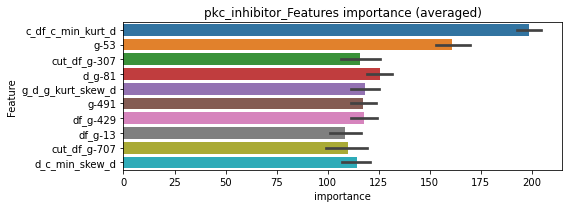

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000403586	valid_1's binary_logloss: 0.00419615


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000409293	valid_1's binary_logloss: 0.00447885


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000406051	valid_1's binary_logloss: 0.00101906


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000417528	valid_1's binary_logloss: 0.00457034


pkc_inhibitor logloss: 0.0035660991326001653
potassium_channel_activator, len(trt): 55, len(othr): 3279
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000591296	valid_1's binary_logloss: 0.0230529
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00056468	valid_1's binary_logloss: 0.00995056
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000684819	valid_1's binary_logloss: 0.0141656
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00113494	valid_1's binary_logloss: 0.0289167


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0052834, Threshold: 0.0231491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0231491, conf_0:0.01620, conf_1:0.03009
Num_p_label: 16.0, Expected: 9.2, Adj_threshold_1: 0.0531491
threshold: 0.0531491, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000596199	valid_1's binary_logloss: 0.0179022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000519621	valid_1's binary_logloss: 0.0146445
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000531024	valid_1's binary_logloss: 0.0150026
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0408890, Threshold: 0.0531491, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000879823	valid_1's binary_logloss: 0.0138202


Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0135610 Vs.target_rate: 0.00231
Num_p_label: 54.0, Expected: 9.2, Threshold: 0.0531491, conf_0:0.04252, conf_1:0.06378
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0831491
Num_p_label: 34.0, Expected: 9.2, Adj_threshold_2: 0.1131491
Num_p_label: 31.0, Expected: 9.2, Adj_threshold_3: 0.1431491
Num_p_label: 27.0, Expected: 9.2, Adj_threshold_4: 0.1731491
Num_p_label: 23.0, Expected: 9.2, Adj_threshold_5: 0.2031491
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_6: 0.2331491
threshold: 0.2331491, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000646138	valid_1's binary_logloss: 0.0126771
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00055593	valid_1's binary_logloss: 0.0176898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000614339	valid_1's binary_logloss: 0.0136931
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0396138, Threshold: 0.2331491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3784


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000801197	valid_1's binary_logloss: 0.0179518


p_label_rate: 0.0072828 Vs.target_rate: 0.00231
Num_p_label: 29.0, Expected: 9.2, Threshold: 0.2331491, conf_0:0.20983, conf_1:0.25646
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_1: 0.2631491
Num_p_label: 24.0, Expected: 9.2, Adj_threshold_2: 0.2931491
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_3: 0.3231491
threshold: 0.3231491, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 646.0/3784, y_label_rate: 0.1707188


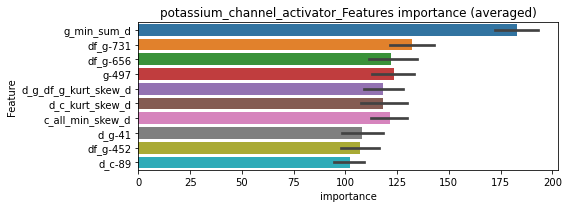

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000575052	valid_1's binary_logloss: 0.0184818


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000523504	valid_1's binary_logloss: 0.00553297


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000635876	valid_1's binary_logloss: 0.0110953


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000738781	valid_1's binary_logloss: 0.00905533


potassium_channel_activator logloss: 0.011042427989351754
potassium_channel_antagonist, len(trt): 98, len(othr): 3273
target_rate: 0.0041152 → Adj_target_rate: 0.0041375


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0648819	valid_1's binary_logloss: 0.122528
Early stopping, best iteration is:
[1466]	training's binary_logloss: 0.0488436	valid_1's binary_logloss: 0.116835
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0651681	valid_1's binary_logloss: 0.116137
[2000]	training's binary_logloss: 0.0371158	valid_1's binary_logloss: 0.107484
Early stopping, best iteration is:
[2091]	training's binary_logloss: 0.0355481	valid_1's binary_logloss: 0.107011
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0716174	valid_1's binary_logloss: 0.0878175
[2000]	training's binary_logloss: 0.0407388	valid_1's binary_logloss: 0.0743231
[3000]	training's binary_logloss: 0.0271697	valid_1's binary_logloss: 0.0698615
Early stopping, best iteration is:
[3071]	training's binary_logloss: 0.0264719	valid_1's binary_logloss: 0.06955

1 / 3, AUC score:0.980, PR-AUC:0.960
y_Threshold: 0.0523212, Threshold: 0.0786687, pos_neg_ratio: 0.8000000
Remove_noisy_data: 220 → Positive_corect_labels: 610/3707
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, Expected: 16.4, Threshold: 0.0786687, conf_0:0.05507, conf_1:0.10227
Num_p_label: 10.0, Expected: 16.4, Adj_threshold_1: 0.1086687
threshold: 0.1086687, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 610.0/3707, y_label_rate: 0.1645535
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0476191	valid_1's binary_logloss: 0.0681828
[2000]	training's binary_logloss: 0.0264275	valid_1's binary_logloss: 0.0561493
[3000]	training's binary_logloss: 0.0177526	valid_1's binary_logloss: 0.052182
Early stopping, best iteration is:
[3071]	training's binary_logloss: 0.0173165	valid_1's binary_logloss: 0.0519465
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0433999	valid_1's binary_logloss: 0.0870575
[2000]	training's binary_logloss: 0.0239663	valid_1's binary_logloss: 0.0777116
Early stopping, best iteration is:
[2007]	training's binary_logloss: 0.0238855	valid_1's binary_logloss: 0.0776112
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0470691	valid_1's binary_logloss: 0.0690209
[2000]	training's binary_logloss: 0.0261605	valid_1's binary_logloss: 0.0566786
[3000]	training's binary_log

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0438380, Threshold: 0.1086687, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 594.0/3675
p_label_rate: 0.0025113 Vs.target_rate: 0.00412
Num_p_label: 10.0, Expected: 16.4, Threshold: 0.1086687, conf_0:0.08693, conf_1:0.13040
threshold: 0.1086687, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 594.0/3675, y_label_rate: 0.1616327
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0388622	valid_1's binary_logloss: 0.062118
[2000]	training's binary_logloss: 0.0213391	valid_1's binary_logloss: 0.04958
[3000]	training's binary_logloss: 0.0143213	valid_1's binary_logloss: 0.0448586
Early stopping, best iteration is:
[3068]	training's binary_logloss: 0.0139863	valid_1's binary_logloss: 0.0446765
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0401827	valid_1's binary_logloss: 0.0522437
[2000]	training's binary_logloss: 0.022168	valid_1's binary_logloss: 0.0400515
[3000]	training's binary_logloss: 0.0149453	valid_1's binary_logloss: 0.0359424
Early stopping, best iteration is:
[3800]	training's binary_logloss: 0.0117622	valid_1's binary_logloss: 0.0341689
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0370594	valid_1's binary_logloss: 0.0707109
[2000]	training's binary_loglos

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0428003, Threshold: 0.1086687, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 587.0/3661
p_label_rate: 0.0022602 Vs.target_rate: 0.00412
Num_p_label: 9.0, Expected: 16.4, Threshold: 0.1086687, conf_0:0.09780, conf_1:0.11954
threshold: 0.1086687, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 587.0/3661, y_label_rate: 0.1603387


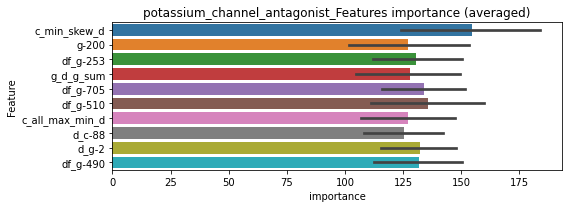

len(train_index) : 2745
len(valid_index) : 916
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0488483	valid_1's binary_logloss: 0.0625558
[2000]	training's binary_logloss: 0.0279213	valid_1's binary_logloss: 0.0454218
[3000]	training's binary_logloss: 0.0194051	valid_1's binary_logloss: 0.0395363
[4000]	training's binary_logloss: 0.014694	valid_1's binary_logloss: 0.0367418
[5000]	training's binary_logloss: 0.0117607	valid_1's binary_logloss: 0.0349795
Early stopping, best iteration is:
[4999]	training's binary_logloss: 0.0117645	valid_1's binary_logloss: 0.0349787


len(train_index) : 2746
len(valid_index) : 915
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0473435	valid_1's binary_logloss: 0.0711862
[2000]	training's binary_logloss: 0.0271281	valid_1's binary_logloss: 0.0538563
[3000]	training's binary_logloss: 0.0188717	valid_1's binary_logloss: 0.0480002
[4000]	training's binary_logloss: 0.014325	valid_1's binary_logloss: 0.0450921
Early stopping, best iteration is:
[4292]	training's binary_logloss: 0.0133492	valid_1's binary_logloss: 0.0444714


len(train_index) : 2746
len(valid_index) : 915
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0507431	valid_1's binary_logloss: 0.0564228
[2000]	training's binary_logloss: 0.0293218	valid_1's binary_logloss: 0.0387978
[3000]	training's binary_logloss: 0.0203656	valid_1's binary_logloss: 0.0327178
[4000]	training's binary_logloss: 0.0153976	valid_1's binary_logloss: 0.029717
[5000]	training's binary_logloss: 0.0123125	valid_1's binary_logloss: 0.0278906
[6000]	training's binary_logloss: 0.0102514	valid_1's binary_logloss: 0.0267383
[7000]	training's binary_logloss: 0.00875921	valid_1's binary_logloss: 0.0259047
Early stopping, best iteration is:
[7258]	training's binary_logloss: 0.00844412	valid_1's binary_logloss: 0.0256994


len(train_index) : 2746
len(valid_index) : 915
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0484195	valid_1's binary_logloss: 0.0649805
[2000]	training's binary_logloss: 0.0279892	valid_1's binary_logloss: 0.0473979
[3000]	training's binary_logloss: 0.0195699	valid_1's binary_logloss: 0.0413162
[4000]	training's binary_logloss: 0.0148156	valid_1's binary_logloss: 0.0383532
Early stopping, best iteration is:
[4256]	training's binary_logloss: 0.0139169	valid_1's binary_logloss: 0.0376969


potassium_channel_antagonist logloss: 0.03571140106199704
potassium_channel_antagonist is unpredictable(><)!
ppar_receptor_agonist, len(trt): 115, len(othr): 3276
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 3276


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0703801	valid_1's binary_logloss: 0.139612
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.046755	valid_1's binary_logloss: 0.131359
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0740624	valid_1's binary_logloss: 0.130676
Early stopping, best iteration is:
[1898]	training's binary_logloss: 0.0437493	valid_1's binary_logloss: 0.118719
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0786883	valid_1's binary_logloss: 0.0992162
[2000]	training's binary_logloss: 0.0446591	valid_1's binary_logloss: 0.084046
[3000]	training's binary_logloss: 0.0296291	valid_1's binary_logloss: 0.0788964
Early stopping, best iteration is:
[3239]	training's binary_logloss: 0.0273028	valid_1's binary_logloss: 0.0781228
Training until validation scores don't improve for 30 rounds
[1000]	training's

1 / 3, AUC score:0.976, PR-AUC:0.954
y_Threshold: 0.0571120, Threshold: 0.0953656, pos_neg_ratio: 0.8000000
Remove_noisy_data: 238 → Positive_corect_labels: 602/3693
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.0953656, conf_0:0.06676, conf_1:0.12398
Num_p_label: 6.0, Expected: 19.2, Adj_threshold_1: 0.1253656
threshold: 0.1253656, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 602.0/3693, y_label_rate: 0.1630111
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.04814	valid_1's binary_logloss: 0.099507
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.0311793	valid_1's binary_logloss: 0.0909827
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0521078	valid_1's binary_logloss: 0.076454
[2000]	training's binary_logloss: 0.0284816	valid_1's binary_logloss: 0.0620093
[3000]	training's binary_logloss: 0.0190334	valid_1's binary_logloss: 0.0570535
Early stopping, best iteration is:
[3439]	training's binary_logloss: 0.0165457	valid_1's binary_logloss: 0.0557442
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0544007	valid_1's binary_logloss: 0.0651052
[2000]	training's binary_logloss: 0.029864	valid_1's binary_logloss: 0.0494742
[3000]	training's binary_logloss: 0.0200043	valid_1's binary_logloss: 0.0440871
[4000]	training's binary_logloss

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0595013, Threshold: 0.1253656, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 579.0/3647
p_label_rate: 0.0025113 Vs.target_rate: 0.00483
Num_p_label: 10.0, Expected: 19.2, Threshold: 0.1253656, conf_0:0.10029, conf_1:0.15044
threshold: 0.1253656, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 579.0/3647, y_label_rate: 0.1587606
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0421766	valid_1's binary_logloss: 0.0619126
[2000]	training's binary_logloss: 0.0228959	valid_1's binary_logloss: 0.0463945
[3000]	training's binary_logloss: 0.0153949	valid_1's binary_logloss: 0.0406195
[4000]	training's binary_logloss: 0.0115269	valid_1's binary_logloss: 0.0378028
Early stopping, best iteration is:
[4338]	training's binary_logloss: 0.0106085	valid_1's binary_logloss: 0.0371201
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0404384	valid_1's binary_logloss: 0.0677266
[2000]	training's binary_logloss: 0.0220534	valid_1's binary_logloss: 0.0546686
[3000]	training's binary_logloss: 0.0148458	valid_1's binary_logloss: 0.0501108
Early stopping, best iteration is:
[3264]	training's binary_logloss: 0.0136127	valid_1's binary_logloss: 0.0494025
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_lo

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0443224, Threshold: 0.1253656, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 568.0/3625
p_label_rate: 0.0037670 Vs.target_rate: 0.00483
Num_p_label: 15.0, Expected: 19.2, Threshold: 0.1253656, conf_0:0.11283, conf_1:0.13790
threshold: 0.1253656, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 568.0/3625, y_label_rate: 0.1566897


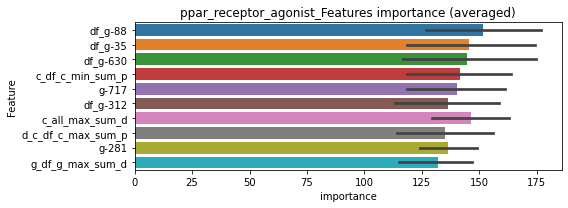

len(train_index) : 2718
len(valid_index) : 907
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0505201	valid_1's binary_logloss: 0.067393
[2000]	training's binary_logloss: 0.0279982	valid_1's binary_logloss: 0.0462219
[3000]	training's binary_logloss: 0.0193806	valid_1's binary_logloss: 0.0390446
[4000]	training's binary_logloss: 0.0147173	valid_1's binary_logloss: 0.0352826
[5000]	training's binary_logloss: 0.0118847	valid_1's binary_logloss: 0.0331676
[6000]	training's binary_logloss: 0.00991201	valid_1's binary_logloss: 0.0314028
Early stopping, best iteration is:
[6280]	training's binary_logloss: 0.00947929	valid_1's binary_logloss: 0.0310119


len(train_index) : 2719
len(valid_index) : 906
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0501502	valid_1's binary_logloss: 0.0645737
[2000]	training's binary_logloss: 0.0276479	valid_1's binary_logloss: 0.045641
[3000]	training's binary_logloss: 0.0191708	valid_1's binary_logloss: 0.0394754
[4000]	training's binary_logloss: 0.0145603	valid_1's binary_logloss: 0.0365303
Early stopping, best iteration is:
[4829]	training's binary_logloss: 0.0121345	valid_1's binary_logloss: 0.0350513


len(train_index) : 2719
len(valid_index) : 906
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0506107	valid_1's binary_logloss: 0.064288
[2000]	training's binary_logloss: 0.0281875	valid_1's binary_logloss: 0.0433785
[3000]	training's binary_logloss: 0.0194632	valid_1's binary_logloss: 0.0359864
[4000]	training's binary_logloss: 0.014765	valid_1's binary_logloss: 0.0321352
[5000]	training's binary_logloss: 0.0119427	valid_1's binary_logloss: 0.0297854
[6000]	training's binary_logloss: 0.00995064	valid_1's binary_logloss: 0.0280993
[7000]	training's binary_logloss: 0.00855135	valid_1's binary_logloss: 0.0269938
[8000]	training's binary_logloss: 0.00749113	valid_1's binary_logloss: 0.0260313
Early stopping, best iteration is:
[7984]	training's binary_logloss: 0.00750614	valid_1's binary_logloss: 0.0260249


len(train_index) : 2719
len(valid_index) : 906
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0482513	valid_1's binary_logloss: 0.0716008
[2000]	training's binary_logloss: 0.0264769	valid_1's binary_logloss: 0.0527855
[3000]	training's binary_logloss: 0.0182697	valid_1's binary_logloss: 0.0466611
[4000]	training's binary_logloss: 0.0138165	valid_1's binary_logloss: 0.0439869
Early stopping, best iteration is:
[4254]	training's binary_logloss: 0.0130182	valid_1's binary_logloss: 0.0434865


ppar_receptor_agonist logloss: 0.03389285062751825
ppar_receptor_agonist is unpredictable(><)!
ppar_receptor_antagonist, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000366358	valid_1's binary_logloss: 0.0053949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000385224	valid_1's binary_logloss: 0.00698382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000387371	valid_1's binary_logloss: 0.00666135
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021134, Threshold: 0.0048970, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000388687	valid_1's binary_logloss: 0.00764665


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0048970, conf_0:0.00343, conf_1:0.00637
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_1: 0.0348970
threshold: 0.0348970, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00039991	valid_1's binary_logloss: 0.005164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000377032	valid_1's binary_logloss: 0.00601901
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000380852	valid_1's binary_logloss: 0.00703313
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0115476, Threshold: 0.0348970, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000395263	valid_1's binary_logloss: 0.0083008


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00126
Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0348970, conf_0:0.02792, conf_1:0.04188
threshold: 0.0348970, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00039991	valid_1's binary_logloss: 0.005164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000377032	valid_1's binary_logloss: 0.00601901
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000380852	valid_1's binary_logloss: 0.00703313
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0115476, Threshold: 0.0348970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000395263	valid_1's binary_logloss: 0.0083008


p_label_rate: 0.0007534 Vs.target_rate: 0.00126
Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0348970, conf_0:0.03141, conf_1:0.03839
threshold: 0.0348970, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


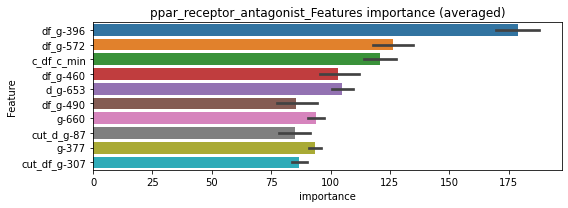

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000380512	valid_1's binary_logloss: 0.00405994


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000402632	valid_1's binary_logloss: 0.00608962


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000389384	valid_1's binary_logloss: 0.00558689


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000399732	valid_1's binary_logloss: 0.00655074


ppar_receptor_antagonist logloss: 0.005571757465115935
progesterone_receptor_agonist, len(trt): 119, len(othr): 3268
target_rate: 0.0049971 → Adj_target_rate: 0.0048799


selected negative label: 3268


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0741264	valid_1's binary_logloss: 0.155683
Early stopping, best iteration is:
[1507]	training's binary_logloss: 0.0542649	valid_1's binary_logloss: 0.148874
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0785887	valid_1's binary_logloss: 0.128913
Early stopping, best iteration is:
[1545]	training's binary_logloss: 0.05644	valid_1's binary_logloss: 0.120383
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0797865	valid_1's binary_logloss: 0.118544
[2000]	training's binary_logloss: 0.0457386	valid_1's binary_logloss: 0.103724
Early stopping, best iteration is:
[2728]	training's binary_logloss: 0.0336424	valid_1's binary_logloss: 0.099532
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0810872	valid_1's binary_logloss: 0.117185
[2000]	training's bin

1 / 3, AUC score:0.973, PR-AUC:0.945
y_Threshold: 0.0625119, Threshold: 0.2242294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 250 → Positive_corect_labels: 594/3671
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, Expected: 19.9, Threshold: 0.2242294, conf_0:0.15696, conf_1:0.29150
Num_p_label: 32.0, Expected: 19.9, Adj_threshold_1: 0.2542294
Num_p_label: 22.0, Expected: 19.9, Adj_threshold_2: 0.2842294
threshold: 0.2842294, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 594.0/3671, y_label_rate: 0.1618088
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0508812	valid_1's binary_logloss: 0.0873581
[2000]	training's binary_logloss: 0.0285583	valid_1's binary_logloss: 0.074073
[3000]	training's binary_logloss: 0.0192624	valid_1's binary_logloss: 0.069254
Early stopping, best iteration is:
[3302]	training's binary_logloss: 0.017503	valid_1's binary_logloss: 0.0684591
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0530909	valid_1's binary_logloss: 0.0770303
[2000]	training's binary_logloss: 0.0296845	valid_1's binary_logloss: 0.0629015
[3000]	training's binary_logloss: 0.0198973	valid_1's binary_logloss: 0.0576354
Early stopping, best iteration is:
[3446]	training's binary_logloss: 0.0173089	valid_1's binary_logloss: 0.0563253
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.051962	valid_1's binary_logloss: 0.083568
[2000]	training's binary_logloss

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0719706, Threshold: 0.2842294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 562.0/3607
p_label_rate: 0.0236062 Vs.target_rate: 0.00500
Num_p_label: 94.0, Expected: 19.9, Threshold: 0.2842294, conf_0:0.22738, conf_1:0.34108
Num_p_label: 83.0, Expected: 19.9, Adj_threshold_1: 0.3142294
Num_p_label: 72.0, Expected: 19.9, Adj_threshold_2: 0.3442294
Num_p_label: 64.0, Expected: 19.9, Adj_threshold_3: 0.3742294
Num_p_label: 51.0, Expected: 19.9, Adj_threshold_4: 0.4042294
Num_p_label: 41.0, Expected: 19.9, Adj_threshold_5: 0.4342294
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_6: 0.4642294
threshold: 0.4642294, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 562.0/3607, y_label_rate: 0.1558082
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.035947	valid_1's binary_logloss: 0.0549902
[2000]	training's binary_logloss: 0.0196024	valid_1's binary_logloss: 0.0428274
[3000]	training's binary_logloss: 0.0132946	valid_1's binary_logloss: 0.038692
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.0110637	valid_1's binary_logloss: 0.0373471
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0350613	valid_1's binary_logloss: 0.0581577
[2000]	training's binary_logloss: 0.0189998	valid_1's binary_logloss: 0.044004
Early stopping, best iteration is:
[2841]	training's binary_logloss: 0.0135351	valid_1's binary_logloss: 0.0395532
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0363239	valid_1's binary_logloss: 0.0511382
[2000]	training's binary_logloss: 0.0197443	valid_1's binary_logloss: 0.0371204
[3000]	training's binary_loglo

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0561271, Threshold: 0.4642294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 547.0/3577
p_label_rate: 0.0208438 Vs.target_rate: 0.00500
Num_p_label: 83.0, Expected: 19.9, Threshold: 0.4642294, conf_0:0.41781, conf_1:0.51065
Num_p_label: 72.0, Expected: 19.9, Adj_threshold_1: 0.4942294
Num_p_label: 60.0, Expected: 19.9, Adj_threshold_2: 0.5242294
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_3: 0.5542294
Num_p_label: 28.0, Expected: 19.9, Adj_threshold_4: 0.5842294
threshold: 0.5842294, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 547.0/3577, y_label_rate: 0.1529214


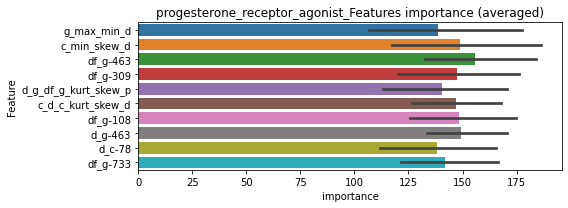

len(train_index) : 2682
len(valid_index) : 895
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0412792	valid_1's binary_logloss: 0.0545512
[2000]	training's binary_logloss: 0.0207715	valid_1's binary_logloss: 0.0334238
[3000]	training's binary_logloss: 0.0139611	valid_1's binary_logloss: 0.0264087
[4000]	training's binary_logloss: 0.0106642	valid_1's binary_logloss: 0.023258
[5000]	training's binary_logloss: 0.0086362	valid_1's binary_logloss: 0.0213423
[6000]	training's binary_logloss: 0.0072714	valid_1's binary_logloss: 0.0199606
[7000]	training's binary_logloss: 0.00628168	valid_1's binary_logloss: 0.019099
[8000]	training's binary_logloss: 0.0055205	valid_1's binary_logloss: 0.0183646
[9000]	training's binary_logloss: 0.00493508	valid_1's binary_logloss: 0.0177522
Early stopping, best iteration is:
[9320]	training's binary_logloss: 0.00476831	valid_1's binary_logloss: 0.0175927


len(train_index) : 2683
len(valid_index) : 894
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0396608	valid_1's binary_logloss: 0.0609723
[2000]	training's binary_logloss: 0.0196632	valid_1's binary_logloss: 0.040063
[3000]	training's binary_logloss: 0.0131449	valid_1's binary_logloss: 0.033399
[4000]	training's binary_logloss: 0.00999126	valid_1's binary_logloss: 0.0303265
[5000]	training's binary_logloss: 0.00806467	valid_1's binary_logloss: 0.0286025
[6000]	training's binary_logloss: 0.00679603	valid_1's binary_logloss: 0.0274129
[7000]	training's binary_logloss: 0.00588097	valid_1's binary_logloss: 0.0266983
[8000]	training's binary_logloss: 0.00517468	valid_1's binary_logloss: 0.0260743
Early stopping, best iteration is:
[8388]	training's binary_logloss: 0.00494726	valid_1's binary_logloss: 0.0258666


len(train_index) : 2683
len(valid_index) : 894
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0414666	valid_1's binary_logloss: 0.050808
[2000]	training's binary_logloss: 0.0210168	valid_1's binary_logloss: 0.0290529
[3000]	training's binary_logloss: 0.0142535	valid_1's binary_logloss: 0.0219573
[4000]	training's binary_logloss: 0.0108804	valid_1's binary_logloss: 0.0186184
[5000]	training's binary_logloss: 0.00878059	valid_1's binary_logloss: 0.0165896
[6000]	training's binary_logloss: 0.00739924	valid_1's binary_logloss: 0.0152345
[7000]	training's binary_logloss: 0.00639201	valid_1's binary_logloss: 0.0142399
[8000]	training's binary_logloss: 0.00562146	valid_1's binary_logloss: 0.013445
[9000]	training's binary_logloss: 0.00502123	valid_1's binary_logloss: 0.0128545
[10000]	training's binary_logloss: 0.00453575	valid_1's binary_logloss: 0.0123797
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00453575	valid_1's binary_logloss: 0.0123797


len(train_index) : 2683
len(valid_index) : 894
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0425041	valid_1's binary_logloss: 0.049975
[2000]	training's binary_logloss: 0.0217032	valid_1's binary_logloss: 0.0276595
[3000]	training's binary_logloss: 0.014746	valid_1's binary_logloss: 0.0202018
[4000]	training's binary_logloss: 0.0112783	valid_1's binary_logloss: 0.0166025
[5000]	training's binary_logloss: 0.00911528	valid_1's binary_logloss: 0.0144045
[6000]	training's binary_logloss: 0.00767796	valid_1's binary_logloss: 0.0128975
[7000]	training's binary_logloss: 0.00662978	valid_1's binary_logloss: 0.0118052
[8000]	training's binary_logloss: 0.00582475	valid_1's binary_logloss: 0.0109262
[9000]	training's binary_logloss: 0.00519981	valid_1's binary_logloss: 0.0102405
[10000]	training's binary_logloss: 0.00470103	valid_1's binary_logloss: 0.00968895
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00470103	valid_1's binary_logloss: 0.00968895


progesterone_receptor_agonist logloss: 0.01638232401389133
progesterone_receptor_antagonist, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000277713	valid_1's binary_logloss: 0.000907973
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000279951	valid_1's binary_logloss: 0.00204665
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00028484	valid_1's binary_logloss: 0.000812225
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016934, Threshold: 0.0095456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0095456, conf_0:0.00668, conf_1:0.01241
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_1: 0.0395456


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000282549	valid_1's binary_logloss: 0.0023644


threshold: 0.0395456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000264757	valid_1's binary_logloss: 0.000679783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000267085	valid_1's binary_logloss: 0.00180846
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000271804	valid_1's binary_logloss: 0.000550218
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0677527, Threshold: 0.0395456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0090407 Vs.target_rate: 0.00076
Num_p_label: 36.0, Expected: 3.0, Threshold: 0.0395456, conf_0:0.03164, conf_1:0.04745
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_1: 0.0695456
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0995456
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1295456
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_4: 0.1595456


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000261168	valid_1's binary_logloss: 0.00285401


threshold: 0.1595456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000264757	valid_1's binary_logloss: 0.000679783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000267085	valid_1's binary_logloss: 0.00180846
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000271804	valid_1's binary_logloss: 0.000550218
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0677527, Threshold: 0.1595456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.1595456, conf_0:0.14359, conf_1:0.17550


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000261168	valid_1's binary_logloss: 0.00285401


threshold: 0.1595456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


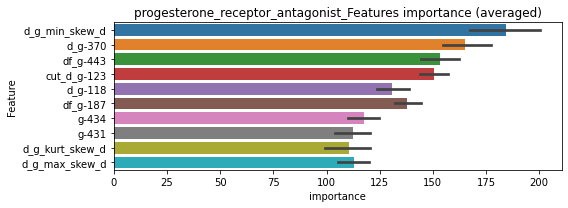

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000267887	valid_1's binary_logloss: 0.000652794


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953


Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000263939	valid_1's binary_logloss: 0.000915315


================================= fold 3/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000273948	valid_1's binary_logloss: 0.00055424


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


progesterone_receptor_antagonist logloss: 0.0009546801190595227


Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000276211	valid_1's binary_logloss: 0.00169715


prostaglandin_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000409494	valid_1's binary_logloss: 0.00539462
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000420728	valid_1's binary_logloss: 0.0141561
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00118925	valid_1's binary_logloss: 0.0214538
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000398748	valid_1's binary_logloss: 0.00375294


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0032271, Threshold: 0.0146420, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0146420, conf_0:0.01025, conf_1:0.01903
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.0446420
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0746420
threshold: 0.0746420, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000803904	valid_1's binary_logloss: 0.0143284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000406889	valid_1's binary_logloss: 0.00176678
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000403523	valid_1's binary_logloss: 0.00211551
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0260777, Threshold: 0.0746420, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000408588	valid_1's binary_logloss: 0.00739352


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, Expected: 6.0, Threshold: 0.0746420, conf_0:0.05971, conf_1:0.08957
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_1: 0.1046420
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.1346420
threshold: 0.1346420, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000467034	valid_1's binary_logloss: 0.00481321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00041	valid_1's binary_logloss: 0.0038407
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000761023	valid_1's binary_logloss: 0.0187836
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0185647, Threshold: 0.1346420, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000432244	valid_1's binary_logloss: 0.00952587


Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0040181 Vs.target_rate: 0.00151
Num_p_label: 16.0, Expected: 6.0, Threshold: 0.1346420, conf_0:0.12118, conf_1:0.14811
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.1646420
threshold: 0.1646420, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


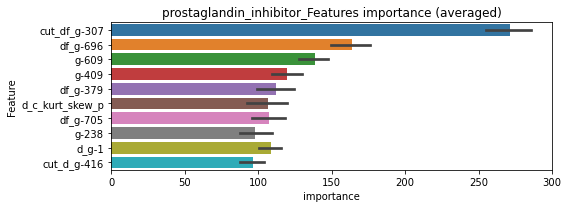

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000419464	valid_1's binary_logloss: 0.00399999


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000411303	valid_1's binary_logloss: 0.00454868


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000650485	valid_1's binary_logloss: 0.0129215
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000408027	valid_1's binary_logloss: 0.00232709


prostaglandin_inhibitor logloss: 0.0059503484002416925
prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3278
target_rate: 0.0035273 → Adj_target_rate: 0.0036294


selected negative label: 3278


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0879473	valid_1's binary_logloss: 0.134439
[2000]	training's binary_logloss: 0.0485941	valid_1's binary_logloss: 0.101391
[3000]	training's binary_logloss: 0.0329985	valid_1's binary_logloss: 0.0895455
Early stopping, best iteration is:
[3260]	training's binary_logloss: 0.0304986	valid_1's binary_logloss: 0.0876979
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0899755	valid_1's binary_logloss: 0.132873
[2000]	training's binary_logloss: 0.0499048	valid_1's binary_logloss: 0.0968291
[3000]	training's binary_logloss: 0.0338217	valid_1's binary_logloss: 0.082536
[4000]	training's binary_logloss: 0.0257088	valid_1's binary_logloss: 0.0760078
Early stopping, best iteration is:
[4546]	training's binary_logloss: 0.0224861	valid_1's binary_logloss: 0.0734442
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_loglos

1 / 3, AUC score:0.992, PR-AUC:0.983
y_Threshold: 0.0623987, Threshold: 0.1782747, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 636/3763
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, Expected: 14.0, Threshold: 0.1782747, conf_0:0.12479, conf_1:0.23176
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_1: 0.2082747
Num_p_label: 25.0, Expected: 14.0, Adj_threshold_2: 0.2382747
Num_p_label: 18.0, Expected: 14.0, Adj_threshold_3: 0.2682747
threshold: 0.2682747, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 636.0/3763, y_label_rate: 0.1690141
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0776409	valid_1's binary_logloss: 0.130255
[2000]	training's binary_logloss: 0.0408542	valid_1's binary_logloss: 0.09522
[3000]	training's binary_logloss: 0.0273431	valid_1's binary_logloss: 0.0819254
Early stopping, best iteration is:
[3259]	training's binary_logloss: 0.0252129	valid_1's binary_logloss: 0.0801686
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0801087	valid_1's binary_logloss: 0.122829
[2000]	training's binary_logloss: 0.0425688	valid_1's binary_logloss: 0.0837706
[3000]	training's binary_logloss: 0.0285331	valid_1's binary_logloss: 0.0692931
[4000]	training's binary_logloss: 0.021411	valid_1's binary_logloss: 0.0622459
[5000]	training's binary_logloss: 0.0170892	valid_1's binary_logloss: 0.0576257
[6000]	training's binary_logloss: 0.0141859	valid_1's binary_logloss: 0.0544658
Early stopping, best iteration is:
[5995]	traini

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0977017, Threshold: 0.2682747, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 618.0/3727
p_label_rate: 0.0150678 Vs.target_rate: 0.00353
Num_p_label: 60.0, Expected: 14.0, Threshold: 0.2682747, conf_0:0.21462, conf_1:0.32193
Num_p_label: 53.0, Expected: 14.0, Adj_threshold_1: 0.2982747
Num_p_label: 46.0, Expected: 14.0, Adj_threshold_2: 0.3282747
Num_p_label: 39.0, Expected: 14.0, Adj_threshold_3: 0.3582747
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_4: 0.3882747
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_5: 0.4182747
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_6: 0.4482747
Num_p_label: 21.0, Expected: 14.0, Adj_threshold_7: 0.4782747
threshold: 0.4782747, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 618.0/3727, y_label_rate: 0.1658170
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0737932	valid_1's binary_logloss: 0.114768
[2000]	training's binary_logloss: 0.0381482	valid_1's binary_logloss: 0.0745257
[3000]	training's binary_logloss: 0.0253421	valid_1's binary_logloss: 0.0593637
[4000]	training's binary_logloss: 0.0191281	valid_1's binary_logloss: 0.052105
[5000]	training's binary_logloss: 0.0152631	valid_1's binary_logloss: 0.0473079
[6000]	training's binary_logloss: 0.0126687	valid_1's binary_logloss: 0.0438152
Early stopping, best iteration is:
[6212]	training's binary_logloss: 0.0122367	valid_1's binary_logloss: 0.0432881
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0738271	valid_1's binary_logloss: 0.106624
[2000]	training's binary_logloss: 0.0379892	valid_1's binary_logloss: 0.0706169
[3000]	training's binary_logloss: 0.0251907	valid_1's binary_logloss: 0.0576216
[4000]	training's binary_logloss: 0.0189426	va

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.1078310, Threshold: 0.4782747, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 612.0/3715
p_label_rate: 0.0090407 Vs.target_rate: 0.00353
Num_p_label: 36.0, Expected: 14.0, Threshold: 0.4782747, conf_0:0.43045, conf_1:0.52610
Num_p_label: 35.0, Expected: 14.0, Adj_threshold_1: 0.5082747
Num_p_label: 31.0, Expected: 14.0, Adj_threshold_2: 0.5382747
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_3: 0.5682747
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_4: 0.5982747
Num_p_label: 21.0, Expected: 14.0, Adj_threshold_5: 0.6282747
threshold: 0.6282747, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 612.0/3715, y_label_rate: 0.1647376


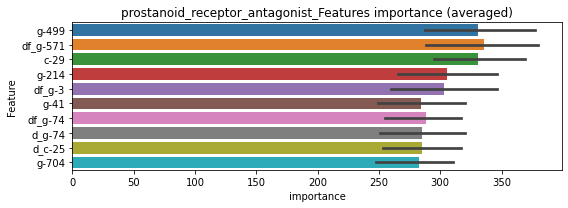

len(train_index) : 2786
len(valid_index) : 929
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0981353	valid_1's binary_logloss: 0.128251
[2000]	training's binary_logloss: 0.0531595	valid_1's binary_logloss: 0.0822003
[3000]	training's binary_logloss: 0.0360427	valid_1's binary_logloss: 0.0637097
[4000]	training's binary_logloss: 0.0270607	valid_1's binary_logloss: 0.0535945
[5000]	training's binary_logloss: 0.0217129	valid_1's binary_logloss: 0.0479066
[6000]	training's binary_logloss: 0.0180824	valid_1's binary_logloss: 0.0437055
[7000]	training's binary_logloss: 0.0155414	valid_1's binary_logloss: 0.0408027
[8000]	training's binary_logloss: 0.013607	valid_1's binary_logloss: 0.0386875
[9000]	training's binary_logloss: 0.012076	valid_1's binary_logloss: 0.0366836
Early stopping, best iteration is:
[9478]	training's binary_logloss: 0.0114832	valid_1's binary_logloss: 0.0359681


len(train_index) : 2786
len(valid_index) : 929
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0944405	valid_1's binary_logloss: 0.138254
[2000]	training's binary_logloss: 0.0505566	valid_1's binary_logloss: 0.0937716
[3000]	training's binary_logloss: 0.0341657	valid_1's binary_logloss: 0.0758053
[4000]	training's binary_logloss: 0.025615	valid_1's binary_logloss: 0.0661184
[5000]	training's binary_logloss: 0.0205949	valid_1's binary_logloss: 0.0604328
[6000]	training's binary_logloss: 0.0171142	valid_1's binary_logloss: 0.0563053
Early stopping, best iteration is:
[6759]	training's binary_logloss: 0.0152169	valid_1's binary_logloss: 0.054065


len(train_index) : 2786
len(valid_index) : 929
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0970225	valid_1's binary_logloss: 0.127918
[2000]	training's binary_logloss: 0.0525581	valid_1's binary_logloss: 0.0819657
[3000]	training's binary_logloss: 0.0357689	valid_1's binary_logloss: 0.0636531
[4000]	training's binary_logloss: 0.0268328	valid_1's binary_logloss: 0.0539701
[5000]	training's binary_logloss: 0.0215264	valid_1's binary_logloss: 0.0482766
[6000]	training's binary_logloss: 0.017924	valid_1's binary_logloss: 0.0440642
[7000]	training's binary_logloss: 0.0154219	valid_1's binary_logloss: 0.0412951
[8000]	training's binary_logloss: 0.0135028	valid_1's binary_logloss: 0.0390224
[9000]	training's binary_logloss: 0.011986	valid_1's binary_logloss: 0.0373079
Early stopping, best iteration is:
[9291]	training's binary_logloss: 0.0116242	valid_1's binary_logloss: 0.0368903


len(train_index) : 2787
len(valid_index) : 928
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0990873	valid_1's binary_logloss: 0.122786
[2000]	training's binary_logloss: 0.0535014	valid_1's binary_logloss: 0.0758092
[3000]	training's binary_logloss: 0.0363214	valid_1's binary_logloss: 0.0571937
[4000]	training's binary_logloss: 0.0273132	valid_1's binary_logloss: 0.0472956
[5000]	training's binary_logloss: 0.0219463	valid_1's binary_logloss: 0.0412207
[6000]	training's binary_logloss: 0.0182287	valid_1's binary_logloss: 0.0369079
[7000]	training's binary_logloss: 0.0156483	valid_1's binary_logloss: 0.0340913
[8000]	training's binary_logloss: 0.0137053	valid_1's binary_logloss: 0.0316515
[9000]	training's binary_logloss: 0.0121644	valid_1's binary_logloss: 0.0298139
[10000]	training's binary_logloss: 0.0109665	valid_1's binary_logloss: 0.0283711
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0109665	valid_1's binary_logloss: 0.0283711


prostanoid_receptor_antagonist logloss: 0.03882645709056523
prostanoid_receptor_antagonist is unpredictable(><)!


mutually exclusive columns: proteasome_inhibitor


proteasome_inhibitor, len(trt): 726, len(othr): 10229
target_rate: 0.0304863 → Adj_target_rate: 0.0226983


selected negative label: 10229


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.135534	valid_1's binary_logloss: 0.238296
Early stopping, best iteration is:
[1775]	training's binary_logloss: 0.0869285	valid_1's binary_logloss: 0.224908
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.134997	valid_1's binary_logloss: 0.237202
Early stopping, best iteration is:
[1527]	training's binary_logloss: 0.0987044	valid_1's binary_logloss: 0.227214
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.136602	valid_1's binary_logloss: 0.233773
Early stopping, best iteration is:
[1581]	training's binary_logloss: 0.096663	valid_1's binary_logloss: 0.222627
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.135668	valid_1's binary_logloss: 0.235161
Early stopping, best iteration is:
[1727]	training's binary_logloss: 0.0897347	valid_1's binary_logloss

1 / 3, AUC score:0.885, PR-AUC:0.822
y_Threshold: 0.1216134, Threshold: 0.1947709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1404 → Positive_corect_labels: 1548/10870
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, Expected: 121.4, Threshold: 0.1947709, conf_0:0.13634, conf_1:0.25320
threshold: 0.1947709, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1548.0/10870, y_label_rate: 0.1424103
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.071877	valid_1's binary_logloss: 0.122412
[2000]	training's binary_logloss: 0.0380505	valid_1's binary_logloss: 0.09804
[3000]	training's binary_logloss: 0.02492	valid_1's binary_logloss: 0.0894148
Early stopping, best iteration is:
[3593]	training's binary_logloss: 0.0206471	valid_1's binary_logloss: 0.0870218
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0700104	valid_1's binary_logloss: 0.131289
[2000]	training's binary_logloss: 0.0370174	valid_1's binary_logloss: 0.108638
Early stopping, best iteration is:
[2761]	training's binary_logloss: 0.0264229	valid_1's binary_logloss: 0.101893
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0717253	valid_1's binary_logloss: 0.117974
[2000]	training's binary_logloss: 0.0378019	valid_1's binary_logloss: 0.0934867
[3000]	training's binary_logloss: 0.0

2 / 3, AUC score:0.991, PR-AUC:0.975
y_Threshold: 0.0864390, Threshold: 0.1947709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 210 → Positive_corect_labels: 1443.0/10660
p_label_rate: 0.0055249 Vs.target_rate: 0.03049
Num_p_label: 22.0, Expected: 121.4, Threshold: 0.1947709, conf_0:0.15582, conf_1:0.23373
threshold: 0.1947709, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 1443.0/10660, y_label_rate: 0.1353659
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0581124	valid_1's binary_logloss: 0.101632
[2000]	training's binary_logloss: 0.0297358	valid_1's binary_logloss: 0.0757911
Early stopping, best iteration is:
[2810]	training's binary_logloss: 0.0206983	valid_1's binary_logloss: 0.0679082
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0586194	valid_1's binary_logloss: 0.0968078
[2000]	training's binary_logloss: 0.0298065	valid_1's binary_logloss: 0.0730638
Early stopping, best iteration is:
[2635]	training's binary_logloss: 0.022222	valid_1's binary_logloss: 0.0667645
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0573105	valid_1's binary_logloss: 0.103671
[2000]	training's binary_logloss: 0.0293654	valid_1's binary_logloss: 0.0788877
[3000]	training's binary_logloss: 0.0190761	valid_1's binary_logloss: 0.0702093
Early stopping, best iteration

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0934366, Threshold: 0.1947709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 1399.0/10572
p_label_rate: 0.0085384 Vs.target_rate: 0.03049
Num_p_label: 34.0, Expected: 121.4, Threshold: 0.1947709, conf_0:0.17529, conf_1:0.21425
threshold: 0.1947709, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 1399.0/10572, y_label_rate: 0.1323307


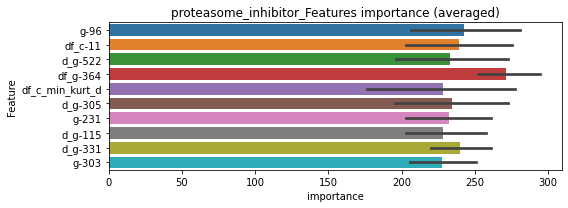

len(train_index) : 7929
len(valid_index) : 2643
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0698364	valid_1's binary_logloss: 0.10354
[2000]	training's binary_logloss: 0.0380958	valid_1's binary_logloss: 0.0743974
[3000]	training's binary_logloss: 0.0256344	valid_1's binary_logloss: 0.0633634
[4000]	training's binary_logloss: 0.0192795	valid_1's binary_logloss: 0.0578507
Early stopping, best iteration is:
[4743]	training's binary_logloss: 0.0162097	valid_1's binary_logloss: 0.0553078


len(train_index) : 7929
len(valid_index) : 2643
================================= fold 2/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0704025	valid_1's binary_logloss: 0.104286
[2000]	training's binary_logloss: 0.0383503	valid_1's binary_logloss: 0.0742712
[3000]	training's binary_logloss: 0.0259701	valid_1's binary_logloss: 0.0626815
[4000]	training's binary_logloss: 0.0195684	valid_1's binary_logloss: 0.0566916
Early stopping, best iteration is:
[4811]	training's binary_logloss: 0.0161912	valid_1's binary_logloss: 0.053393


len(train_index) : 7929
len(valid_index) : 2643
================================= fold 3/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0690984	valid_1's binary_logloss: 0.108034
[2000]	training's binary_logloss: 0.0373295	valid_1's binary_logloss: 0.0788167
[3000]	training's binary_logloss: 0.0252248	valid_1's binary_logloss: 0.0675837
Early stopping, best iteration is:
[3334]	training's binary_logloss: 0.0227244	valid_1's binary_logloss: 0.0652448


len(train_index) : 7929
len(valid_index) : 2643
================================= fold 4/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0717781	valid_1's binary_logloss: 0.0980588
[2000]	training's binary_logloss: 0.0393304	valid_1's binary_logloss: 0.0672494
[3000]	training's binary_logloss: 0.0265553	valid_1's binary_logloss: 0.0552391
[4000]	training's binary_logloss: 0.0199645	valid_1's binary_logloss: 0.049053
[5000]	training's binary_logloss: 0.0159094	valid_1's binary_logloss: 0.0451135
Early stopping, best iteration is:
[5460]	training's binary_logloss: 0.0144513	valid_1's binary_logloss: 0.0433803


proteasome_inhibitor logloss: 0.05433149909960136
proteasome_inhibitor is unpredictable(><)!
protein_kinase_inhibitor, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000491676	valid_1's binary_logloss: 0.0174223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00050961	valid_1's binary_logloss: 0.0117172
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000523487	valid_1's binary_logloss: 0.00583239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00058109	valid_1's binary_logloss: 0.0154698


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039932, Threshold: 0.0096547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0096547, conf_0:0.00676, conf_1:0.01255
Num_p_label: 2.0, Expected: 8.0, Adj_threshold_1: 0.0396547
threshold: 0.0396547, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000469603	valid_1's binary_logloss: 0.0151766
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00052394	valid_1's binary_logloss: 0.0102765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000494301	valid_1's binary_logloss: 0.00459526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000666029	valid_1's binary_logloss: 0.01562


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162039, Threshold: 0.0396547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0040181 Vs.target_rate: 0.00202
Num_p_label: 16.0, Expected: 8.0, Threshold: 0.0396547, conf_0:0.03172, conf_1:0.04759
threshold: 0.0396547, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000513262	valid_1's binary_logloss: 0.0142952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00049938	valid_1's binary_logloss: 0.00446279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000488633	valid_1's binary_logloss: 0.00284595
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000509717	valid_1's binary_logloss: 0.0103807


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0390119, Threshold: 0.0396547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, Expected: 8.0, Threshold: 0.0396547, conf_0:0.03569, conf_1:0.04362
threshold: 0.0396547, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


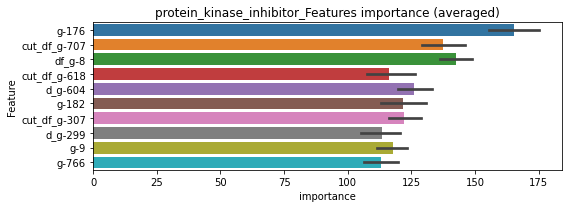

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000493391	valid_1's binary_logloss: 0.0122486


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000503822	valid_1's binary_logloss: 0.00538097


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000486245	valid_1's binary_logloss: 0.00306476
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000486258	valid_1's binary_logloss: 0.00306455


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000595066	valid_1's binary_logloss: 0.0109189


protein_kinase_inhibitor logloss: 0.007904643444722019
protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00033932	valid_1's binary_logloss: 0.00348367
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000327376	valid_1's binary_logloss: 0.00299297
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000327845	valid_1's binary_logloss: 0.000816911
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016429, Threshold: 0.0051329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0051329, conf_0:0.00359, conf_1:0.00667
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_1: 0.0351329


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000340892	valid_1's binary_logloss: 0.00255995


threshold: 0.0351329, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000328766	valid_1's binary_logloss: 0.00388957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000319584	valid_1's binary_logloss: 0.00273147
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000319803	valid_1's binary_logloss: 0.000957946
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0346806, Threshold: 0.0351329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0351329, conf_0:0.02811, conf_1:0.04216
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0651329


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000321117	valid_1's binary_logloss: 0.00222883


threshold: 0.0651329, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000328766	valid_1's binary_logloss: 0.00388957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000319584	valid_1's binary_logloss: 0.00273147
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000319803	valid_1's binary_logloss: 0.000957946
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0346806, Threshold: 0.0651329, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000321117	valid_1's binary_logloss: 0.00222883


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, Expected: 4.0, Threshold: 0.0651329, conf_0:0.05862, conf_1:0.07165
threshold: 0.0651329, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


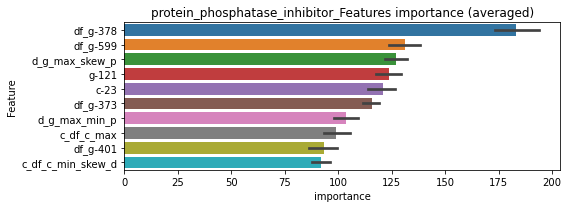

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000317951	valid_1's binary_logloss: 0.00342657
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000317444	valid_1's binary_logloss: 0.003423


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000326498	valid_1's binary_logloss: 0.00205364


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000328667	valid_1's binary_logloss: 0.000922425


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


protein_phosphatase_inhibitor logloss: 0.002396749285680122


Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000374456	valid_1's binary_logloss: 0.0031834


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3273
target_rate: 0.0043252 → Adj_target_rate: 0.0043163


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.065388	valid_1's binary_logloss: 0.130744
Early stopping, best iteration is:
[1740]	training's binary_logloss: 0.0420147	valid_1's binary_logloss: 0.122468
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.068253	valid_1's binary_logloss: 0.117789
Early stopping, best iteration is:
[1674]	training's binary_logloss: 0.0455033	valid_1's binary_logloss: 0.107444
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0718768	valid_1's binary_logloss: 0.0939953
[2000]	training's binary_logloss: 0.0410031	valid_1's binary_logloss: 0.0805434
[3000]	training's binary_logloss: 0.0273856	valid_1's binary_logloss: 0.075518
Early stopping, best iteration is:
[2995]	training's binary_logloss: 0.0274378	valid_1's binary_logloss: 0.0754859
Training until validation scores don't improve for 30 rounds
[1000]	training's 

1 / 3, AUC score:0.981, PR-AUC:0.961
y_Threshold: 0.0538667, Threshold: 0.1053106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 224 → Positive_corect_labels: 608/3703
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, Expected: 17.2, Threshold: 0.1053106, conf_0:0.07372, conf_1:0.13690
Num_p_label: 26.0, Expected: 17.2, Adj_threshold_1: 0.1353106
Num_p_label: 20.0, Expected: 17.2, Adj_threshold_2: 0.1653106
threshold: 0.1653106, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 608.0/3703, y_label_rate: 0.1641912
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.045703	valid_1's binary_logloss: 0.0858211
[2000]	training's binary_logloss: 0.0251299	valid_1's binary_logloss: 0.0740521
Early stopping, best iteration is:
[2108]	training's binary_logloss: 0.0238617	valid_1's binary_logloss: 0.0734033
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0465815	valid_1's binary_logloss: 0.0818665
[2000]	training's binary_logloss: 0.0256235	valid_1's binary_logloss: 0.0694594
[3000]	training's binary_logloss: 0.017085	valid_1's binary_logloss: 0.0655017
Early stopping, best iteration is:
[3021]	training's binary_logloss: 0.0169607	valid_1's binary_logloss: 0.0654506
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0507354	valid_1's binary_logloss: 0.0645406
[2000]	training's binary_logloss: 0.0276935	valid_1's binary_logloss: 0.0501266
[3000]	training's binary_logl

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0495939, Threshold: 0.1653106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 591.0/3669
p_label_rate: 0.0062783 Vs.target_rate: 0.00433
Num_p_label: 25.0, Expected: 17.2, Threshold: 0.1653106, conf_0:0.13225, conf_1:0.19837
threshold: 0.1653106, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 591.0/3669, y_label_rate: 0.1610793
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0398039	valid_1's binary_logloss: 0.0611957
[2000]	training's binary_logloss: 0.021693	valid_1's binary_logloss: 0.0490612
[3000]	training's binary_logloss: 0.014618	valid_1's binary_logloss: 0.0444706
Early stopping, best iteration is:
[3263]	training's binary_logloss: 0.0134095	valid_1's binary_logloss: 0.0438975
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0400543	valid_1's binary_logloss: 0.0616631
[2000]	training's binary_logloss: 0.0218106	valid_1's binary_logloss: 0.0480345
[3000]	training's binary_logloss: 0.0146098	valid_1's binary_logloss: 0.0435191
Early stopping, best iteration is:
[3782]	training's binary_logloss: 0.0115082	valid_1's binary_logloss: 0.0415911
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0413275	valid_1's binary_logloss: 0.061468
[2000]	training's binary_loglo

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0393901, Threshold: 0.1653106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 582.0/3651
p_label_rate: 0.0060271 Vs.target_rate: 0.00433
Num_p_label: 24.0, Expected: 17.2, Threshold: 0.1653106, conf_0:0.14878, conf_1:0.18184
threshold: 0.1653106, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 582.0/3651, y_label_rate: 0.1594084


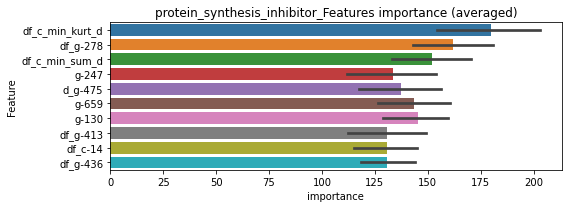

len(train_index) : 2738
len(valid_index) : 913
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0464189	valid_1's binary_logloss: 0.0737972
[2000]	training's binary_logloss: 0.0262525	valid_1's binary_logloss: 0.0567672
[3000]	training's binary_logloss: 0.0181611	valid_1's binary_logloss: 0.05088
Early stopping, best iteration is:
[3833]	training's binary_logloss: 0.0143759	valid_1's binary_logloss: 0.0484971


len(train_index) : 2738
len(valid_index) : 913
================================= fold 2/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0497486	valid_1's binary_logloss: 0.0622637
[2000]	training's binary_logloss: 0.0281462	valid_1's binary_logloss: 0.0438188
[3000]	training's binary_logloss: 0.019399	valid_1's binary_logloss: 0.0372613
[4000]	training's binary_logloss: 0.014659	valid_1's binary_logloss: 0.0341062
[5000]	training's binary_logloss: 0.0117776	valid_1's binary_logloss: 0.0322458
[6000]	training's binary_logloss: 0.00982126	valid_1's binary_logloss: 0.0308726
[7000]	training's binary_logloss: 0.00839179	valid_1's binary_logloss: 0.0299217
Early stopping, best iteration is:
[6982]	training's binary_logloss: 0.00841157	valid_1's binary_logloss: 0.0299132


len(train_index) : 2738
len(valid_index) : 913
================================= fold 3/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.050279	valid_1's binary_logloss: 0.062581
[2000]	training's binary_logloss: 0.028749	valid_1's binary_logloss: 0.043711
[3000]	training's binary_logloss: 0.0198764	valid_1's binary_logloss: 0.0368719
[4000]	training's binary_logloss: 0.0150517	valid_1's binary_logloss: 0.0335723
[5000]	training's binary_logloss: 0.0120725	valid_1's binary_logloss: 0.0317219
[6000]	training's binary_logloss: 0.0100535	valid_1's binary_logloss: 0.0302881
Early stopping, best iteration is:
[6854]	training's binary_logloss: 0.00878582	valid_1's binary_logloss: 0.0295216


len(train_index) : 2739
len(valid_index) : 912
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0500453	valid_1's binary_logloss: 0.0622295
[2000]	training's binary_logloss: 0.0286384	valid_1's binary_logloss: 0.0447809
[3000]	training's binary_logloss: 0.0197746	valid_1's binary_logloss: 0.0387087
[4000]	training's binary_logloss: 0.0149608	valid_1's binary_logloss: 0.0357992
[5000]	training's binary_logloss: 0.0119638	valid_1's binary_logloss: 0.034036
[6000]	training's binary_logloss: 0.0099777	valid_1's binary_logloss: 0.0329523
[7000]	training's binary_logloss: 0.00853002	valid_1's binary_logloss: 0.0321596
Early stopping, best iteration is:
[7234]	training's binary_logloss: 0.00825293	valid_1's binary_logloss: 0.0320572


protein_synthesis_inhibitor logloss: 0.034998075719652924
protein_synthesis_inhibitor is unpredictable(><)!
protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000319232	valid_1's binary_logloss: 0.00183819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000311157	valid_1's binary_logloss: 0.00410234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000306367	valid_1's binary_logloss: 0.000725335
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014579, Threshold: 0.0050326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0050326, conf_0:0.00352, conf_1:0.00654
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0350326


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00030434	valid_1's binary_logloss: 0.000916248


threshold: 0.0350326, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000312393	valid_1's binary_logloss: 0.00181928
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000295313	valid_1's binary_logloss: 0.00385181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000299687	valid_1's binary_logloss: 0.000581033
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240301, Threshold: 0.0350326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.0350326, conf_0:0.02803, conf_1:0.04204


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000297634	valid_1's binary_logloss: 0.000687171


threshold: 0.0350326, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000312393	valid_1's binary_logloss: 0.00181928
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000295313	valid_1's binary_logloss: 0.00385181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000299687	valid_1's binary_logloss: 0.000581033
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240301, Threshold: 0.0350326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.0350326, conf_0:0.03153, conf_1:0.03854


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000297634	valid_1's binary_logloss: 0.000687171


threshold: 0.0350326, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


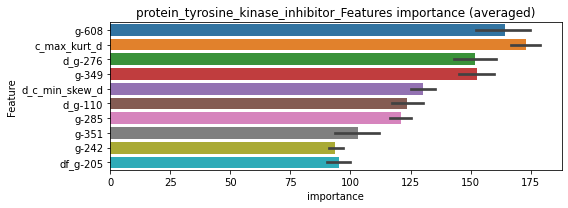

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000303712	valid_1's binary_logloss: 0.00184906


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000324842	valid_1's binary_logloss: 0.00307554


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000300696	valid_1's binary_logloss: 0.000570766
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000300696	valid_1's binary_logloss: 0.000570766


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000295861	valid_1's binary_logloss: 0.000666286


protein_tyrosine_kinase_inhibitor logloss: 0.0015405056811311347
radiopaque_medium, len(trt): 56, len(othr): 3282
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000579168	valid_1's binary_logloss: 0.0221115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000556911	valid_1's binary_logloss: 0.0083508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000557115	valid_1's binary_logloss: 0.00396741
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000551139	valid_1's binary_logloss: 0.0131059


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0050874, Threshold: 0.0126784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0126784, conf_0:0.00887, conf_1:0.01648
Num_p_label: 6.0, Expected: 9.4, Adj_threshold_1: 0.0426784
threshold: 0.0426784, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000564801	valid_1's binary_logloss: 0.021631
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000565573	valid_1's binary_logloss: 0.00735881
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00056168	valid_1's binary_logloss: 0.00366455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00054118	valid_1's binary_logloss: 0.0117699


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0258194, Threshold: 0.0426784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0040181 Vs.target_rate: 0.00235
Num_p_label: 16.0, Expected: 9.4, Threshold: 0.0426784, conf_0:0.03414, conf_1:0.05121
threshold: 0.0426784, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.0011398	valid_1's binary_logloss: 0.0263916
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000574396	valid_1's binary_logloss: 0.00972992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000548322	valid_1's binary_logloss: 0.0154136
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00055656	valid_1's binary_logloss: 0.00887168


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0280362, Threshold: 0.0426784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0047715 Vs.target_rate: 0.00235
Num_p_label: 19.0, Expected: 9.4, Threshold: 0.0426784, conf_0:0.03841, conf_1:0.04695
threshold: 0.0426784, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


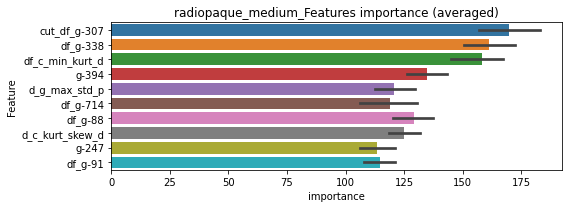

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000589193	valid_1's binary_logloss: 0.0101


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000543479	valid_1's binary_logloss: 0.0105856


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000542081	valid_1's binary_logloss: 0.00577422
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000539843	valid_1's binary_logloss: 0.00576104


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds


radiopaque_medium logloss: 0.01071430160772403


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00098609	valid_1's binary_logloss: 0.0164086


raf_inhibitor, len(trt): 223, len(othr): 3258
target_rate: 0.0093642 → Adj_target_rate: 0.0083226


selected negative label: 3258


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.12241	valid_1's binary_logloss: 0.231237
Early stopping, best iteration is:
[1894]	training's binary_logloss: 0.074704	valid_1's binary_logloss: 0.216289
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.120661	valid_1's binary_logloss: 0.235329
Early stopping, best iteration is:
[1594]	training's binary_logloss: 0.0850065	valid_1's binary_logloss: 0.223296
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.126103	valid_1's binary_logloss: 0.214926
[2000]	training's binary_logloss: 0.0730177	valid_1's binary_logloss: 0.195947
Early stopping, best iteration is:
[2174]	training's binary_logloss: 0.0678169	valid_1's binary_logloss: 0.19458
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.126438	valid_1's binary_logloss: 0.206068
Early stopping, best itera

1 / 3, AUC score:0.914, PR-AUC:0.856
y_Threshold: 0.1089027, Threshold: 0.3360615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 389 → Positive_corect_labels: 522/3520
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, Expected: 37.3, Threshold: 0.3360615, conf_0:0.23524, conf_1:0.43688
threshold: 0.3360615, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 522.0/3520, y_label_rate: 0.1482955
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0707365	valid_1's binary_logloss: 0.145235
Early stopping, best iteration is:
[1714]	training's binary_logloss: 0.0437332	valid_1's binary_logloss: 0.128226
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0751886	valid_1's binary_logloss: 0.128431
[2000]	training's binary_logloss: 0.0406643	valid_1's binary_logloss: 0.10631
[3000]	training's binary_logloss: 0.0273535	valid_1's binary_logloss: 0.0994271
Early stopping, best iteration is:
[3237]	training's binary_logloss: 0.0253688	valid_1's binary_logloss: 0.0982053
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0778556	valid_1's binary_logloss: 0.112188
[2000]	training's binary_logloss: 0.042618	valid_1's binary_logloss: 0.0855703
[3000]	training's binary_logloss: 0.0287169	valid_1's binary_logloss: 0.0762506
Early stopping, best iteration is:

2 / 3, AUC score:0.994, PR-AUC:0.979
y_Threshold: 0.0914570, Threshold: 0.3360615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 484.0/3444
p_label_rate: 0.0416876 Vs.target_rate: 0.00936
Num_p_label: 166.0, Expected: 37.3, Threshold: 0.3360615, conf_0:0.26885, conf_1:0.40327
Num_p_label: 159.0, Expected: 37.3, Adj_threshold_1: 0.3660615
Num_p_label: 151.0, Expected: 37.3, Adj_threshold_2: 0.3960615
Num_p_label: 148.0, Expected: 37.3, Adj_threshold_3: 0.4260615
Num_p_label: 140.0, Expected: 37.3, Adj_threshold_4: 0.4560615
Num_p_label: 133.0, Expected: 37.3, Adj_threshold_5: 0.4860615
Num_p_label: 127.0, Expected: 37.3, Adj_threshold_6: 0.5160615
Num_p_label: 114.0, Expected: 37.3, Adj_threshold_7: 0.5460615
Num_p_label: 106.0, Expected: 37.3, Adj_threshold_8: 0.5760615
Num_p_label: 98.0, Expected: 37.3, Adj_threshold_9: 0.6060615
Num_p_label: 88.0, Expected: 37.3, Adj_threshold_10: 0.6360615
threshold: 0.6360615, positive_p_label: 88.0/3982, p_label_rate: 0.

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0591078	valid_1's binary_logloss: 0.107198
[2000]	training's binary_logloss: 0.0309251	valid_1's binary_logloss: 0.0827263
Early stopping, best iteration is:
[2803]	training's binary_logloss: 0.0221579	valid_1's binary_logloss: 0.0756812
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0615295	valid_1's binary_logloss: 0.0954836
[2000]	training's binary_logloss: 0.0325003	valid_1's binary_logloss: 0.0695146
[3000]	training's binary_logloss: 0.0216328	valid_1's binary_logloss: 0.0607849
Early stopping, best iteration is:
[3792]	training's binary_logloss: 0.0170508	valid_1's binary_logloss: 0.0570454
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0639737	valid_1's binary_logloss: 0.0859211
[2000]	training's binary_logloss: 0.0337008	valid_1's binary_logloss: 0.0596954
[3000]	training's binary_log

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0967956, Threshold: 0.6360615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 466.0/3408
p_label_rate: 0.0336514 Vs.target_rate: 0.00936
Num_p_label: 134.0, Expected: 37.3, Threshold: 0.6360615, conf_0:0.57246, conf_1:0.69967
Num_p_label: 125.0, Expected: 37.3, Adj_threshold_1: 0.6660615
Num_p_label: 116.0, Expected: 37.3, Adj_threshold_2: 0.6960615
Num_p_label: 107.0, Expected: 37.3, Adj_threshold_3: 0.7260615
Num_p_label: 93.0, Expected: 37.3, Adj_threshold_4: 0.7560615
Num_p_label: 74.0, Expected: 37.3, Adj_threshold_5: 0.7860615
Num_p_label: 45.0, Expected: 37.3, Adj_threshold_6: 0.8160615
threshold: 0.8160615, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 466.0/3408, y_label_rate: 0.1367371


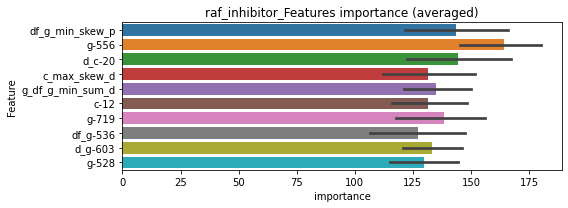

len(train_index) : 2556
len(valid_index) : 852
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0674318	valid_1's binary_logloss: 0.120426
[2000]	training's binary_logloss: 0.0358691	valid_1's binary_logloss: 0.0905419
[3000]	training's binary_logloss: 0.0243927	valid_1's binary_logloss: 0.0801683
Early stopping, best iteration is:
[3718]	training's binary_logloss: 0.0198291	valid_1's binary_logloss: 0.0763484


len(train_index) : 2556
len(valid_index) : 852
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.075492	valid_1's binary_logloss: 0.094155
[2000]	training's binary_logloss: 0.0409072	valid_1's binary_logloss: 0.0609534
[3000]	training's binary_logloss: 0.0280001	valid_1's binary_logloss: 0.0492194
[4000]	training's binary_logloss: 0.0212003	valid_1's binary_logloss: 0.0430783
[5000]	training's binary_logloss: 0.0168607	valid_1's binary_logloss: 0.038867
[6000]	training's binary_logloss: 0.0140069	valid_1's binary_logloss: 0.0361347
[7000]	training's binary_logloss: 0.0120164	valid_1's binary_logloss: 0.0341593
[8000]	training's binary_logloss: 0.0105345	valid_1's binary_logloss: 0.0326812
[9000]	training's binary_logloss: 0.00935329	valid_1's binary_logloss: 0.0314282
[10000]	training's binary_logloss: 0.00842227	valid_1's binary_logloss: 0.0304868
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00842227	valid_1's binary_logloss: 0.0304868


len(train_index) : 2556
len(valid_index) : 852
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0741981	valid_1's binary_logloss: 0.100778
[2000]	training's binary_logloss: 0.04008	valid_1's binary_logloss: 0.0677974
[3000]	training's binary_logloss: 0.0274479	valid_1's binary_logloss: 0.0558867
[4000]	training's binary_logloss: 0.0208271	valid_1's binary_logloss: 0.0498234
[5000]	training's binary_logloss: 0.0165805	valid_1's binary_logloss: 0.0457598
[6000]	training's binary_logloss: 0.0137938	valid_1's binary_logloss: 0.0430401
[7000]	training's binary_logloss: 0.0118208	valid_1's binary_logloss: 0.0411287
Early stopping, best iteration is:
[7244]	training's binary_logloss: 0.0114153	valid_1's binary_logloss: 0.040671


len(train_index) : 2556
len(valid_index) : 852
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0736296	valid_1's binary_logloss: 0.100256
[2000]	training's binary_logloss: 0.0394569	valid_1's binary_logloss: 0.0667191
[3000]	training's binary_logloss: 0.0270084	valid_1's binary_logloss: 0.0549051
[4000]	training's binary_logloss: 0.0204371	valid_1's binary_logloss: 0.0490751
[5000]	training's binary_logloss: 0.0162282	valid_1's binary_logloss: 0.0448371
[6000]	training's binary_logloss: 0.0135099	valid_1's binary_logloss: 0.0422989
[7000]	training's binary_logloss: 0.0115774	valid_1's binary_logloss: 0.0402654
Early stopping, best iteration is:
[7052]	training's binary_logloss: 0.011496	valid_1's binary_logloss: 0.0401556


raf_inhibitor logloss: 0.04691543862307409
raf_inhibitor is unpredictable(><)!
ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000241248	valid_1's binary_logloss: 0.00174213
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000247485	valid_1's binary_logloss: 0.000999958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000235575	valid_1's binary_logloss: 0.00113212
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009881, Threshold: 0.0110296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0110296, conf_0:0.00772, conf_1:0.01434
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0410296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_2: 0.0710296
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.1010296
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.1310296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.1610296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.1910296


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000244599	valid_1's binary_logloss: 0.00128497


Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.2210296
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_8: 0.2510296
threshold: 0.2510296, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000222637	valid_1's binary_logloss: 0.00177364
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000224124	valid_1's binary_logloss: 0.000631028
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000217751	valid_1's binary_logloss: 0.000311324
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0526686, Threshold: 0.2510296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00050
Num_p_label: 19.0, Expected: 2.0, Threshold: 0.2510296, conf_0:0.20082, conf_1:0.30124
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_1: 0.2810296
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.3110296
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_3: 0.3410296
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_4: 0.3710296
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_5: 0.4010296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_6: 0.4310296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_7: 0.4610296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_8: 0.4910296
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_9: 0.5210296


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000224528	valid_1's binary_logloss: 0.0028682


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_10: 0.5510296
threshold: 0.5510296, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222637	valid_1's binary_logloss: 0.00177364
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000224124	valid_1's binary_logloss: 0.000631028
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000217751	valid_1's binary_logloss: 0.000311324
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0526686, Threshold: 0.5510296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, Expected: 2.0, Threshold: 0.5510296, conf_0:0.49593, conf_1:0.60613
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.5810296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.6110296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.6410296
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.6710296
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.7010296


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000224528	valid_1's binary_logloss: 0.0028682


threshold: 0.7010296, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


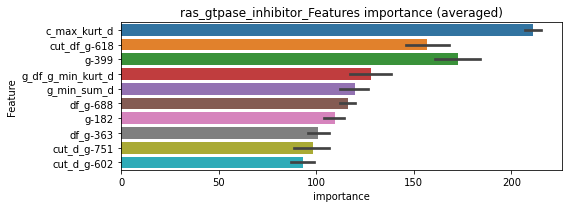

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000221793	valid_1's binary_logloss: 0.000961658
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000221093	valid_1's binary_logloss: 0.000560931


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


[1000]	training's binary_logloss: 0.000218179	valid_1's binary_logloss: 0.000357093
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000218179	valid_1's binary_logloss: 0.000357093


================================= fold 4/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


ras_gtpase_inhibitor logloss: 0.00080761302378241


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000227136	valid_1's binary_logloss: 0.00135031


retinoid_receptor_agonist, len(trt): 67, len(othr): 3277
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3277


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000600013	valid_1's binary_logloss: 0.0199899
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000591521	valid_1's binary_logloss: 0.0124193
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00120843	valid_1's binary_logloss: 0.0268694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00070928	valid_1's binary_logloss: 0.019116


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0079338, Threshold: 0.1120765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.1120765, conf_0:0.07845, conf_1:0.14570
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_1: 0.1420765
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_2: 0.1720765
Num_p_label: 31.0, Expected: 11.2, Adj_threshold_3: 0.2020765
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_4: 0.2320765
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_5: 0.2620765
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_6: 0.2920765
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_7: 0.3220765
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_8: 0.3520765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_9: 0.3820765
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_10: 0.4120765
threshold: 0.4120765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000568118	valid_1's binary_logloss: 0.012655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00056491	valid_1's binary_logloss: 0.0124414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000819545	valid_1's binary_logloss: 0.022134
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000613118	valid_1's binary_logloss: 0.0154896


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0573141, Threshold: 0.4120765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3786
p_label_rate: 0.0067805 Vs.target_rate: 0.00281
Num_p_label: 27.0, Expected: 11.2, Threshold: 0.4120765, conf_0:0.32966, conf_1:0.49449
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_1: 0.4420765
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_2: 0.4720765
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_3: 0.5020765
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_4: 0.5320765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_5: 0.5620765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_6: 0.5920765
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_7: 0.6220765
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_8: 0.6520765
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_9: 0.6820765
threshold: 0.6820765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3786, y_label_rate: 0.1711569
===========

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000578602	valid_1's binary_logloss: 0.0150932
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000560712	valid_1's binary_logloss: 0.00858464
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000558078	valid_1's binary_logloss: 0.00988236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000588664	valid_1's binary_logloss: 0.0205978


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509075, Threshold: 0.6820765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0040181 Vs.target_rate: 0.00281
Num_p_label: 16.0, Expected: 11.2, Threshold: 0.6820765, conf_0:0.61387, conf_1:0.75028
threshold: 0.6820765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3782, y_label_rate: 0.1708091


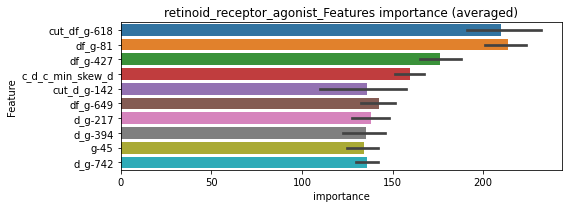

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000823011	valid_1's binary_logloss: 0.0172137


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000638855	valid_1's binary_logloss: 0.0116034


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000735229	valid_1's binary_logloss: 0.0152572


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557902	valid_1's binary_logloss: 0.0128442
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000562813	valid_1's binary_logloss: 0.012837


retinoid_receptor_agonist logloss: 0.01422790916358012
retinoid_receptor_antagonist, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000158996	valid_1's binary_logloss: 0.0002558
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000153993	valid_1's binary_logloss: 0.00118872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000157251	valid_1's binary_logloss: 0.00019166
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004254, Threshold: 0.0018458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0018458, conf_0:0.00129, conf_1:0.00240
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0318458
threshold: 0.0318458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000157616	valid_1's binary_logloss: 0.00019353


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000145828	valid_1's binary_logloss: 0.000197993
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000145722	valid_1's binary_logloss: 0.000818692
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000144298	valid_1's binary_logloss: 0.0001582
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0993328, Threshold: 0.0318458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00025
Num_p_label: 11.0, Expected: 1.0, Threshold: 0.0318458, conf_0:0.02548, conf_1:0.03821
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0618458
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0918458
threshold: 0.0918458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000145643	valid_1's binary_logloss: 0.000188183


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000145828	valid_1's binary_logloss: 0.000197993
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000145722	valid_1's binary_logloss: 0.000818692
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000144298	valid_1's binary_logloss: 0.0001582
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0993328, Threshold: 0.0918458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0918458, conf_0:0.08266, conf_1:0.10103
threshold: 0.0918458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000145643	valid_1's binary_logloss: 0.000188183


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


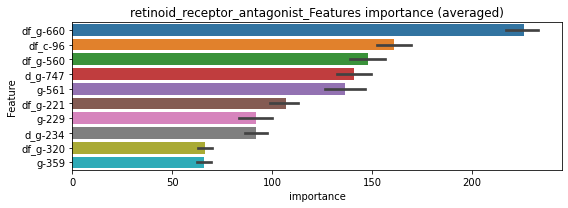

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00015086	valid_1's binary_logloss: 0.000204671
Early stopping, best iteration is:
[1215]	training's binary_logloss: 0.000148034	valid_1's binary_logloss: 0.000201582


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149936	valid_1's binary_logloss: 0.000336083
Early stopping, best iteration is:
[1150]	training's binary_logloss: 0.000147451	valid_1's binary_logloss: 0.000331931


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150277	valid_1's binary_logloss: 0.000167362


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.000147129	valid_1's binary_logloss: 0.00016394
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149814	valid_1's binary_logloss: 0.000197534
Early stopping, best iteration is:
[1197]	training's binary_logloss: 0.000146523	valid_1's binary_logloss: 0.00019342


retinoid_receptor_antagonist logloss: 0.00022271283326585052
rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3284
target_rate: 0.0014697 → Adj_target_rate: 0.0017245


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000386481	valid_1's binary_logloss: 0.00556873
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000390844	valid_1's binary_logloss: 0.00220317
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000401822	valid_1's binary_logloss: 0.00156343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000402581	valid_1's binary_logloss: 0.00728983


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027323, Threshold: 0.0088430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, Expected: 5.9, Threshold: 0.0088430, conf_0:0.00619, conf_1:0.01150
Num_p_label: 8.0, Expected: 5.9, Adj_threshold_1: 0.0388430
threshold: 0.0388430, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000406353	valid_1's binary_logloss: 0.00464897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000381412	valid_1's binary_logloss: 0.00188253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000378645	valid_1's binary_logloss: 0.00137419
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388802	valid_1's binary_logloss: 0.00802916


y_Threshold: 0.0524811, Threshold: 0.0388430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00147
Num_p_label: 18.0, Expected: 5.9, Threshold: 0.0388430, conf_0:0.03107, conf_1:0.04661
Num_p_label: 10.0, Expected: 5.9, Adj_threshold_1: 0.0688430
threshold: 0.0688430, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000406353	valid_1's binary_logloss: 0.00464897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000381412	valid_1's binary_logloss: 0.00188253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000378645	valid_1's binary_logloss: 0.00137419
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388802	valid_1's binary_logloss: 0.00802916


y_Threshold: 0.0524811, Threshold: 0.0688430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00147
Num_p_label: 10.0, Expected: 5.9, Threshold: 0.0688430, conf_0:0.06196, conf_1:0.07573
threshold: 0.0688430, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


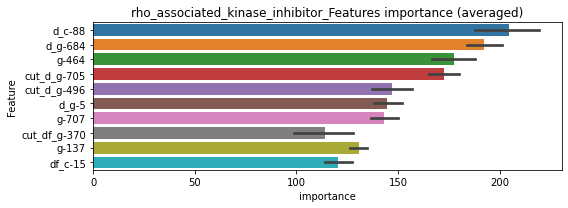

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000443649	valid_1's binary_logloss: 0.00472694


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000387845	valid_1's binary_logloss: 0.00205123
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000388025	valid_1's binary_logloss: 0.00204981


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000392353	valid_1's binary_logloss: 0.00169302
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000392353	valid_1's binary_logloss: 0.00169302


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000417958	valid_1's binary_logloss: 0.00740796


rho_associated_kinase_inhibitor logloss: 0.003969788163542875
ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000435251	valid_1's binary_logloss: 0.00511967
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000433463	valid_1's binary_logloss: 0.0154395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000428876	valid_1's binary_logloss: 0.00324159
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000440358	valid_1's binary_logloss: 0.00648012


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0042396, Threshold: 0.0168931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0168931, conf_0:0.01183, conf_1:0.02196
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_1: 0.0468931
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_2: 0.0768931
threshold: 0.0768931, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000402945	valid_1's binary_logloss: 0.00473002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000426008	valid_1's binary_logloss: 0.0190255
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000414182	valid_1's binary_logloss: 0.00160877
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000425687	valid_1's binary_logloss: 0.00558066


y_Threshold: 0.0312586, Threshold: 0.0768931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0080362 Vs.target_rate: 0.00155
Num_p_label: 32.0, Expected: 6.2, Threshold: 0.0768931, conf_0:0.06151, conf_1:0.09227
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_1: 0.1068931
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.1368931
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_3: 0.1668931
threshold: 0.1668931, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000400513	valid_1's binary_logloss: 0.00631995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000439352	valid_1's binary_logloss: 0.00625045
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00040502	valid_1's binary_logloss: 0.00304631
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408874	valid_1's binary_logloss: 0.013205


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0442352, Threshold: 0.1668931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0042692 Vs.target_rate: 0.00155
Num_p_label: 17.0, Expected: 6.2, Threshold: 0.1668931, conf_0:0.15020, conf_1:0.18358
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.1968931
threshold: 0.1968931, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3805, y_label_rate: 0.1718791


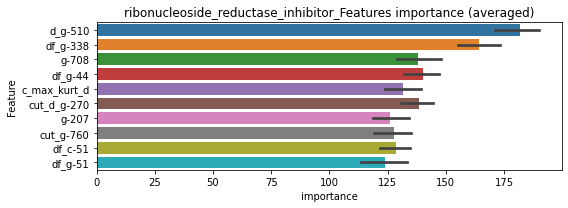

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000402549	valid_1's binary_logloss: 0.00231908


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000418729	valid_1's binary_logloss: 0.00225364


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000407754	valid_1's binary_logloss: 0.00437841


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000439685	valid_1's binary_logloss: 0.0103358


ribonucleoside_reductase_inhibitor logloss: 0.004821203826306415
rna_polymerase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000354943	valid_1's binary_logloss: 0.00148762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00033819	valid_1's binary_logloss: 0.00385745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000345819	valid_1's binary_logloss: 0.000897793
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020960, Threshold: 0.0057738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000354238	valid_1's binary_logloss: 0.000996872


p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0057738, conf_0:0.00404, conf_1:0.00751
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_1: 0.0357738
threshold: 0.0357738, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000335057	valid_1's binary_logloss: 0.00150299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000330474	valid_1's binary_logloss: 0.00306161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000339309	valid_1's binary_logloss: 0.000812289
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1006882, Threshold: 0.0357738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00105
Num_p_label: 19.0, Expected: 4.2, Threshold: 0.0357738, conf_0:0.02862, conf_1:0.04293
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0657738


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000341008	valid_1's binary_logloss: 0.000792369


Num_p_label: 7.0, Expected: 4.2, Adj_threshold_2: 0.0957738
threshold: 0.0957738, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000335057	valid_1's binary_logloss: 0.00150299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000330474	valid_1's binary_logloss: 0.00306161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000339309	valid_1's binary_logloss: 0.000812289
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1006882, Threshold: 0.0957738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0957738, conf_0:0.08620, conf_1:0.10535


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000341008	valid_1's binary_logloss: 0.000792369


threshold: 0.0957738, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


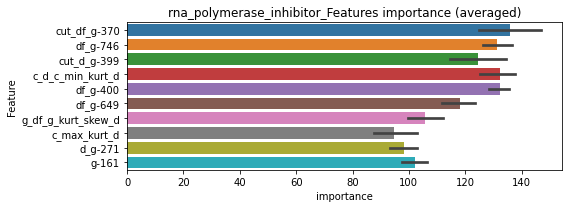

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000348768	valid_1's binary_logloss: 0.00137485


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000348446	valid_1's binary_logloss: 0.00249289


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000344233	valid_1's binary_logloss: 0.000846718


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000341533	valid_1's binary_logloss: 0.000768076


rna_polymerase_inhibitor logloss: 0.0013709289075839973


mutually exclusive columns: serotonin_receptor_agonist


serotonin_receptor_agonist, len(trt): 236, len(othr): 5845
target_rate: 0.0099101 → Adj_target_rate: 0.0087332


selected negative label: 5845


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0840234	valid_1's binary_logloss: 0.140136
Early stopping, best iteration is:
[1622]	training's binary_logloss: 0.0578145	valid_1's binary_logloss: 0.134153
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0811637	valid_1's binary_logloss: 0.152864
Early stopping, best iteration is:
[1097]	training's binary_logloss: 0.0761829	valid_1's binary_logloss: 0.151983
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0847556	valid_1's binary_logloss: 0.134747
Early stopping, best iteration is:
[1203]	training's binary_logloss: 0.0745615	valid_1's binary_logloss: 0.131636
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0846247	valid_1's binary_logloss: 0.135377
Early stopping, best iteration is:
[1918]	training's binary_logloss: 0.0502425	valid_1's binary_lo

1 / 3, AUC score:0.949, PR-AUC:0.912
y_Threshold: 0.0679937, Threshold: 0.1015146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 556 → Positive_corect_labels: 1008/6458
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, Expected: 39.5, Threshold: 0.1015146, conf_0:0.07106, conf_1:0.13197
threshold: 0.1015146, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1008.0/6458, y_label_rate: 0.1560855
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0400531	valid_1's binary_logloss: 0.0622591
[2000]	training's binary_logloss: 0.0223505	valid_1's binary_logloss: 0.0533793
Early stopping, best iteration is:
[2515]	training's binary_logloss: 0.0177686	valid_1's binary_logloss: 0.0514564
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0380972	valid_1's binary_logloss: 0.0644193
[2000]	training's binary_logloss: 0.0211848	valid_1's binary_logloss: 0.0572829
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0185482	valid_1's binary_logloss: 0.0565108
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0389863	valid_1's binary_logloss: 0.0599534
[2000]	training's binary_logloss: 0.0217142	valid_1's binary_logloss: 0.0520142
Early stopping, best iteration is:
[2654]	training's binary_logloss: 0.0163181	valid_1's binary_logloss: 0.

2 / 3, AUC score:0.997, PR-AUC:0.989
y_Threshold: 0.0543363, Threshold: 0.1015146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 956.0/6354
p_label_rate: 0.0148167 Vs.target_rate: 0.00991
Num_p_label: 59.0, Expected: 39.5, Threshold: 0.1015146, conf_0:0.08121, conf_1:0.12182
threshold: 0.1015146, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 956.0/6354, y_label_rate: 0.1504564
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0207359	valid_1's binary_logloss: 0.0316262
[2000]	training's binary_logloss: 0.011233	valid_1's binary_logloss: 0.0239544
[3000]	training's binary_logloss: 0.00764658	valid_1's binary_logloss: 0.0214137
Early stopping, best iteration is:
[3592]	training's binary_logloss: 0.00639343	valid_1's binary_logloss: 0.0206012
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0224555	valid_1's binary_logloss: 0.0245856
[2000]	training's binary_logloss: 0.0123279	valid_1's binary_logloss: 0.0159074
[3000]	training's binary_logloss: 0.0084196	valid_1's binary_logloss: 0.0130219
[4000]	training's binary_logloss: 0.00632283	valid_1's binary_logloss: 0.0114968
[5000]	training's binary_logloss: 0.00506744	valid_1's binary_logloss: 0.0105501
[6000]	training's binary_logloss: 0.00423096	valid_1's binary_logloss: 0.00993854
[7000]	training's binary_logloss: 0.00

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0716575, Threshold: 0.1015146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 945.0/6332
p_label_rate: 0.0188348 Vs.target_rate: 0.00991
Num_p_label: 75.0, Expected: 39.5, Threshold: 0.1015146, conf_0:0.09136, conf_1:0.11167
Num_p_label: 64.0, Expected: 39.5, Adj_threshold_1: 0.1315146
Num_p_label: 54.0, Expected: 39.5, Adj_threshold_2: 0.1615146
threshold: 0.1615146, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 945.0/6332, y_label_rate: 0.1492419


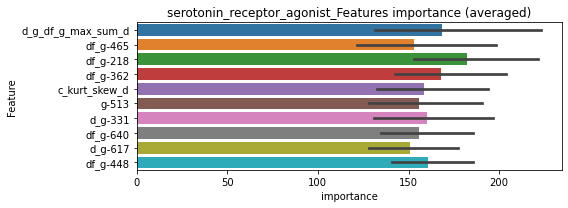

len(train_index) : 4749
len(valid_index) : 1583
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0246985	valid_1's binary_logloss: 0.0341911
[2000]	training's binary_logloss: 0.0123237	valid_1's binary_logloss: 0.0206912
[3000]	training's binary_logloss: 0.00835924	valid_1's binary_logloss: 0.016476
[4000]	training's binary_logloss: 0.00637857	valid_1's binary_logloss: 0.0145307
[5000]	training's binary_logloss: 0.00515871	valid_1's binary_logloss: 0.0133557
[6000]	training's binary_logloss: 0.00435156	valid_1's binary_logloss: 0.0125476
[7000]	training's binary_logloss: 0.00376715	valid_1's binary_logloss: 0.0120231
[8000]	training's binary_logloss: 0.0033364	valid_1's binary_logloss: 0.0116133
[9000]	training's binary_logloss: 0.00299314	valid_1's binary_logloss: 0.011283
Early stopping, best iteration is:
[9408]	training's binary_logloss: 0.00287193	valid_1's binary_logloss: 0.0111897


len(train_index) : 4749
len(valid_index) : 1583
================================= fold 2/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.024459	valid_1's binary_logloss: 0.0333094
[2000]	training's binary_logloss: 0.0121814	valid_1's binary_logloss: 0.0201578
[3000]	training's binary_logloss: 0.00825351	valid_1's binary_logloss: 0.0158537
[4000]	training's binary_logloss: 0.00629334	valid_1's binary_logloss: 0.0137094
[5000]	training's binary_logloss: 0.00510578	valid_1's binary_logloss: 0.0124396
[6000]	training's binary_logloss: 0.00430192	valid_1's binary_logloss: 0.0115385
[7000]	training's binary_logloss: 0.0037237	valid_1's binary_logloss: 0.0109244
[8000]	training's binary_logloss: 0.00329916	valid_1's binary_logloss: 0.0104249
[9000]	training's binary_logloss: 0.00295676	valid_1's binary_logloss: 0.0100588
[10000]	training's binary_logloss: 0.00268461	valid_1's binary_logloss: 0.00979113
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00268461	valid_1's binary_logloss: 0.00979113


len(train_index) : 4749
len(valid_index) : 1583
================================= fold 3/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0245596	valid_1's binary_logloss: 0.0308198
[2000]	training's binary_logloss: 0.012215	valid_1's binary_logloss: 0.0177697
[3000]	training's binary_logloss: 0.00829283	valid_1's binary_logloss: 0.0135767
[4000]	training's binary_logloss: 0.00634139	valid_1's binary_logloss: 0.0115774
[5000]	training's binary_logloss: 0.00513687	valid_1's binary_logloss: 0.010461
[6000]	training's binary_logloss: 0.0043324	valid_1's binary_logloss: 0.00961174
[7000]	training's binary_logloss: 0.00375236	valid_1's binary_logloss: 0.00909008
[8000]	training's binary_logloss: 0.00331871	valid_1's binary_logloss: 0.00867372
[9000]	training's binary_logloss: 0.00298001	valid_1's binary_logloss: 0.00833021
[10000]	training's binary_logloss: 0.00270603	valid_1's binary_logloss: 0.00812287
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00270603	valid_1's binary_logloss: 0.008122

len(train_index) : 4749
len(valid_index) : 1583
================================= fold 4/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0253126	valid_1's binary_logloss: 0.0311501
[2000]	training's binary_logloss: 0.0126292	valid_1's binary_logloss: 0.0179353
[3000]	training's binary_logloss: 0.00860256	valid_1's binary_logloss: 0.0139163
[4000]	training's binary_logloss: 0.00657562	valid_1's binary_logloss: 0.0119255
[5000]	training's binary_logloss: 0.00532325	valid_1's binary_logloss: 0.0106486
[6000]	training's binary_logloss: 0.00447966	valid_1's binary_logloss: 0.00982764
[7000]	training's binary_logloss: 0.00388117	valid_1's binary_logloss: 0.00929388
[8000]	training's binary_logloss: 0.00343221	valid_1's binary_logloss: 0.00884172
[9000]	training's binary_logloss: 0.00307549	valid_1's binary_logloss: 0.00848314
[10000]	training's binary_logloss: 0.00279439	valid_1's binary_logloss: 0.00823988
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00279439	valid_1's binary_logloss: 0.008

serotonin_receptor_agonist logloss: 0.009335889719991922


mutually exclusive columns: serotonin_receptor_antagonist


serotonin_receptor_antagonist, len(trt): 404, len(othr): 6767
target_rate: 0.0169648 → Adj_target_rate: 0.0137918


selected negative label: 6767


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.106855	valid_1's binary_logloss: 0.192079
Early stopping, best iteration is:
[1616]	training's binary_logloss: 0.073478	valid_1's binary_logloss: 0.186838
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.104842	valid_1's binary_logloss: 0.209991
Early stopping, best iteration is:
[1094]	training's binary_logloss: 0.0985062	valid_1's binary_logloss: 0.208297
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.108226	valid_1's binary_logloss: 0.192849
Early stopping, best iteration is:
[1663]	training's binary_logloss: 0.0725616	valid_1's binary_logloss: 0.18563
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.110541	valid_1's binary_logloss: 0.186455
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.065946	valid_1's binary_logloss: 

1 / 3, AUC score:0.912, PR-AUC:0.857
y_Threshold: 0.0904353, Threshold: 0.1236530, pos_neg_ratio: 0.8000000
Remove_noisy_data: 815 → Positive_corect_labels: 1081/7305
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, Expected: 67.6, Threshold: 0.1236530, conf_0:0.08656, conf_1:0.16075
threshold: 0.1236530, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1081.0/7305, y_label_rate: 0.1479808
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0552025	valid_1's binary_logloss: 0.0843468
[2000]	training's binary_logloss: 0.0296389	valid_1's binary_logloss: 0.07092
[3000]	training's binary_logloss: 0.019656	valid_1's binary_logloss: 0.0665137
Early stopping, best iteration is:
[2993]	training's binary_logloss: 0.0197053	valid_1's binary_logloss: 0.0664796
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0549195	valid_1's binary_logloss: 0.0856119
[2000]	training's binary_logloss: 0.0295418	valid_1's binary_logloss: 0.0723804
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.0231569	valid_1's binary_logloss: 0.0696637
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0544979	valid_1's binary_logloss: 0.0892506
[2000]	training's binary_logloss: 0.0291536	valid_1's binary_logloss: 0.0760891
Early stopping, best iteration

2 / 3, AUC score:0.993, PR-AUC:0.980
y_Threshold: 0.0632833, Threshold: 0.1236530, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 1006.0/7155
p_label_rate: 0.0015068 Vs.target_rate: 0.01696
Num_p_label: 6.0, Expected: 67.6, Threshold: 0.1236530, conf_0:0.09892, conf_1:0.14838
threshold: 0.1236530, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 1006.0/7155, y_label_rate: 0.1406010
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0376445	valid_1's binary_logloss: 0.0528866
[2000]	training's binary_logloss: 0.0198318	valid_1's binary_logloss: 0.0387942
[3000]	training's binary_logloss: 0.013194	valid_1's binary_logloss: 0.0345093
Early stopping, best iteration is:
[3257]	training's binary_logloss: 0.0121103	valid_1's binary_logloss: 0.0337898
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0362025	valid_1's binary_logloss: 0.0568793
[2000]	training's binary_logloss: 0.0188949	valid_1's binary_logloss: 0.0436159
[3000]	training's binary_logloss: 0.0126448	valid_1's binary_logloss: 0.0395229
Early stopping, best iteration is:
[3800]	training's binary_logloss: 0.00989027	valid_1's binary_logloss: 0.0378963
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0354905	valid_1's binary_logloss: 0.0613344
[2000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0540899, Threshold: 0.1236530, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 978.0/7099
p_label_rate: 0.0055249 Vs.target_rate: 0.01696
Num_p_label: 22.0, Expected: 67.6, Threshold: 0.1236530, conf_0:0.11129, conf_1:0.13602
threshold: 0.1236530, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 978.0/7099, y_label_rate: 0.1377659


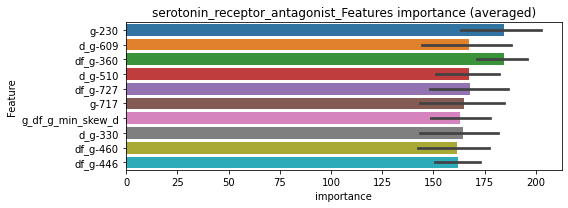

len(train_index) : 5324
len(valid_index) : 1775
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0388622	valid_1's binary_logloss: 0.0551538
[2000]	training's binary_logloss: 0.0208875	valid_1's binary_logloss: 0.0372242
[3000]	training's binary_logloss: 0.0141951	valid_1's binary_logloss: 0.0307253
[4000]	training's binary_logloss: 0.010734	valid_1's binary_logloss: 0.0274258
[5000]	training's binary_logloss: 0.00861944	valid_1's binary_logloss: 0.0255064
[6000]	training's binary_logloss: 0.00718638	valid_1's binary_logloss: 0.0241479
[7000]	training's binary_logloss: 0.00614864	valid_1's binary_logloss: 0.0232109
[8000]	training's binary_logloss: 0.00538501	valid_1's binary_logloss: 0.0224472
Early stopping, best iteration is:
[8697]	training's binary_logloss: 0.00495649	valid_1's binary_logloss: 0.0220068


len(train_index) : 5324
len(valid_index) : 1775
================================= fold 2/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0411186	valid_1's binary_logloss: 0.0484528
[2000]	training's binary_logloss: 0.0221955	valid_1's binary_logloss: 0.0300564
[3000]	training's binary_logloss: 0.0151279	valid_1's binary_logloss: 0.0235472
[4000]	training's binary_logloss: 0.0114063	valid_1's binary_logloss: 0.0201797
[5000]	training's binary_logloss: 0.00912398	valid_1's binary_logloss: 0.0181594
[6000]	training's binary_logloss: 0.00761893	valid_1's binary_logloss: 0.0167918
[7000]	training's binary_logloss: 0.00651655	valid_1's binary_logloss: 0.01578
[8000]	training's binary_logloss: 0.00570775	valid_1's binary_logloss: 0.0150129
[9000]	training's binary_logloss: 0.00507785	valid_1's binary_logloss: 0.0144378
[10000]	training's binary_logloss: 0.00457305	valid_1's binary_logloss: 0.0139888
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00457305	valid_1's binary_logloss: 0.0139888


len(train_index) : 5324
len(valid_index) : 1775
================================= fold 3/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0392685	valid_1's binary_logloss: 0.0578974
[2000]	training's binary_logloss: 0.0211482	valid_1's binary_logloss: 0.0395346
[3000]	training's binary_logloss: 0.014473	valid_1's binary_logloss: 0.0328842
[4000]	training's binary_logloss: 0.0109074	valid_1's binary_logloss: 0.0296502
[5000]	training's binary_logloss: 0.00874798	valid_1's binary_logloss: 0.0278071
[6000]	training's binary_logloss: 0.00732313	valid_1's binary_logloss: 0.0264599
Early stopping, best iteration is:
[6467]	training's binary_logloss: 0.00679052	valid_1's binary_logloss: 0.0260134


len(train_index) : 5325
len(valid_index) : 1774
================================= fold 4/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0397941	valid_1's binary_logloss: 0.0559089
[2000]	training's binary_logloss: 0.02119	valid_1's binary_logloss: 0.0378568
[3000]	training's binary_logloss: 0.0143395	valid_1's binary_logloss: 0.0313386
[4000]	training's binary_logloss: 0.0107488	valid_1's binary_logloss: 0.0280381
[5000]	training's binary_logloss: 0.00861604	valid_1's binary_logloss: 0.0262153
Early stopping, best iteration is:
[5772]	training's binary_logloss: 0.00747935	valid_1's binary_logloss: 0.0252645


serotonin_receptor_antagonist logloss: 0.02181789003661061
serotonin_receptor_antagonist is unpredictable(><)!
serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000481631	valid_1's binary_logloss: 0.0139622
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000481793	valid_1's binary_logloss: 0.0176506
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000480233	valid_1's binary_logloss: 0.00588243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000471486	valid_1's binary_logloss: 0.0163946


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030273, Threshold: 0.0328197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, Expected: 7.4, Threshold: 0.0328197, conf_0:0.02297, conf_1:0.04267
Num_p_label: 22.0, Expected: 7.4, Adj_threshold_1: 0.0628197
Num_p_label: 16.0, Expected: 7.4, Adj_threshold_2: 0.0928197
threshold: 0.0928197, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000480925	valid_1's binary_logloss: 0.0129391
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000535192	valid_1's binary_logloss: 0.0182474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000493064	valid_1's binary_logloss: 0.00651777
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0341137, Threshold: 0.0928197, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000513819	valid_1's binary_logloss: 0.0170887


Remove_noisy_data: 8 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0198393 Vs.target_rate: 0.00185
Num_p_label: 79.0, Expected: 7.4, Threshold: 0.0928197, conf_0:0.07426, conf_1:0.11138
Num_p_label: 67.0, Expected: 7.4, Adj_threshold_1: 0.1228197
Num_p_label: 58.0, Expected: 7.4, Adj_threshold_2: 0.1528197
Num_p_label: 47.0, Expected: 7.4, Adj_threshold_3: 0.1828197
Num_p_label: 44.0, Expected: 7.4, Adj_threshold_4: 0.2128197
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_5: 0.2428197
Num_p_label: 36.0, Expected: 7.4, Adj_threshold_6: 0.2728197
Num_p_label: 33.0, Expected: 7.4, Adj_threshold_7: 0.3028197
Num_p_label: 30.0, Expected: 7.4, Adj_threshold_8: 0.3328197
Num_p_label: 28.0, Expected: 7.4, Adj_threshold_9: 0.3628197
Num_p_label: 23.0, Expected: 7.4, Adj_threshold_10: 0.3928197
threshold: 0.3928197, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000485023	valid_1's binary_logloss: 0.0162296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.0004572	valid_1's binary_logloss: 0.0113446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000465141	valid_1's binary_logloss: 0.0128431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000481083	valid_1's binary_logloss: 0.00472428


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250144, Threshold: 0.3928197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0080362 Vs.target_rate: 0.00185
Num_p_label: 32.0, Expected: 7.4, Threshold: 0.3928197, conf_0:0.35354, conf_1:0.43210
Num_p_label: 28.0, Expected: 7.4, Adj_threshold_1: 0.4228197
Num_p_label: 26.0, Expected: 7.4, Adj_threshold_2: 0.4528197
Num_p_label: 24.0, Expected: 7.4, Adj_threshold_3: 0.4828197
Num_p_label: 21.0, Expected: 7.4, Adj_threshold_4: 0.5128197
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_5: 0.5428197
threshold: 0.5428197, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


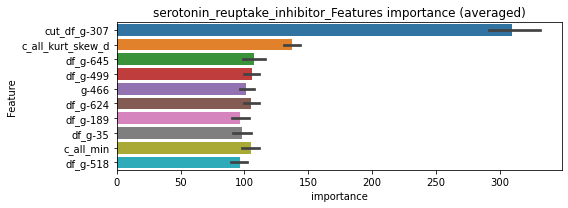

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851


Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000524844	valid_1's binary_logloss: 0.0130789


len(valid_index) : 951
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.00048702	valid_1's binary_logloss: 0.0125242


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000472147	valid_1's binary_logloss: 0.011366


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000504594	valid_1's binary_logloss: 0.00483977


serotonin_reuptake_inhibitor logloss: 0.010453465777037289
sigma_receptor_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000401039	valid_1's binary_logloss: 0.00710632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000417287	valid_1's binary_logloss: 0.0181088
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000423317	valid_1's binary_logloss: 0.00355157
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403025	valid_1's binary_logloss: 0.00330737


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023838, Threshold: 0.0316626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0316626, conf_0:0.02216, conf_1:0.04116
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0616626
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.0916626
threshold: 0.0916626, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000396152	valid_1's binary_logloss: 0.00534393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000387288	valid_1's binary_logloss: 0.0168173
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000410211	valid_1's binary_logloss: 0.00311375
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000398856	valid_1's binary_logloss: 0.00303131


y_Threshold: 0.0234161, Threshold: 0.0916626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0105475 Vs.target_rate: 0.00151
Num_p_label: 42.0, Expected: 6.0, Threshold: 0.0916626, conf_0:0.07333, conf_1:0.11000
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_1: 0.1216626
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_2: 0.1516626
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_3: 0.1816626
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.2116626
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_5: 0.2416626
threshold: 0.2416626, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000404784	valid_1's binary_logloss: 0.0143452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000411384	valid_1's binary_logloss: 0.00449857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000407545	valid_1's binary_logloss: 0.00216446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000389809	valid_1's binary_logloss: 0.0107854


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242347, Threshold: 0.2416626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.2416626, conf_0:0.21750, conf_1:0.26583
threshold: 0.2416626, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


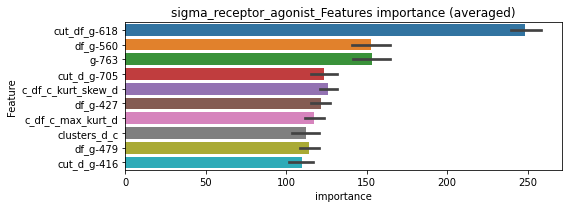

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000512765	valid_1's binary_logloss: 0.0123604


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.00039947	valid_1's binary_logloss: 0.00555644


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000420071	valid_1's binary_logloss: 0.00145783


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000465854	valid_1's binary_logloss: 0.012874


sigma_receptor_agonist logloss: 0.008062151004063753
sigma_receptor_antagonist, len(trt): 36, len(othr): 3279
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3279


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000438156	valid_1's binary_logloss: 0.00994236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000436789	valid_1's binary_logloss: 0.00881885
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000424891	valid_1's binary_logloss: 0.00417025
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000437351	valid_1's binary_logloss: 0.00454057


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029876, Threshold: 0.0092375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0092375, conf_0:0.00647, conf_1:0.01201
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0392375
threshold: 0.0392375, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430604	valid_1's binary_logloss: 0.00881255
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000452593	valid_1's binary_logloss: 0.00834402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000422723	valid_1's binary_logloss: 0.00463718
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238457, Threshold: 0.0392375, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000470779	valid_1's binary_logloss: 0.00419329


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0392375, conf_0:0.03139, conf_1:0.04708
threshold: 0.0392375, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430604	valid_1's binary_logloss: 0.00881255
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000452593	valid_1's binary_logloss: 0.00834402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000422723	valid_1's binary_logloss: 0.00463718
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238457, Threshold: 0.0392375, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000470779	valid_1's binary_logloss: 0.00419329


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0392375, conf_0:0.03531, conf_1:0.04316
threshold: 0.0392375, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


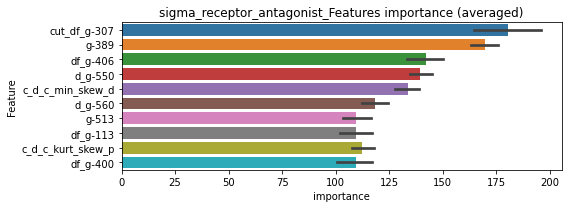

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000449565	valid_1's binary_logloss: 0.00705404


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000523007	valid_1's binary_logloss: 0.00746496


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000436063	valid_1's binary_logloss: 0.00478701


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000434138	valid_1's binary_logloss: 0.00445575


sigma_receptor_antagonist logloss: 0.005941130432914317
smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000331594	valid_1's binary_logloss: 0.00147418
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000321768	valid_1's binary_logloss: 0.00633852
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000331626	valid_1's binary_logloss: 0.000684224
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016507, Threshold: 0.0050948, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000330593	valid_1's binary_logloss: 0.000934356


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0050948, conf_0:0.00357, conf_1:0.00662
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0350948
threshold: 0.0350948, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000322281	valid_1's binary_logloss: 0.00126933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312741	valid_1's binary_logloss: 0.00552611
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000323645	valid_1's binary_logloss: 0.000631628
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244381, Threshold: 0.0350948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0350948, conf_0:0.02808, conf_1:0.04211


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.0003252	valid_1's binary_logloss: 0.00091613


threshold: 0.0350948, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000322281	valid_1's binary_logloss: 0.00126933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312741	valid_1's binary_logloss: 0.00552611
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000323645	valid_1's binary_logloss: 0.000631628
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244381, Threshold: 0.0350948, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.0003252	valid_1's binary_logloss: 0.00091613


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0350948, conf_0:0.03159, conf_1:0.03860
threshold: 0.0350948, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


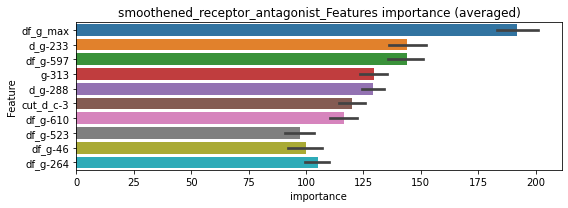

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000332341	valid_1's binary_logloss: 0.00118077


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000326285	valid_1's binary_logloss: 0.00532432


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000329659	valid_1's binary_logloss: 0.000642009


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00032333	valid_1's binary_logloss: 0.000811505
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.00032333	valid_1's binary_logloss: 0.000811505


smoothened_receptor_antagonist logloss: 0.001990313290024979


mutually exclusive columns: sodium_channel_inhibitor


sodium_channel_inhibitor, len(trt): 267, len(othr): 6860
target_rate: 0.0112119 → Adj_target_rate: 0.0096991


selected negative label: 6860


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0804497	valid_1's binary_logloss: 0.128476
Early stopping, best iteration is:
[1539]	training's binary_logloss: 0.0577551	valid_1's binary_logloss: 0.123862
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0764219	valid_1's binary_logloss: 0.14793
Early stopping, best iteration is:
[1104]	training's binary_logloss: 0.071376	valid_1's binary_logloss: 0.147218
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0799299	valid_1's binary_logloss: 0.127219
Early stopping, best iteration is:
[1372]	training's binary_logloss: 0.0628184	valid_1's binary_logloss: 0.123868
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0789335	valid_1's binary_logloss: 0.135513
Early stopping, best iteration is:
[1666]	training's binary_logloss: 0.0526815	valid_1's binary_logl

1 / 3, AUC score:0.953, PR-AUC:0.916
y_Threshold: 0.0652498, Threshold: 0.0934057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 637 → Positive_corect_labels: 1191/7595
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, Expected: 44.6, Threshold: 0.0934057, conf_0:0.06538, conf_1:0.12143
threshold: 0.0934057, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1191.0/7595, y_label_rate: 0.1568137
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0365897	valid_1's binary_logloss: 0.0637108
[2000]	training's binary_logloss: 0.0199004	valid_1's binary_logloss: 0.0568243
Early stopping, best iteration is:
[2264]	training's binary_logloss: 0.0175395	valid_1's binary_logloss: 0.0560543
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0373238	valid_1's binary_logloss: 0.0560968
[2000]	training's binary_logloss: 0.0200775	valid_1's binary_logloss: 0.0491765
Early stopping, best iteration is:
[2477]	training's binary_logloss: 0.016133	valid_1's binary_logloss: 0.0477065
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0373633	valid_1's binary_logloss: 0.0575922
[2000]	training's binary_logloss: 0.0200245	valid_1's binary_logloss: 0.0501992
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0175492	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0425311, Threshold: 0.0934057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 1142.0/7497
p_label_rate: 0.0015068 Vs.target_rate: 0.01121
Num_p_label: 6.0, Expected: 44.6, Threshold: 0.0934057, conf_0:0.07472, conf_1:0.11209
threshold: 0.0934057, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 1142.0/7497, y_label_rate: 0.1523276
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248493	valid_1's binary_logloss: 0.0316361
[2000]	training's binary_logloss: 0.0133342	valid_1's binary_logloss: 0.024307
[3000]	training's binary_logloss: 0.00881747	valid_1's binary_logloss: 0.0217176
[4000]	training's binary_logloss: 0.00652393	valid_1's binary_logloss: 0.0205141
Early stopping, best iteration is:
[4060]	training's binary_logloss: 0.00641629	valid_1's binary_logloss: 0.0204168
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0226938	valid_1's binary_logloss: 0.0432012
[2000]	training's binary_logloss: 0.0122435	valid_1's binary_logloss: 0.0373012
Early stopping, best iteration is:
[2547]	training's binary_logloss: 0.00960037	valid_1's binary_logloss: 0.0360474
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239677	valid_1's binary_logloss: 0.0370747
[2000]	training's binary

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0299285, Threshold: 0.0934057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 1124.0/7461
p_label_rate: 0.0012557 Vs.target_rate: 0.01121
Num_p_label: 5.0, Expected: 44.6, Threshold: 0.0934057, conf_0:0.08407, conf_1:0.10275
threshold: 0.0934057, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1124.0/7461, y_label_rate: 0.1506500


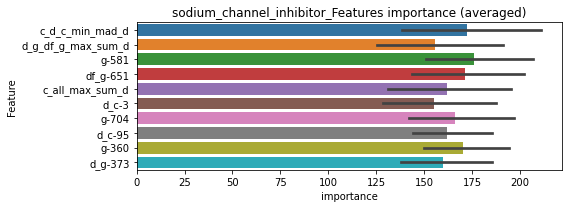

len(train_index) : 5595
len(valid_index) : 1866
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0269014	valid_1's binary_logloss: 0.0304087
[2000]	training's binary_logloss: 0.0147907	valid_1's binary_logloss: 0.0189589
[3000]	training's binary_logloss: 0.0102698	valid_1's binary_logloss: 0.0152875
[4000]	training's binary_logloss: 0.00775297	valid_1's binary_logloss: 0.0132726
[5000]	training's binary_logloss: 0.00620106	valid_1's binary_logloss: 0.0120538
[6000]	training's binary_logloss: 0.00515954	valid_1's binary_logloss: 0.0112014
[7000]	training's binary_logloss: 0.00441909	valid_1's binary_logloss: 0.0106299
[8000]	training's binary_logloss: 0.0038653	valid_1's binary_logloss: 0.0101368
[9000]	training's binary_logloss: 0.00344226	valid_1's binary_logloss: 0.00977357
Early stopping, best iteration is:
[9303]	training's binary_logloss: 0.00332687	valid_1's binary_logloss: 0.00967858


len(train_index) : 5596
len(valid_index) : 1865
================================= fold 2/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0249638	valid_1's binary_logloss: 0.0347388
[2000]	training's binary_logloss: 0.0134429	valid_1's binary_logloss: 0.0237371
[3000]	training's binary_logloss: 0.00935345	valid_1's binary_logloss: 0.0203819
[4000]	training's binary_logloss: 0.00708621	valid_1's binary_logloss: 0.0186995
[5000]	training's binary_logloss: 0.0056917	valid_1's binary_logloss: 0.0177724
[6000]	training's binary_logloss: 0.00474949	valid_1's binary_logloss: 0.0171179
Early stopping, best iteration is:
[6282]	training's binary_logloss: 0.00453512	valid_1's binary_logloss: 0.0169763


len(train_index) : 5596
len(valid_index) : 1865
================================= fold 3/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261672	valid_1's binary_logloss: 0.0310078
[2000]	training's binary_logloss: 0.0142328	valid_1's binary_logloss: 0.0200822
[3000]	training's binary_logloss: 0.00980909	valid_1's binary_logloss: 0.0166918
[4000]	training's binary_logloss: 0.00739625	valid_1's binary_logloss: 0.0149364
[5000]	training's binary_logloss: 0.00591518	valid_1's binary_logloss: 0.0139066
[6000]	training's binary_logloss: 0.00492286	valid_1's binary_logloss: 0.0131917
[7000]	training's binary_logloss: 0.00421306	valid_1's binary_logloss: 0.0127429
[8000]	training's binary_logloss: 0.00368526	valid_1's binary_logloss: 0.0123886
[9000]	training's binary_logloss: 0.00327618	valid_1's binary_logloss: 0.0120823
[10000]	training's binary_logloss: 0.00294742	valid_1's binary_logloss: 0.0118892
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00294742	valid_1's binary_logloss: 0.0118892


len(train_index) : 5596
len(valid_index) : 1865
================================= fold 4/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0251436	valid_1's binary_logloss: 0.0343962
[2000]	training's binary_logloss: 0.013521	valid_1's binary_logloss: 0.0233614
[3000]	training's binary_logloss: 0.00943821	valid_1's binary_logloss: 0.0200193
[4000]	training's binary_logloss: 0.00715528	valid_1's binary_logloss: 0.0182662
[5000]	training's binary_logloss: 0.00573119	valid_1's binary_logloss: 0.0172398
[6000]	training's binary_logloss: 0.00478762	valid_1's binary_logloss: 0.0166094
[7000]	training's binary_logloss: 0.00409925	valid_1's binary_logloss: 0.0161821
Early stopping, best iteration is:
[7076]	training's binary_logloss: 0.00405187	valid_1's binary_logloss: 0.0161319


sodium_channel_inhibitor logloss: 0.013668472089644402
sphingosine_receptor_agonist, len(trt): 32, len(othr): 3285
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000393727	valid_1's binary_logloss: 0.00582477
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000405387	valid_1's binary_logloss: 0.00561067
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000406683	valid_1's binary_logloss: 0.00446424
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022949, Threshold: 0.0062193, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000403004	valid_1's binary_logloss: 0.00249726


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0062193, conf_0:0.00435, conf_1:0.00809
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0362193
threshold: 0.0362193, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00040333	valid_1's binary_logloss: 0.00490738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000398468	valid_1's binary_logloss: 0.00464043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00445429
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384674	valid_1's binary_logloss: 0.0021576


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250779, Threshold: 0.0362193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00134
Num_p_label: 12.0, Expected: 5.4, Threshold: 0.0362193, conf_0:0.02898, conf_1:0.04346
threshold: 0.0362193, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00040333	valid_1's binary_logloss: 0.00490738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000398468	valid_1's binary_logloss: 0.00464043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00445429
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384674	valid_1's binary_logloss: 0.0021576


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250779, Threshold: 0.0362193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00134
Num_p_label: 12.0, Expected: 5.4, Threshold: 0.0362193, conf_0:0.03260, conf_1:0.03984
threshold: 0.0362193, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


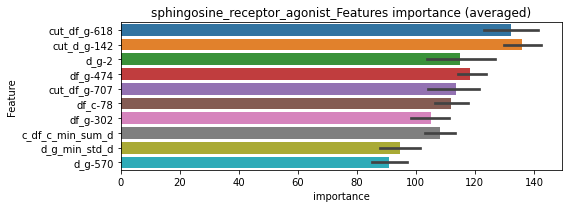

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000403368	valid_1's binary_logloss: 0.0053345


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.00039775	valid_1's binary_logloss: 0.00418013


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000402206	valid_1's binary_logloss: 0.00357358


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000408743	valid_1's binary_logloss: 0.00197148


sphingosine_receptor_agonist logloss: 0.0037654450146557767
src_inhibitor, len(trt): 71, len(othr): 3283
target_rate: 0.0029814 → Adj_target_rate: 0.0031461


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000838864	valid_1's binary_logloss: 0.0506197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00106538	valid_1's binary_logloss: 0.0367246
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000619879	valid_1's binary_logloss: 0.00376112
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000878765	valid_1's binary_logloss: 0.0318531


1 / 3, AUC score:0.998, PR-AUC:0.997
y_Threshold: 0.0063855, Threshold: 0.0346430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, Expected: 11.9, Threshold: 0.0346430, conf_0:0.02425, conf_1:0.04504
Num_p_label: 25.0, Expected: 11.9, Adj_threshold_1: 0.0646430
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_2: 0.0946430
threshold: 0.0946430, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000686419	valid_1's binary_logloss: 0.0223518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000807823	valid_1's binary_logloss: 0.0368935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00121995	valid_1's binary_logloss: 0.021282
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000598751	valid_1's binary_logloss: 0.015597


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0237866, Threshold: 0.0946430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0095429 Vs.target_rate: 0.00298
Num_p_label: 38.0, Expected: 11.9, Threshold: 0.0946430, conf_0:0.07571, conf_1:0.11357
Num_p_label: 27.0, Expected: 11.9, Adj_threshold_1: 0.1246430
Num_p_label: 19.0, Expected: 11.9, Adj_threshold_2: 0.1546430
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_3: 0.1846430
threshold: 0.1846430, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 649.0/3793, y_label_rate: 0.1711047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000621069	valid_1's binary_logloss: 0.0228495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000605606	valid_1's binary_logloss: 0.0206857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000571588	valid_1's binary_logloss: 0.0163085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000554911	valid_1's binary_logloss: 0.0121343


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0197454, Threshold: 0.1846430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 647.0/3789
p_label_rate: 0.0060271 Vs.target_rate: 0.00298
Num_p_label: 24.0, Expected: 11.9, Threshold: 0.1846430, conf_0:0.16618, conf_1:0.20311
Num_p_label: 20.0, Expected: 11.9, Adj_threshold_1: 0.2146430
Num_p_label: 18.0, Expected: 11.9, Adj_threshold_2: 0.2446430
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_3: 0.2746430
threshold: 0.2746430, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 647.0/3789, y_label_rate: 0.1707575


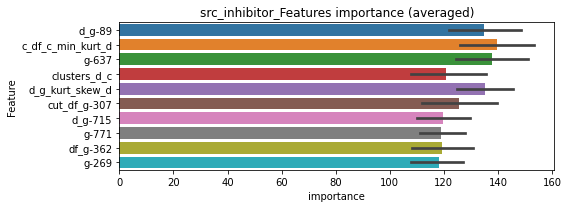

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000880843	valid_1's binary_logloss: 0.0249554


================================= fold 2/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000575067	valid_1's binary_logloss: 0.0114388
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000580868	valid_1's binary_logloss: 0.0114302


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000874045	valid_1's binary_logloss: 0.0163411


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000644242	valid_1's binary_logloss: 0.0157698


src_inhibitor logloss: 0.017126209693802692
steroid, len(trt): 79, len(othr): 3282
target_rate: 0.0033174 → Adj_target_rate: 0.0034449


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000912989	valid_1's binary_logloss: 0.037644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000796518	valid_1's binary_logloss: 0.0304979
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000896976	valid_1's binary_logloss: 0.034007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000658237	valid_1's binary_logloss: 0.0262682


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0085797, Threshold: 0.2436510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, Expected: 13.2, Threshold: 0.2436510, conf_0:0.17056, conf_1:0.31675
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_1: 0.2736510
Num_p_label: 36.0, Expected: 13.2, Adj_threshold_2: 0.3036510
Num_p_label: 34.0, Expected: 13.2, Adj_threshold_3: 0.3336510
Num_p_label: 31.0, Expected: 13.2, Adj_threshold_4: 0.3636510
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_5: 0.3936510
Num_p_label: 24.0, Expected: 13.2, Adj_threshold_6: 0.4236510
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_7: 0.4536510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_8: 0.4836510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_9: 0.5136510
Num_p_label: 19.0, Expected: 13.2, Adj_threshold_10: 0.5436510
threshold: 0.5436510, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.00063434	valid_1's binary_logloss: 0.0247305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00108964	valid_1's binary_logloss: 0.0336989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000646382	valid_1's binary_logloss: 0.0276127
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000795345	valid_1's binary_logloss: 0.0354915


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0333286, Threshold: 0.5436510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0110497 Vs.target_rate: 0.00332
Num_p_label: 44.0, Expected: 13.2, Threshold: 0.5436510, conf_0:0.43492, conf_1:0.65238
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.5736510
Num_p_label: 38.0, Expected: 13.2, Adj_threshold_2: 0.6036510
Num_p_label: 35.0, Expected: 13.2, Adj_threshold_3: 0.6336510
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_4: 0.6636510
Num_p_label: 30.0, Expected: 13.2, Adj_threshold_5: 0.6936510
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_6: 0.7236510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_7: 0.7536510
Num_p_label: 18.0, Expected: 13.2, Adj_threshold_8: 0.7836510
threshold: 0.7836510, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 645.0/3784, y_label_rate: 0.1704545
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000651459	valid_1's binary_logloss: 0.0230485
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000848975	valid_1's binary_logloss: 0.0264468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00102233	valid_1's binary_logloss: 0.0369388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000610416	valid_1's binary_logloss: 0.0164532


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431788, Threshold: 0.7836510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0060271 Vs.target_rate: 0.00332
Num_p_label: 24.0, Expected: 13.2, Threshold: 0.7836510, conf_0:0.70529, conf_1:0.86202
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_1: 0.8136510
Num_p_label: 17.0, Expected: 13.2, Adj_threshold_2: 0.8436510
threshold: 0.8436510, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3778, y_label_rate: 0.1699312


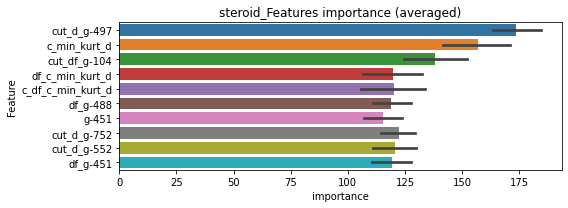

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000813559	valid_1's binary_logloss: 0.0238027


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000800818	valid_1's binary_logloss: 0.0222731


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000848017	valid_1's binary_logloss: 0.0147104


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds


steroid logloss: 0.018967240827912582


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000970607	valid_1's binary_logloss: 0.0150742


syk_inhibitor, len(trt): 19, len(othr): 3283
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000307072	valid_1's binary_logloss: 0.00131952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000311225	valid_1's binary_logloss: 0.000831622
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000308988	valid_1's binary_logloss: 0.00075208
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015542, Threshold: 0.0049558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0049558, conf_0:0.00347, conf_1:0.00644
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_1: 0.0349558


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000310375	valid_1's binary_logloss: 0.00110023


threshold: 0.0349558, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000300119	valid_1's binary_logloss: 0.00143996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00030378	valid_1's binary_logloss: 0.000876425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000305338	valid_1's binary_logloss: 0.000615977
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1137234, Threshold: 0.0349558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00080
Num_p_label: 9.0, Expected: 3.2, Threshold: 0.0349558, conf_0:0.02796, conf_1:0.04195
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_1: 0.0649558


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000300329	valid_1's binary_logloss: 0.000838453


threshold: 0.0649558, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000300119	valid_1's binary_logloss: 0.00143996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00030378	valid_1's binary_logloss: 0.000876425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000305338	valid_1's binary_logloss: 0.000615977
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1137234, Threshold: 0.0649558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, Expected: 3.2, Threshold: 0.0649558, conf_0:0.05846, conf_1:0.07145


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000300329	valid_1's binary_logloss: 0.000838453


threshold: 0.0649558, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


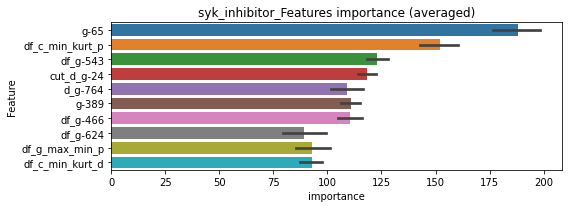

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000313468	valid_1's binary_logloss: 0.00170039


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000303489	valid_1's binary_logloss: 0.000724463


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000311866	valid_1's binary_logloss: 0.00060662


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000308148	valid_1's binary_logloss: 0.000880603


syk_inhibitor logloss: 0.0009781286658045493
tachykinin_antagonist, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0730585	valid_1's binary_logloss: 0.11601
[2000]	training's binary_logloss: 0.0371714	valid_1's binary_logloss: 0.0806969
[3000]	training's binary_logloss: 0.0248549	valid_1's binary_logloss: 0.0675907
[4000]	training's binary_logloss: 0.0185145	valid_1's binary_logloss: 0.0610149
Early stopping, best iteration is:
[4517]	training's binary_logloss: 0.0163508	valid_1's binary_logloss: 0.0587358
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0757132	valid_1's binary_logloss: 0.112091
[2000]	training's binary_logloss: 0.0393055	valid_1's binary_logloss: 0.0739549
[3000]	training's binary_logloss: 0.0262809	valid_1's binary_logloss: 0.0598594
[4000]	training's binary_logloss: 0.0195588	valid_1's binary_logloss: 0.0522159
[5000]	training's binary_logloss: 0.0156256	valid_1's binary_logloss: 0.0476111
Early stopping, best iteration is:
[5682]	trai

1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0467669, Threshold: 0.0893583, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0893583, conf_0:0.06255, conf_1:0.11617
Num_p_label: 16.0, Expected: 10.0, Adj_threshold_1: 0.1193583
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_2: 0.1493583
threshold: 0.1493583, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.072286	valid_1's binary_logloss: 0.101848
[2000]	training's binary_logloss: 0.0367497	valid_1's binary_logloss: 0.0651238
[3000]	training's binary_logloss: 0.0244883	valid_1's binary_logloss: 0.0517878
[4000]	training's binary_logloss: 0.0182087	valid_1's binary_logloss: 0.0448078
[5000]	training's binary_logloss: 0.0145395	valid_1's binary_logloss: 0.0403538
[6000]	training's binary_logloss: 0.0121149	valid_1's binary_logloss: 0.0372142
Early stopping, best iteration is:
[6725]	training's binary_logloss: 0.0108012	valid_1's binary_logloss: 0.0354636
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0731047	valid_1's binary_logloss: 0.103604
[2000]	training's binary_logloss: 0.0372195	valid_1's binary_logloss: 0.0664754
[3000]	training's binary_logloss: 0.0247799	valid_1's binary_logloss: 0.0533697
[4000]	training's binary_logloss: 0.0184362	va

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0644717, Threshold: 0.1493583, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0052737 Vs.target_rate: 0.00252
Num_p_label: 21.0, Expected: 10.0, Threshold: 0.1493583, conf_0:0.11949, conf_1:0.17923
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_1: 0.1793583
threshold: 0.1793583, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 648.0/3789, y_label_rate: 0.1710214
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0719283	valid_1's binary_logloss: 0.0976923
[2000]	training's binary_logloss: 0.0361431	valid_1's binary_logloss: 0.0587348
[3000]	training's binary_logloss: 0.0240248	valid_1's binary_logloss: 0.0451162
[4000]	training's binary_logloss: 0.0179477	valid_1's binary_logloss: 0.0379165
[5000]	training's binary_logloss: 0.0143203	valid_1's binary_logloss: 0.0332748
[6000]	training's binary_logloss: 0.0119201	valid_1's binary_logloss: 0.0302406
[7000]	training's binary_logloss: 0.0102206	valid_1's binary_logloss: 0.0281304
[8000]	training's binary_logloss: 0.0089634	valid_1's binary_logloss: 0.0264508
[9000]	training's binary_logloss: 0.00797004	valid_1's binary_logloss: 0.0250383
[10000]	training's binary_logloss: 0.00717251	valid_1's binary_logloss: 0.023979
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00717251	valid_1's binary_logloss: 0.023979
Training

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0685434, Threshold: 0.1793583, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0032647 Vs.target_rate: 0.00252
Num_p_label: 13.0, Expected: 10.0, Threshold: 0.1793583, conf_0:0.16142, conf_1:0.19729
threshold: 0.1793583, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


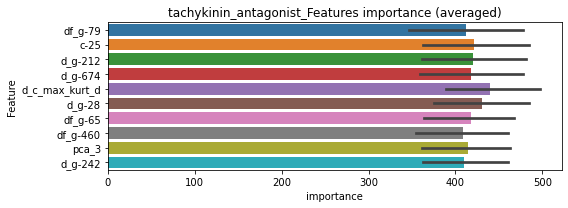

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0975	valid_1's binary_logloss: 0.116687
[2000]	training's binary_logloss: 0.0517783	valid_1's binary_logloss: 0.0711089
[3000]	training's binary_logloss: 0.0345956	valid_1's binary_logloss: 0.0537899
[4000]	training's binary_logloss: 0.0260059	valid_1's binary_logloss: 0.0448044
[5000]	training's binary_logloss: 0.0207589	valid_1's binary_logloss: 0.0391491
[6000]	training's binary_logloss: 0.0172355	valid_1's binary_logloss: 0.0352888
[7000]	training's binary_logloss: 0.0147947	valid_1's binary_logloss: 0.0325307
[8000]	training's binary_logloss: 0.012943	valid_1's binary_logloss: 0.0304414
[9000]	training's binary_logloss: 0.0114773	valid_1's binary_logloss: 0.0286796
[10000]	training's binary_logloss: 0.0103434	valid_1's binary_logloss: 0.0272601
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0103434	valid_1's binary_logloss: 0.0272601


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0947449	valid_1's binary_logloss: 0.142151
[2000]	training's binary_logloss: 0.0505157	valid_1's binary_logloss: 0.0942273
[3000]	training's binary_logloss: 0.0340692	valid_1's binary_logloss: 0.074606
[4000]	training's binary_logloss: 0.0256515	valid_1's binary_logloss: 0.0642626
[5000]	training's binary_logloss: 0.0205094	valid_1's binary_logloss: 0.0579685
[6000]	training's binary_logloss: 0.0170819	valid_1's binary_logloss: 0.0538497
[7000]	training's binary_logloss: 0.0146151	valid_1's binary_logloss: 0.050726
Early stopping, best iteration is:
[7225]	training's binary_logloss: 0.0141616	valid_1's binary_logloss: 0.050128


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0954066	valid_1's binary_logloss: 0.127197
[2000]	training's binary_logloss: 0.0512634	valid_1's binary_logloss: 0.0806572
[3000]	training's binary_logloss: 0.0344497	valid_1's binary_logloss: 0.0613376
[4000]	training's binary_logloss: 0.0259667	valid_1's binary_logloss: 0.051304
[5000]	training's binary_logloss: 0.0207787	valid_1's binary_logloss: 0.0448152
[6000]	training's binary_logloss: 0.0172413	valid_1's binary_logloss: 0.0404256
[7000]	training's binary_logloss: 0.0147782	valid_1's binary_logloss: 0.0373048
[8000]	training's binary_logloss: 0.0129282	valid_1's binary_logloss: 0.0348686
[9000]	training's binary_logloss: 0.0114534	valid_1's binary_logloss: 0.0329761
[10000]	training's binary_logloss: 0.0103211	valid_1's binary_logloss: 0.031471
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0103211	valid_1's binary_logloss: 0.031471


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0971703	valid_1's binary_logloss: 0.122981
[2000]	training's binary_logloss: 0.0516279	valid_1's binary_logloss: 0.0779978
[3000]	training's binary_logloss: 0.0346348	valid_1's binary_logloss: 0.0601993
[4000]	training's binary_logloss: 0.0260615	valid_1's binary_logloss: 0.0513808
[5000]	training's binary_logloss: 0.0208778	valid_1's binary_logloss: 0.0459499
[6000]	training's binary_logloss: 0.0173373	valid_1's binary_logloss: 0.0418642
[7000]	training's binary_logloss: 0.014854	valid_1's binary_logloss: 0.0390966
[8000]	training's binary_logloss: 0.0129952	valid_1's binary_logloss: 0.0369814
[9000]	training's binary_logloss: 0.0115317	valid_1's binary_logloss: 0.0352071
Early stopping, best iteration is:
[9304]	training's binary_logloss: 0.0111506	valid_1's binary_logloss: 0.0347339


tachykinin_antagonist logloss: 0.03589854881410684
tachykinin_antagonist is unpredictable(><)!
tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3286
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000401371	valid_1's binary_logloss: 0.002557
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000412444	valid_1's binary_logloss: 0.00260742
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000406982	valid_1's binary_logloss: 0.00122322
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027181, Threshold: 0.0074640, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000436245	valid_1's binary_logloss: 0.005378


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0074640, conf_0:0.00522, conf_1:0.00970
Num_p_label: 2.0, Expected: 5.0, Adj_threshold_1: 0.0374640
threshold: 0.0374640, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000388229	valid_1's binary_logloss: 0.00245856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00038939	valid_1's binary_logloss: 0.00295262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000396928	valid_1's binary_logloss: 0.00115578
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000401359	valid_1's binary_logloss: 0.00300093


y_Threshold: 0.0409966, Threshold: 0.0374640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, Expected: 5.0, Threshold: 0.0374640, conf_0:0.02997, conf_1:0.04496
threshold: 0.0374640, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000388229	valid_1's binary_logloss: 0.00245856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00038939	valid_1's binary_logloss: 0.00295262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000396928	valid_1's binary_logloss: 0.00115578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000401359	valid_1's binary_logloss: 0.00300093


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0409966, Threshold: 0.0374640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, Expected: 5.0, Threshold: 0.0374640, conf_0:0.03372, conf_1:0.04121
threshold: 0.0374640, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


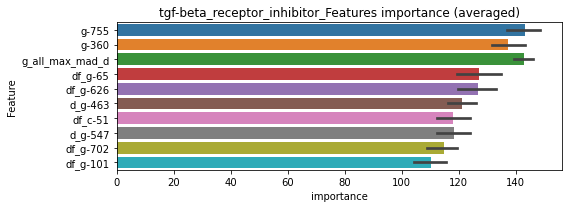

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000393962	valid_1's binary_logloss: 0.00218892
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000394395	valid_1's binary_logloss: 0.00218645


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000393776	valid_1's binary_logloss: 0.00276208
Early stopping, best iteration is:
[1098]	training's binary_logloss: 0.000386054	valid_1's binary_logloss: 0.00273341


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00039805	valid_1's binary_logloss: 0.00128658
Early stopping, best iteration is:
[1133]	training's binary_logloss: 0.000386364	valid_1's binary_logloss: 0.0012599


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000514434	valid_1's binary_logloss: 0.0039789


tgf-beta_receptor_inhibitor logloss: 0.00253955025808007
thrombin_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000301038	valid_1's binary_logloss: 0.00234225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000293253	valid_1's binary_logloss: 0.00241053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000303873	valid_1's binary_logloss: 0.0005641
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000311886	valid_1's binary_logloss: 0.00200125


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020204, Threshold: 0.0066030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0066030, conf_0:0.00462, conf_1:0.00858
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0366030
threshold: 0.0366030, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000294865	valid_1's binary_logloss: 0.00262415
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000289284	valid_1's binary_logloss: 0.00354416
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000298707	valid_1's binary_logloss: 0.000565693
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0392546, Threshold: 0.0366030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0062783 Vs.target_rate: 0.00080
Num_p_label: 25.0, Expected: 3.2, Threshold: 0.0366030, conf_0:0.02928, conf_1:0.04392
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0666030
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_2: 0.0966030
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_3: 0.1266030


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000295263	valid_1's binary_logloss: 0.00185475


threshold: 0.1266030, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000294865	valid_1's binary_logloss: 0.00262415
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000289284	valid_1's binary_logloss: 0.00354416
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000298707	valid_1's binary_logloss: 0.000565693
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0392546, Threshold: 0.1266030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.1266030, conf_0:0.11394, conf_1:0.13926


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000295263	valid_1's binary_logloss: 0.00185475


threshold: 0.1266030, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


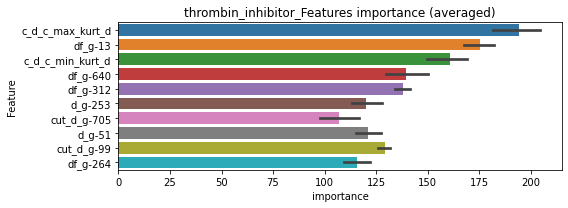

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000302041	valid_1's binary_logloss: 0.00275812


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000297073	valid_1's binary_logloss: 0.00160922


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000301535	valid_1's binary_logloss: 0.000574741


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000296699	valid_1's binary_logloss: 0.000726284


thrombin_inhibitor logloss: 0.0014174442833900646
thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000471725	valid_1's binary_logloss: 0.00732977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000481448	valid_1's binary_logloss: 0.00865571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000460589	valid_1's binary_logloss: 0.00180324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000451307	valid_1's binary_logloss: 0.00222276


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029208, Threshold: 0.0130184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0130184, conf_0:0.00911, conf_1:0.01692
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0430184
threshold: 0.0430184, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000451978	valid_1's binary_logloss: 0.00862687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000449164	valid_1's binary_logloss: 0.00875352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000446147	valid_1's binary_logloss: 0.00175392
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000437782	valid_1's binary_logloss: 0.00183912


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0168215, Threshold: 0.0430184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0085384 Vs.target_rate: 0.00155
Num_p_label: 34.0, Expected: 6.2, Threshold: 0.0430184, conf_0:0.03441, conf_1:0.05162
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_1: 0.0730184
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.1030184
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_3: 0.1330184
threshold: 0.1330184, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000494984	valid_1's binary_logloss: 0.00692059
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000446966	valid_1's binary_logloss: 0.00264211
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000450866	valid_1's binary_logloss: 0.00117287
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0494331, Threshold: 0.1330184, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000487432	valid_1's binary_logloss: 0.00516442


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.1330184, conf_0:0.11972, conf_1:0.14632
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.1630184
threshold: 0.1630184, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


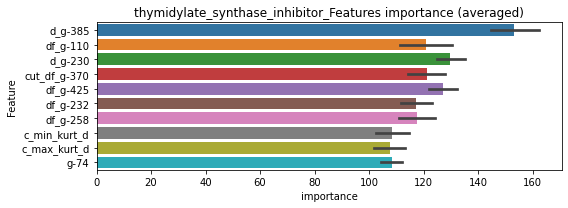

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000433478	valid_1's binary_logloss: 0.00493819


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000445826	valid_1's binary_logloss: 0.0024152


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000443751	valid_1's binary_logloss: 0.00121303


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000459042	valid_1's binary_logloss: 0.00500466


thymidylate_synthase_inhibitor logloss: 0.003392771930915893
tlr_agonist, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000365974	valid_1's binary_logloss: 0.00530838
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000397663	valid_1's binary_logloss: 0.00916575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000382388	valid_1's binary_logloss: 0.00140194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000369072	valid_1's binary_logloss: 0.00254071


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024085, Threshold: 0.0129624, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0129624, conf_0:0.00907, conf_1:0.01685
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_1: 0.0429624
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0729624
threshold: 0.0729624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000368107	valid_1's binary_logloss: 0.00434072
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000362472	valid_1's binary_logloss: 0.00984303
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000372156	valid_1's binary_logloss: 0.000955814
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0125477, Threshold: 0.0729624, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000358823	valid_1's binary_logloss: 0.00181325


Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00126
Num_p_label: 24.0, Expected: 5.0, Threshold: 0.0729624, conf_0:0.05837, conf_1:0.08755
Num_p_label: 22.0, Expected: 5.0, Adj_threshold_1: 0.1029624
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_2: 0.1329624
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_3: 0.1629624
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_4: 0.1929624
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_5: 0.2229624
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_6: 0.2529624
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_7: 0.2829624
threshold: 0.2829624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000360248	valid_1's binary_logloss: 0.00658326
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00036222	valid_1's binary_logloss: 0.00141892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000363256	valid_1's binary_logloss: 0.00173878
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240388, Threshold: 0.2829624, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000351657	valid_1's binary_logloss: 0.00894083


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, Expected: 5.0, Threshold: 0.2829624, conf_0:0.25467, conf_1:0.31126
threshold: 0.2829624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


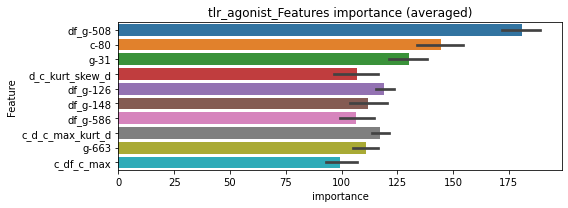

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000371351	valid_1's binary_logloss: 0.00832337


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000366021	valid_1's binary_logloss: 0.00154972


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000368771	valid_1's binary_logloss: 0.00424562


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000360424	valid_1's binary_logloss: 0.00126023


tlr_agonist logloss: 0.0038447346470094866
tlr_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000191042	valid_1's binary_logloss: 0.000265607
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000189656	valid_1's binary_logloss: 0.00105762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000190484	valid_1's binary_logloss: 0.000240826
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005461, Threshold: 0.0010670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0010670, conf_0:0.00075, conf_1:0.00139
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0310670
threshold: 0.0310670, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000192503	valid_1's binary_logloss: 0.000230496


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000188902	valid_1's binary_logloss: 0.000244574
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000186451	valid_1's binary_logloss: 0.000471992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000188369	valid_1's binary_logloss: 0.000226006
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1406998, Threshold: 0.0310670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.0310670, conf_0:0.02485, conf_1:0.03728
threshold: 0.0310670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000190442	valid_1's binary_logloss: 0.00024801


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000188902	valid_1's binary_logloss: 0.000244574
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000186451	valid_1's binary_logloss: 0.000471992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000188369	valid_1's binary_logloss: 0.000226006
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1406998, Threshold: 0.0310670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.0310670, conf_0:0.02796, conf_1:0.03417


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000190442	valid_1's binary_logloss: 0.00024801


threshold: 0.0310670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


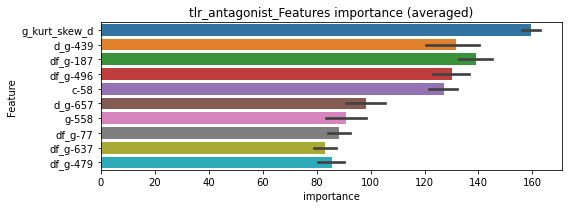

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


[1000]	training's binary_logloss: 0.000185227	valid_1's binary_logloss: 0.000239481
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000185227	valid_1's binary_logloss: 0.000239481
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000184852	valid_1's binary_logloss: 0.000348108
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000184852	valid_1's binary_logloss: 0.000348108


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000186941	valid_1's binary_logloss: 0.000234086


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds


tlr_antagonist logloss: 0.00026984644922422663


Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000186233	valid_1's binary_logloss: 0.000257743


tnf_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000442029	valid_1's binary_logloss: 0.0081001
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000462764	valid_1's binary_logloss: 0.00964053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000441108	valid_1's binary_logloss: 0.00499116
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000456026	valid_1's binary_logloss: 0.0115059


y_Threshold: 0.0037332, Threshold: 0.0250028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0250028, conf_0:0.01750, conf_1:0.03250
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_1: 0.0550028
threshold: 0.0550028, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000443701	valid_1's binary_logloss: 0.0095256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00044089	valid_1's binary_logloss: 0.011023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000447915	valid_1's binary_logloss: 0.00438607
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000437883	valid_1's binary_logloss: 0.00895915


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0428378, Threshold: 0.0550028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0097941 Vs.target_rate: 0.00151
Num_p_label: 39.0, Expected: 6.0, Threshold: 0.0550028, conf_0:0.04400, conf_1:0.06600
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_1: 0.0850028
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.1150028
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_3: 0.1450028
threshold: 0.1450028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000443701	valid_1's binary_logloss: 0.0095256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00044089	valid_1's binary_logloss: 0.011023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000447915	valid_1's binary_logloss: 0.00438607
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000437883	valid_1's binary_logloss: 0.00895915


y_Threshold: 0.0428378, Threshold: 0.1450028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, Expected: 6.0, Threshold: 0.1450028, conf_0:0.13050, conf_1:0.15950
threshold: 0.1450028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


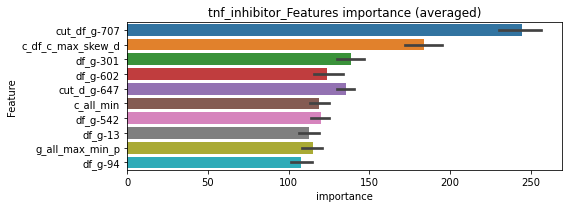

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000451777	valid_1's binary_logloss: 0.00607707


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953


Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000512998	valid_1's binary_logloss: 0.00886307


================================= fold 3/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000449742	valid_1's binary_logloss: 0.00273452


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000454998	valid_1's binary_logloss: 0.00801571


tnf_inhibitor logloss: 0.006422175411471307
topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574


selected negative label: 3276


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0759583	valid_1's binary_logloss: 0.163801
Early stopping, best iteration is:
[1325]	training's binary_logloss: 0.06177	valid_1's binary_logloss: 0.158064
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0808878	valid_1's binary_logloss: 0.130627
[2000]	training's binary_logloss: 0.045734	valid_1's binary_logloss: 0.116554
Early stopping, best iteration is:
[2494]	training's binary_logloss: 0.0368966	valid_1's binary_logloss: 0.113172
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0867172	valid_1's binary_logloss: 0.105547
[2000]	training's binary_logloss: 0.0490562	valid_1's binary_logloss: 0.0844634
[3000]	training's binary_logloss: 0.0327263	valid_1's binary_logloss: 0.0755862
[4000]	training's binary_logloss: 0.0242552	valid_1's binary_logloss: 0.0710926
Early stopping, best iteration is:
[

1 / 3, AUC score:0.980, PR-AUC:0.953
y_Threshold: 0.0631791, Threshold: 0.1685112, pos_neg_ratio: 0.8000000
Remove_noisy_data: 240 → Positive_corect_labels: 601/3691
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, Expected: 21.2, Threshold: 0.1685112, conf_0:0.11796, conf_1:0.21906
Num_p_label: 18.0, Expected: 21.2, Adj_threshold_1: 0.1985112
threshold: 0.1985112, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 601.0/3691, y_label_rate: 0.1628285
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0553012	valid_1's binary_logloss: 0.105839
Early stopping, best iteration is:
[1894]	training's binary_logloss: 0.0321872	valid_1's binary_logloss: 0.0933759
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.058781	valid_1's binary_logloss: 0.0872646
[2000]	training's binary_logloss: 0.032772	valid_1's binary_logloss: 0.0717948
[3000]	training's binary_logloss: 0.0220281	valid_1's binary_logloss: 0.0665131
Early stopping, best iteration is:
[3613]	training's binary_logloss: 0.0182257	valid_1's binary_logloss: 0.0647447
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0597866	valid_1's binary_logloss: 0.0813208
[2000]	training's binary_logloss: 0.0331904	valid_1's binary_logloss: 0.0650934
[3000]	training's binary_logloss: 0.0223528	valid_1's binary_logloss: 0.0588996
[4000]	training's binary_loglo

2 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.0739814, Threshold: 0.1985112, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 566.0/3621
p_label_rate: 0.0351582 Vs.target_rate: 0.00533
Num_p_label: 140.0, Expected: 21.2, Threshold: 0.1985112, conf_0:0.15881, conf_1:0.23821
Num_p_label: 119.0, Expected: 21.2, Adj_threshold_1: 0.2285112
Num_p_label: 101.0, Expected: 21.2, Adj_threshold_2: 0.2585112
Num_p_label: 85.0, Expected: 21.2, Adj_threshold_3: 0.2885112
Num_p_label: 66.0, Expected: 21.2, Adj_threshold_4: 0.3185112
Num_p_label: 51.0, Expected: 21.2, Adj_threshold_5: 0.3485112
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_6: 0.3785112
Num_p_label: 26.0, Expected: 21.2, Adj_threshold_7: 0.4085112
threshold: 0.4085112, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 566.0/3621, y_label_rate: 0.1563104
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.041977	valid_1's binary_logloss: 0.0679965
[2000]	training's binary_logloss: 0.0224138	valid_1's binary_logloss: 0.0533031
Early stopping, best iteration is:
[2849]	training's binary_logloss: 0.0159296	valid_1's binary_logloss: 0.0487965
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0397707	valid_1's binary_logloss: 0.0712149
[2000]	training's binary_logloss: 0.0212536	valid_1's binary_logloss: 0.0568473
[3000]	training's binary_logloss: 0.0143385	valid_1's binary_logloss: 0.0519409
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.0118705	valid_1's binary_logloss: 0.0502915
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0445639	valid_1's binary_logloss: 0.0476868
[2000]	training's binary_logloss: 0.0241199	valid_1's binary_logloss: 0.0298073
[3000]	training's binary_log

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0743937, Threshold: 0.4085112, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 552.0/3593
p_label_rate: 0.0313913 Vs.target_rate: 0.00533
Num_p_label: 125.0, Expected: 21.2, Threshold: 0.4085112, conf_0:0.36766, conf_1:0.44936
Num_p_label: 119.0, Expected: 21.2, Adj_threshold_1: 0.4385112
Num_p_label: 105.0, Expected: 21.2, Adj_threshold_2: 0.4685112
Num_p_label: 88.0, Expected: 21.2, Adj_threshold_3: 0.4985112
Num_p_label: 77.0, Expected: 21.2, Adj_threshold_4: 0.5285112
Num_p_label: 69.0, Expected: 21.2, Adj_threshold_5: 0.5585112
Num_p_label: 53.0, Expected: 21.2, Adj_threshold_6: 0.5885112
Num_p_label: 41.0, Expected: 21.2, Adj_threshold_7: 0.6185112
Num_p_label: 29.0, Expected: 21.2, Adj_threshold_8: 0.6485112
threshold: 0.6485112, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 552.0/3593, y_label_rate: 0.1536321


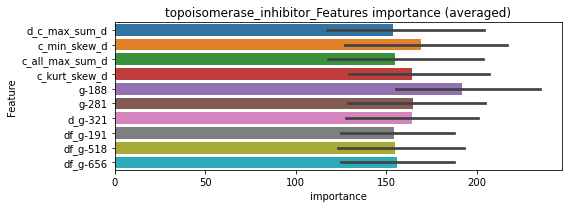

len(train_index) : 2694
len(valid_index) : 899
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0493544	valid_1's binary_logloss: 0.0870871
[2000]	training's binary_logloss: 0.0256799	valid_1's binary_logloss: 0.0640163
[3000]	training's binary_logloss: 0.0176078	valid_1's binary_logloss: 0.056014
[4000]	training's binary_logloss: 0.013284	valid_1's binary_logloss: 0.051981
Early stopping, best iteration is:
[4270]	training's binary_logloss: 0.0124493	valid_1's binary_logloss: 0.0512796


len(train_index) : 2695
len(valid_index) : 898
================================= fold 2/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0522008	valid_1's binary_logloss: 0.0651409
[2000]	training's binary_logloss: 0.0275861	valid_1's binary_logloss: 0.0399857
[3000]	training's binary_logloss: 0.0188237	valid_1's binary_logloss: 0.031462
[4000]	training's binary_logloss: 0.0141376	valid_1's binary_logloss: 0.0269061
[5000]	training's binary_logloss: 0.0113262	valid_1's binary_logloss: 0.0241525
[6000]	training's binary_logloss: 0.00948383	valid_1's binary_logloss: 0.0223639
[7000]	training's binary_logloss: 0.00816027	valid_1's binary_logloss: 0.0210106
[8000]	training's binary_logloss: 0.00717013	valid_1's binary_logloss: 0.0199836
[9000]	training's binary_logloss: 0.00638011	valid_1's binary_logloss: 0.0191513
[10000]	training's binary_logloss: 0.00575187	valid_1's binary_logloss: 0.0184814
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00575187	valid_1's binary_logloss: 0.0184814


len(train_index) : 2695
len(valid_index) : 898
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0524389	valid_1's binary_logloss: 0.0656882
[2000]	training's binary_logloss: 0.0278519	valid_1's binary_logloss: 0.0403617
[3000]	training's binary_logloss: 0.0190376	valid_1's binary_logloss: 0.0315535
[4000]	training's binary_logloss: 0.0143487	valid_1's binary_logloss: 0.0270019
[5000]	training's binary_logloss: 0.0115054	valid_1's binary_logloss: 0.024103
[6000]	training's binary_logloss: 0.00962106	valid_1's binary_logloss: 0.0221172
[7000]	training's binary_logloss: 0.00828638	valid_1's binary_logloss: 0.0207945
[8000]	training's binary_logloss: 0.00728858	valid_1's binary_logloss: 0.0197763
[9000]	training's binary_logloss: 0.00648298	valid_1's binary_logloss: 0.0189078
[10000]	training's binary_logloss: 0.00584597	valid_1's binary_logloss: 0.0181871
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00584597	valid_1's binary_logloss: 0.0181871


len(train_index) : 2695
len(valid_index) : 898
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0517828	valid_1's binary_logloss: 0.0672519
[2000]	training's binary_logloss: 0.0274932	valid_1's binary_logloss: 0.0428532
[3000]	training's binary_logloss: 0.0188154	valid_1's binary_logloss: 0.0346551
[4000]	training's binary_logloss: 0.0141845	valid_1's binary_logloss: 0.0302008
[5000]	training's binary_logloss: 0.0113822	valid_1's binary_logloss: 0.0275247
[6000]	training's binary_logloss: 0.00953248	valid_1's binary_logloss: 0.0257241
[7000]	training's binary_logloss: 0.00820251	valid_1's binary_logloss: 0.0243836
[8000]	training's binary_logloss: 0.00721599	valid_1's binary_logloss: 0.0233803
Early stopping, best iteration is:
[8339]	training's binary_logloss: 0.0069269	valid_1's binary_logloss: 0.0230756


topoisomerase_inhibitor logloss: 0.02776246031320219
topoisomerase_inhibitor is unpredictable(><)!
transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000310852	valid_1's binary_logloss: 0.000695179
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000305043	valid_1's binary_logloss: 0.00218979
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000311142	valid_1's binary_logloss: 0.00184727
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015714, Threshold: 0.0145277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0145277, conf_0:0.01017, conf_1:0.01889


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000308445	valid_1's binary_logloss: 0.00151548


Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.0445277
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0745277
threshold: 0.0745277, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000306713	valid_1's binary_logloss: 0.000669525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000295563	valid_1's binary_logloss: 0.00263012
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000301364	valid_1's binary_logloss: 0.00139063
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1230839, Threshold: 0.0745277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0135610 Vs.target_rate: 0.00076
Num_p_label: 54.0, Expected: 3.0, Threshold: 0.0745277, conf_0:0.05962, conf_1:0.08943
Num_p_label: 44.0, Expected: 3.0, Adj_threshold_1: 0.1045277
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_2: 0.1345277
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_3: 0.1645277


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000302561	valid_1's binary_logloss: 0.00156429


Num_p_label: 32.0, Expected: 3.0, Adj_threshold_4: 0.1945277
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_5: 0.2245277
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_6: 0.2545277
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_7: 0.2845277
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_8: 0.3145277
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_9: 0.3445277
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_10: 0.3745277
threshold: 0.3745277, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000306713	valid_1's binary_logloss: 0.000669525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000295563	valid_1's binary_logloss: 0.00263012
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000301364	valid_1's binary_logloss: 0.00139063
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1230839, Threshold: 0.3745277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0042692 Vs.target_rate: 0.00076
Num_p_label: 17.0, Expected: 3.0, Threshold: 0.3745277, conf_0:0.33707, conf_1:0.41198
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.4045277
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.4345277
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.4645277
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.4945277
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.5245277


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000302561	valid_1's binary_logloss: 0.00156429


Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.5545277
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.5845277
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.6145277
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.6445277
threshold: 0.6445277, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


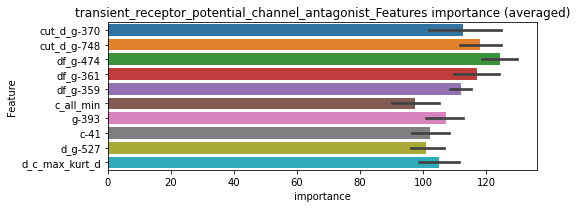

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000302847	valid_1's binary_logloss: 0.000692077


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000298919	valid_1's binary_logloss: 0.00204226


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.00031042	valid_1's binary_logloss: 0.00198832


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000302295	valid_1's binary_logloss: 0.000846997


transient_receptor_potential_channel_antagonist logloss: 0.001392402451940104
tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000158342	valid_1's binary_logloss: 0.000345099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000153771	valid_1's binary_logloss: 0.000445348
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000154988	valid_1's binary_logloss: 0.000180942
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004272, Threshold: 0.0011997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0011997, conf_0:0.00084, conf_1:0.00156
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0311997


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000155404	valid_1's binary_logloss: 0.000211069


threshold: 0.0311997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151456	valid_1's binary_logloss: 0.000245419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000148829	valid_1's binary_logloss: 0.000386354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000150836	valid_1's binary_logloss: 0.00017527
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1473322, Threshold: 0.0311997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.0311997, conf_0:0.02496, conf_1:0.03744
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0611997
threshold: 0.0611997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000148712	valid_1's binary_logloss: 0.000187659


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151456	valid_1's binary_logloss: 0.000245419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000148829	valid_1's binary_logloss: 0.000386354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000150836	valid_1's binary_logloss: 0.00017527
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1473322, Threshold: 0.0611997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0611997, conf_0:0.05508, conf_1:0.06732
threshold: 0.0611997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000148712	valid_1's binary_logloss: 0.000187659


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


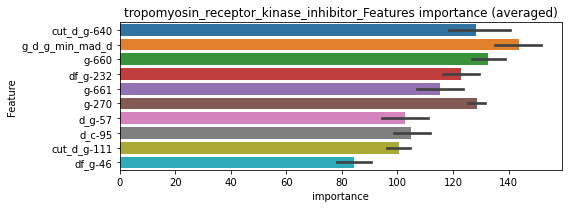

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


[1000]	training's binary_logloss: 0.000149062	valid_1's binary_logloss: 0.00024782
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000149062	valid_1's binary_logloss: 0.00024782
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148556	valid_1's binary_logloss: 0.00042465
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000148374	valid_1's binary_logloss: 0.000424465


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000150313	valid_1's binary_logloss: 0.000180757


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148979	valid_1's binary_logloss: 0.000168753
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000148591	valid_1's binary_logloss: 0.000168321


tropomyosin_receptor_kinase_inhibitor logloss: 0.00025534506795172934
trpv_agonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000366067	valid_1's binary_logloss: 0.00126781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00035611	valid_1's binary_logloss: 0.00275712
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000369646	valid_1's binary_logloss: 0.00192
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020056, Threshold: 0.0075674, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000368987	valid_1's binary_logloss: 0.000955798


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0075674, conf_0:0.00530, conf_1:0.00984
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_1: 0.0375674
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_2: 0.0675674
threshold: 0.0675674, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000356873	valid_1's binary_logloss: 0.000986754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000374036	valid_1's binary_logloss: 0.00247686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00037651	valid_1's binary_logloss: 0.00123499
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0833569, Threshold: 0.0675674, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000354696	valid_1's binary_logloss: 0.000867327


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00105
Num_p_label: 12.0, Expected: 4.2, Threshold: 0.0675674, conf_0:0.05405, conf_1:0.08108
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0975674
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.1275674
threshold: 0.1275674, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000356873	valid_1's binary_logloss: 0.000986754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000374036	valid_1's binary_logloss: 0.00247686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00037651	valid_1's binary_logloss: 0.00123499
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0833569, Threshold: 0.1275674, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000354696	valid_1's binary_logloss: 0.000867327


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.1275674, conf_0:0.11481, conf_1:0.14032
threshold: 0.1275674, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


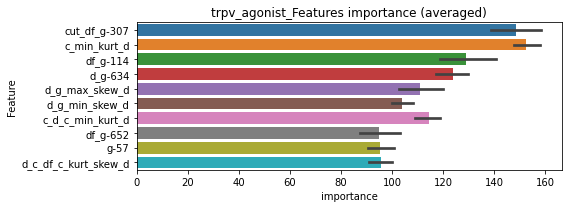

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000364085	valid_1's binary_logloss: 0.00111565


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000357457	valid_1's binary_logloss: 0.00195582


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00036275	valid_1's binary_logloss: 0.000972711


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.00036467	valid_1's binary_logloss: 0.000893557


trpv_agonist logloss: 0.0012348773105491132
trpv_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000631799	valid_1's binary_logloss: 0.0246699
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000493433	valid_1's binary_logloss: 0.00767099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000480227	valid_1's binary_logloss: 0.00258733
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0036482, Threshold: 0.0161328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000752807	valid_1's binary_logloss: 0.0239162


Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0161328, conf_0:0.01129, conf_1:0.02097
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_1: 0.0461328
threshold: 0.0461328, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000483122	valid_1's binary_logloss: 0.0102094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000474665	valid_1's binary_logloss: 0.00913165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000484516	valid_1's binary_logloss: 0.00962117
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000479999	valid_1's binary_logloss: 0.014094


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138519, Threshold: 0.0461328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0070316 Vs.target_rate: 0.00202
Num_p_label: 28.0, Expected: 8.0, Threshold: 0.0461328, conf_0:0.03691, conf_1:0.05536
Num_p_label: 14.0, Expected: 8.0, Adj_threshold_1: 0.0761328
threshold: 0.0761328, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000478853	valid_1's binary_logloss: 0.010873
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000487059	valid_1's binary_logloss: 0.0162167
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000470593	valid_1's binary_logloss: 0.00871787
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000471646	valid_1's binary_logloss: 0.00487625


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138072, Threshold: 0.0761328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0050226 Vs.target_rate: 0.00202
Num_p_label: 20.0, Expected: 8.0, Threshold: 0.0761328, conf_0:0.06852, conf_1:0.08375
threshold: 0.0761328, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


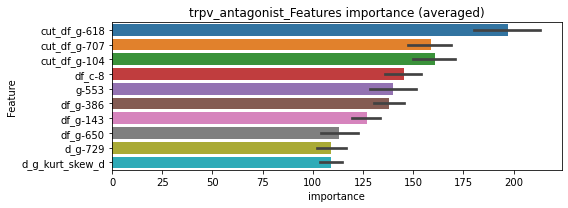

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000551233	valid_1's binary_logloss: 0.00975548


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000606221	valid_1's binary_logloss: 0.0157761


len(valid_index) : 950
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000586052	valid_1's binary_logloss: 0.00888632


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000480762	valid_1's binary_logloss: 0.00412039


trpv_antagonist logloss: 0.009634583014233186


mutually exclusive columns: tubulin_inhibitor


tubulin_inhibitor, len(trt): 316, len(othr): 7122
target_rate: 0.0132695 → Adj_target_rate: 0.0111926


selected negative label: 7122


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0868018	valid_1's binary_logloss: 0.149816
Early stopping, best iteration is:
[1894]	training's binary_logloss: 0.0512195	valid_1's binary_logloss: 0.140952
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0888456	valid_1's binary_logloss: 0.142428
Early stopping, best iteration is:
[1917]	training's binary_logloss: 0.0515567	valid_1's binary_logloss: 0.13225
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0859852	valid_1's binary_logloss: 0.153355
Early stopping, best iteration is:
[1850]	training's binary_logloss: 0.0520653	valid_1's binary_logloss: 0.144868
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0858923	valid_1's binary_logloss: 0.154885
Early stopping, best iteration is:
[1623]	training's binary_logloss: 0.0586132	valid_1's binary_log

1 / 3, AUC score:0.955, PR-AUC:0.915
y_Threshold: 0.0725413, Threshold: 0.1115123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 662 → Positive_corect_labels: 1236/7884
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, Expected: 52.8, Threshold: 0.1115123, conf_0:0.07806, conf_1:0.14497
threshold: 0.1115123, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1236.0/7884, y_label_rate: 0.1567732
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0488258	valid_1's binary_logloss: 0.0876608
[2000]	training's binary_logloss: 0.0260303	valid_1's binary_logloss: 0.0771985
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0248563	valid_1's binary_logloss: 0.0766256
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0488765	valid_1's binary_logloss: 0.08128
[2000]	training's binary_logloss: 0.0259854	valid_1's binary_logloss: 0.0708709
Early stopping, best iteration is:
[2557]	training's binary_logloss: 0.0202122	valid_1's binary_logloss: 0.0685772
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0503057	valid_1's binary_logloss: 0.0757067
[2000]	training's binary_logloss: 0.0268658	valid_1's binary_logloss: 0.0636642
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.022759	valid_1's binary_logloss: 0.061

2 / 3, AUC score:0.995, PR-AUC:0.985
y_Threshold: 0.0558548, Threshold: 0.1115123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 130 → Positive_corect_labels: 1171.0/7754
p_label_rate: 0.0025113 Vs.target_rate: 0.01327
Num_p_label: 10.0, Expected: 52.8, Threshold: 0.1115123, conf_0:0.08921, conf_1:0.13381
threshold: 0.1115123, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 1171.0/7754, y_label_rate: 0.1510188
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0357234	valid_1's binary_logloss: 0.0563212
[2000]	training's binary_logloss: 0.0189566	valid_1's binary_logloss: 0.0431369
[3000]	training's binary_logloss: 0.0124403	valid_1's binary_logloss: 0.0386213
Early stopping, best iteration is:
[3968]	training's binary_logloss: 0.00921836	valid_1's binary_logloss: 0.0366897
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0353964	valid_1's binary_logloss: 0.0559351
[2000]	training's binary_logloss: 0.0186389	valid_1's binary_logloss: 0.044144
[3000]	training's binary_logloss: 0.0122454	valid_1's binary_logloss: 0.0399004
Early stopping, best iteration is:
[3010]	training's binary_logloss: 0.0122066	valid_1's binary_logloss: 0.0398889
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0349644	valid_1's binary_logloss: 0.0576214
[2000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0340315, Threshold: 0.1115123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 1149.0/7710
p_label_rate: 0.0000000 Vs.target_rate: 0.01327
Num_p_label: 0.0, Expected: 52.8, Threshold: 0.1115123, conf_0:0.10036, conf_1:0.12266
threshold: 0.1115123, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 1149.0/7710, y_label_rate: 0.1490272


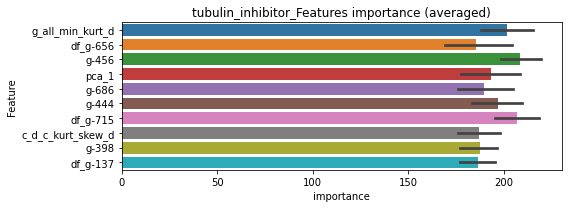

len(train_index) : 5782
len(valid_index) : 1928
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0422954	valid_1's binary_logloss: 0.0508631
[2000]	training's binary_logloss: 0.0230933	valid_1's binary_logloss: 0.0329144
[3000]	training's binary_logloss: 0.0157681	valid_1's binary_logloss: 0.0272287
[4000]	training's binary_logloss: 0.0118209	valid_1's binary_logloss: 0.0242984
[5000]	training's binary_logloss: 0.00942257	valid_1's binary_logloss: 0.0225882
[6000]	training's binary_logloss: 0.00782664	valid_1's binary_logloss: 0.0214713
Early stopping, best iteration is:
[6814]	training's binary_logloss: 0.00686573	valid_1's binary_logloss: 0.0207803


len(train_index) : 5782
len(valid_index) : 1928
================================= fold 2/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0403969	valid_1's binary_logloss: 0.0596926
[2000]	training's binary_logloss: 0.0216658	valid_1's binary_logloss: 0.0425479
[3000]	training's binary_logloss: 0.0146946	valid_1's binary_logloss: 0.0371374
[4000]	training's binary_logloss: 0.0109621	valid_1's binary_logloss: 0.0344847
Early stopping, best iteration is:
[4286]	training's binary_logloss: 0.0102468	valid_1's binary_logloss: 0.0340315


len(train_index) : 5783
len(valid_index) : 1927
================================= fold 3/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0419223	valid_1's binary_logloss: 0.053154
[2000]	training's binary_logloss: 0.0228883	valid_1's binary_logloss: 0.0355438
[3000]	training's binary_logloss: 0.0155817	valid_1's binary_logloss: 0.029584
[4000]	training's binary_logloss: 0.0116404	valid_1's binary_logloss: 0.0265875
[5000]	training's binary_logloss: 0.00927877	valid_1's binary_logloss: 0.0247754
[6000]	training's binary_logloss: 0.00771085	valid_1's binary_logloss: 0.0235915
[7000]	training's binary_logloss: 0.00658907	valid_1's binary_logloss: 0.022745
Early stopping, best iteration is:
[7250]	training's binary_logloss: 0.00634586	valid_1's binary_logloss: 0.0225367


len(train_index) : 5783
len(valid_index) : 1927
================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0406258	valid_1's binary_logloss: 0.0585034
[2000]	training's binary_logloss: 0.0217776	valid_1's binary_logloss: 0.0405663
[3000]	training's binary_logloss: 0.0147634	valid_1's binary_logloss: 0.0348591
[4000]	training's binary_logloss: 0.011035	valid_1's binary_logloss: 0.0320065
[5000]	training's binary_logloss: 0.00881408	valid_1's binary_logloss: 0.030374
Early stopping, best iteration is:
[5360]	training's binary_logloss: 0.00821317	valid_1's binary_logloss: 0.0299098


tubulin_inhibitor logloss: 0.02681470965421186
tubulin_inhibitor is unpredictable(><)!
tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3281


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0801345	valid_1's binary_logloss: 0.126564
[2000]	training's binary_logloss: 0.0418984	valid_1's binary_logloss: 0.0912496
[3000]	training's binary_logloss: 0.0282076	valid_1's binary_logloss: 0.0794122
Early stopping, best iteration is:
[3957]	training's binary_logloss: 0.0213776	valid_1's binary_logloss: 0.0734945
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0810482	valid_1's binary_logloss: 0.125969
[2000]	training's binary_logloss: 0.0428842	valid_1's binary_logloss: 0.0891043
[3000]	training's binary_logloss: 0.0290901	valid_1's binary_logloss: 0.0767472
[4000]	training's binary_logloss: 0.0217669	valid_1's binary_logloss: 0.0708256
Early stopping, best iteration is:
[4517]	training's binary_logloss: 0.0193175	valid_1's binary_logloss: 0.0686875
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logl

1 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0511976, Threshold: 0.1289117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 644/3781
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.1289117, conf_0:0.09024, conf_1:0.16759
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_1: 0.1589117
Num_p_label: 13.0, Expected: 12.2, Adj_threshold_2: 0.1889117
threshold: 0.1889117, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 644.0/3781, y_label_rate: 0.1703253
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0745184	valid_1's binary_logloss: 0.111567
[2000]	training's binary_logloss: 0.0378825	valid_1's binary_logloss: 0.0766369
[3000]	training's binary_logloss: 0.0253617	valid_1's binary_logloss: 0.0646338
[4000]	training's binary_logloss: 0.0189176	valid_1's binary_logloss: 0.0588236
Early stopping, best iteration is:
[4162]	training's binary_logloss: 0.0181995	valid_1's binary_logloss: 0.0581422
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0764561	valid_1's binary_logloss: 0.106944
[2000]	training's binary_logloss: 0.0393242	valid_1's binary_logloss: 0.07
[3000]	training's binary_logloss: 0.0263747	valid_1's binary_logloss: 0.0562428
[4000]	training's binary_logloss: 0.0196371	valid_1's binary_logloss: 0.0487906
[5000]	training's binary_logloss: 0.0156869	valid_1's binary_logloss: 0.0441039
[6000]	training's binary_logloss: 0.0130398	valid_

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0825175, Threshold: 0.1889117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 639.0/3771
p_label_rate: 0.0092918 Vs.target_rate: 0.00307
Num_p_label: 37.0, Expected: 12.2, Threshold: 0.1889117, conf_0:0.15113, conf_1:0.22669
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_1: 0.2189117
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_2: 0.2489117
Num_p_label: 13.0, Expected: 12.2, Adj_threshold_3: 0.2789117
threshold: 0.2789117, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 639.0/3771, y_label_rate: 0.1694511
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.074763	valid_1's binary_logloss: 0.103314
[2000]	training's binary_logloss: 0.0378177	valid_1's binary_logloss: 0.0660674
[3000]	training's binary_logloss: 0.0252907	valid_1's binary_logloss: 0.0539904
[4000]	training's binary_logloss: 0.0188689	valid_1's binary_logloss: 0.0477499
[5000]	training's binary_logloss: 0.0151052	valid_1's binary_logloss: 0.043956
[6000]	training's binary_logloss: 0.0125683	valid_1's binary_logloss: 0.041298
[7000]	training's binary_logloss: 0.0107564	valid_1's binary_logloss: 0.0393341
[8000]	training's binary_logloss: 0.00940954	valid_1's binary_logloss: 0.0378098
Early stopping, best iteration is:
[8266]	training's binary_logloss: 0.00910458	valid_1's binary_logloss: 0.0374209
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0729717	valid_1's binary_logloss: 0.108077
[2000]	training's binary_logloss: 0.0369042	va

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0774528, Threshold: 0.2789117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 633.0/3759
p_label_rate: 0.0035158 Vs.target_rate: 0.00307
Num_p_label: 14.0, Expected: 12.2, Threshold: 0.2789117, conf_0:0.25102, conf_1:0.30680
threshold: 0.2789117, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 633.0/3759, y_label_rate: 0.1683958


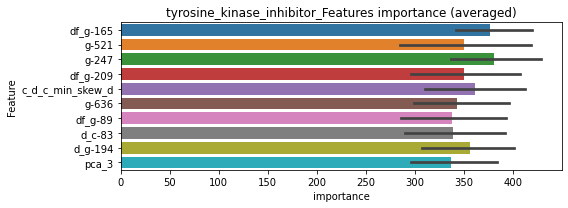

len(train_index) : 2819
len(valid_index) : 940
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0957782	valid_1's binary_logloss: 0.12488
[2000]	training's binary_logloss: 0.0514208	valid_1's binary_logloss: 0.080273
[3000]	training's binary_logloss: 0.0353171	valid_1's binary_logloss: 0.0637647
[4000]	training's binary_logloss: 0.0266824	valid_1's binary_logloss: 0.0547852
[5000]	training's binary_logloss: 0.0214715	valid_1's binary_logloss: 0.0493816
[6000]	training's binary_logloss: 0.0178551	valid_1's binary_logloss: 0.0454787
[7000]	training's binary_logloss: 0.0153377	valid_1's binary_logloss: 0.0427647
[8000]	training's binary_logloss: 0.0134255	valid_1's binary_logloss: 0.0404465
Early stopping, best iteration is:
[8341]	training's binary_logloss: 0.0128888	valid_1's binary_logloss: 0.0398184


len(train_index) : 2819
len(valid_index) : 940
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0960919	valid_1's binary_logloss: 0.127229
[2000]	training's binary_logloss: 0.0512896	valid_1's binary_logloss: 0.0823067
[3000]	training's binary_logloss: 0.0352145	valid_1's binary_logloss: 0.0655515
[4000]	training's binary_logloss: 0.0264608	valid_1's binary_logloss: 0.0565801
[5000]	training's binary_logloss: 0.0212636	valid_1's binary_logloss: 0.0508255
[6000]	training's binary_logloss: 0.0177317	valid_1's binary_logloss: 0.0467805
[7000]	training's binary_logloss: 0.0152318	valid_1's binary_logloss: 0.0441166
[8000]	training's binary_logloss: 0.0133365	valid_1's binary_logloss: 0.0419511
[9000]	training's binary_logloss: 0.0118959	valid_1's binary_logloss: 0.0403464
[10000]	training's binary_logloss: 0.0107401	valid_1's binary_logloss: 0.0388813
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0107401	valid_1's binary_logloss: 0.0388813


len(train_index) : 2819
len(valid_index) : 940
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0959011	valid_1's binary_logloss: 0.129711
[2000]	training's binary_logloss: 0.0512457	valid_1's binary_logloss: 0.0830093
[3000]	training's binary_logloss: 0.0352437	valid_1's binary_logloss: 0.0664197
[4000]	training's binary_logloss: 0.026621	valid_1's binary_logloss: 0.0572116
[5000]	training's binary_logloss: 0.0214065	valid_1's binary_logloss: 0.051701
[6000]	training's binary_logloss: 0.0178069	valid_1's binary_logloss: 0.047631
[7000]	training's binary_logloss: 0.0152919	valid_1's binary_logloss: 0.0448273
[8000]	training's binary_logloss: 0.0133597	valid_1's binary_logloss: 0.0425405
Early stopping, best iteration is:
[8871]	training's binary_logloss: 0.0120793	valid_1's binary_logloss: 0.0410001


len(train_index) : 2820
len(valid_index) : 939
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0964268	valid_1's binary_logloss: 0.124729
[2000]	training's binary_logloss: 0.0522657	valid_1's binary_logloss: 0.0782932
[3000]	training's binary_logloss: 0.0361892	valid_1's binary_logloss: 0.0614282
[4000]	training's binary_logloss: 0.0273444	valid_1's binary_logloss: 0.0520076
[5000]	training's binary_logloss: 0.0219863	valid_1's binary_logloss: 0.0464126
[6000]	training's binary_logloss: 0.0182958	valid_1's binary_logloss: 0.042238
[7000]	training's binary_logloss: 0.0157031	valid_1's binary_logloss: 0.0395602
[8000]	training's binary_logloss: 0.0137308	valid_1's binary_logloss: 0.0374816
[9000]	training's binary_logloss: 0.0122144	valid_1's binary_logloss: 0.0358373
[10000]	training's binary_logloss: 0.0110171	valid_1's binary_logloss: 0.0346804
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0110171	valid_1's binary_logloss: 0.0346804


tyrosine_kinase_inhibitor logloss: 0.03859609049296698
tyrosine_kinase_inhibitor is unpredictable(><)!
ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3285
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3285


N_features:306
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000239278	valid_1's binary_logloss: 0.00255787
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000238503	valid_1's binary_logloss: 0.00068939
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.0002388	valid_1's binary_logloss: 0.000321361
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008597, Threshold: 0.0023451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0023451, conf_0:0.00164, conf_1:0.00305
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0323451


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000236753	valid_1's binary_logloss: 0.00223279


threshold: 0.0323451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000229127	valid_1's binary_logloss: 0.00351237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000232432	valid_1's binary_logloss: 0.000747148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000234125	valid_1's binary_logloss: 0.000275362
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192647, Threshold: 0.0323451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, Expected: 2.0, Threshold: 0.0323451, conf_0:0.02588, conf_1:0.03881
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0623451


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00023343	valid_1's binary_logloss: 0.00229689


threshold: 0.0623451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000229127	valid_1's binary_logloss: 0.00351237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000232432	valid_1's binary_logloss: 0.000747148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000234125	valid_1's binary_logloss: 0.000275362
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192647, Threshold: 0.0623451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0623451, conf_0:0.05611, conf_1:0.06858
threshold: 0.0623451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00023343	valid_1's binary_logloss: 0.00229689


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


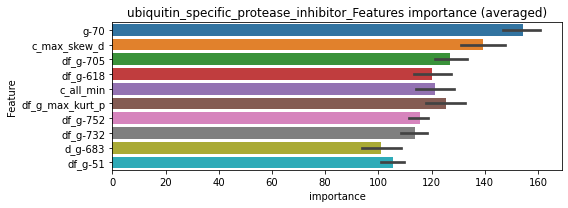

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000234394	valid_1's binary_logloss: 0.00215609
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952


Early stopping, best iteration is:
[956]	training's binary_logloss: 0.00023373	valid_1's binary_logloss: 0.000453745


================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000238791	valid_1's binary_logloss: 0.000301337
Training until validation scores don't improve for 30 rounds


ubiquitin_specific_protease_inhibitor logloss: 0.0011310687317999215


Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000236798	valid_1's binary_logloss: 0.00161239
mutually exclusive columns: vegfr_inhibitor


vegfr_inhibitor, len(trt): 170, len(othr): 4633
target_rate: 0.0071387 → Adj_target_rate: 0.0066081


selected negative label: 4633


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0747628	valid_1's binary_logloss: 0.129832
[2000]	training's binary_logloss: 0.0414251	valid_1's binary_logloss: 0.119601
Early stopping, best iteration is:
[2234]	training's binary_logloss: 0.0371693	valid_1's binary_logloss: 0.118383
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0724358	valid_1's binary_logloss: 0.140351
Early stopping, best iteration is:
[1641]	training's binary_logloss: 0.0486501	valid_1's binary_logloss: 0.132386
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.074934	valid_1's binary_logloss: 0.130781
Early stopping, best iteration is:
[1466]	training's binary_logloss: 0.055484	valid_1's binary_logloss: 0.123006
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0784051	valid_1's binary_logloss: 0.113463
[2000]	training's bin

1 / 3, AUC score:0.973, PR-AUC:0.947
y_Threshold: 0.0607710, Threshold: 0.0846436, pos_neg_ratio: 0.8000000
Remove_noisy_data: 350 → Positive_corect_labels: 844/5209
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, Expected: 28.4, Threshold: 0.0846436, conf_0:0.05925, conf_1:0.11004
threshold: 0.0846436, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 844.0/5209, y_label_rate: 0.1620273
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0518181	valid_1's binary_logloss: 0.0776072
[2000]	training's binary_logloss: 0.0282421	valid_1's binary_logloss: 0.0634684
[3000]	training's binary_logloss: 0.0187137	valid_1's binary_logloss: 0.0581859
Early stopping, best iteration is:
[3264]	training's binary_logloss: 0.0171159	valid_1's binary_logloss: 0.0574164
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0489833	valid_1's binary_logloss: 0.0942825
Early stopping, best iteration is:
[1839]	training's binary_logloss: 0.0287551	valid_1's binary_logloss: 0.0826312
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0519069	valid_1's binary_logloss: 0.0755748
[2000]	training's binary_logloss: 0.0280836	valid_1's binary_logloss: 0.0626437
[3000]	training's binary_logloss: 0.0185574	valid_1's binary_logloss: 0.0578133
Early stopping, best iterat

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0548632, Threshold: 0.0846436, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 809.0/5139
p_label_rate: 0.0045203 Vs.target_rate: 0.00714
Num_p_label: 18.0, Expected: 28.4, Threshold: 0.0846436, conf_0:0.06771, conf_1:0.10157
threshold: 0.0846436, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 809.0/5139, y_label_rate: 0.1574236
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0402795	valid_1's binary_logloss: 0.0603203
[2000]	training's binary_logloss: 0.0216134	valid_1's binary_logloss: 0.0463676
[3000]	training's binary_logloss: 0.0143857	valid_1's binary_logloss: 0.0414392
[4000]	training's binary_logloss: 0.0106795	valid_1's binary_logloss: 0.0393083
Early stopping, best iteration is:
[3971]	training's binary_logloss: 0.0107524	valid_1's binary_logloss: 0.0392293
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0380048	valid_1's binary_logloss: 0.0729831
[2000]	training's binary_logloss: 0.0205285	valid_1's binary_logloss: 0.0614413
Early stopping, best iteration is:
[2107]	training's binary_logloss: 0.0195089	valid_1's binary_logloss: 0.0607601
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0404576	valid_1's binary_logloss: 0.0630069
[2000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0406991, Threshold: 0.0846436, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 791.0/5103
p_label_rate: 0.0060271 Vs.target_rate: 0.00714
Num_p_label: 24.0, Expected: 28.4, Threshold: 0.0846436, conf_0:0.07618, conf_1:0.09311
threshold: 0.0846436, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 791.0/5103, y_label_rate: 0.1550069


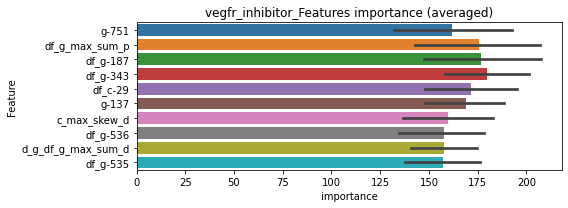

len(train_index) : 3827
len(valid_index) : 1276
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0475365	valid_1's binary_logloss: 0.0524817
[2000]	training's binary_logloss: 0.0266441	valid_1's binary_logloss: 0.0338593
[3000]	training's binary_logloss: 0.018378	valid_1's binary_logloss: 0.0274498
[4000]	training's binary_logloss: 0.0138334	valid_1's binary_logloss: 0.023895
[5000]	training's binary_logloss: 0.0110593	valid_1's binary_logloss: 0.0218029
[6000]	training's binary_logloss: 0.00918518	valid_1's binary_logloss: 0.0202269
[7000]	training's binary_logloss: 0.00784828	valid_1's binary_logloss: 0.0191366
[8000]	training's binary_logloss: 0.00686132	valid_1's binary_logloss: 0.0182922
[9000]	training's binary_logloss: 0.00609335	valid_1's binary_logloss: 0.01763
Early stopping, best iteration is:
[9305]	training's binary_logloss: 0.00588939	valid_1's binary_logloss: 0.0174387


len(train_index) : 3827
len(valid_index) : 1276
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0454455	valid_1's binary_logloss: 0.0598499
[2000]	training's binary_logloss: 0.0252437	valid_1's binary_logloss: 0.0422781
[3000]	training's binary_logloss: 0.0174068	valid_1's binary_logloss: 0.0363176
[4000]	training's binary_logloss: 0.0131304	valid_1's binary_logloss: 0.0332574
[5000]	training's binary_logloss: 0.010497	valid_1's binary_logloss: 0.031569
[6000]	training's binary_logloss: 0.00872952	valid_1's binary_logloss: 0.0302261
Early stopping, best iteration is:
[6924]	training's binary_logloss: 0.00755131	valid_1's binary_logloss: 0.029359


len(train_index) : 3827
len(valid_index) : 1276
================================= fold 3/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0440623	valid_1's binary_logloss: 0.0692883
[2000]	training's binary_logloss: 0.0244892	valid_1's binary_logloss: 0.0526891
[3000]	training's binary_logloss: 0.0167905	valid_1's binary_logloss: 0.0470361
Early stopping, best iteration is:
[3542]	training's binary_logloss: 0.0142697	valid_1's binary_logloss: 0.0451707


len(train_index) : 3828
len(valid_index) : 1275
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0444225	valid_1's binary_logloss: 0.0653936
[2000]	training's binary_logloss: 0.024499	valid_1's binary_logloss: 0.0480278
[3000]	training's binary_logloss: 0.0168911	valid_1's binary_logloss: 0.0421817
[4000]	training's binary_logloss: 0.0127222	valid_1's binary_logloss: 0.0391769
Early stopping, best iteration is:
[4282]	training's binary_logloss: 0.0118806	valid_1's binary_logloss: 0.0386166


vegfr_inhibitor logloss: 0.03264508142072736
vegfr_inhibitor is unpredictable(><)!
vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000370475	valid_1's binary_logloss: 0.00235469
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000361799	valid_1's binary_logloss: 0.00259905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000374568	valid_1's binary_logloss: 0.00162773
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023522, Threshold: 0.0083625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0083625, conf_0:0.00585, conf_1:0.01087
Num_p_label: 7.0, Expected: 4.3, Adj_threshold_1: 0.0383625


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000393633	valid_1's binary_logloss: 0.00655536


threshold: 0.0383625, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357089	valid_1's binary_logloss: 0.00223856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000348083	valid_1's binary_logloss: 0.00203093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00161179
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000370804	valid_1's binary_logloss: 0.00617657


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372915, Threshold: 0.0383625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0075339 Vs.target_rate: 0.00109
Num_p_label: 30.0, Expected: 4.3, Threshold: 0.0383625, conf_0:0.03069, conf_1:0.04603
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_1: 0.0683625
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_2: 0.0983625
threshold: 0.0983625, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357089	valid_1's binary_logloss: 0.00223856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000348083	valid_1's binary_logloss: 0.00203093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00161179
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372915, Threshold: 0.0983625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.0983625, conf_0:0.08853, conf_1:0.10820


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000370804	valid_1's binary_logloss: 0.00617657


threshold: 0.0983625, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


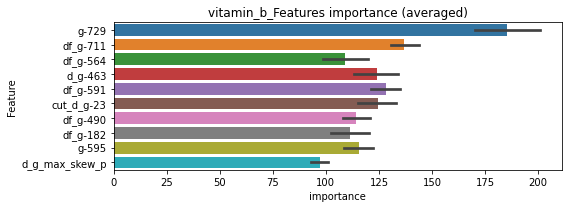

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000366167	valid_1's binary_logloss: 0.00170483


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000358442	valid_1's binary_logloss: 0.00168274


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000369431	valid_1's binary_logloss: 0.00144623


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000387473	valid_1's binary_logloss: 0.00490468


vitamin_b logloss: 0.0024341085613936407
vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3286
target_rate: 0.0016377 → Adj_target_rate: 0.0018906


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000475473	valid_1's binary_logloss: 0.00762279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00044715	valid_1's binary_logloss: 0.00681044
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.00044981	valid_1's binary_logloss: 0.00471942
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000455607	valid_1's binary_logloss: 0.00636758


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030247, Threshold: 0.0141003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, Expected: 6.5, Threshold: 0.0141003, conf_0:0.00987, conf_1:0.01833
Num_p_label: 12.0, Expected: 6.5, Adj_threshold_1: 0.0441003
threshold: 0.0441003, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000465072	valid_1's binary_logloss: 0.0080092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000438165	valid_1's binary_logloss: 0.00705609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000450427	valid_1's binary_logloss: 0.00519398
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000433087	valid_1's binary_logloss: 0.00737403


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0202189, Threshold: 0.0441003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0087896 Vs.target_rate: 0.00164
Num_p_label: 35.0, Expected: 6.5, Threshold: 0.0441003, conf_0:0.03528, conf_1:0.05292
Num_p_label: 21.0, Expected: 6.5, Adj_threshold_1: 0.0741003
Num_p_label: 14.0, Expected: 6.5, Adj_threshold_2: 0.1041003
threshold: 0.1041003, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000434307	valid_1's binary_logloss: 0.0113504
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000428897	valid_1's binary_logloss: 0.00525585
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000440312	valid_1's binary_logloss: 0.00122139
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000469261	valid_1's binary_logloss: 0.00799921


y_Threshold: 0.0249868, Threshold: 0.1041003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0035158 Vs.target_rate: 0.00164
Num_p_label: 14.0, Expected: 6.5, Threshold: 0.1041003, conf_0:0.09369, conf_1:0.11451
threshold: 0.1041003, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


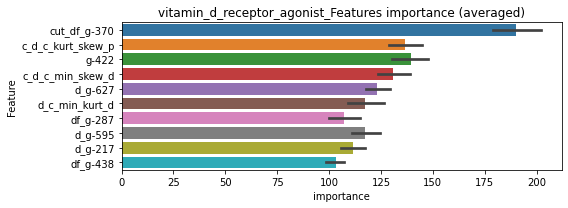

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000660445	valid_1's binary_logloss: 0.0114816
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.00044065	valid_1's binary_logloss: 0.00450584


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000444788	valid_1's binary_logloss: 0.00126422


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000445406	valid_1's binary_logloss: 0.00753937


vitamin_d_receptor_agonist logloss: 0.006199144804940976
wnt_inhibitor, len(trt): 30, len(othr): 3283
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3283


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000370373	valid_1's binary_logloss: 0.0022413
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000385505	valid_1's binary_logloss: 0.00418155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000379693	valid_1's binary_logloss: 0.00206049
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000365238	valid_1's binary_logloss: 0.00501873


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025372, Threshold: 0.0112124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0112124, conf_0:0.00785, conf_1:0.01458
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.0412124
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0712124
threshold: 0.0712124, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000354189	valid_1's binary_logloss: 0.00190113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00036553	valid_1's binary_logloss: 0.00267595
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000434545	valid_1's binary_logloss: 0.00195518
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0822038, Threshold: 0.0712124, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000357946	valid_1's binary_logloss: 0.00332253


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0052737 Vs.target_rate: 0.00126
Num_p_label: 21.0, Expected: 5.0, Threshold: 0.0712124, conf_0:0.05697, conf_1:0.08545
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_1: 0.1012124
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.1312124
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_3: 0.1612124
threshold: 0.1612124, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000354189	valid_1's binary_logloss: 0.00190113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00036553	valid_1's binary_logloss: 0.00267595
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000434545	valid_1's binary_logloss: 0.00195518
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000357946	valid_1's binary_logloss: 0.00332253


y_Threshold: 0.0822038, Threshold: 0.1612124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.1612124, conf_0:0.14509, conf_1:0.17733
threshold: 0.1612124, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


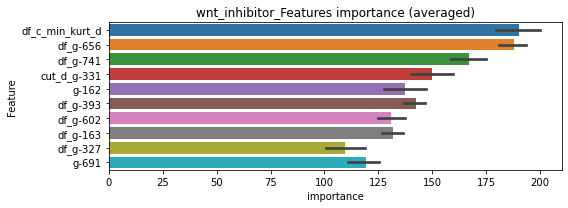

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000361571	valid_1's binary_logloss: 0.00176449
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000361596	valid_1's binary_logloss: 0.00176448


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000371054	valid_1's binary_logloss: 0.00269226


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000428035	valid_1's binary_logloss: 0.00348187


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000368035	valid_1's binary_logloss: 0.00289423


wnt_inhibitor logloss: 0.0027081632603524444


CV:0.014248215956156392


In [53]:
unpredictable = RUN()

In [54]:
unpredictable

['acetylcholinesterase_inhibitor',
 'adenosine_receptor_antagonist',
 'androgen_receptor_antagonist',
 'anesthetic_-_local',
 'anti-inflammatory',
 'antioxidant',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_50s_ribosomal_subunit_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'bromodomain_inhibitor',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dopamine_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_agonist',
 'hcv_inhibitor',
 'hdac_inhibitor',
 'hiv_inhibitor',
 'hmgcr_inhibitor',
 'hsp_inhibitor',
 'immunosuppressant',
 'jak_inhibitor',
 'kit_inhibitor',
 'membrane_integrity_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'opioid_receptor_agonist',
 'pdgfr_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_antagonist',
 'ppar_receptor_agonist',
 'prostanoid_rece